In [1]:
#Import all functions 

from pygazeanalyser_functions import *

# Examples


### Read Data

In [2]:
"""
Reads Data from the asc file. Make sure the asc file is inside the folder 'Participant Data'

Change phase to switch between fixation, stimulus and reward phases

Example code below



"""


#participant details
partic_id = 'G036'
game_nr  = 4 #game number
phase = 'fixation'


data = read_data(partic_id, game_nr,phase)
#print(data) #Uncomment this line to print

#### Draw Heatmaps

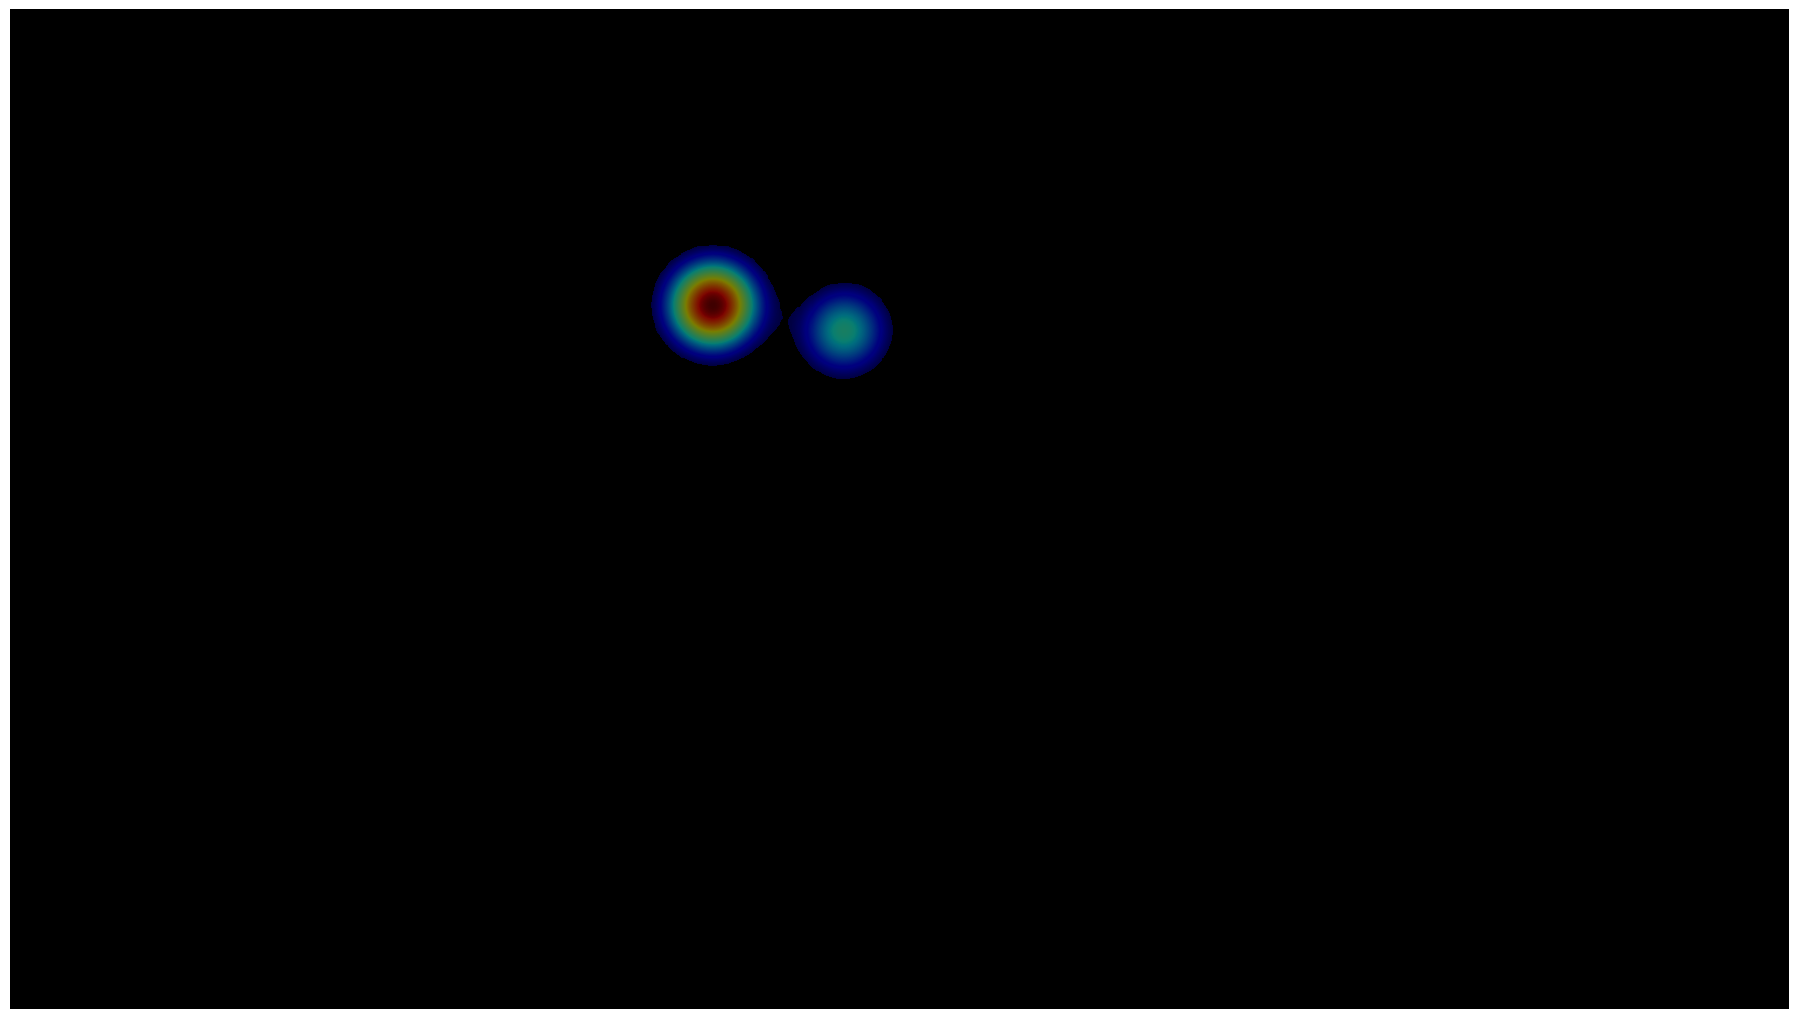

In [3]:
"""
Draws heatmaps, saccading path and saves it in the output_images folder

Required Inputs: data (loaded from the above cell)
                 trial_nr : trial number
                 partic_id, game_nr as per the previous cells

"""
trial_nr =3
draw_heatmap_trial(data,partic_id,game_nr,trial_nr)

### Get Centers and Radii

In [4]:
image_name = 'output_images\G036_game_4_3_20210506-172454_heatmap.png' # name of the image you want to load

centers,radii,image_out =return_centroid_heatmap(image_name)

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


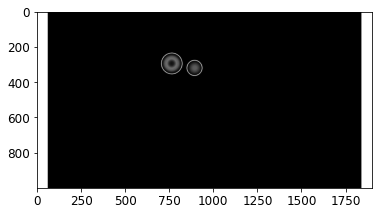

In [5]:
### See the output image to spot the circles
## The while outline is the radii

plt.imshow(image_out,cmap='gray')

In [6]:
radii

[43, 59]

### Velocity vs Noise

In [9]:

#participant details
partic_id = 'G031' #participant id
subject_id = 30   # id in number
phase = 'stimulus' 
dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)


In [10]:
g= np.arange(1,10,1)


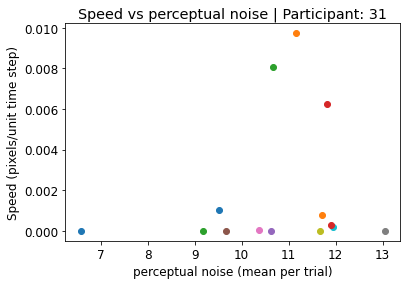

In [11]:
plot_speed_noise(partic_id)

### Inattention vs Noise

In [2]:

#participant details
partic_id = 'G030' #participant id
subject_id = 30   # id in number
phase = 'stimulus' 
dataset_fname = 'dataset_0423.csv' 
data_properties =  load_dataset_properties(dataset_fname)
dispsize = (1919,1079)

C:\Users\localadmin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\localadmin\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
PyGazeAnalyser-master\pygazeanalyser\gazeplotter.py:233: RuntimeWarning: invalid value encountered in less
  heatmap[heatmap<lowbound] = numpy.NaN
C:\Users\localadmin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\localadmin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu San

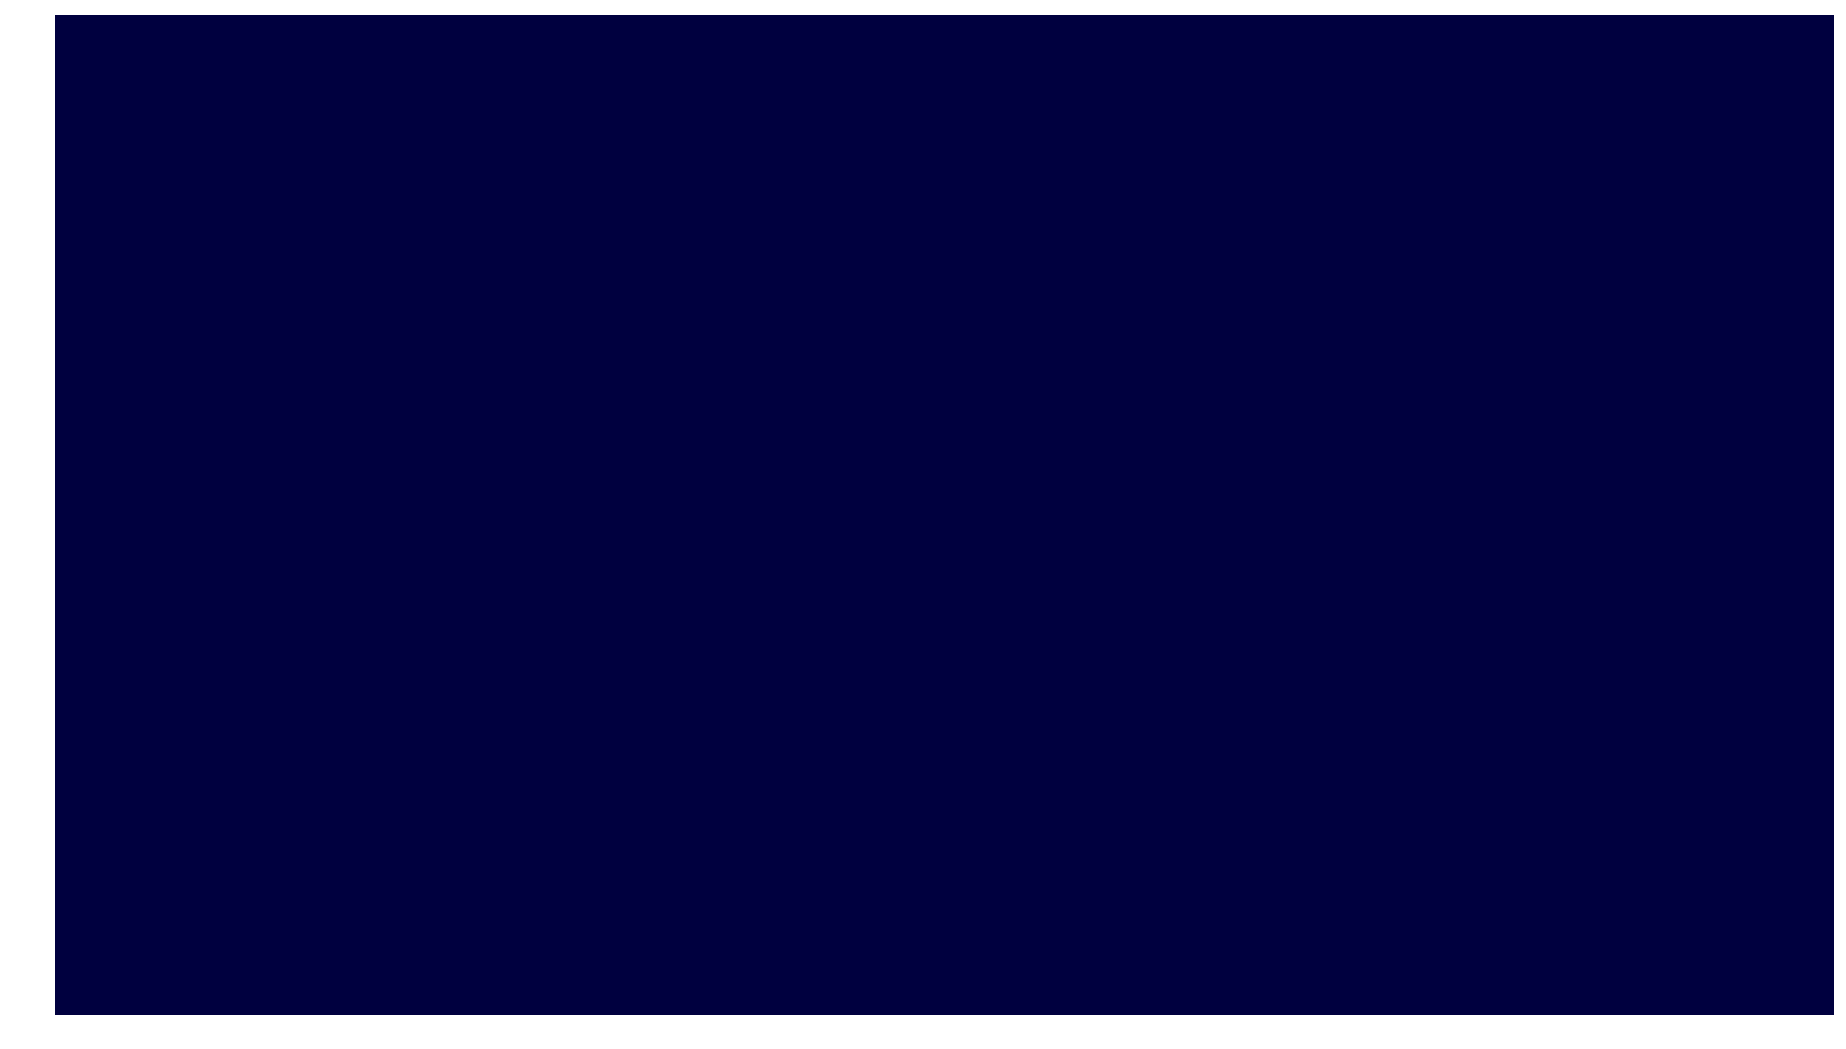

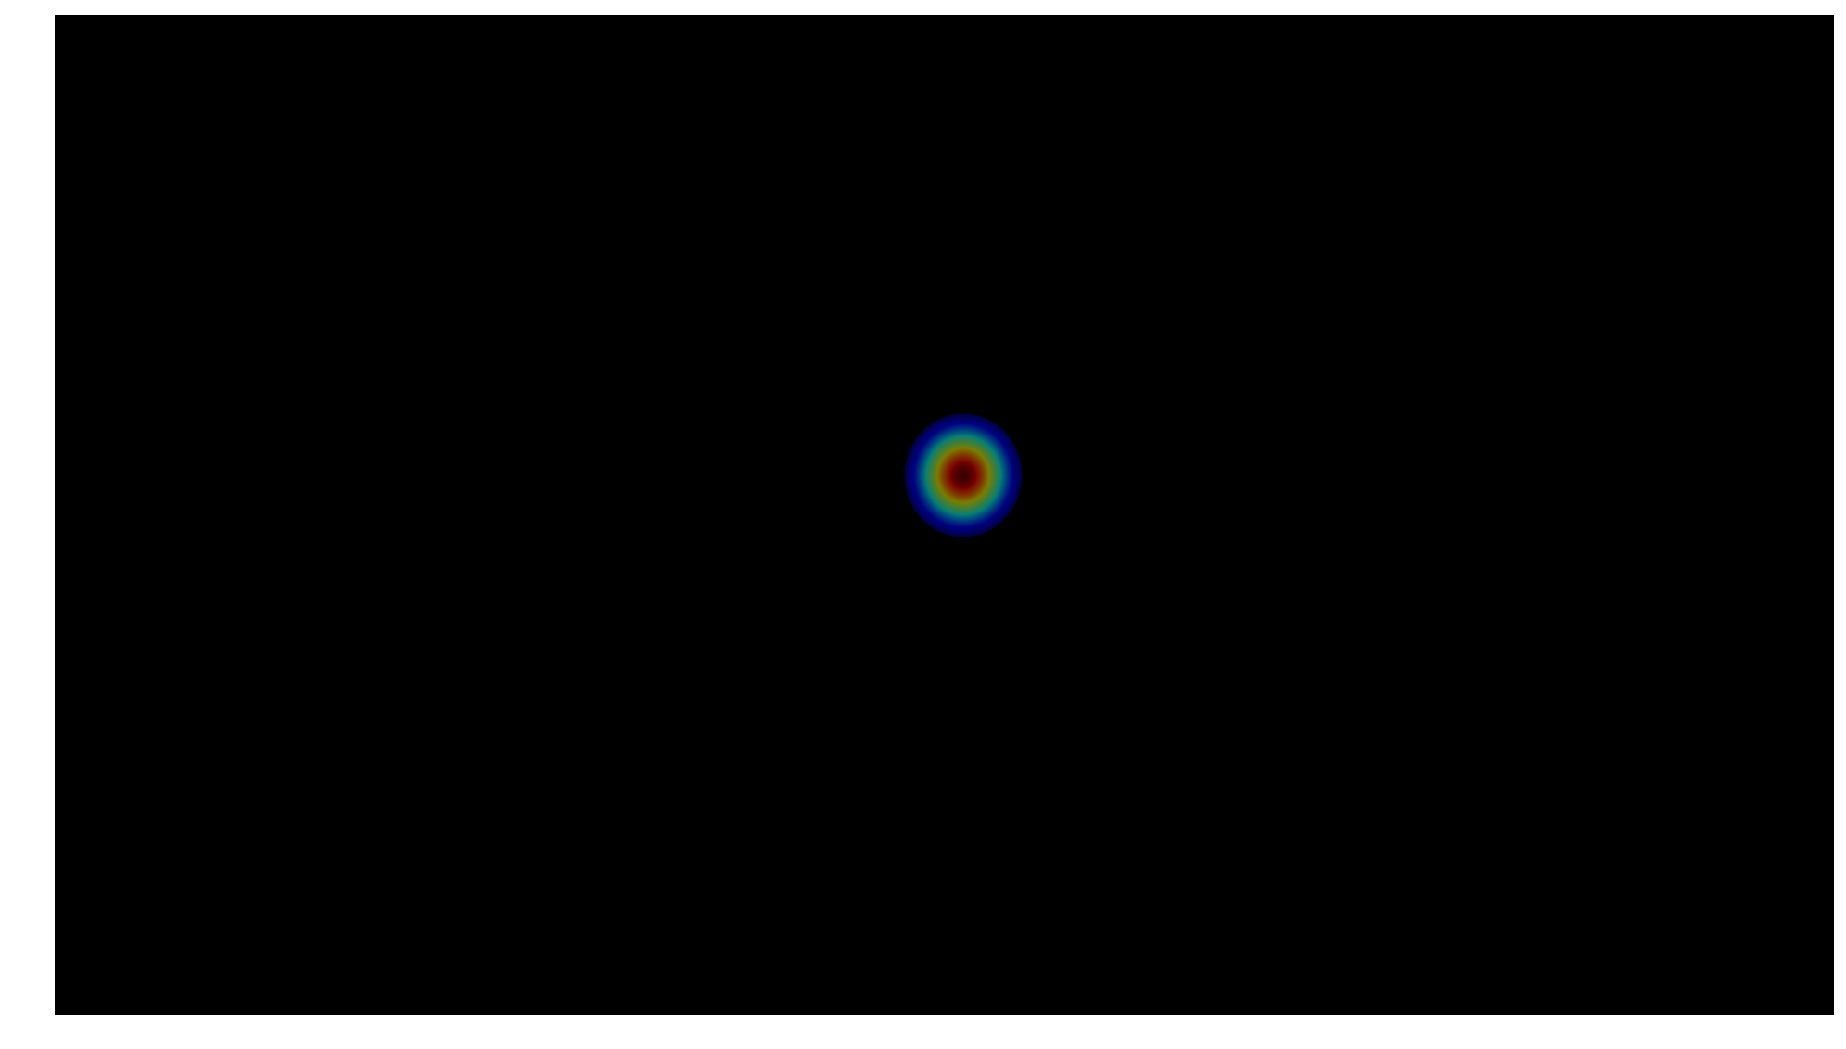

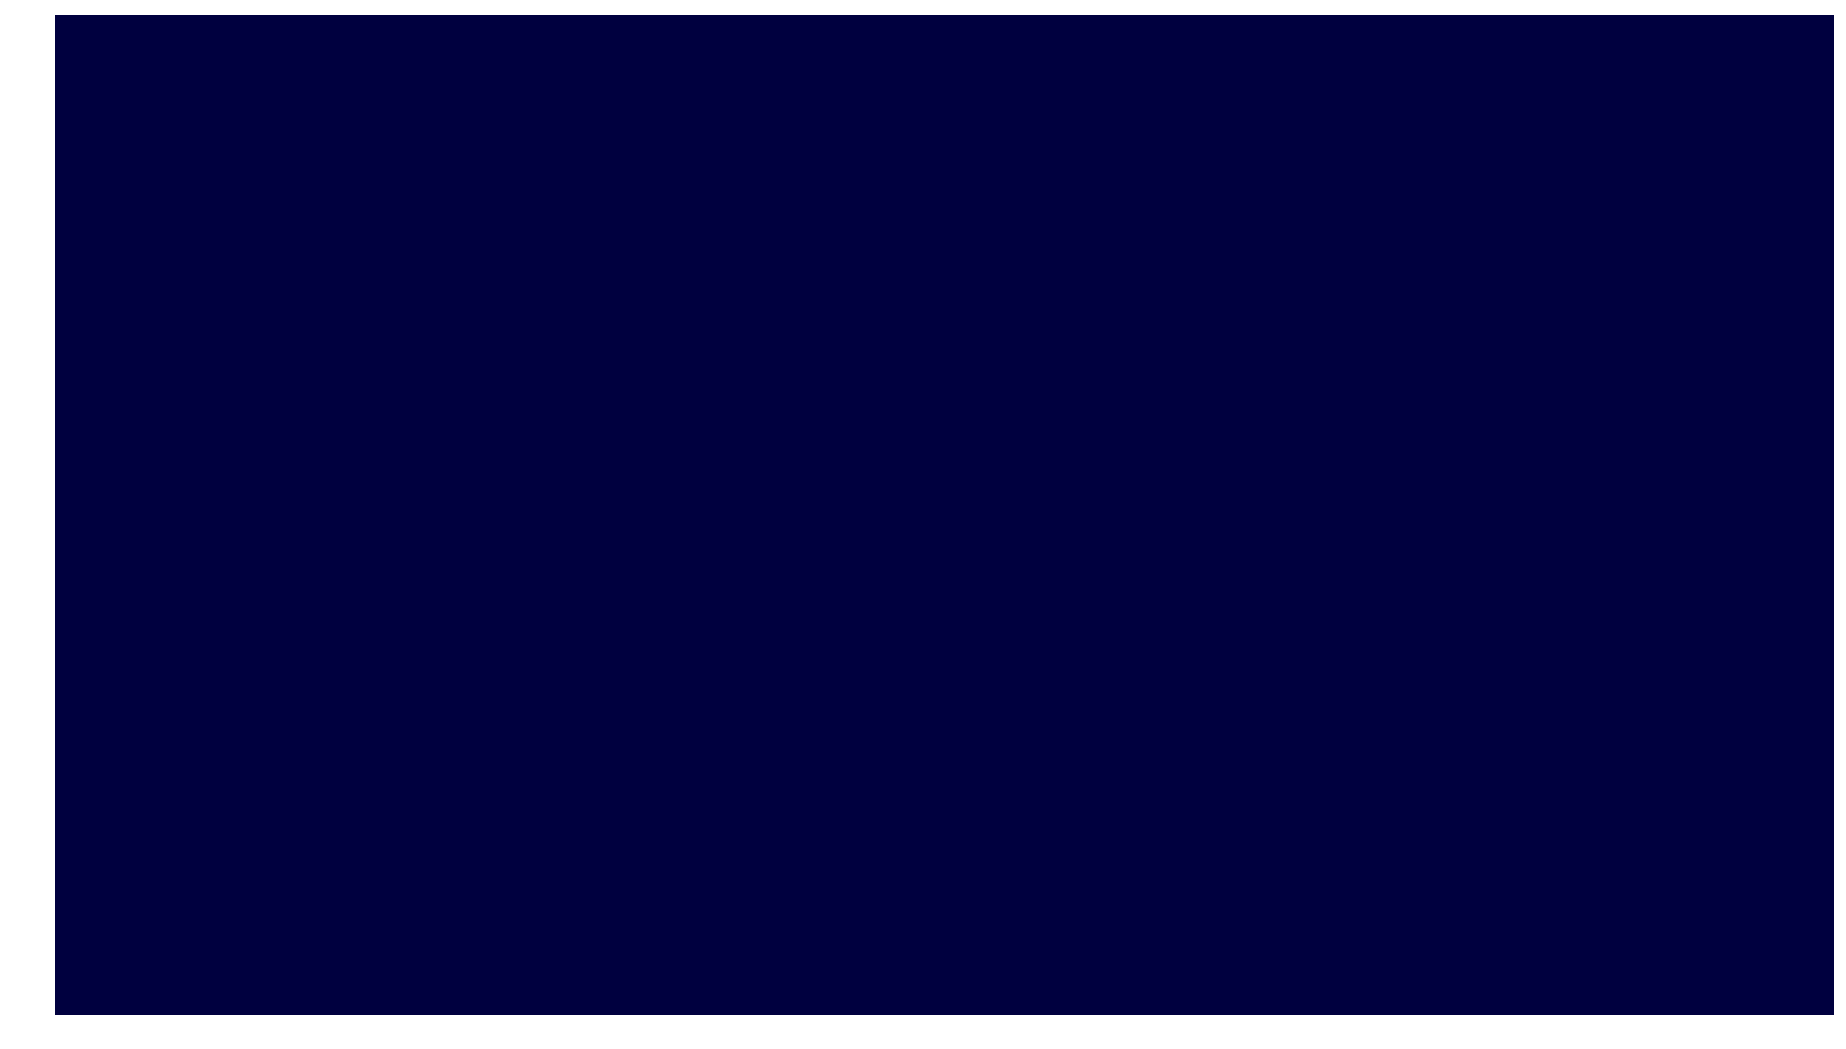

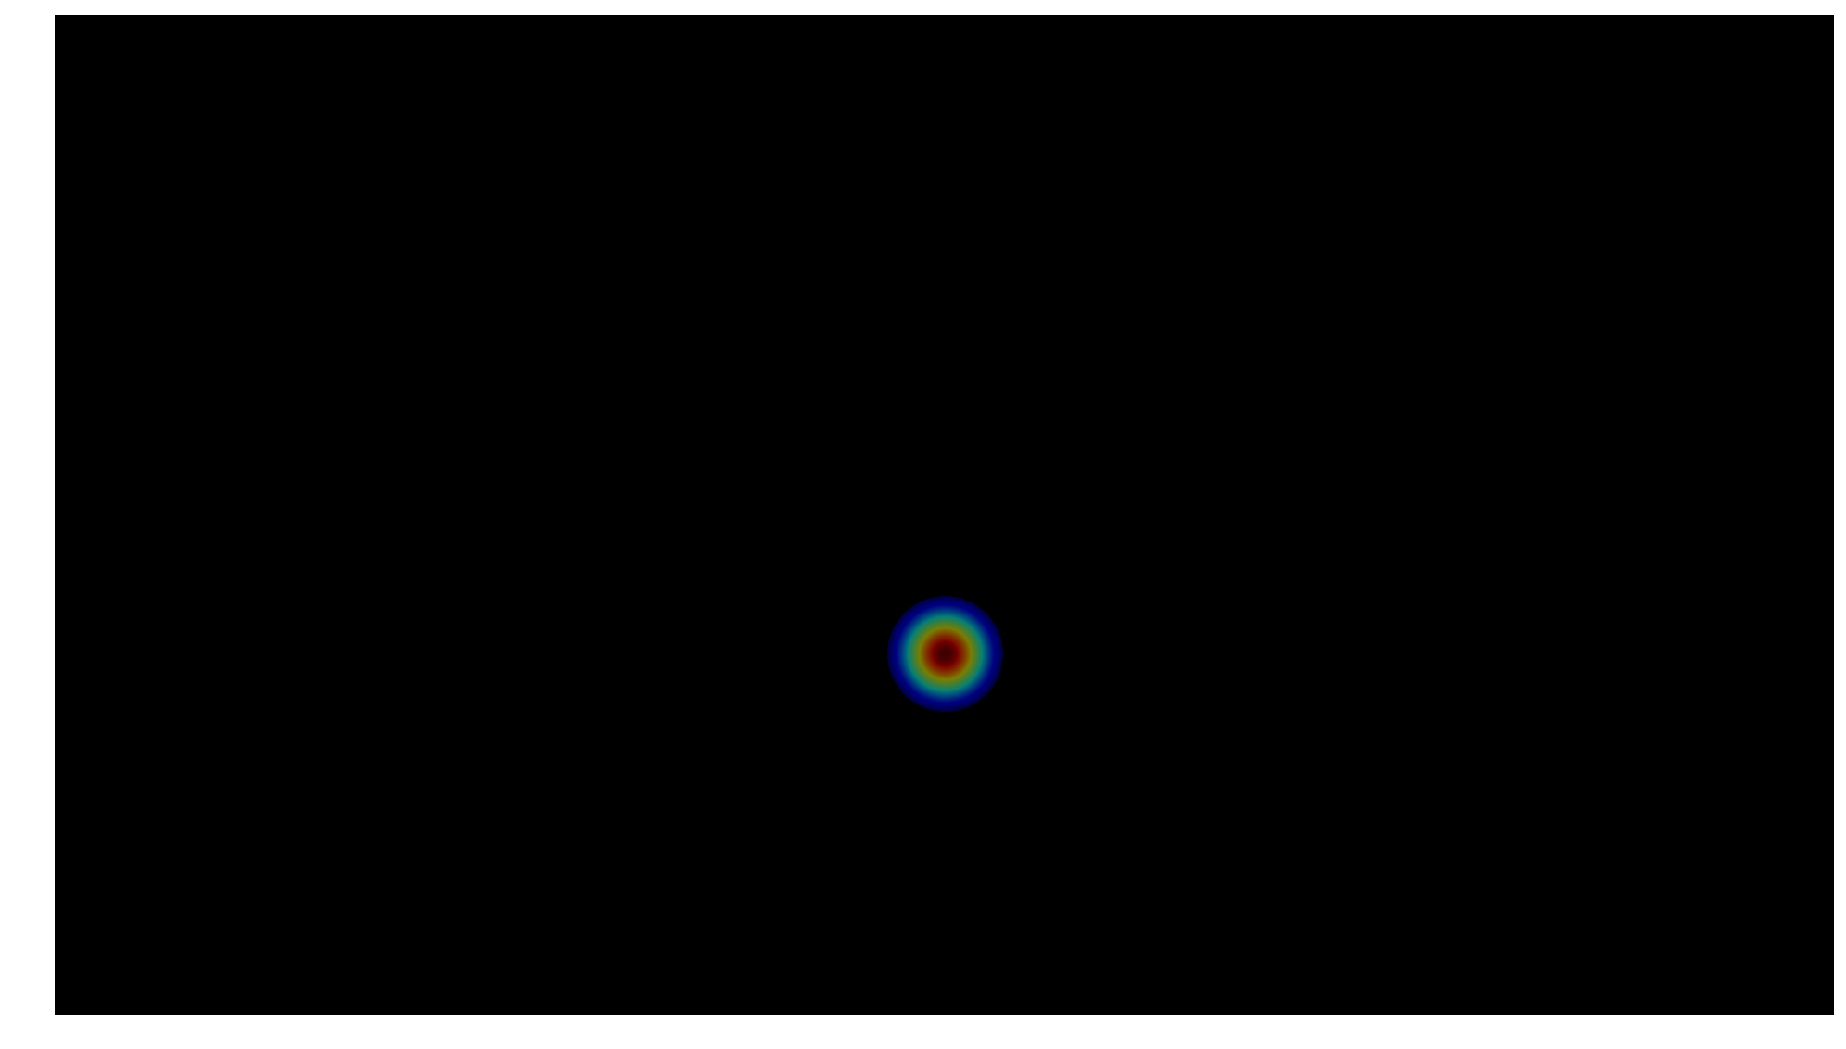

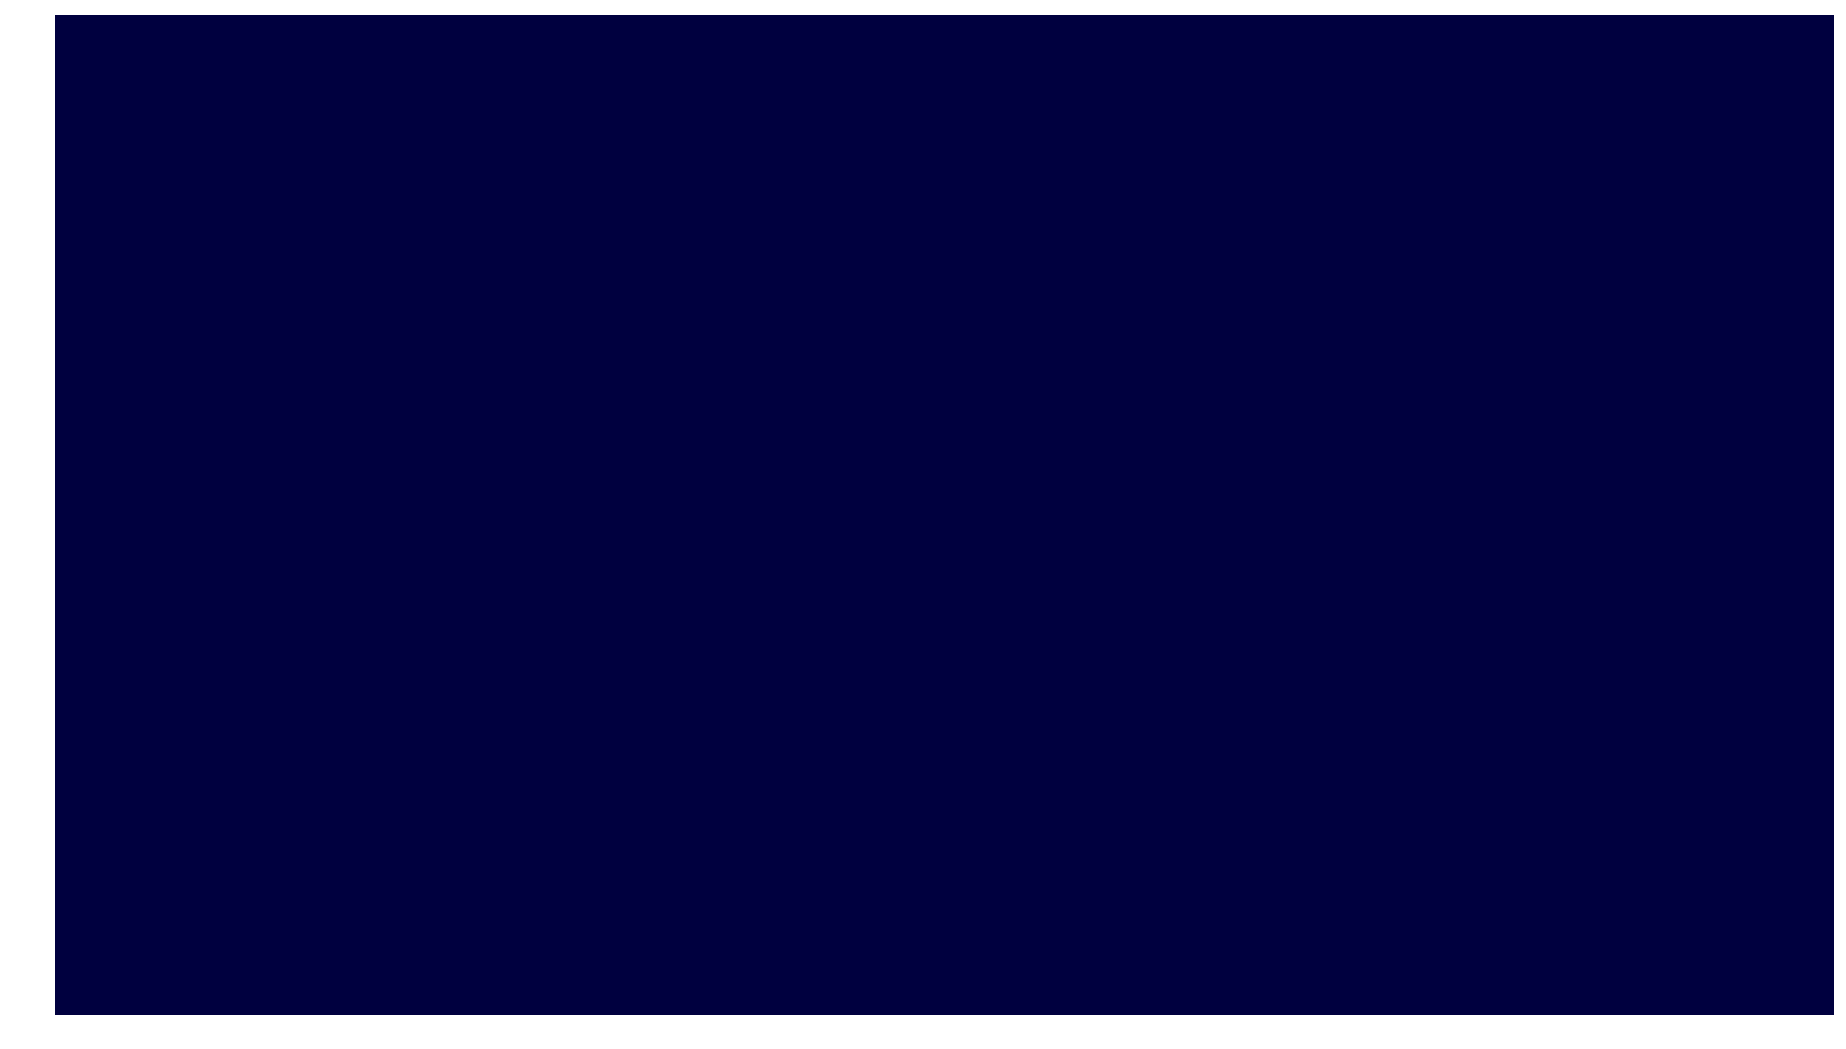

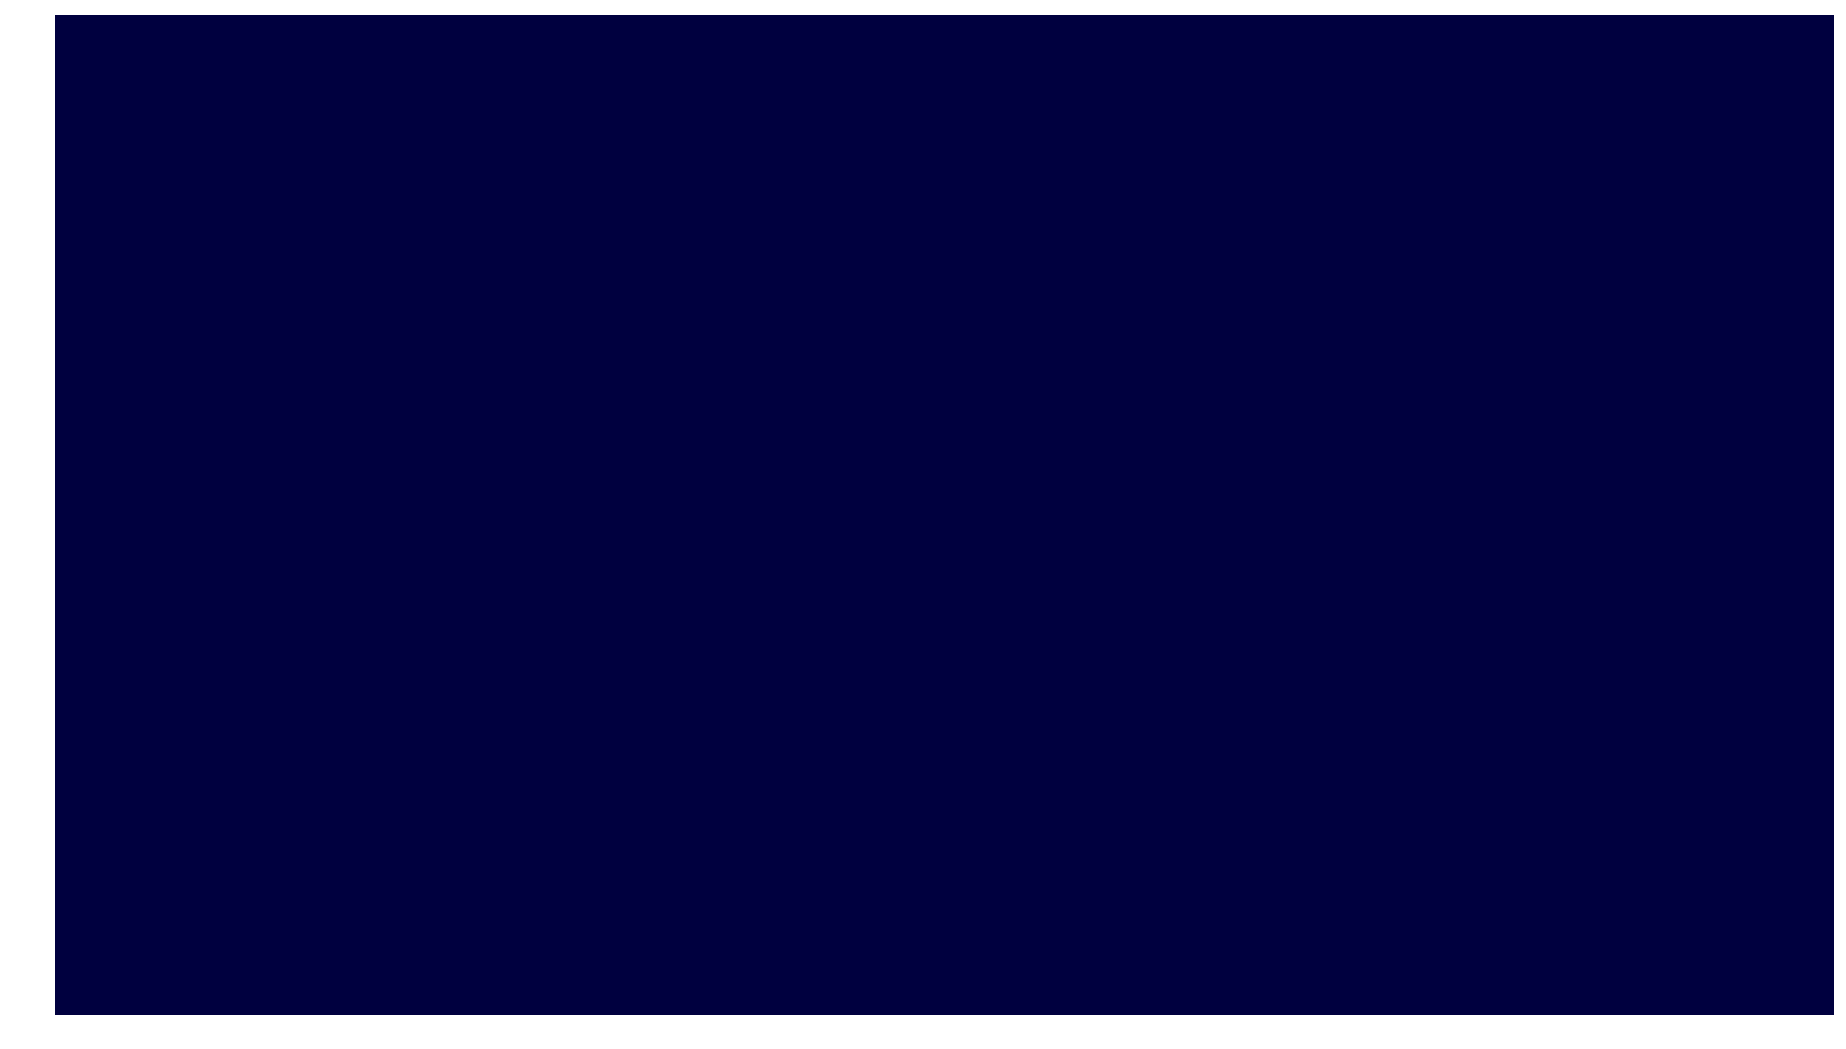

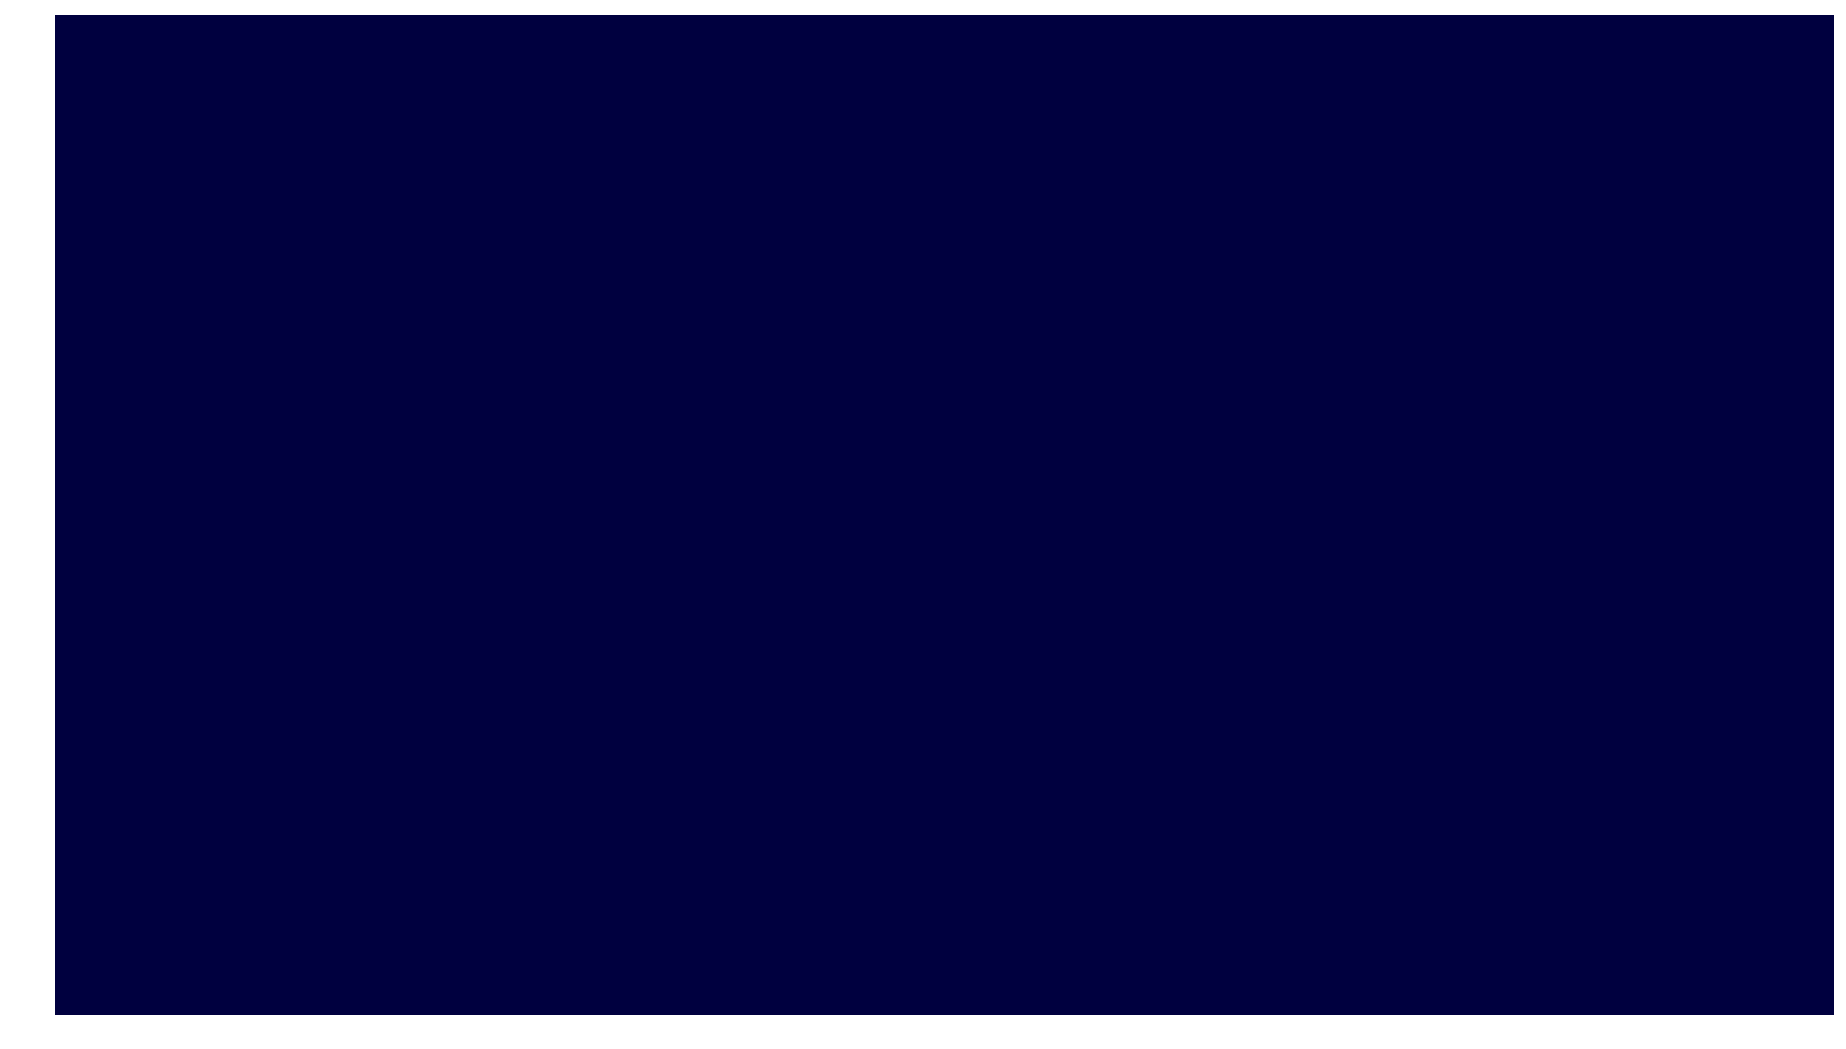

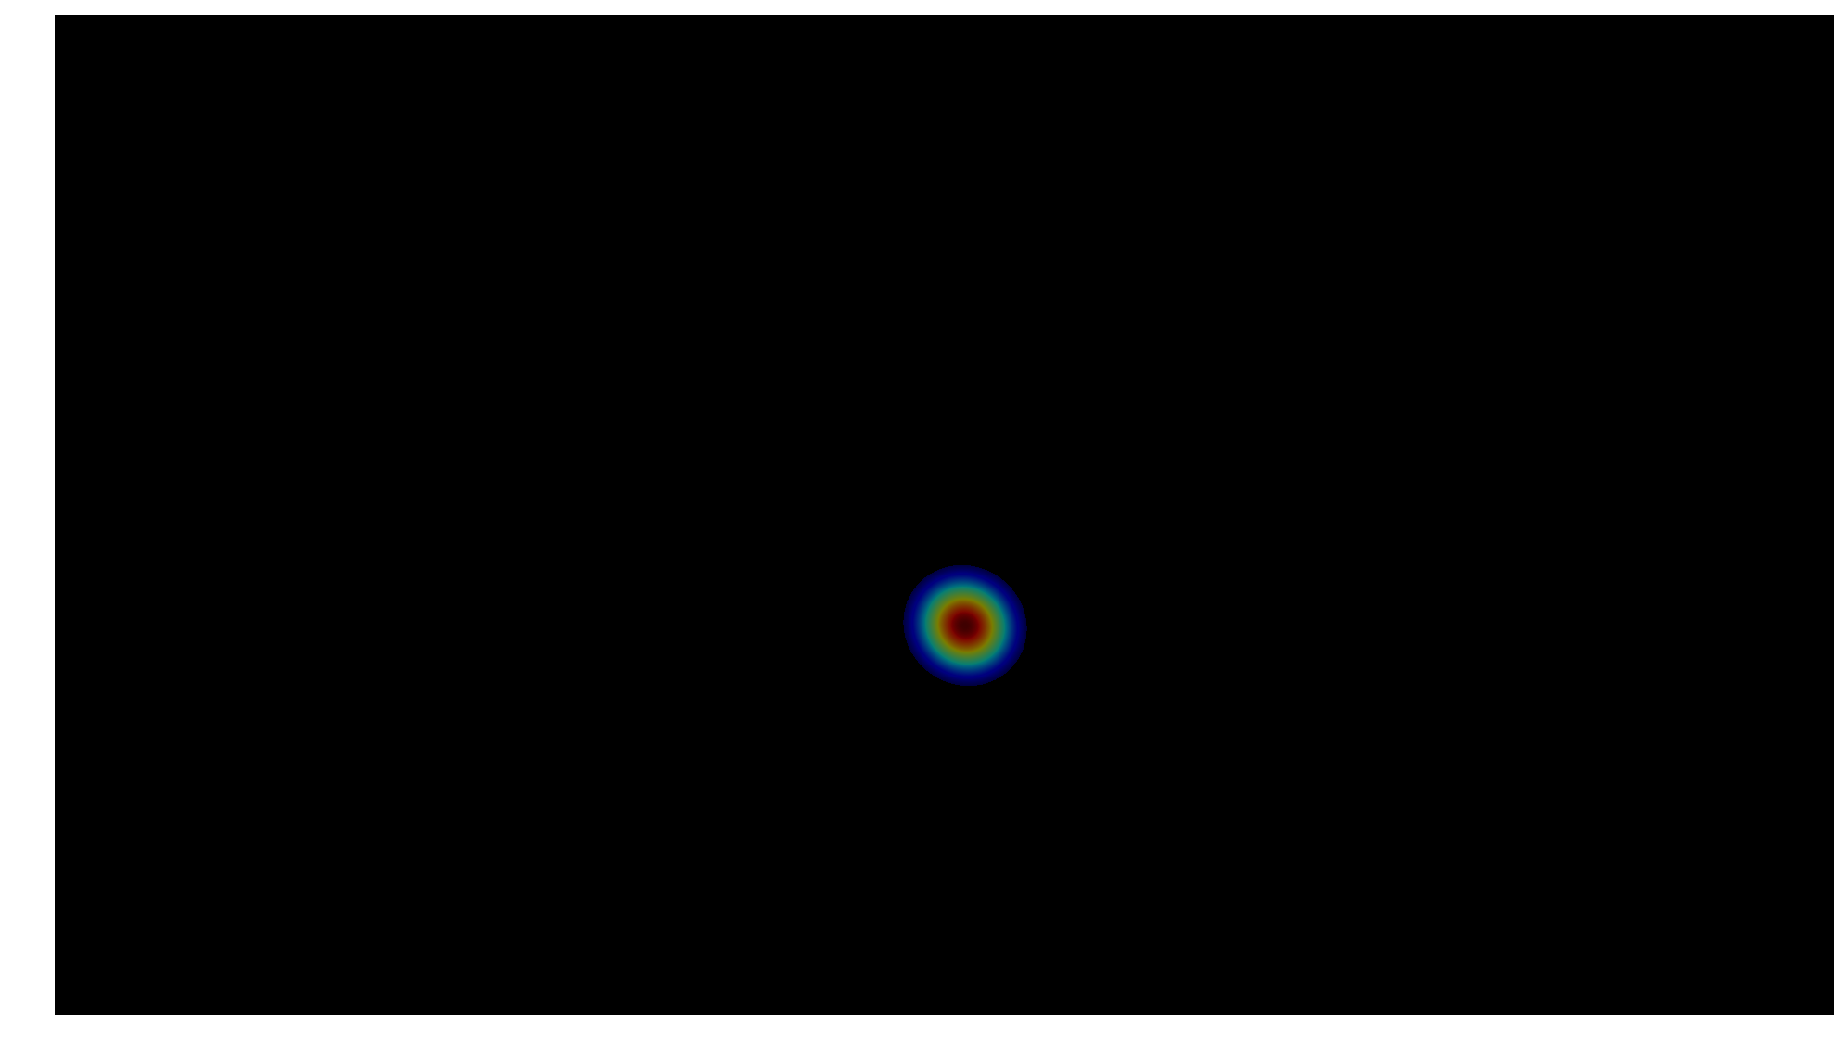

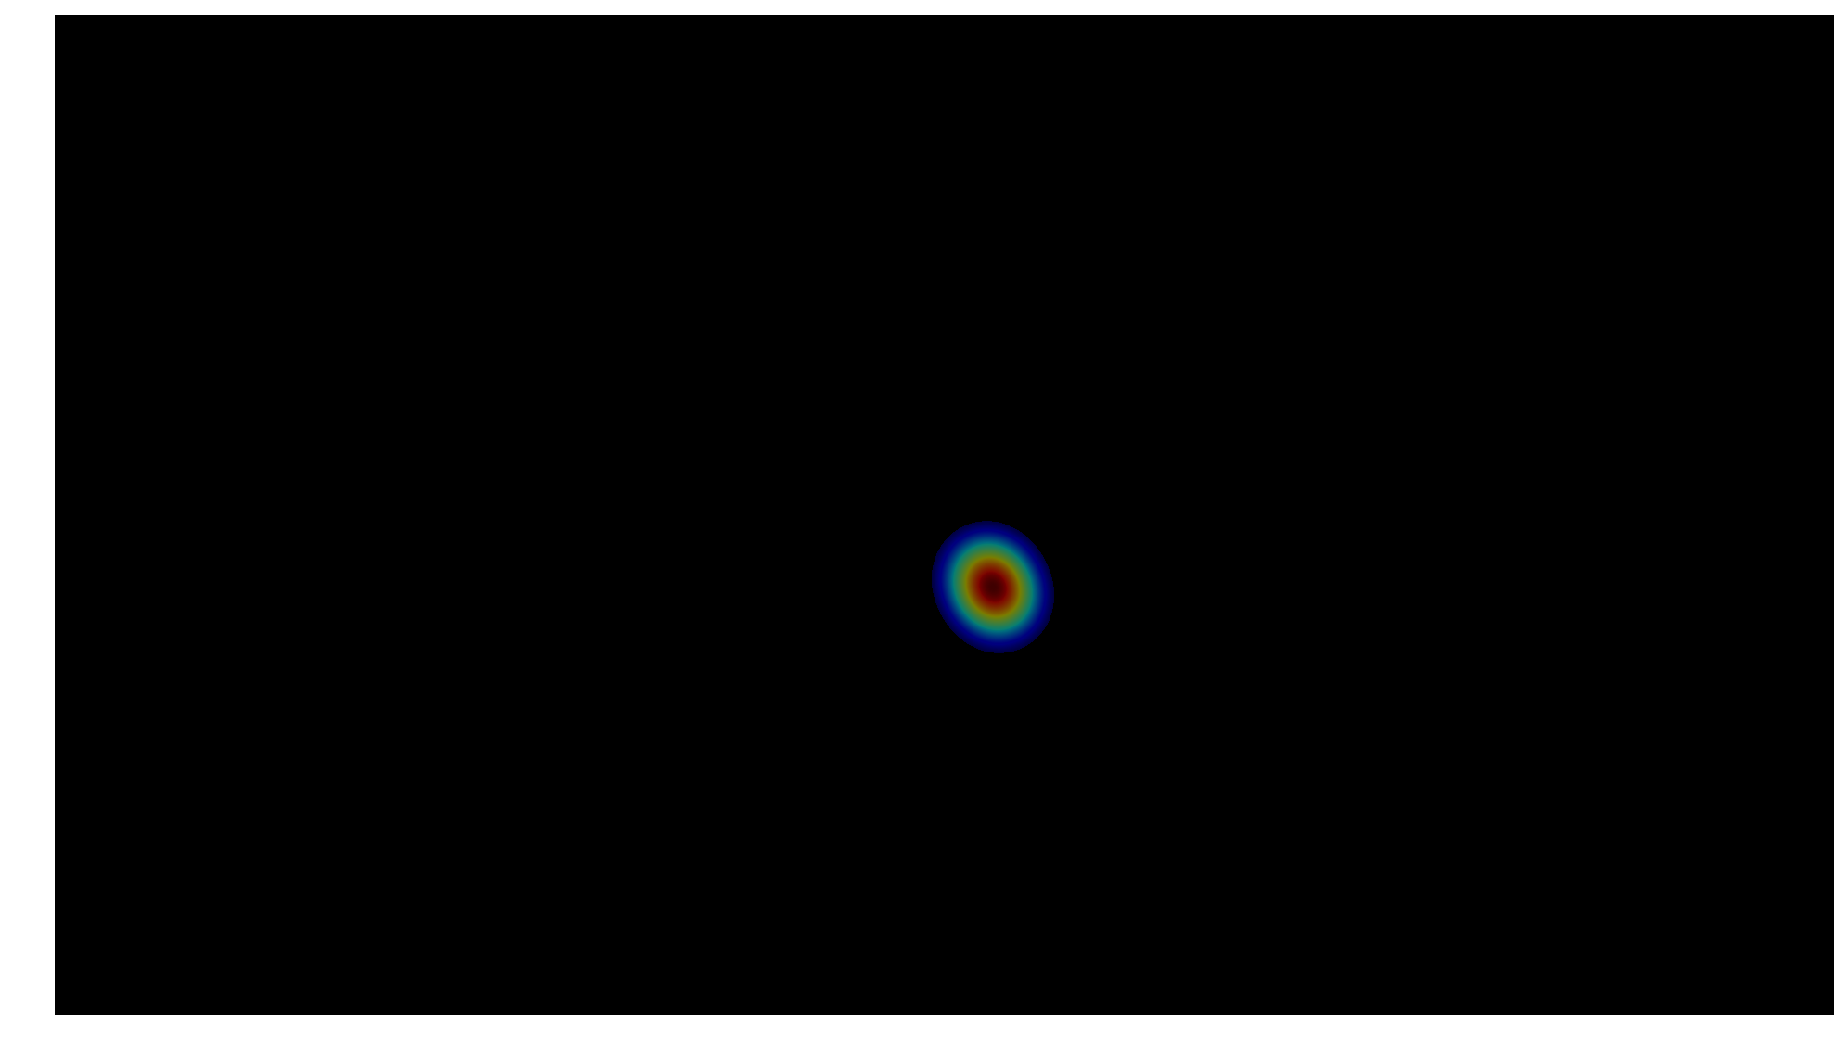

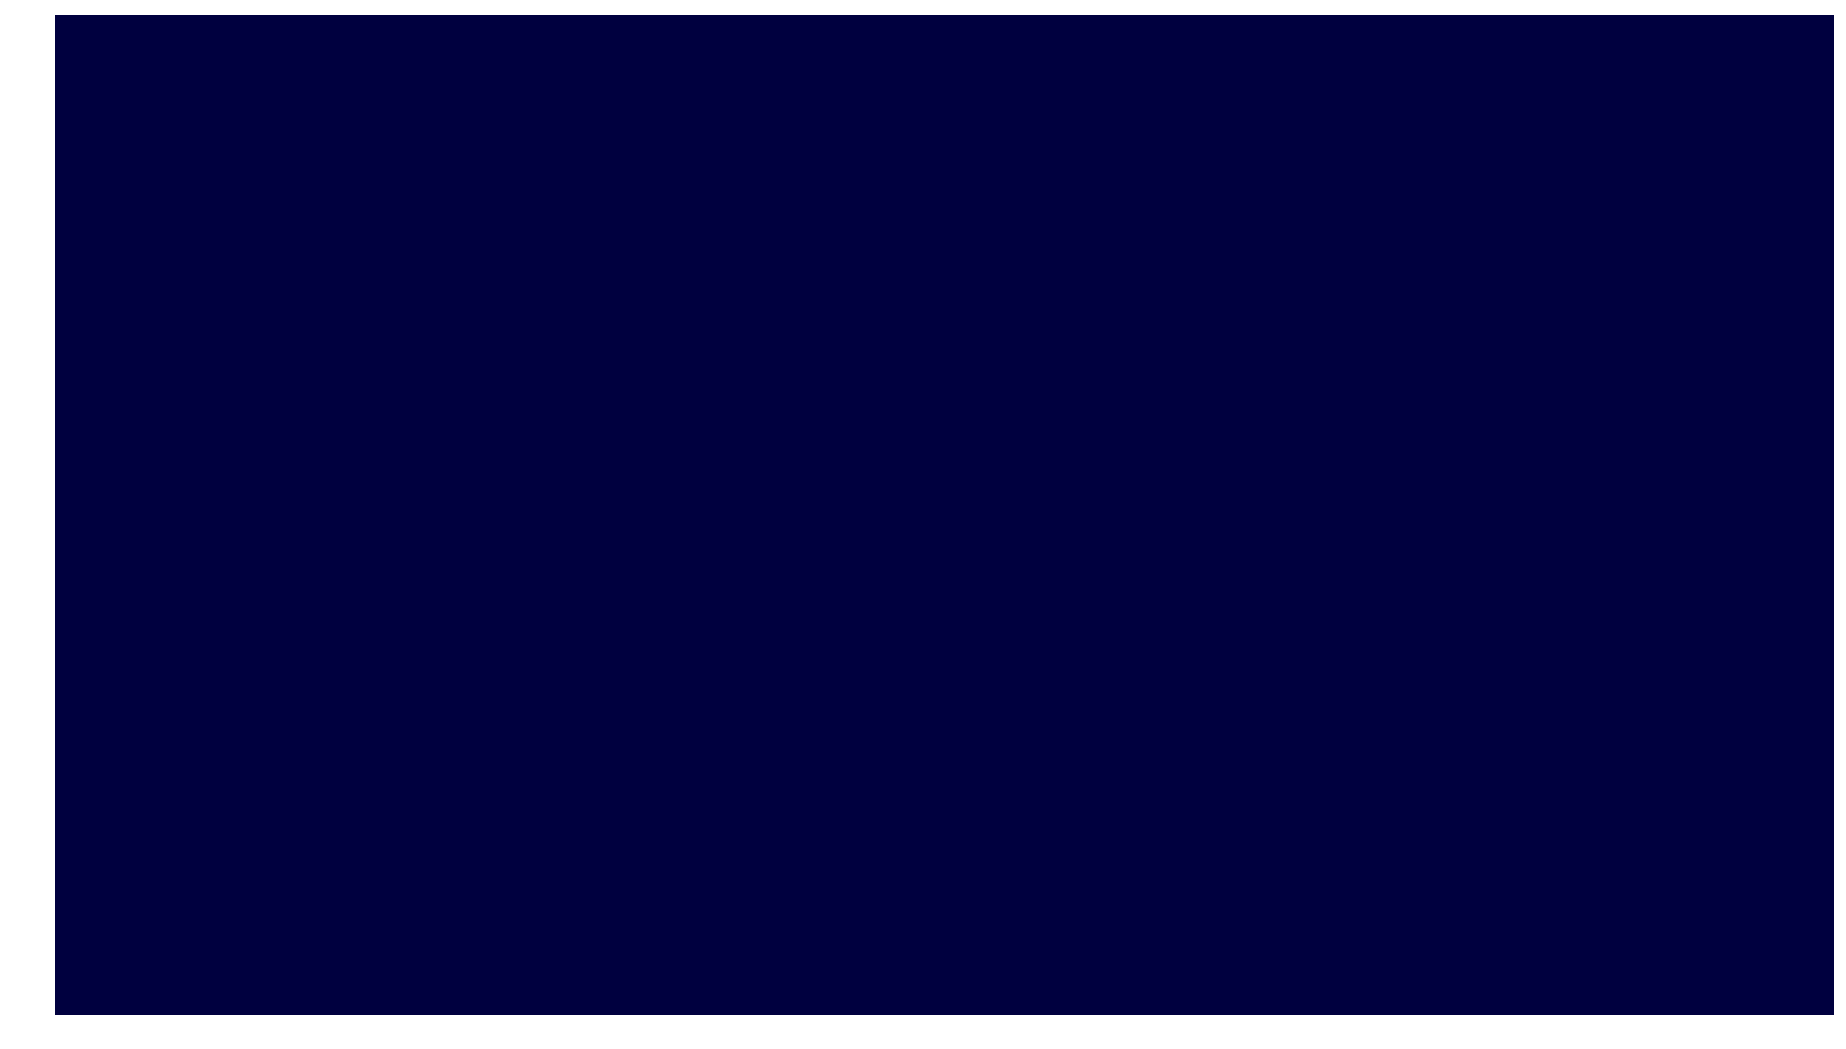

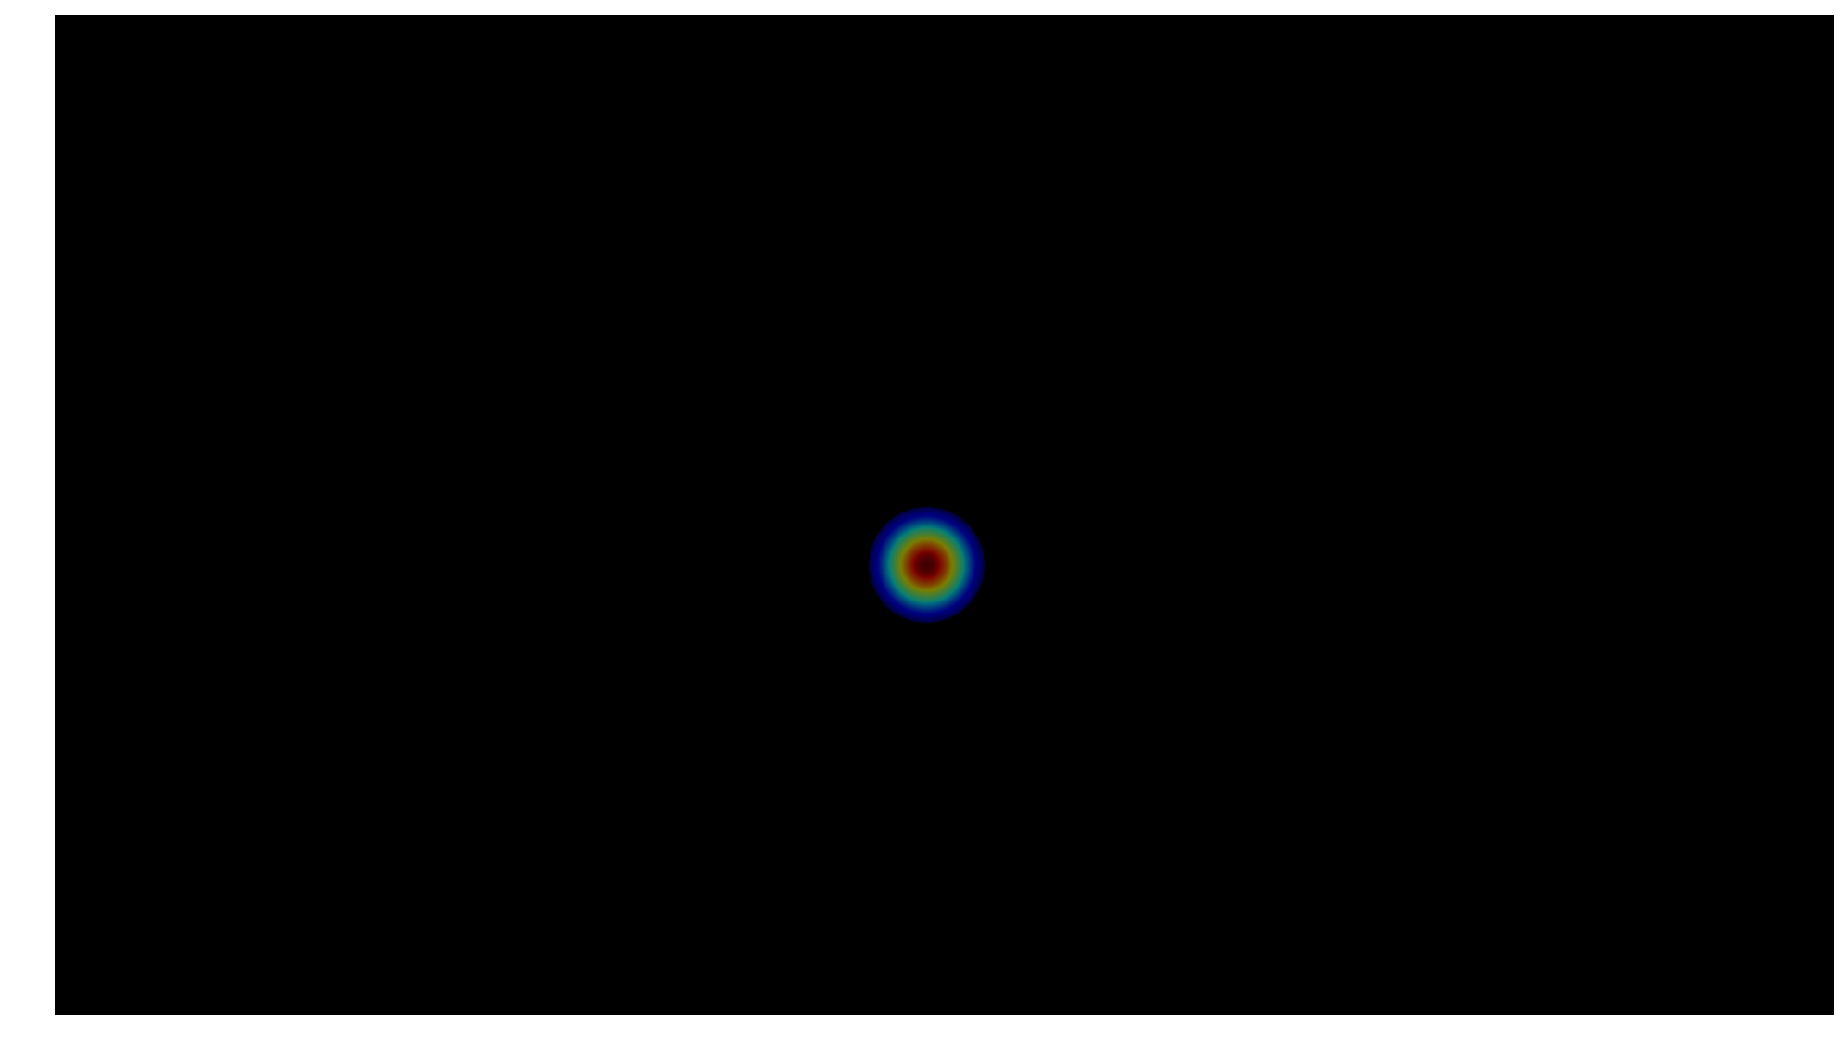

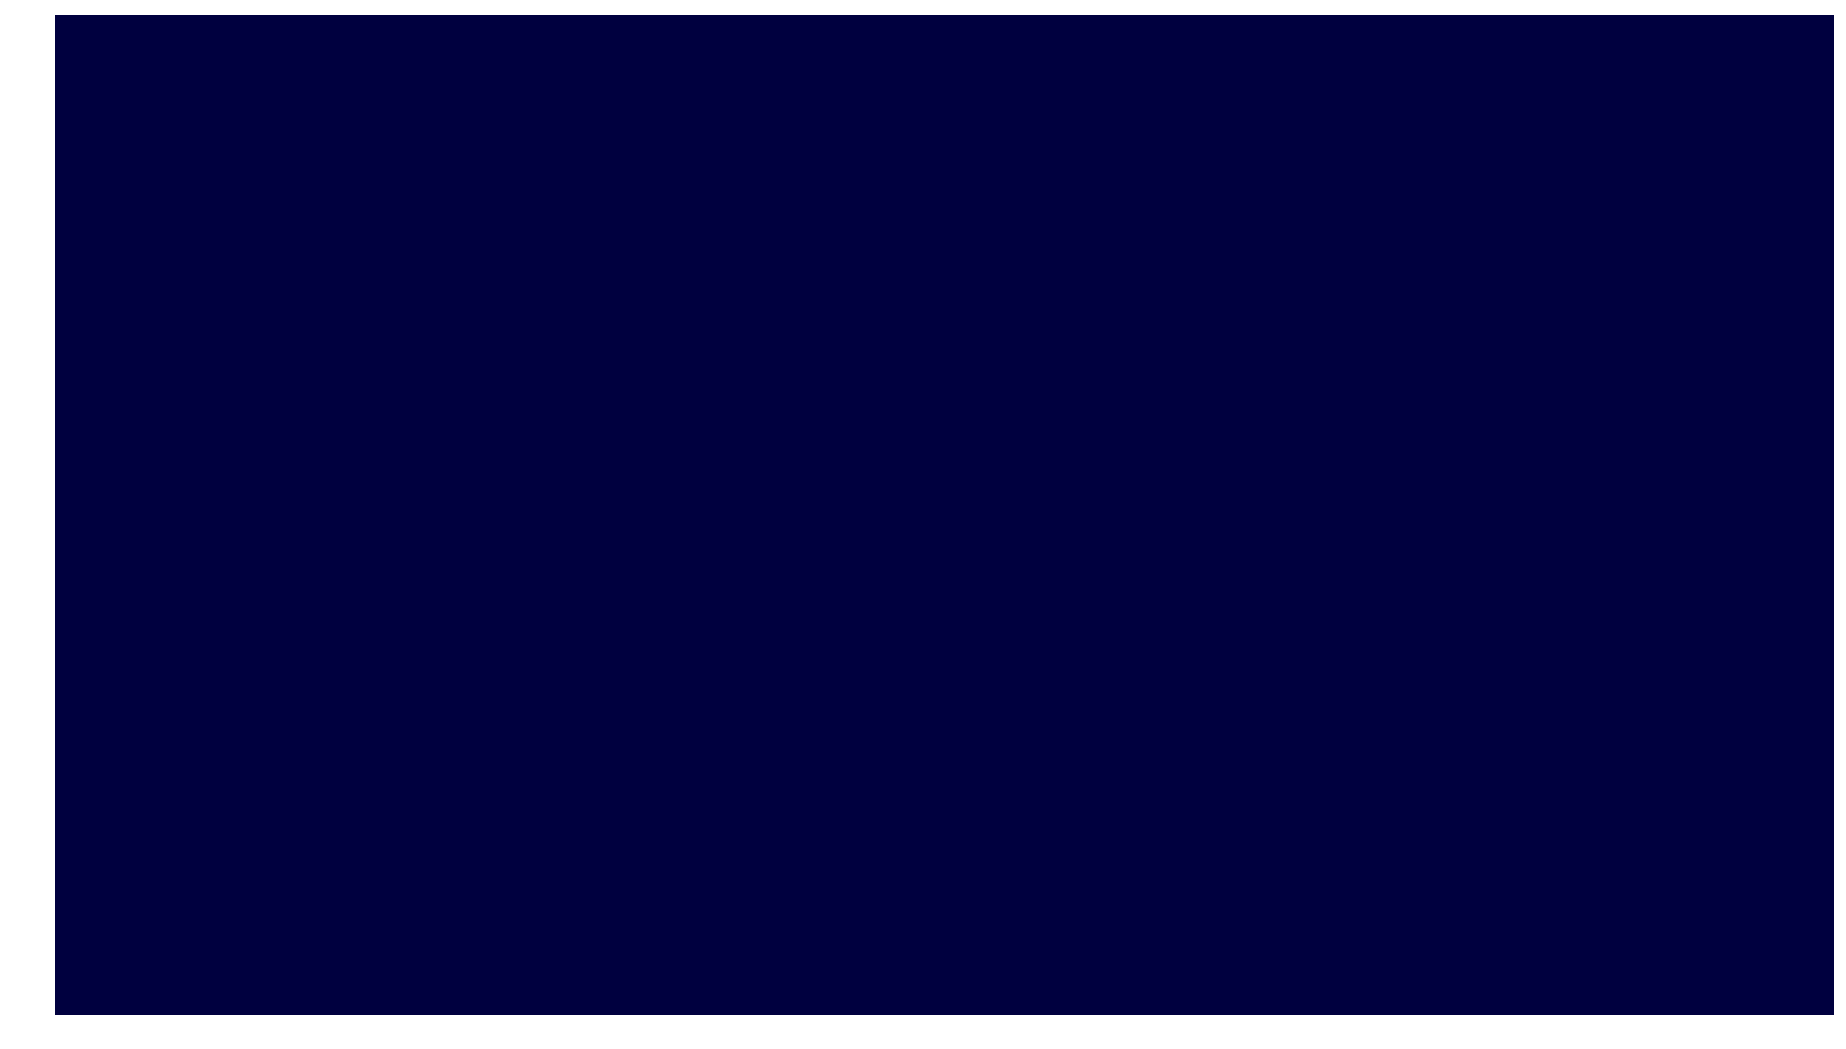

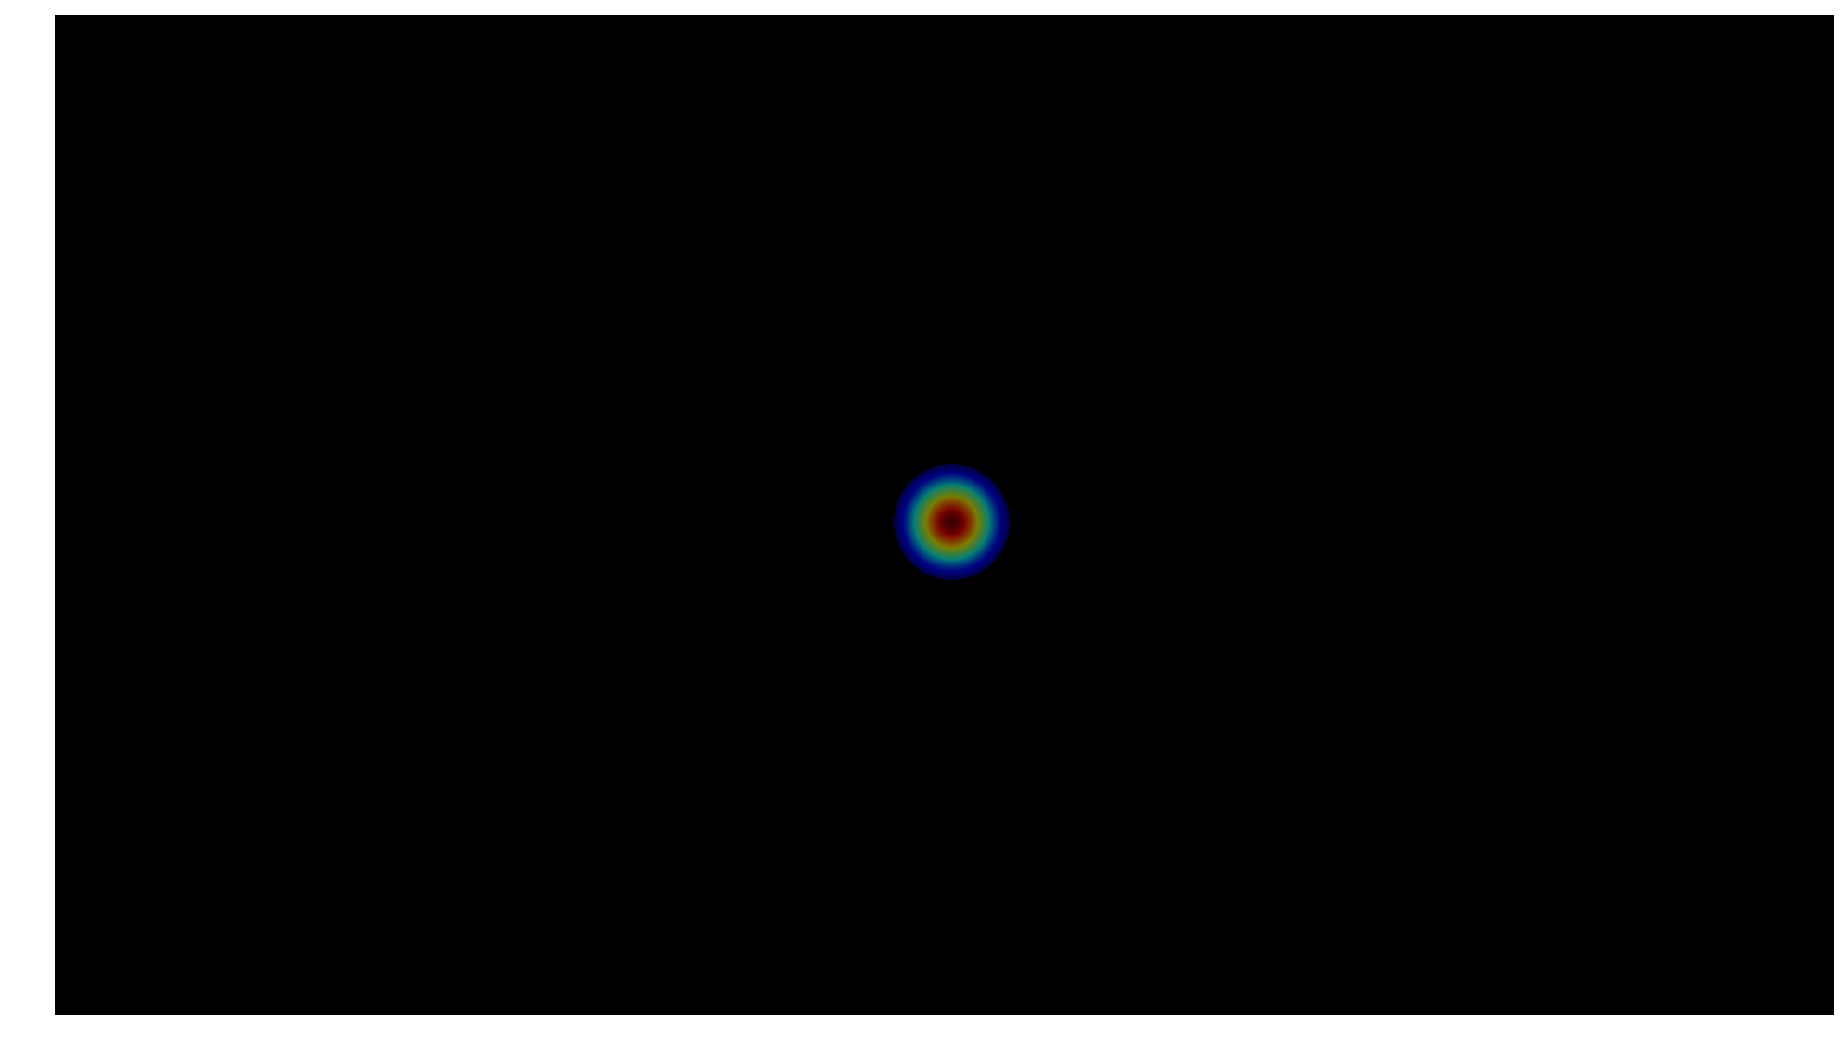

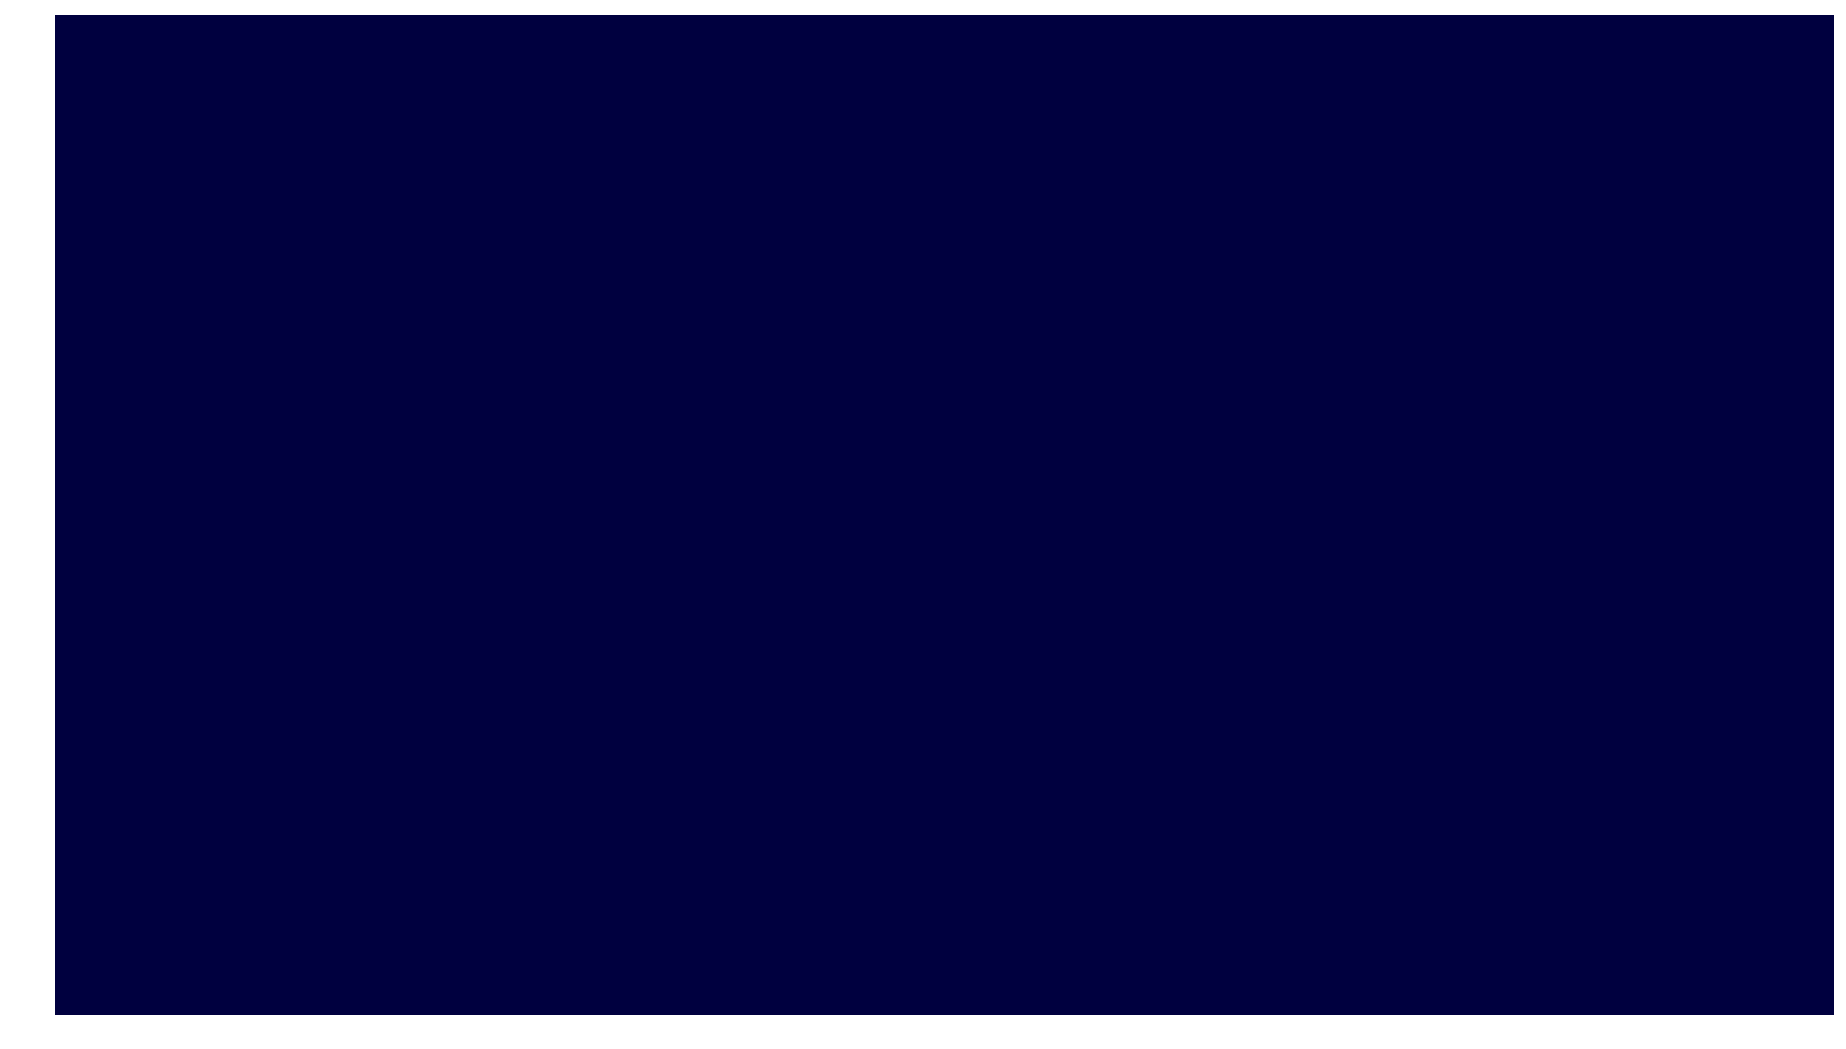

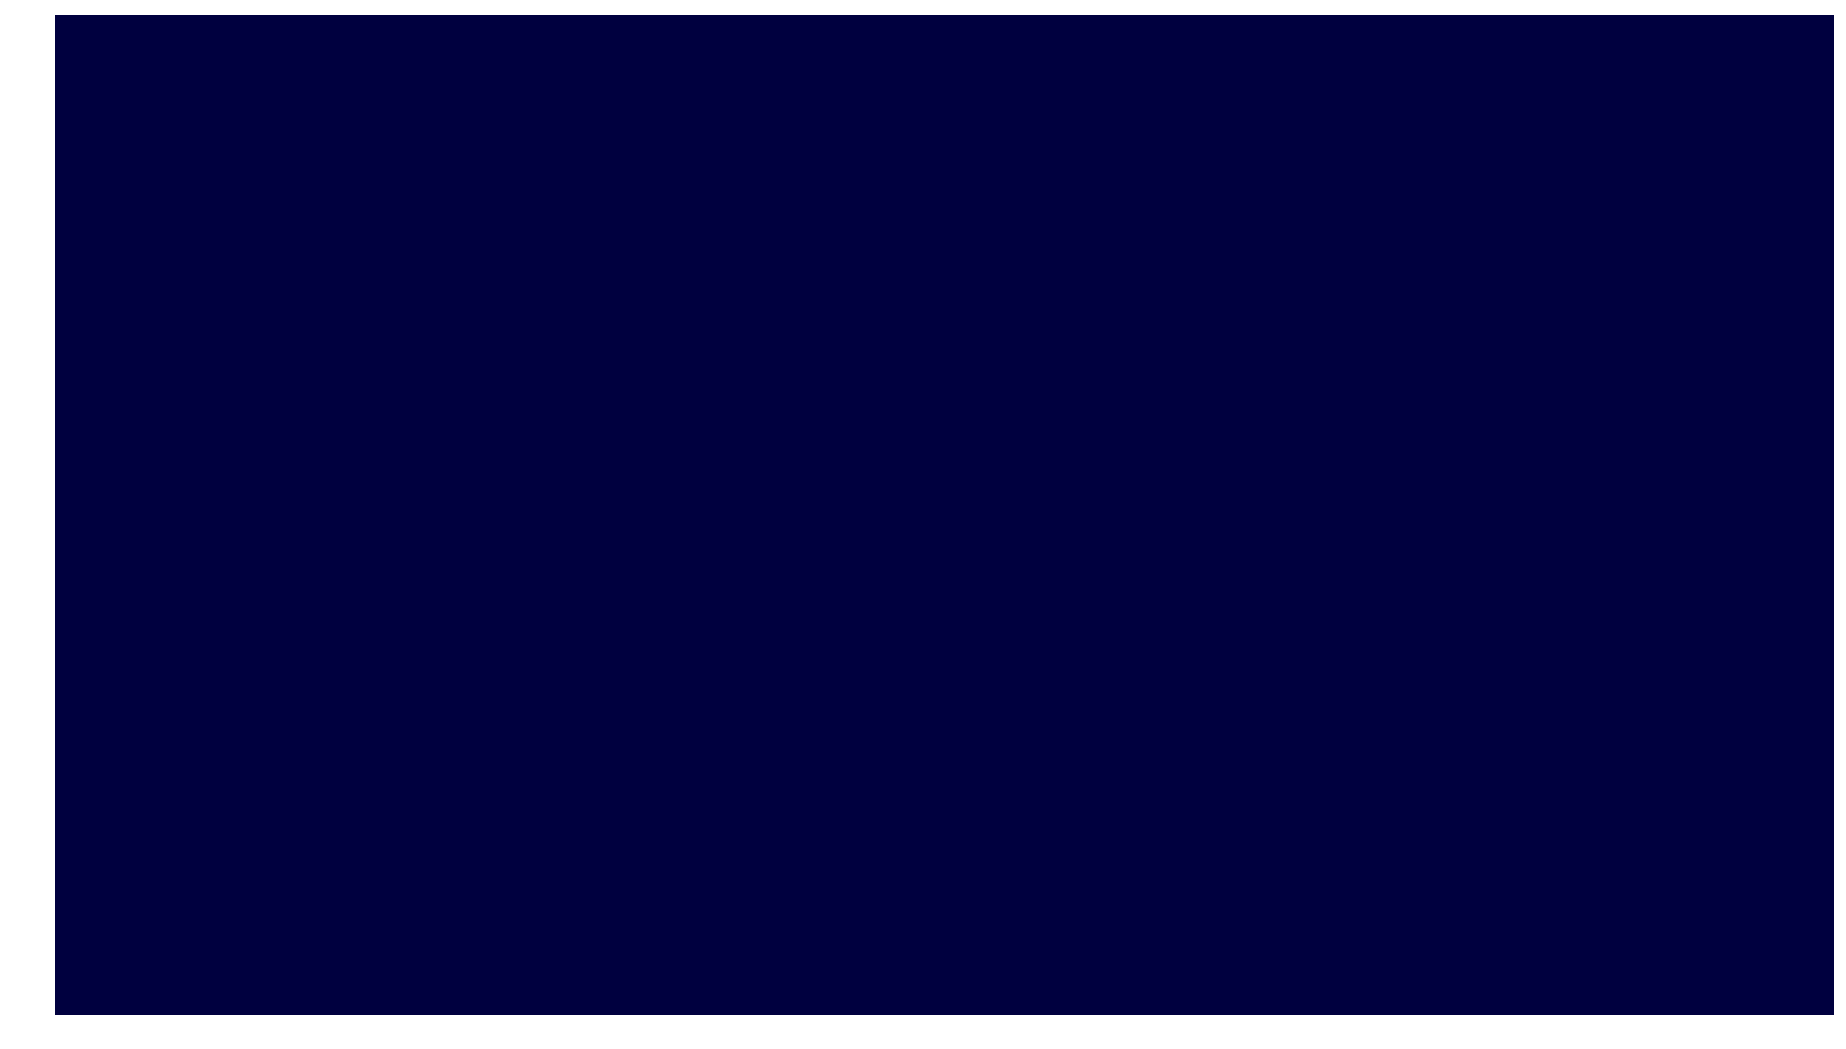

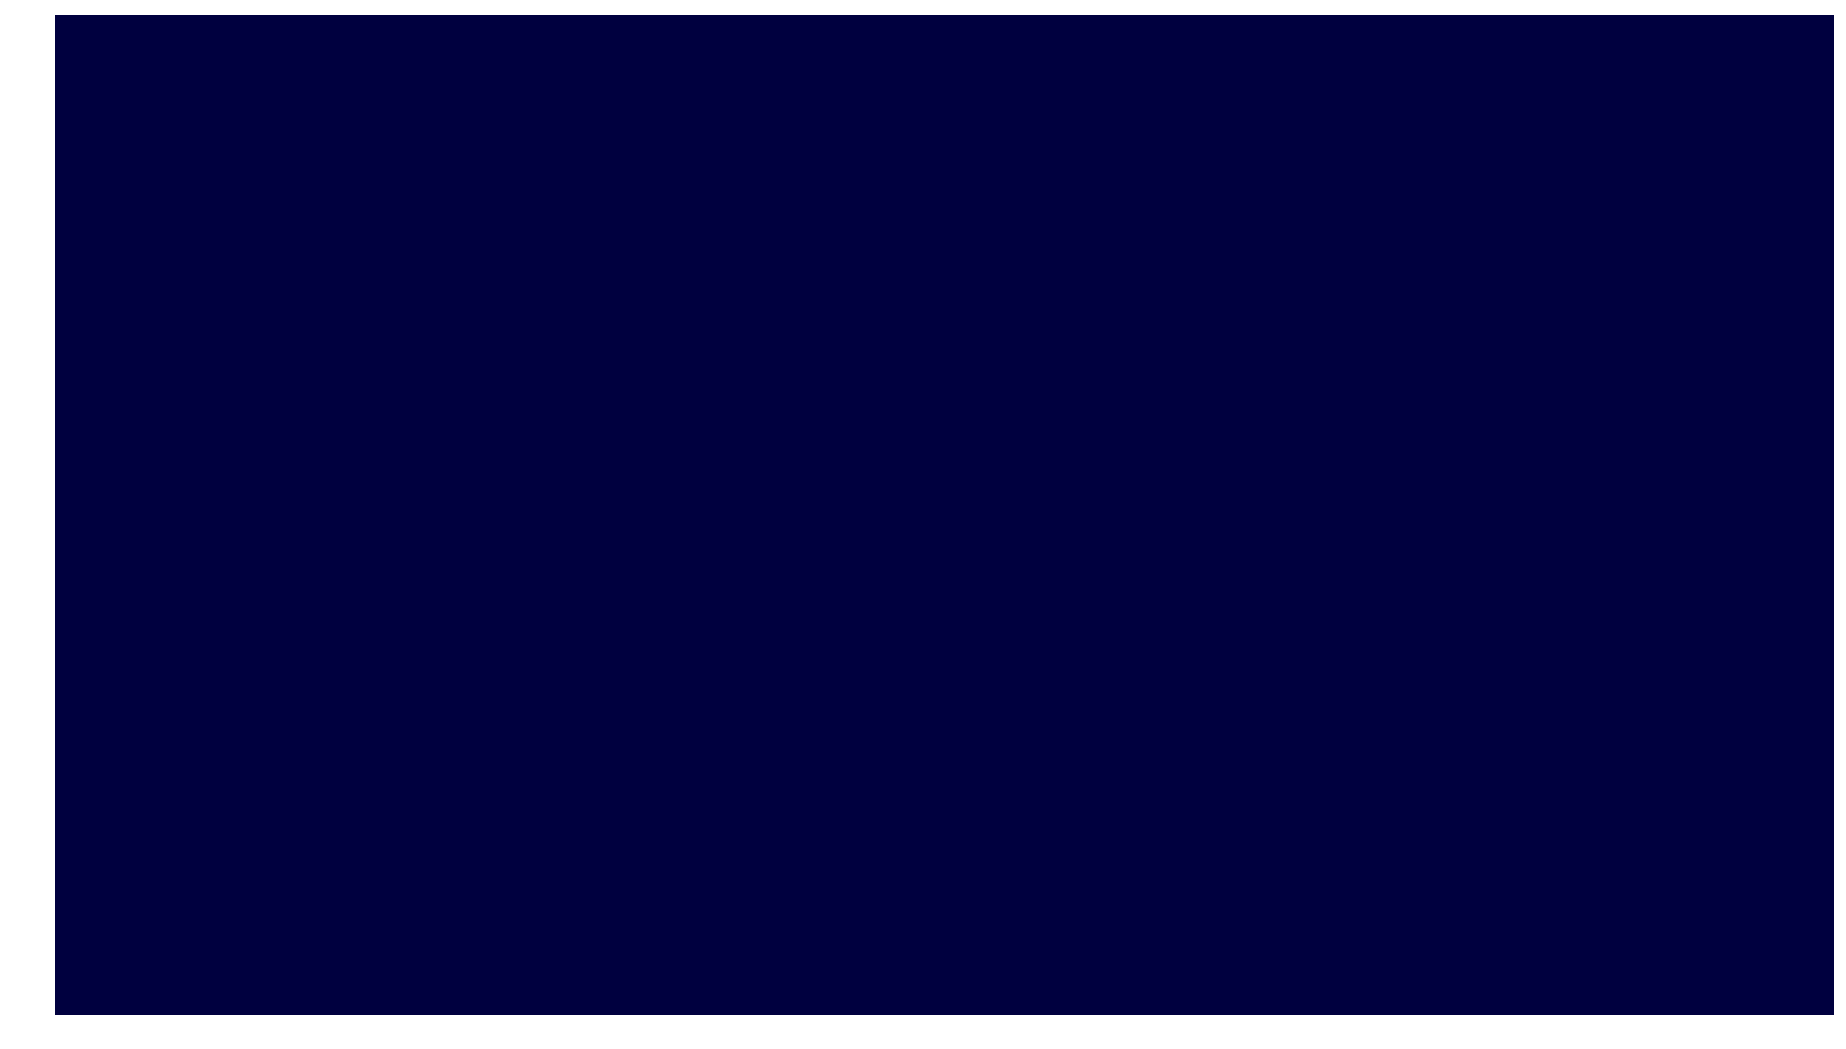

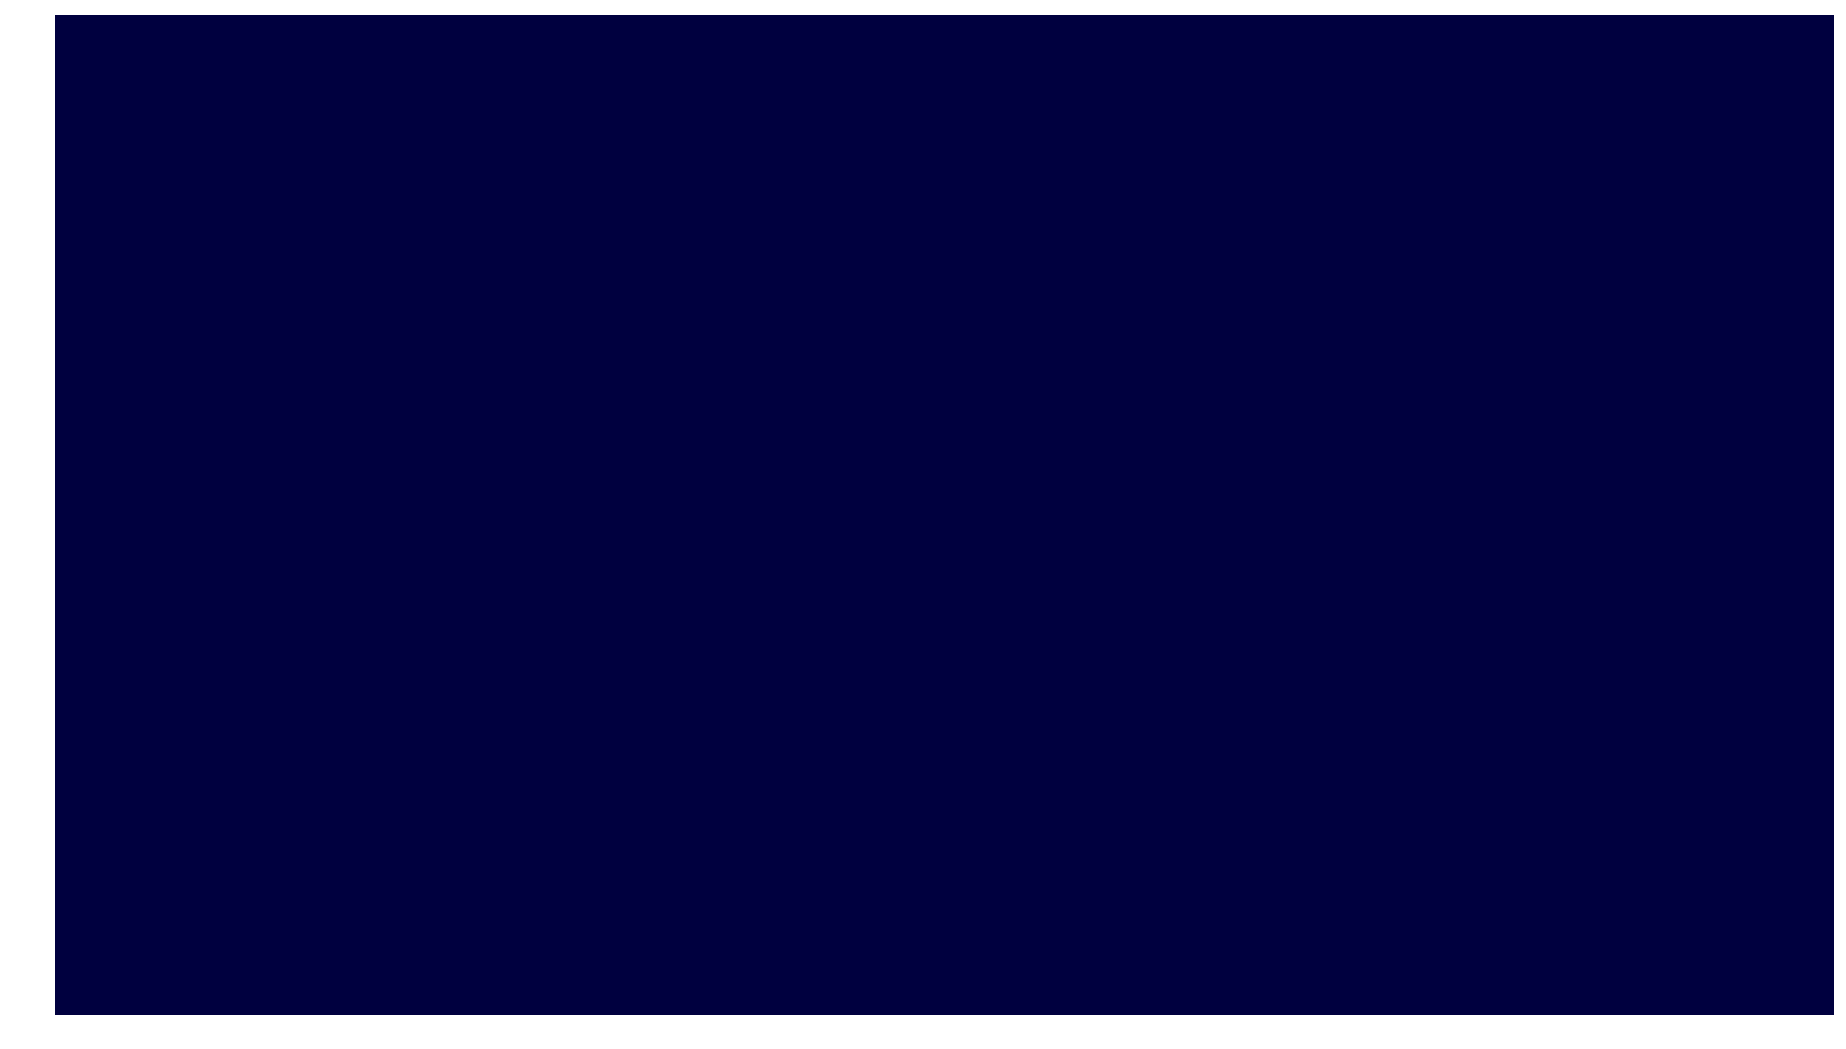

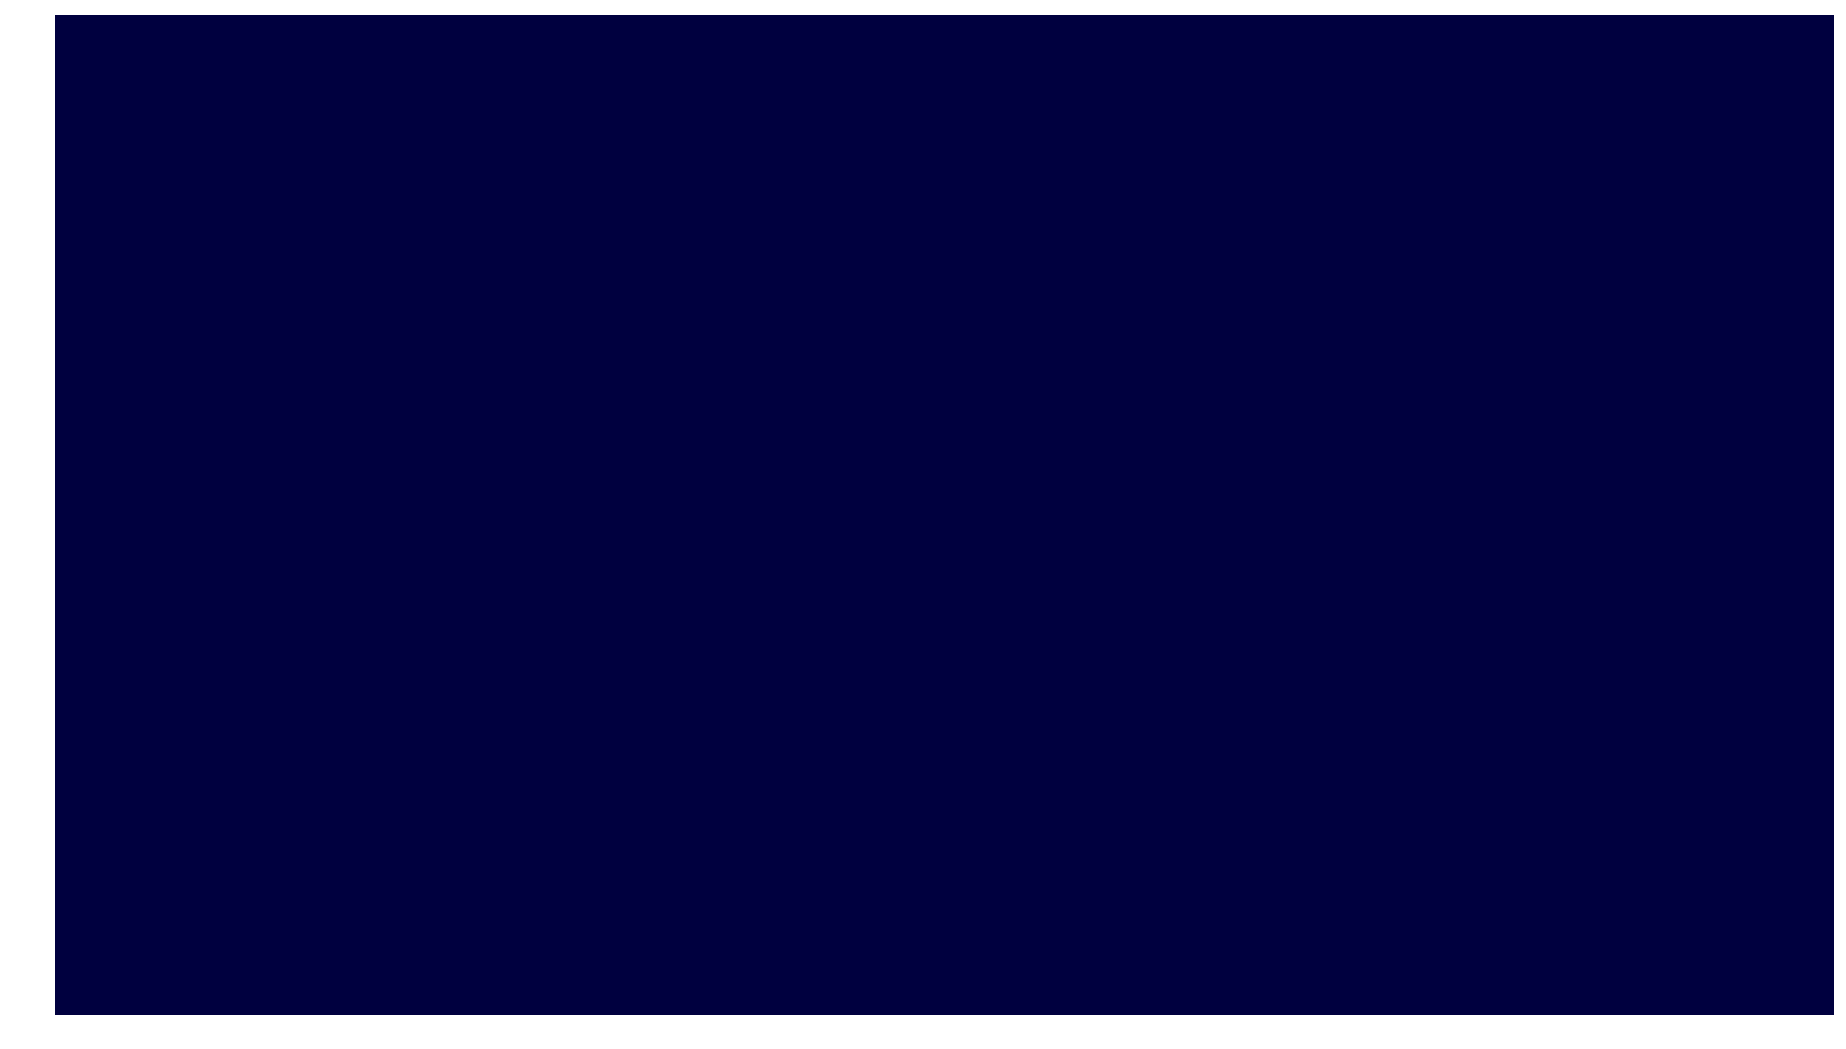

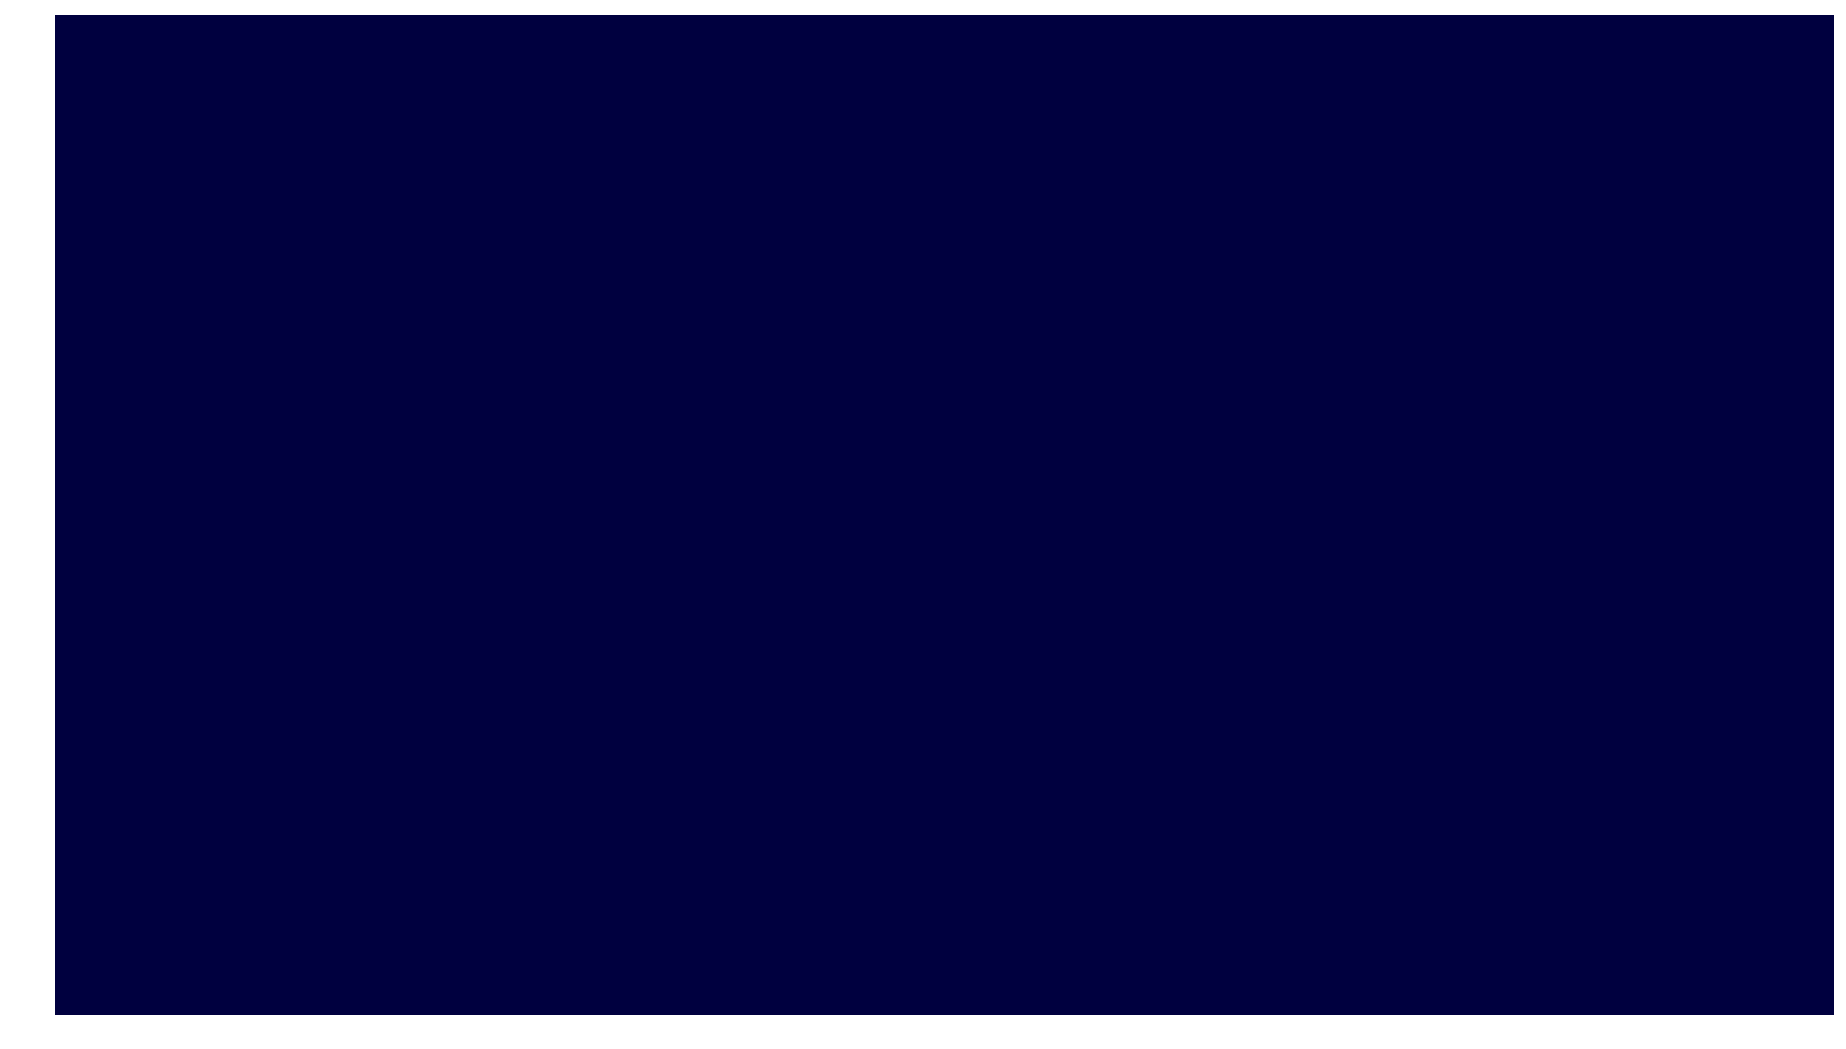

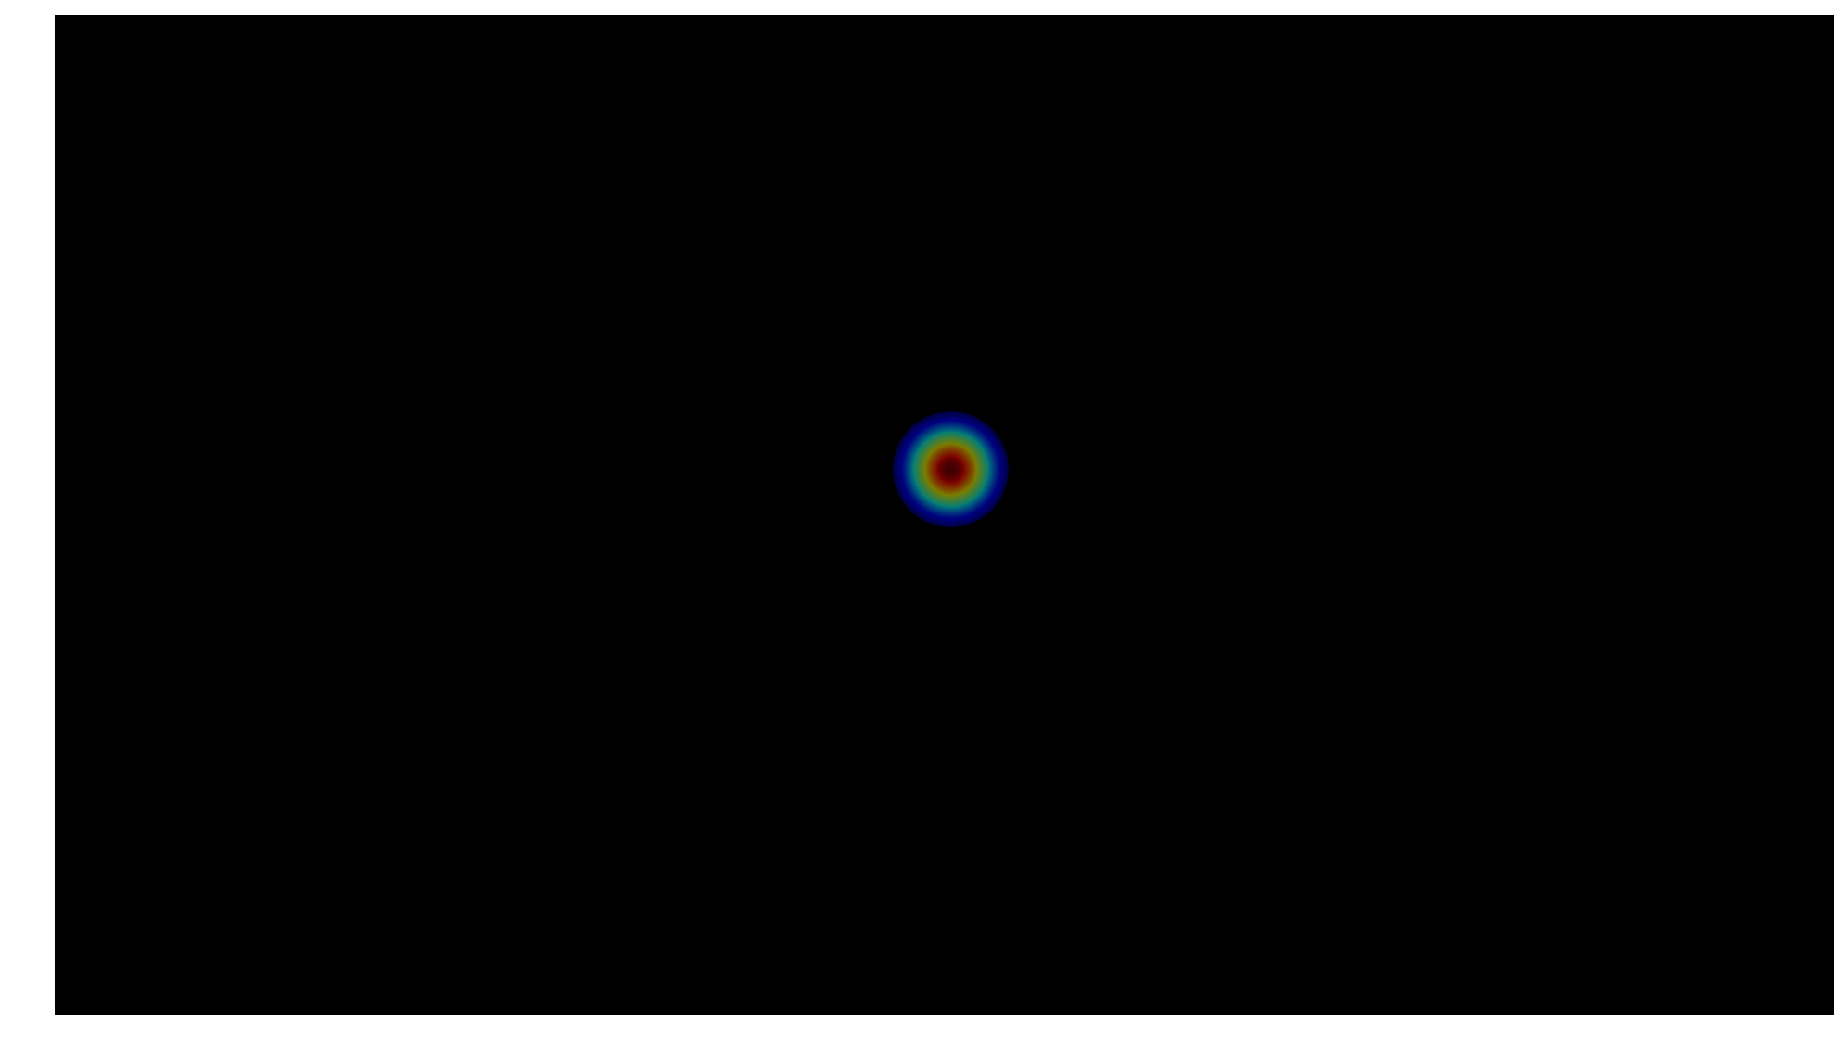

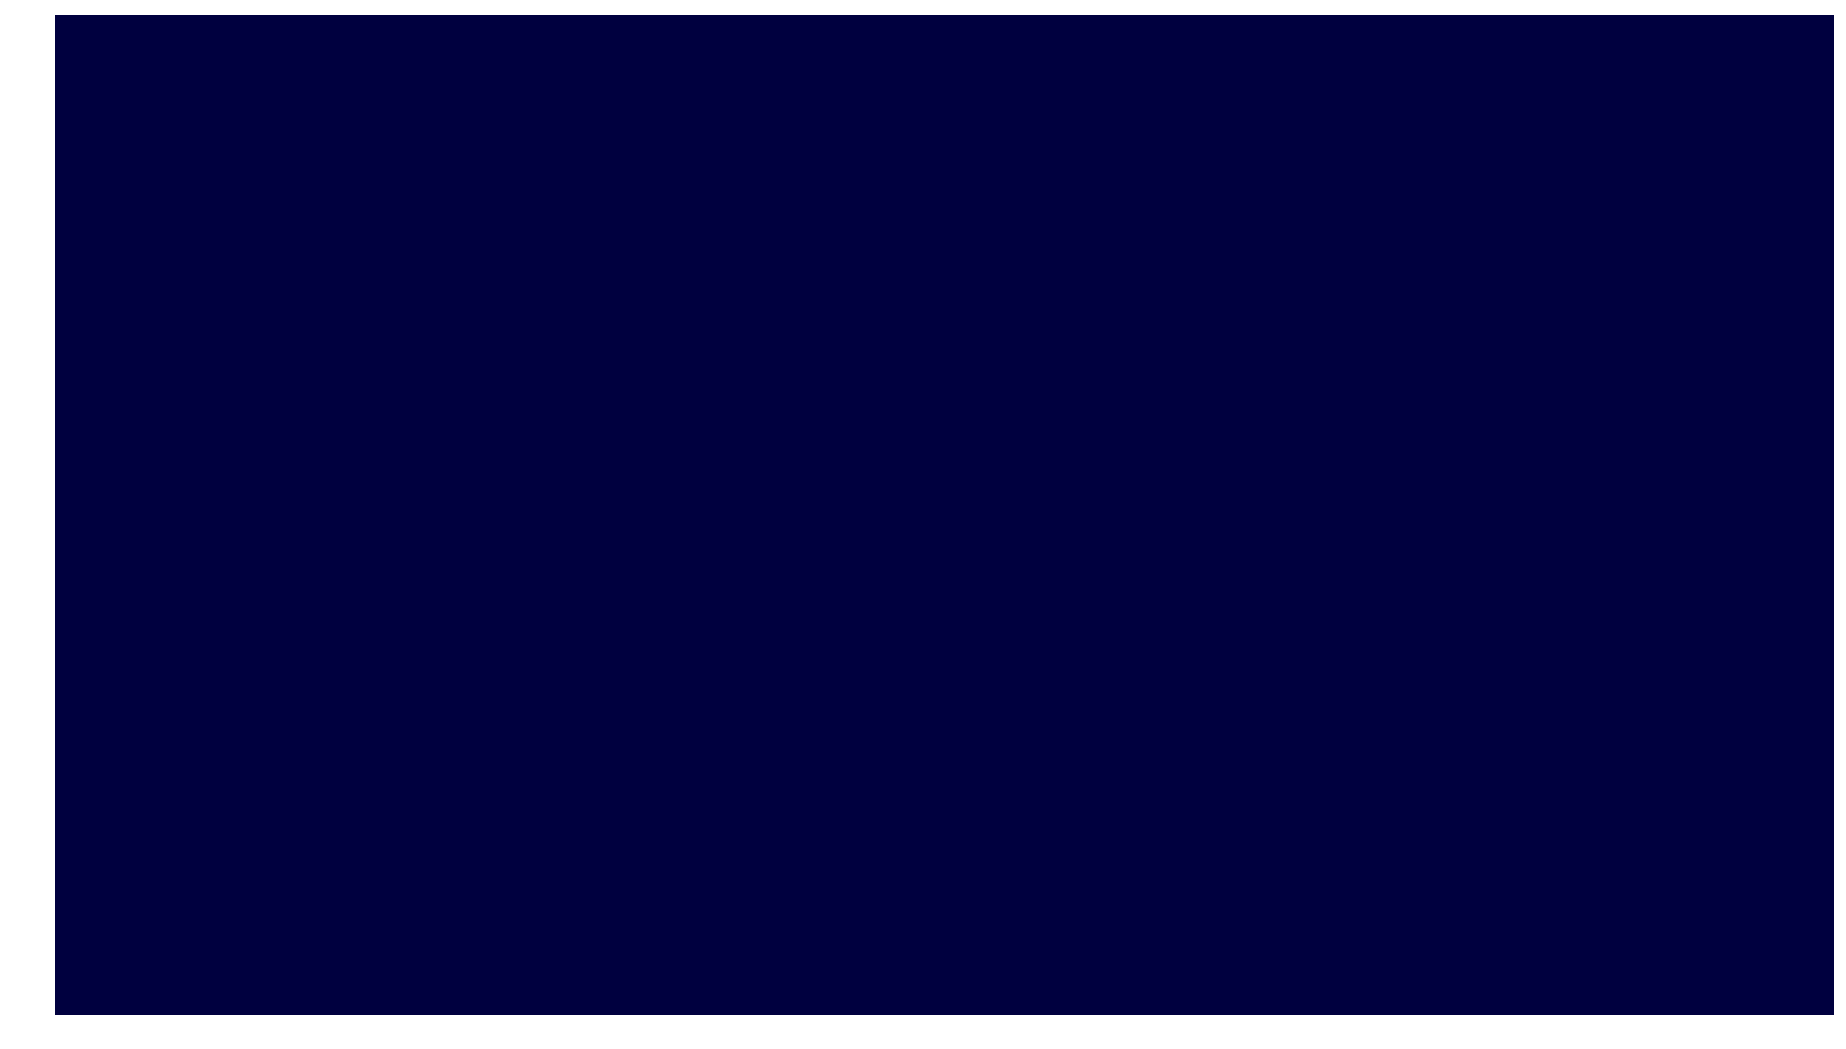

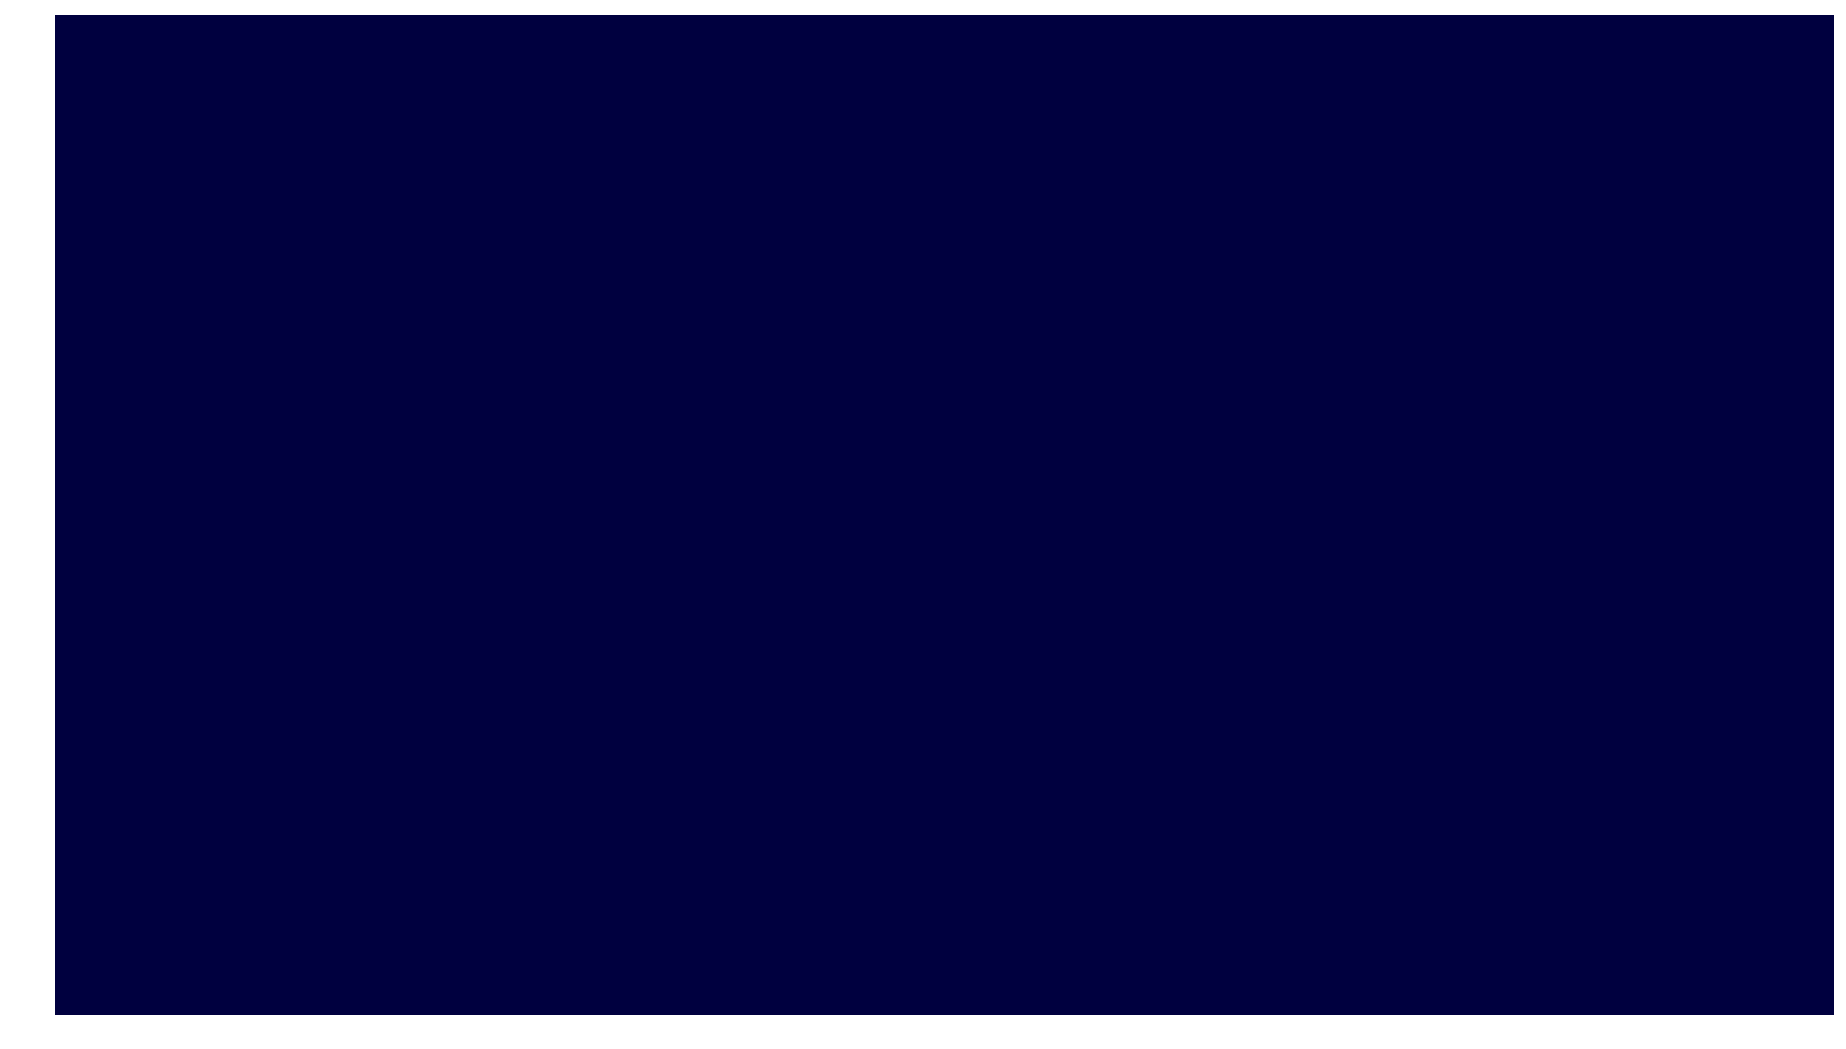

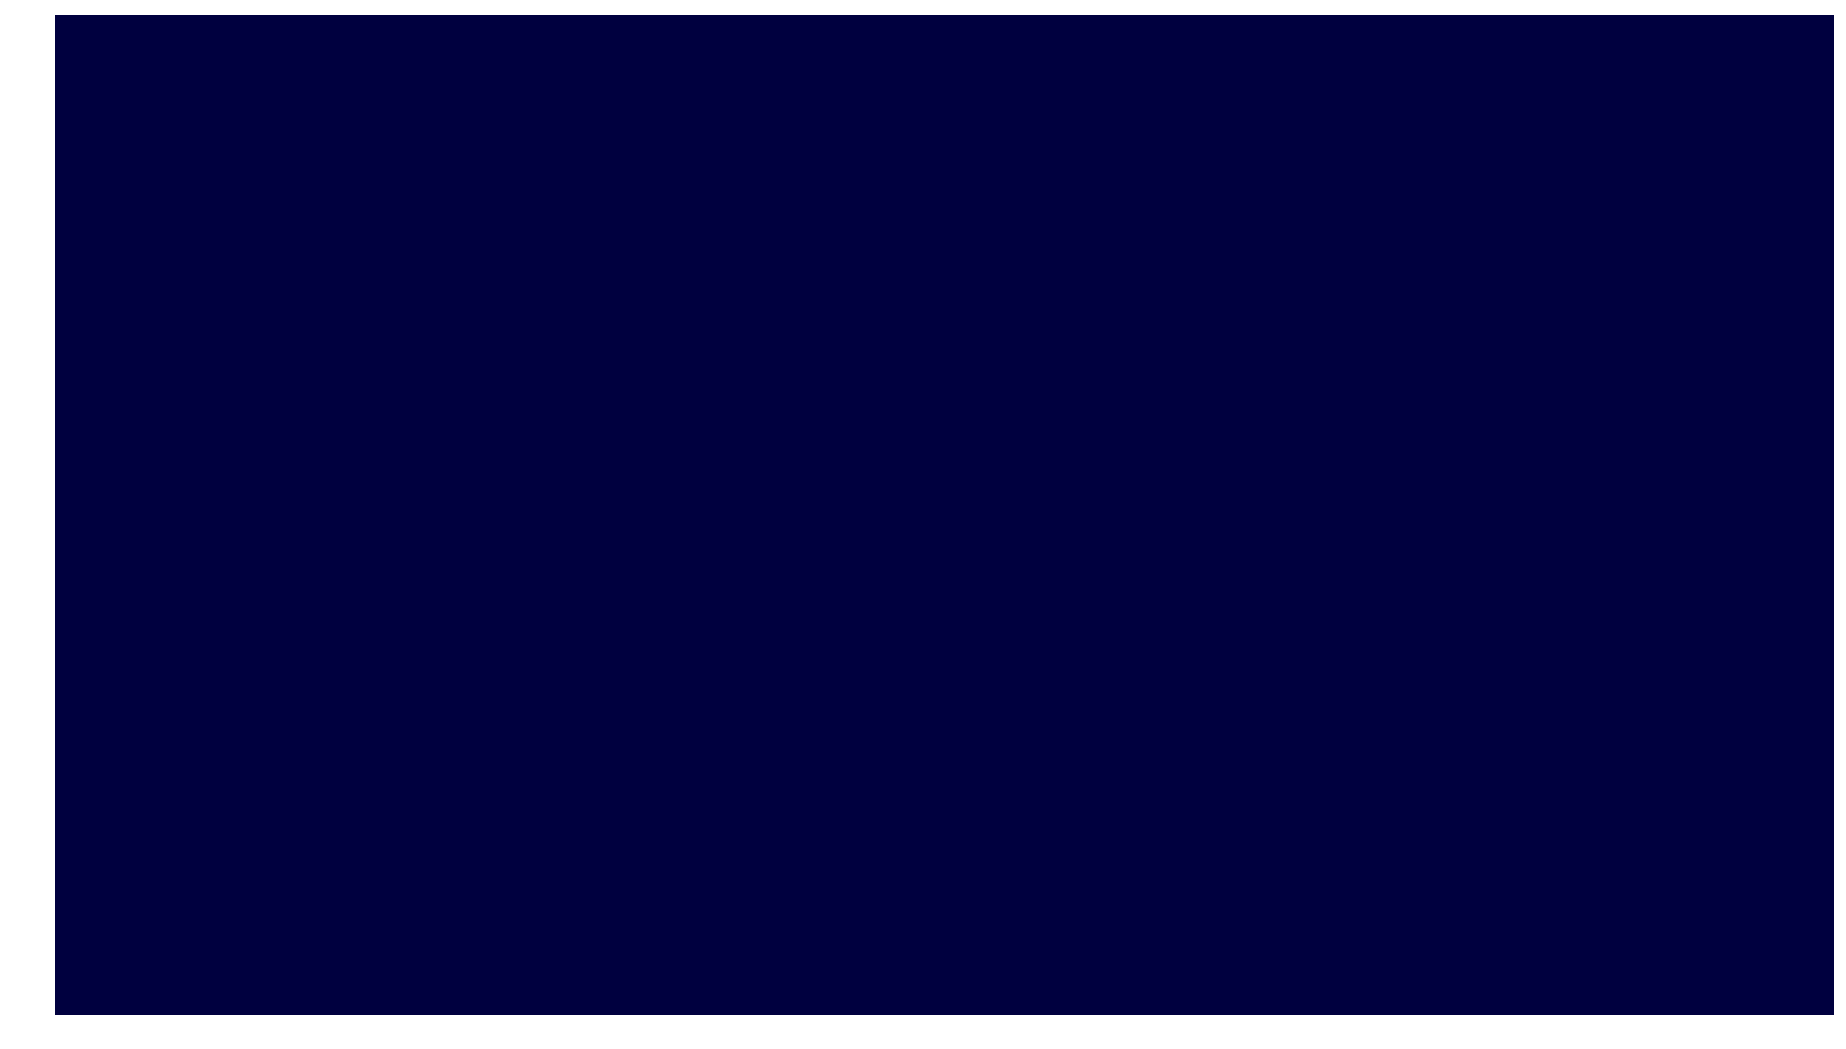

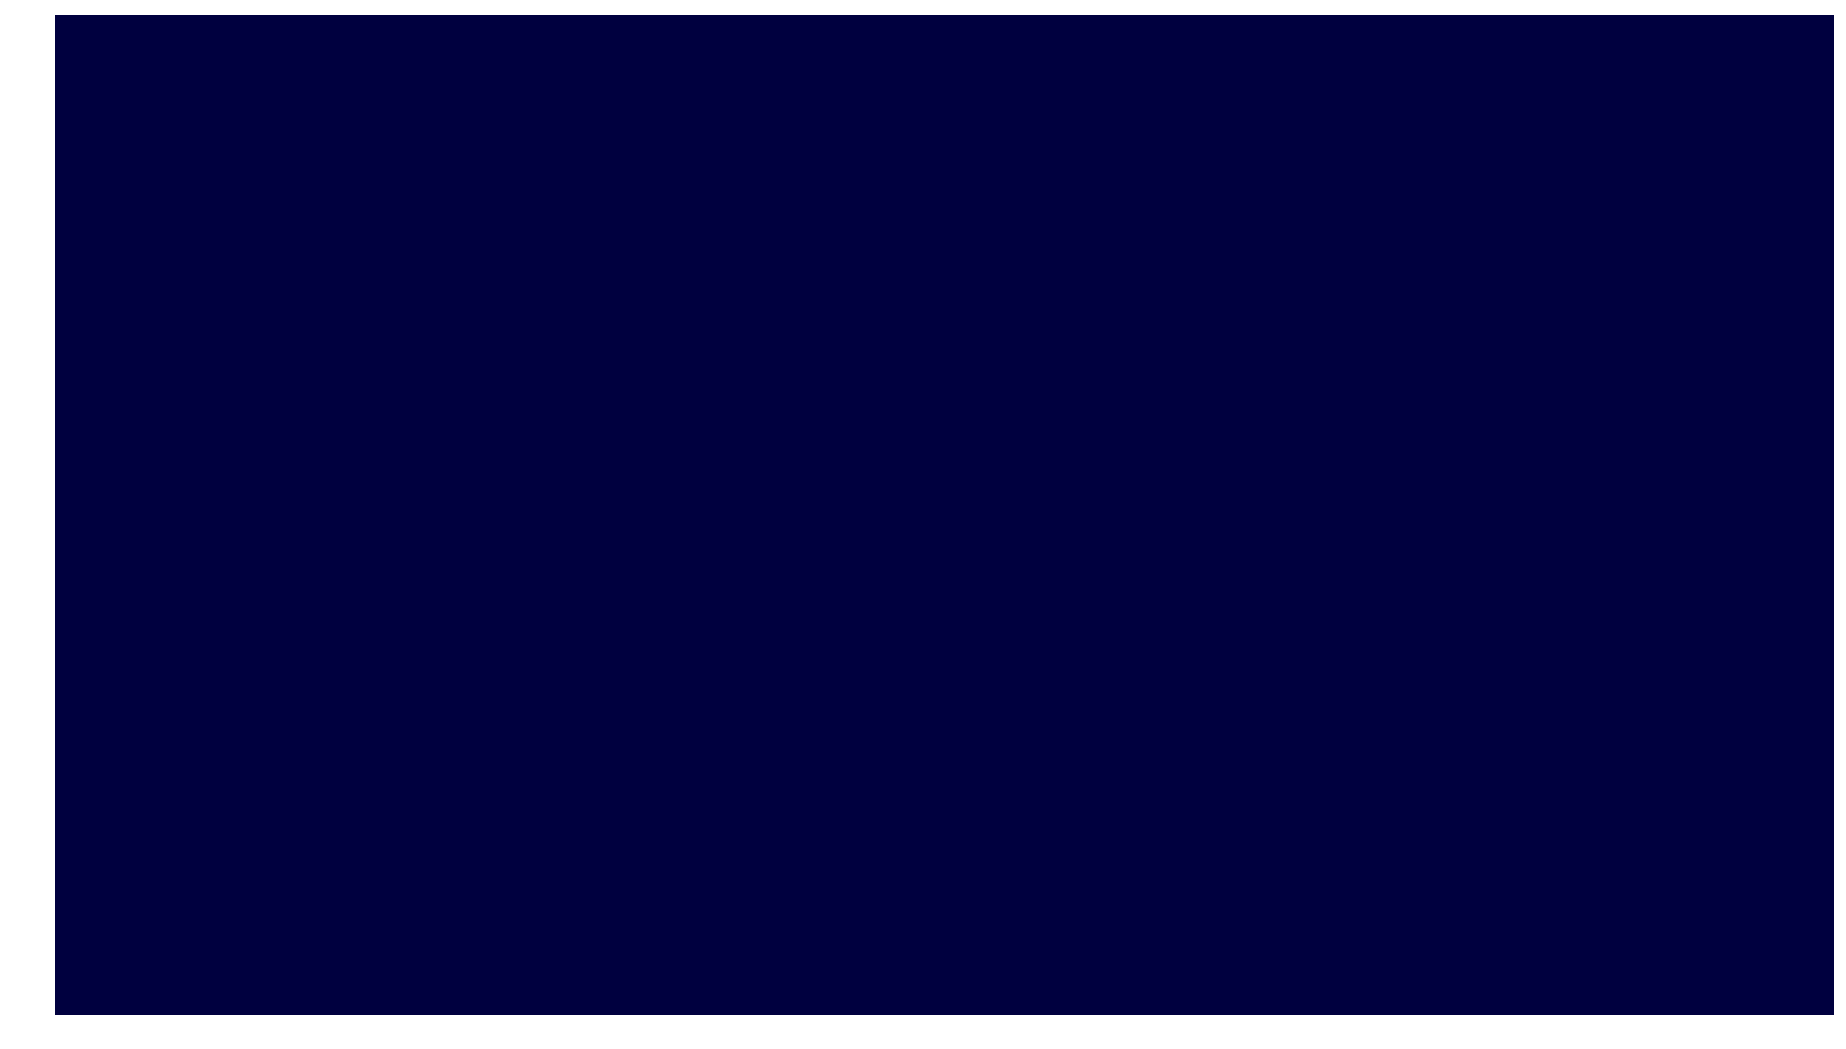

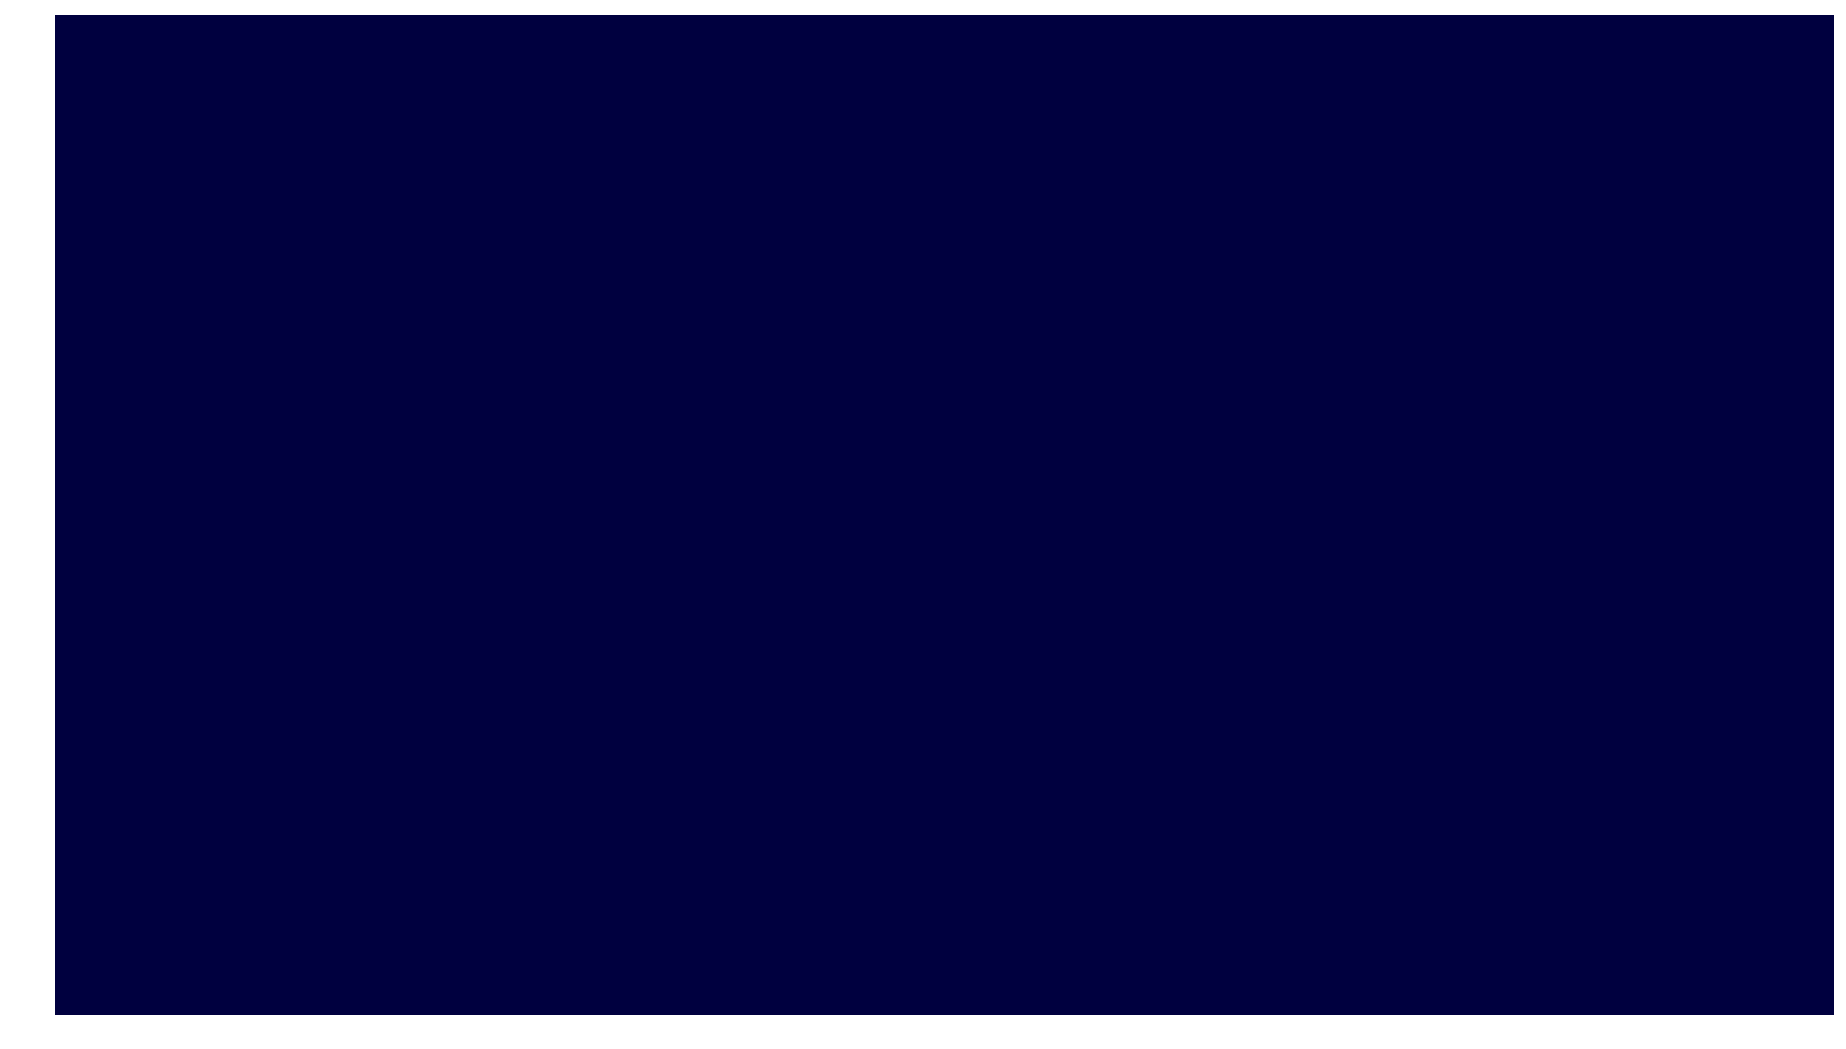

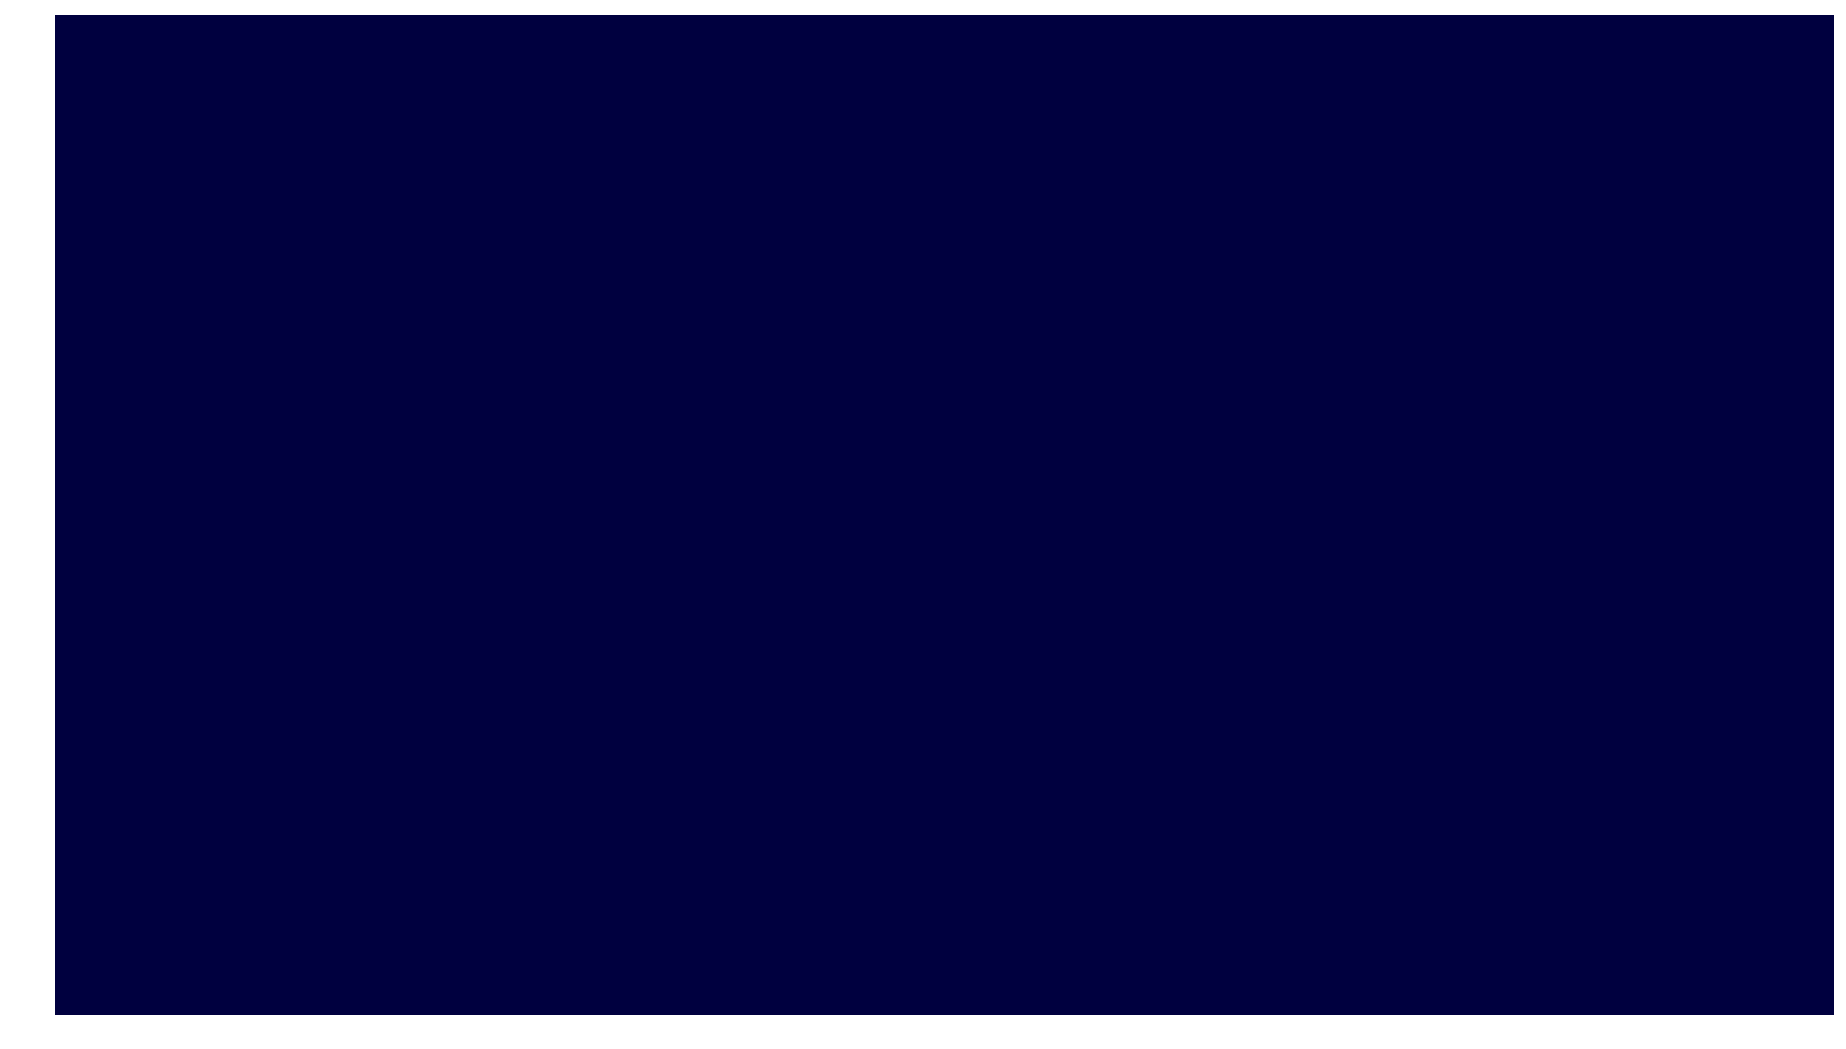

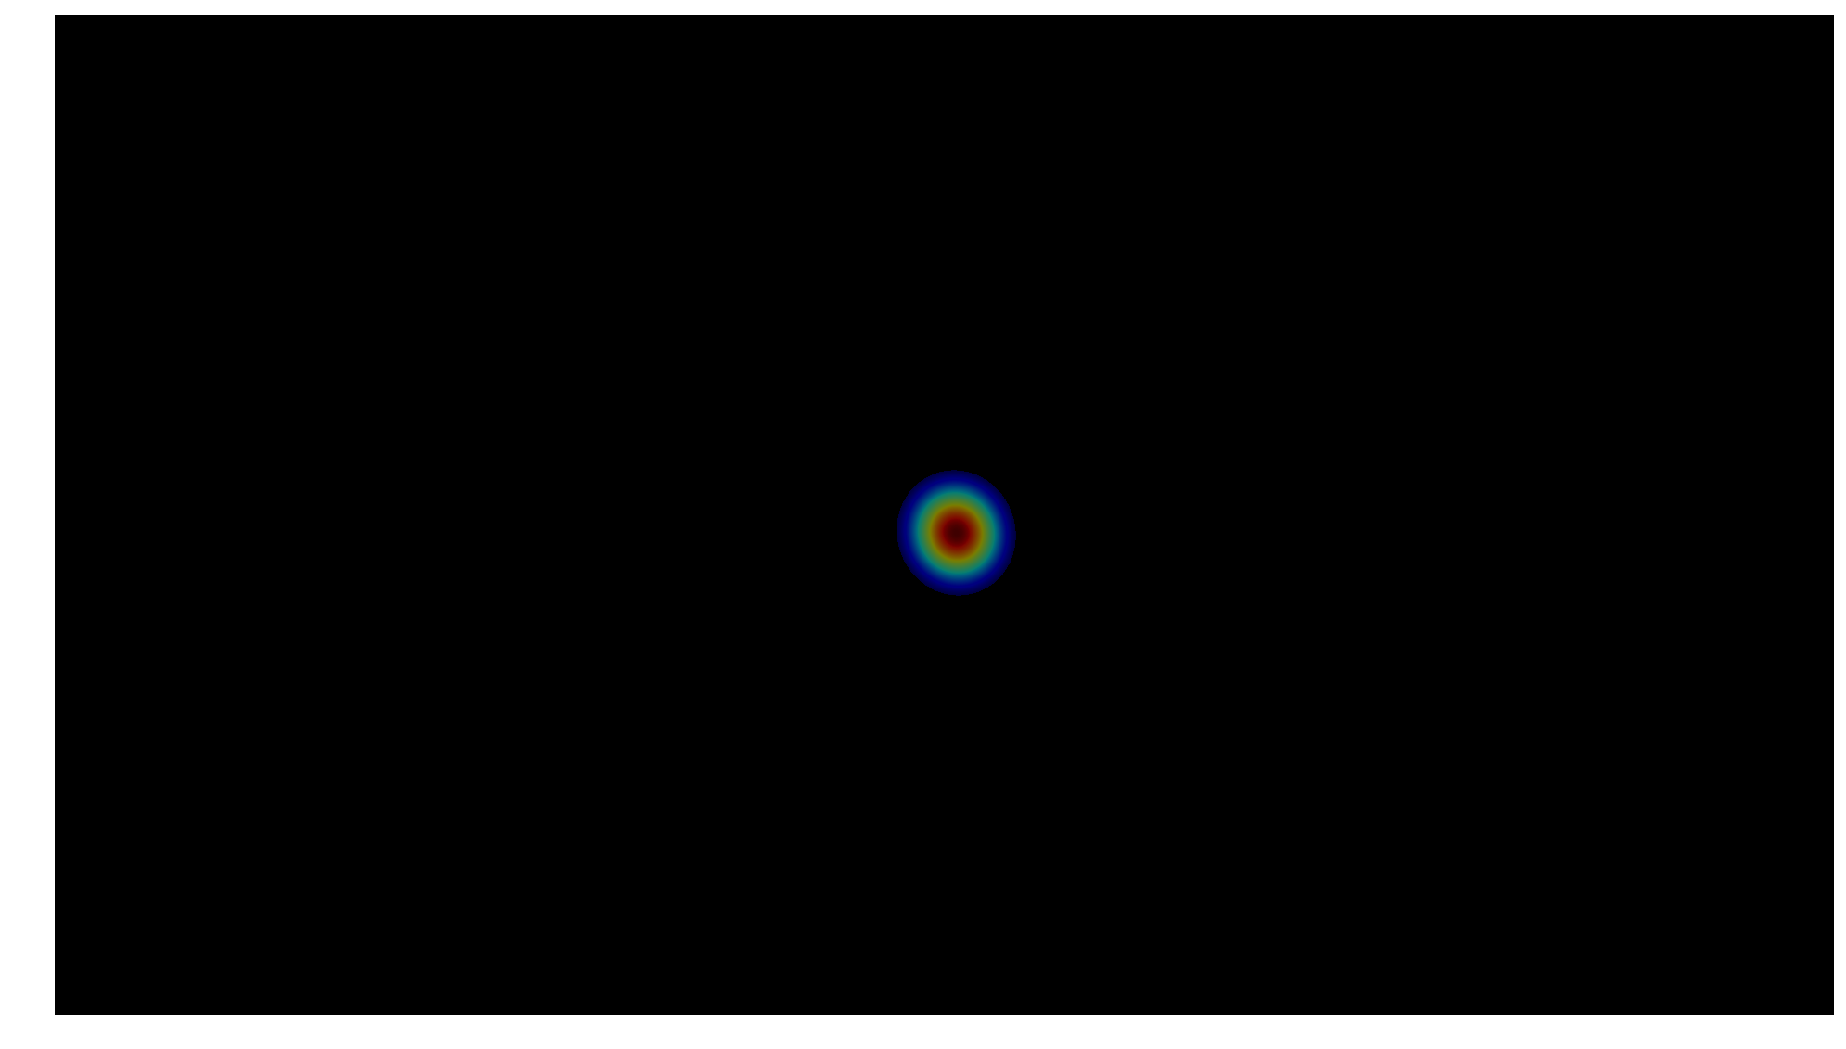

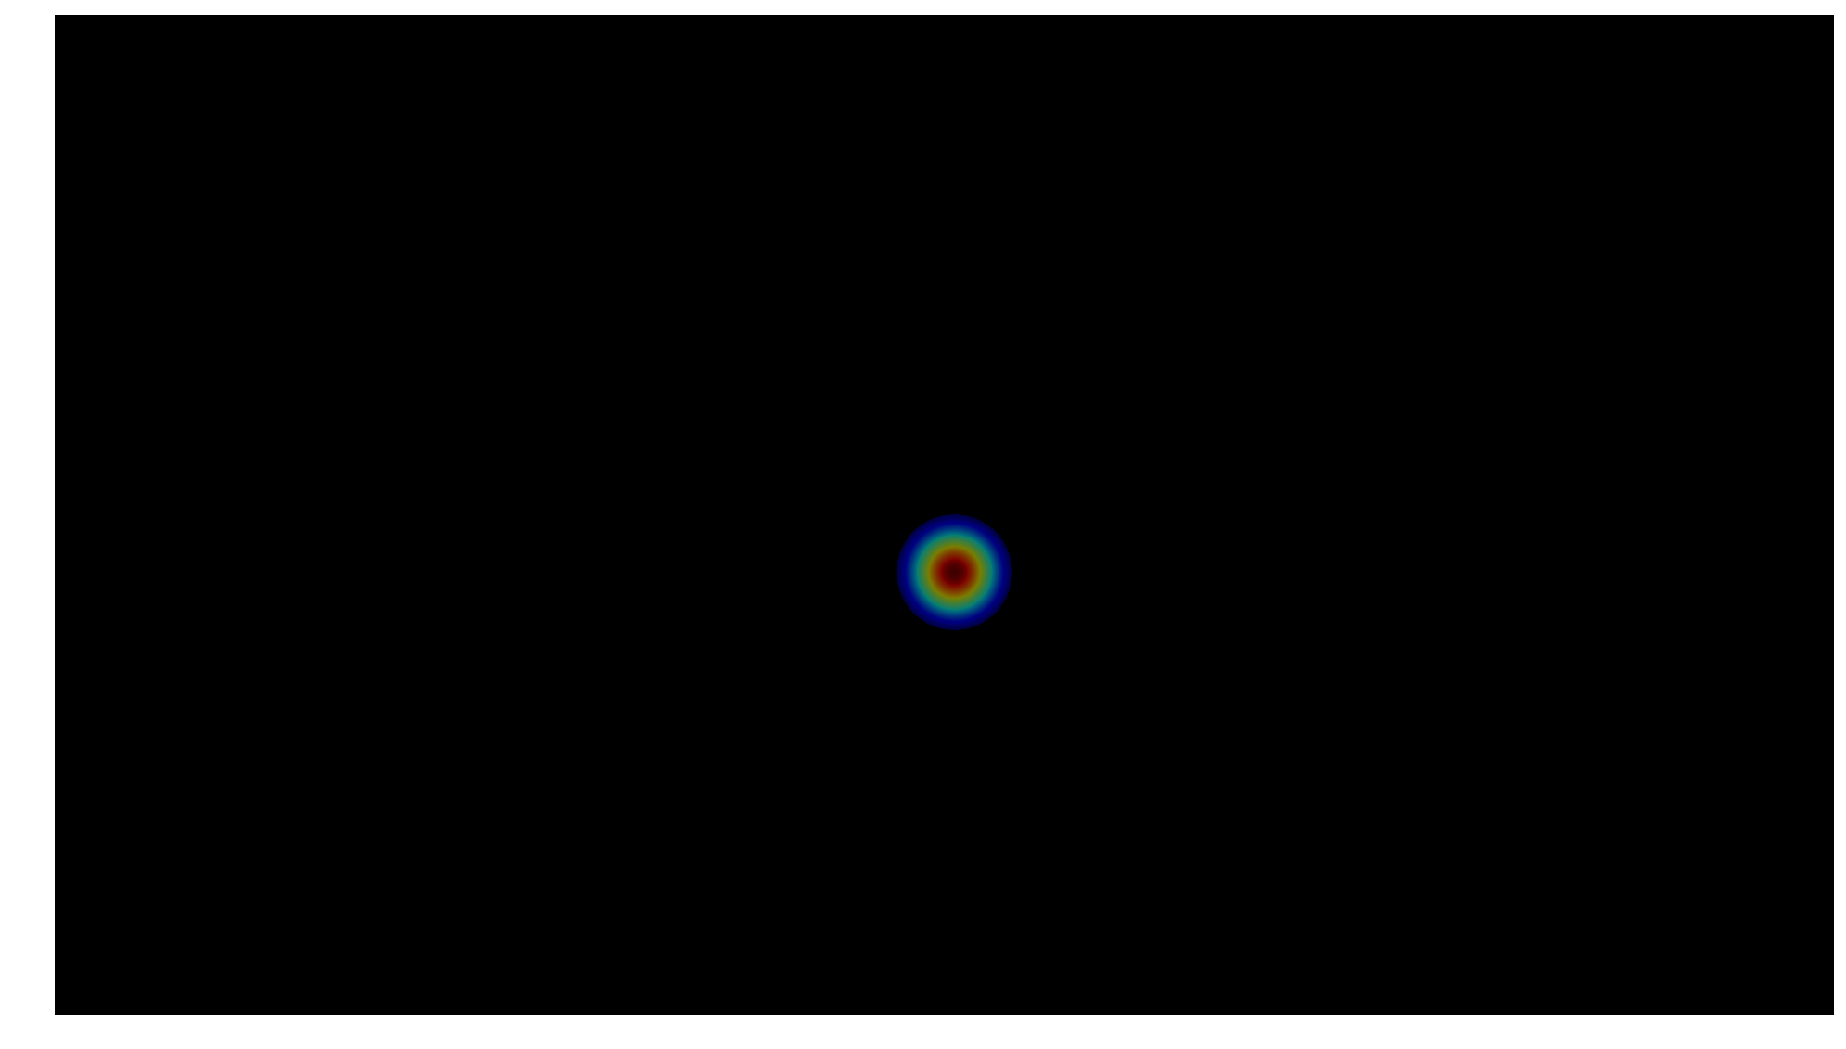

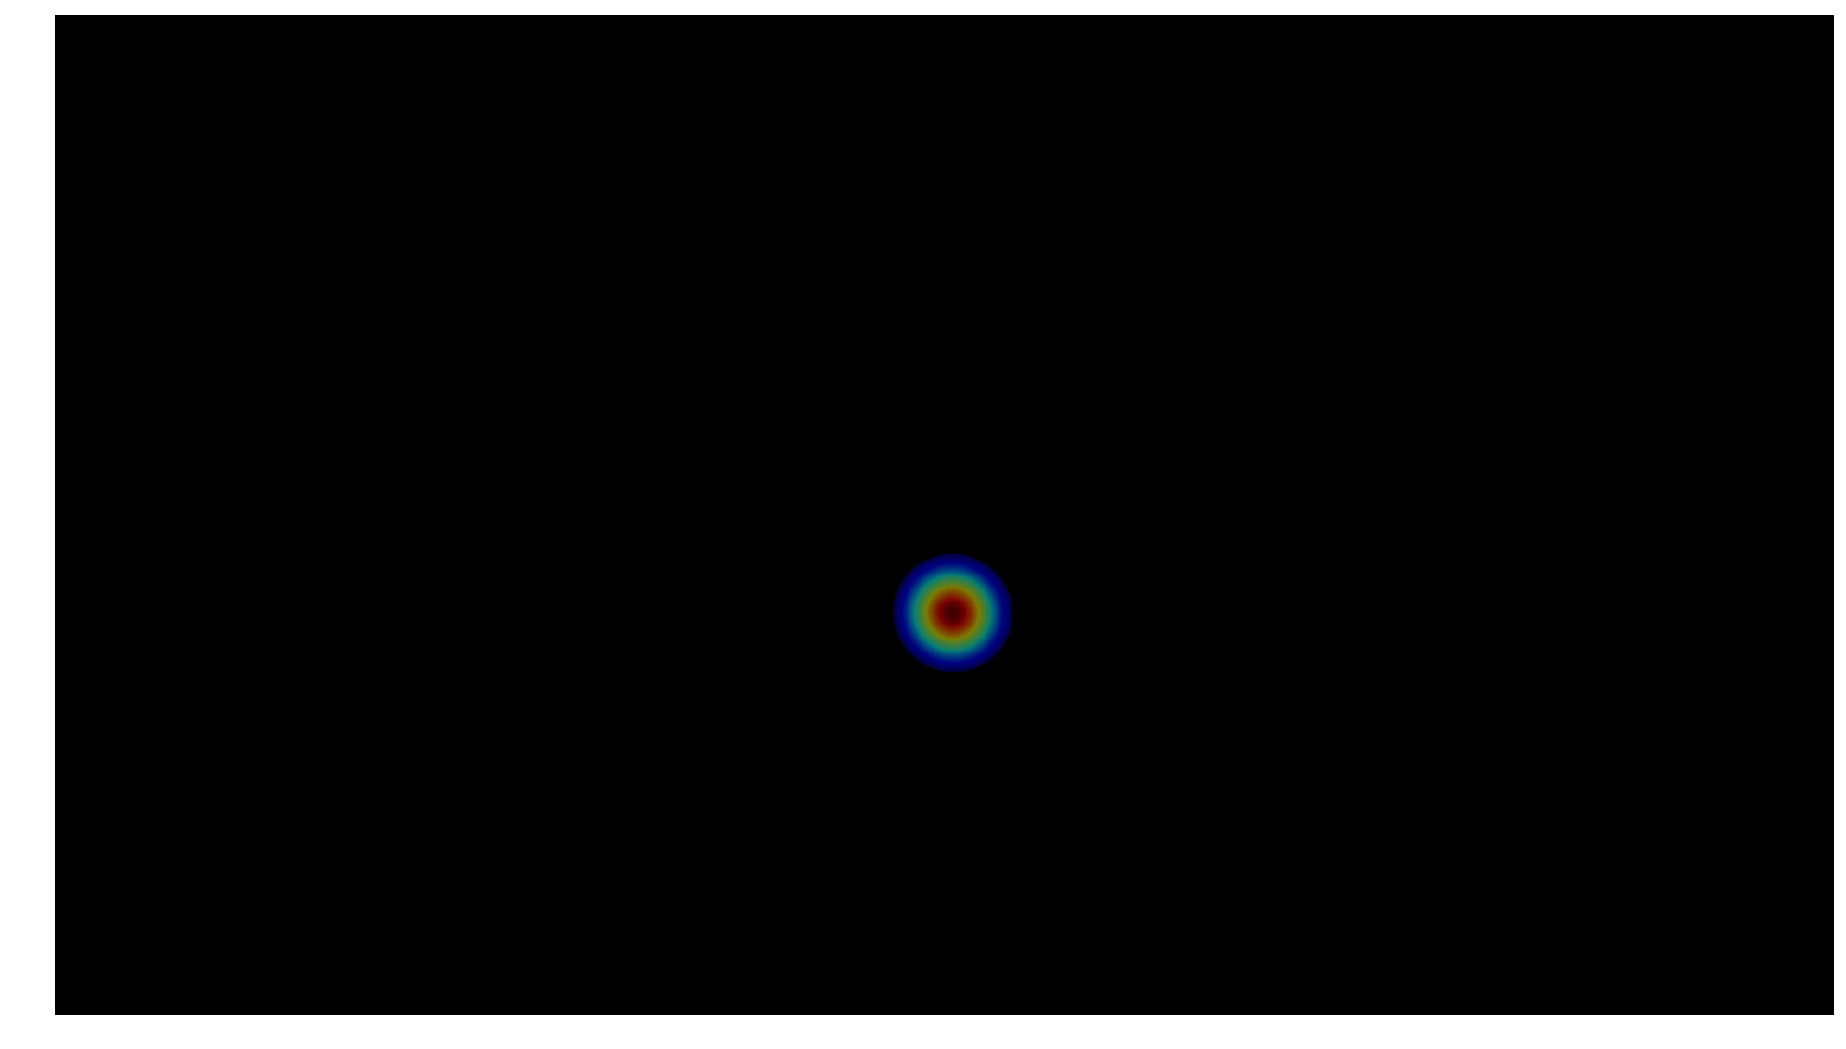

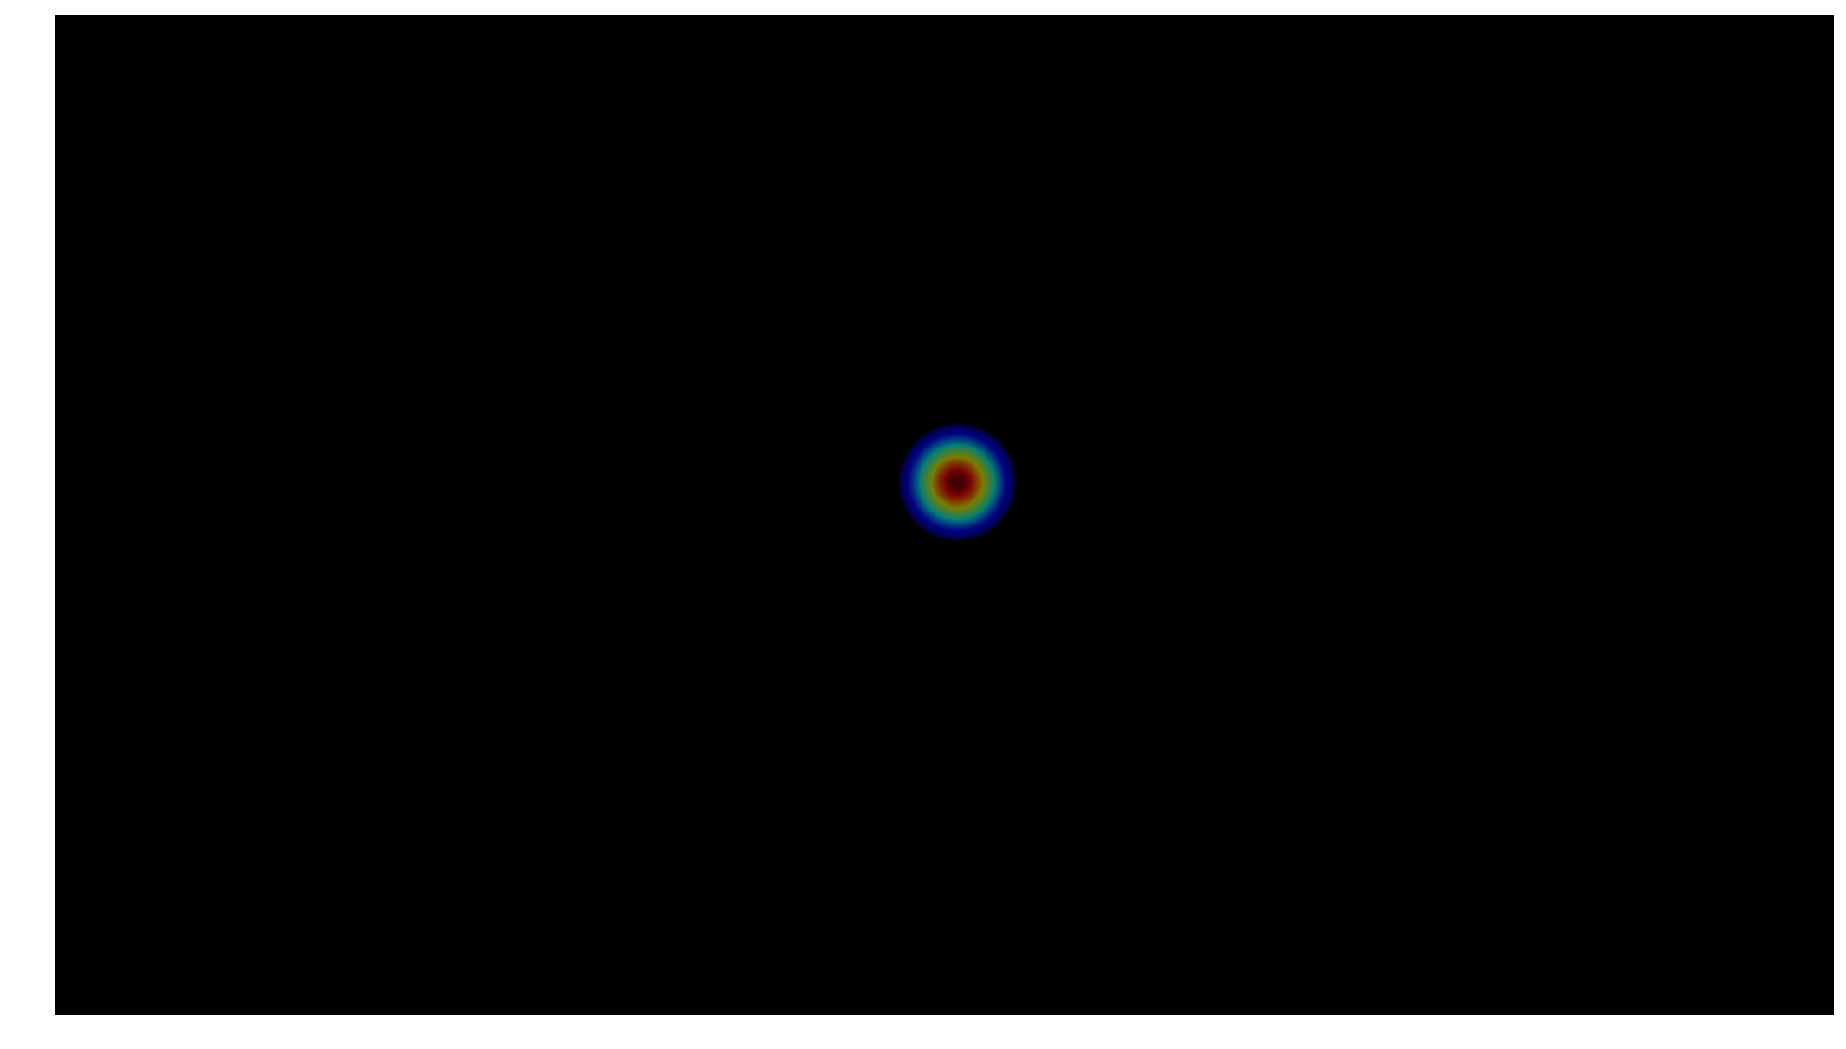

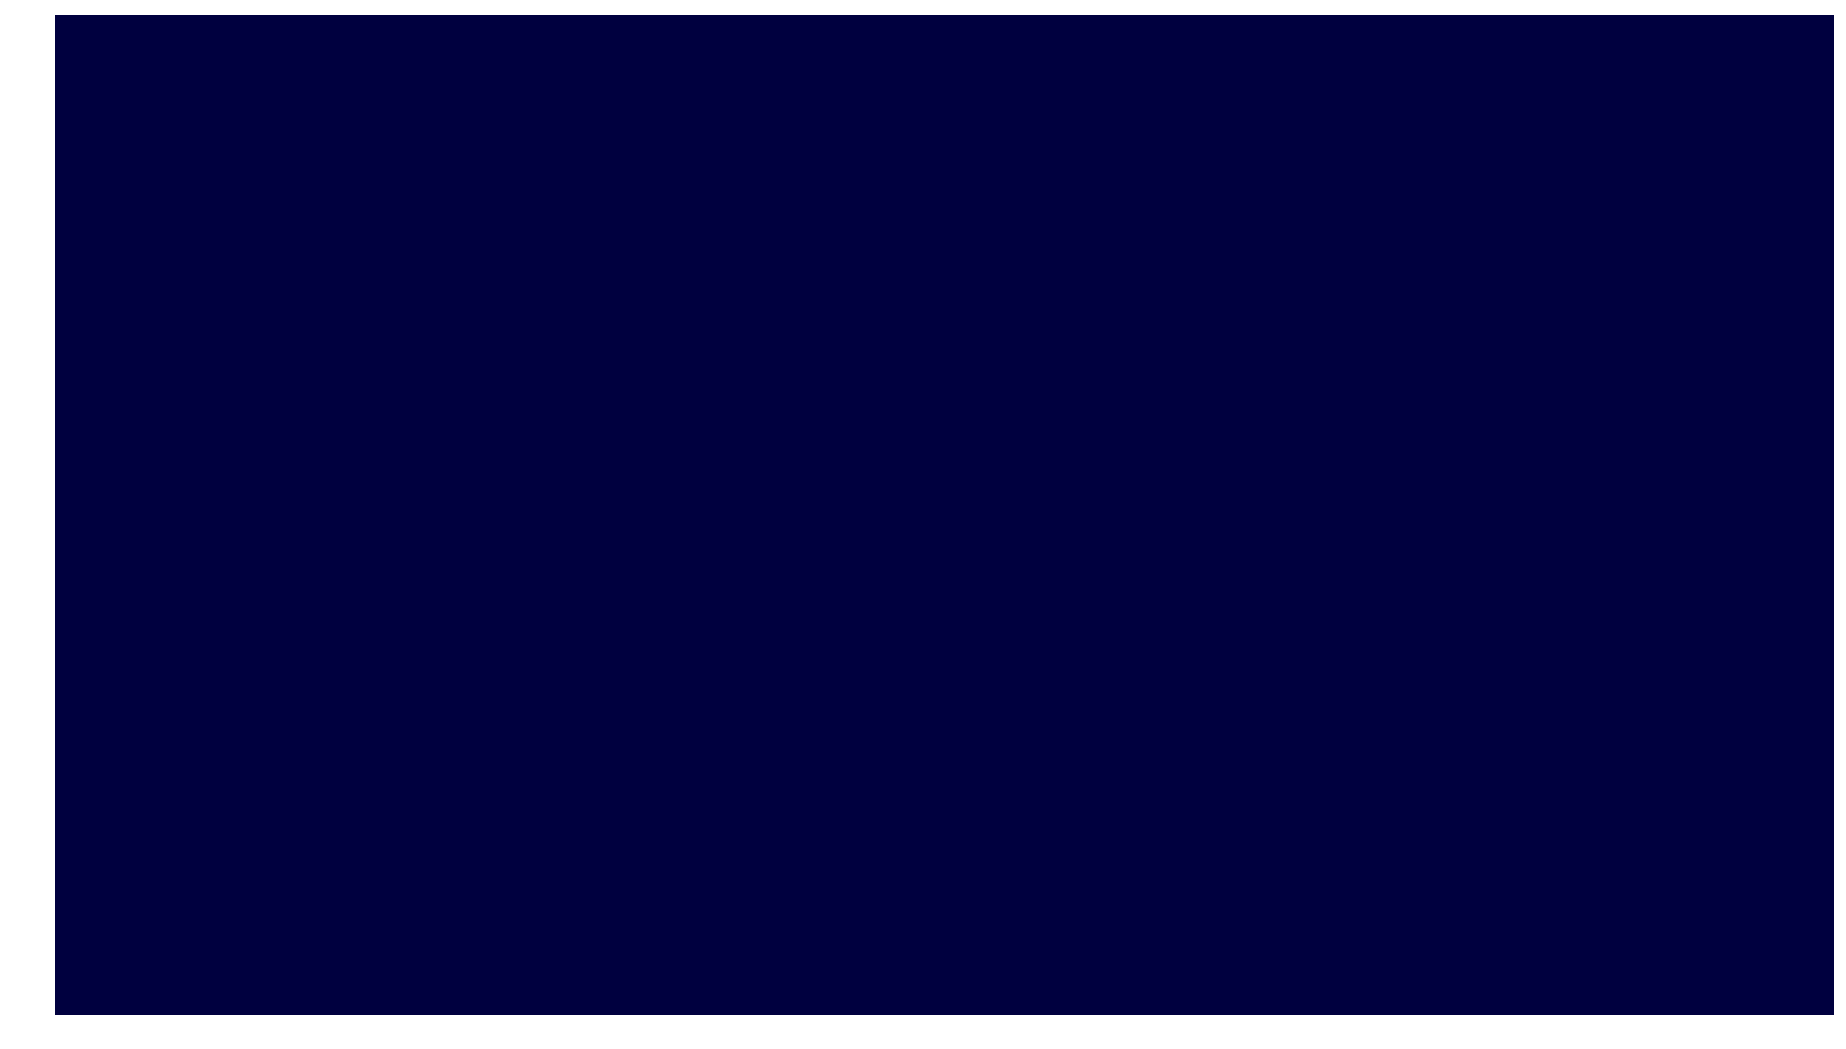

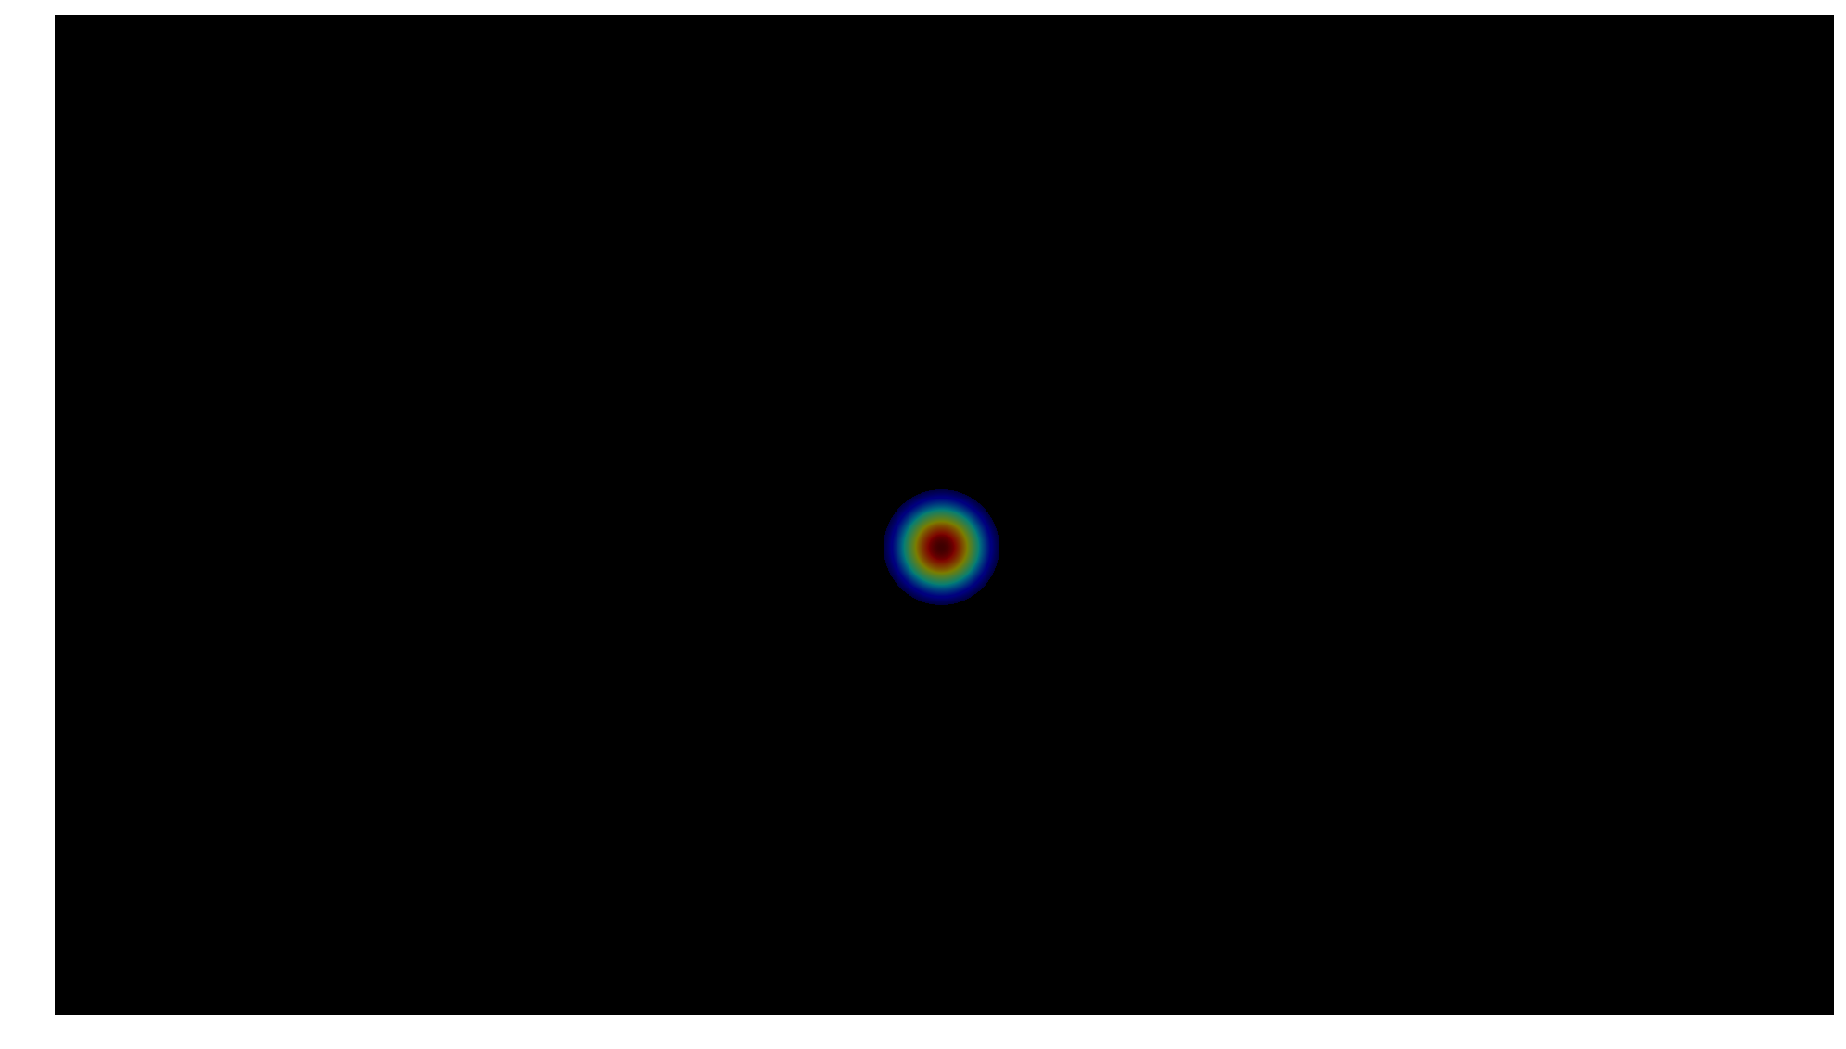

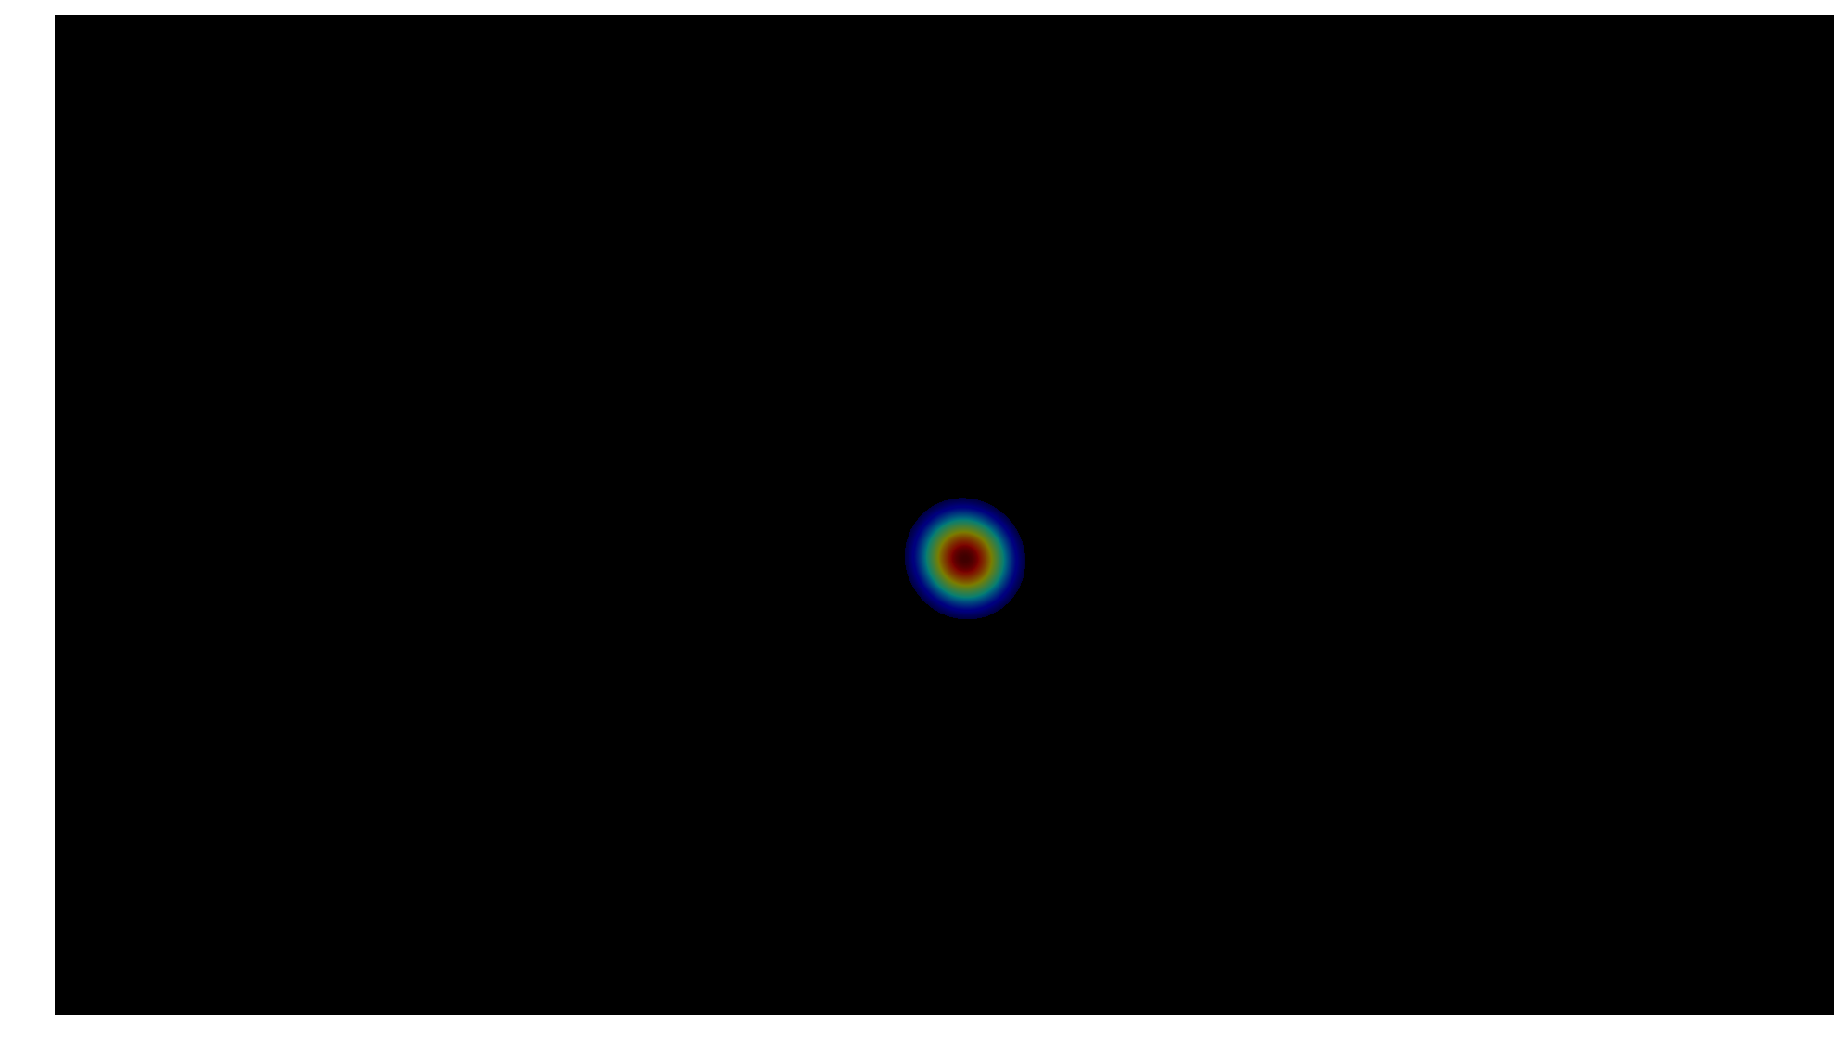

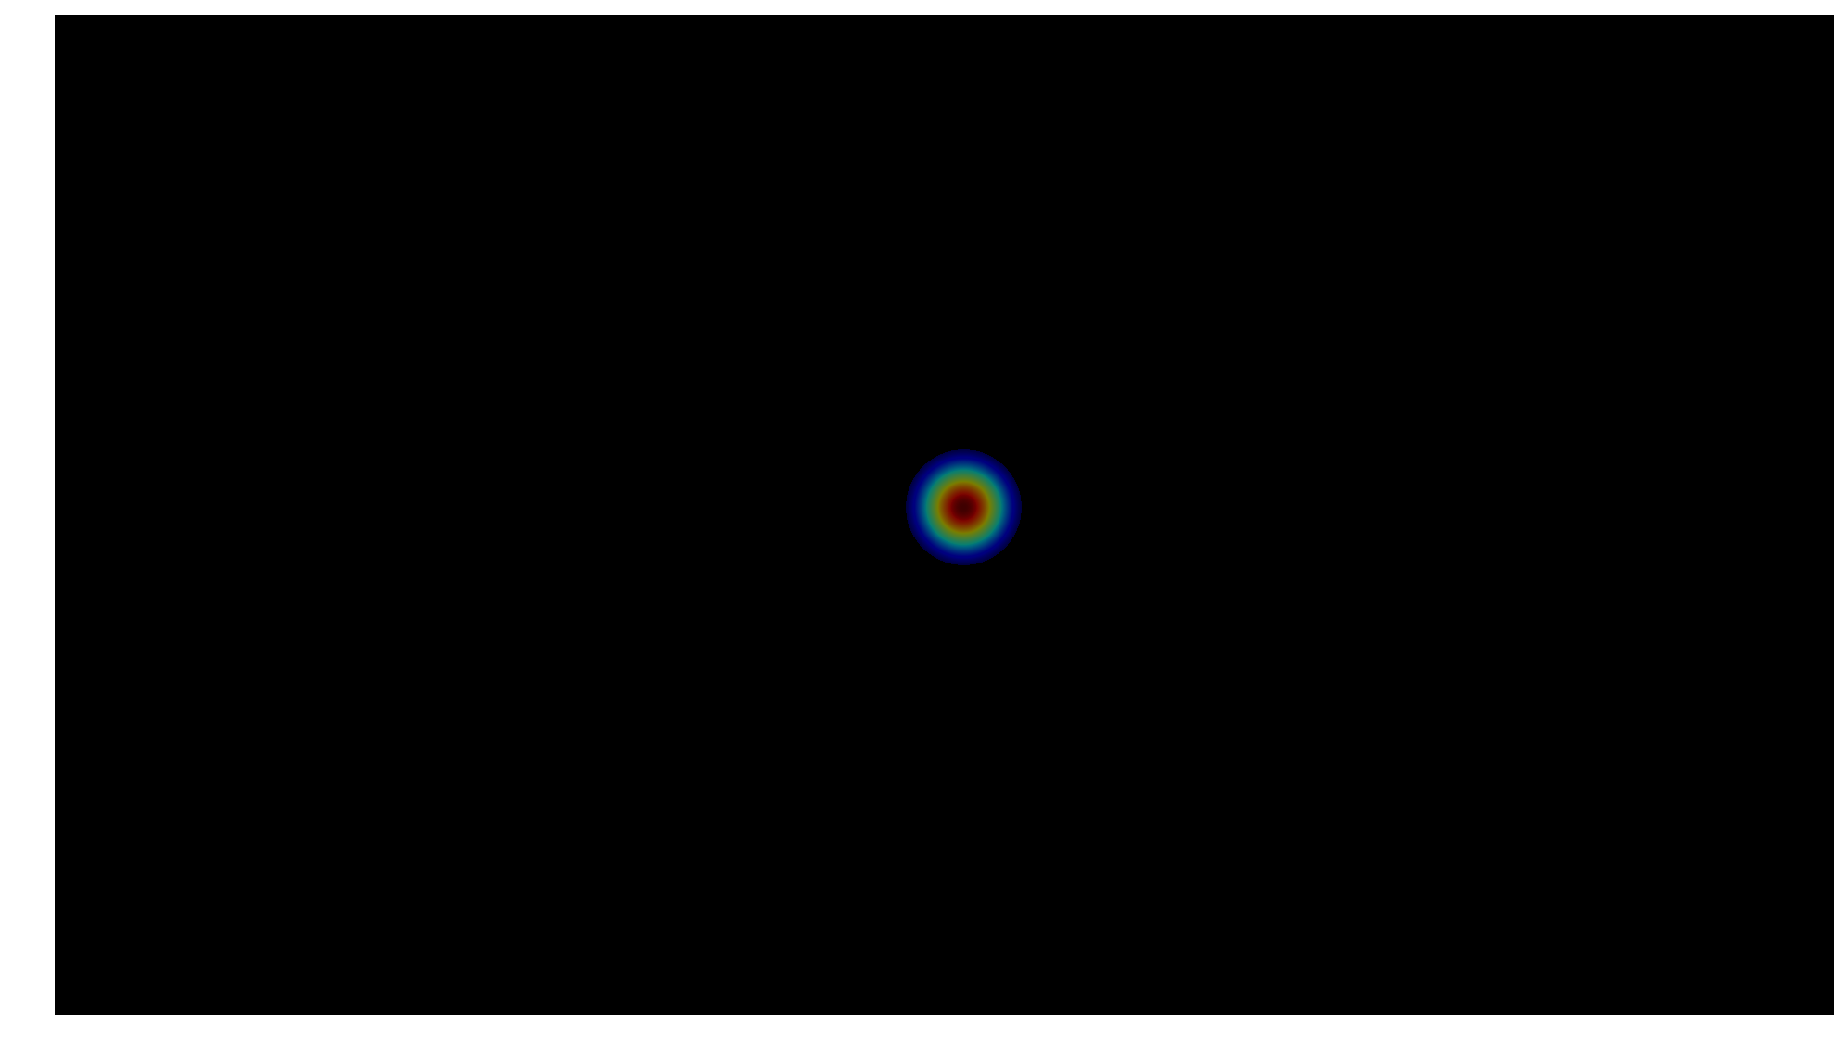

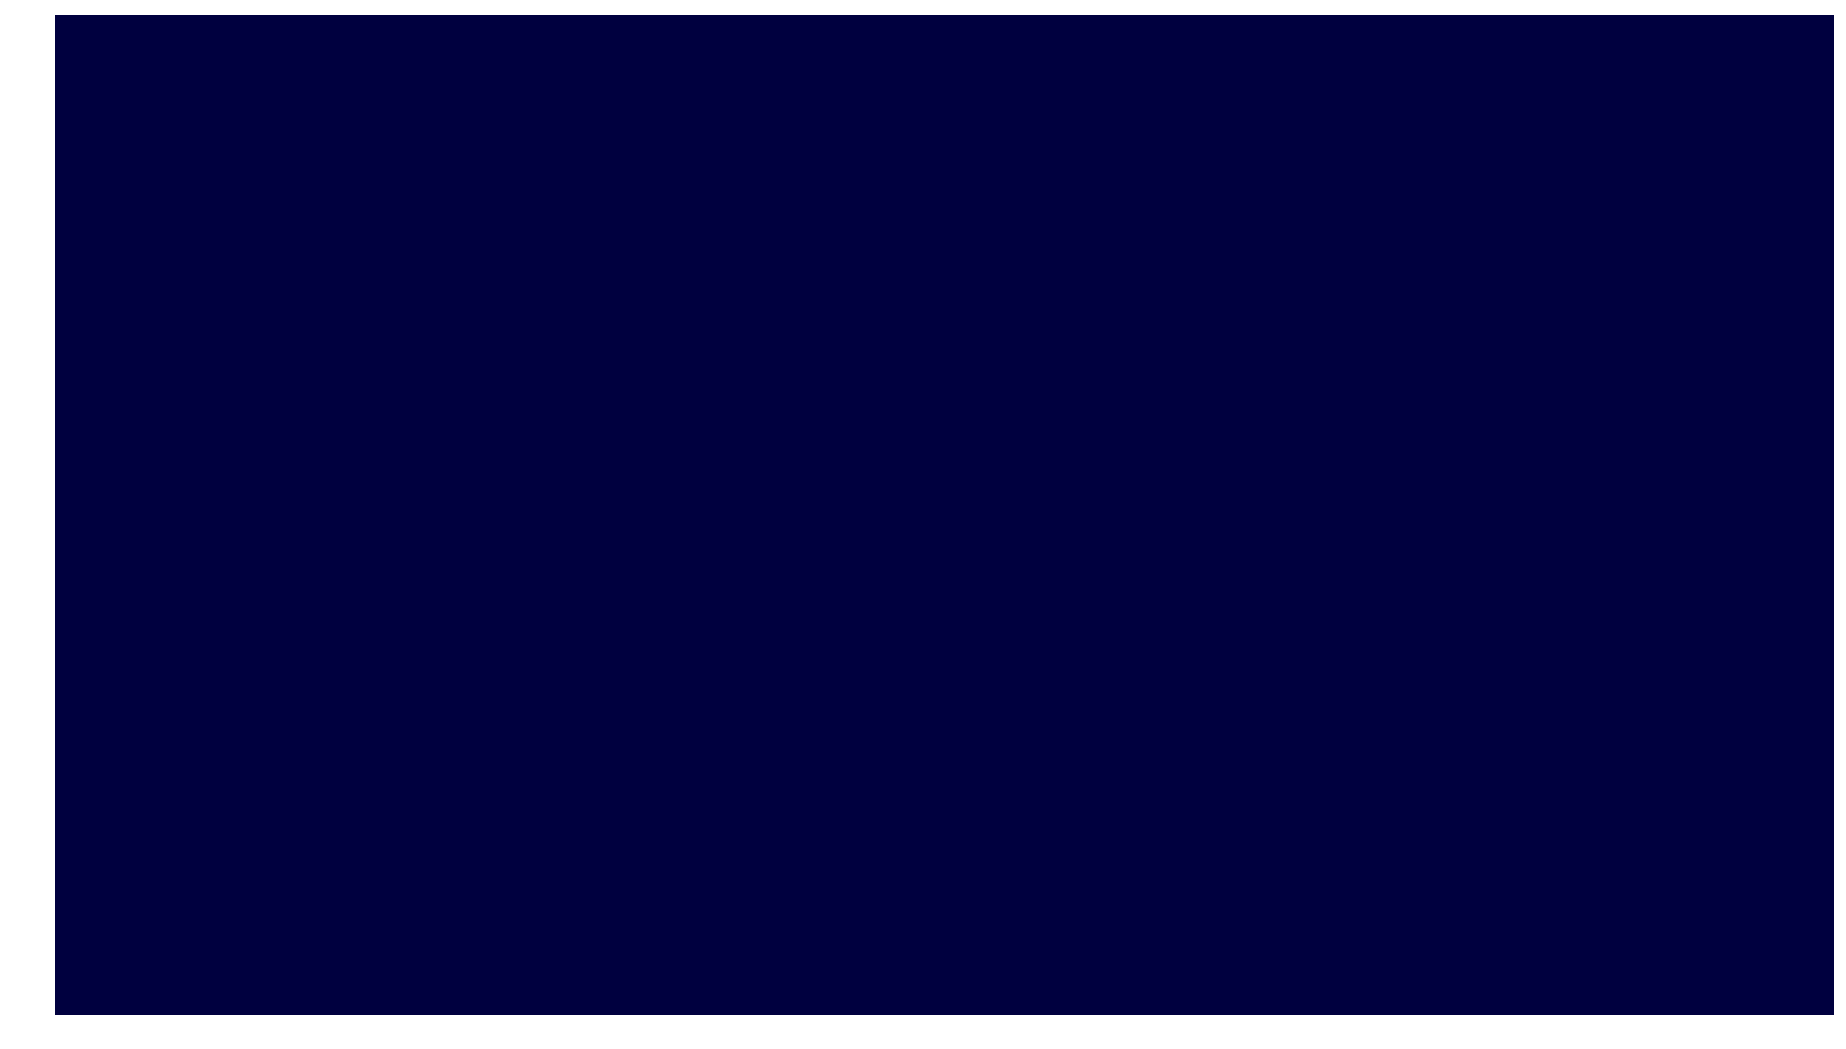

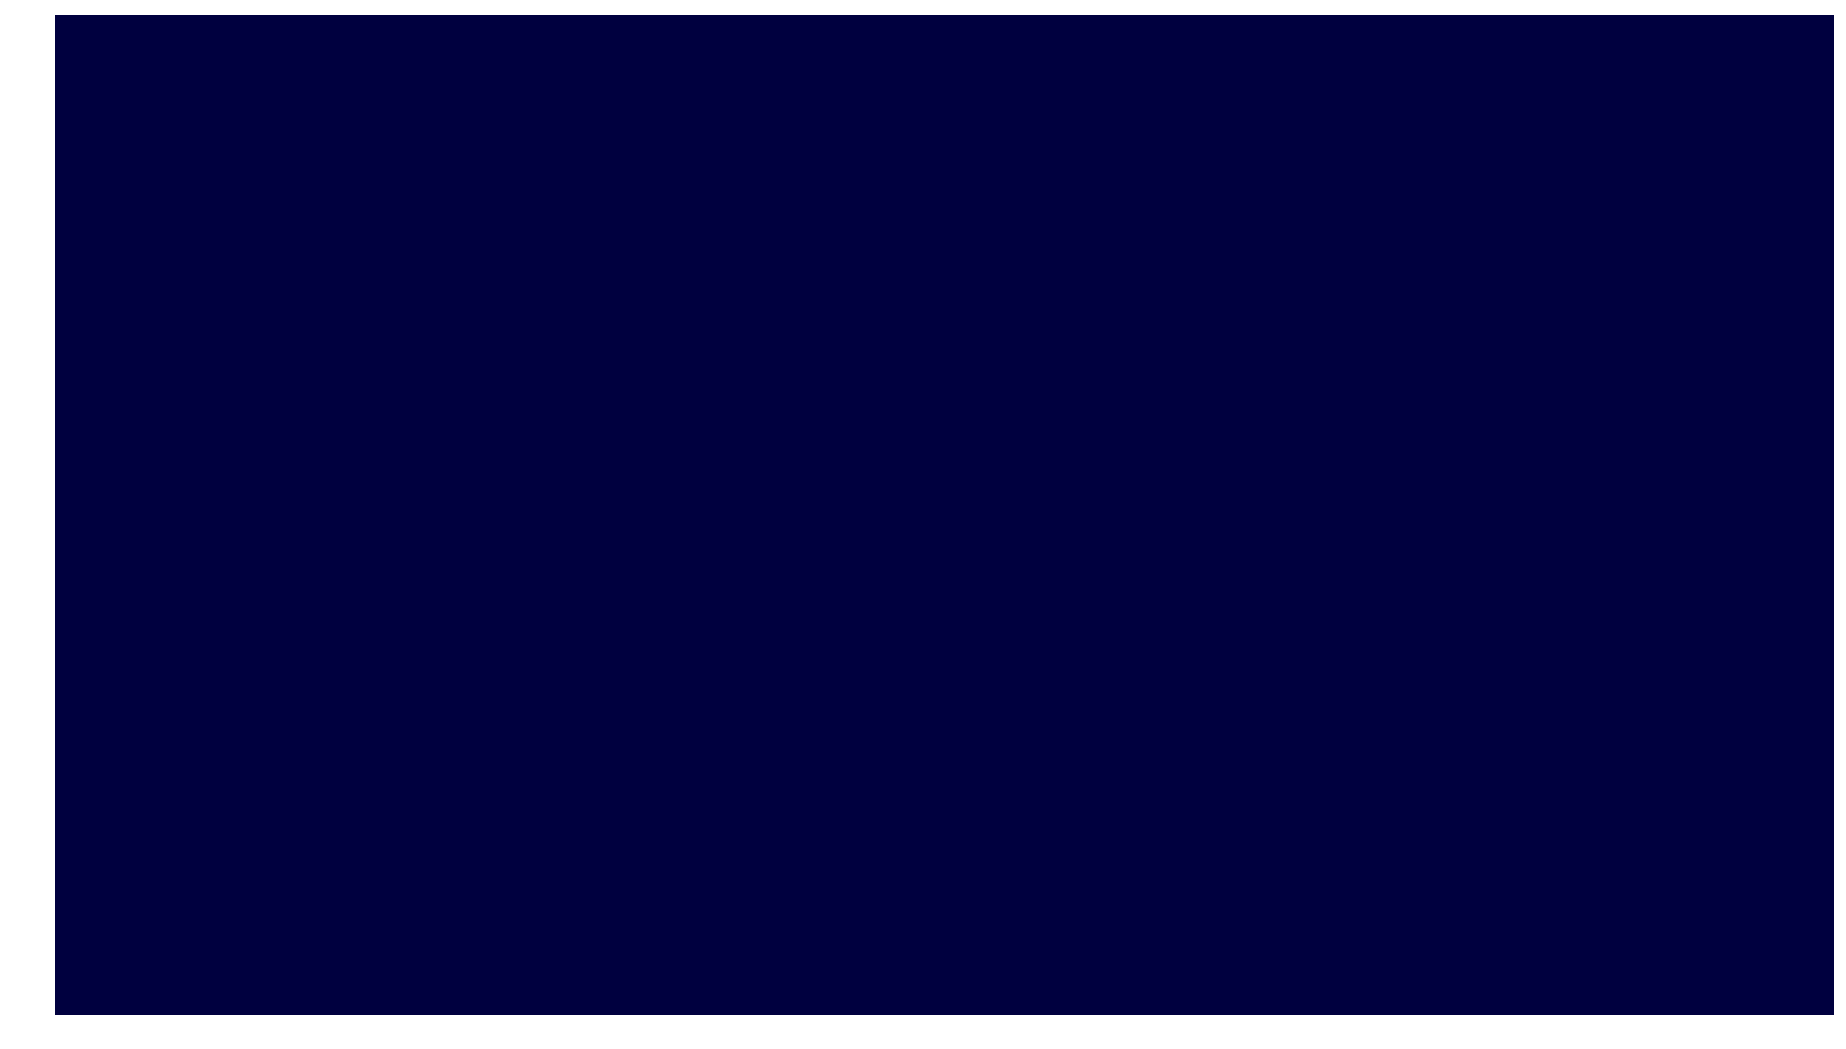

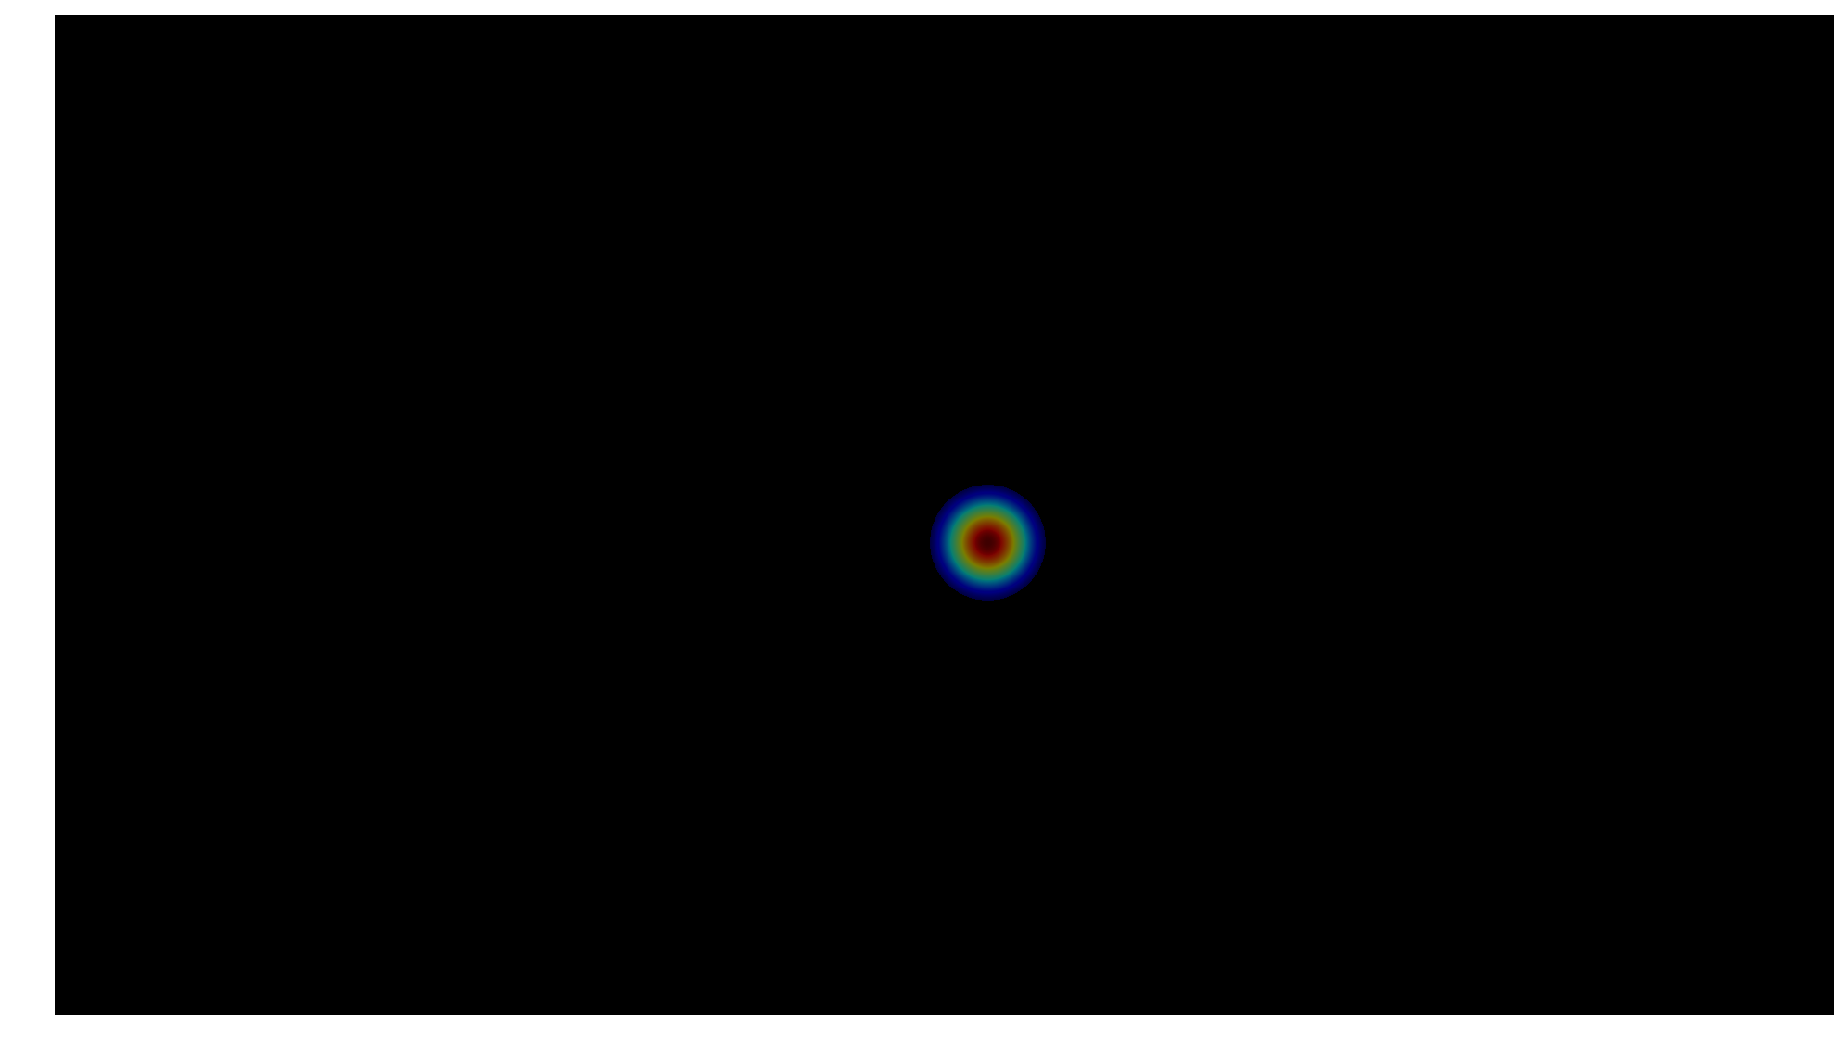

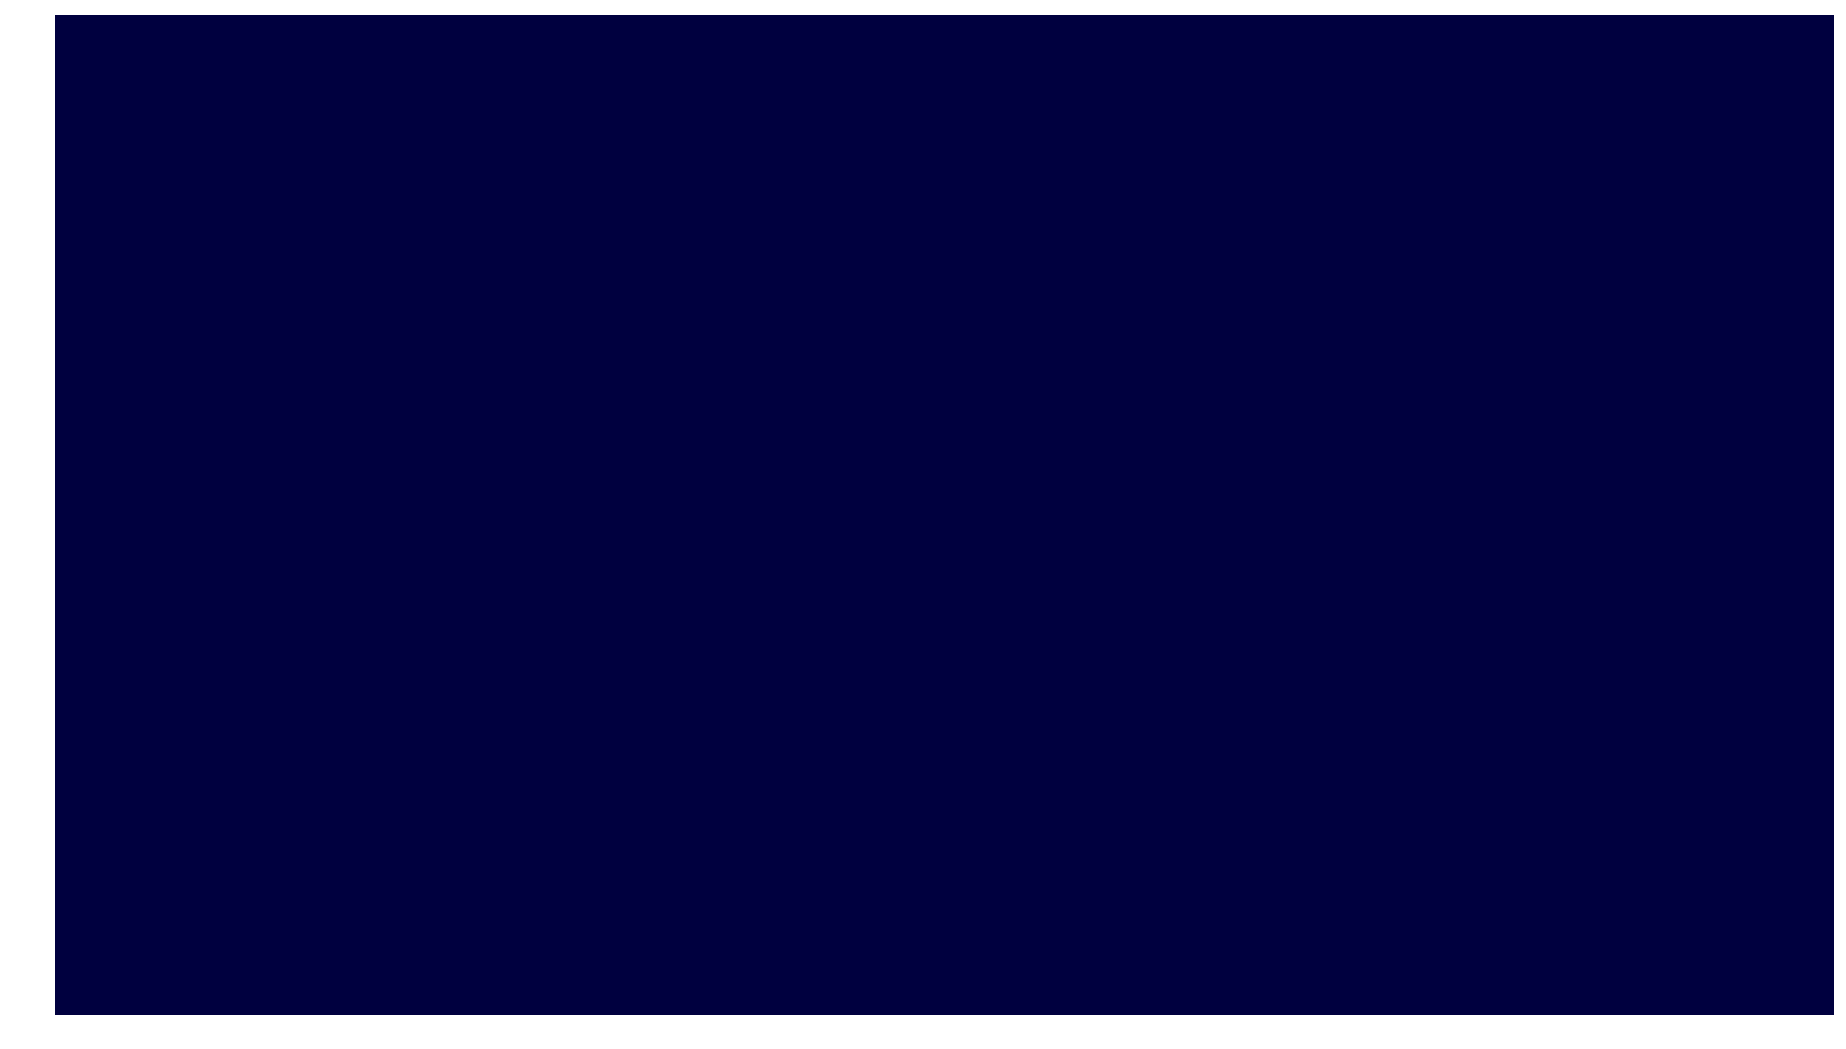

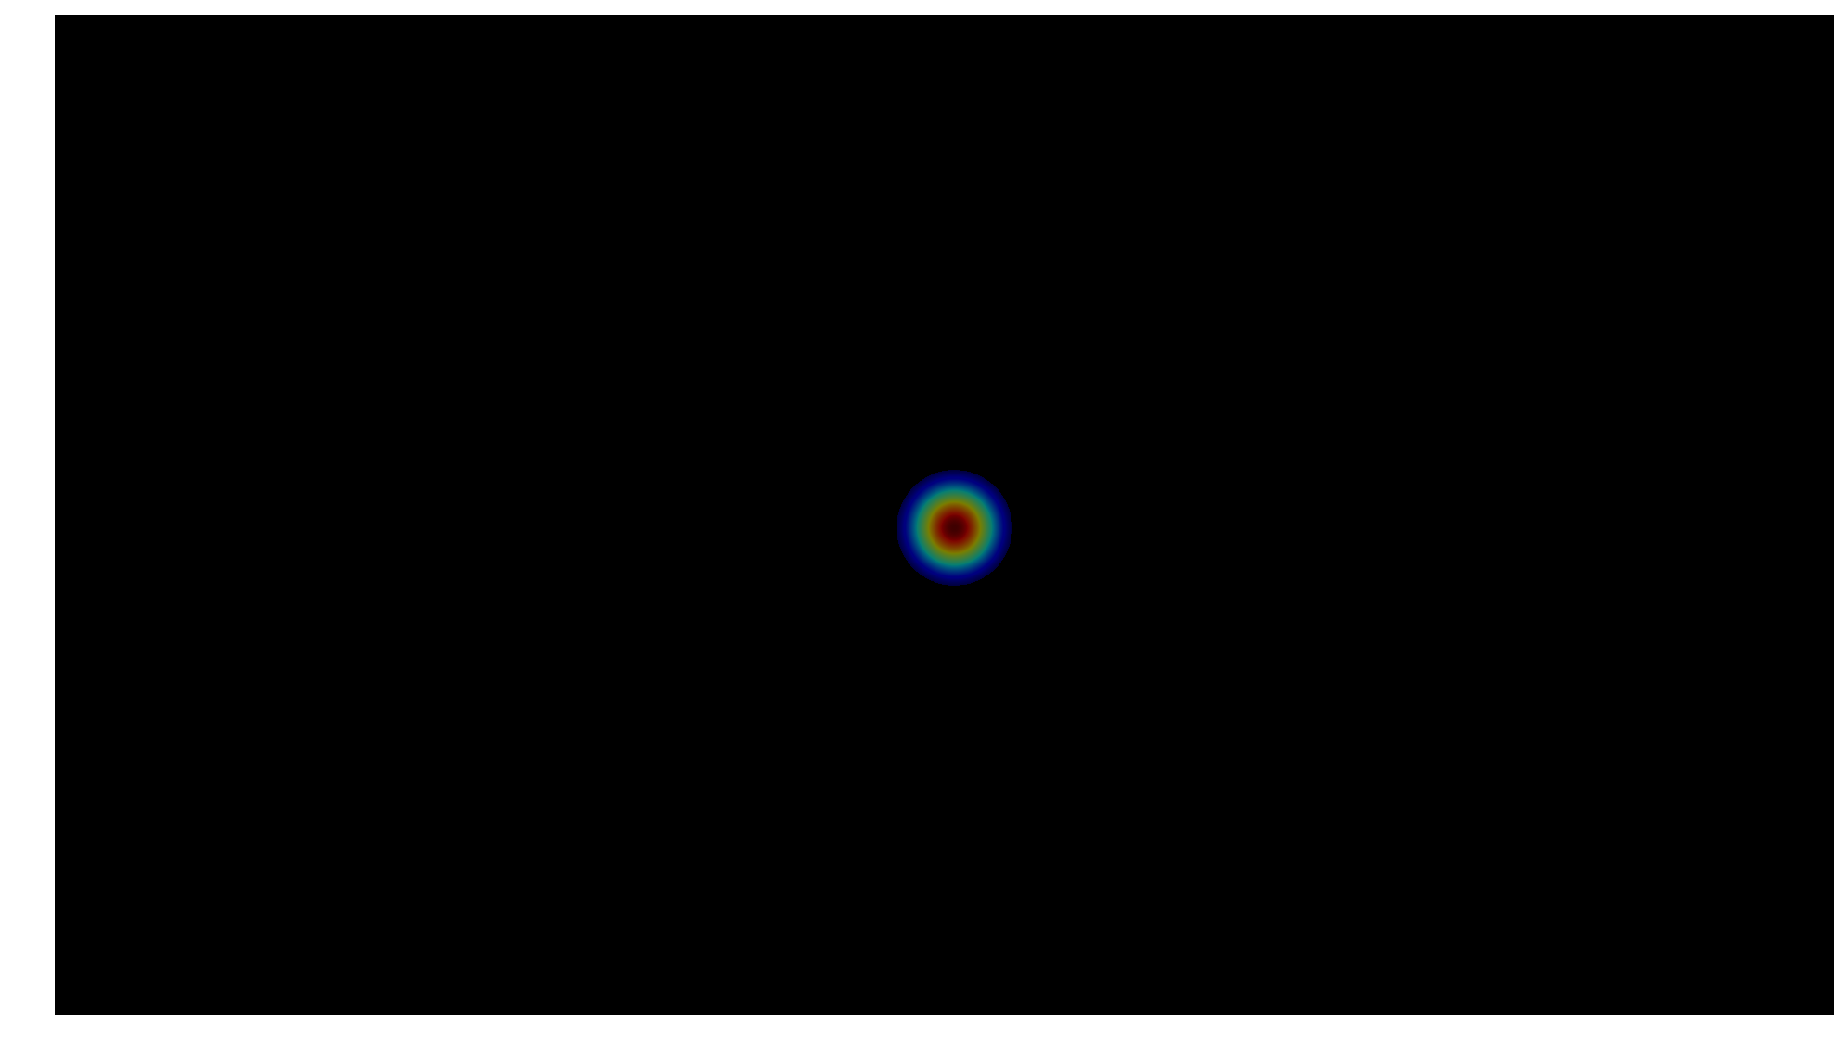

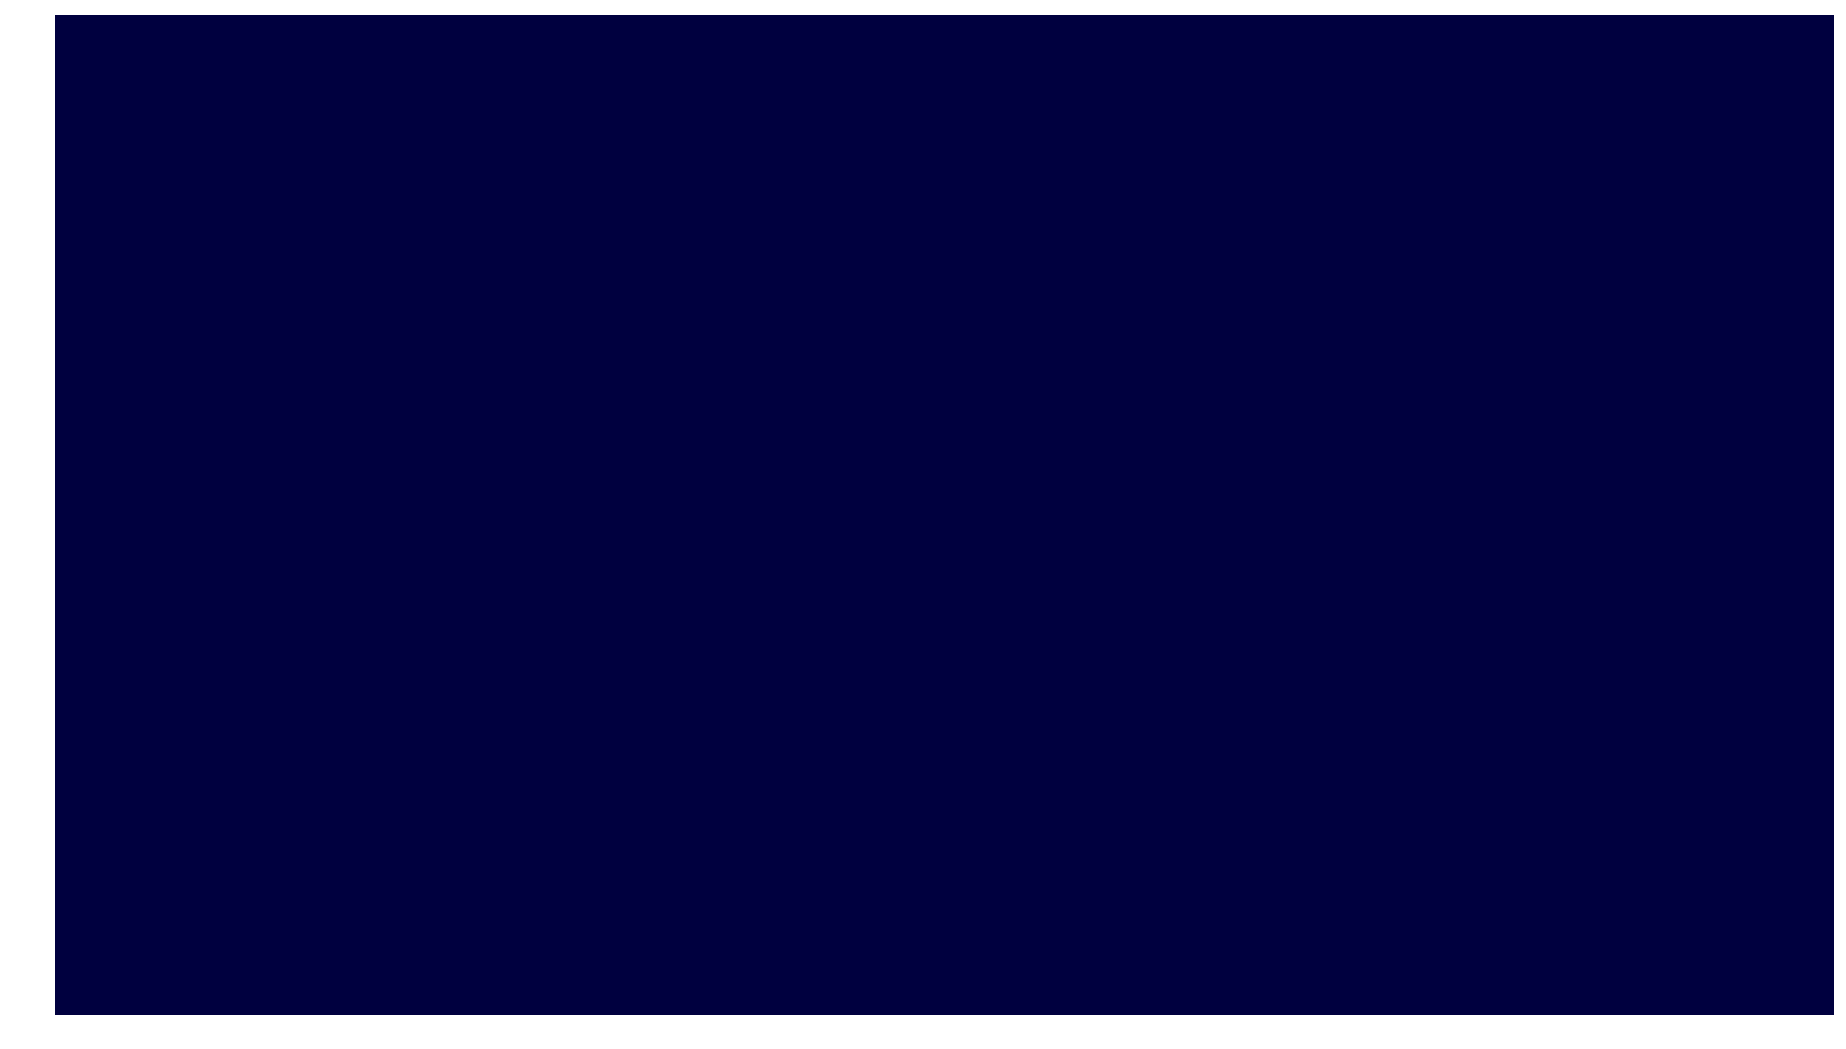

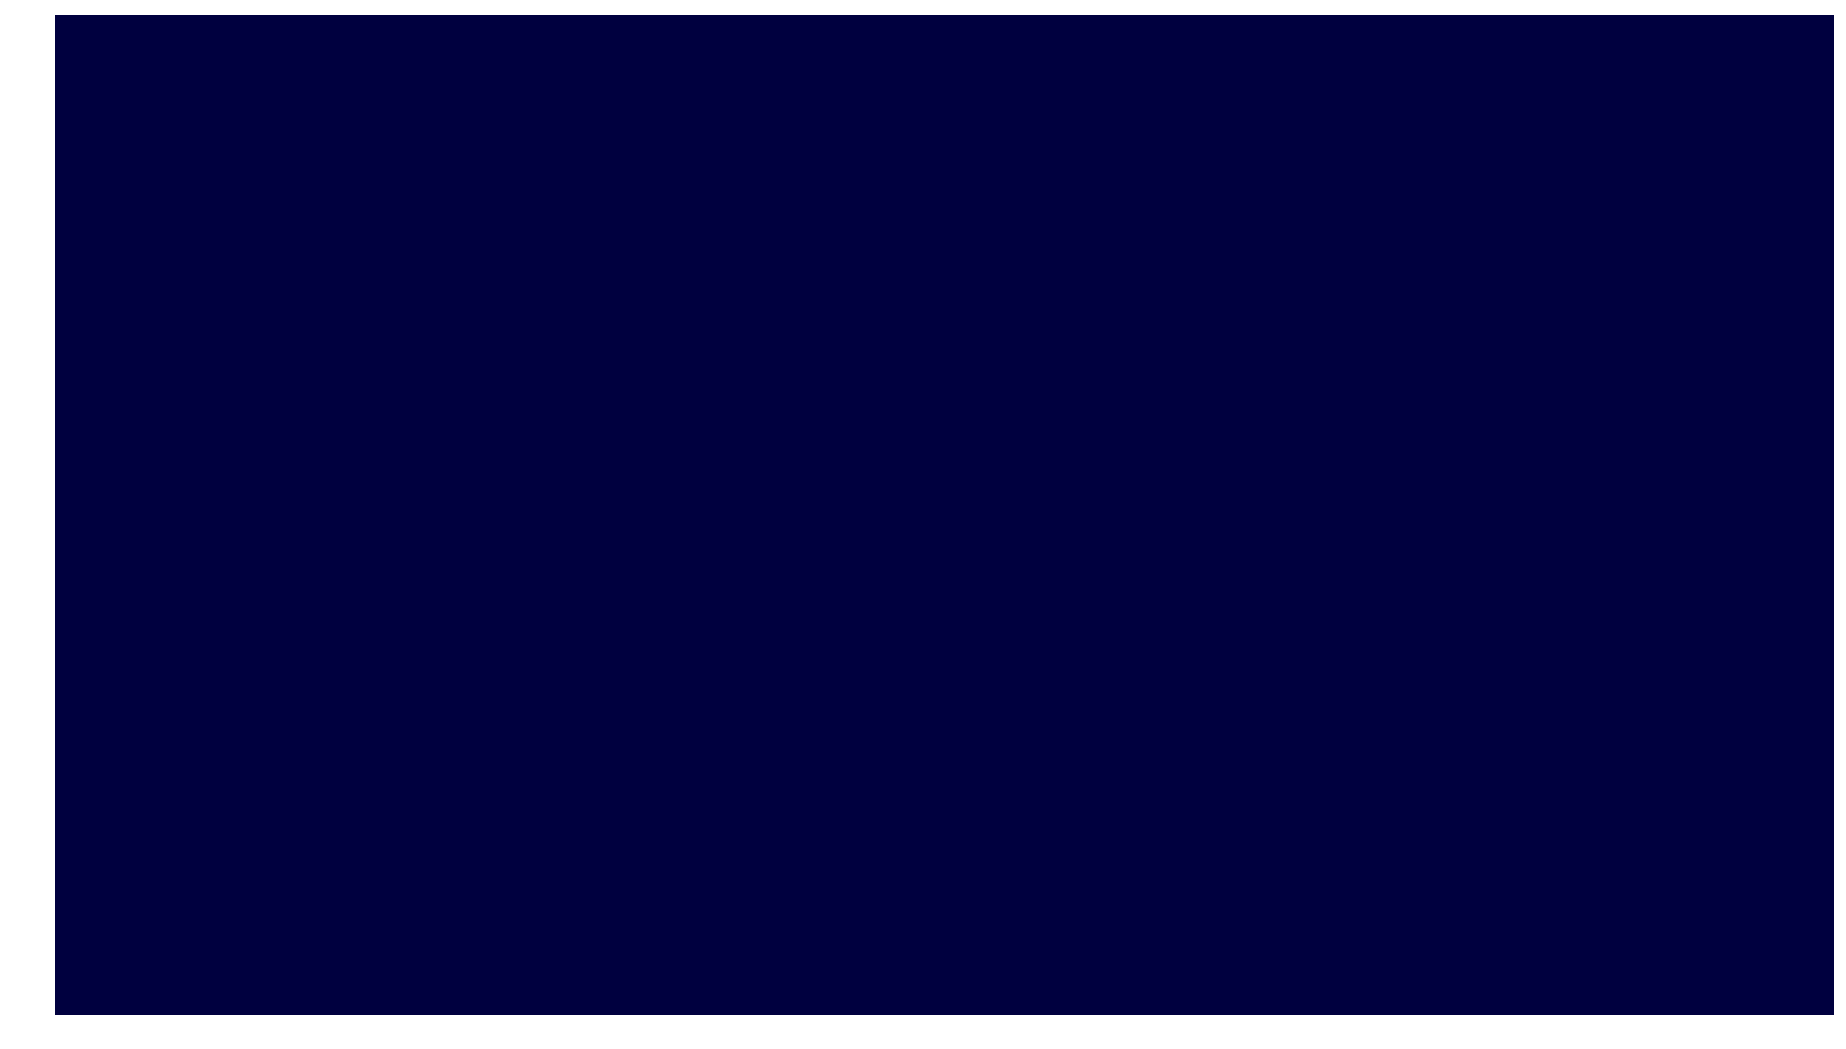

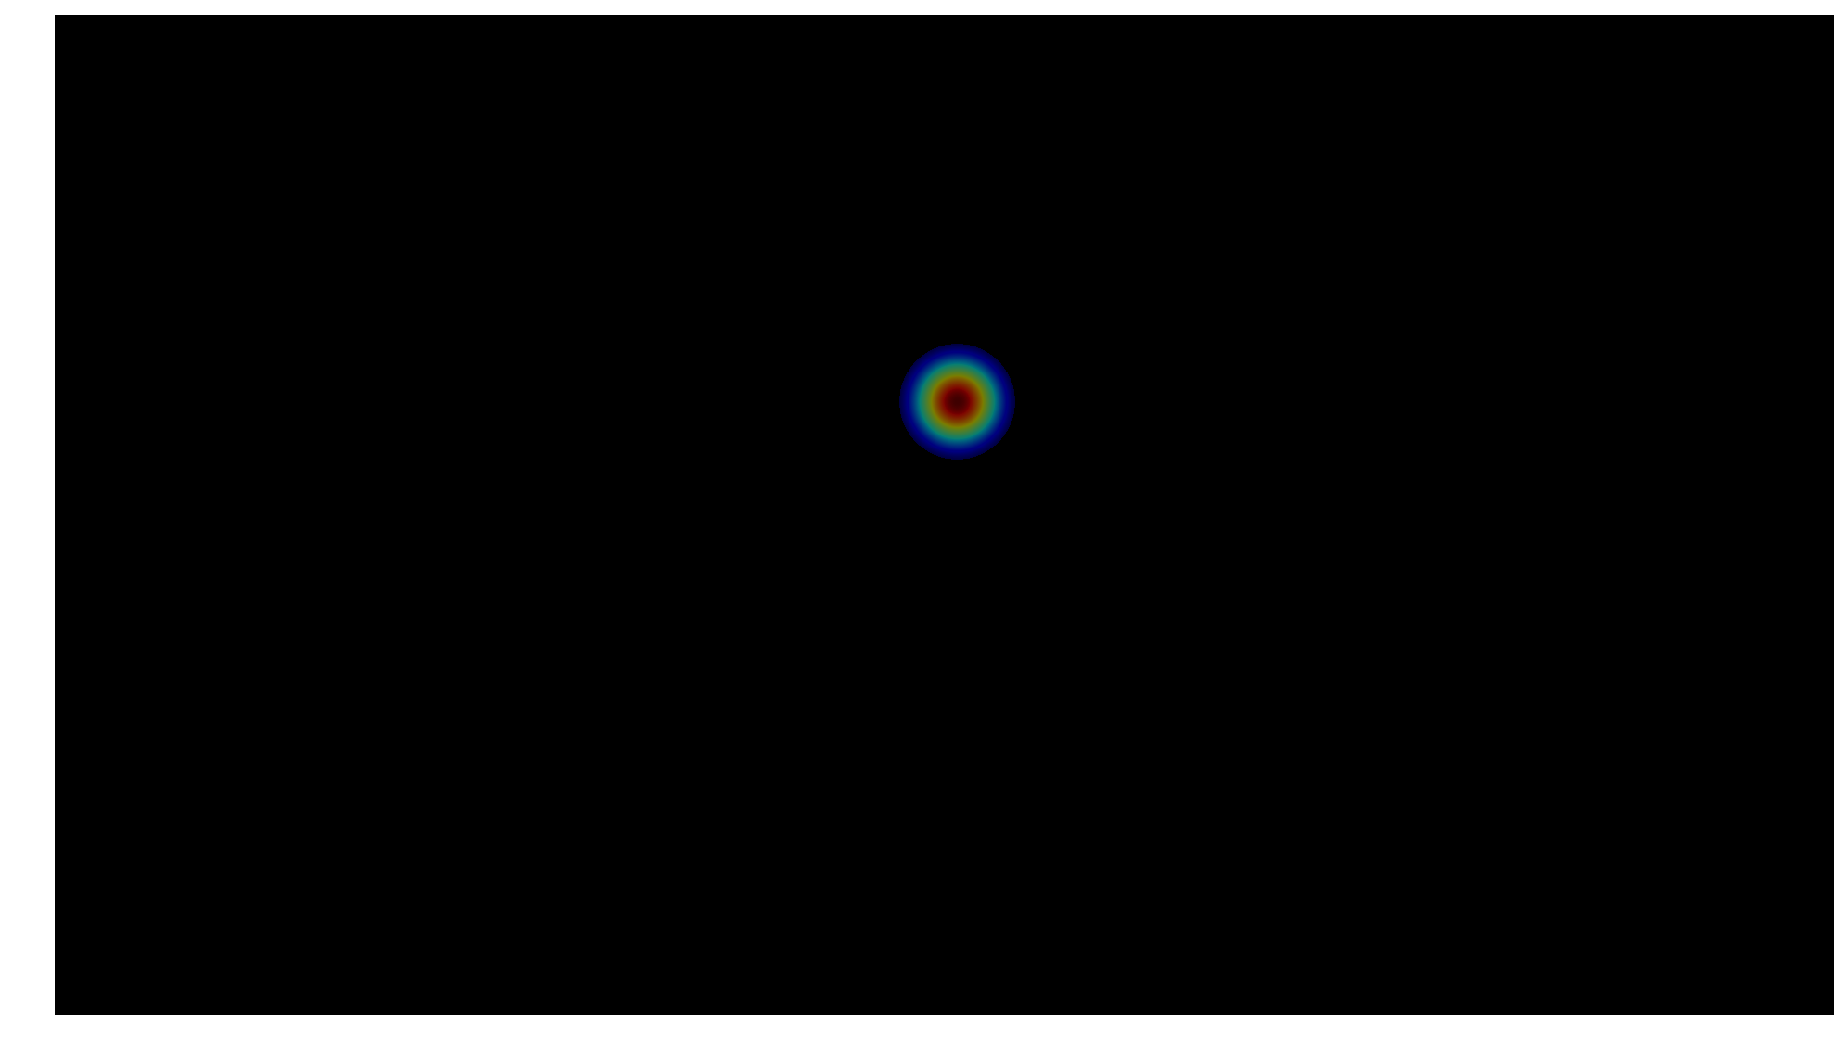

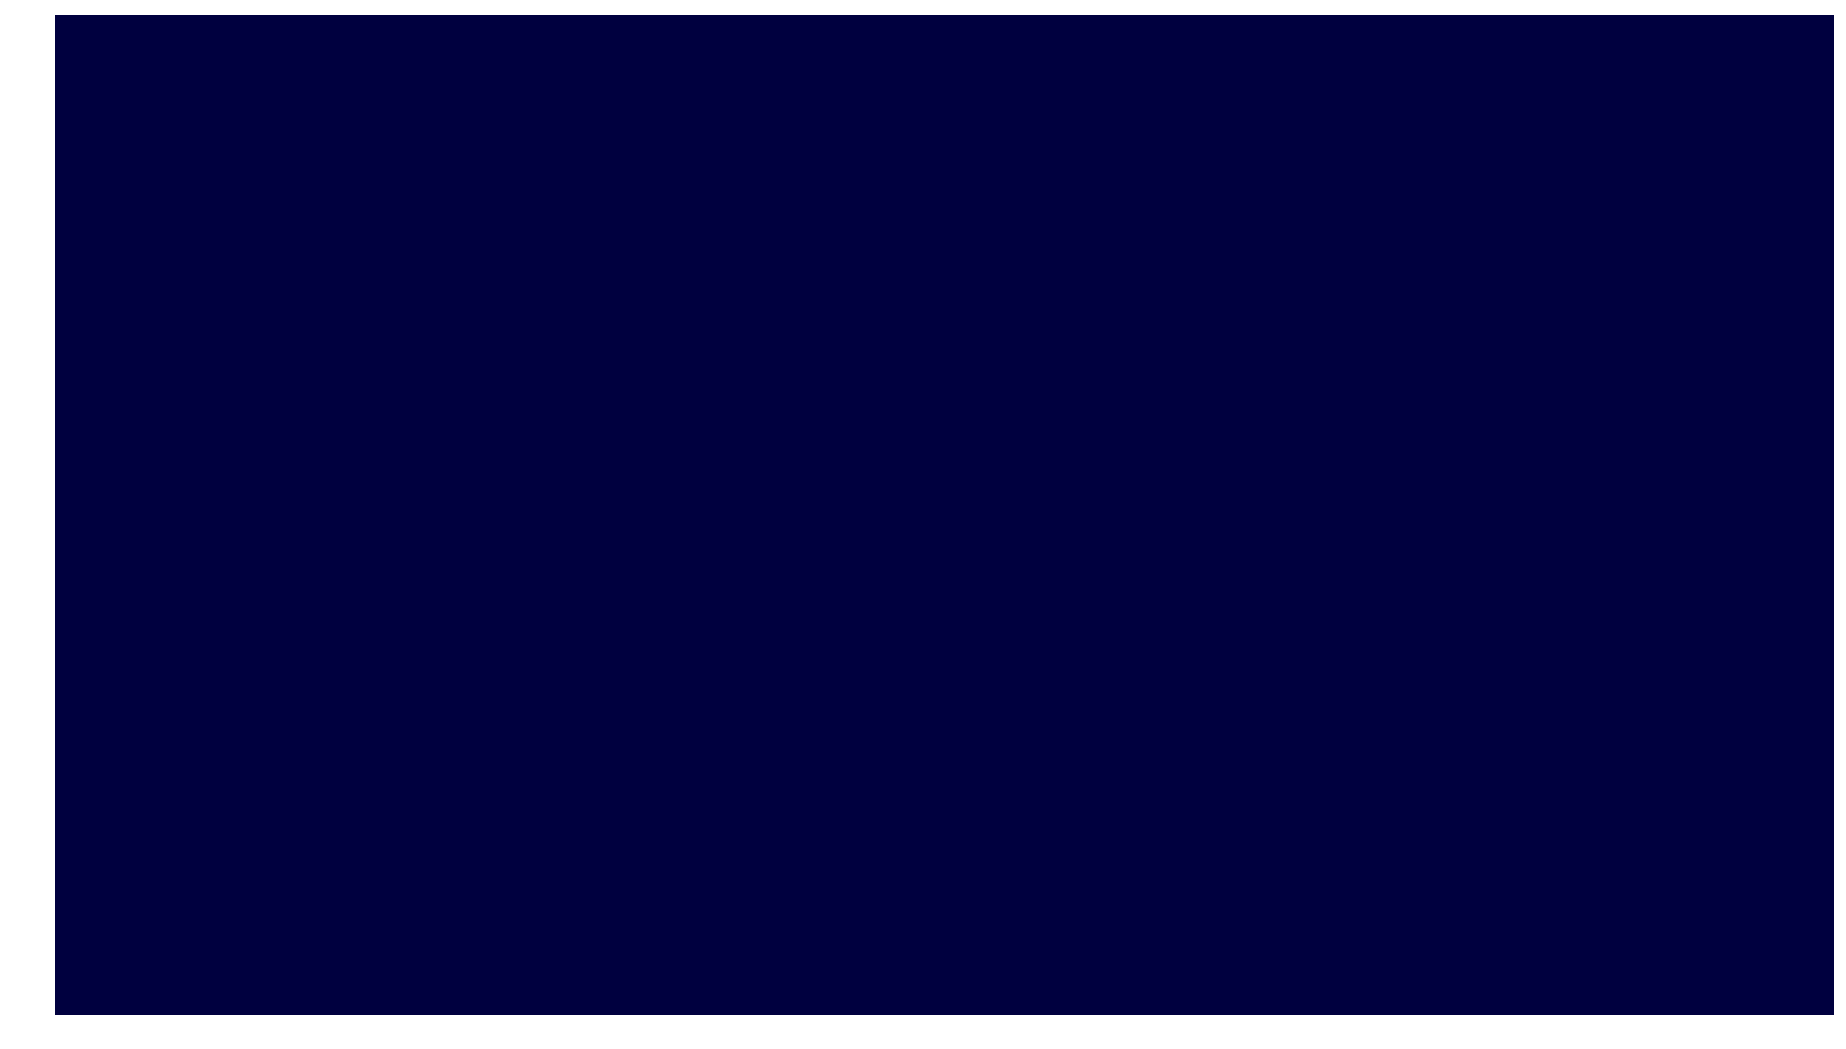

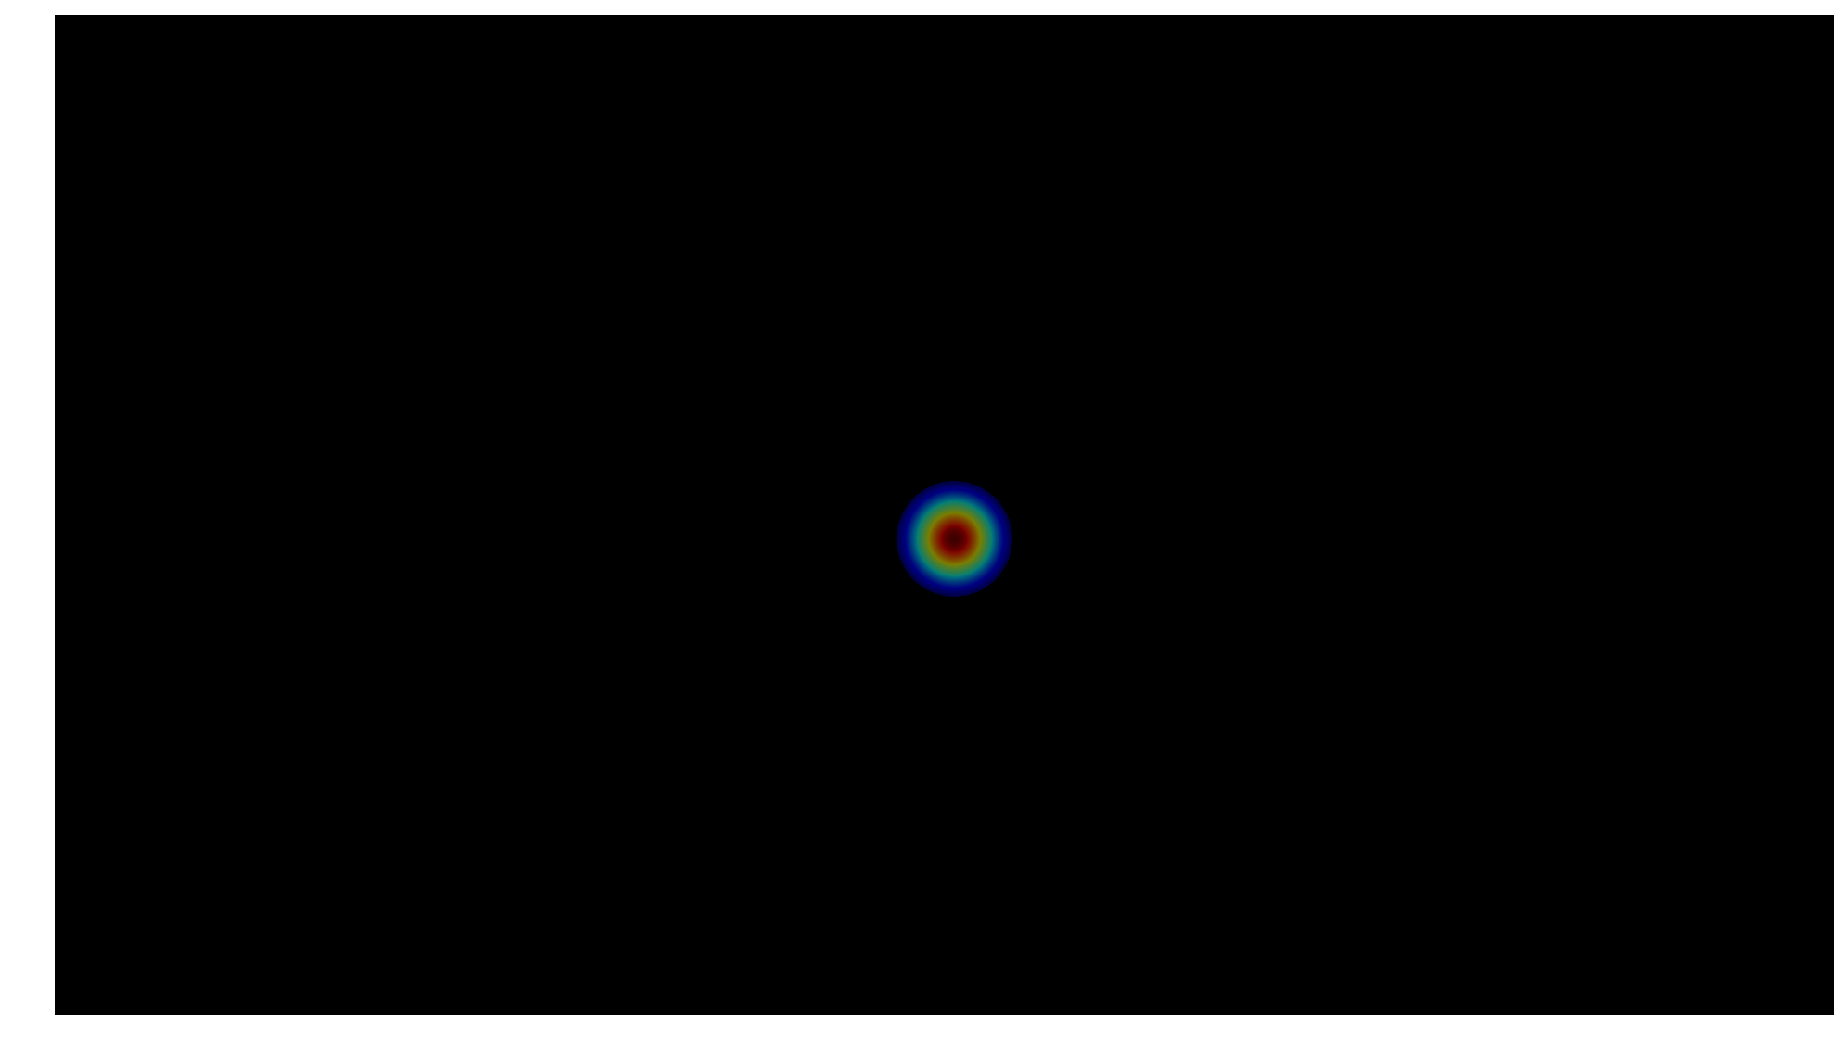

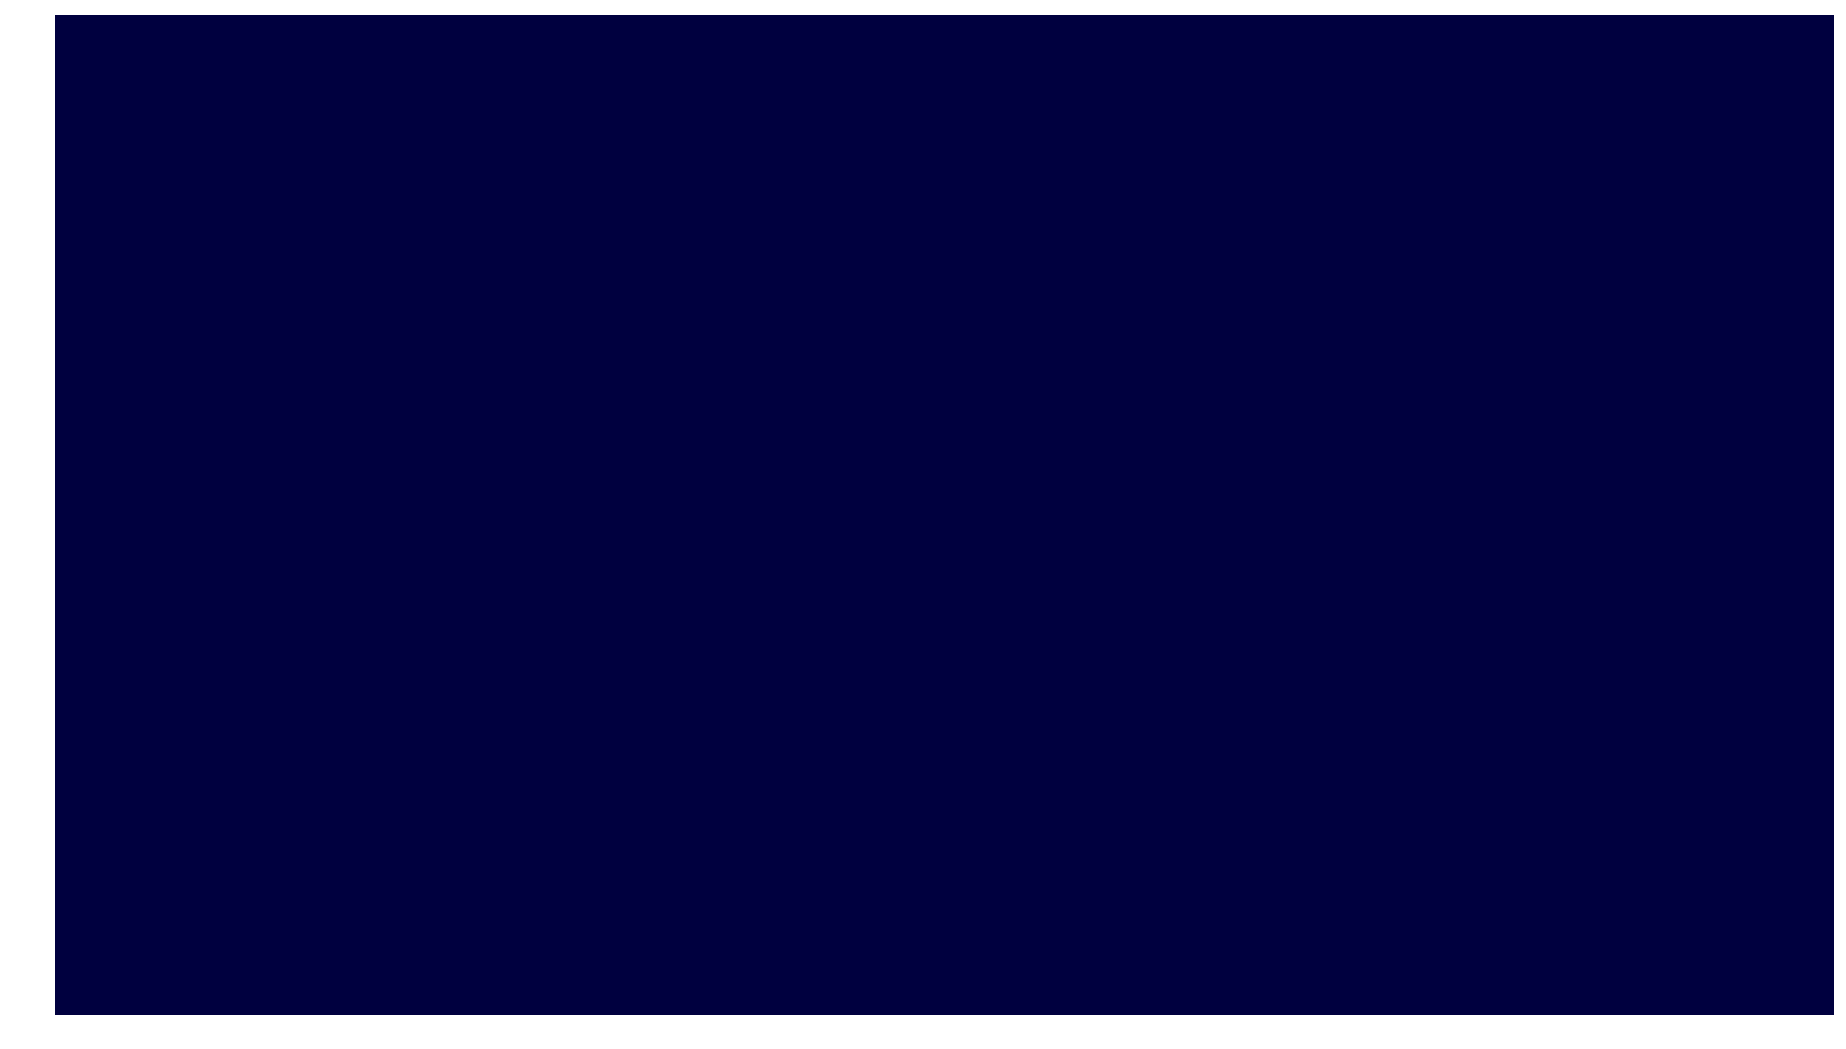

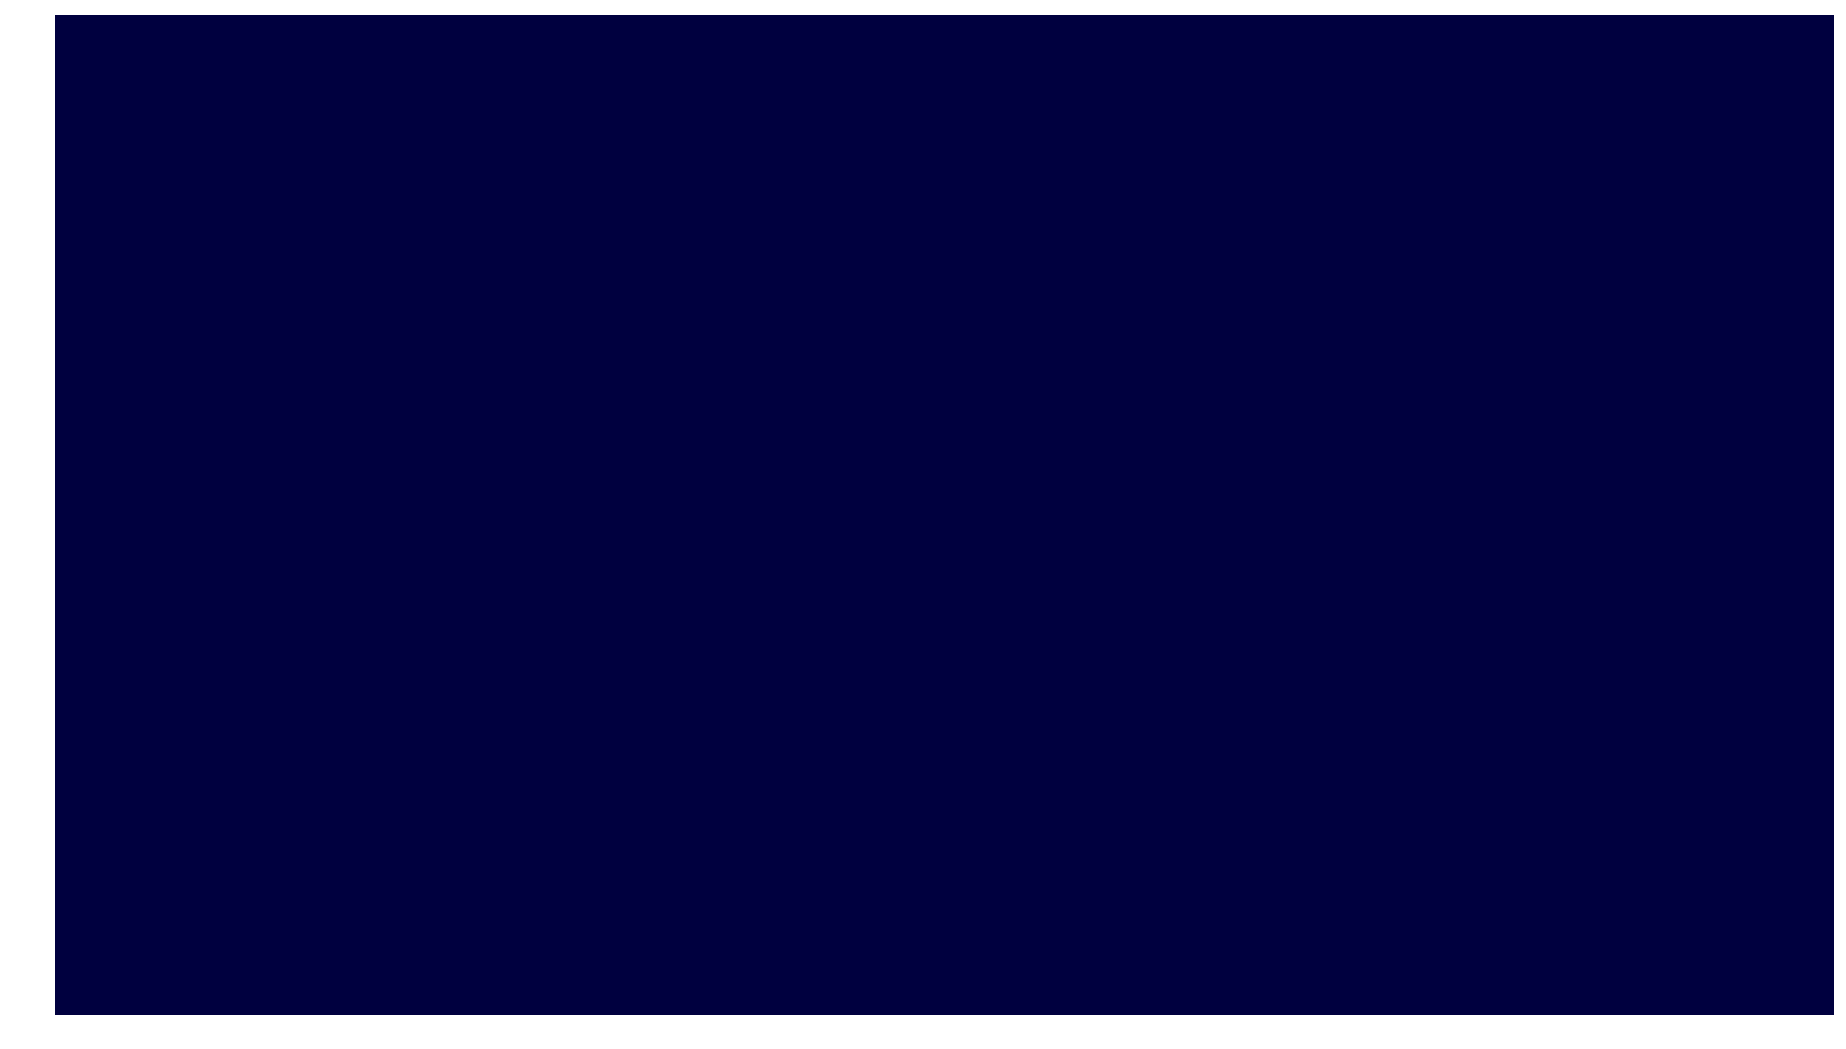

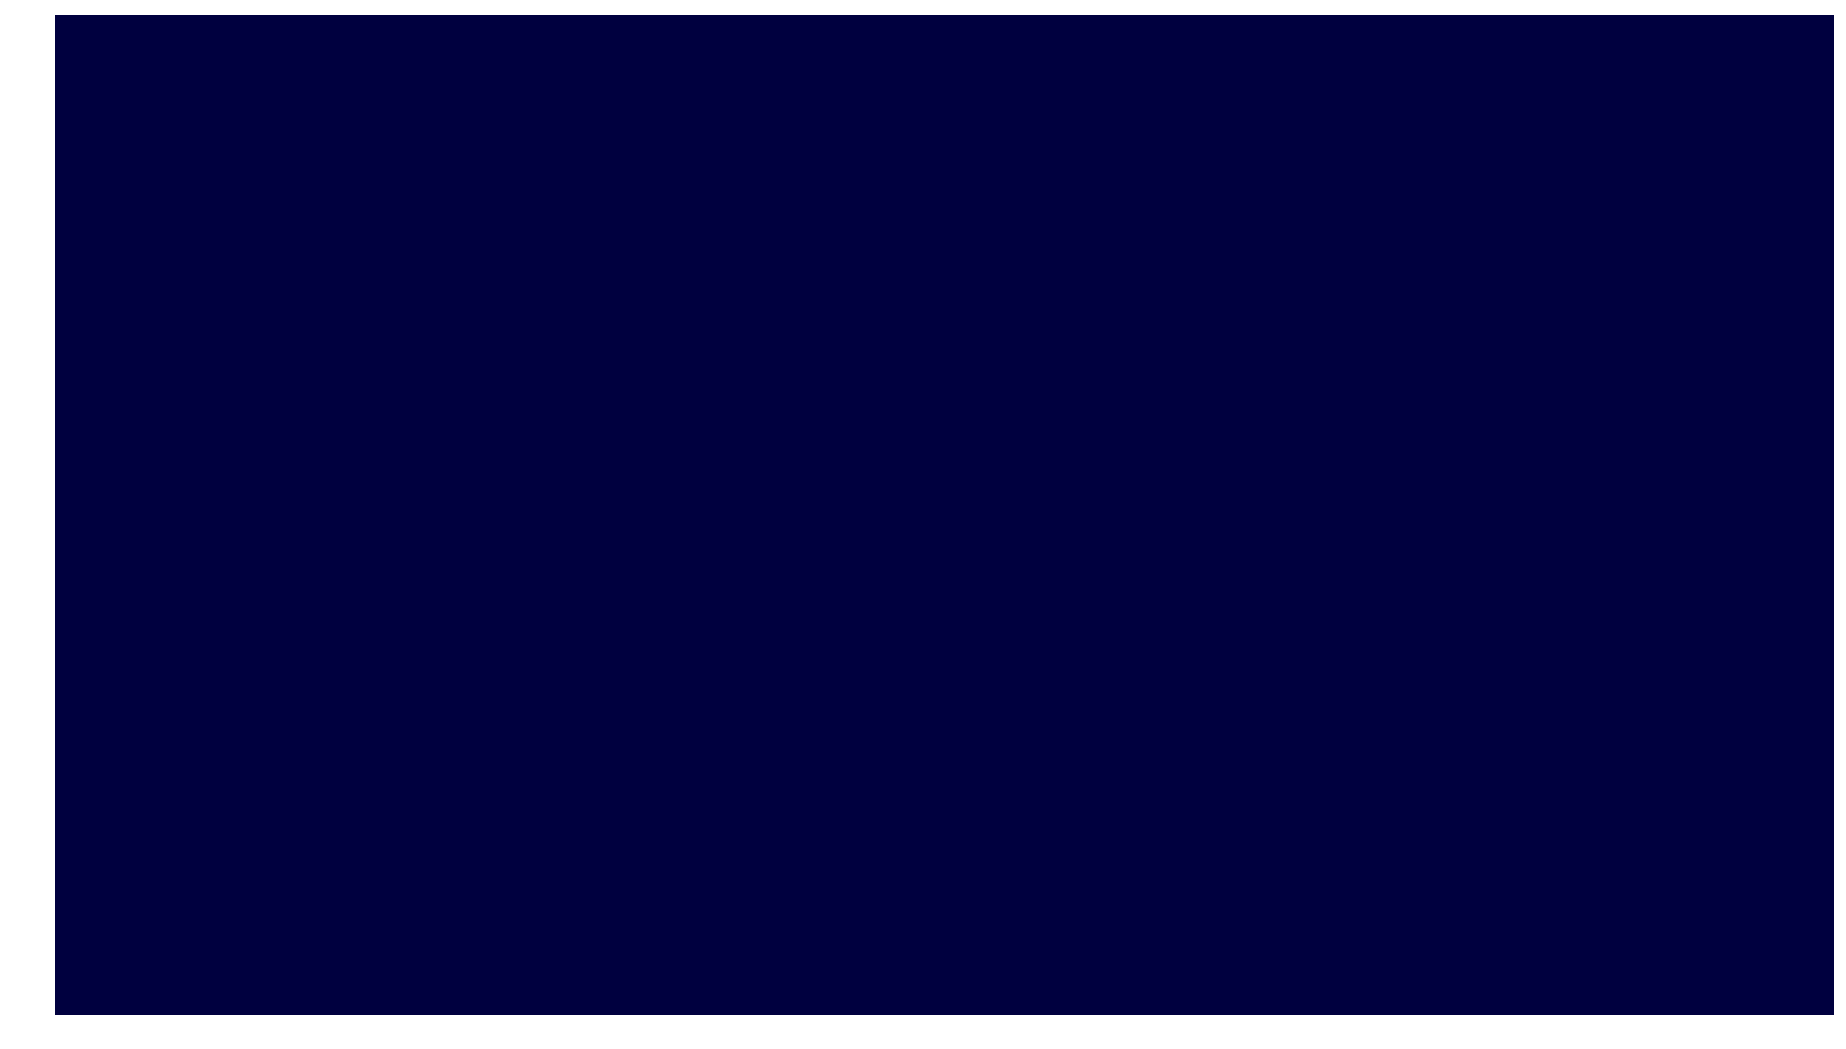

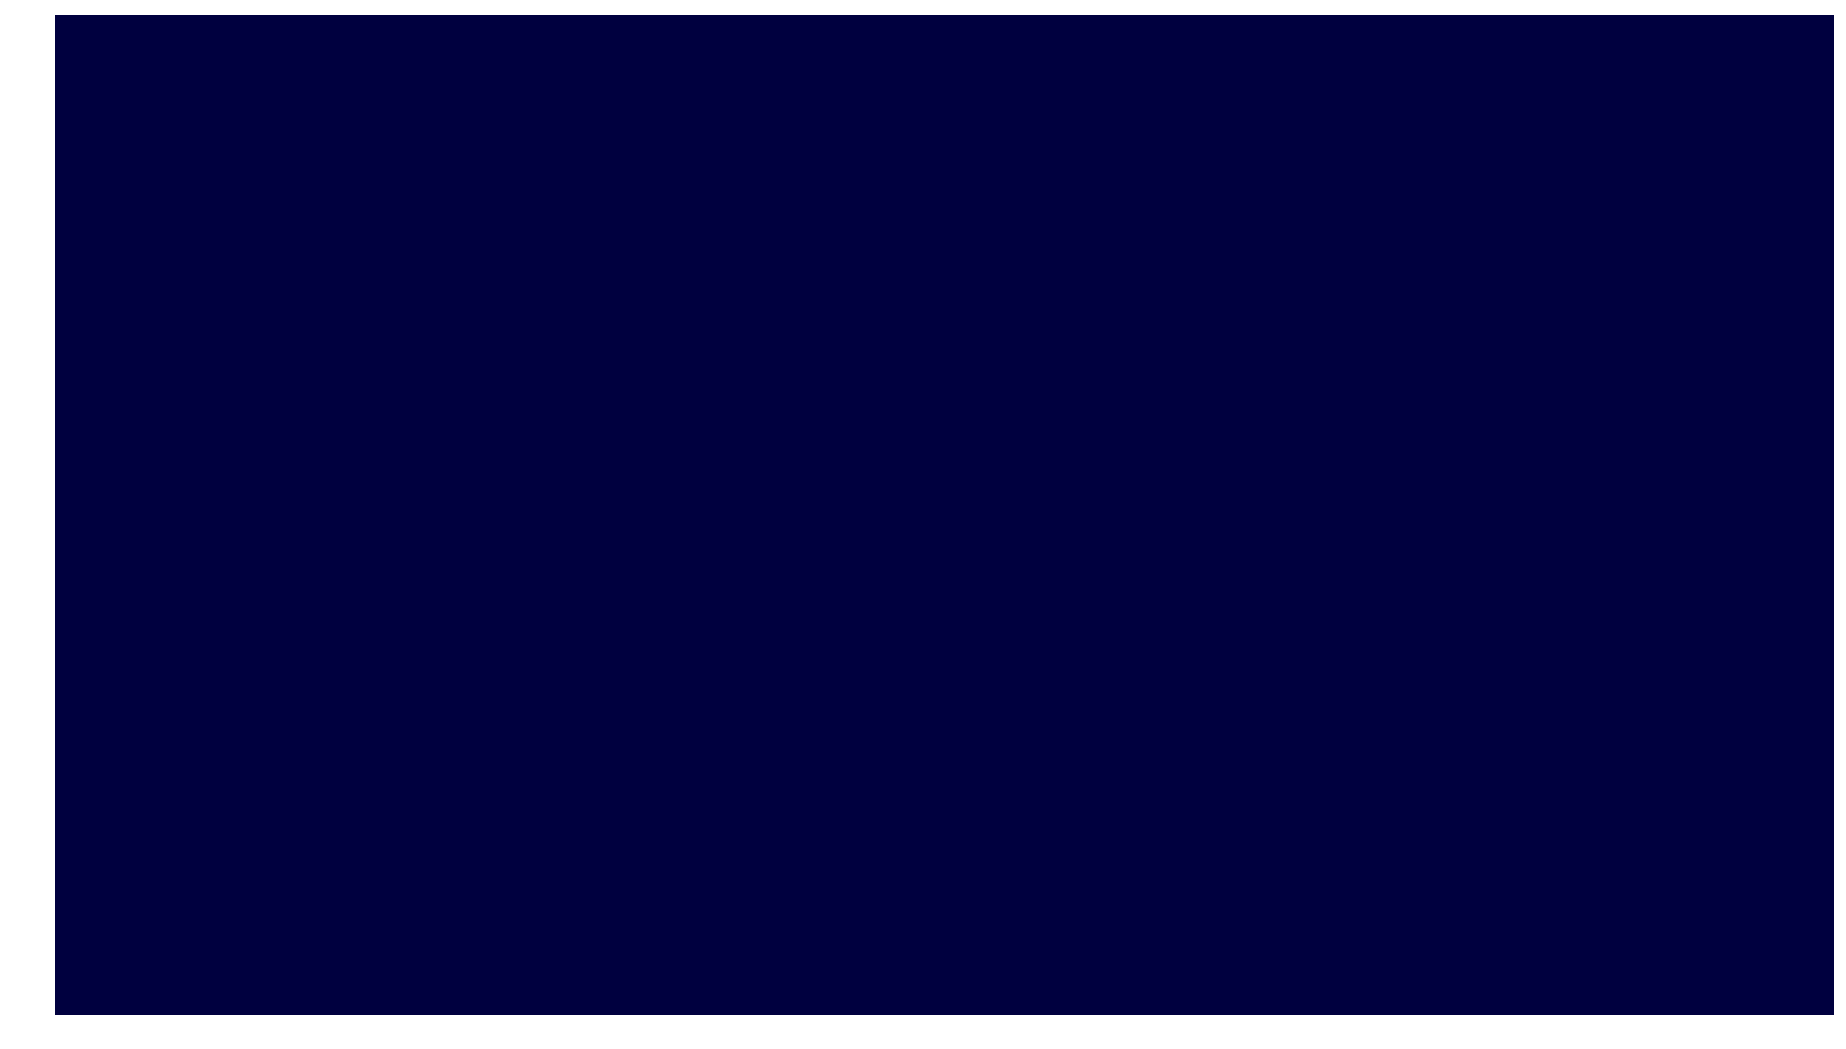

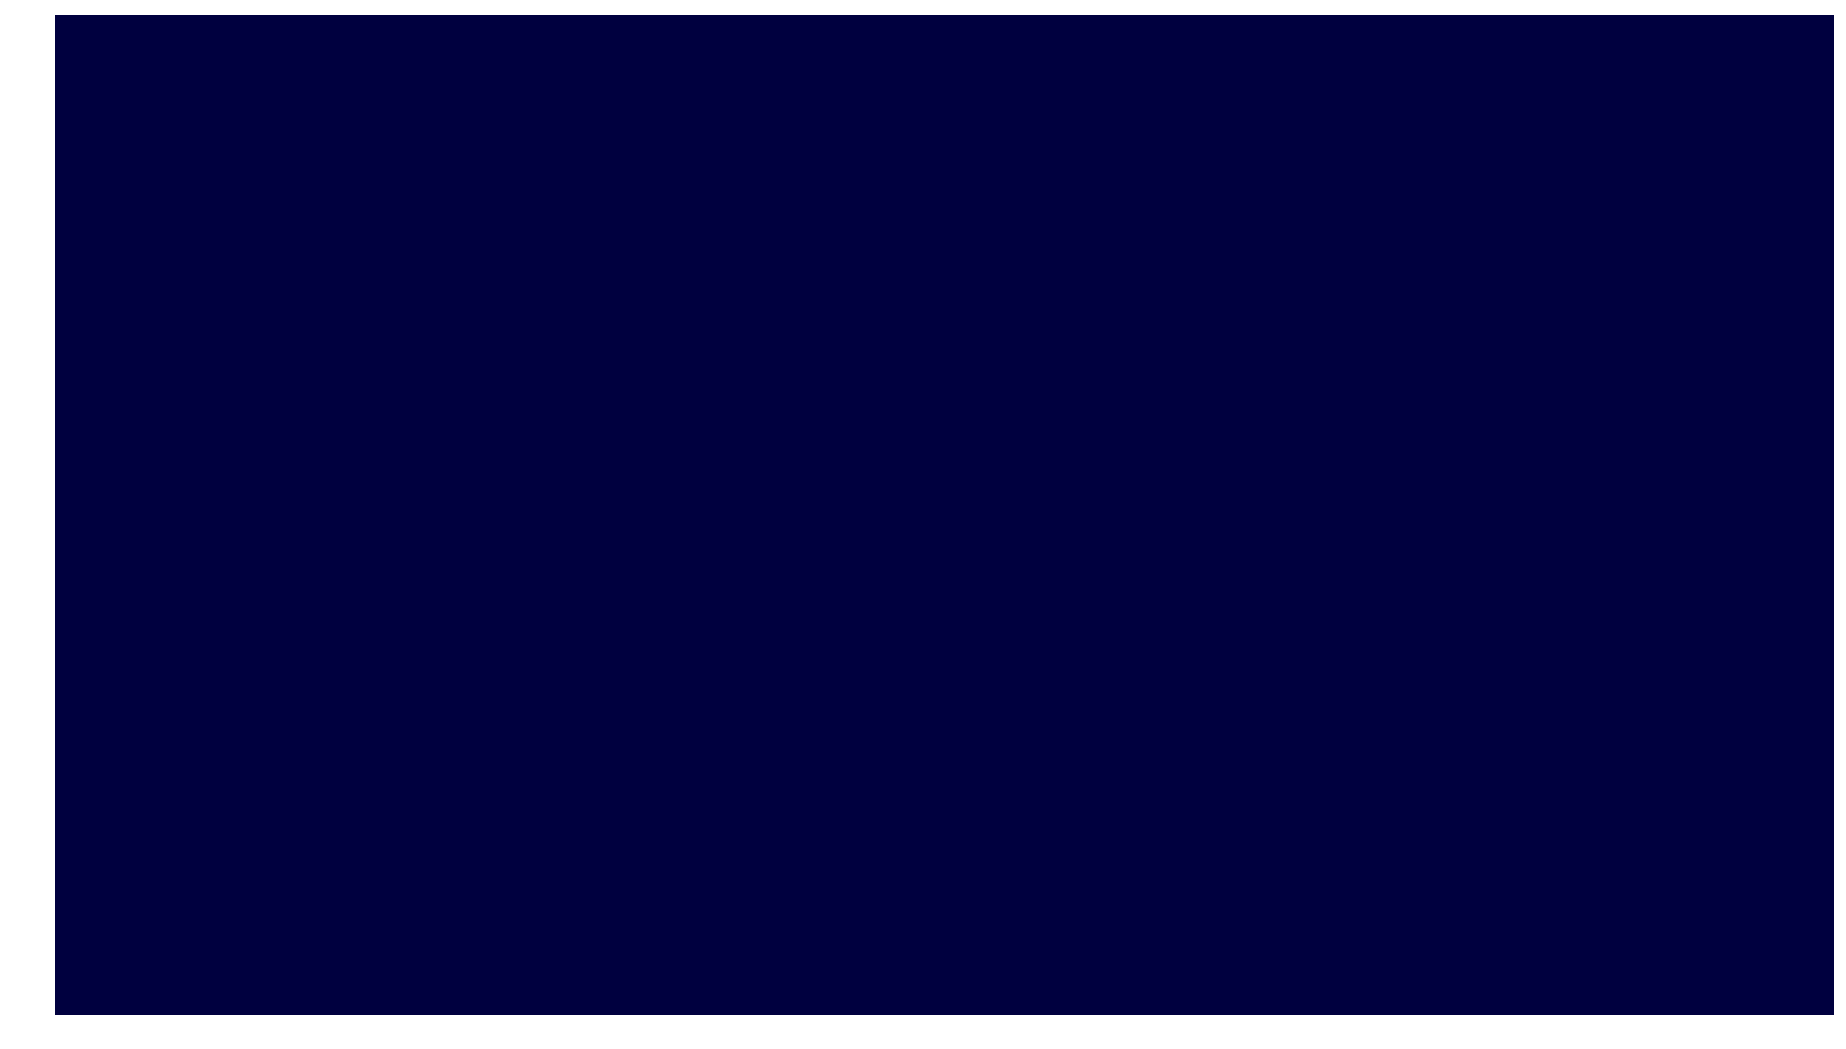

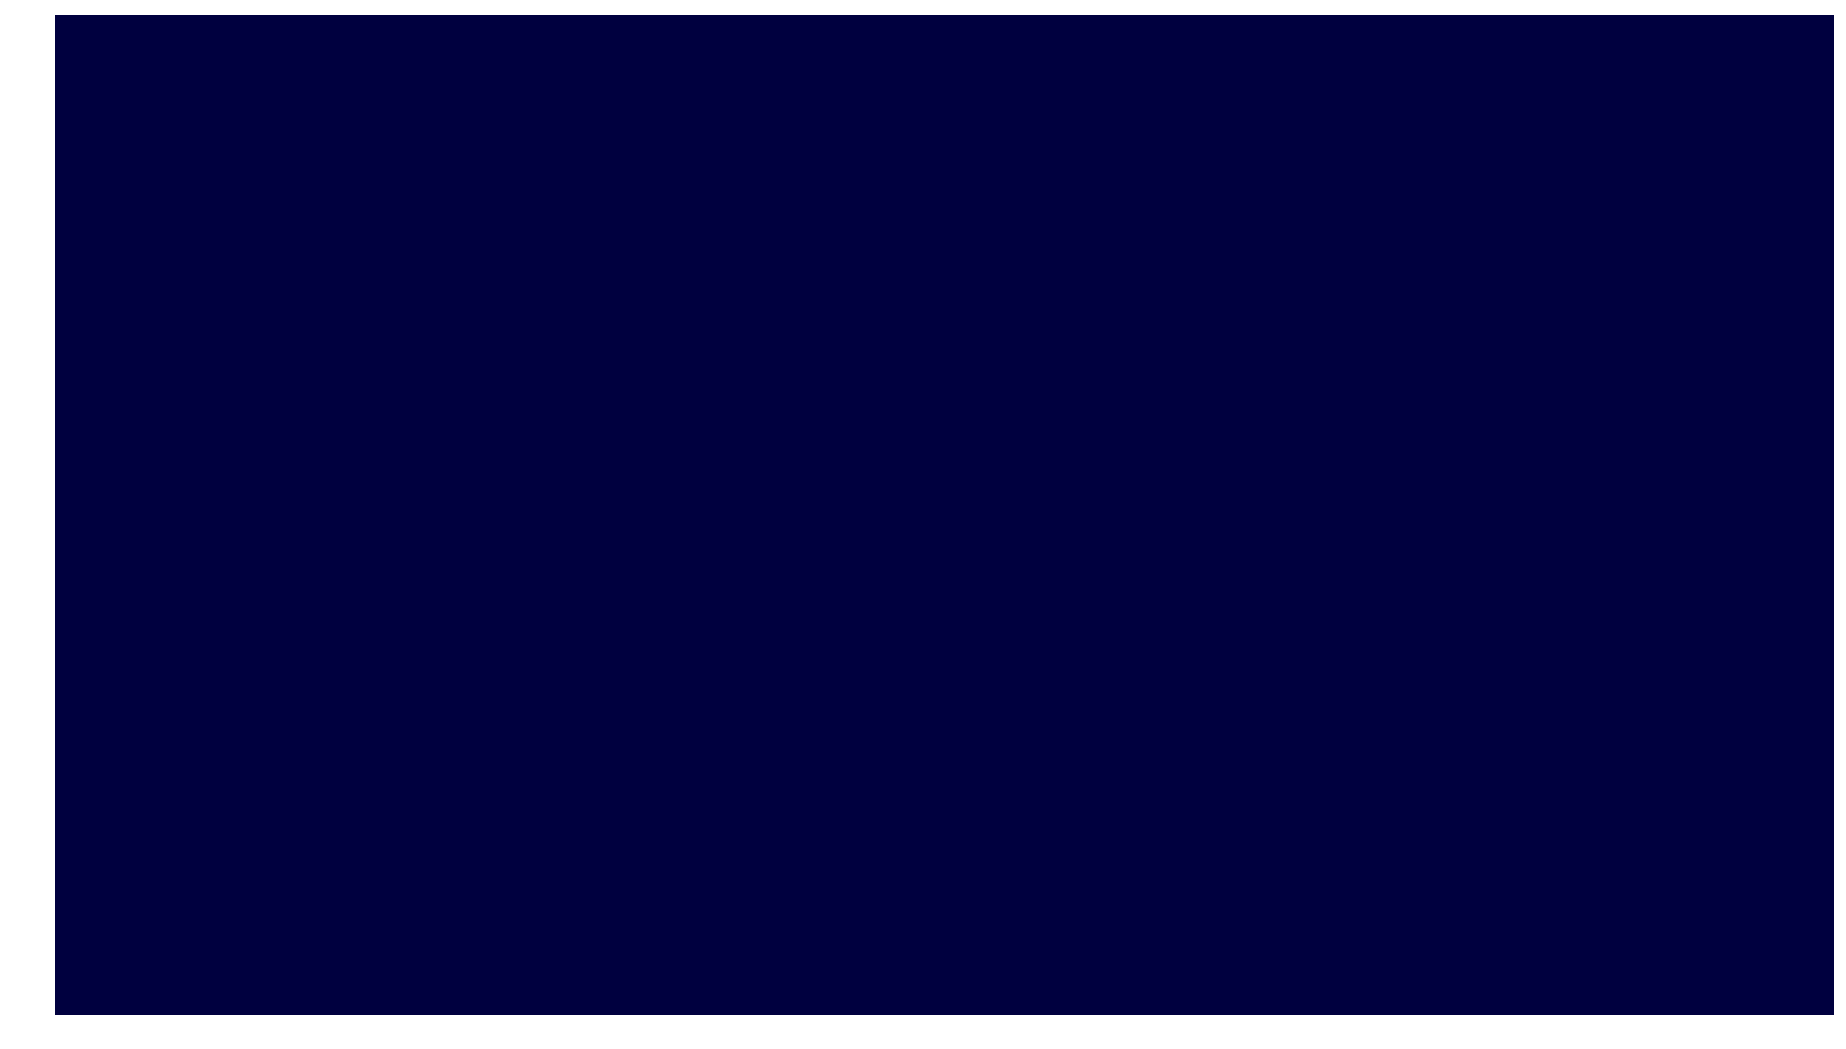

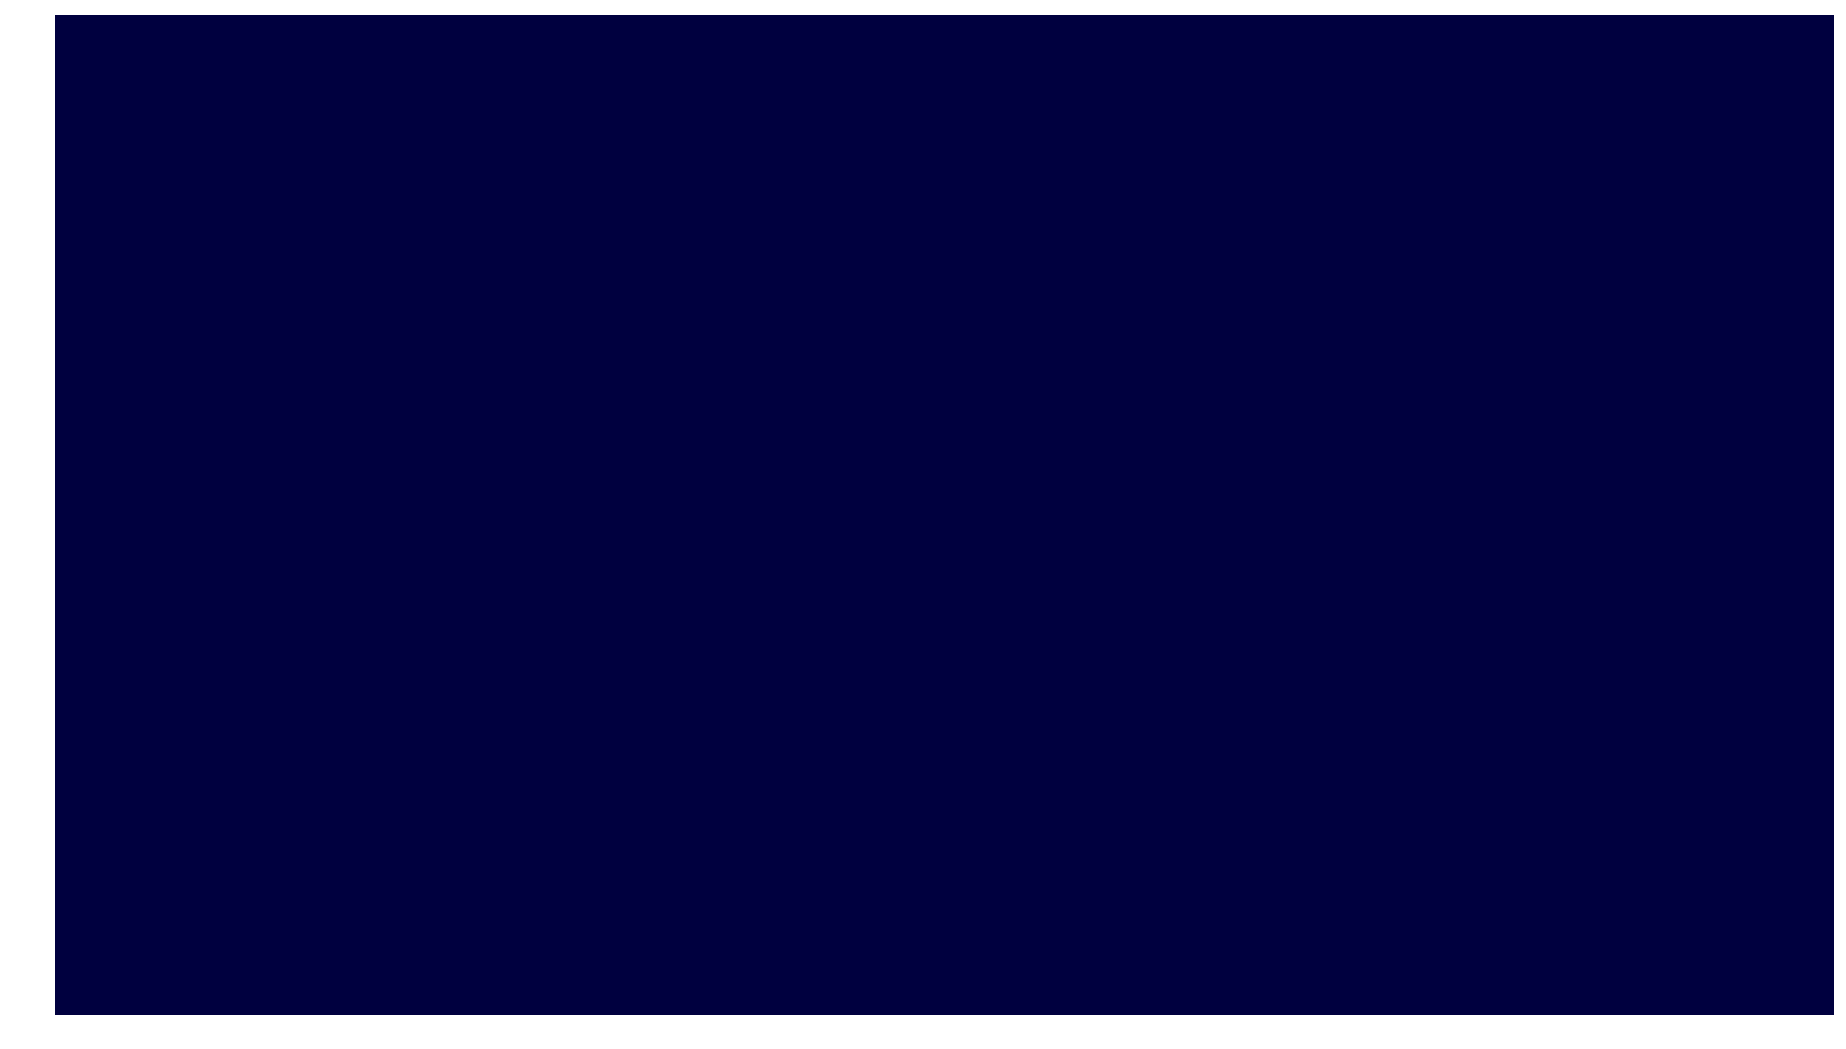

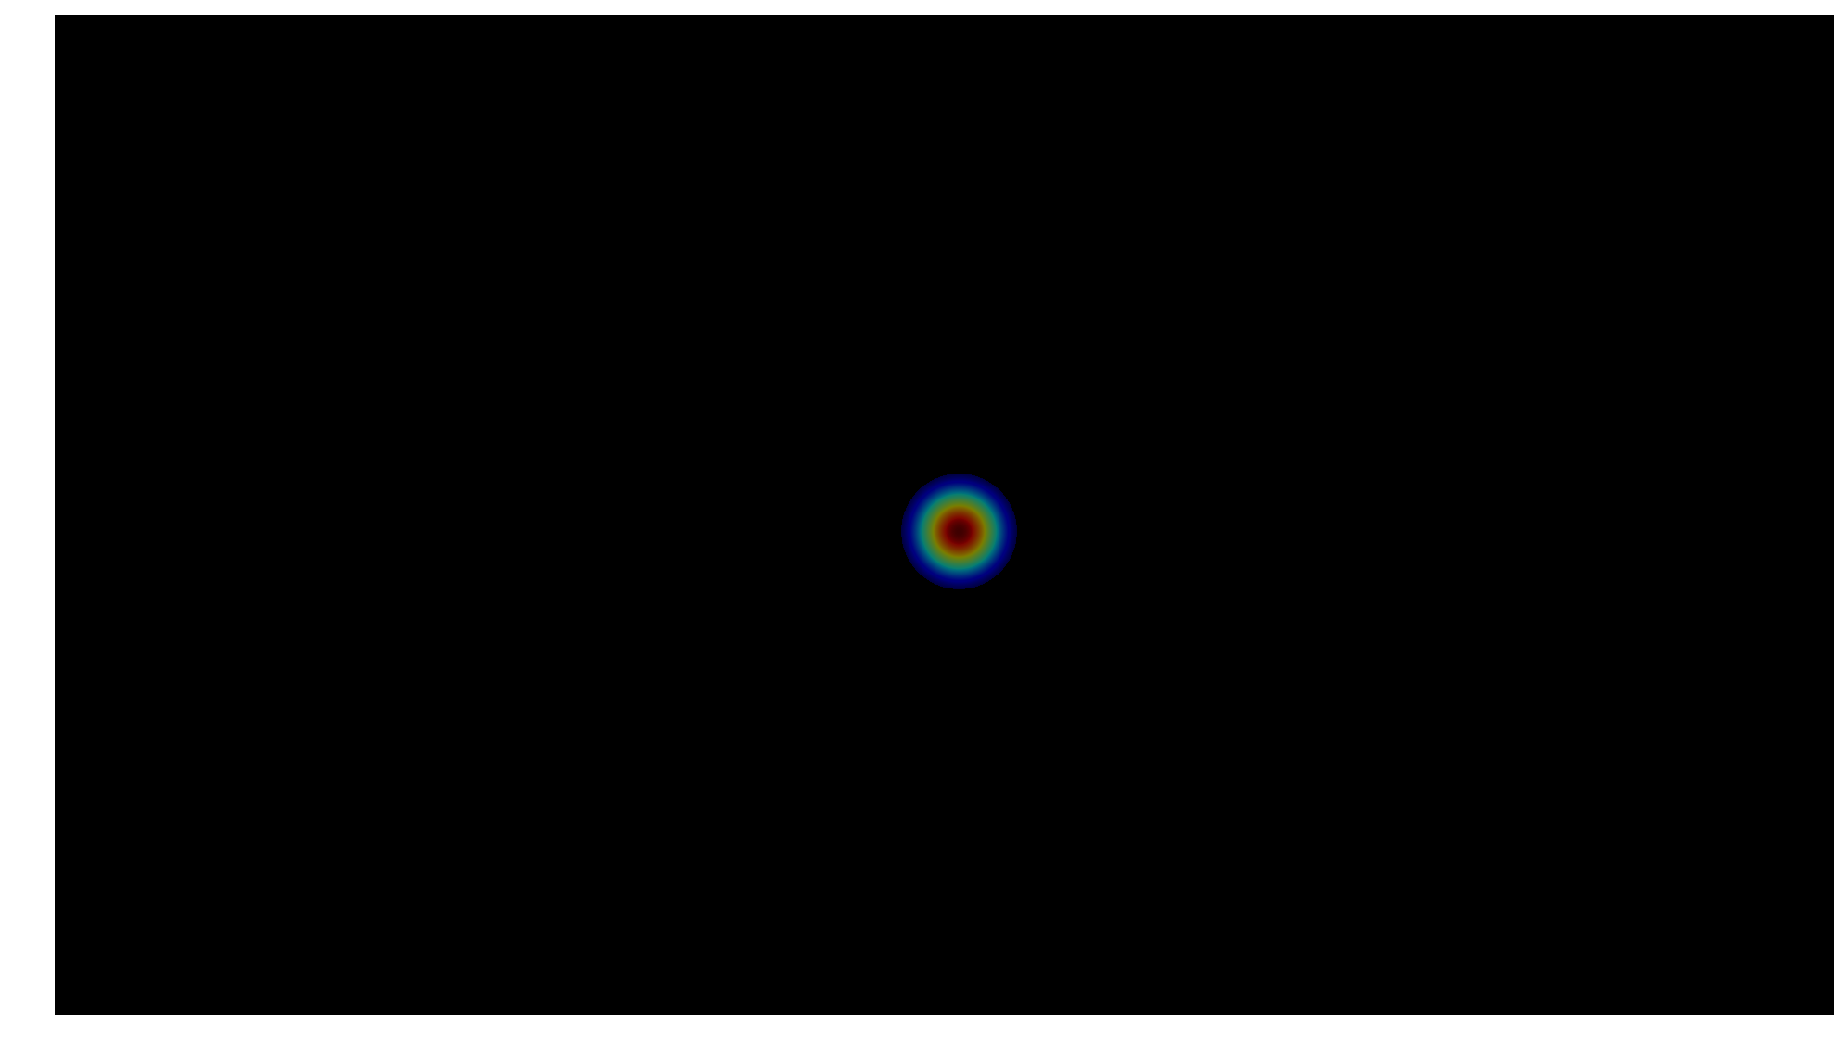

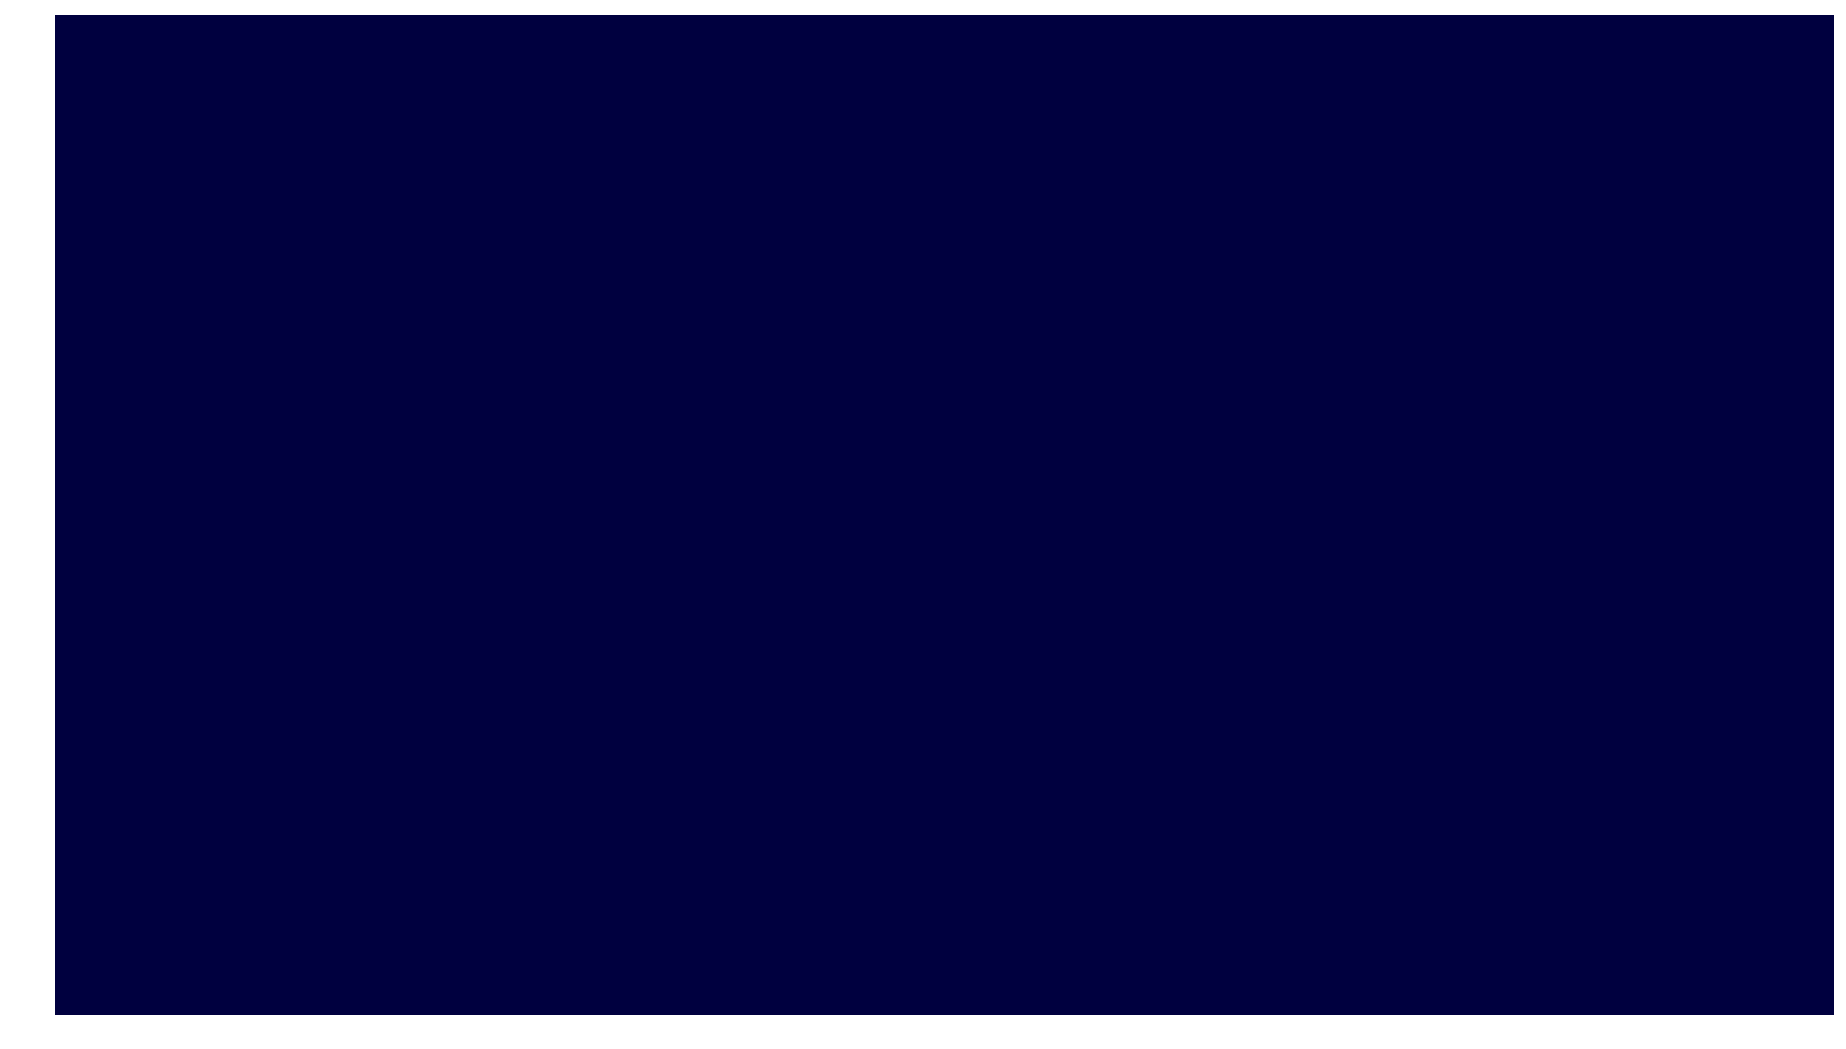

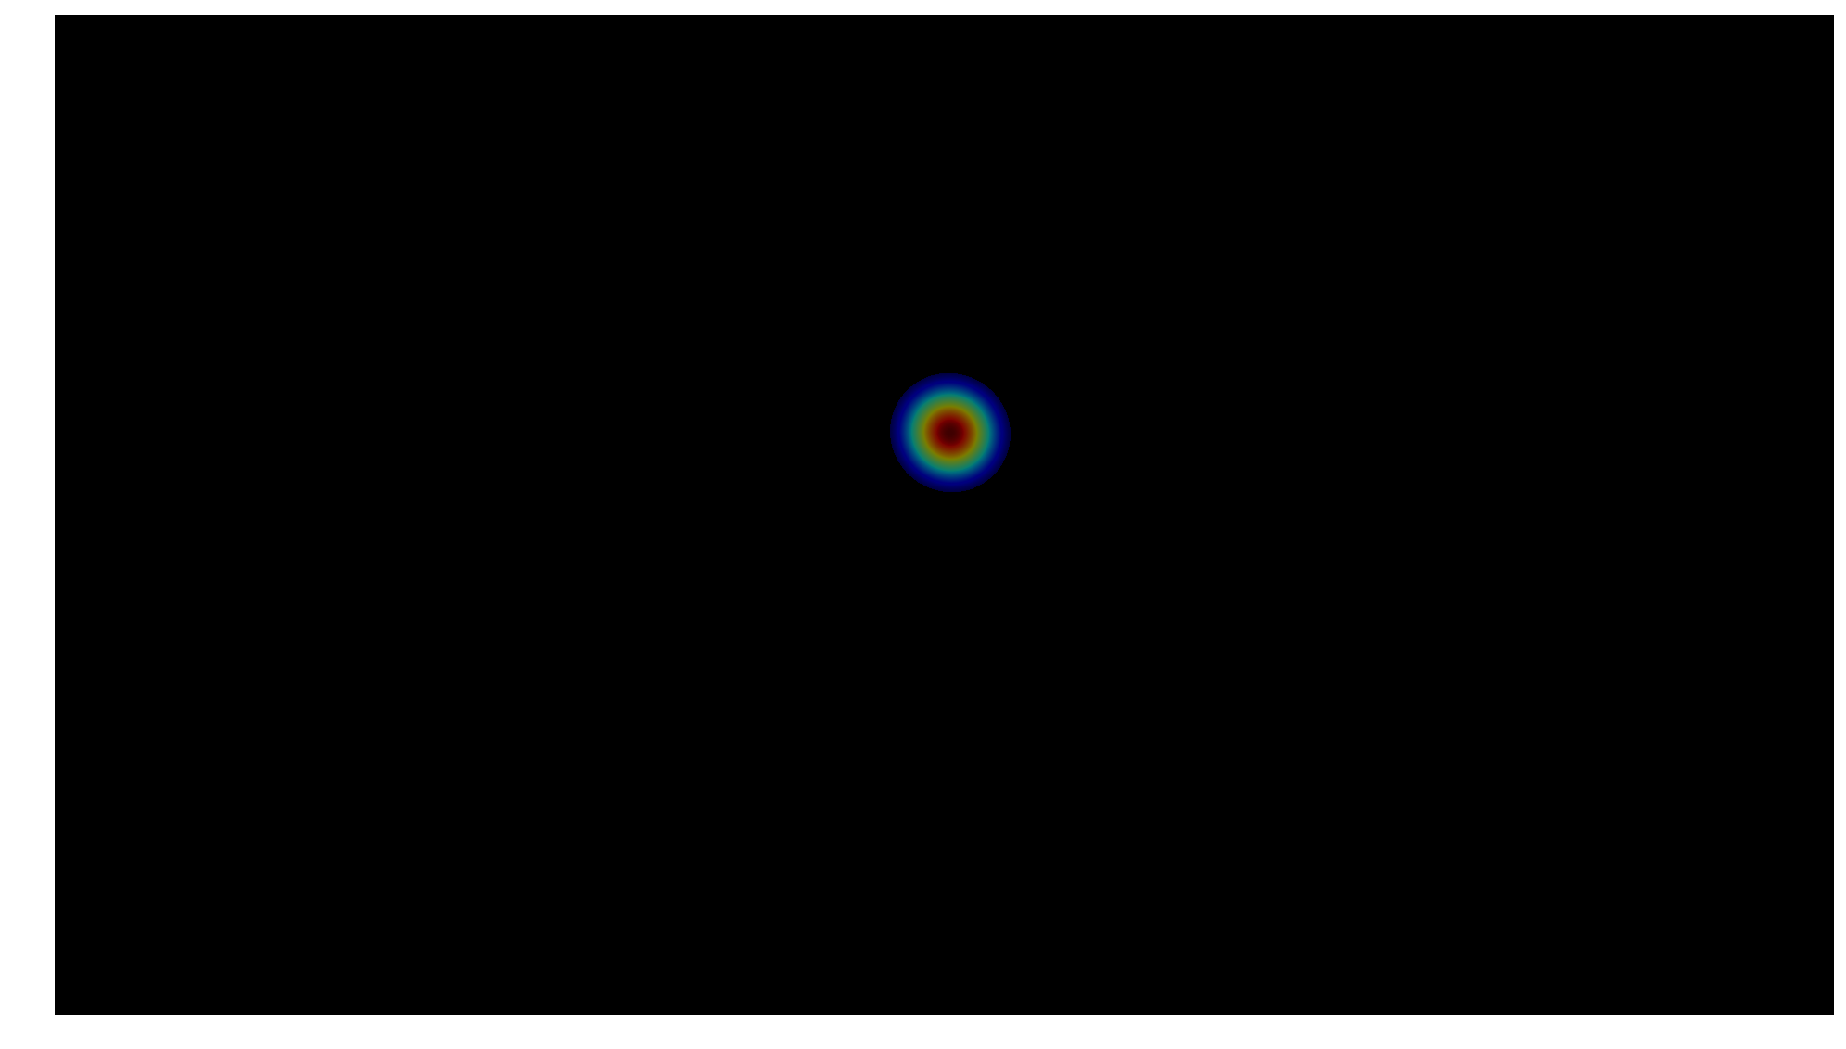

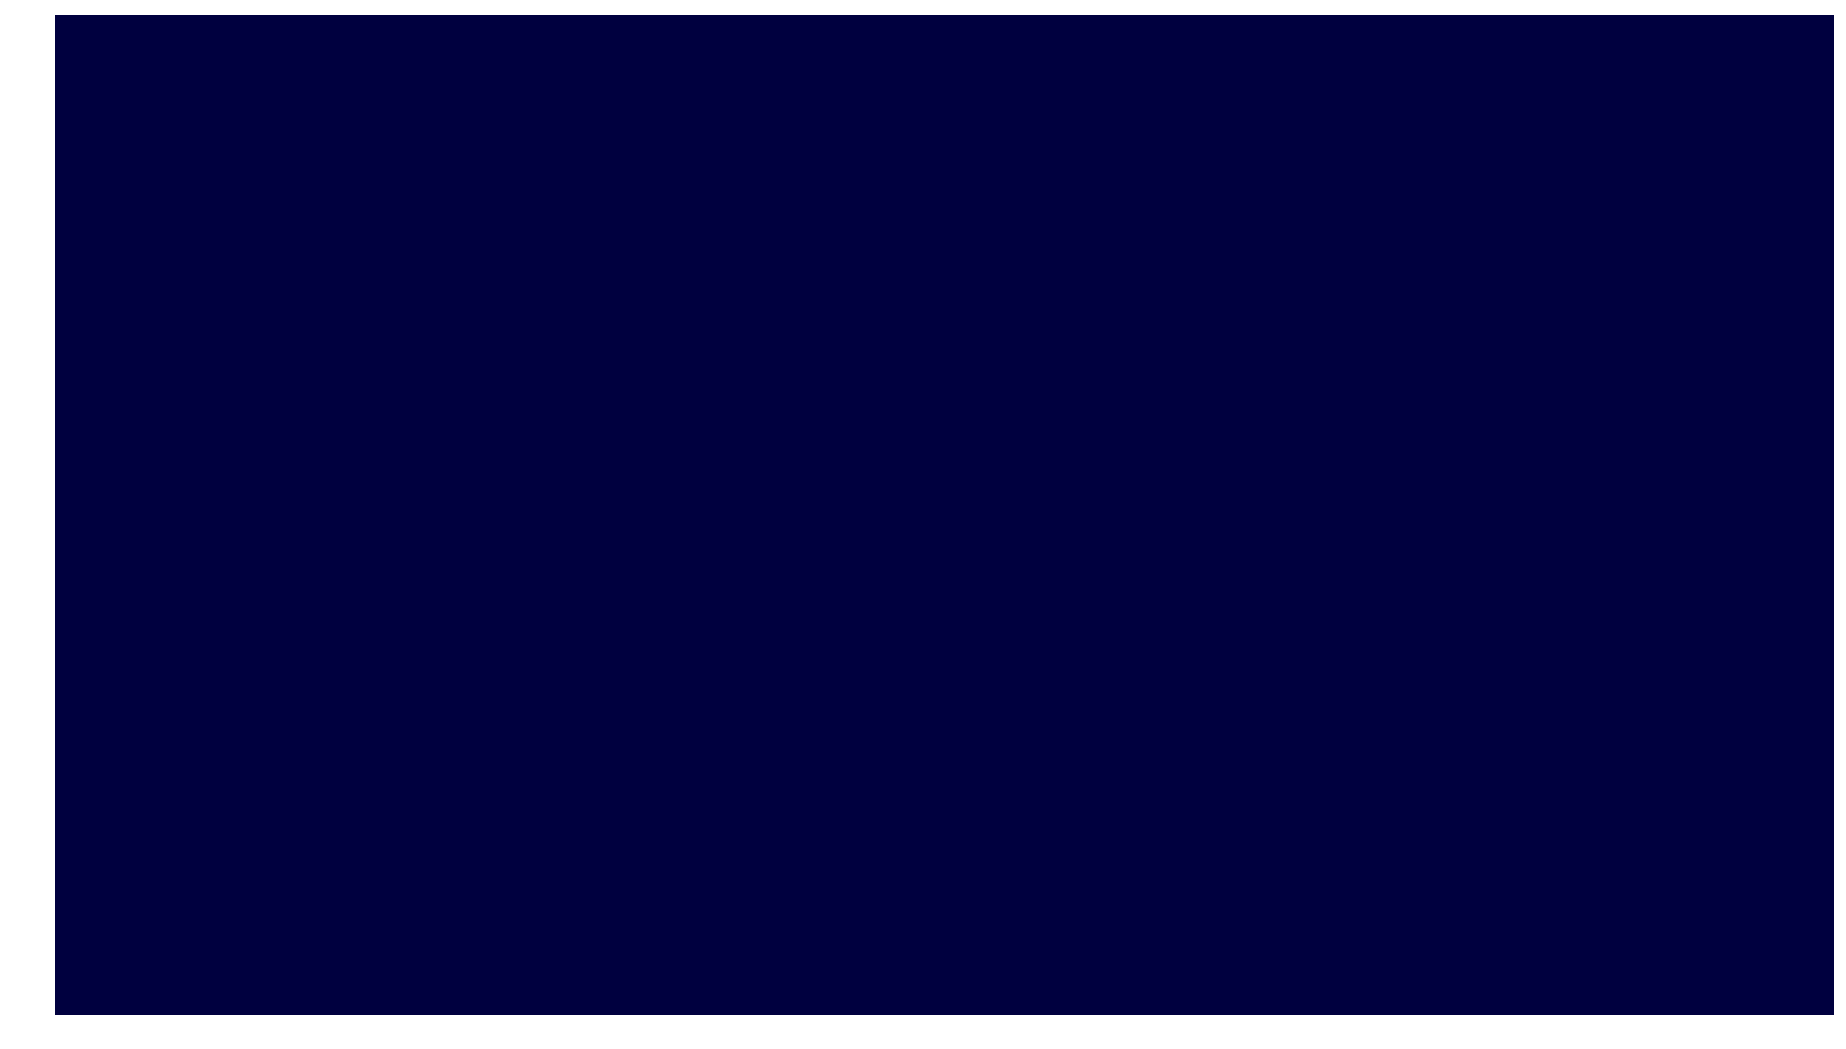

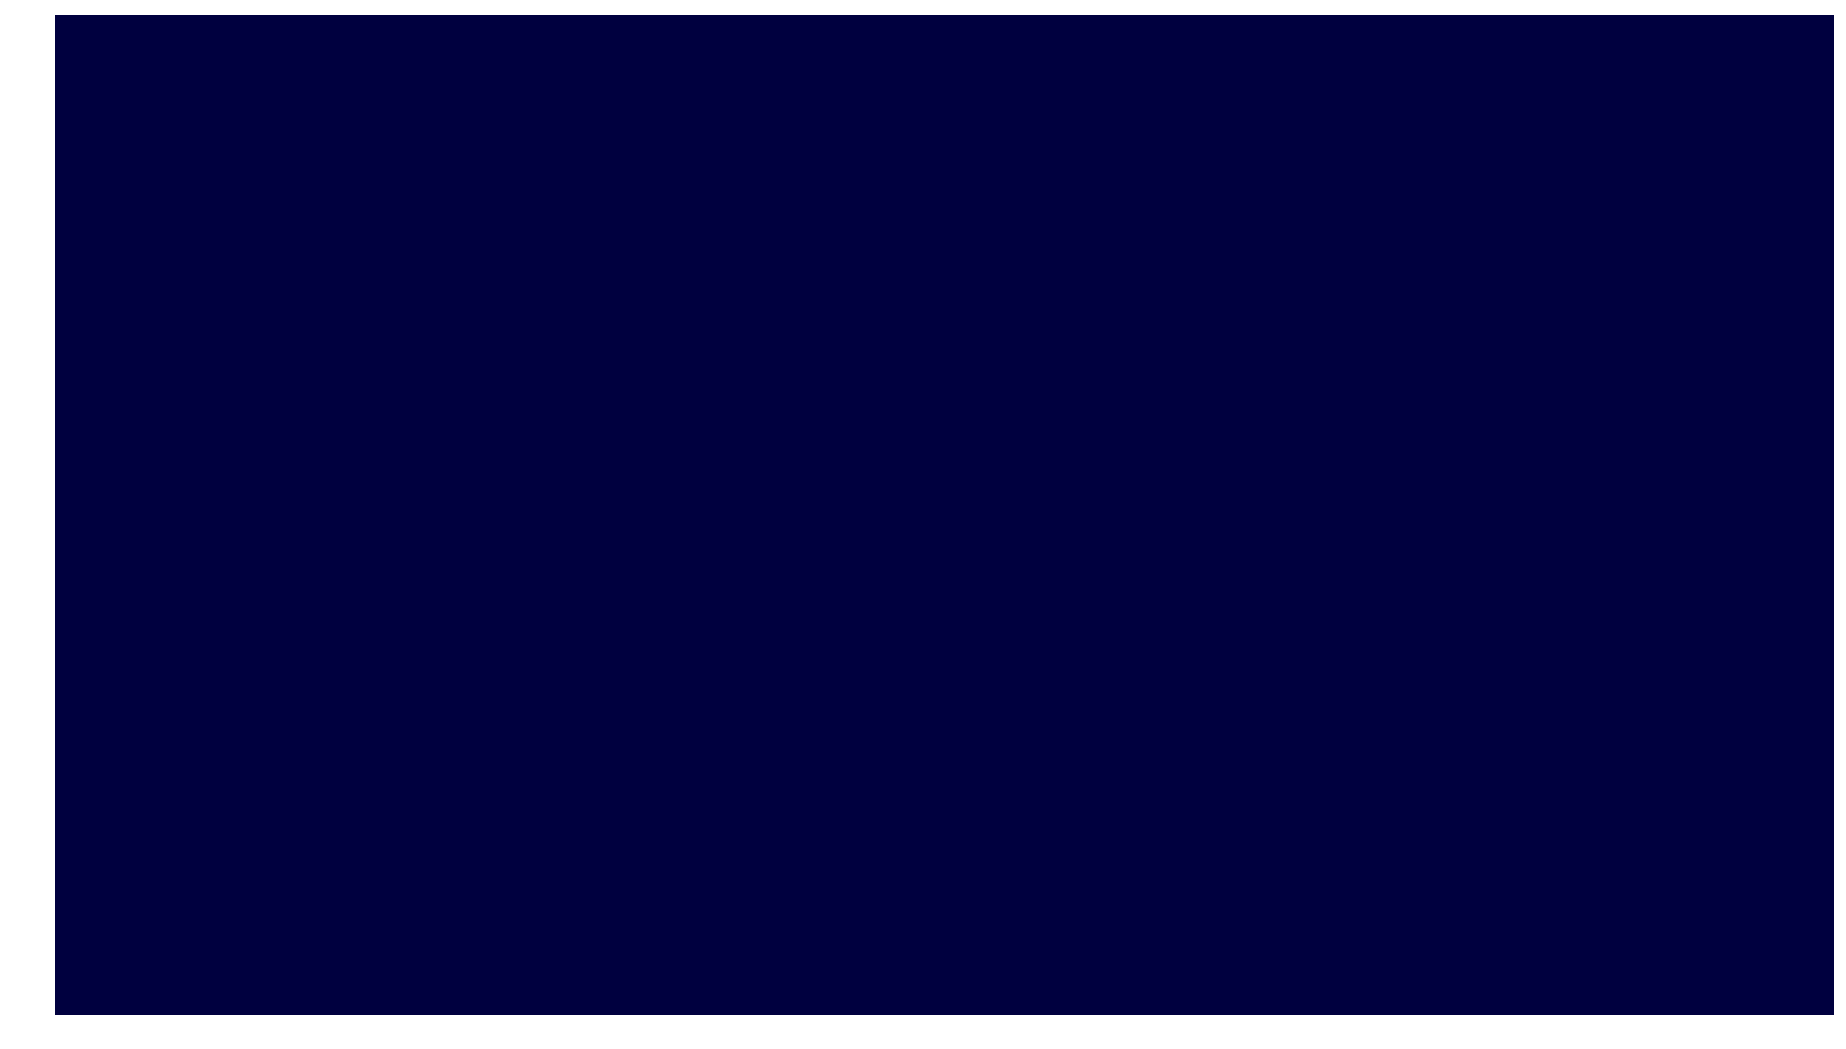

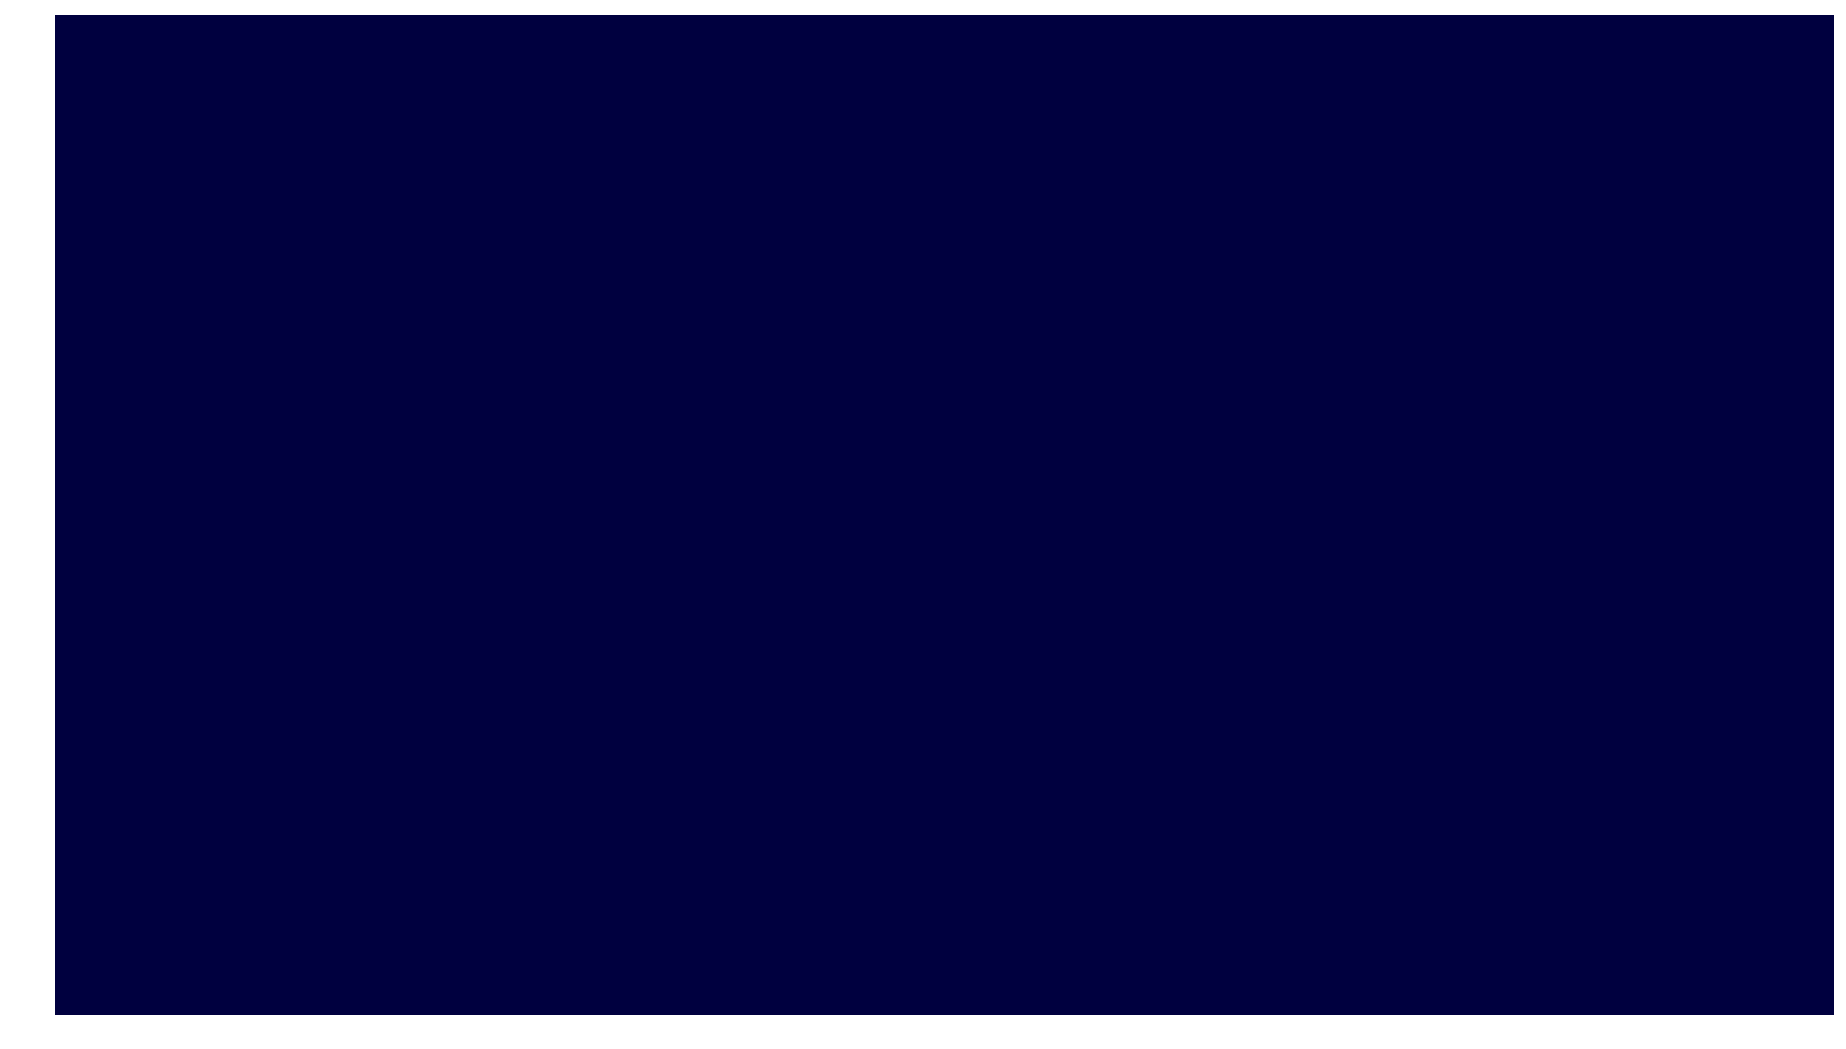

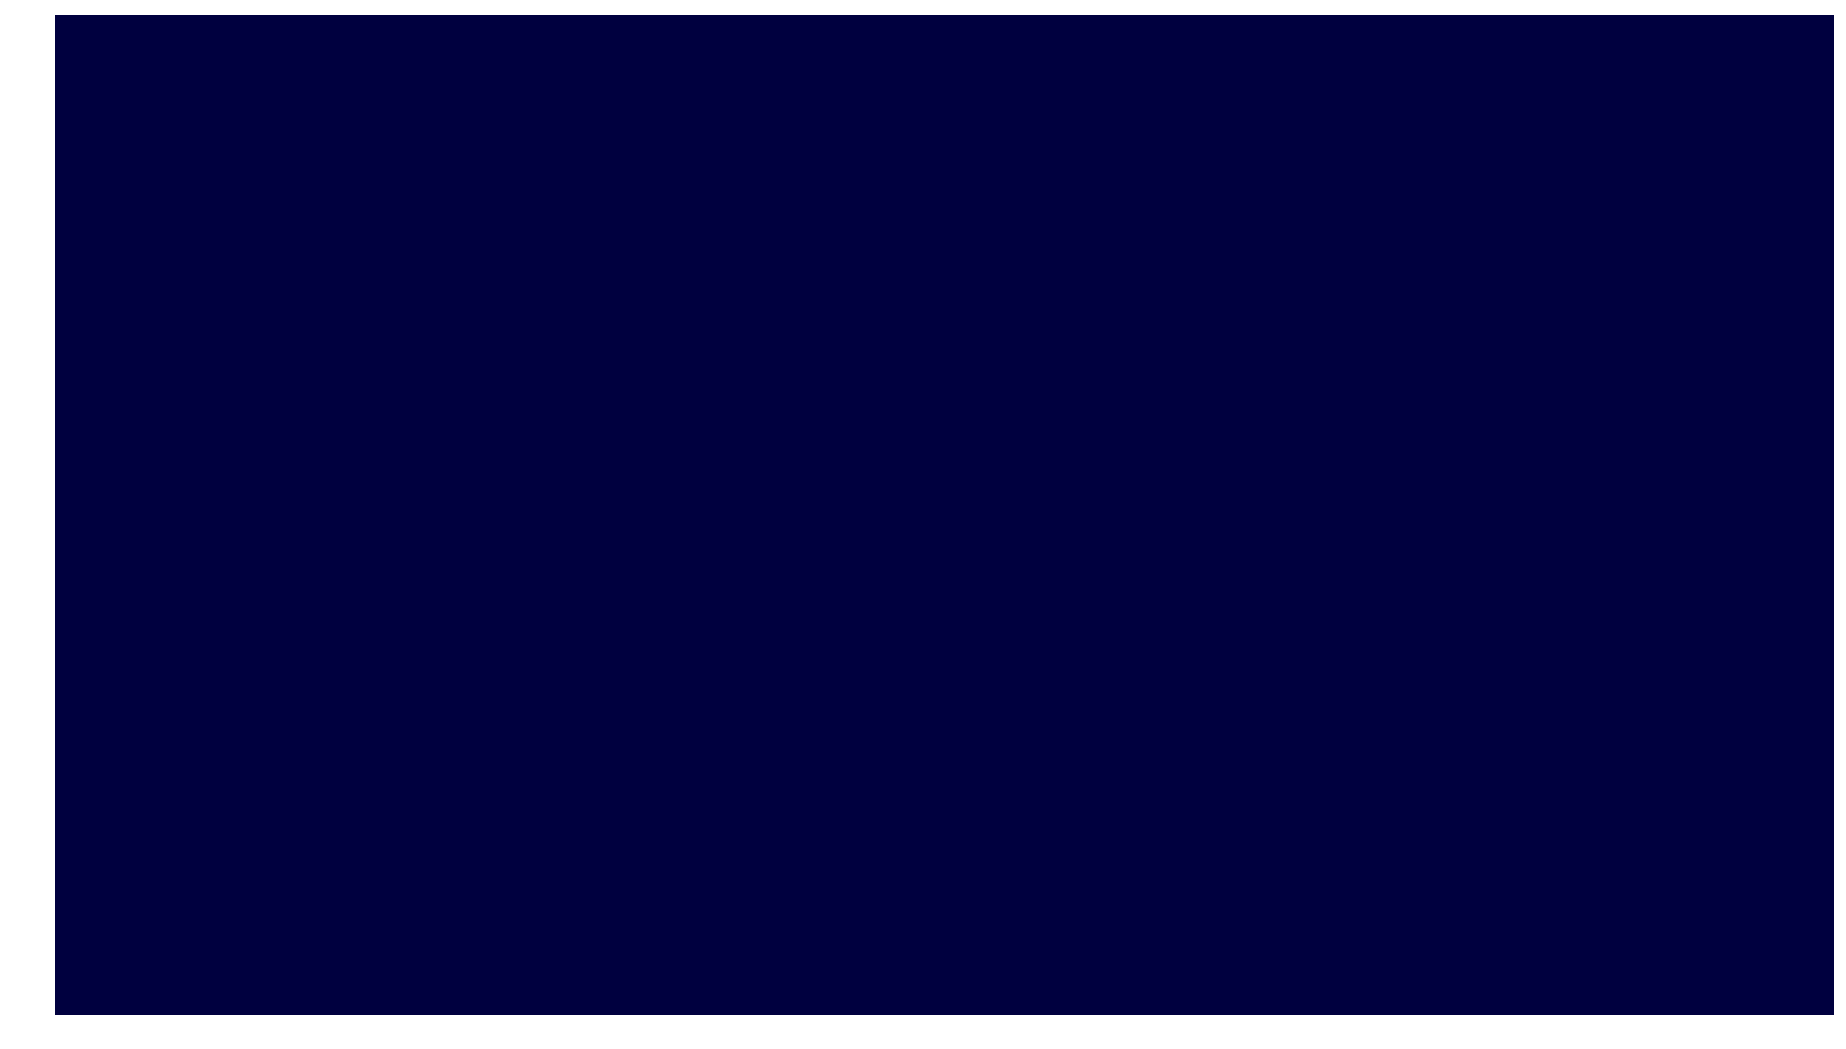

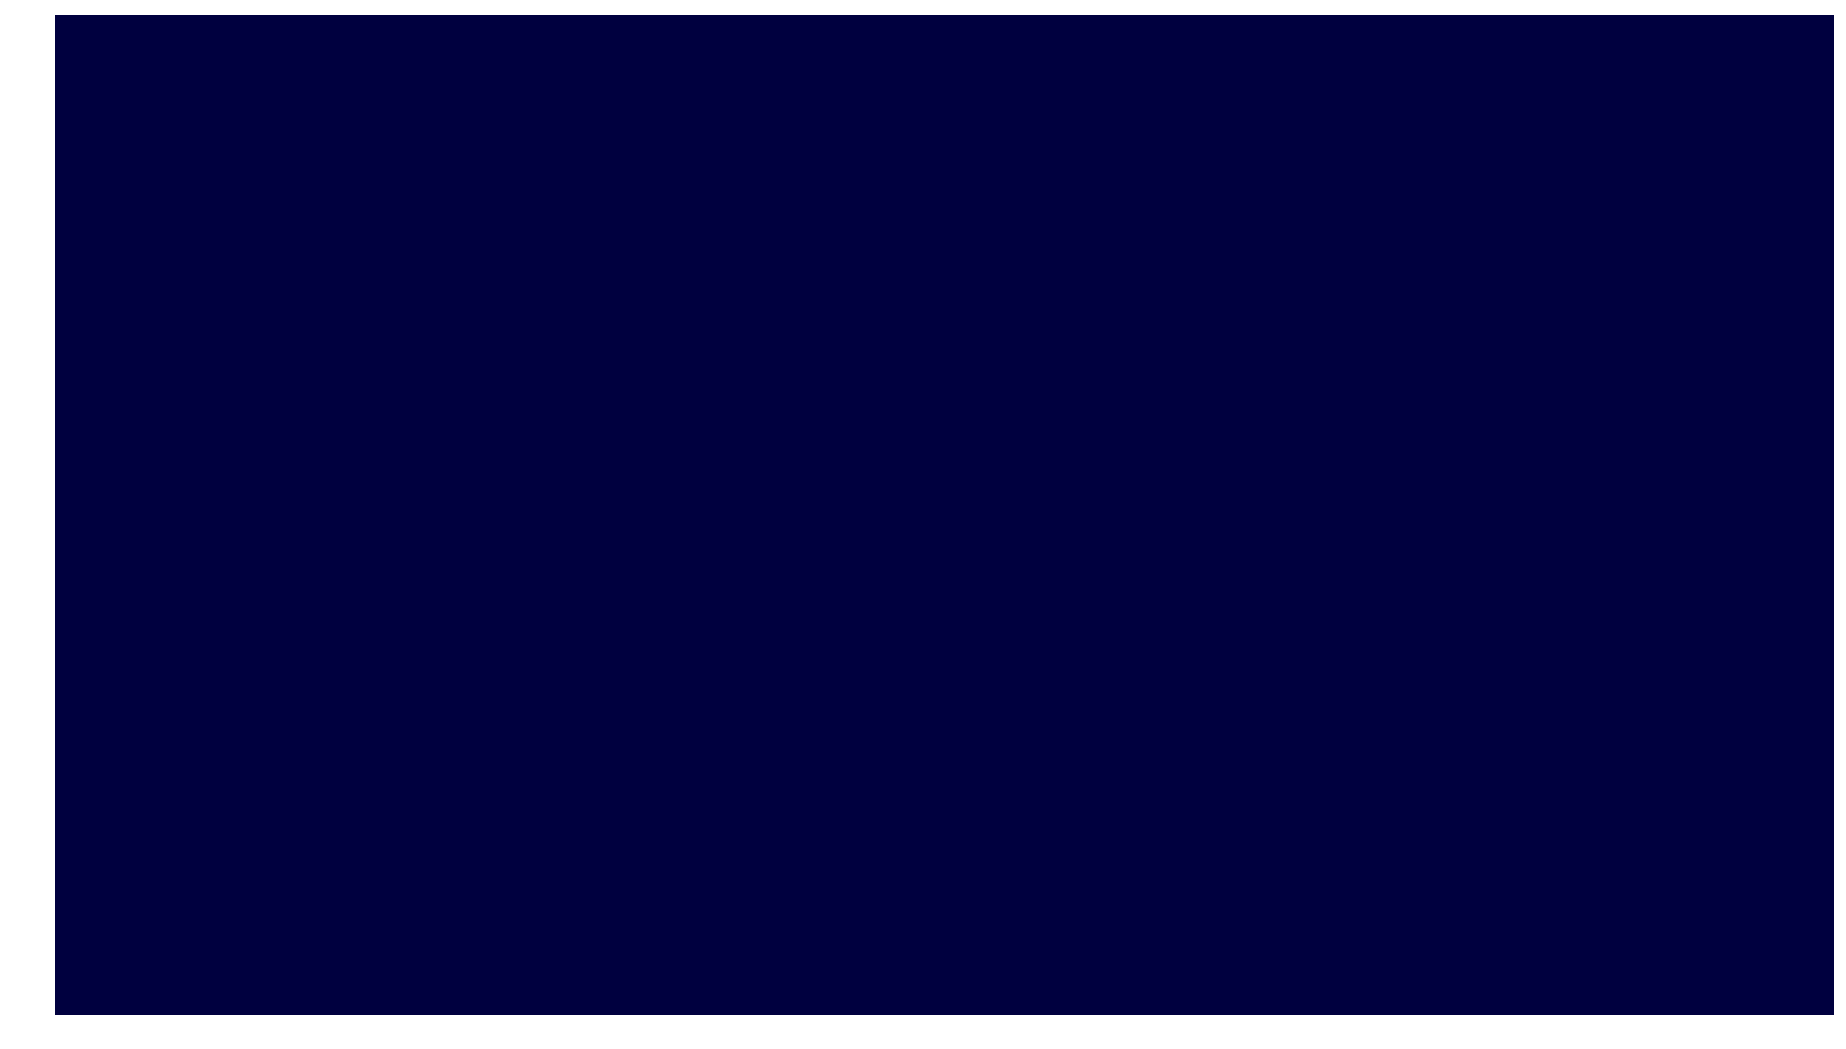

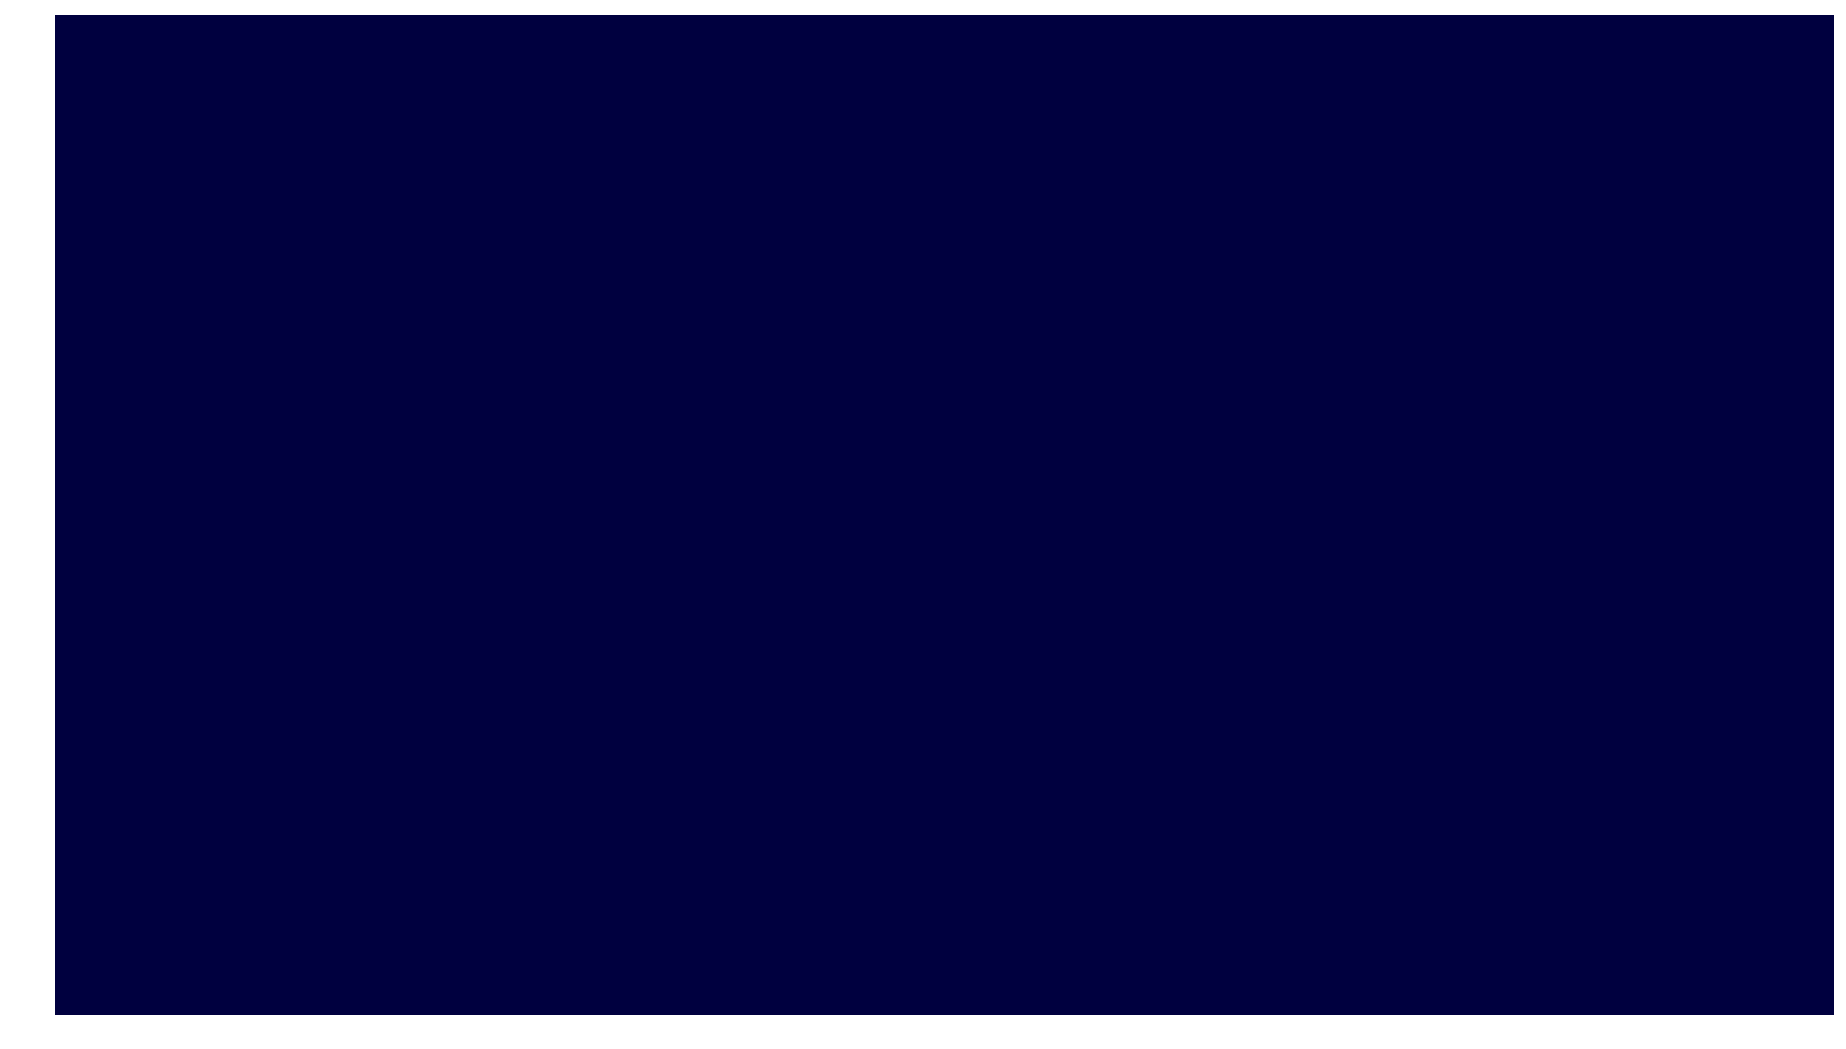

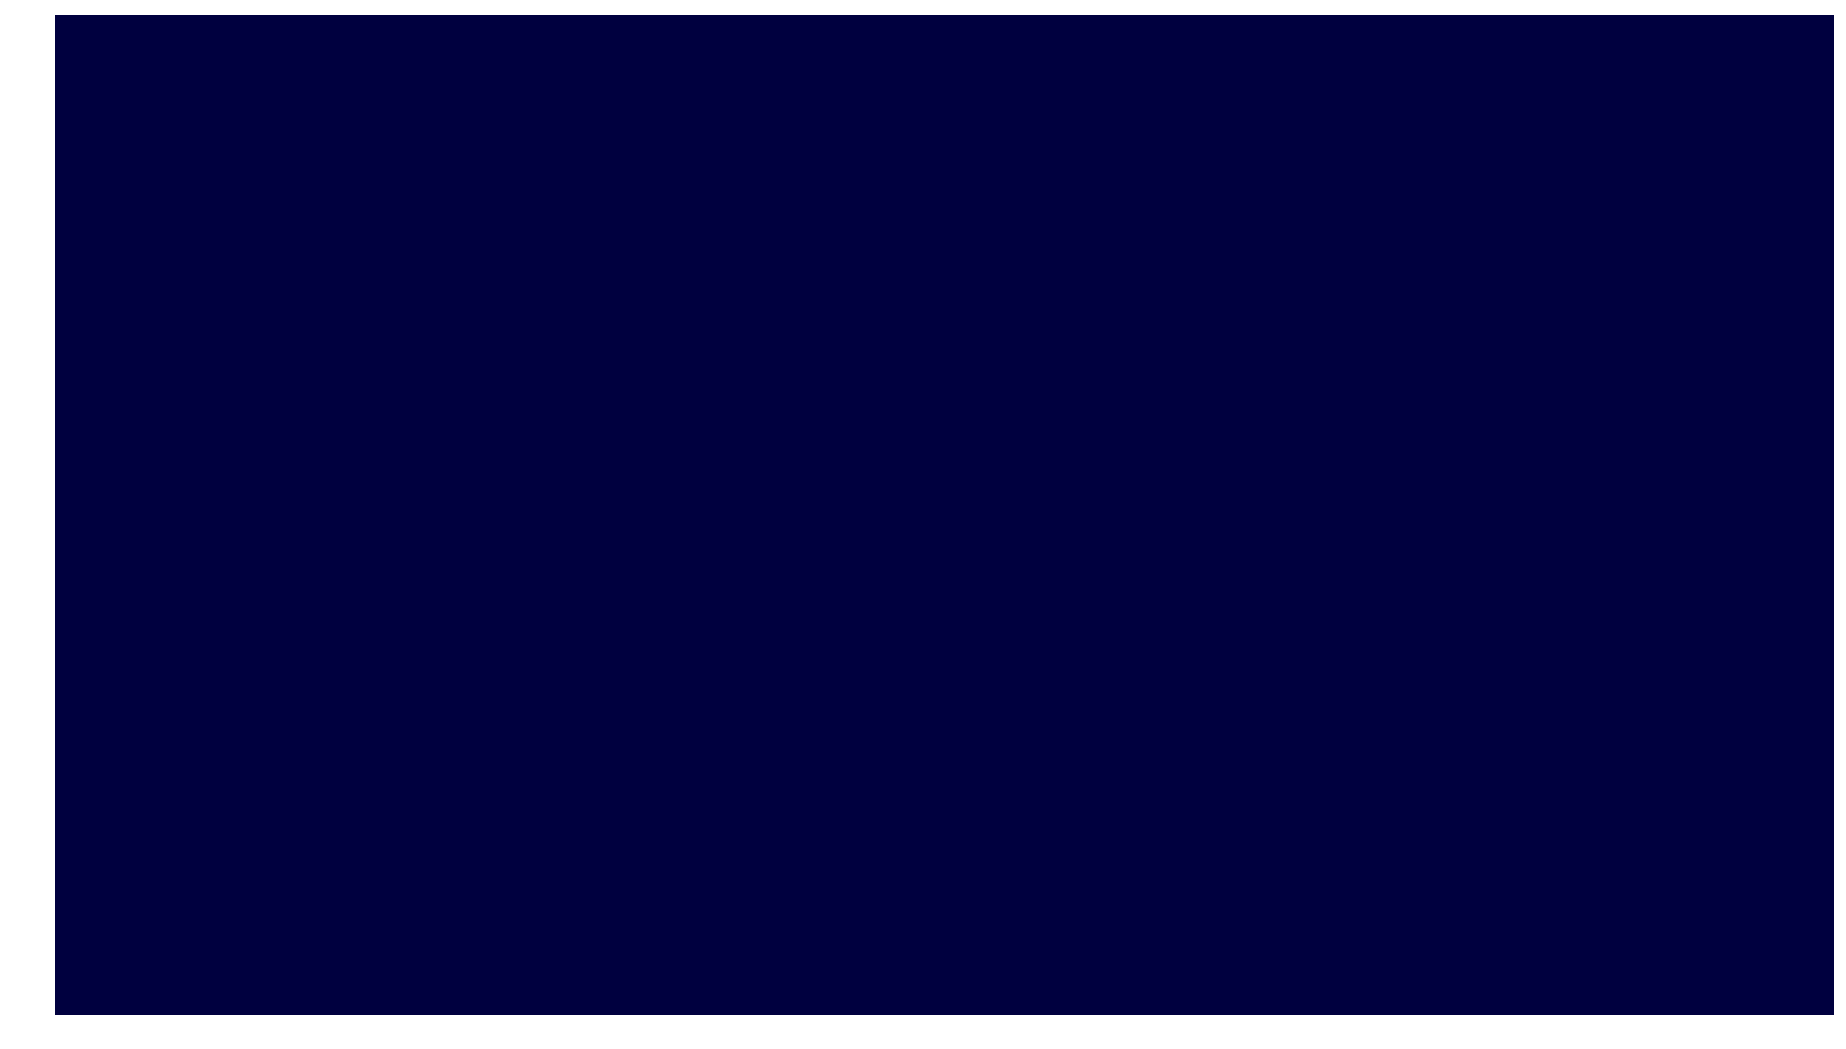

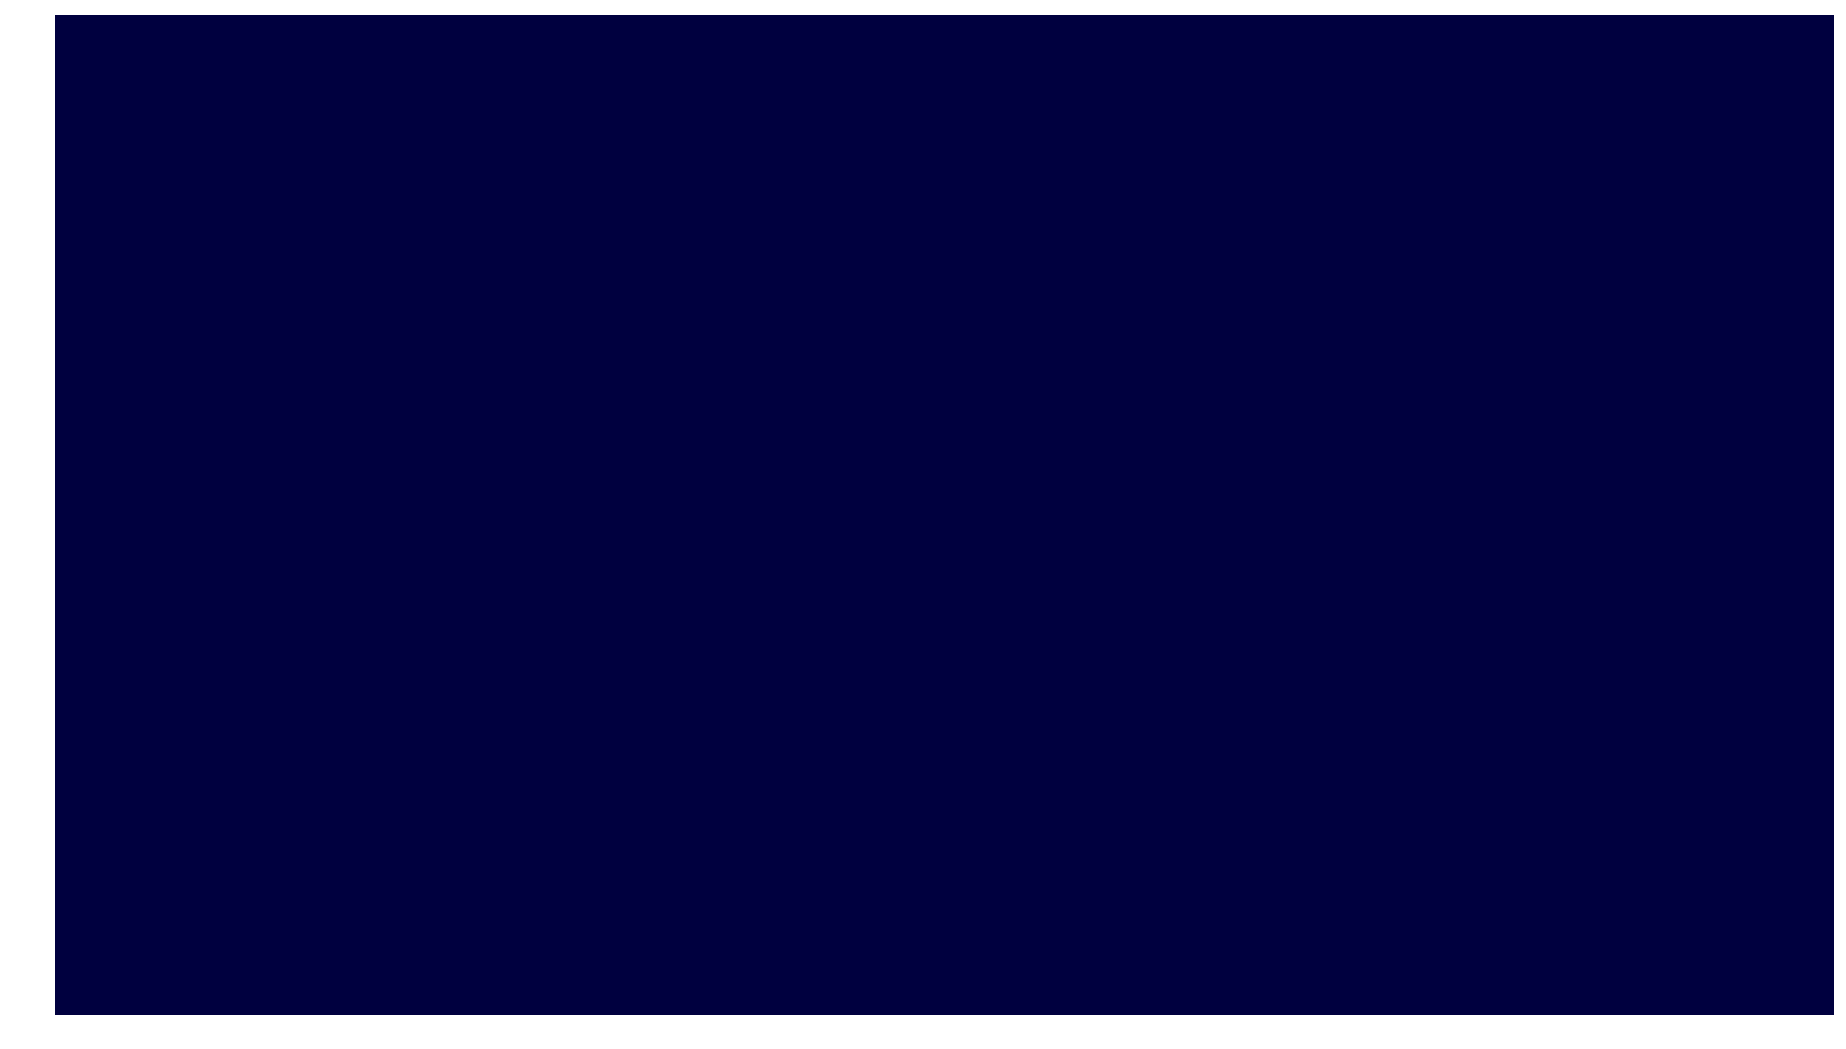

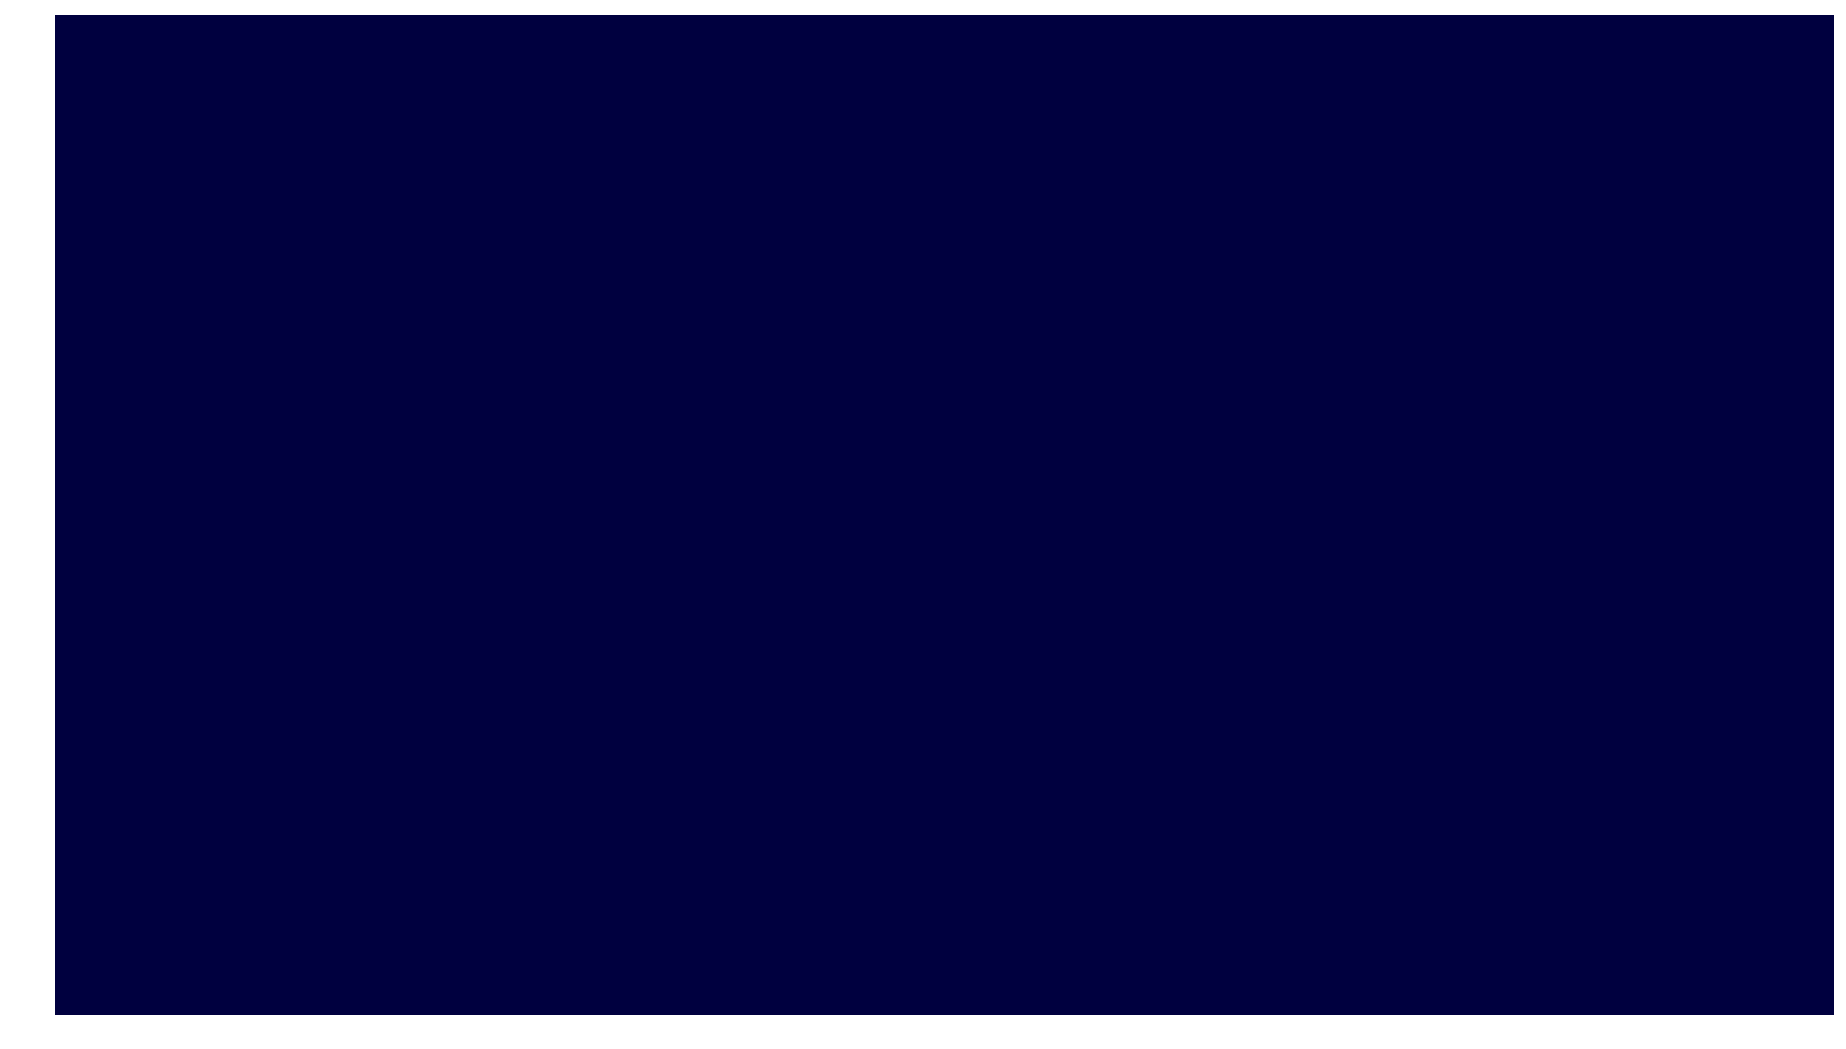

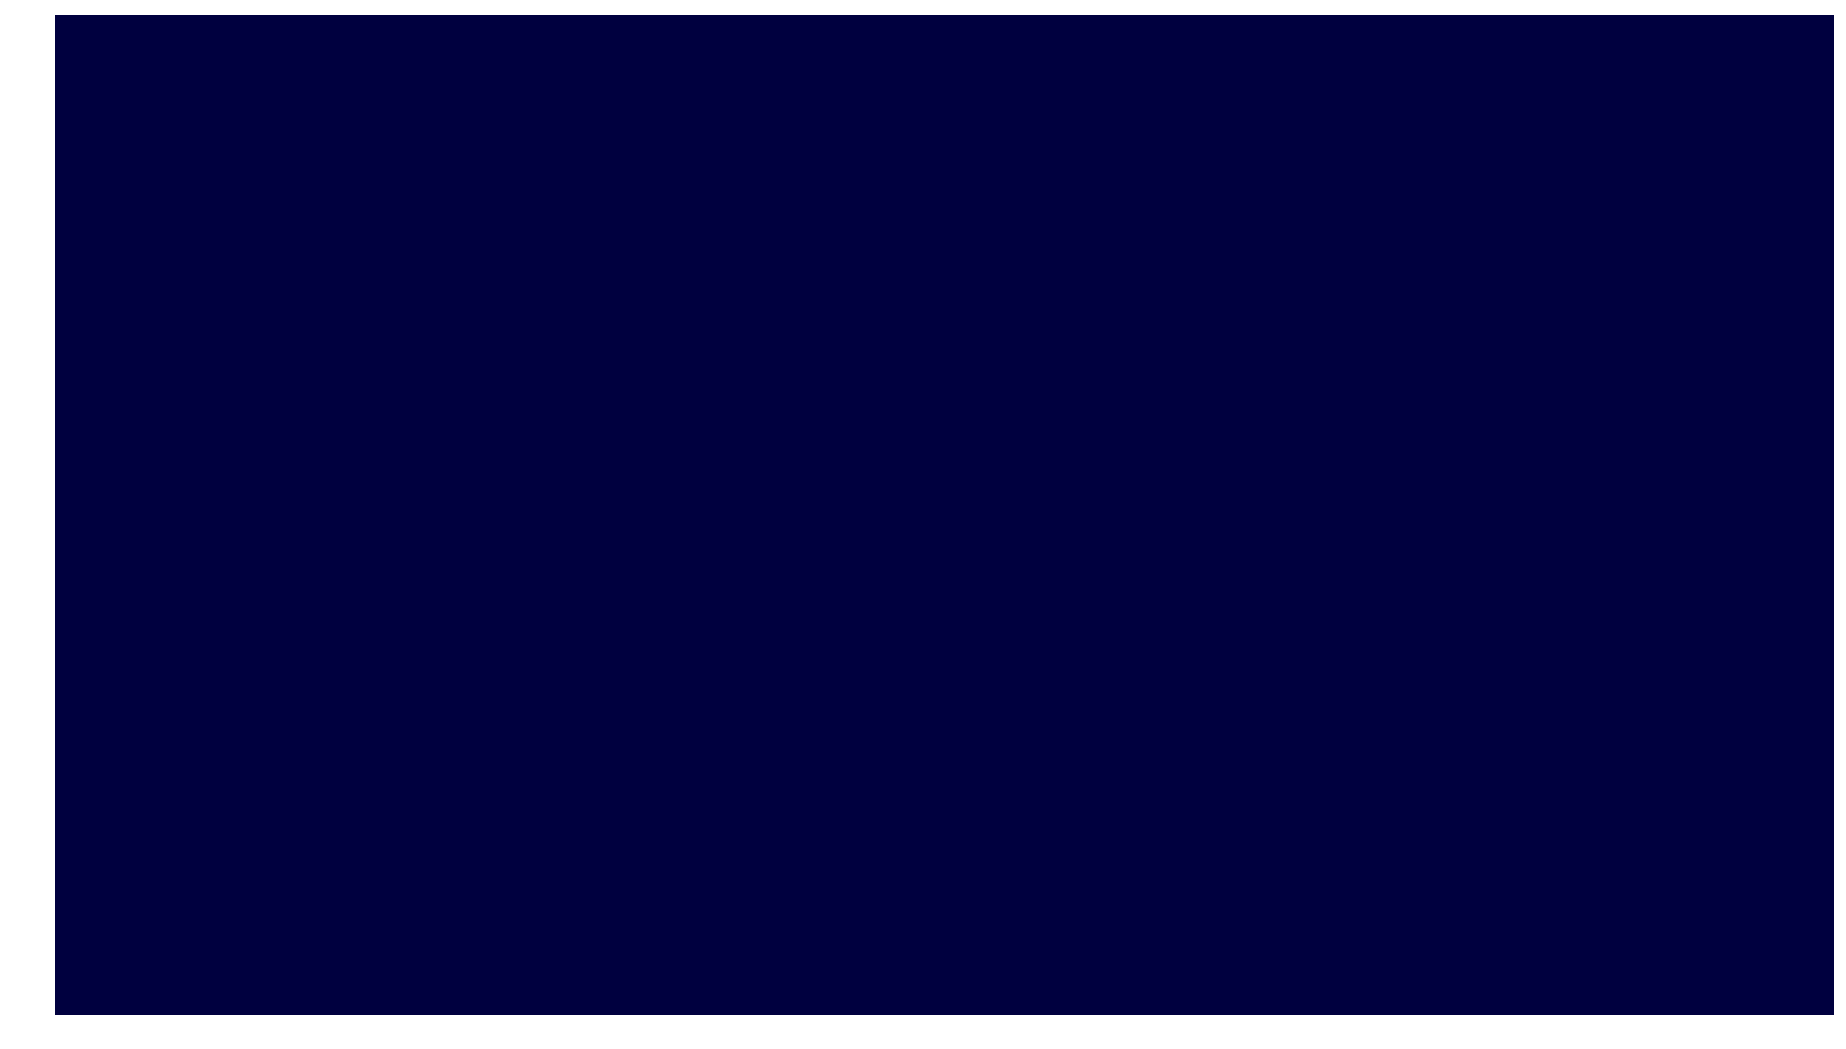

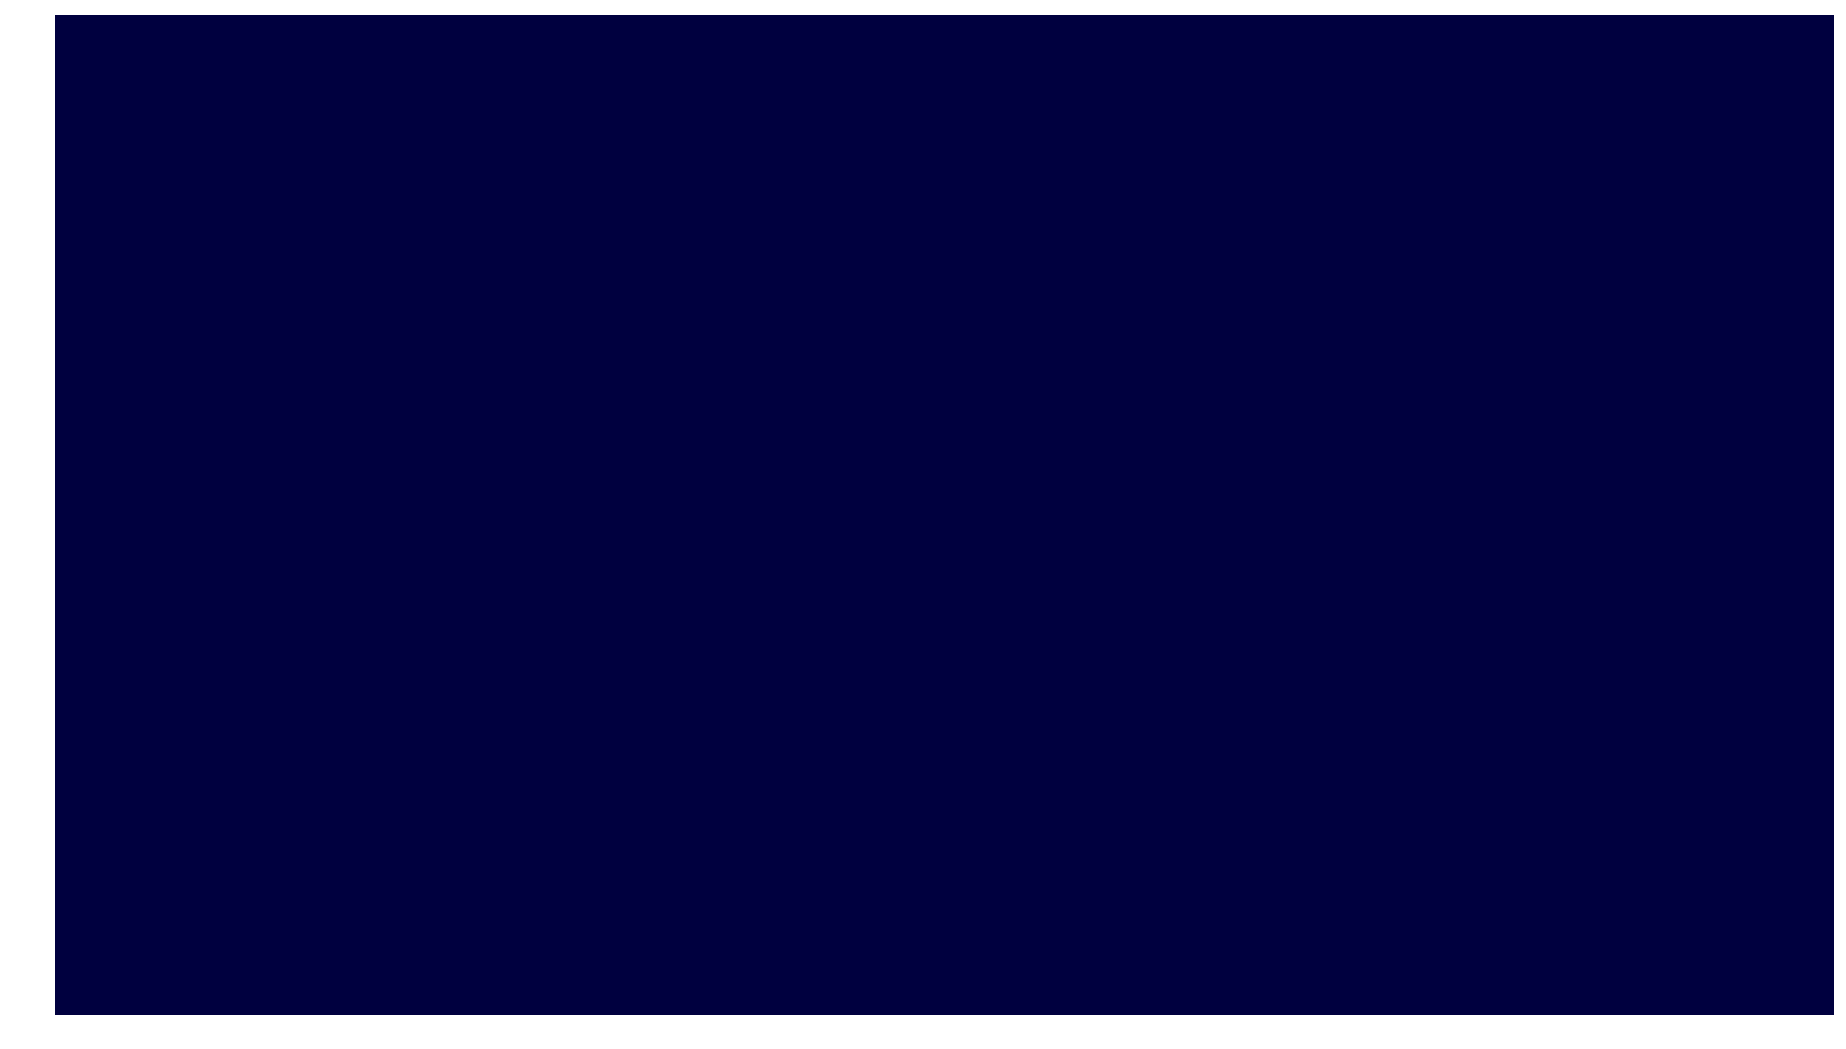

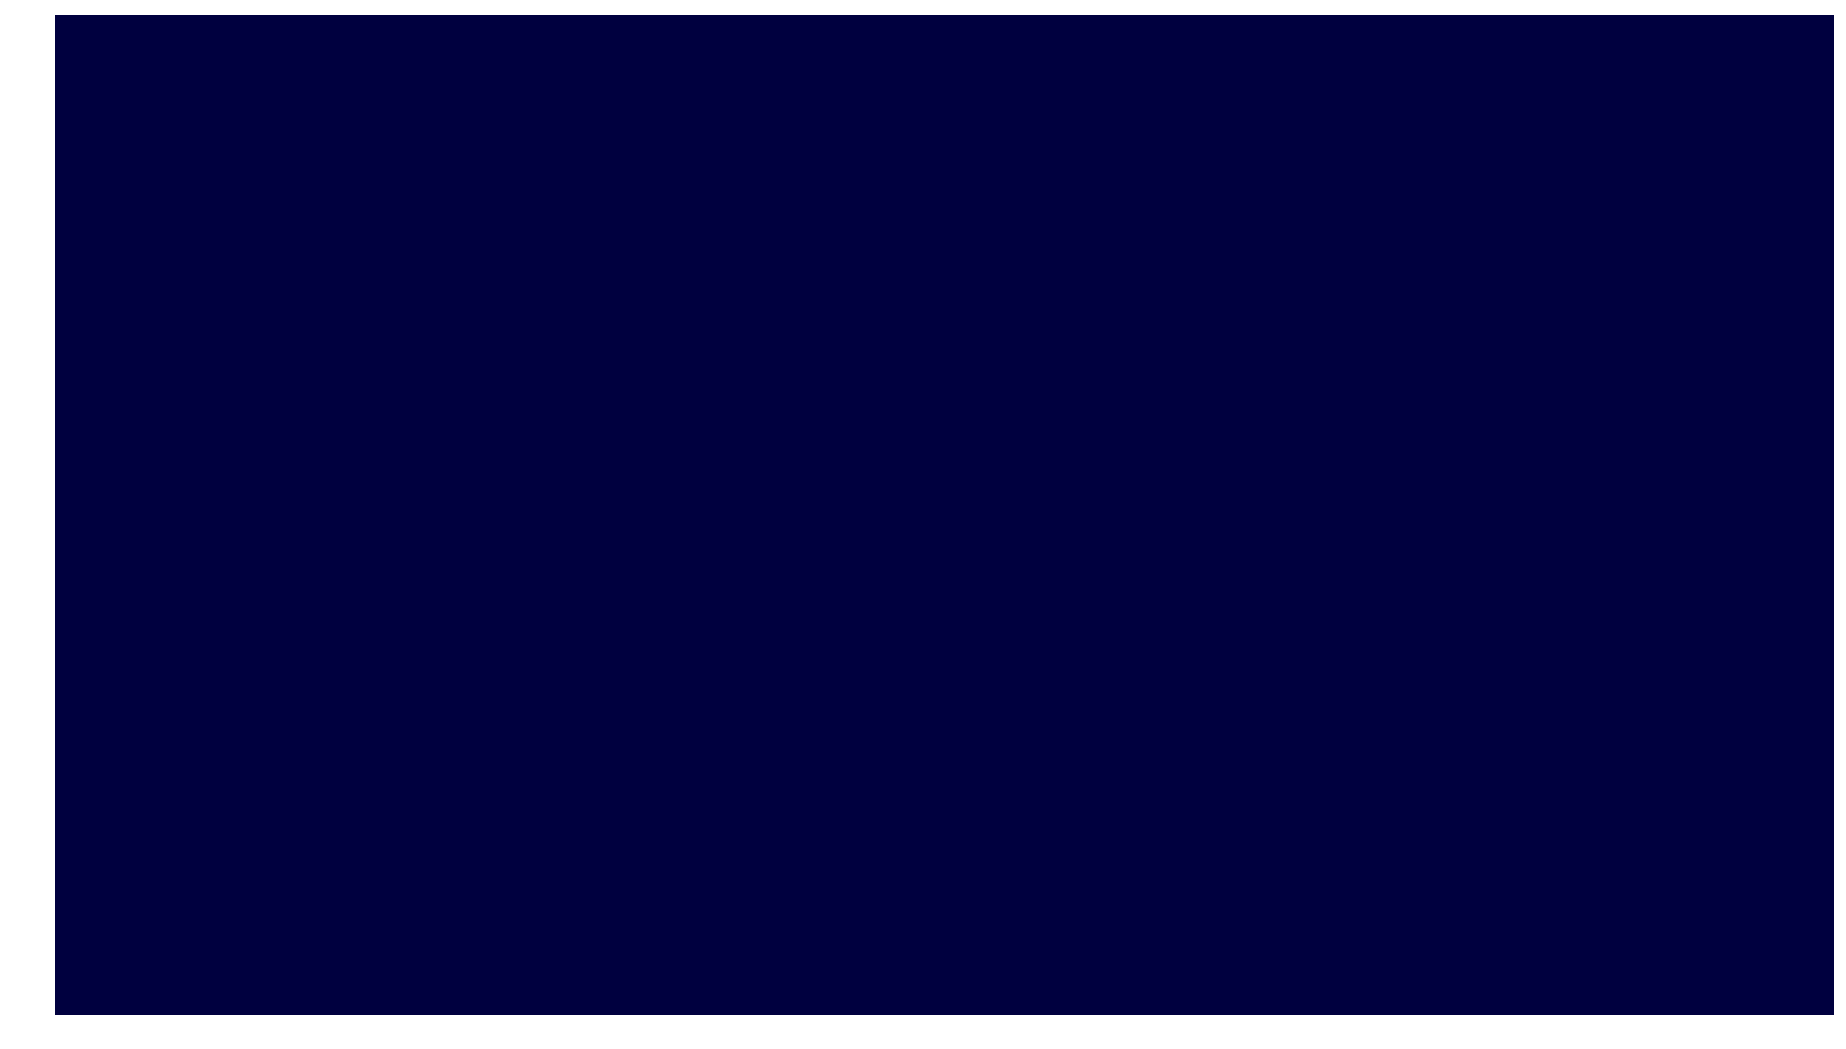

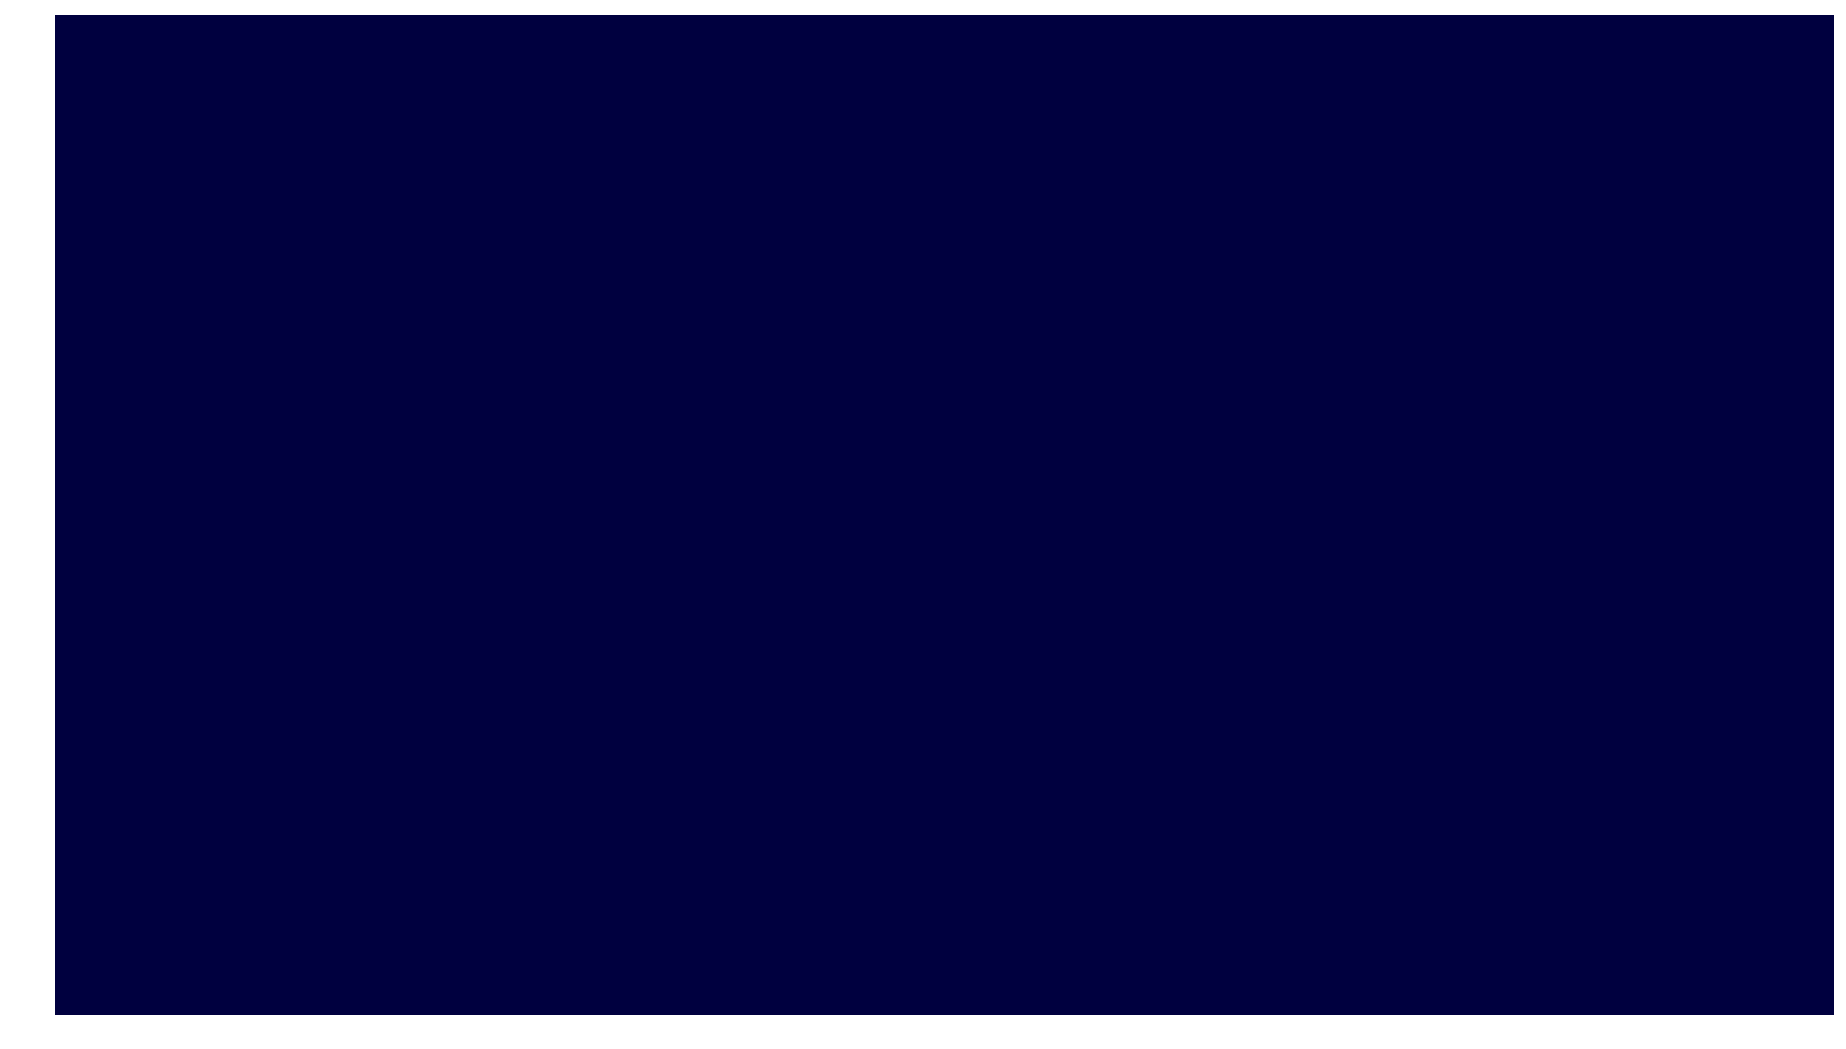

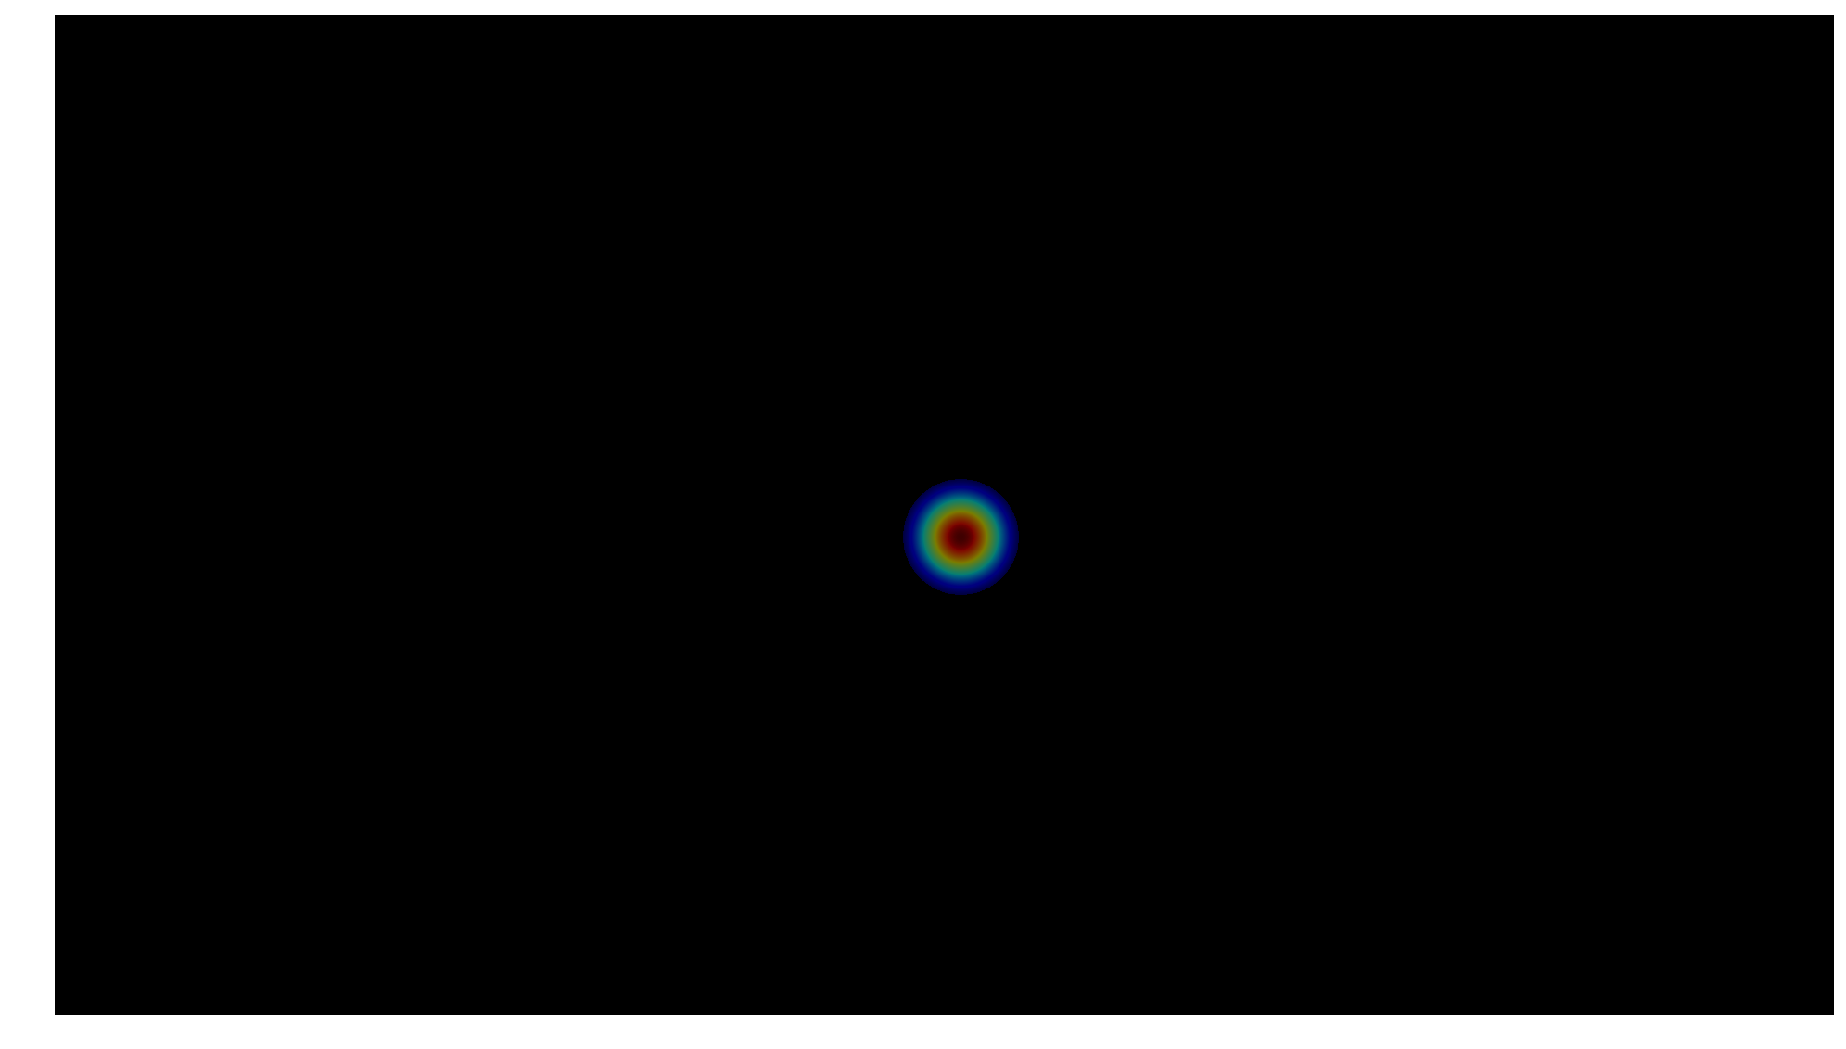

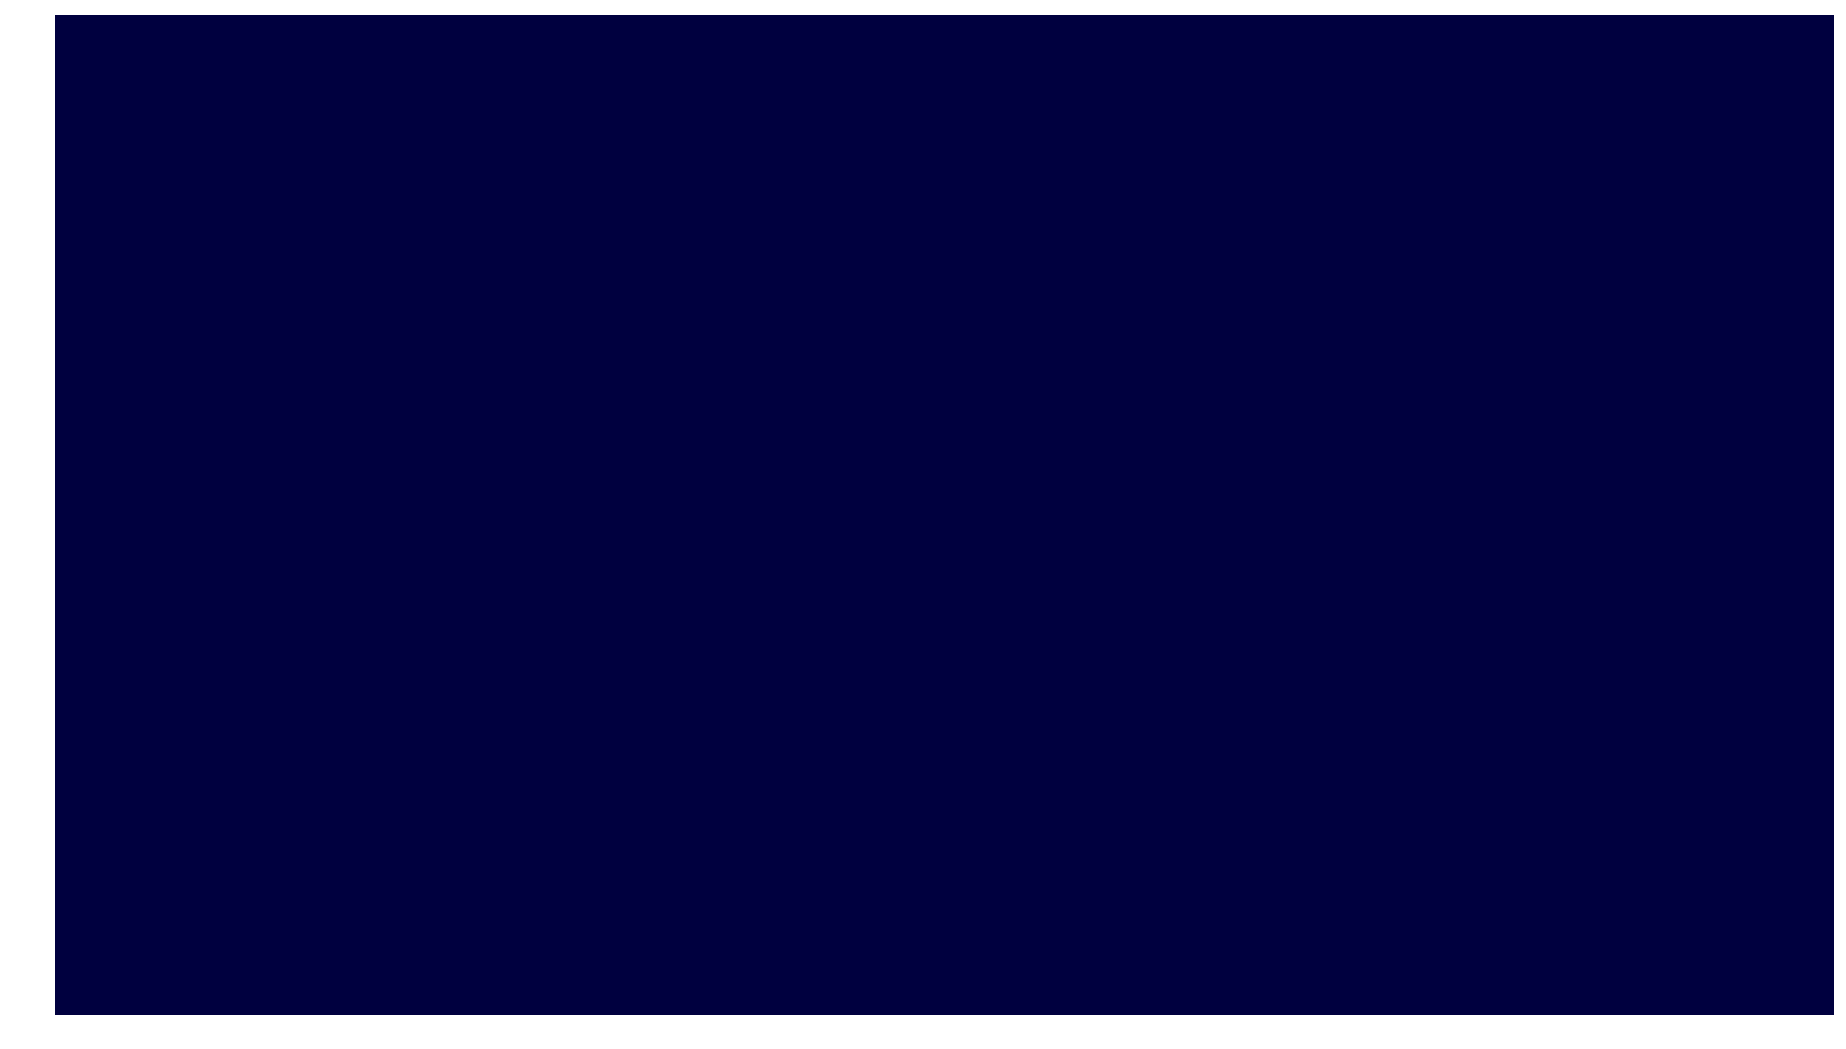

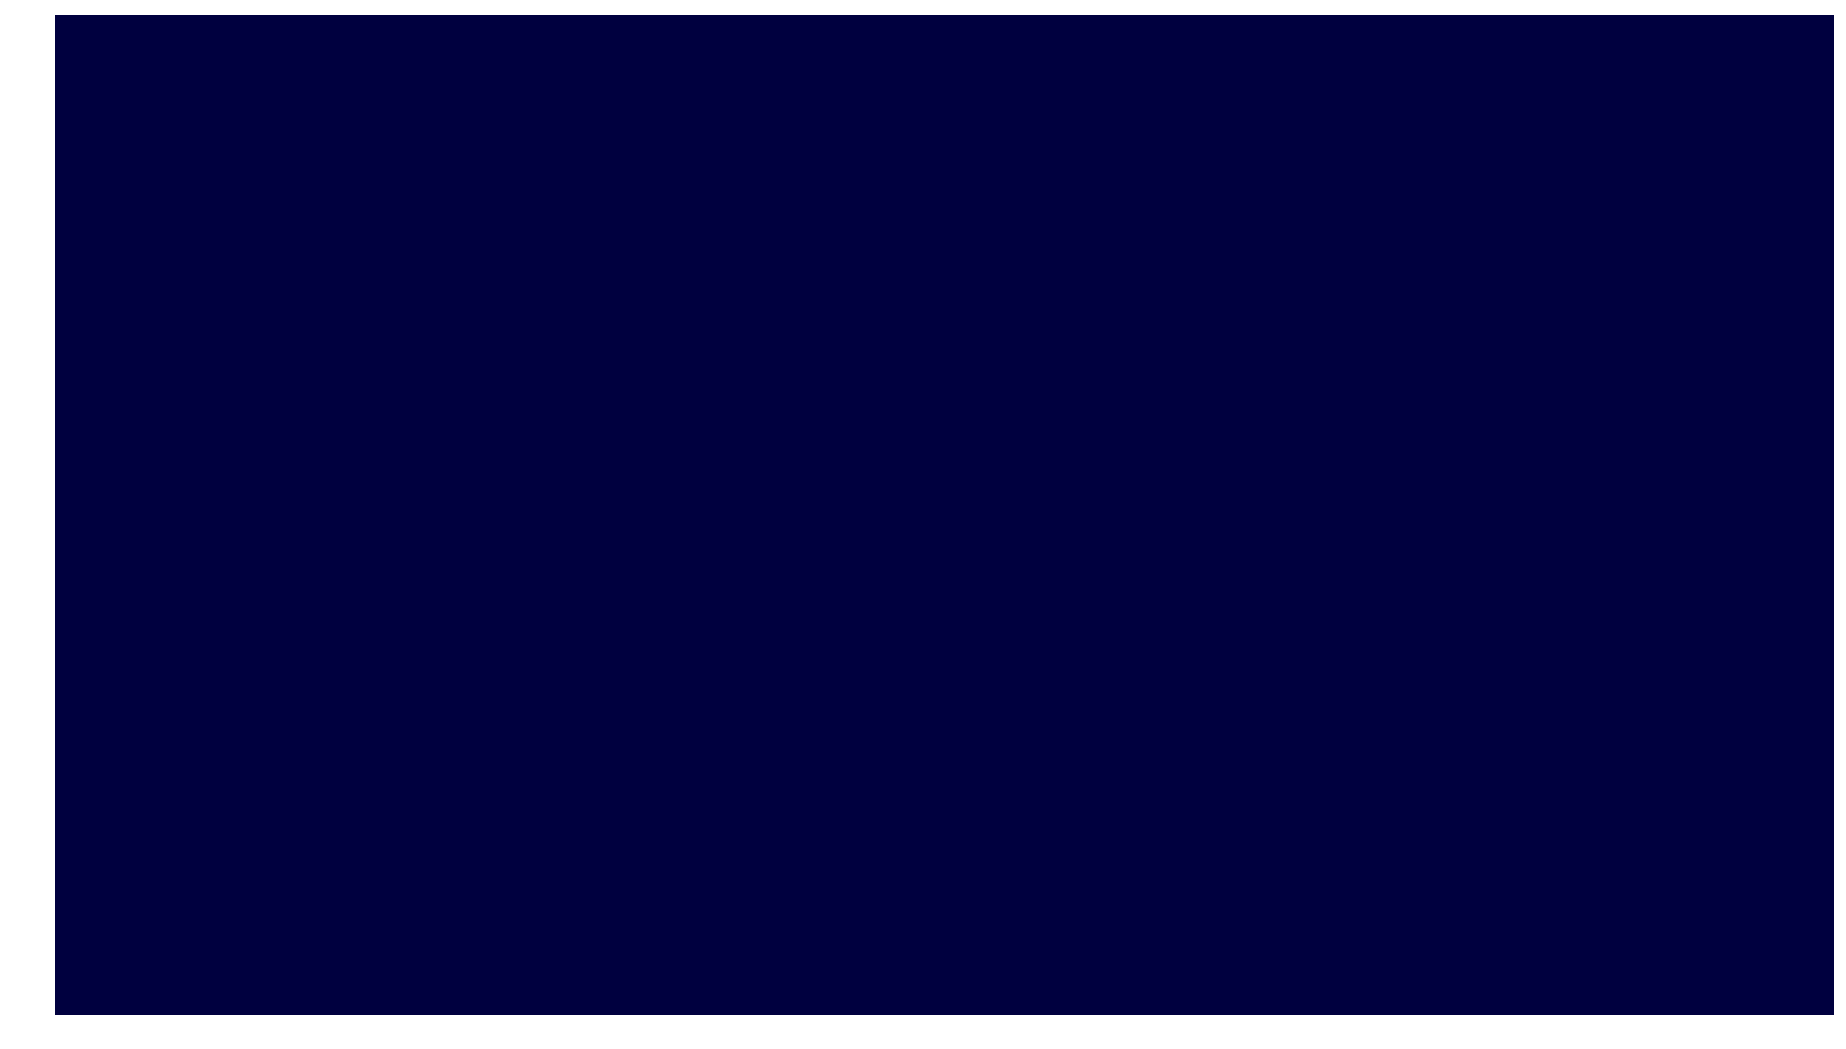

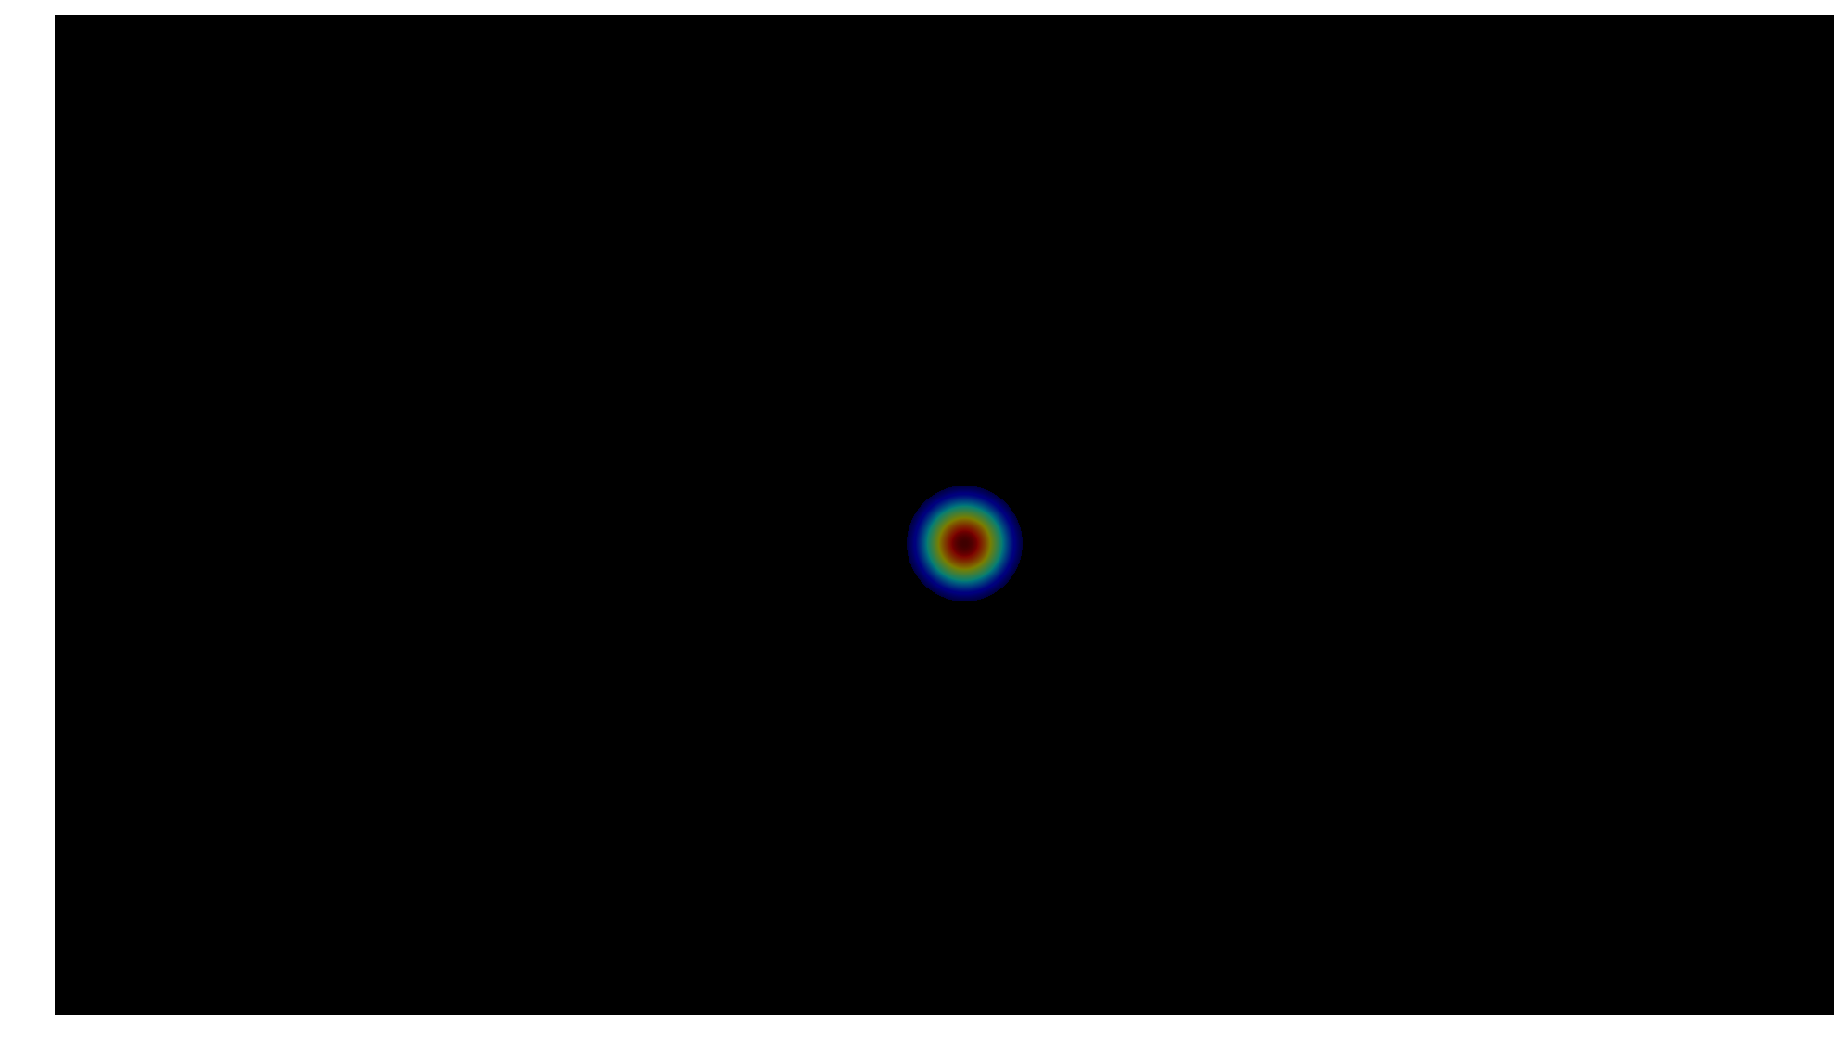

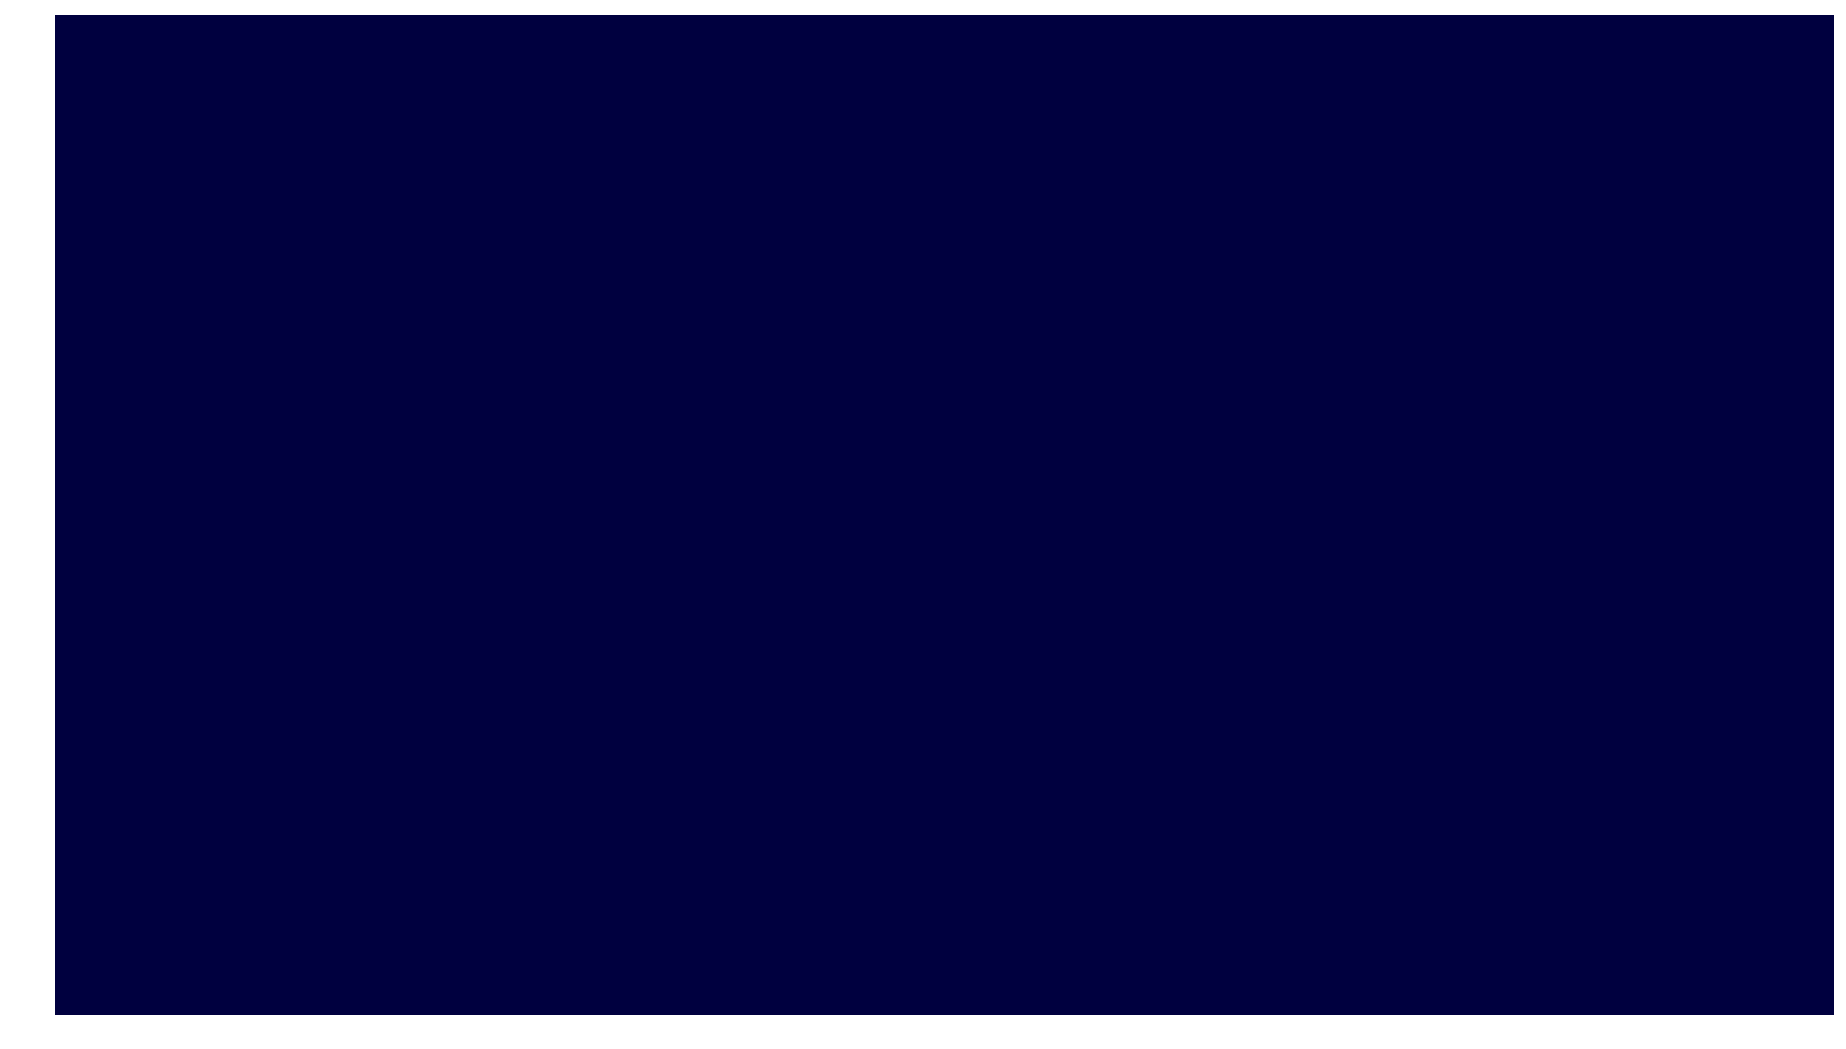

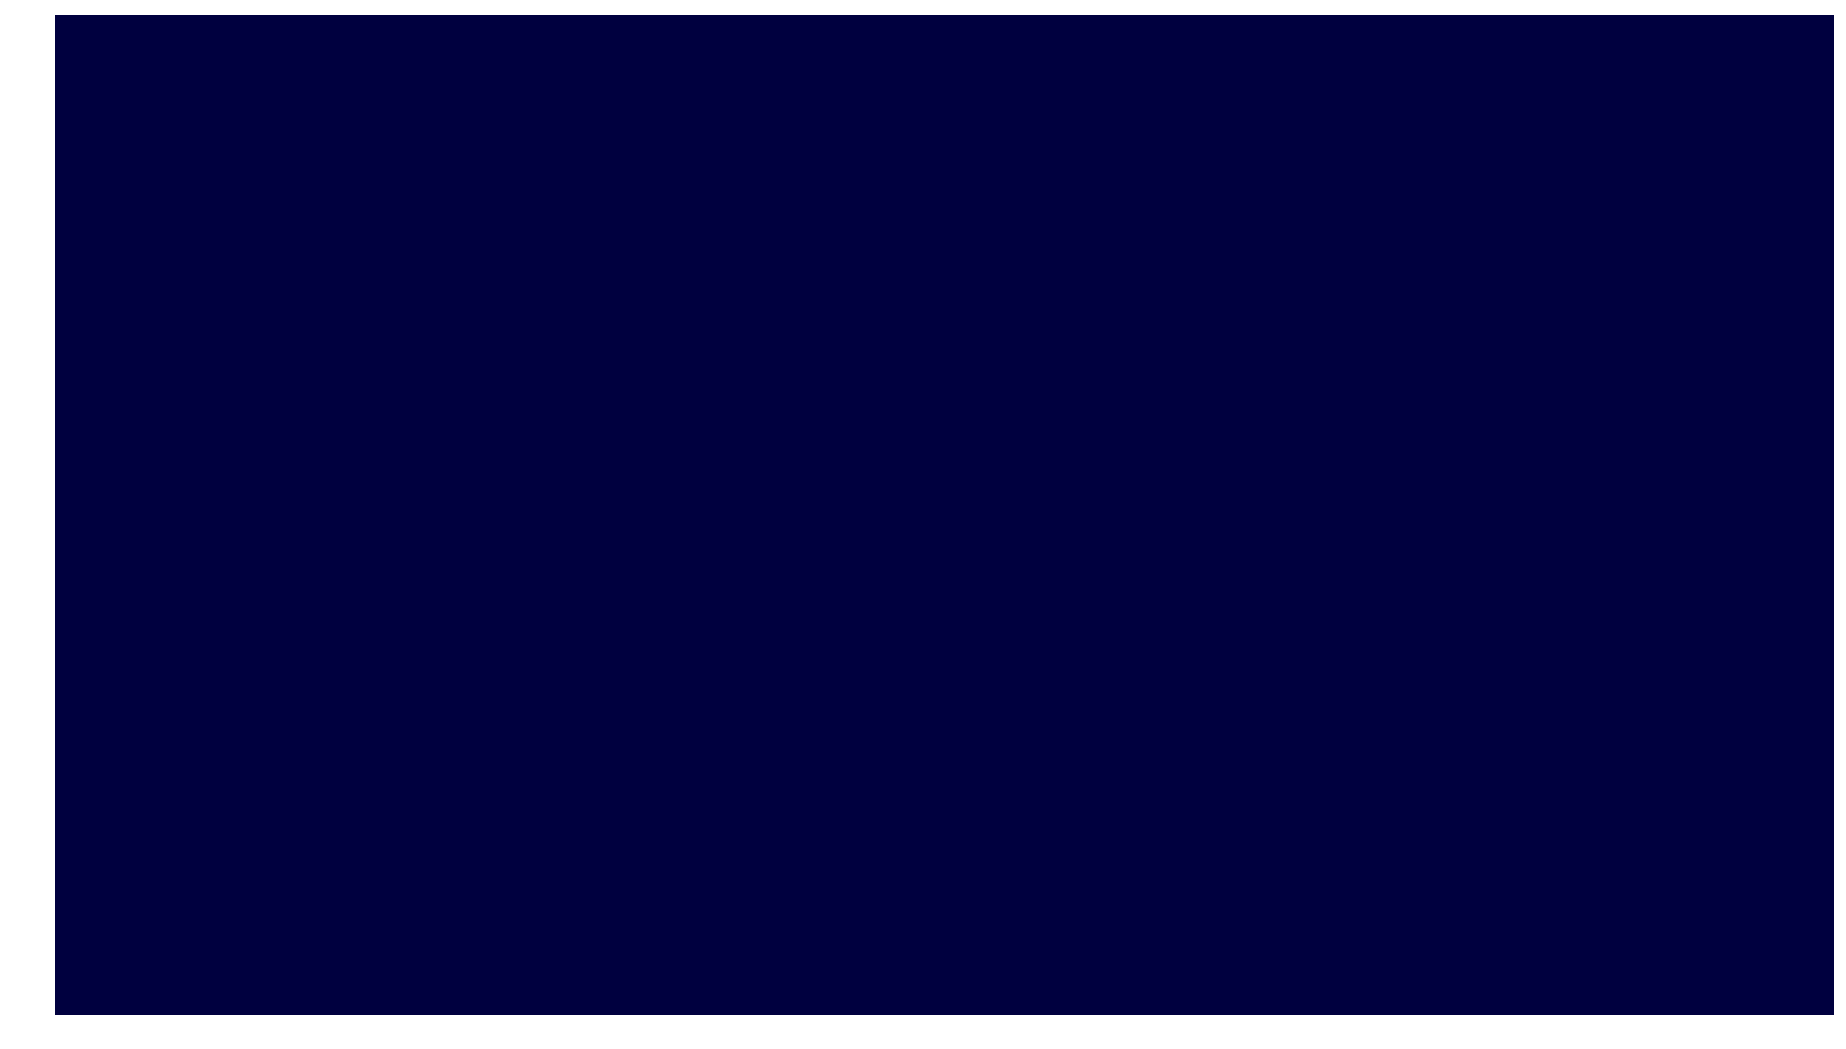

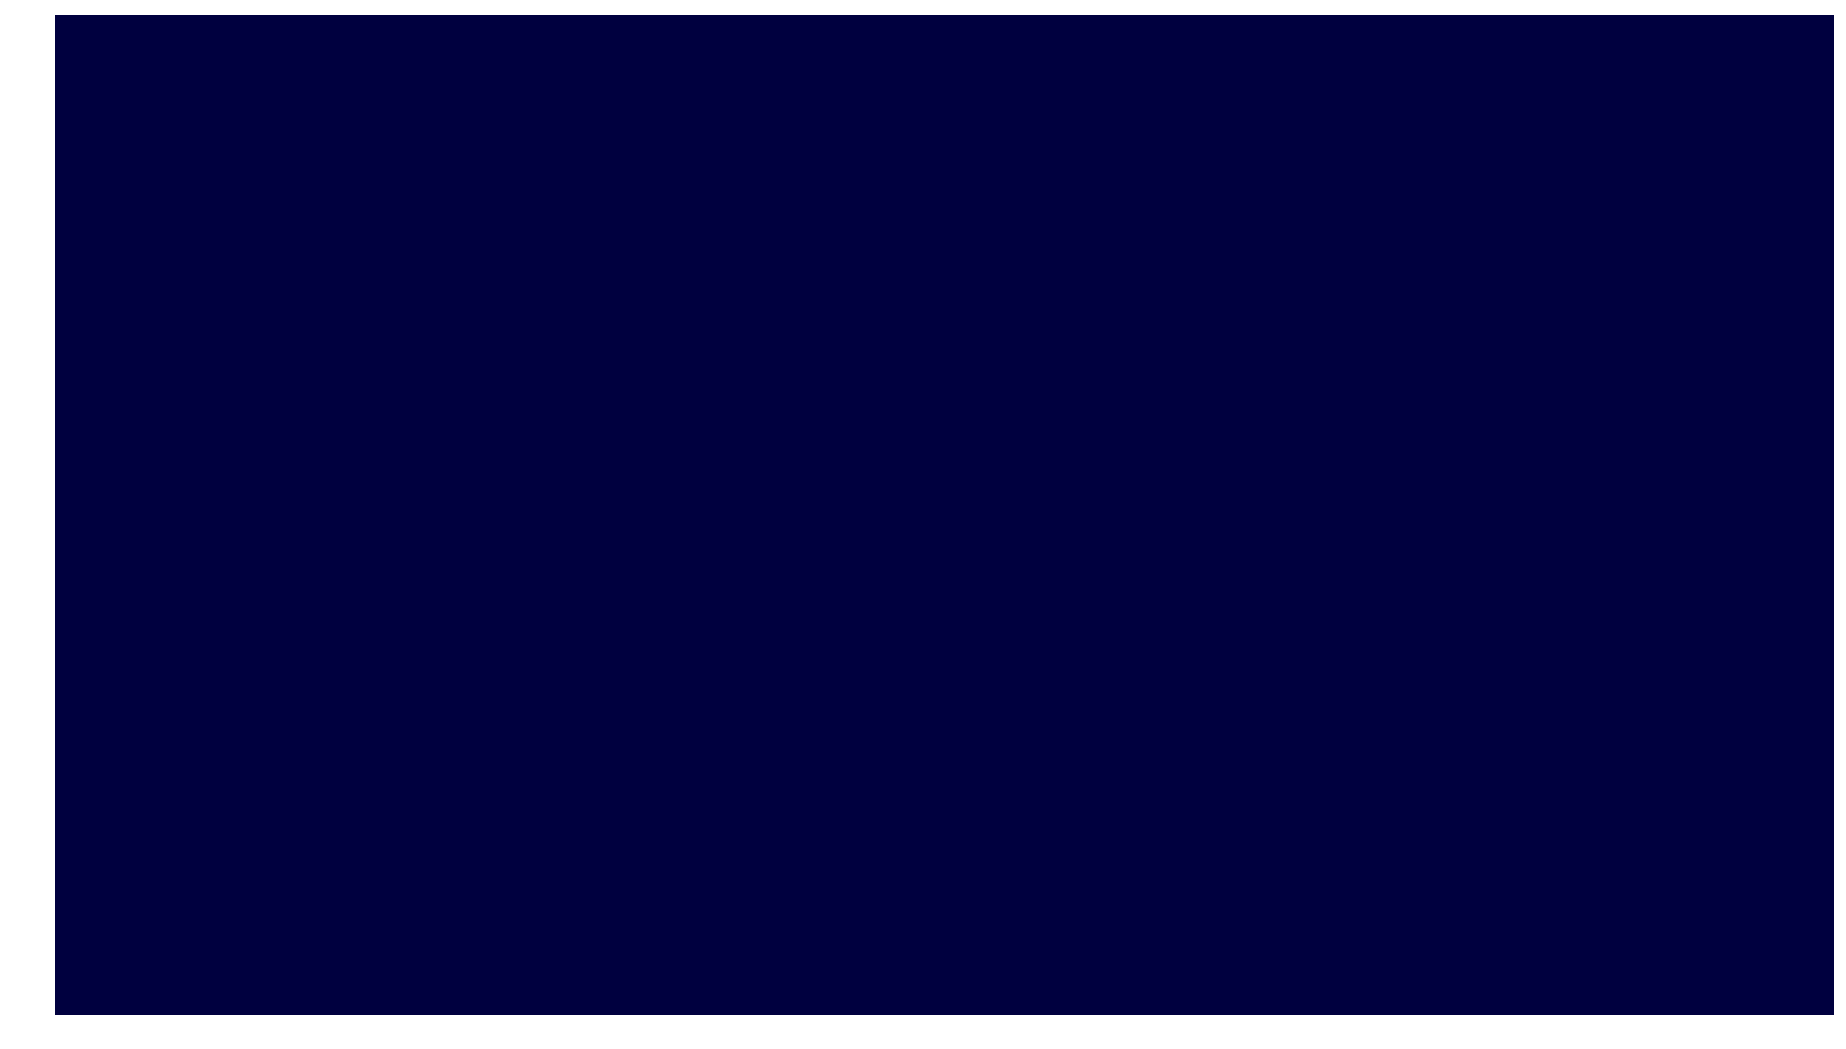

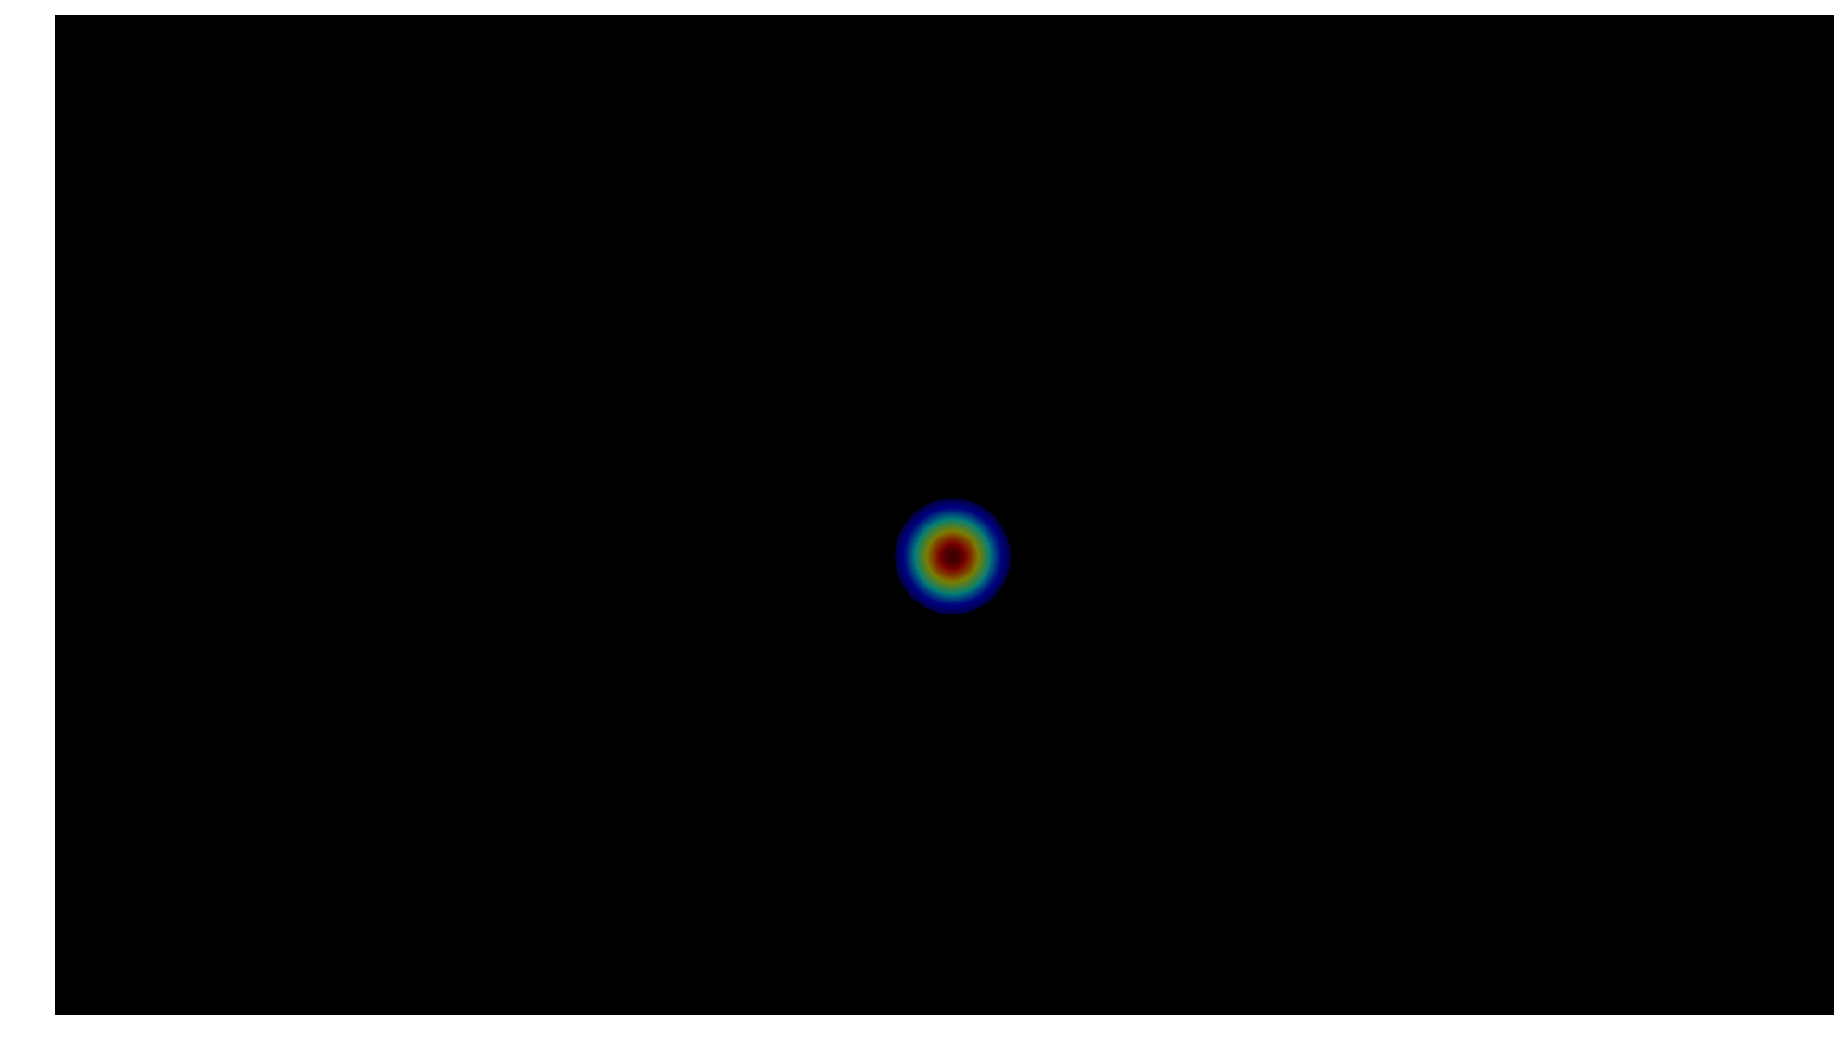

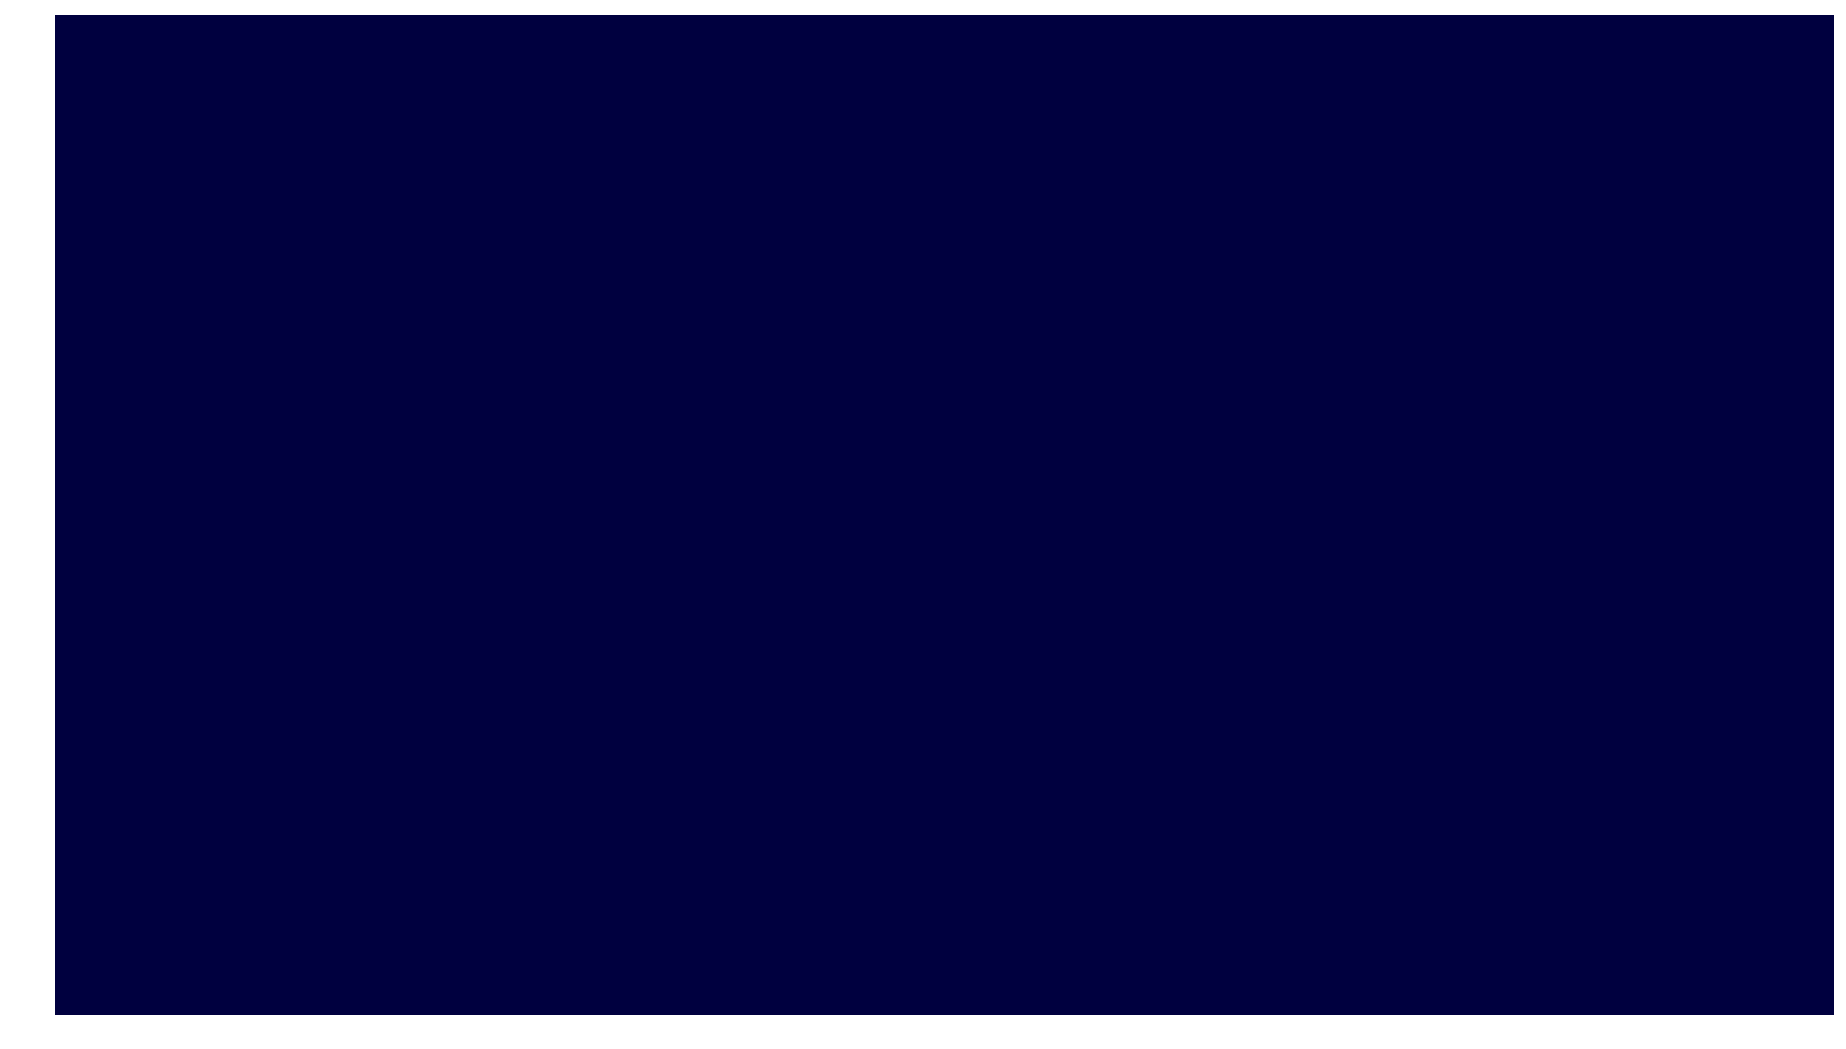

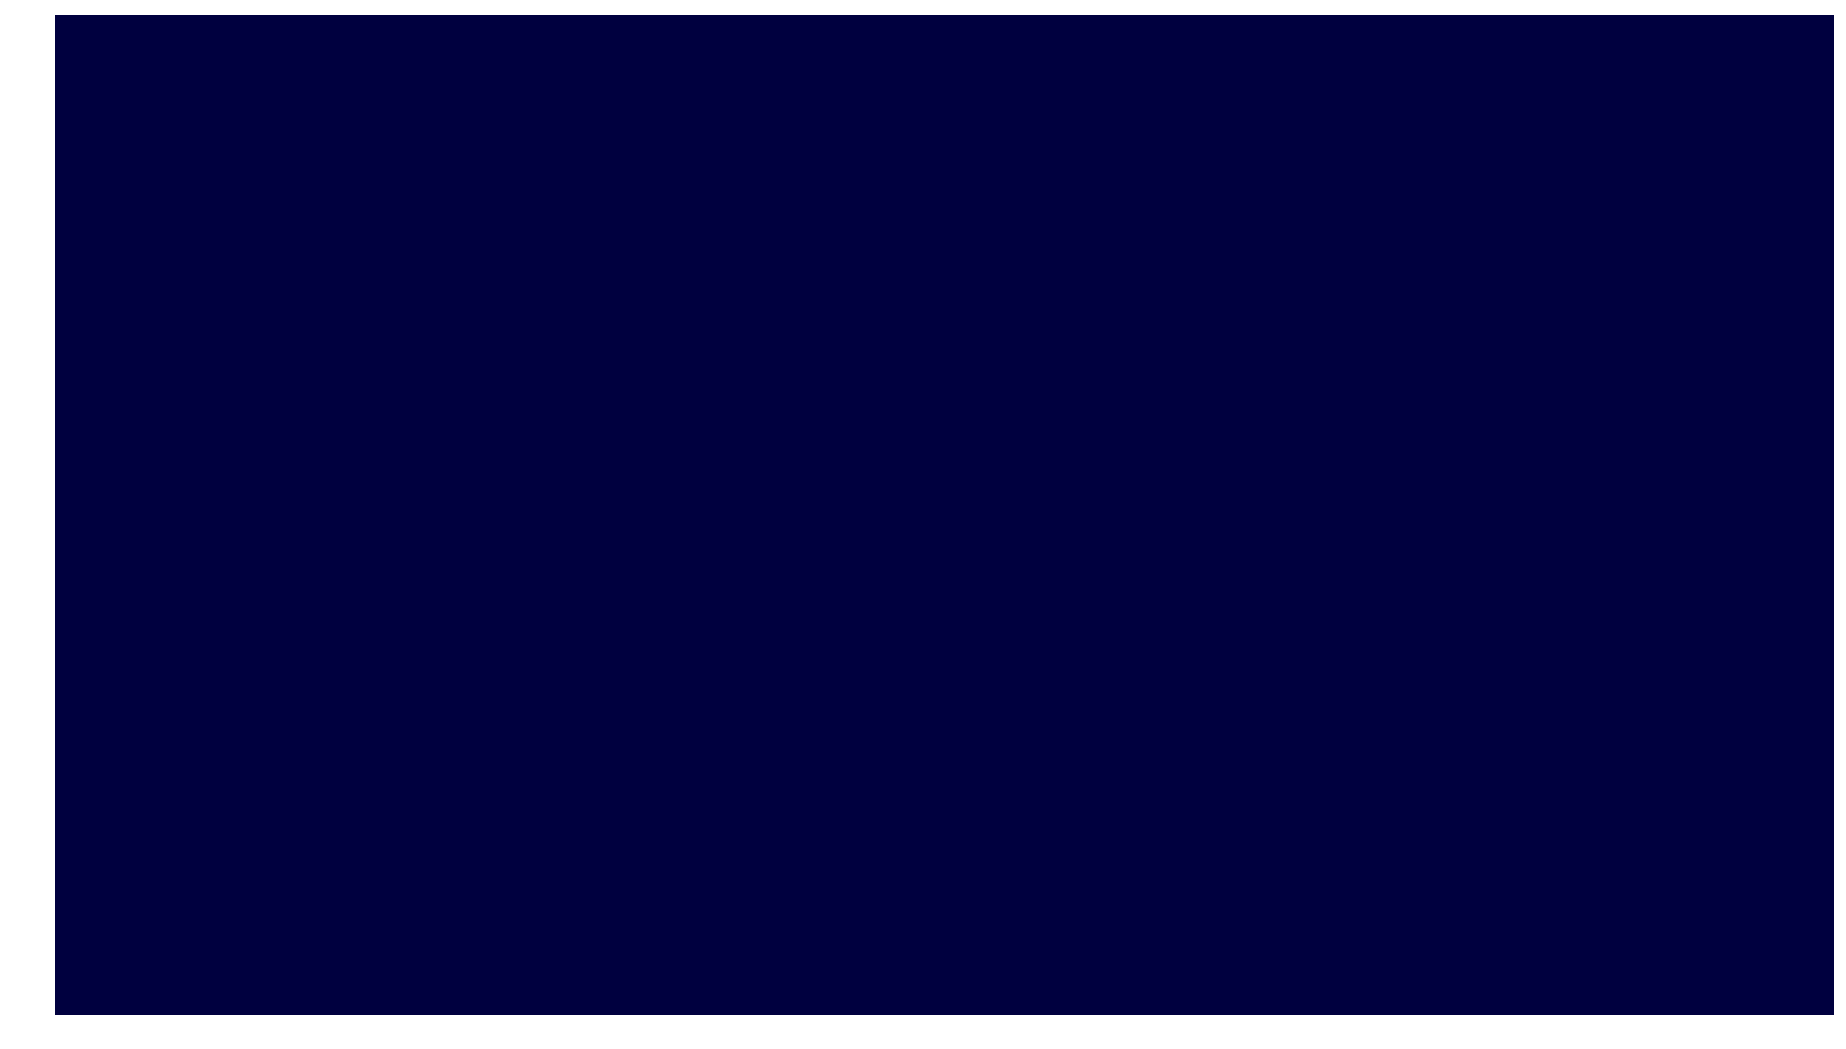

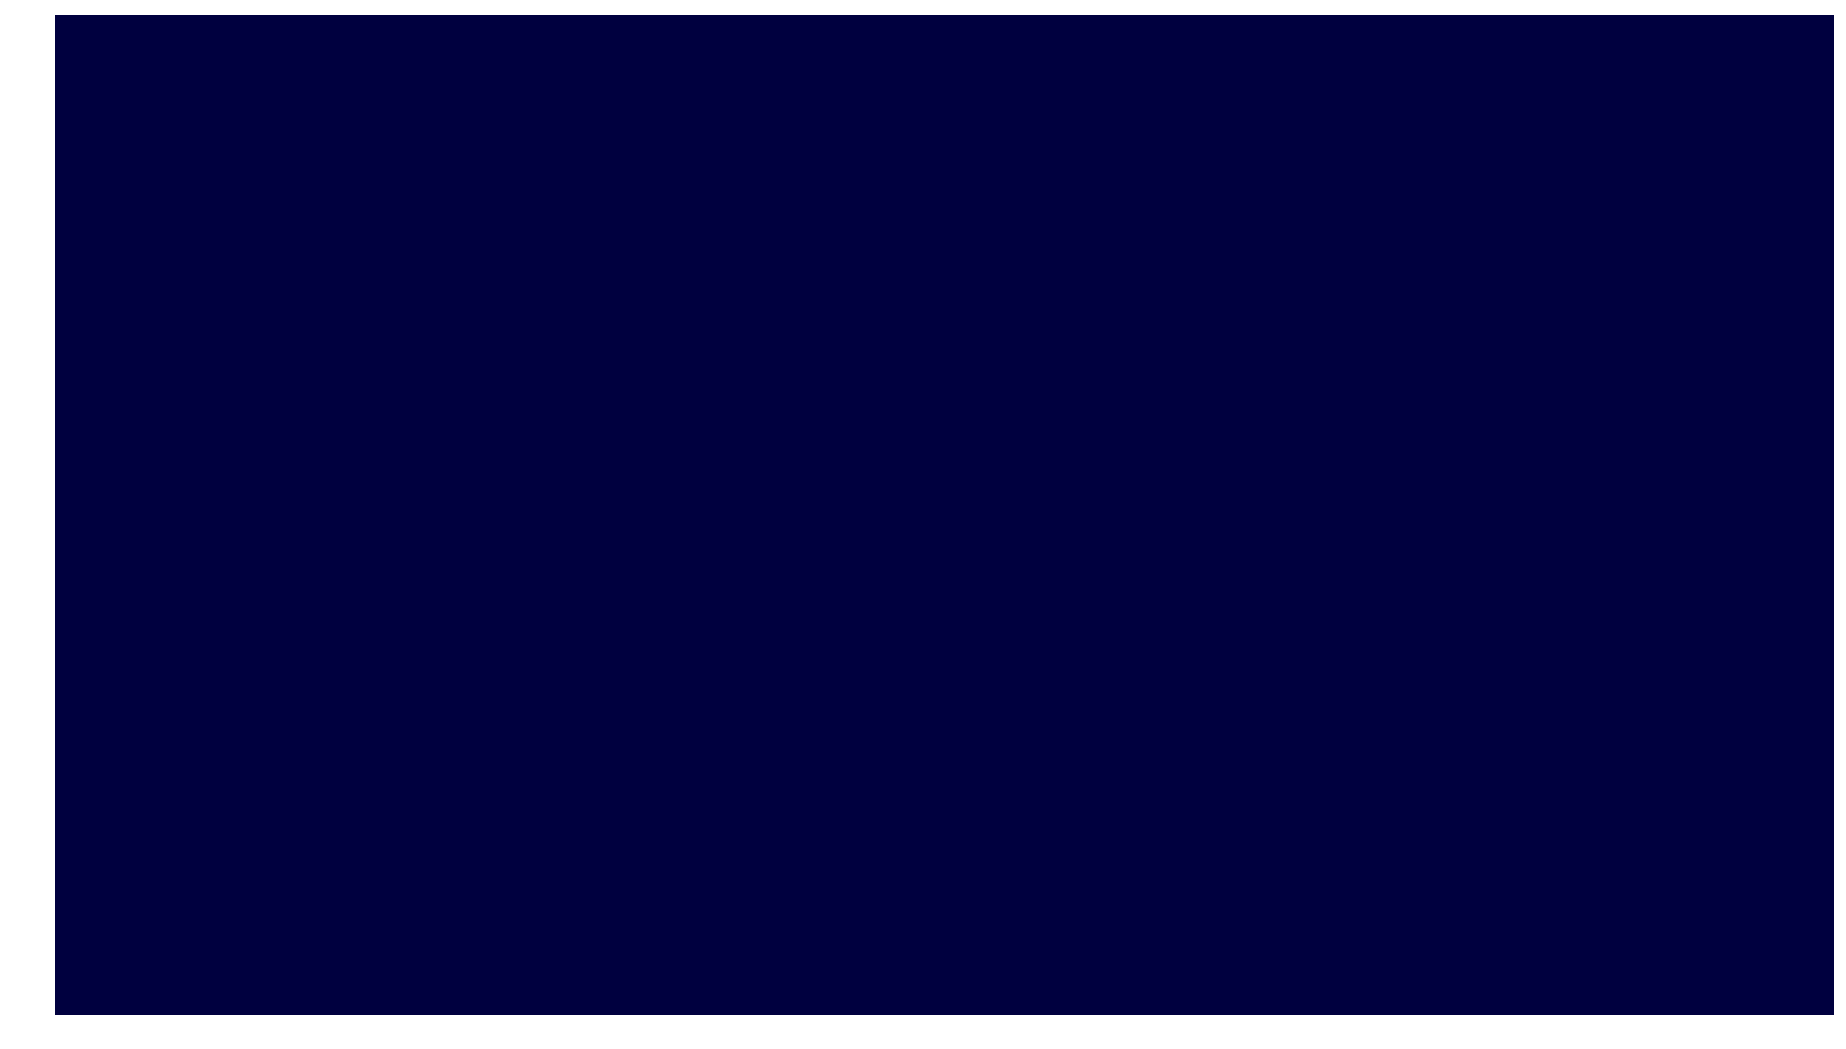

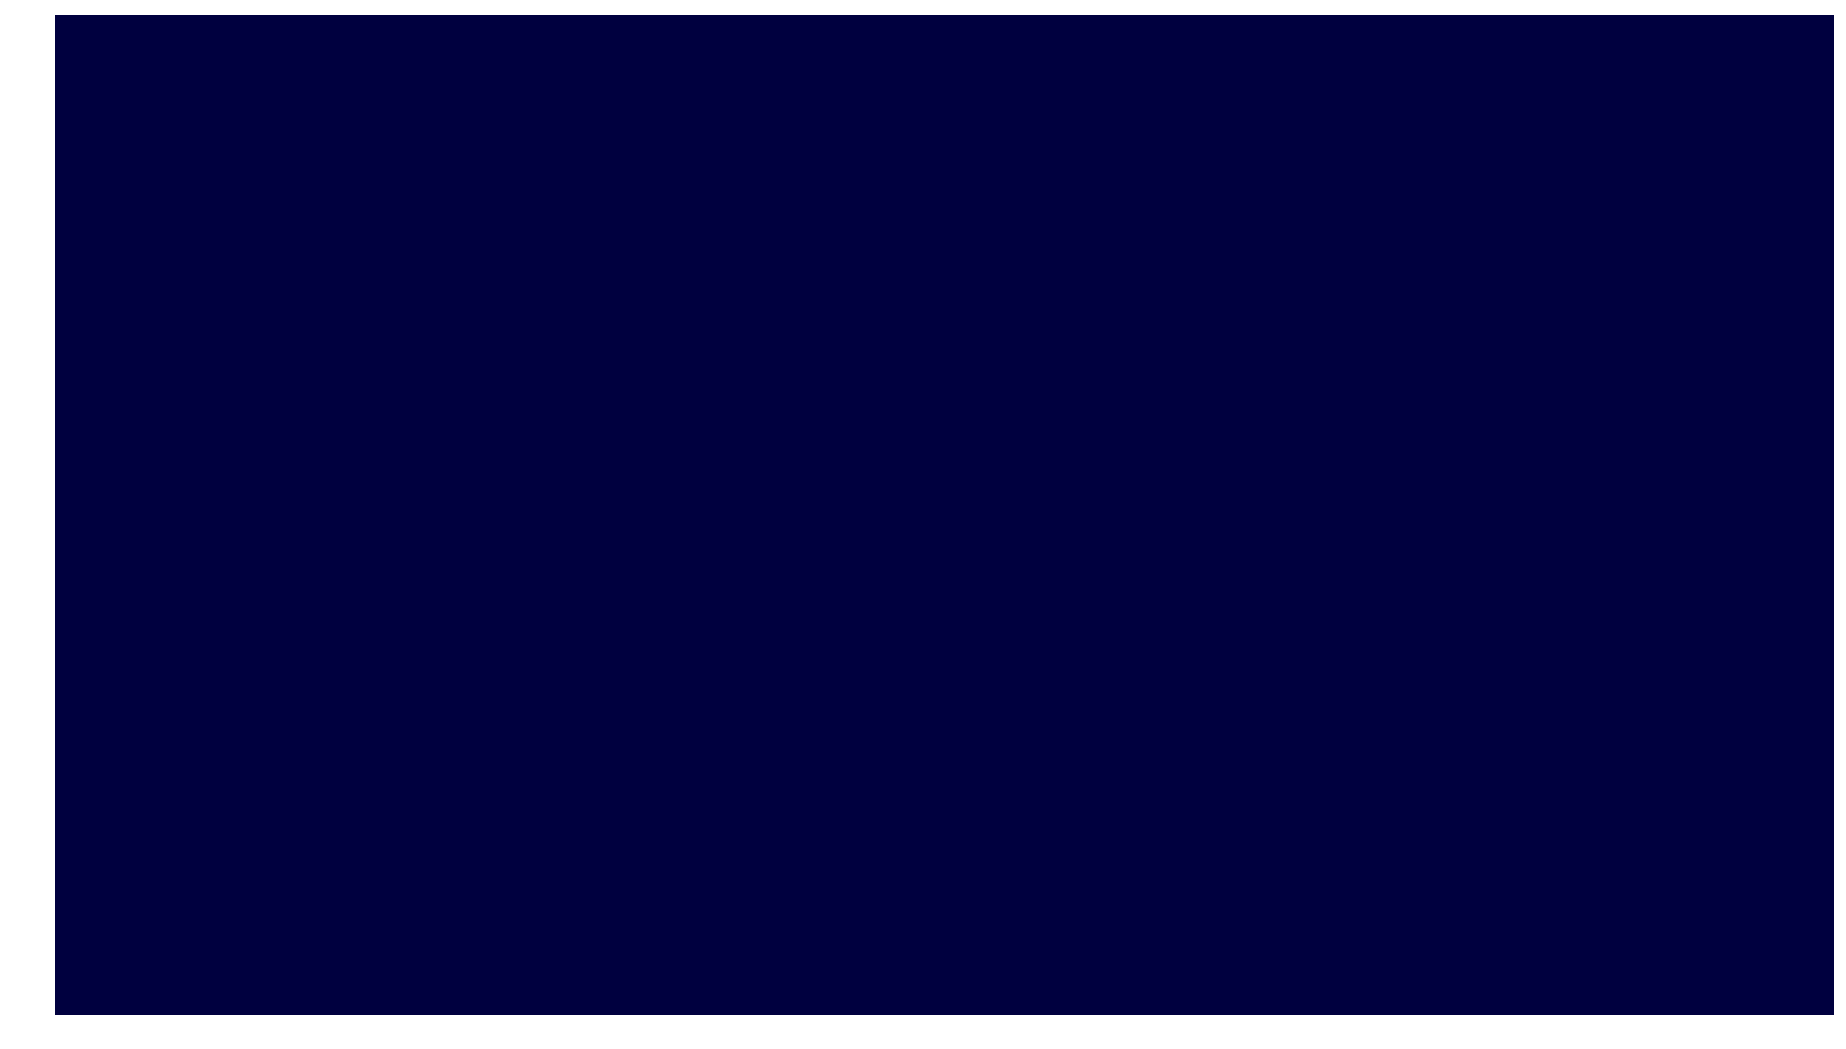

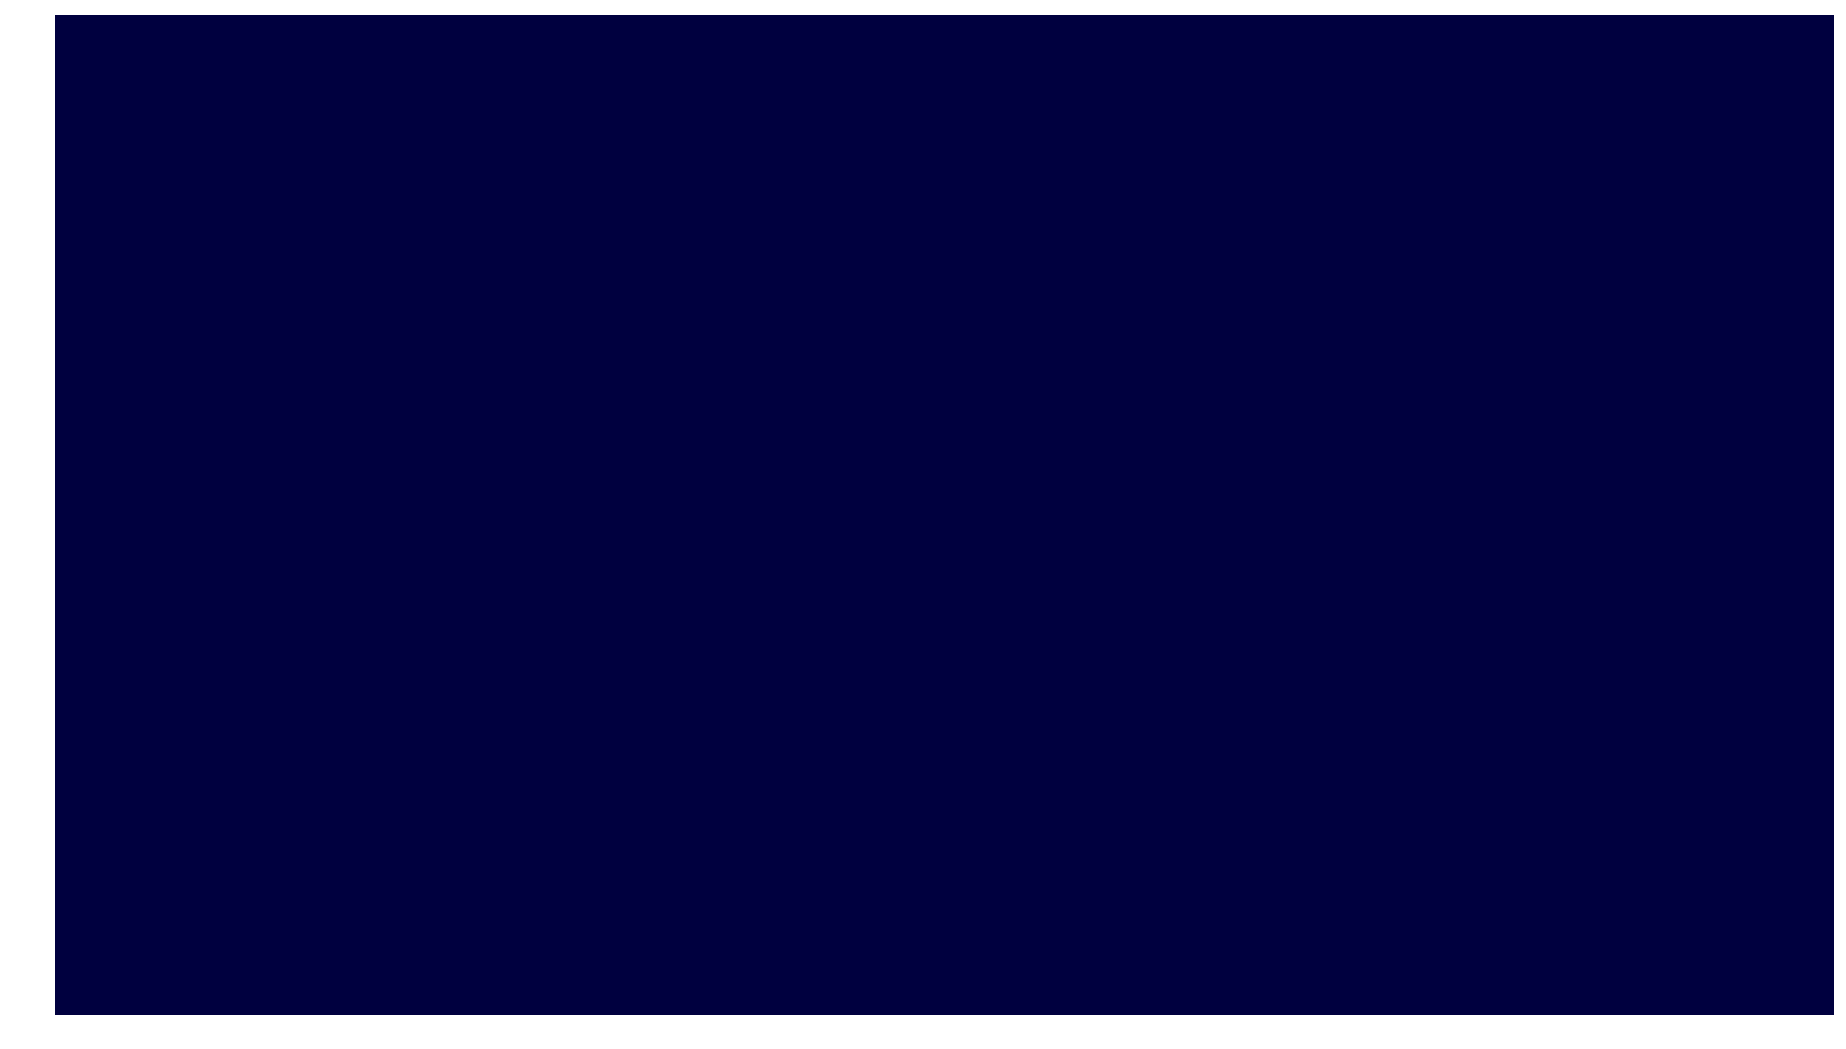

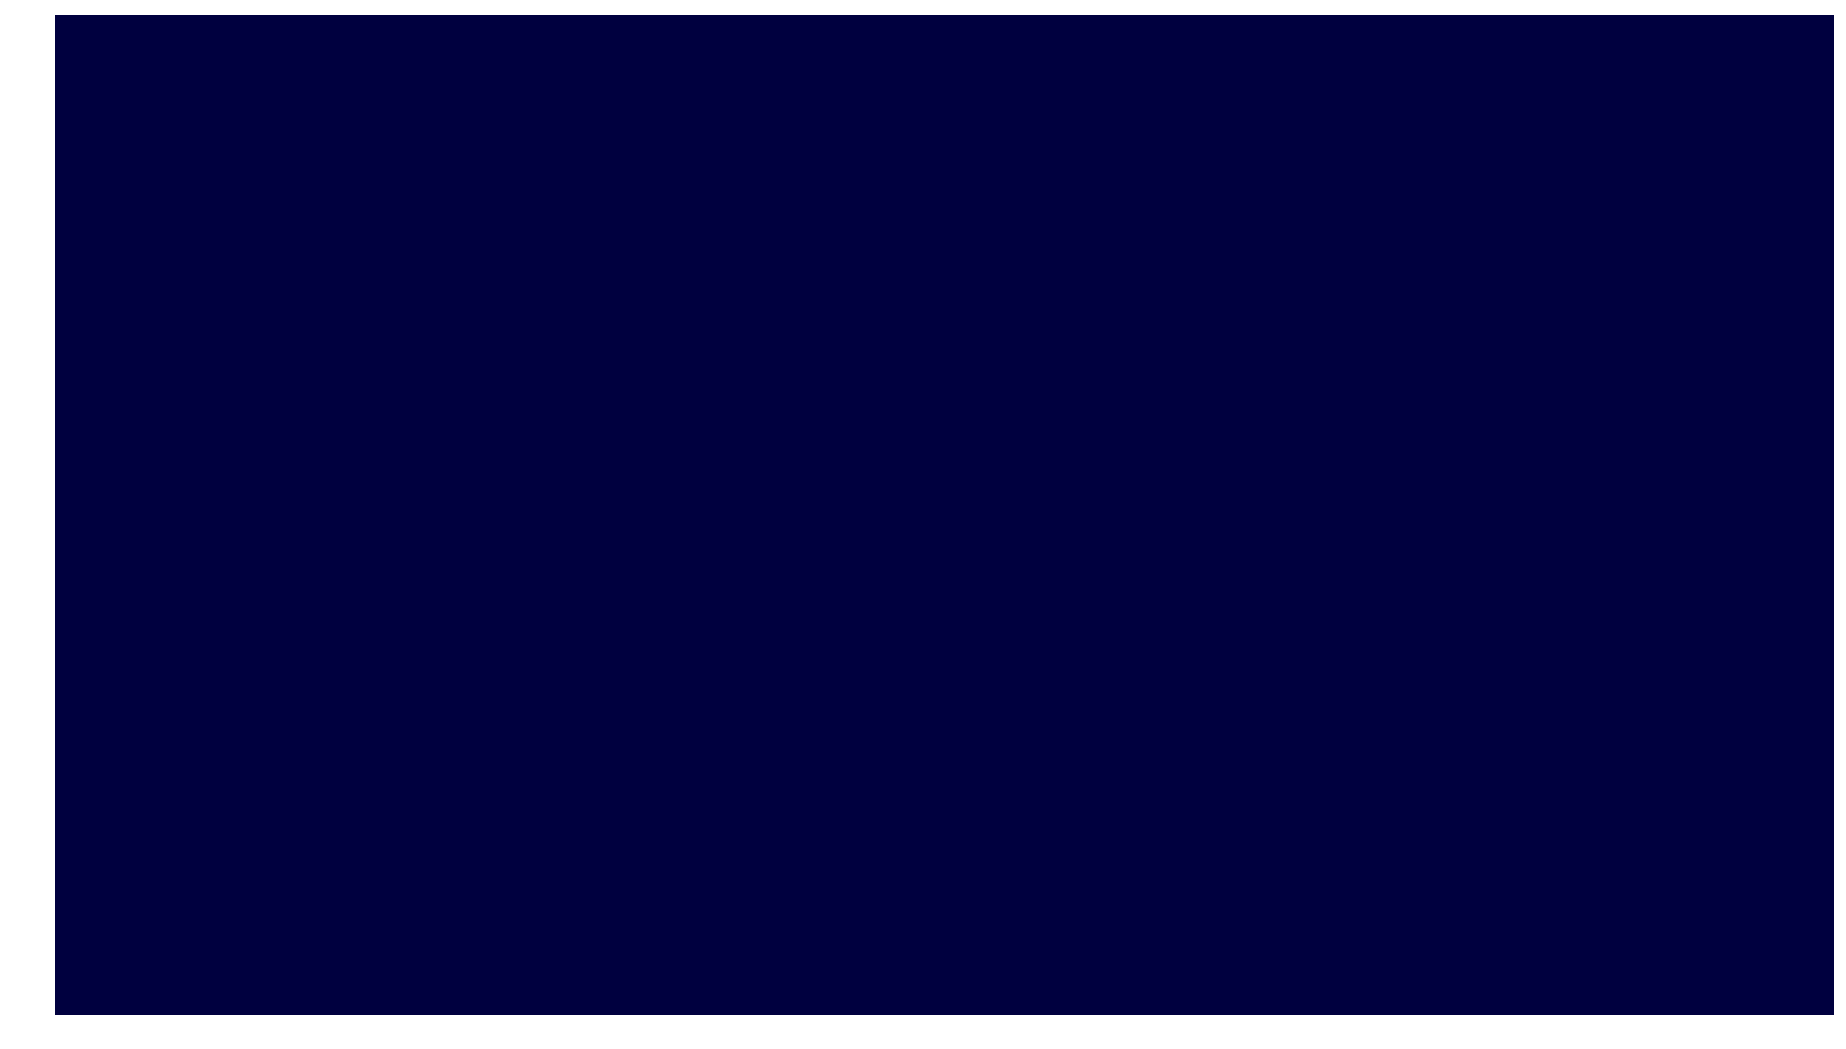

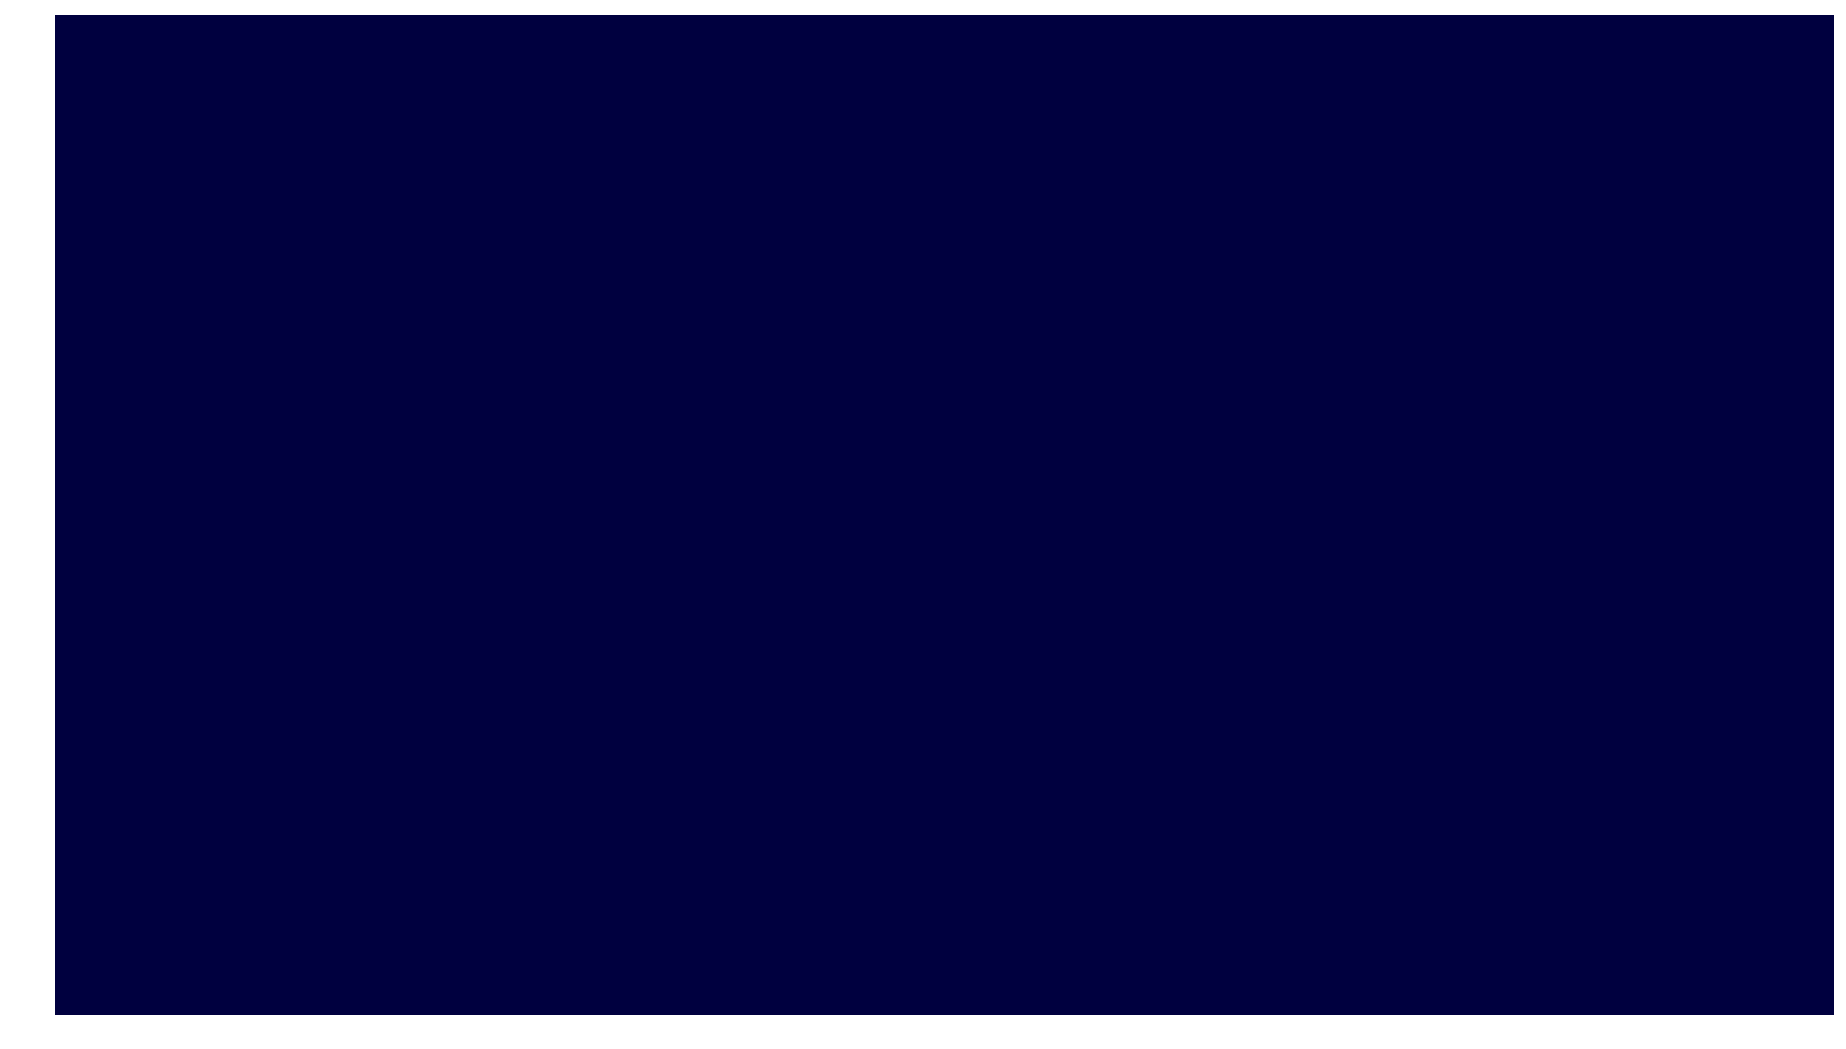

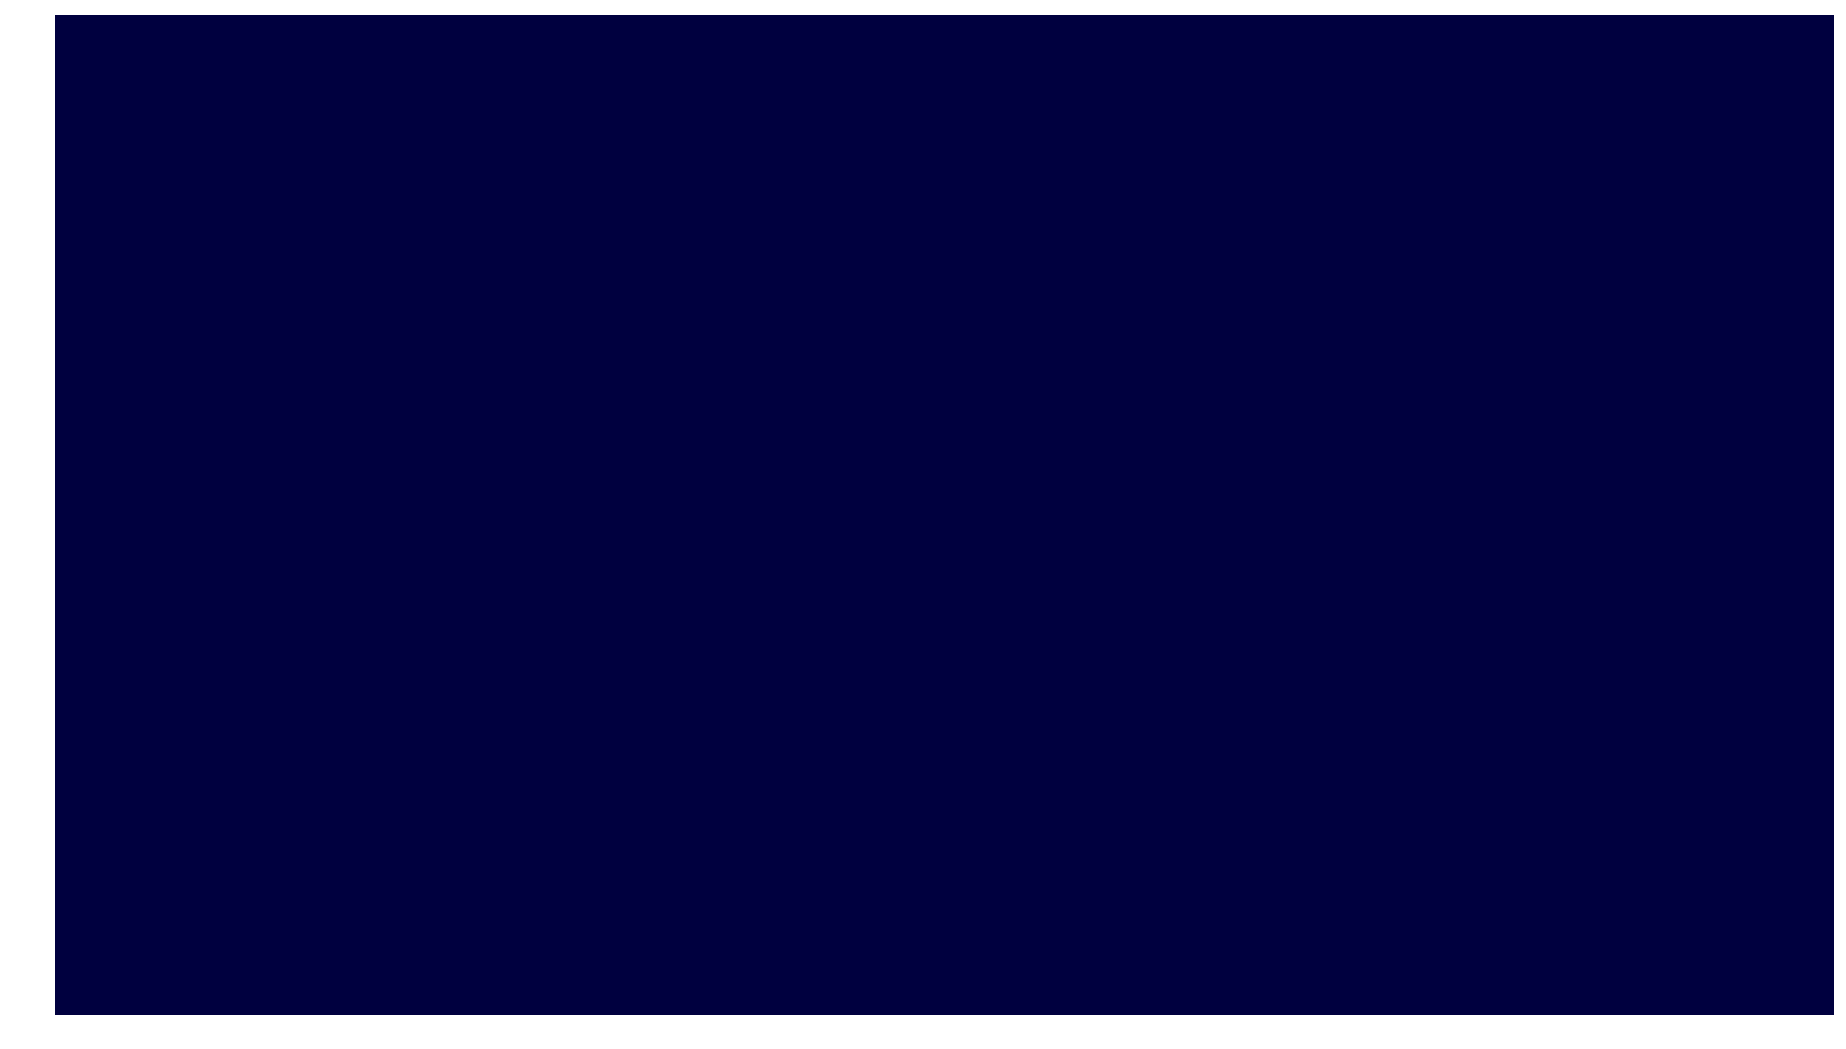

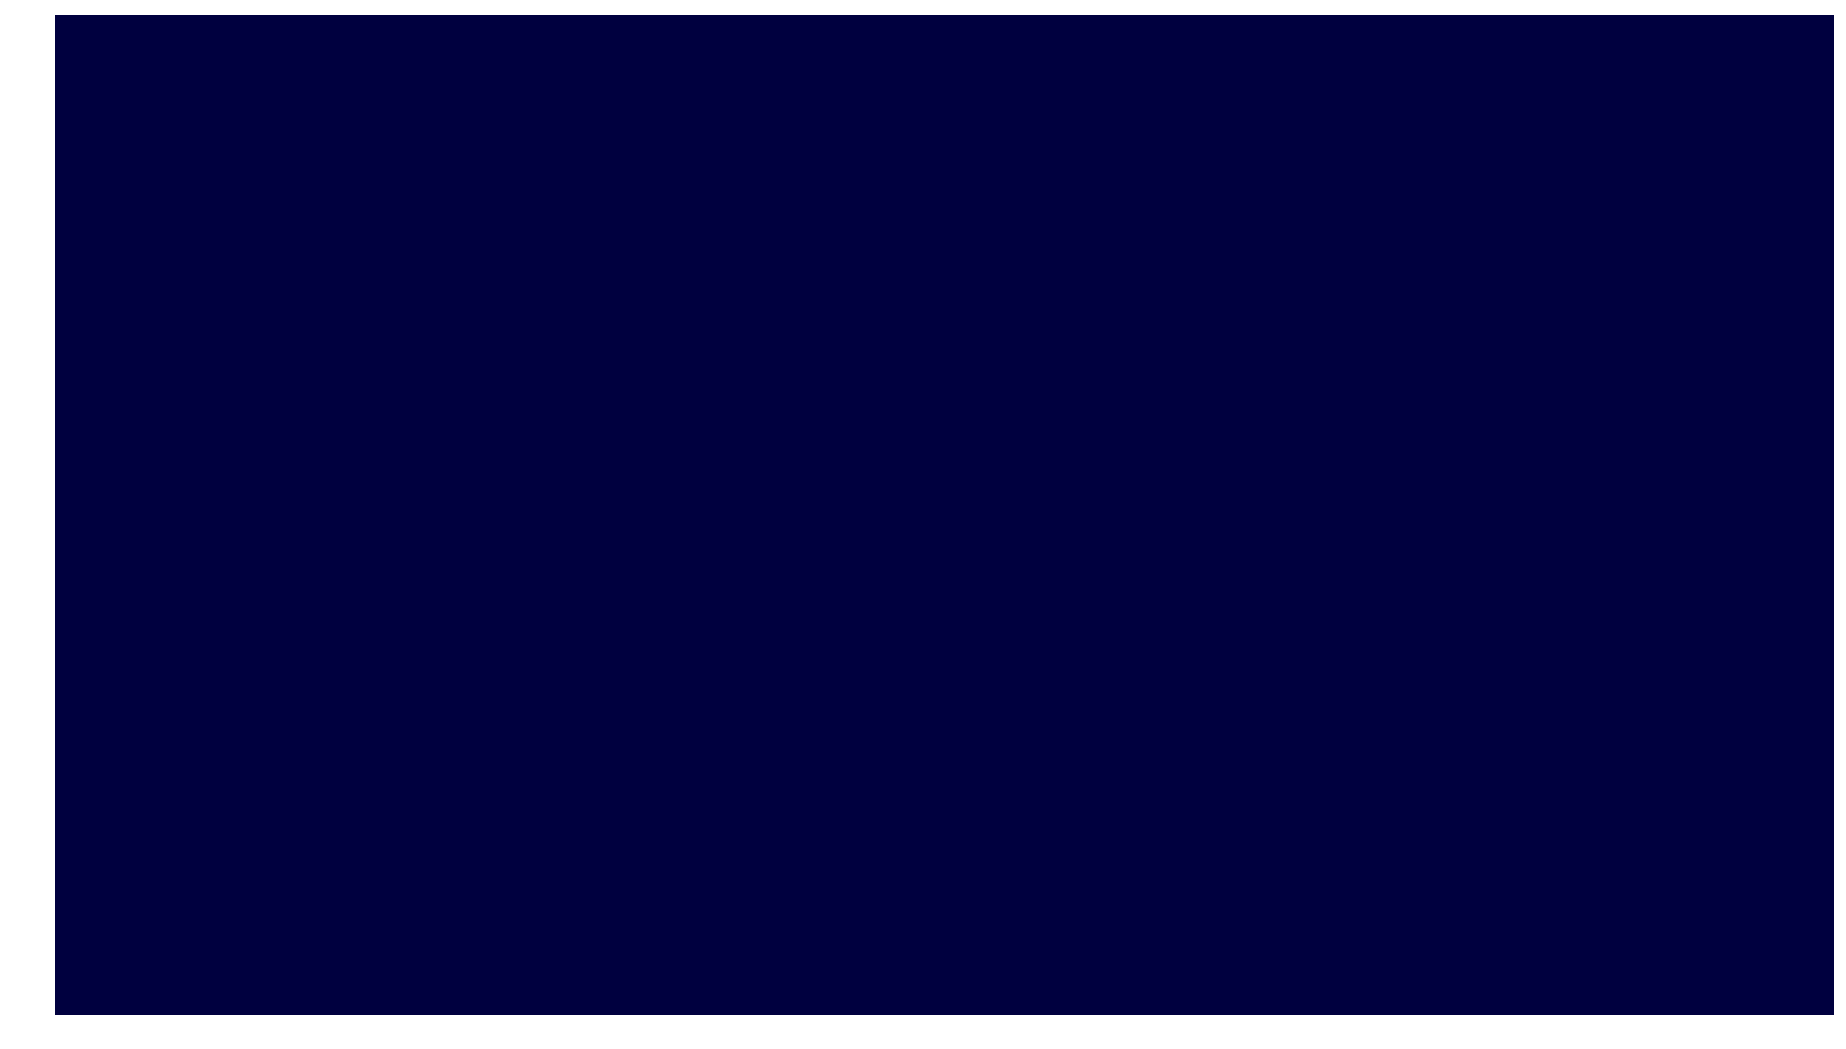

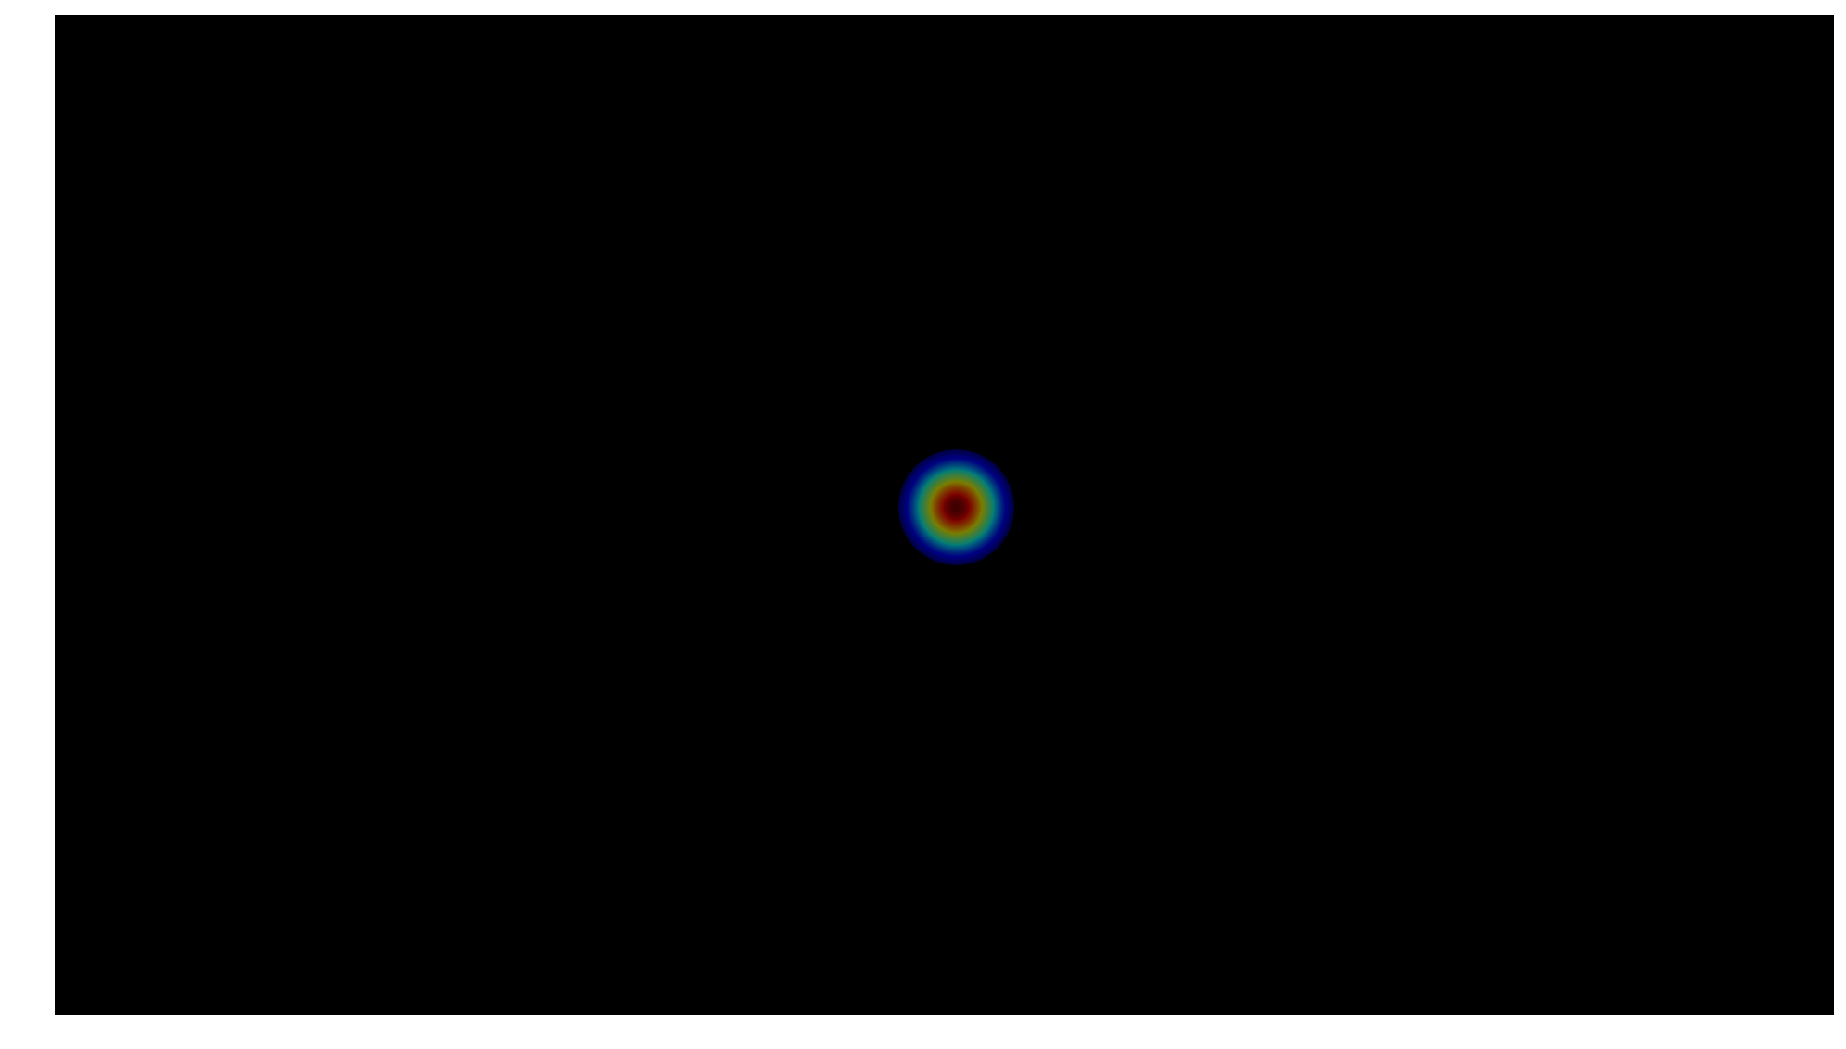

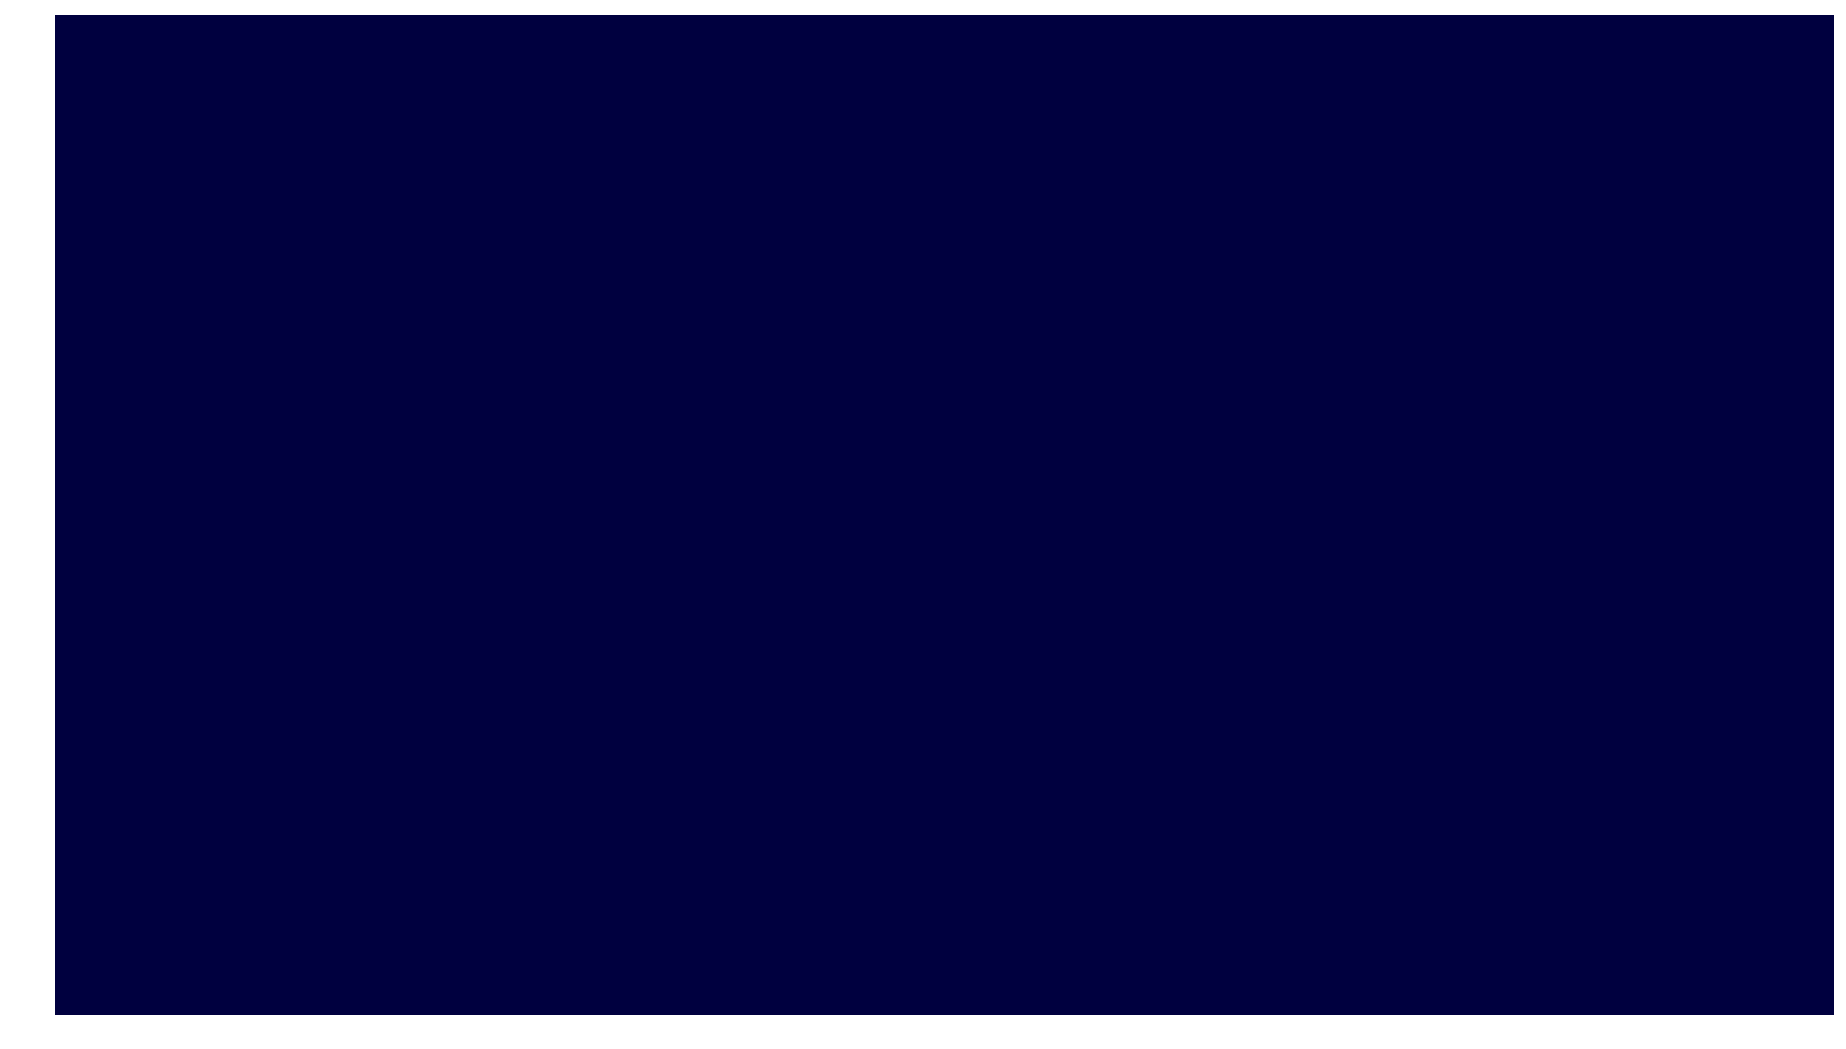

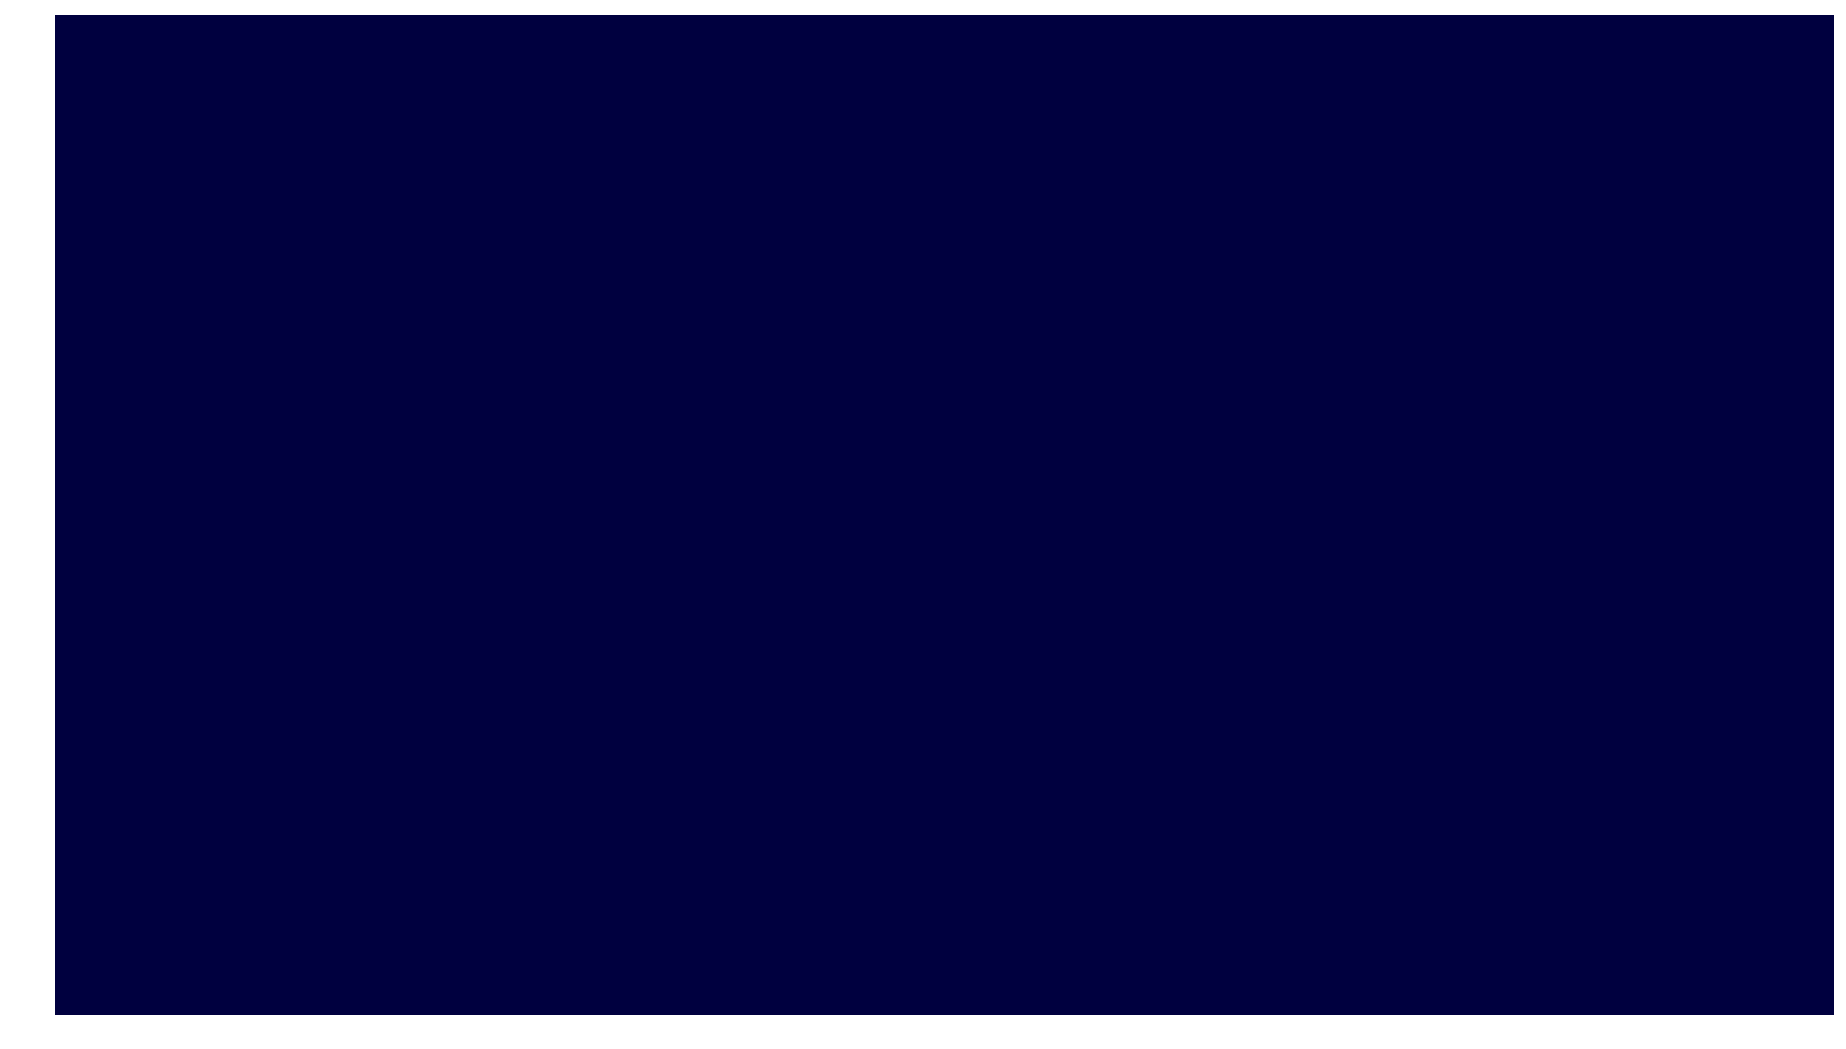

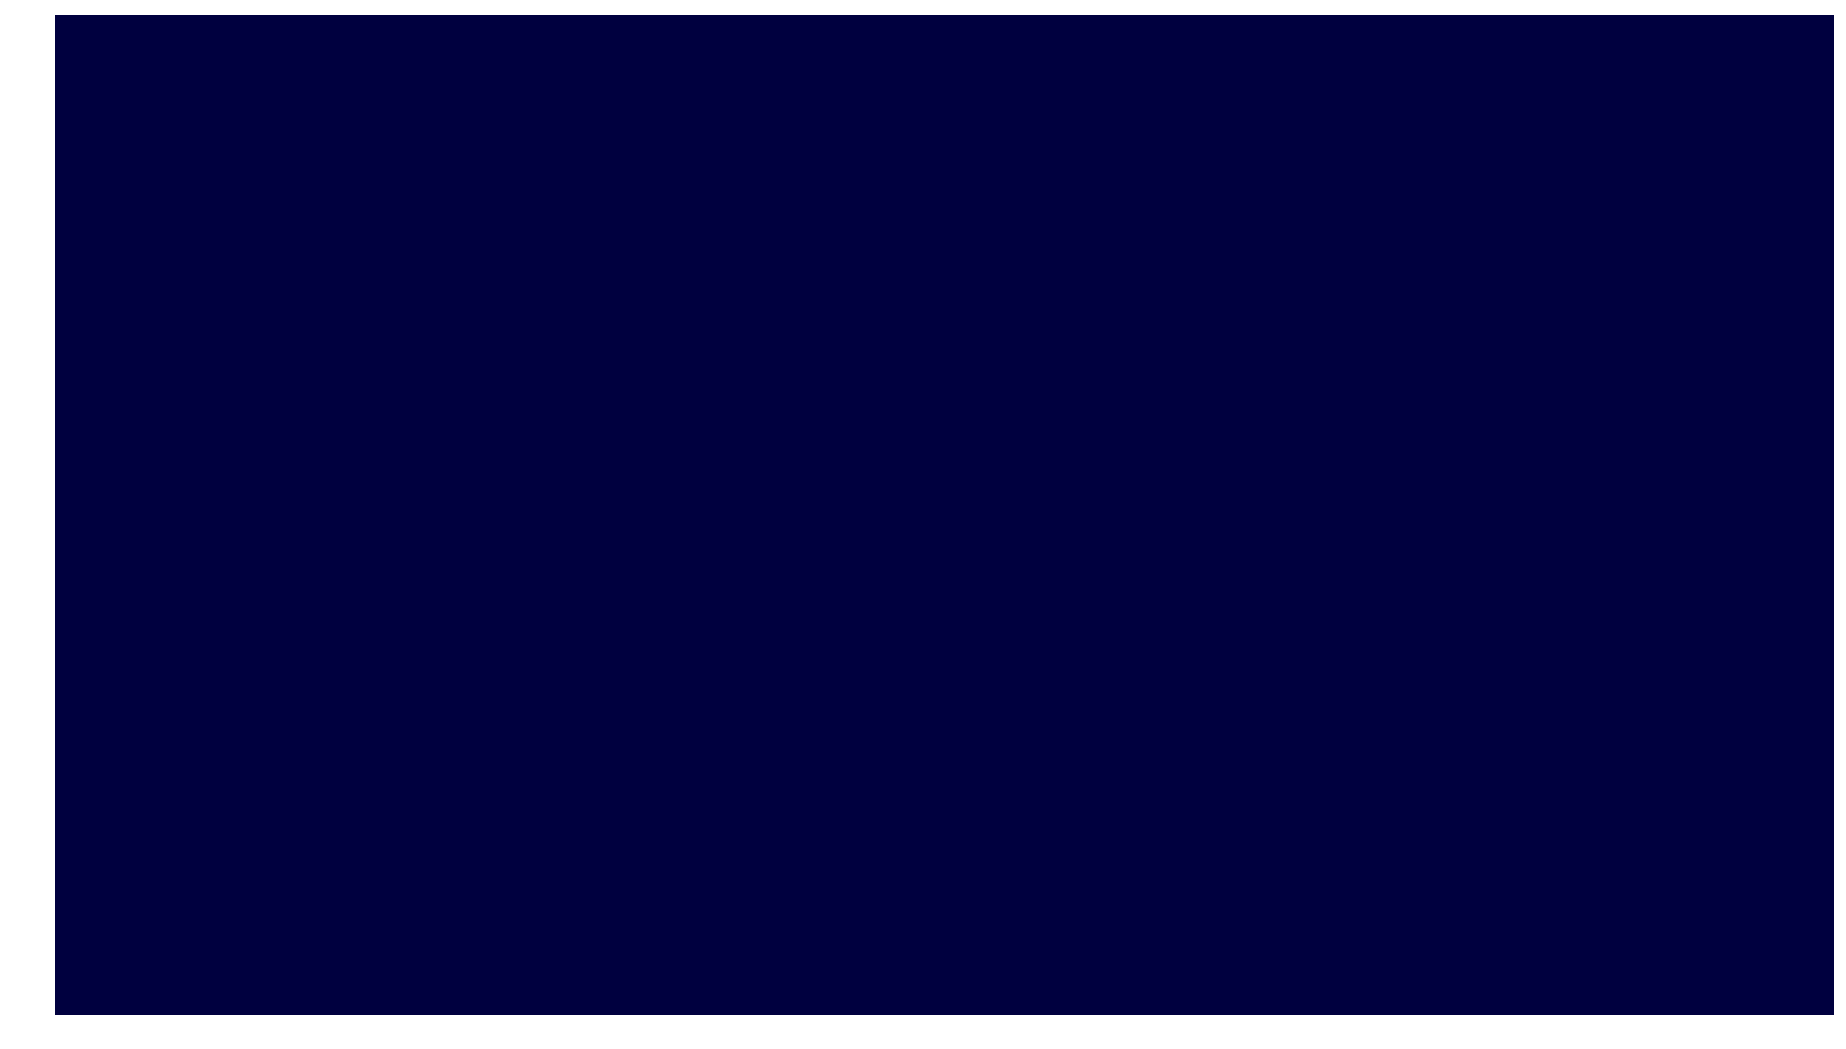

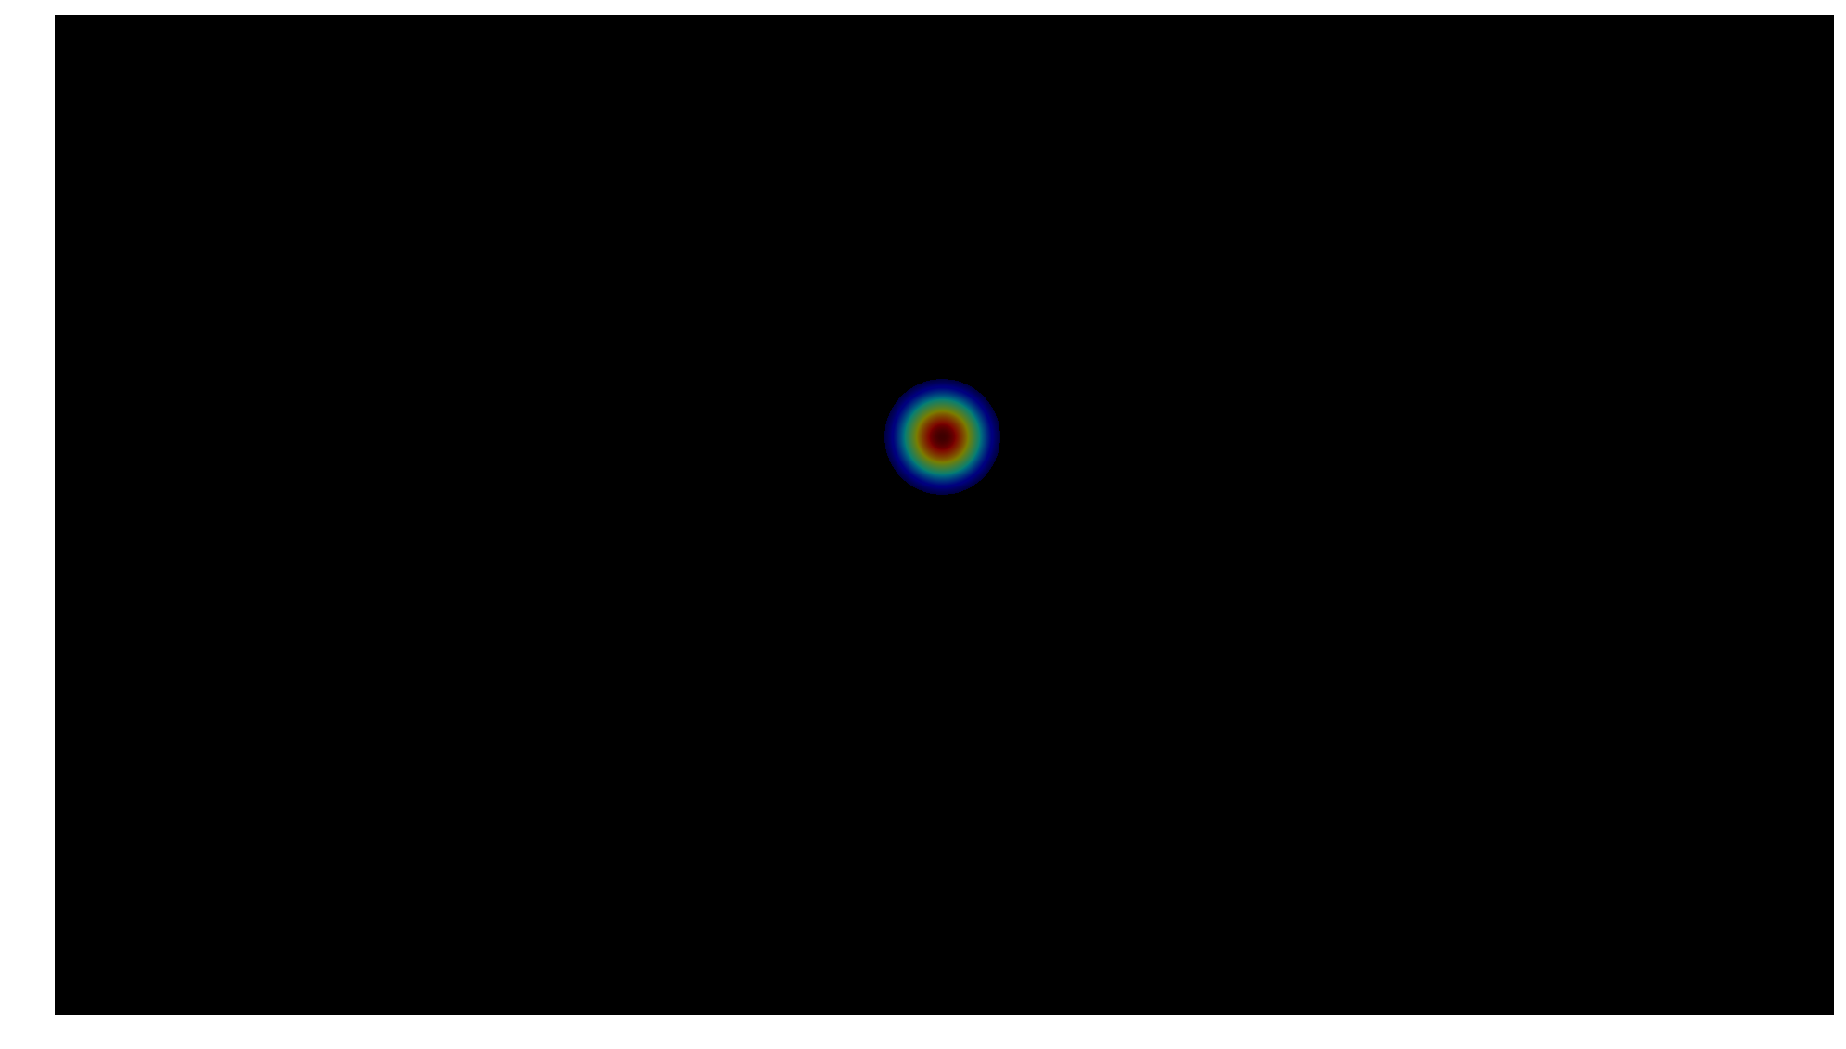

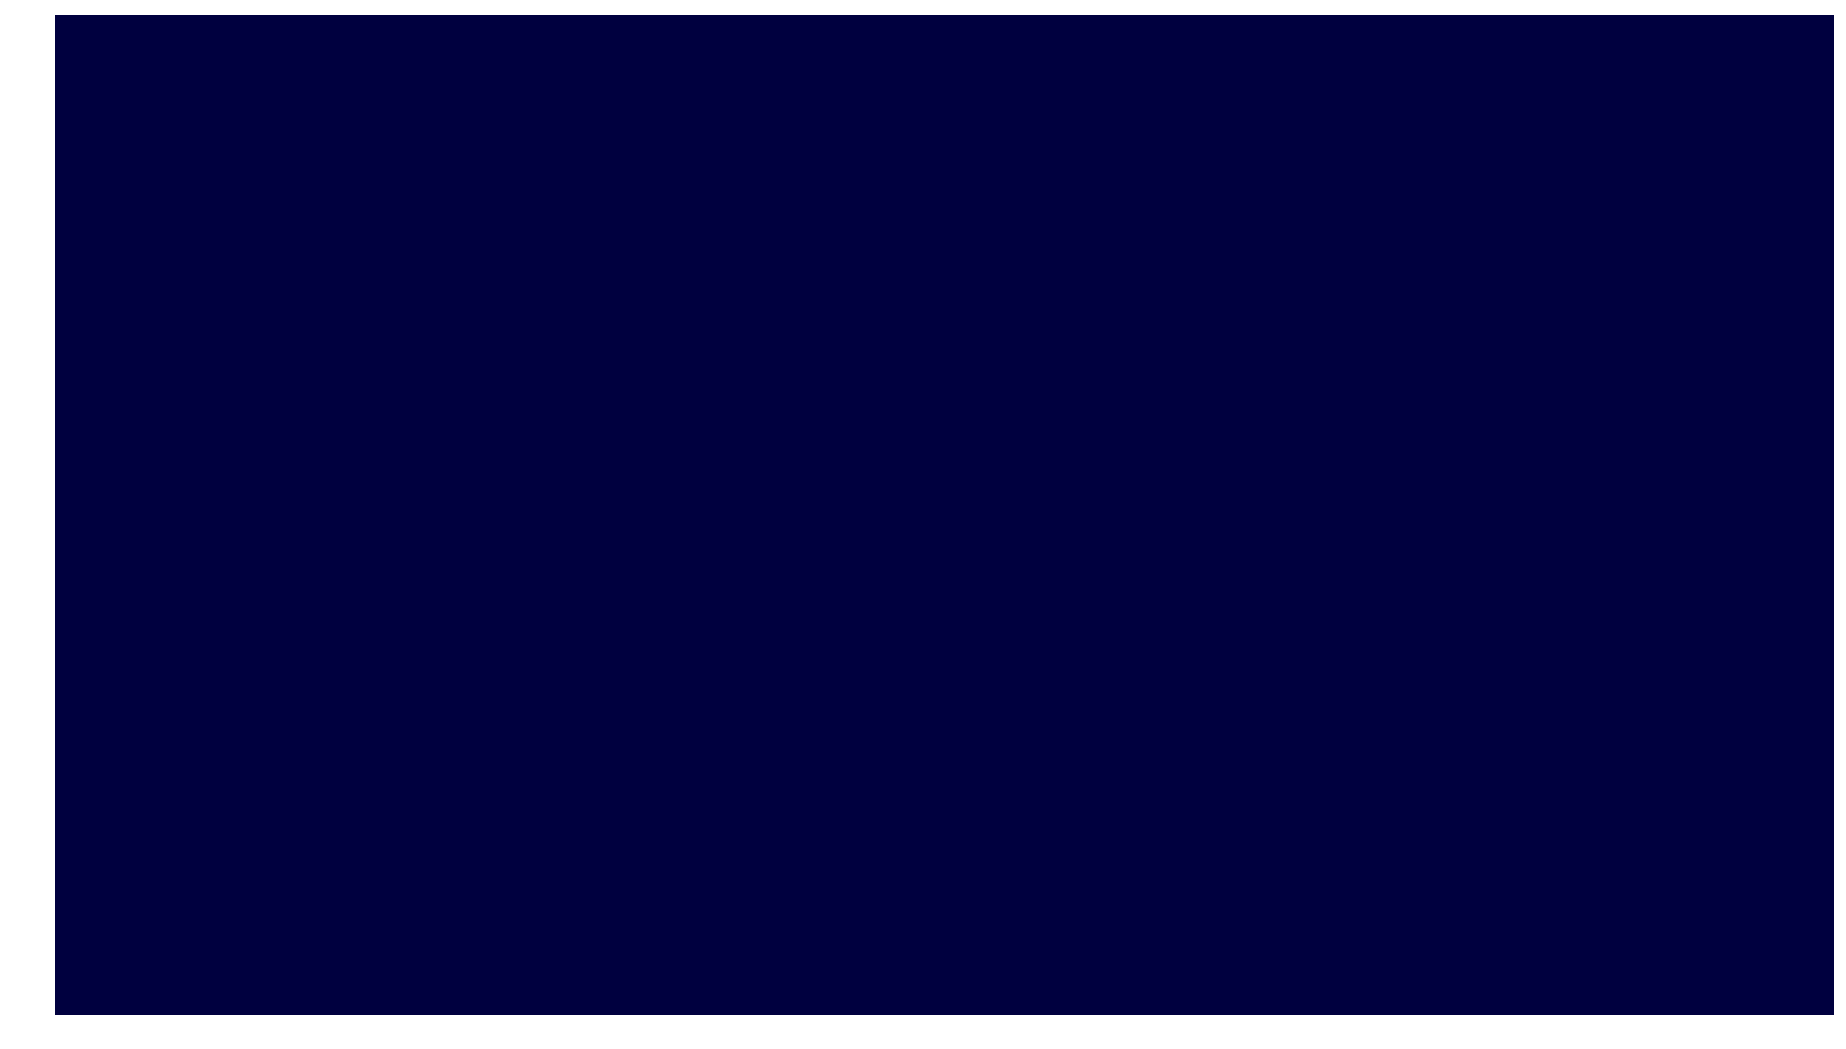

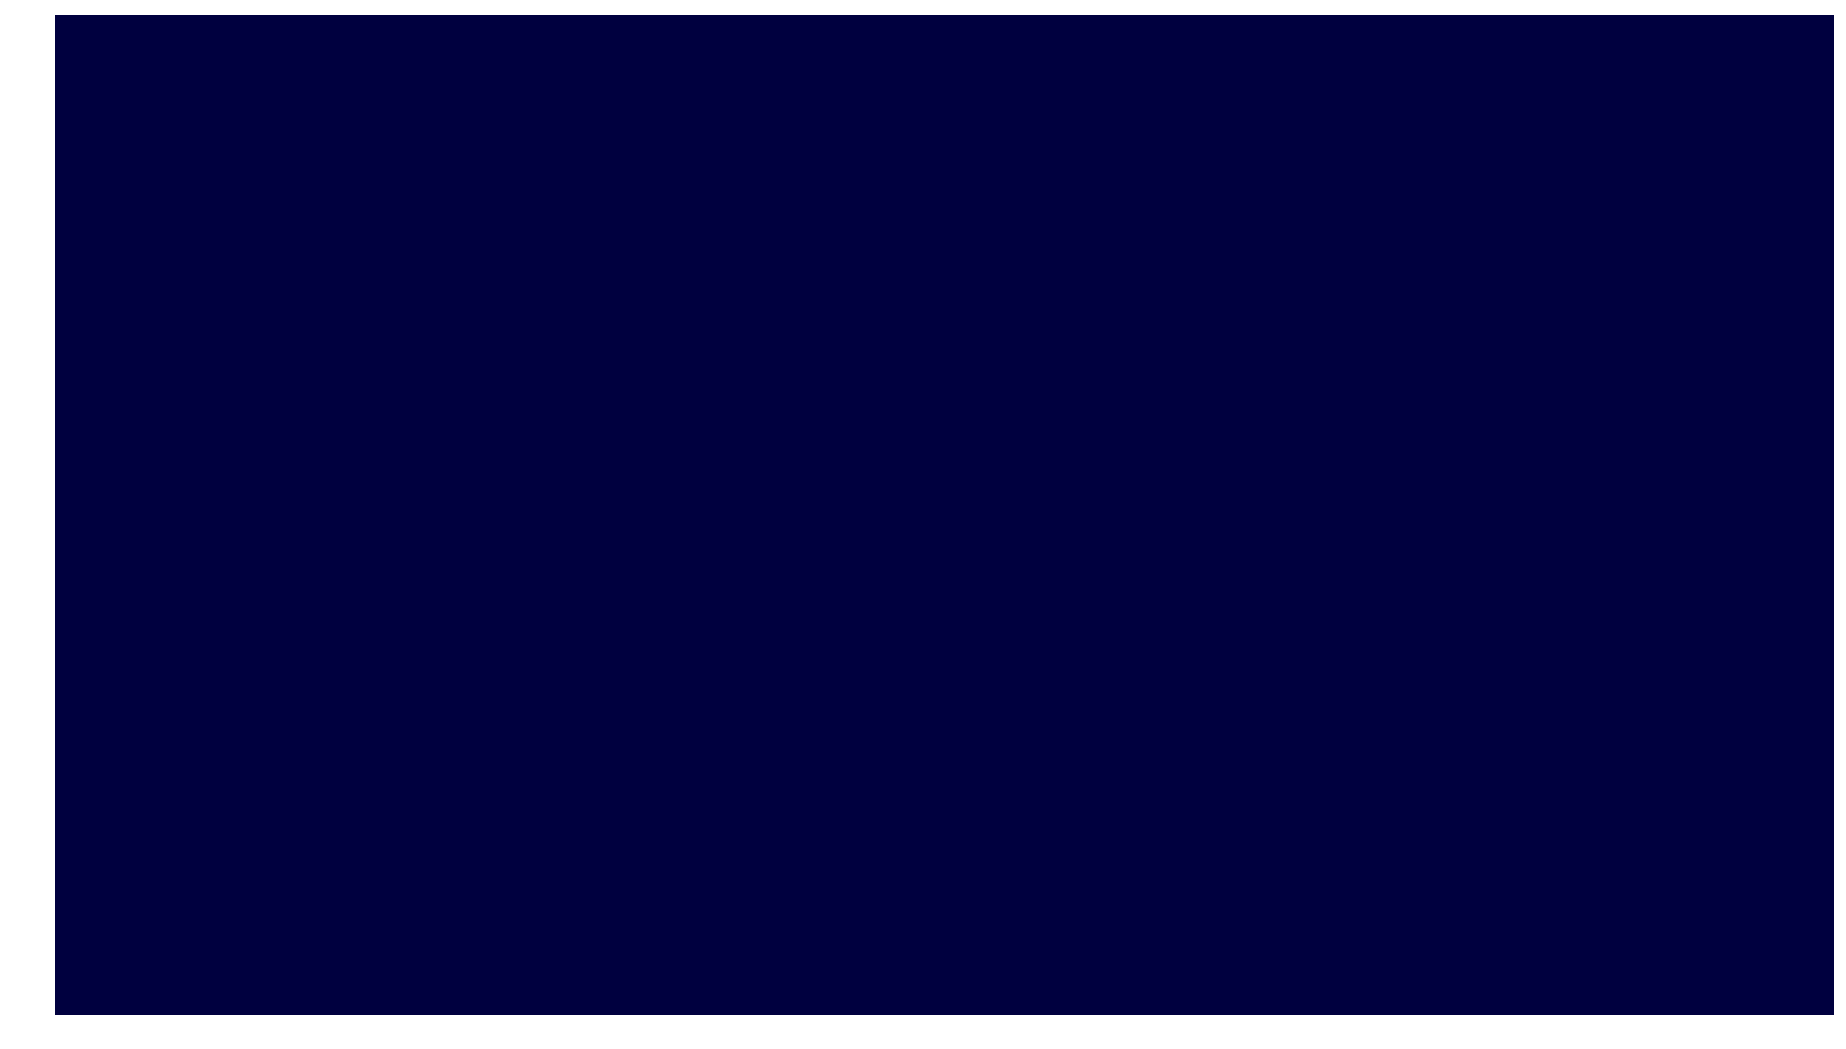

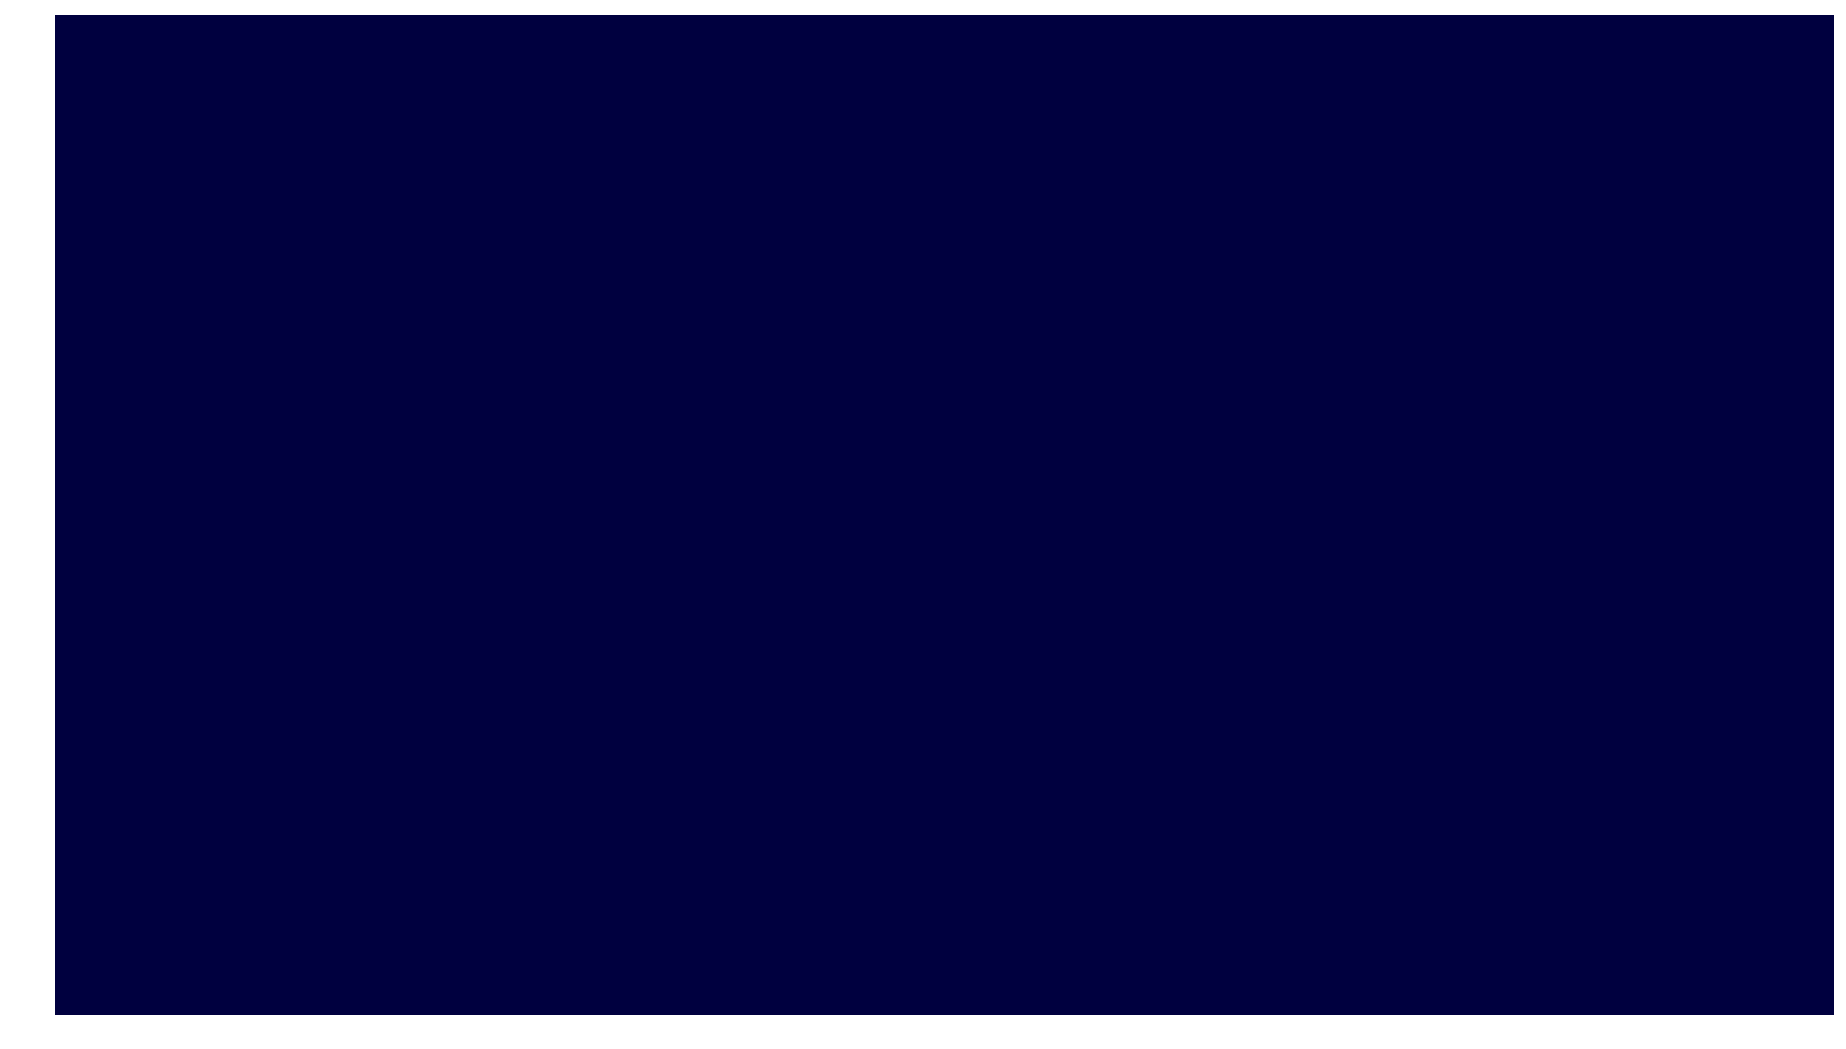

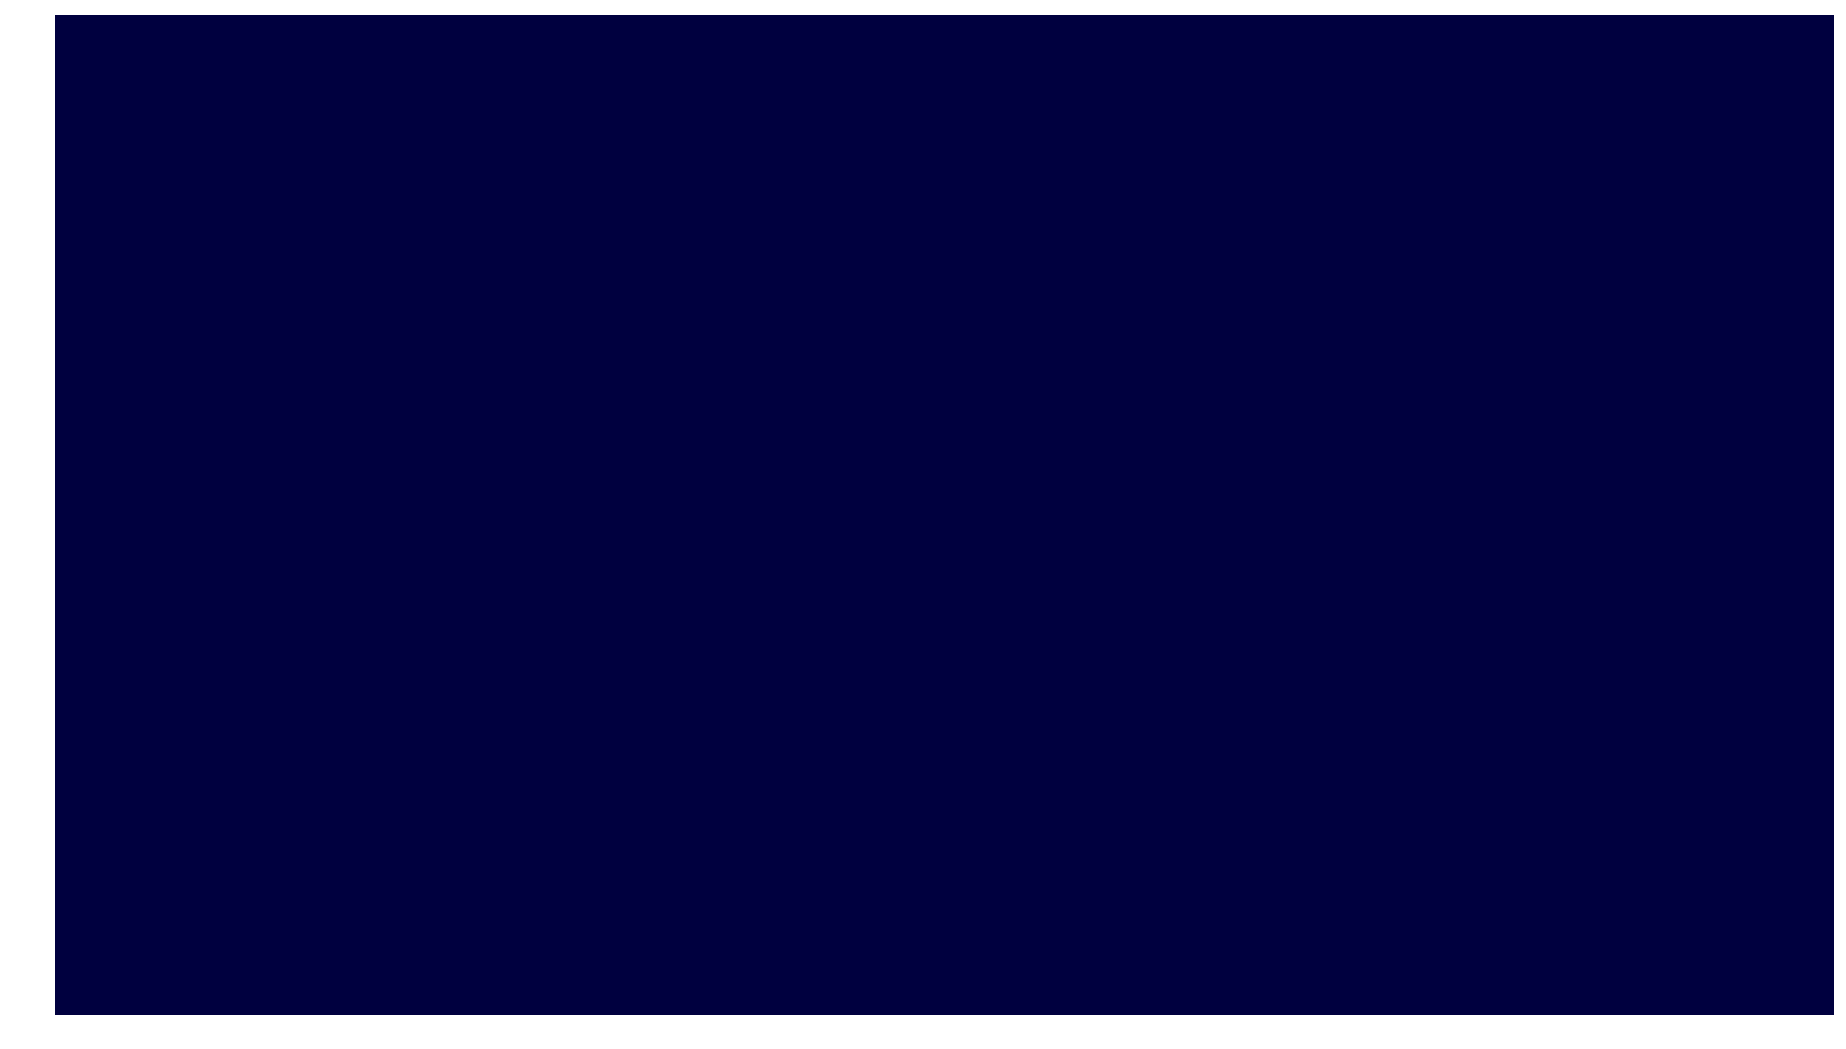

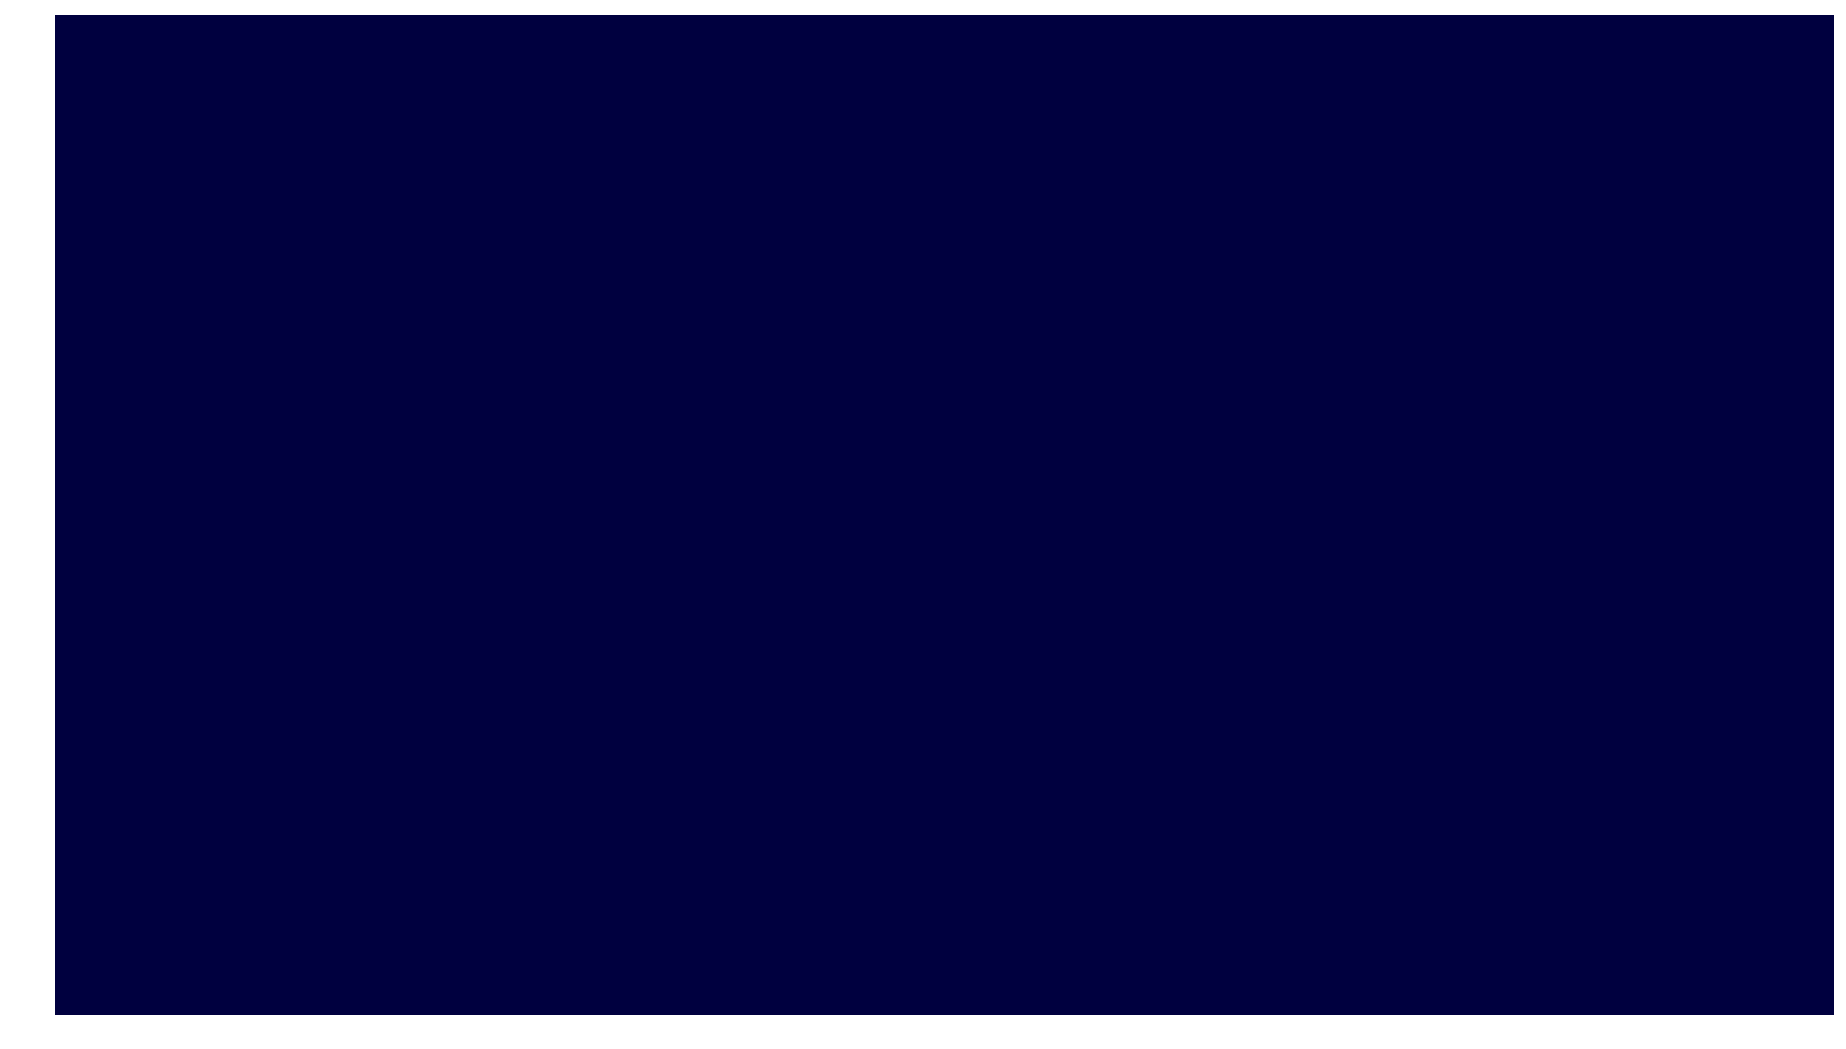

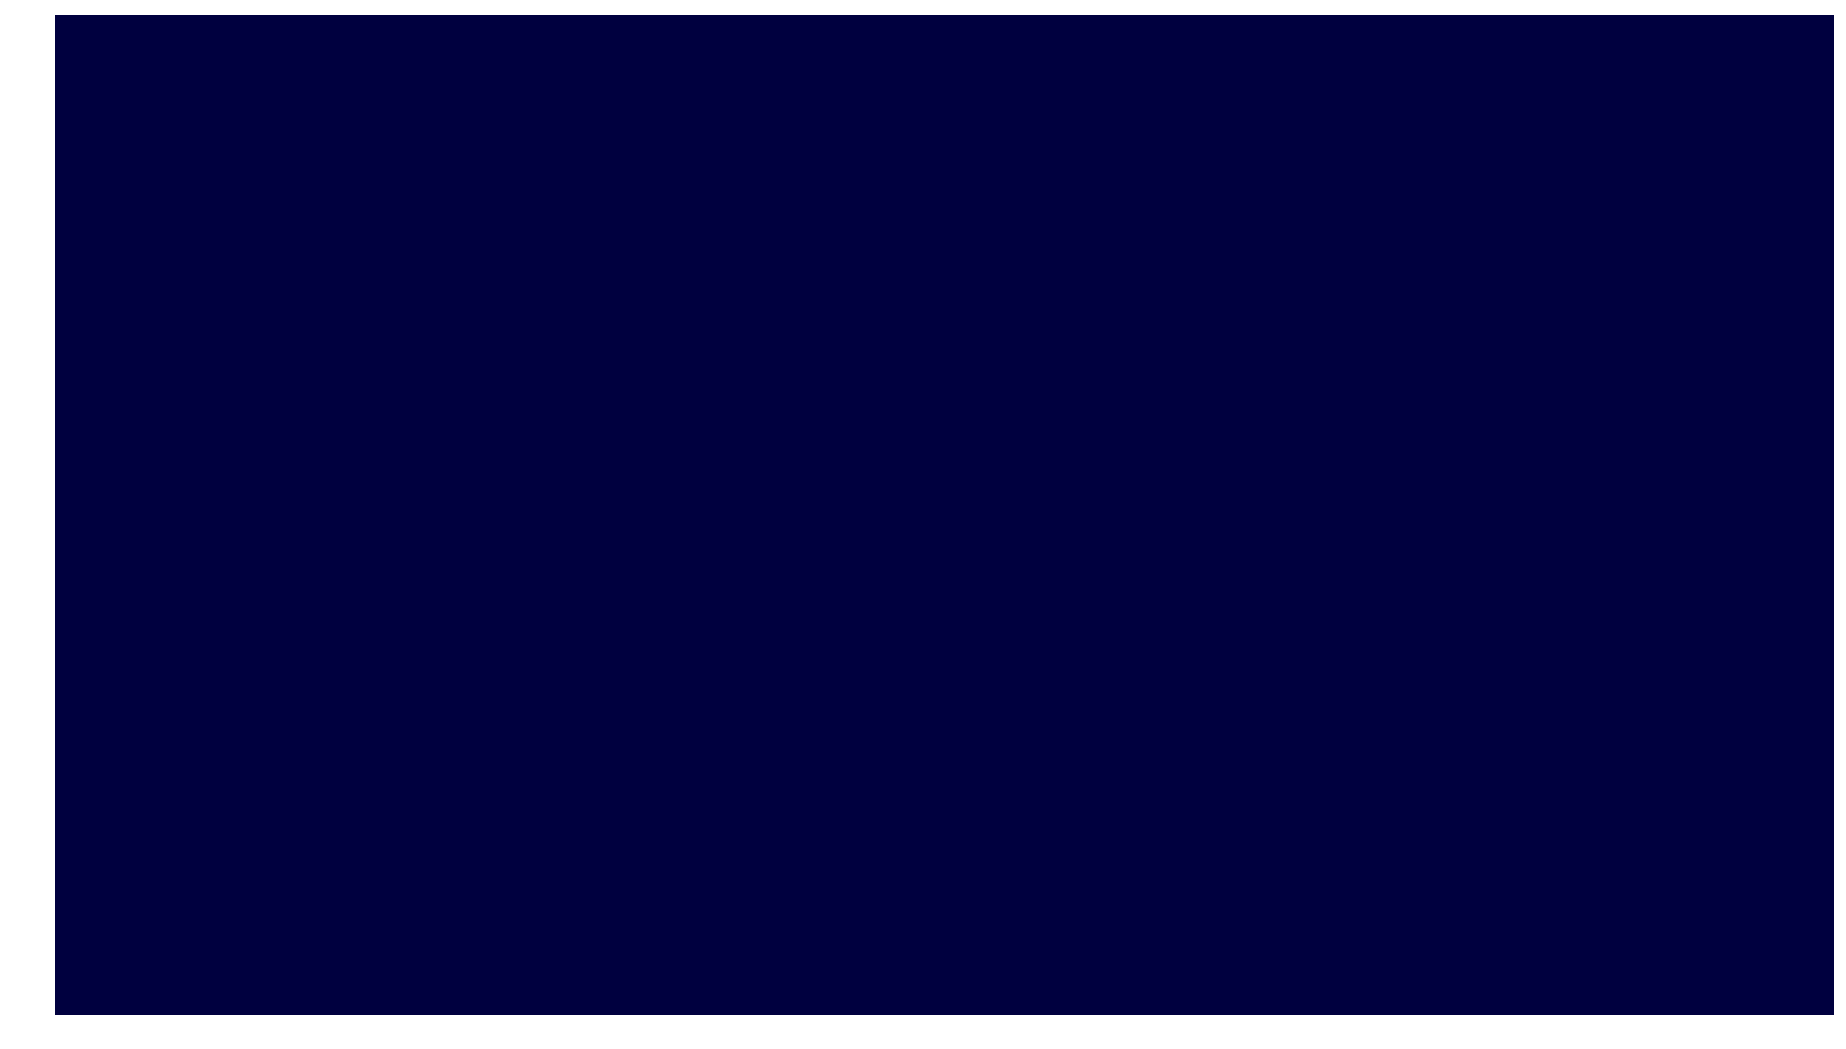

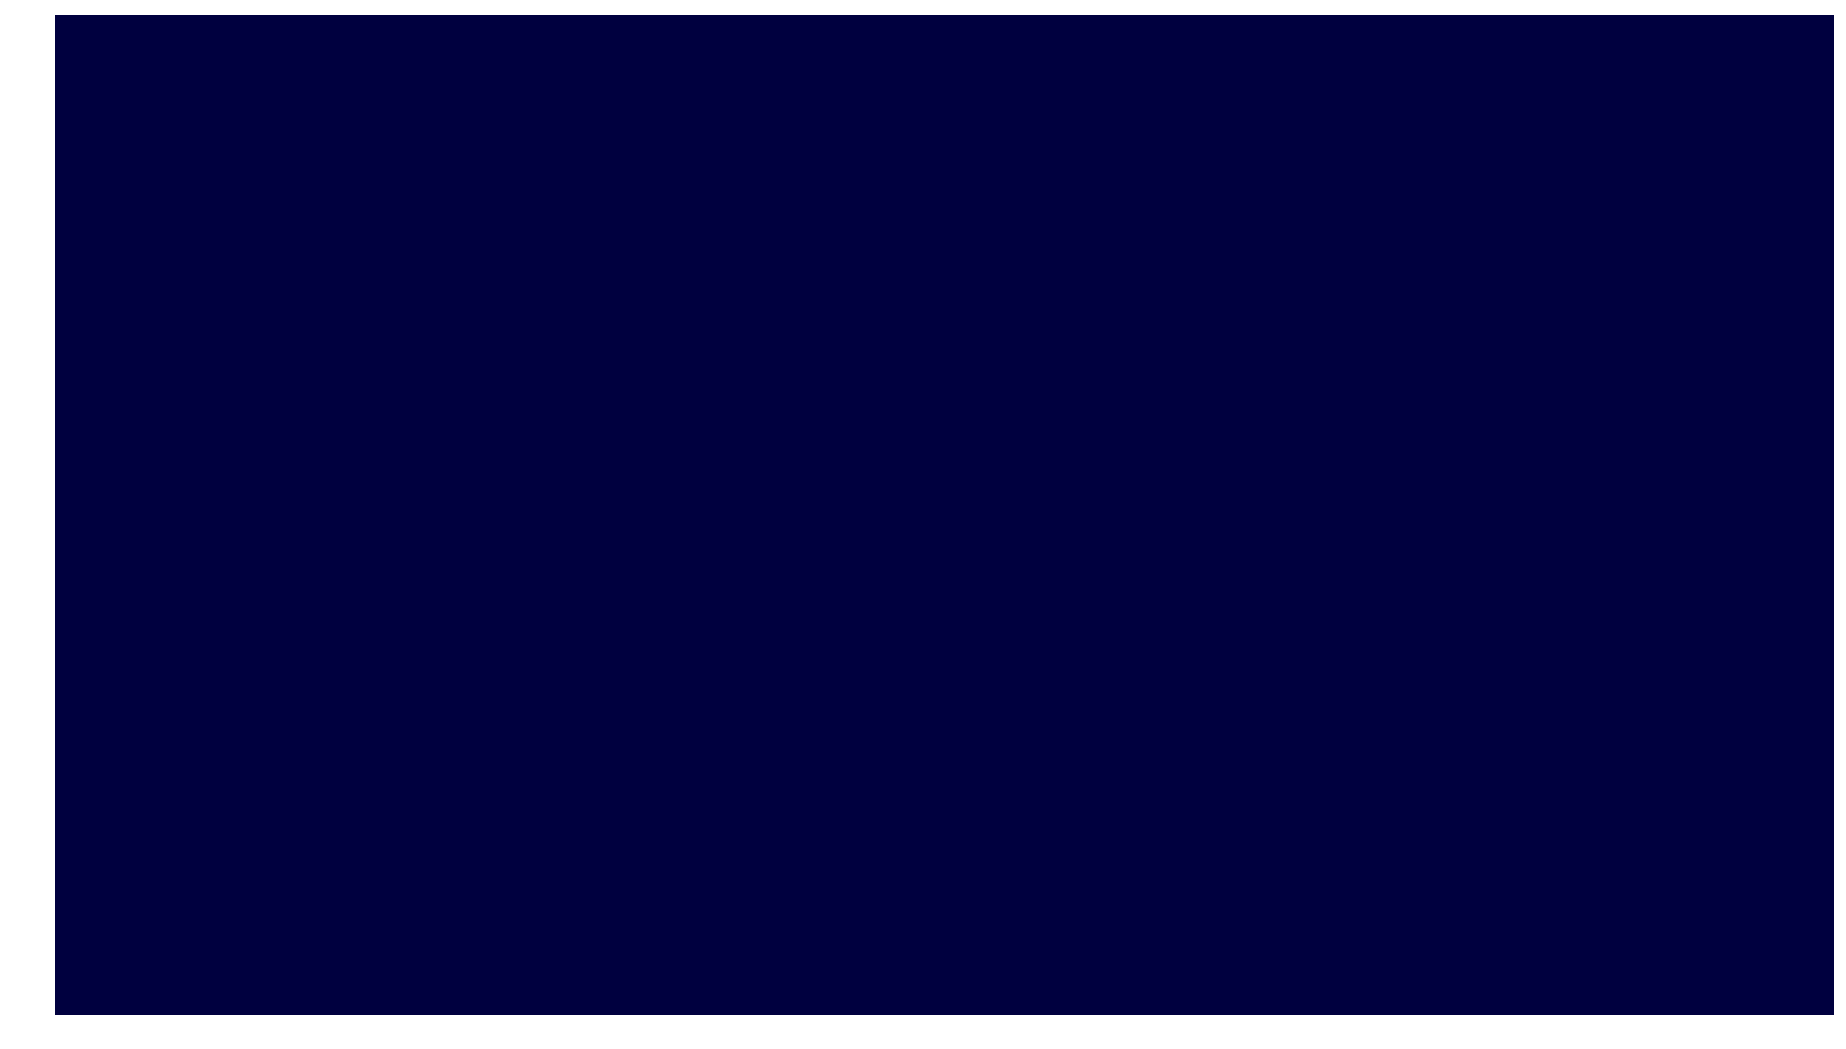

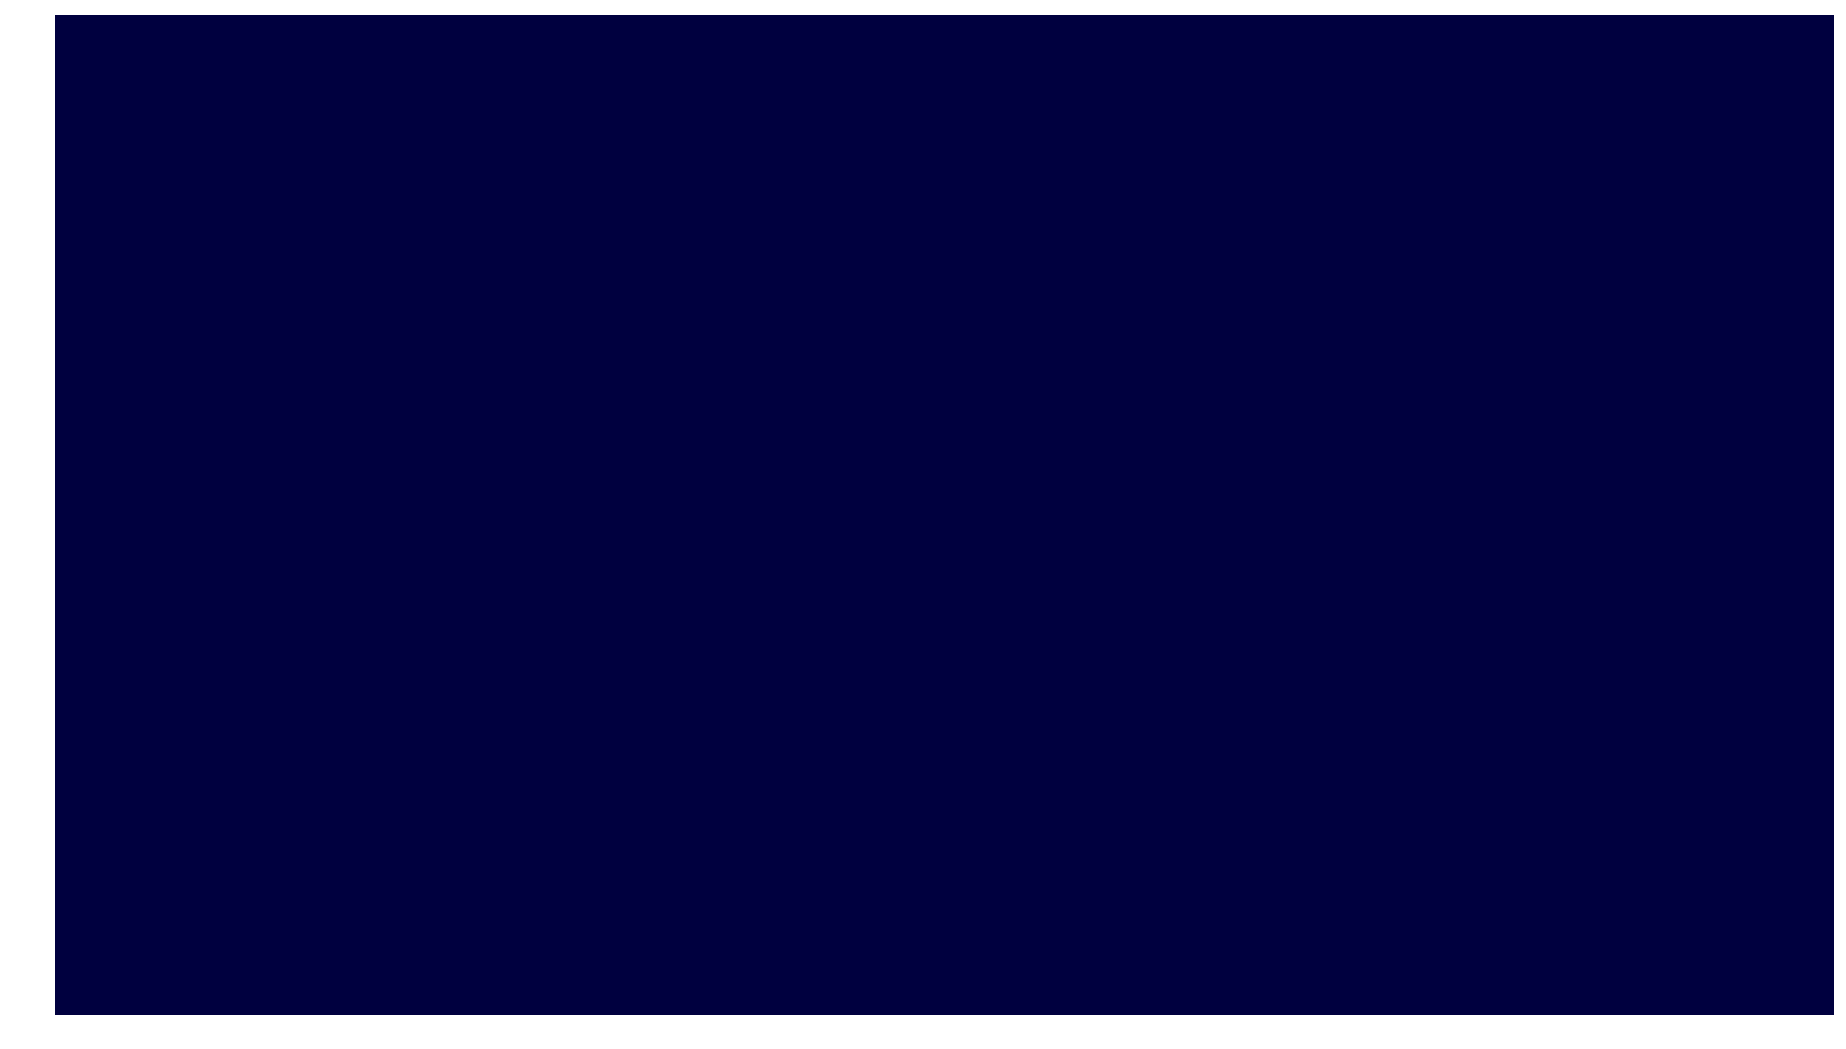

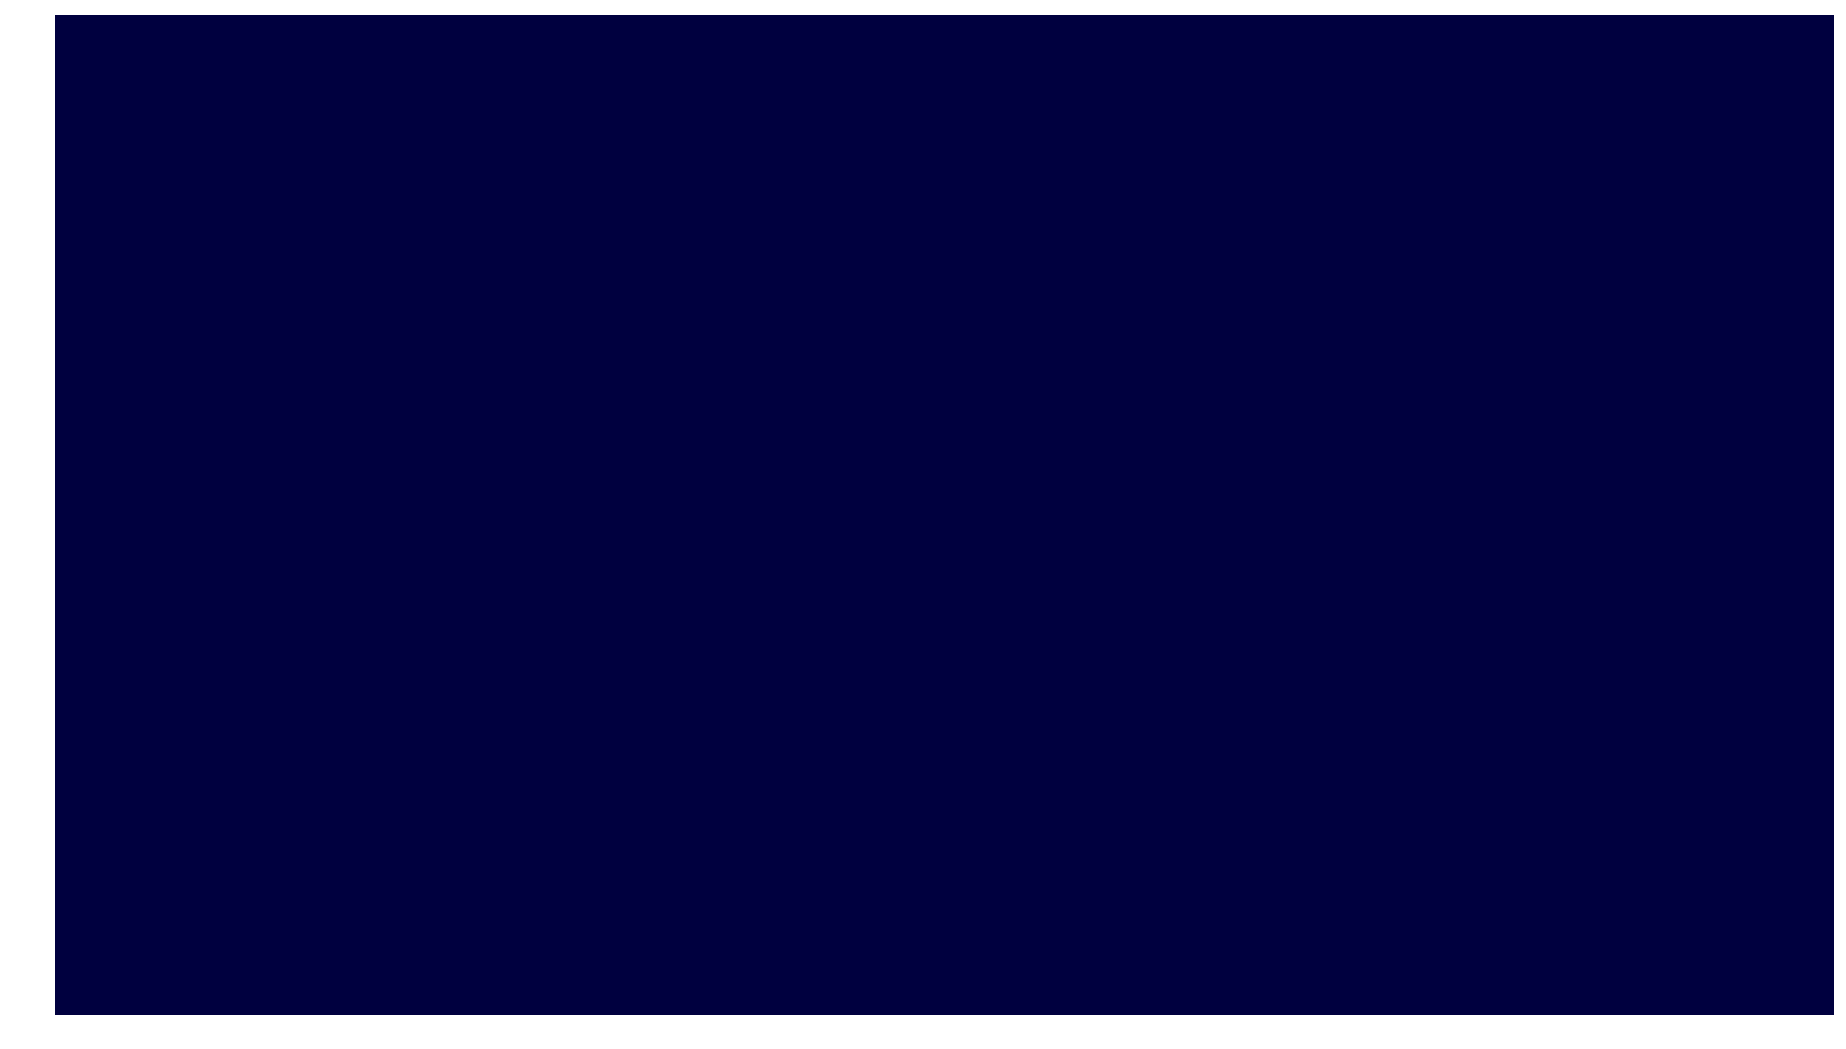

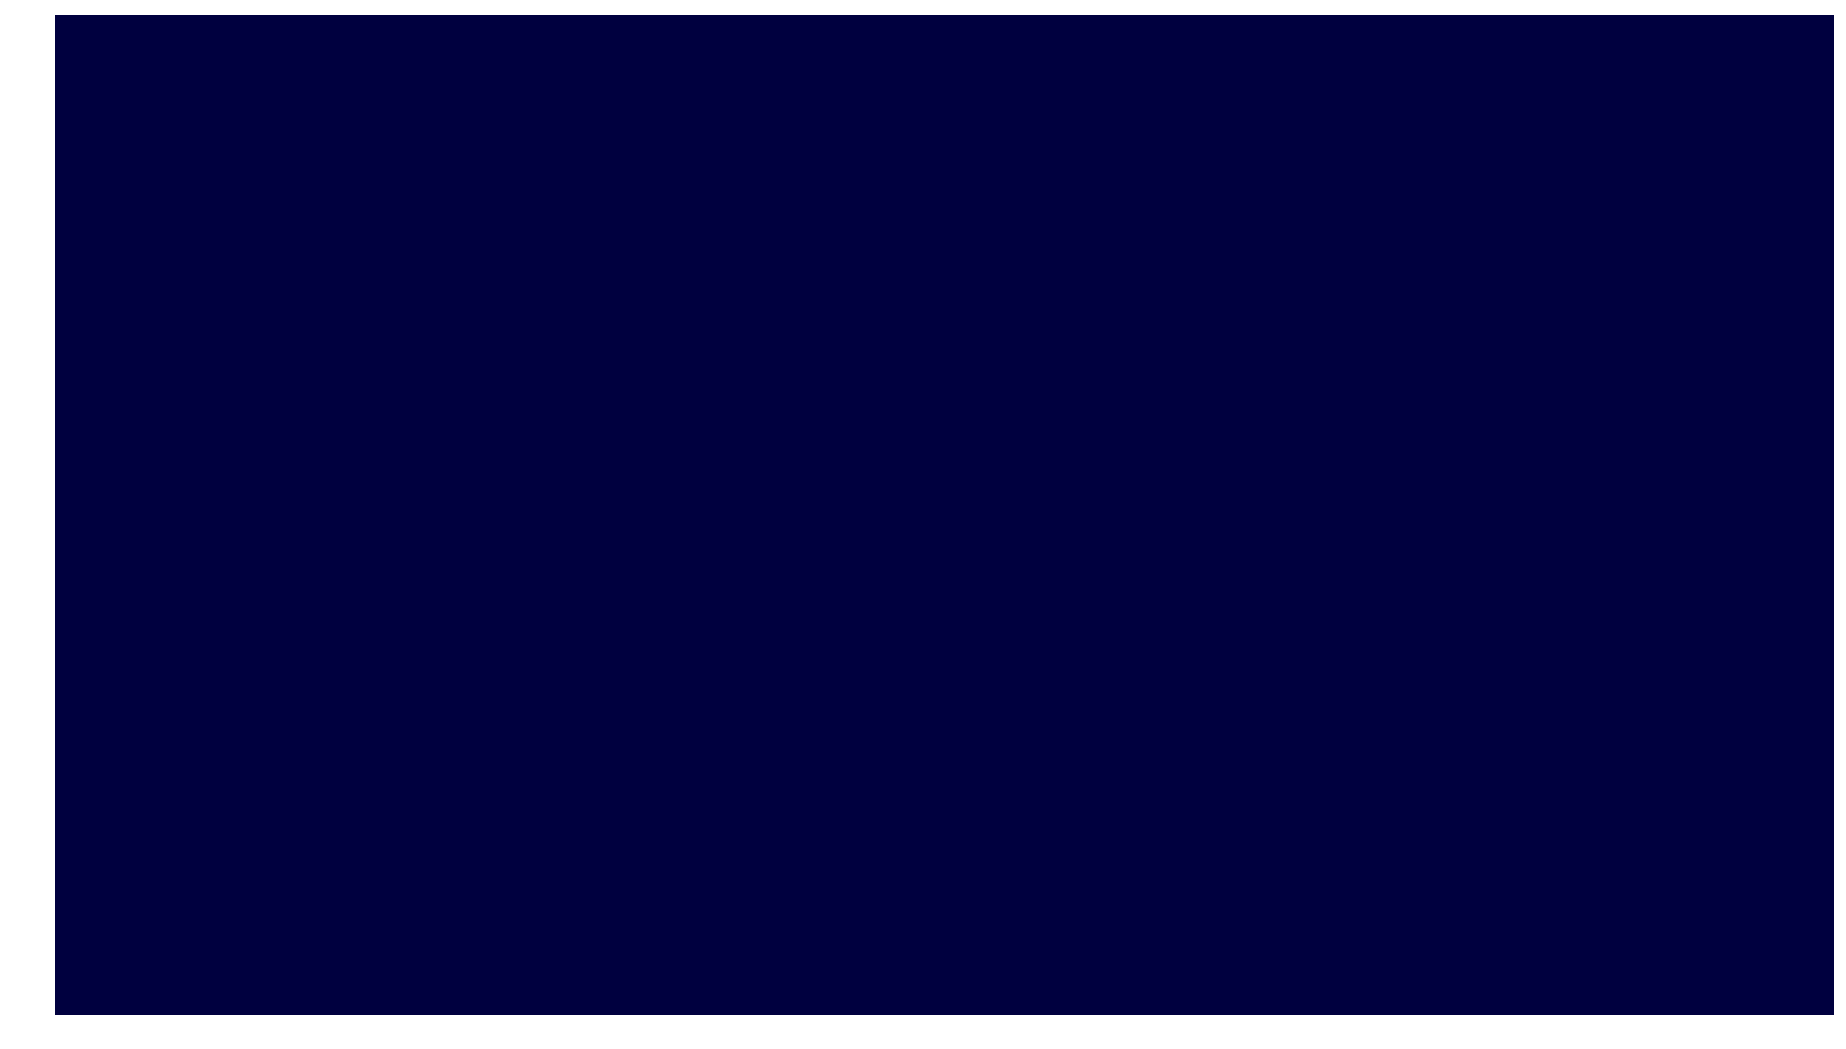

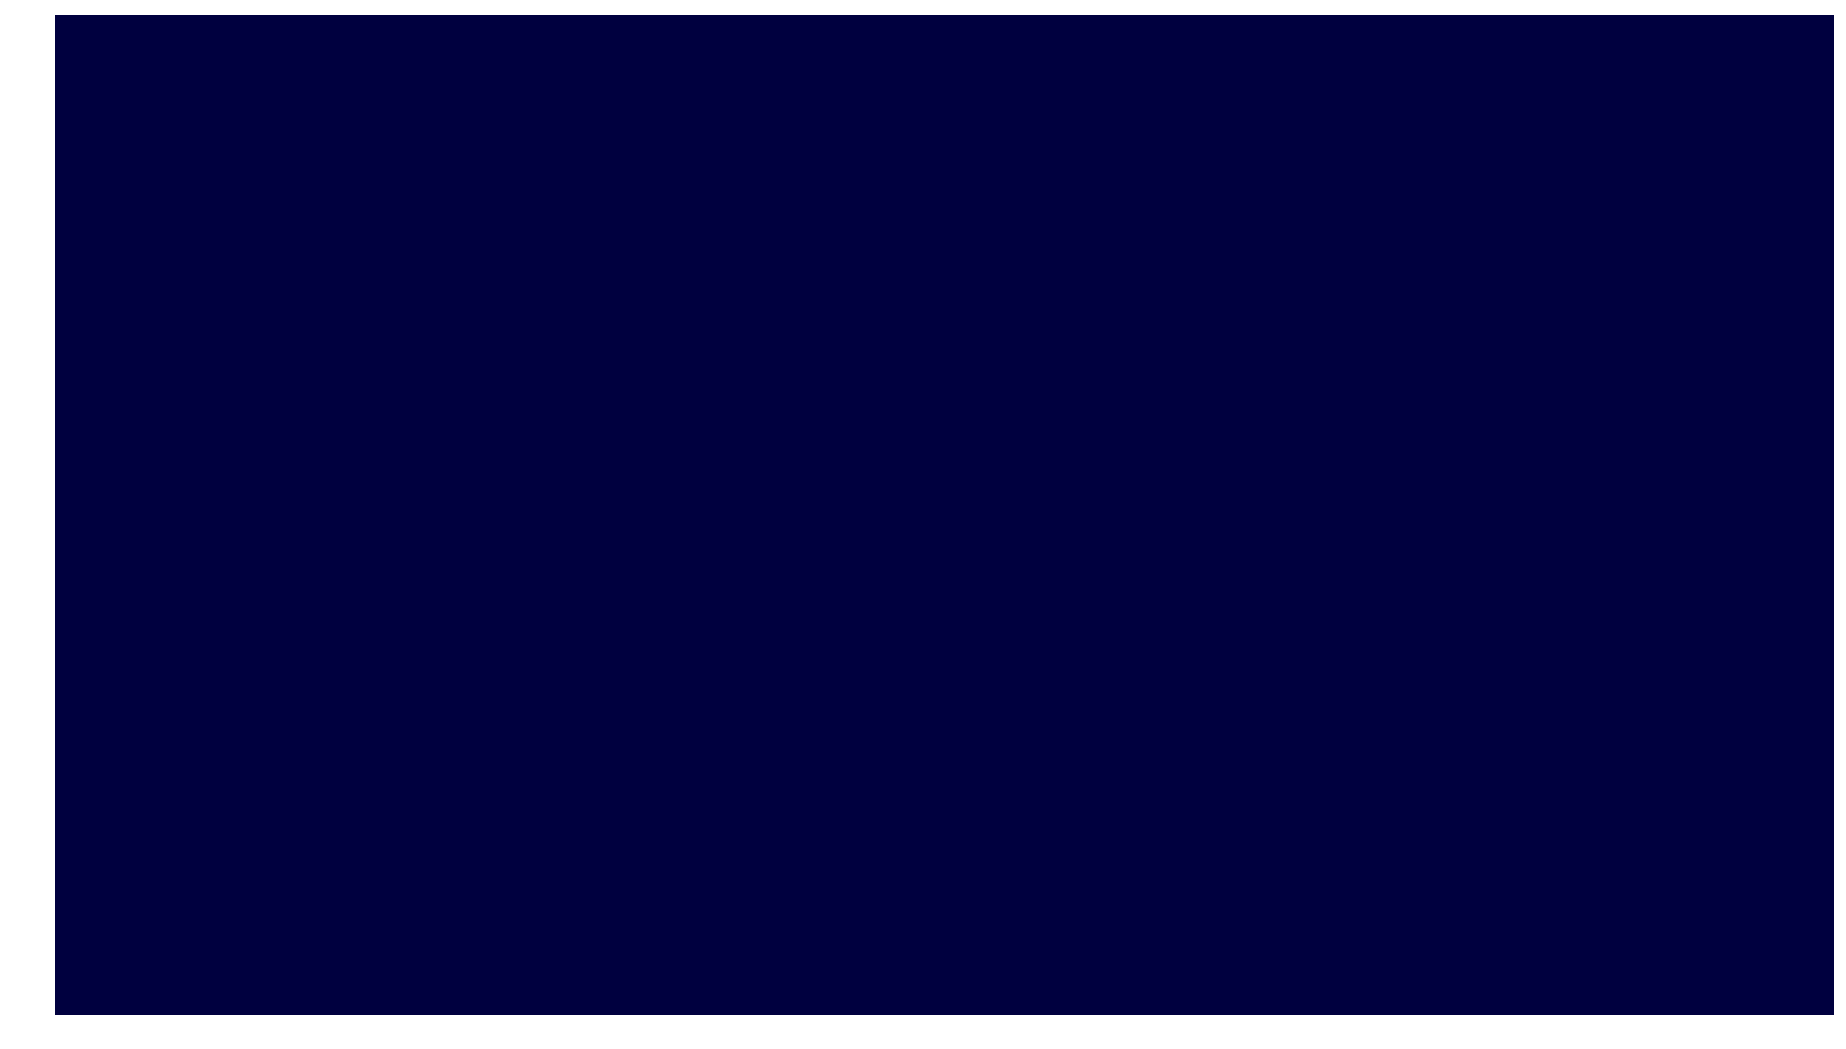

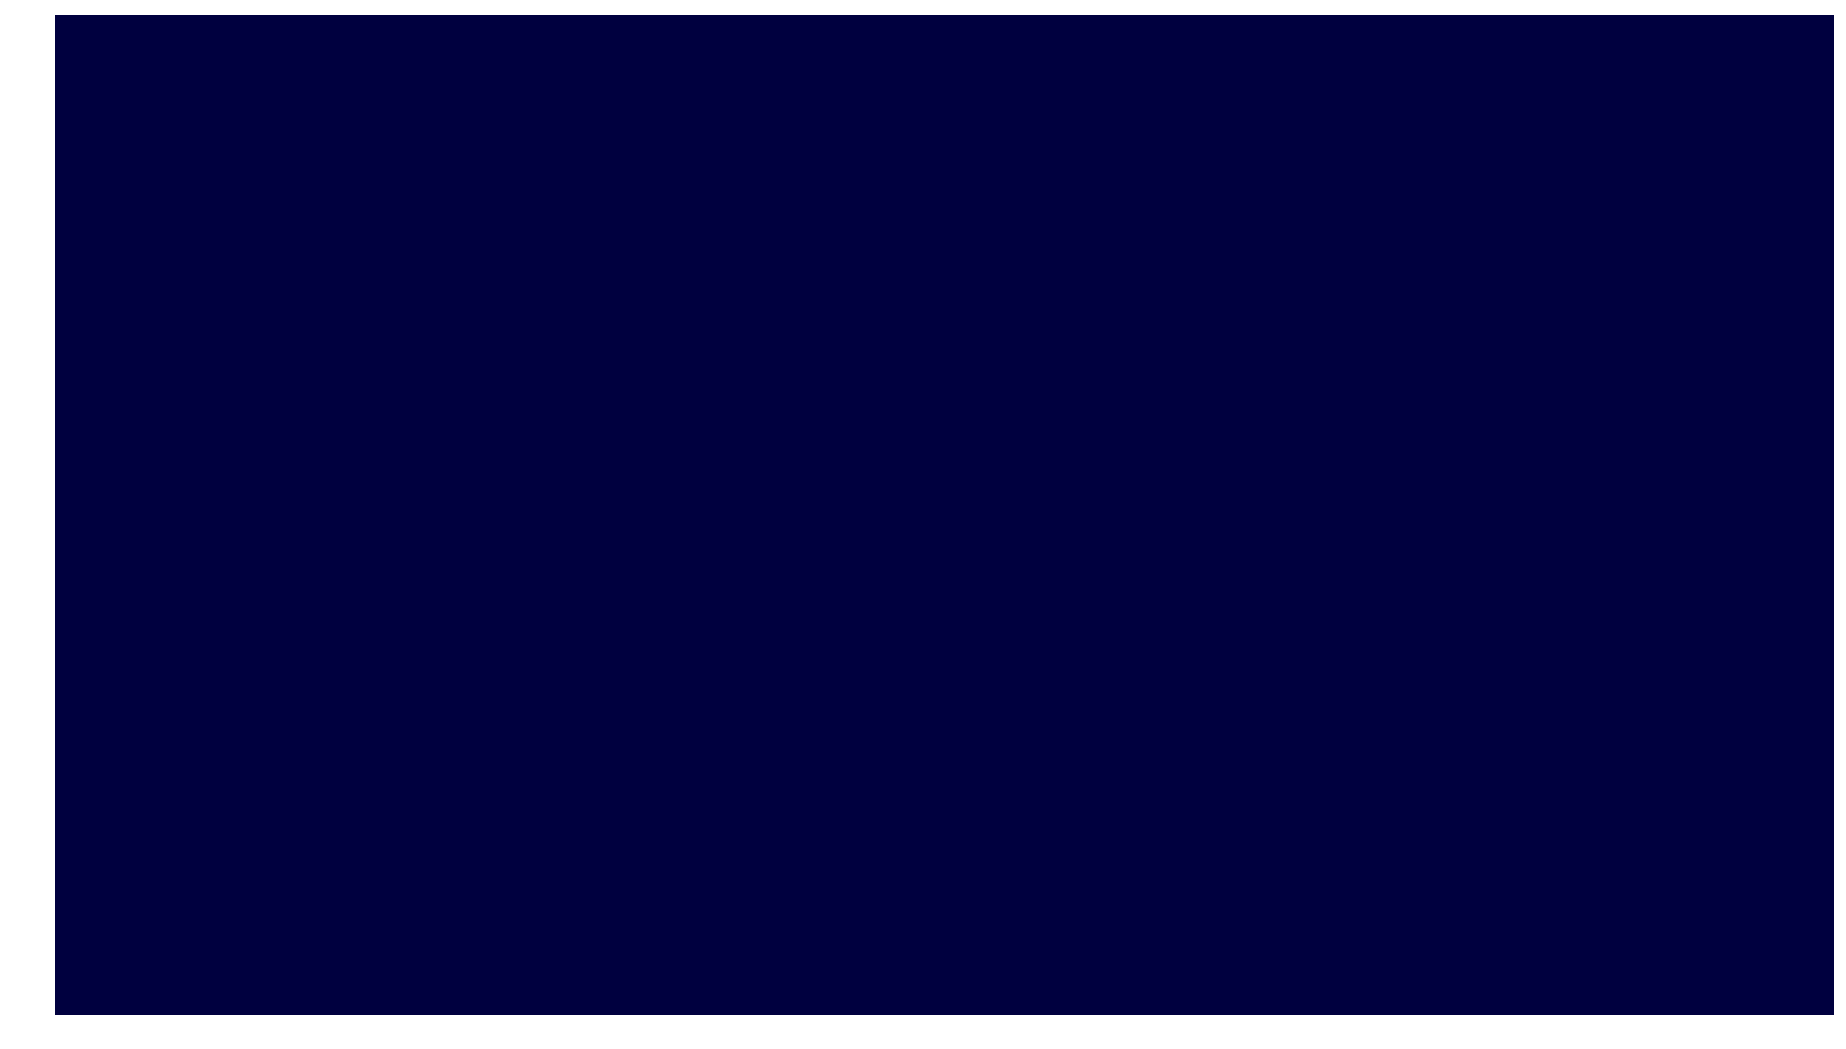

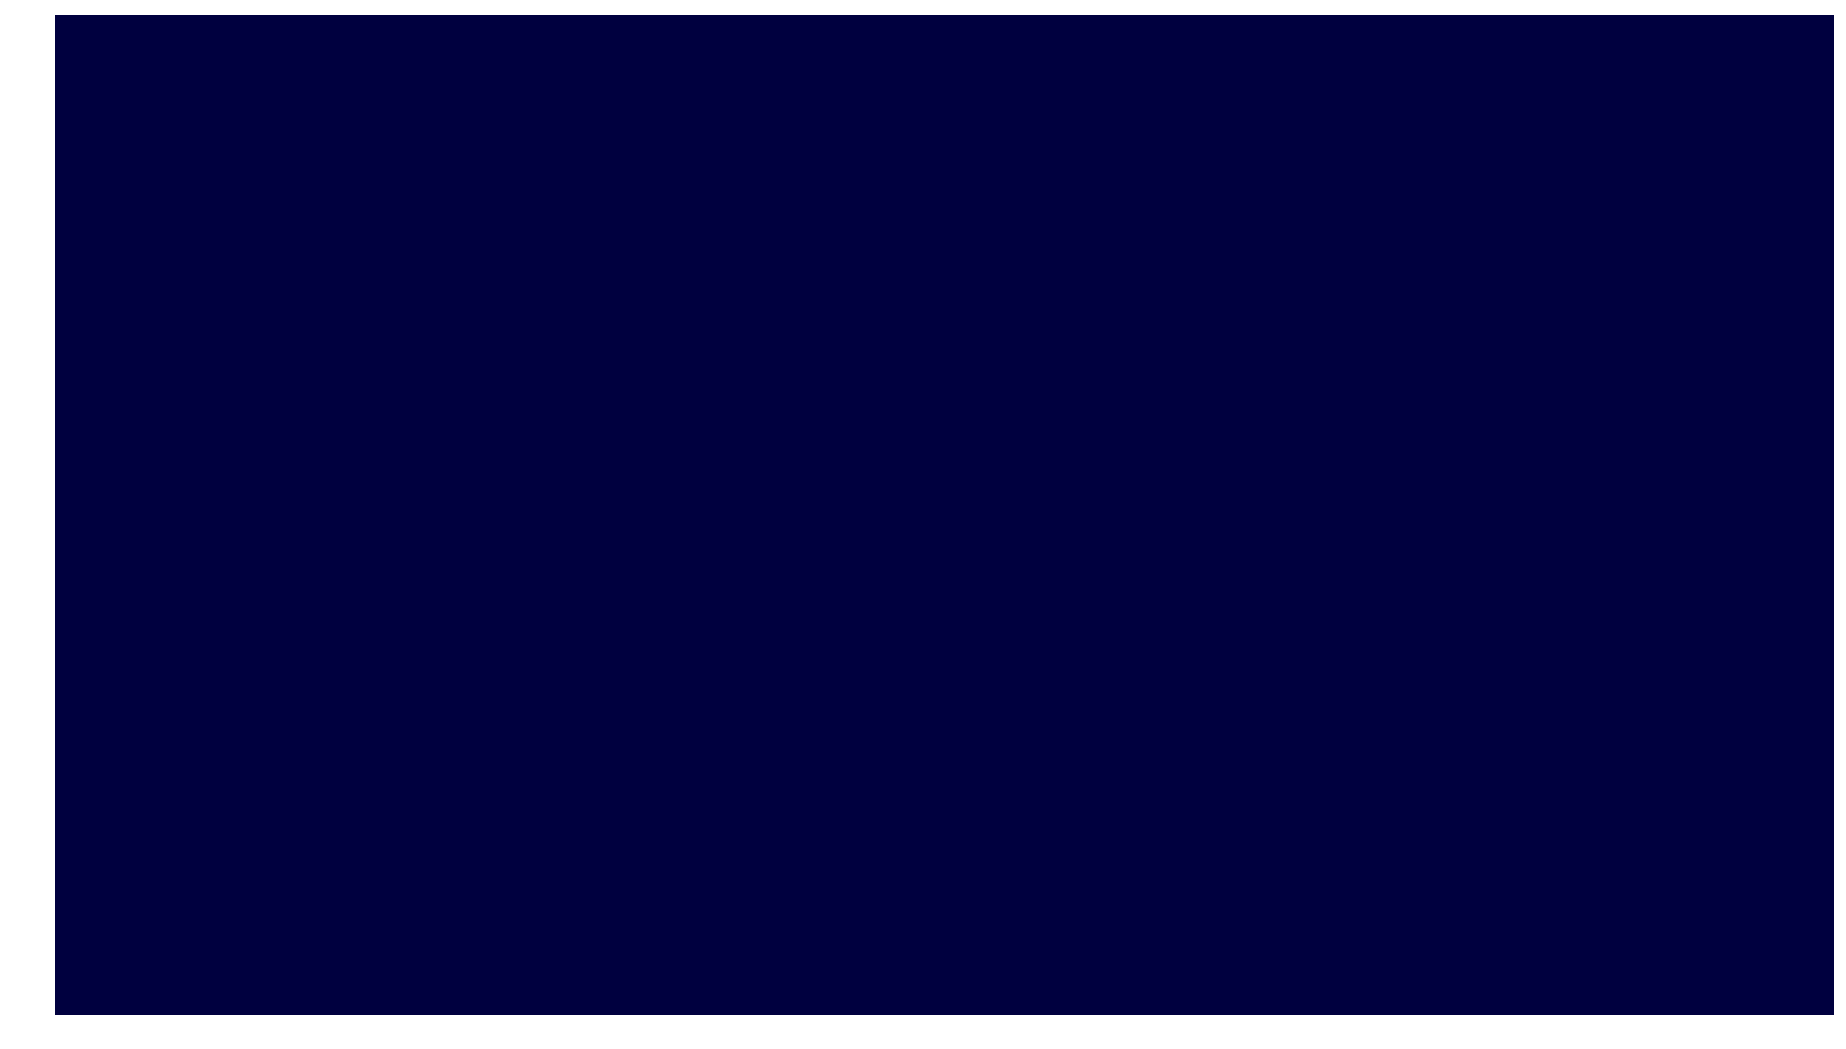

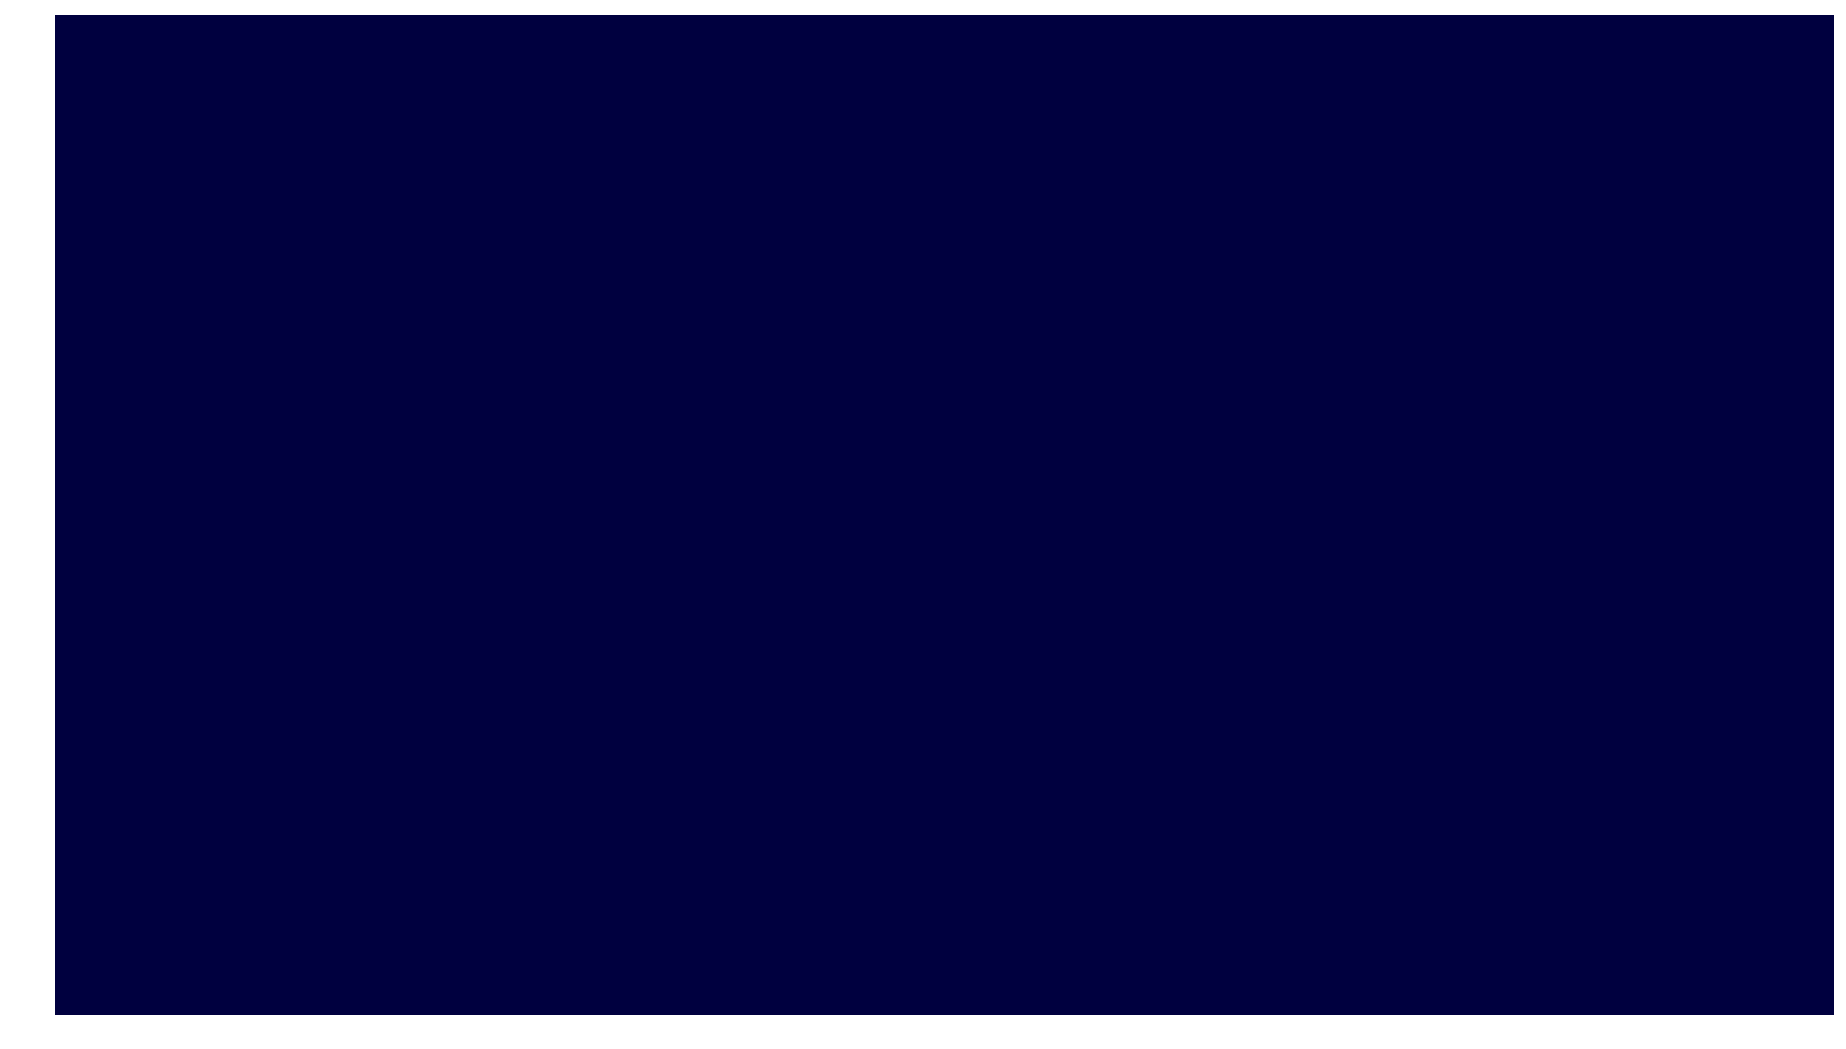

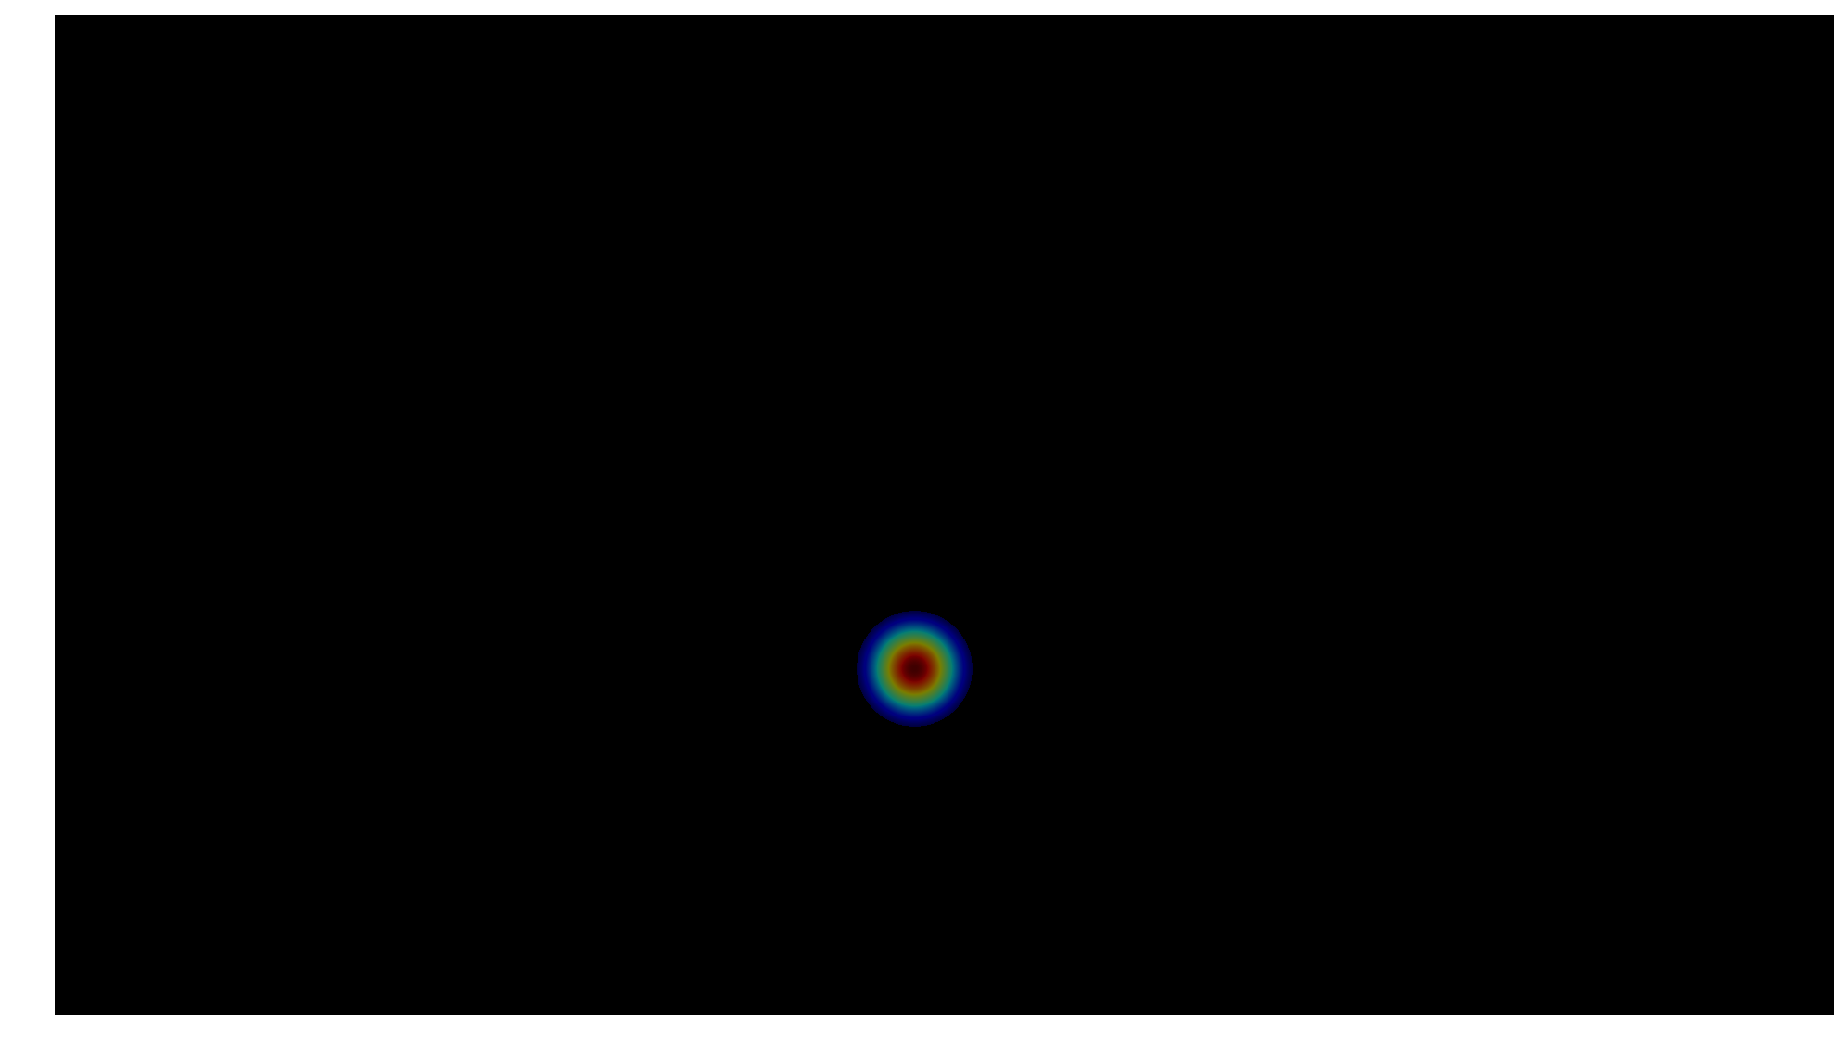

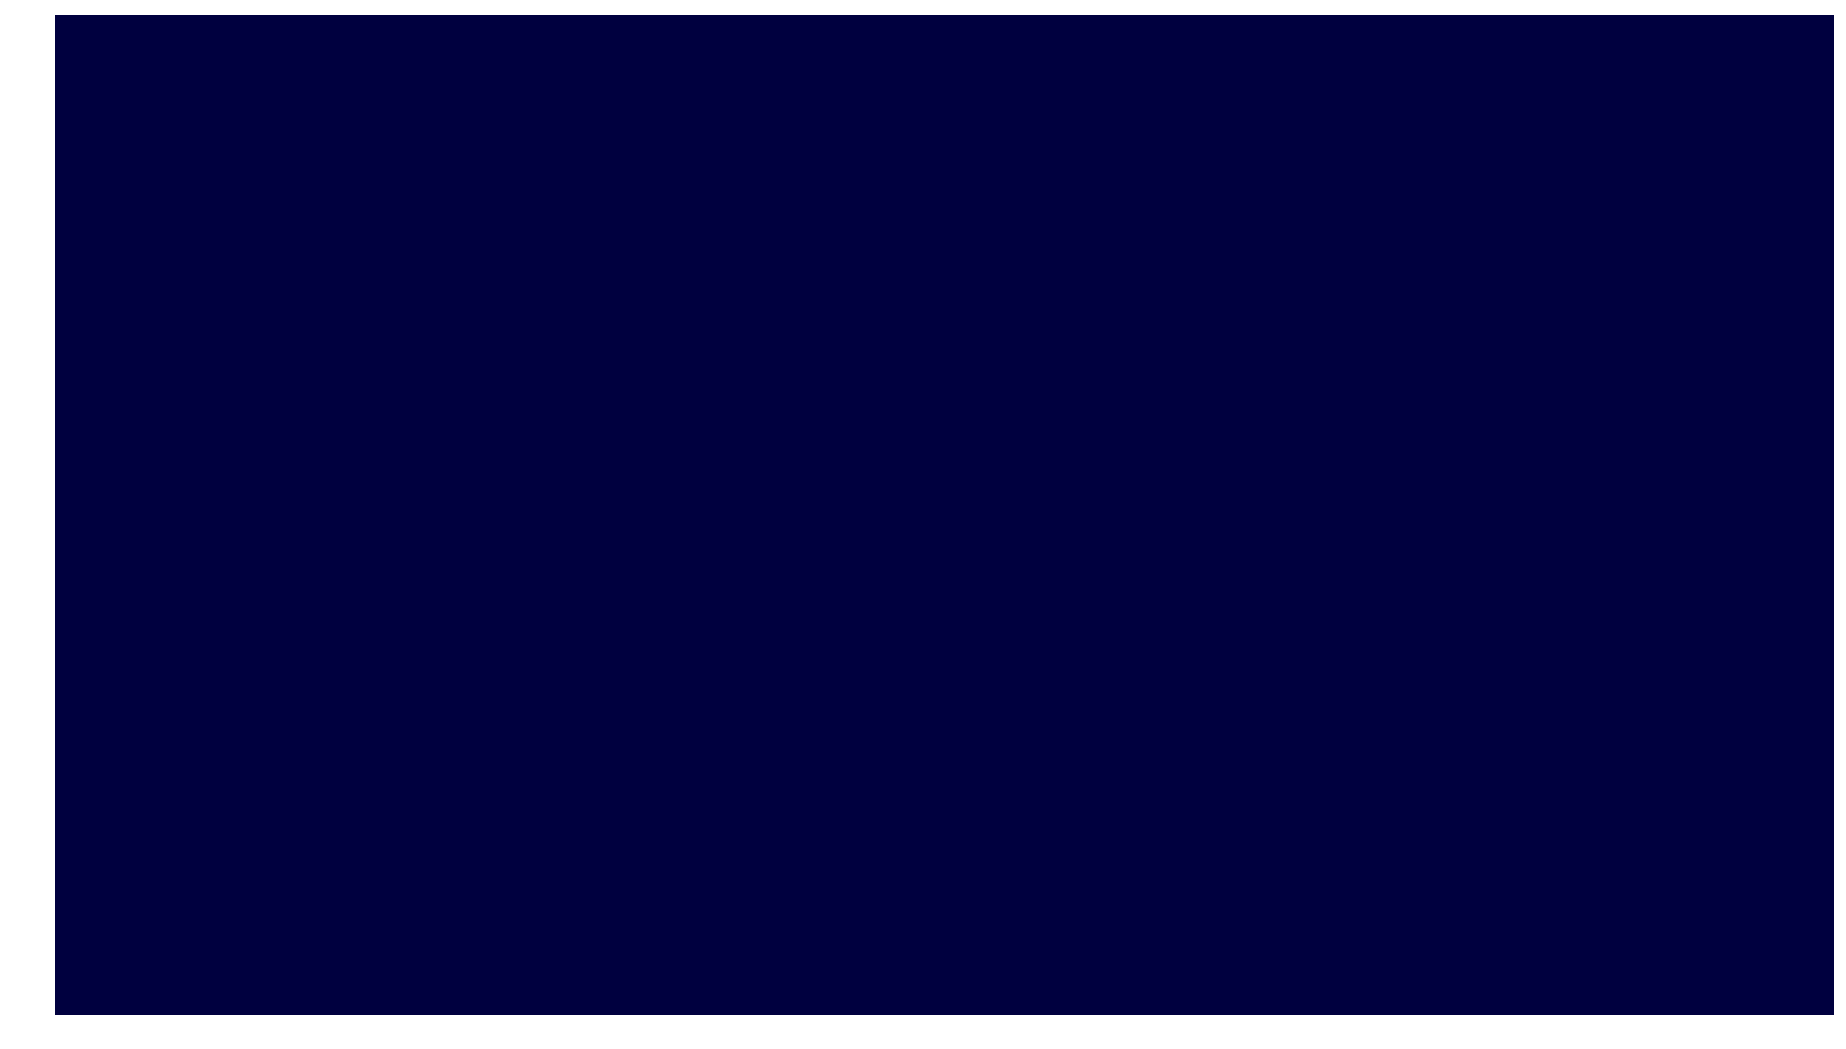

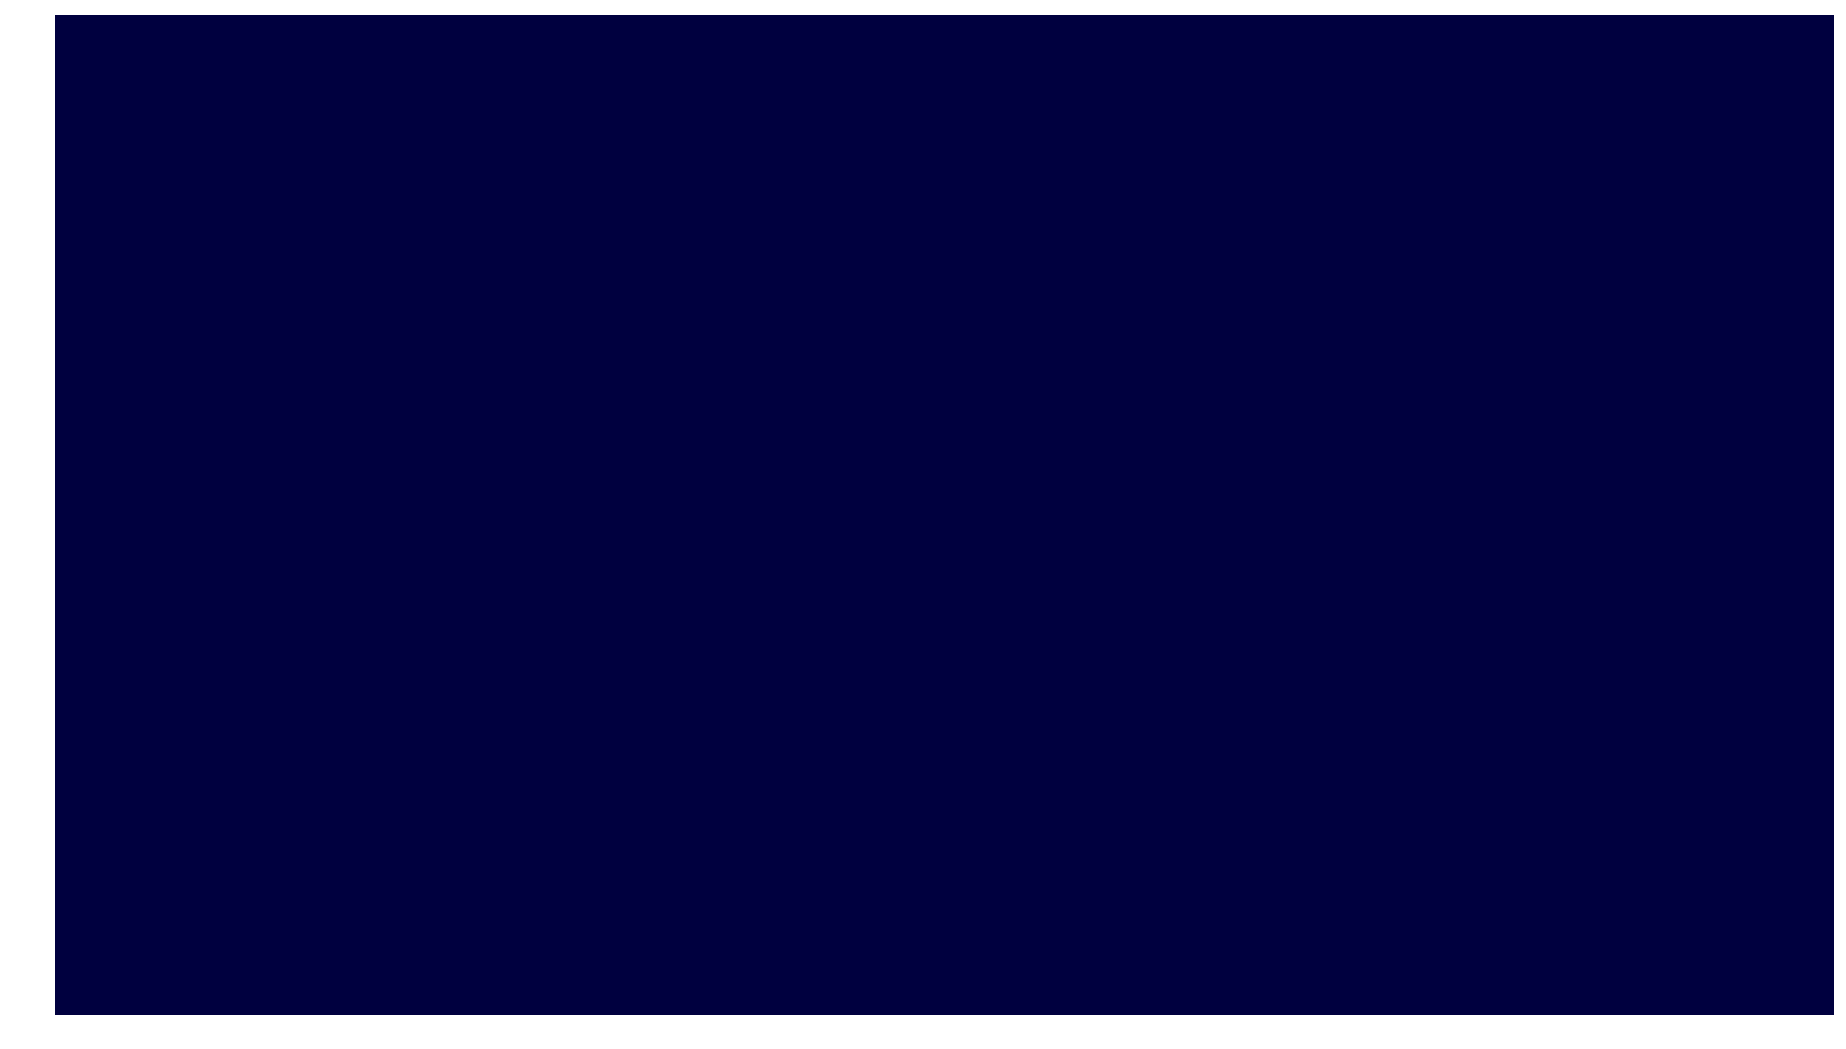

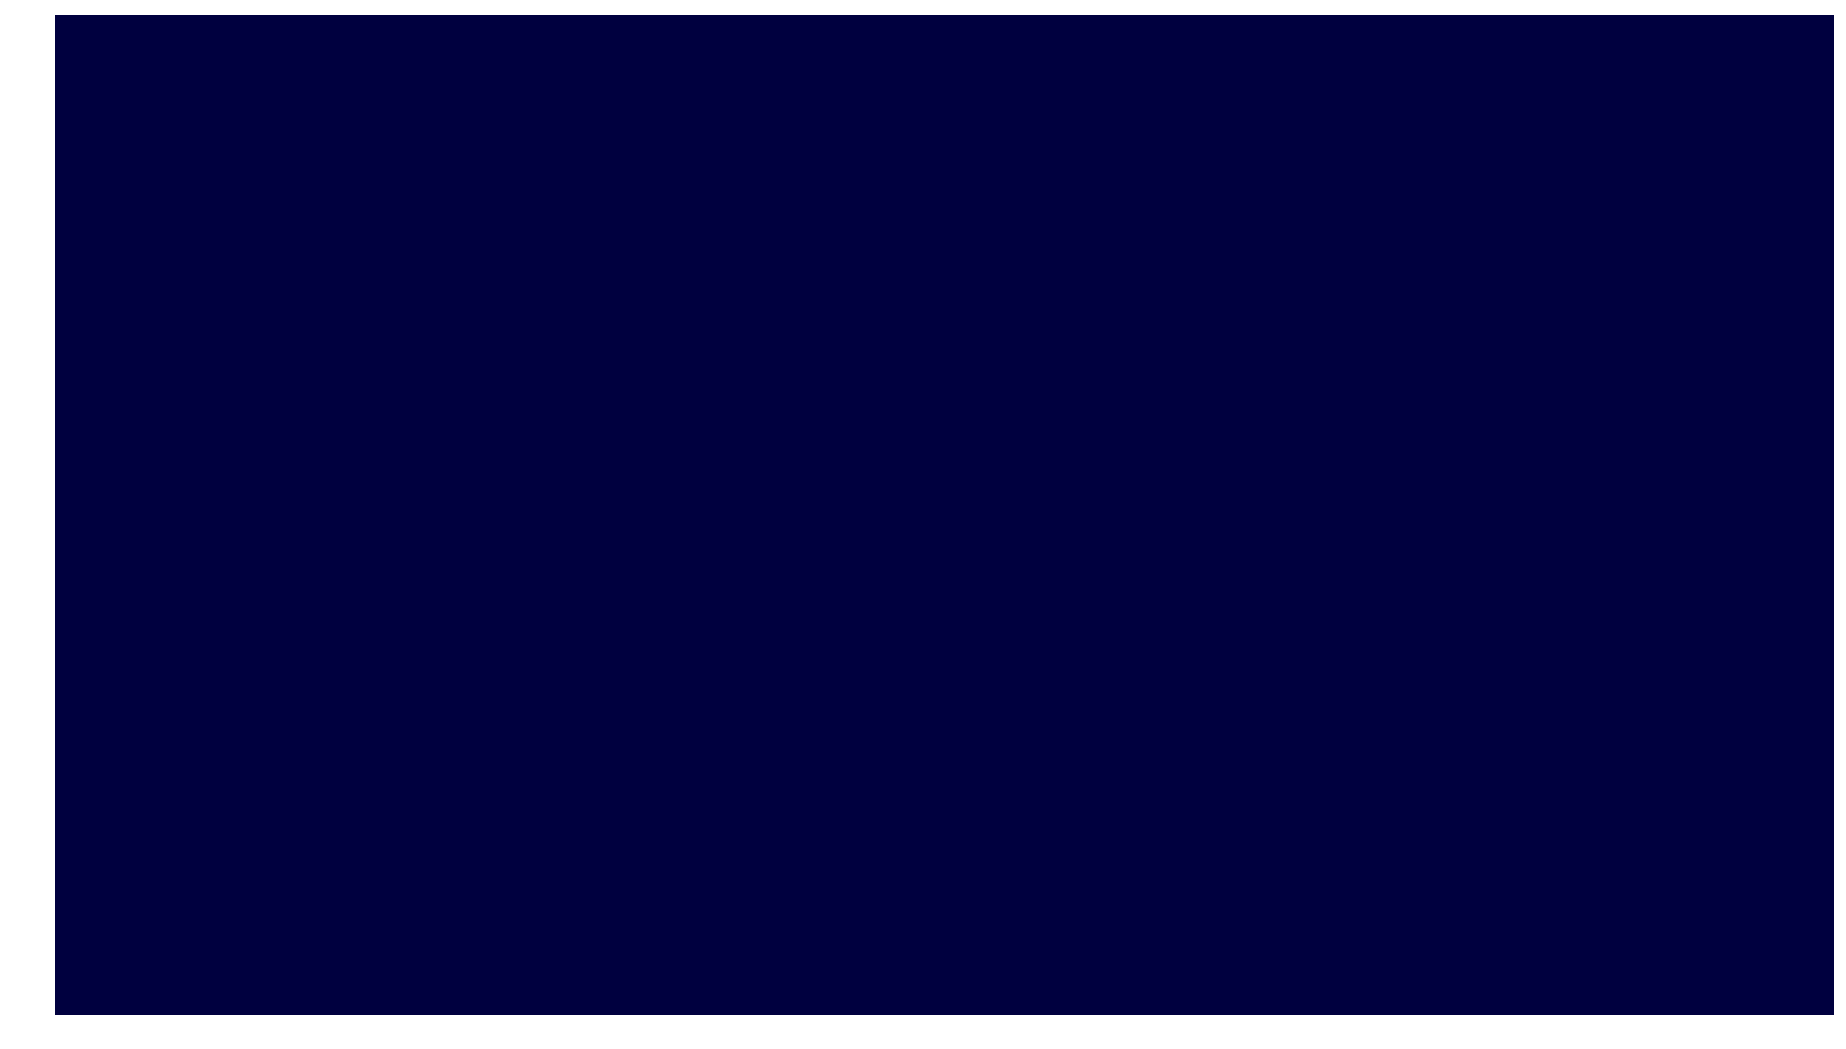

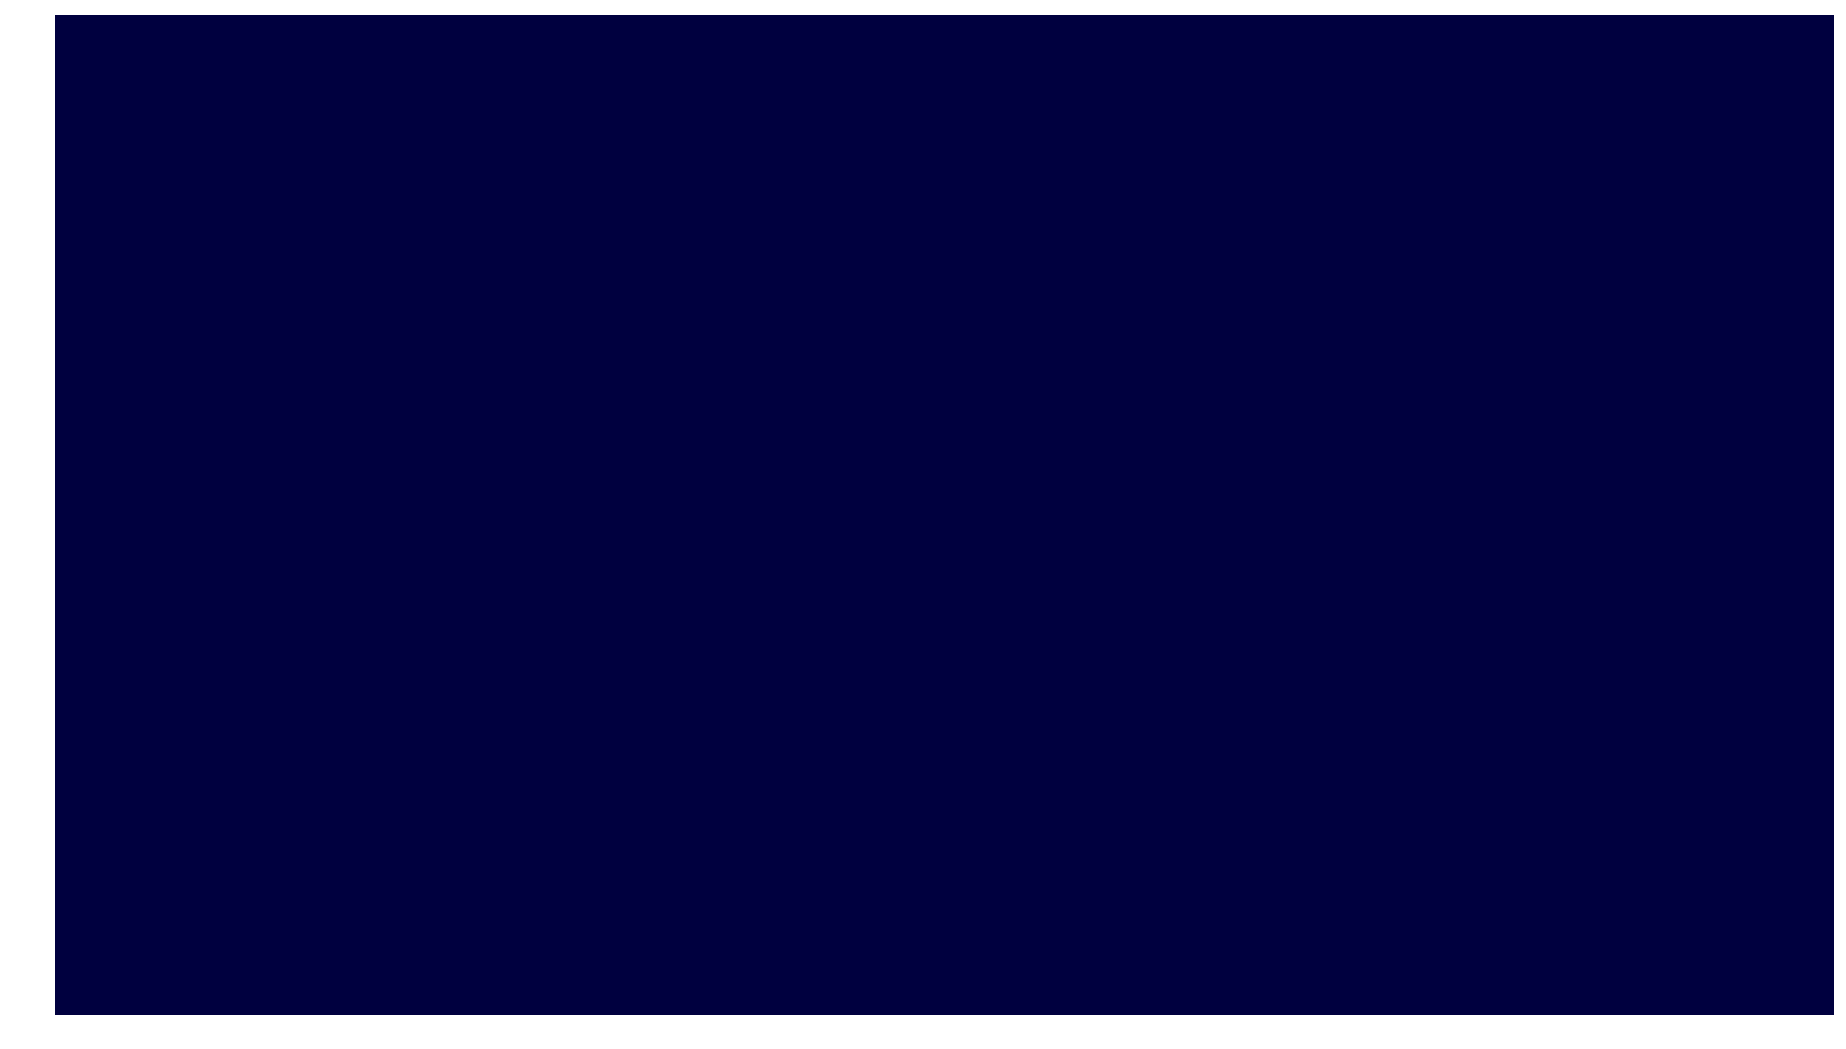

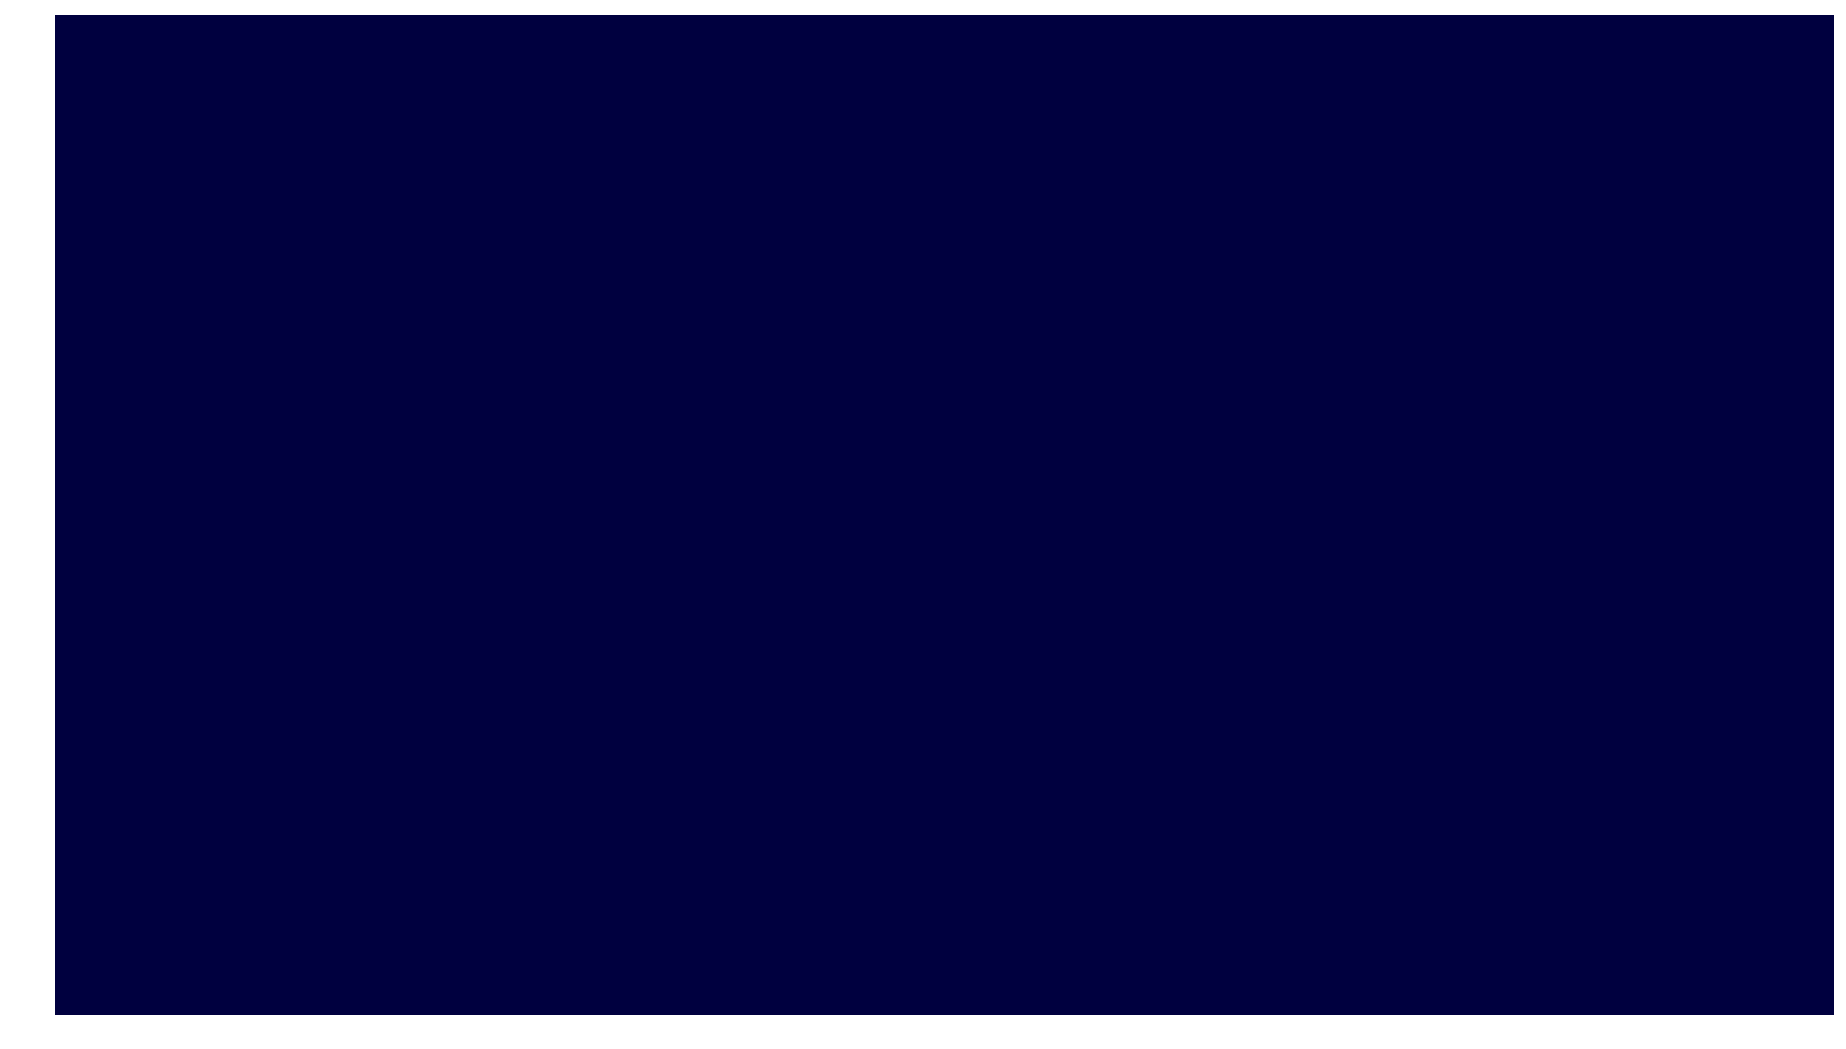

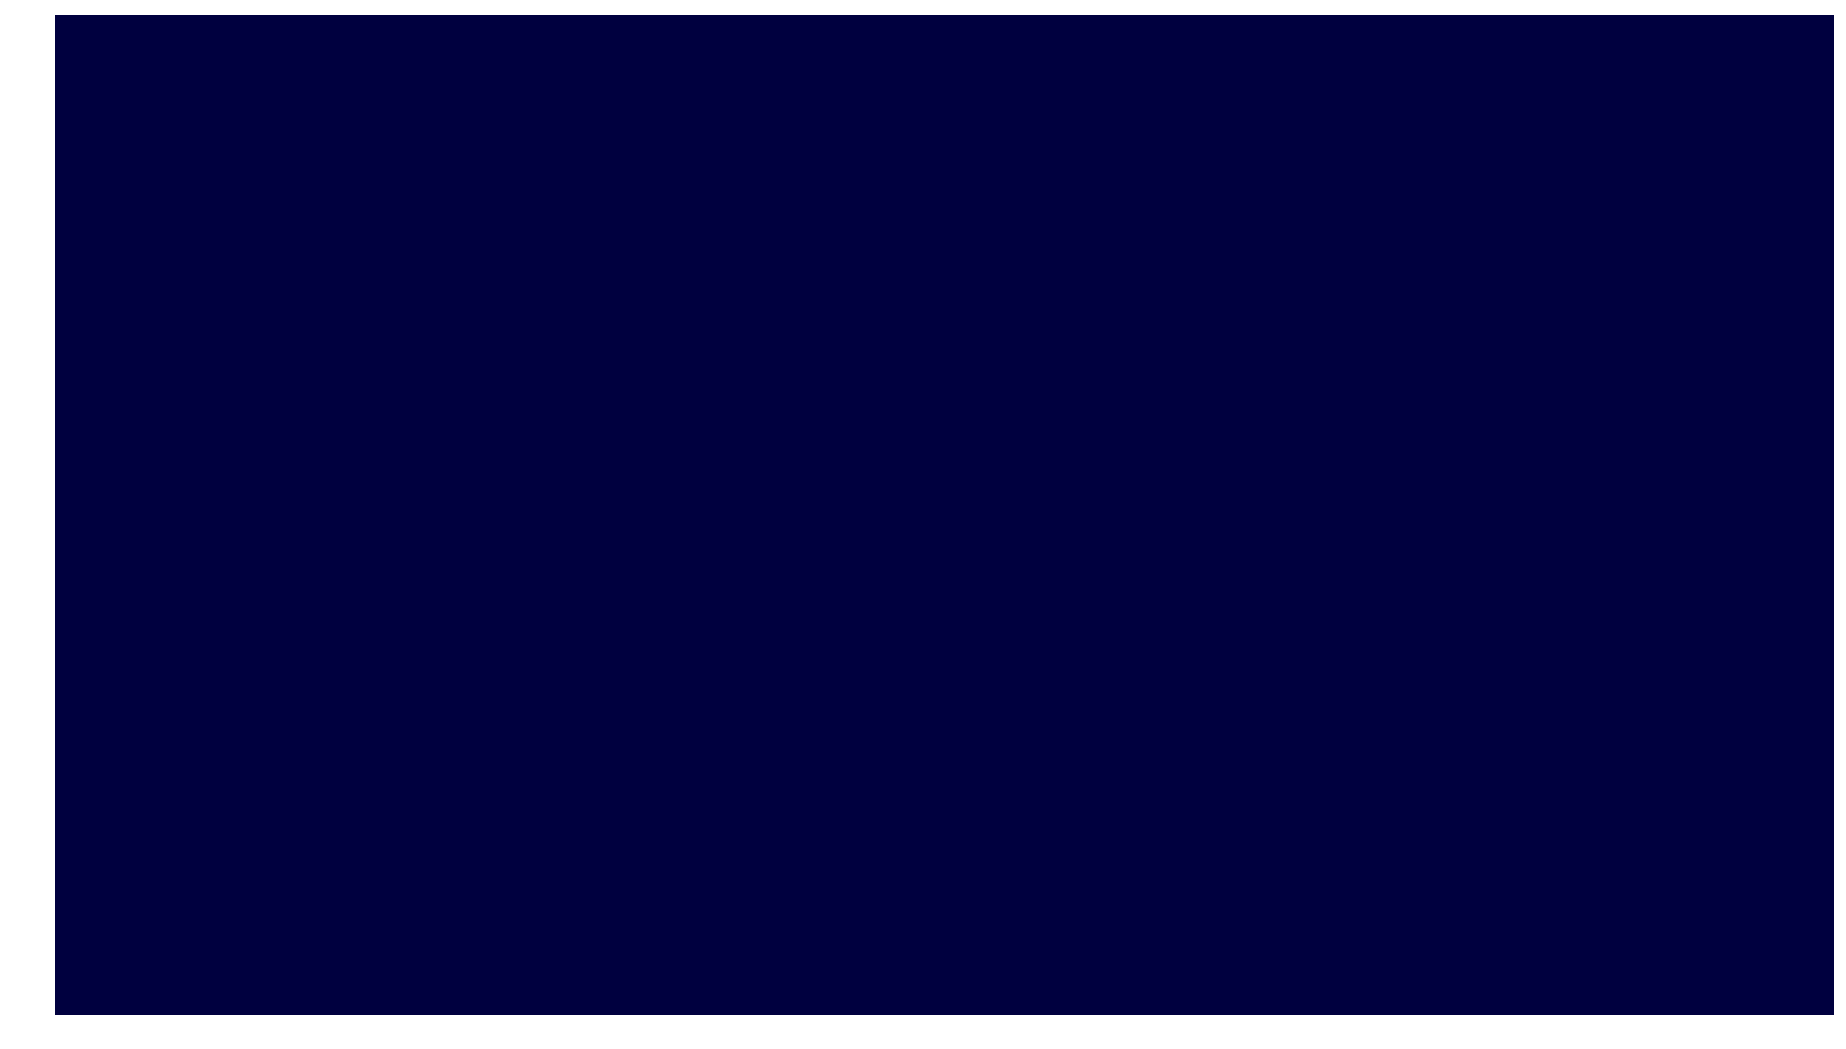

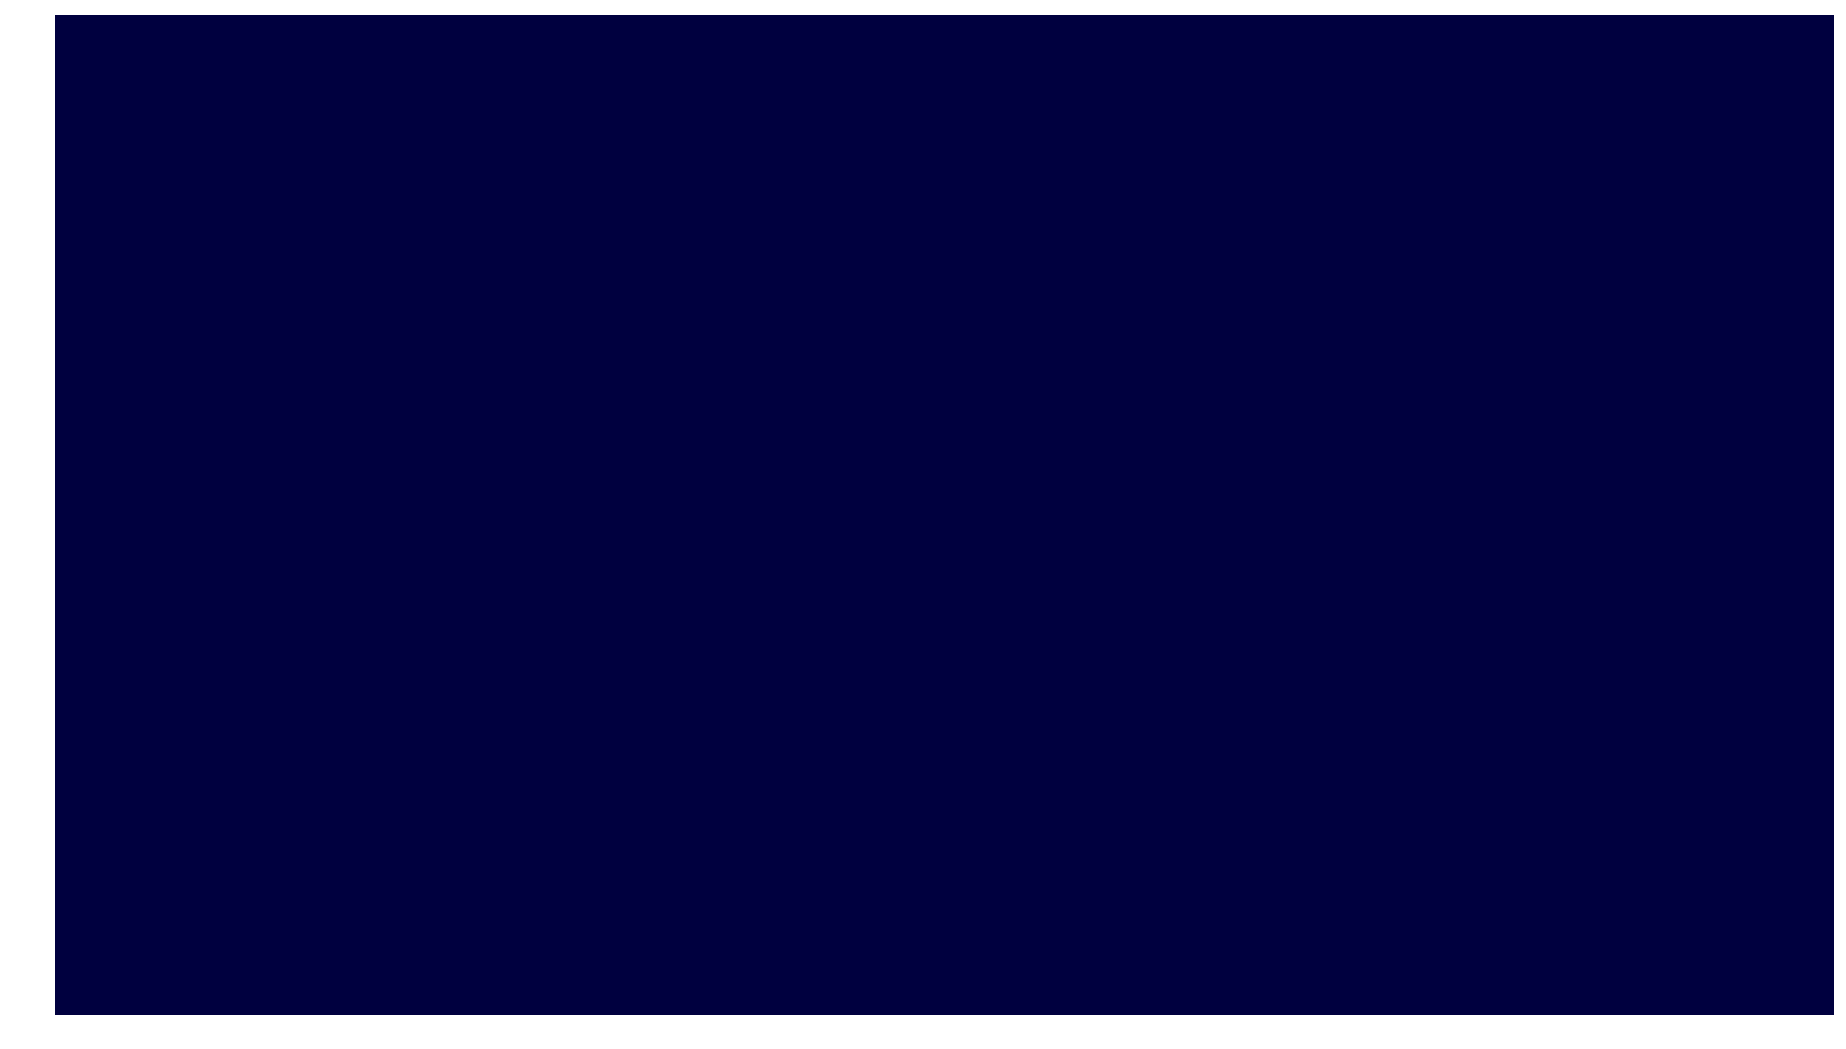

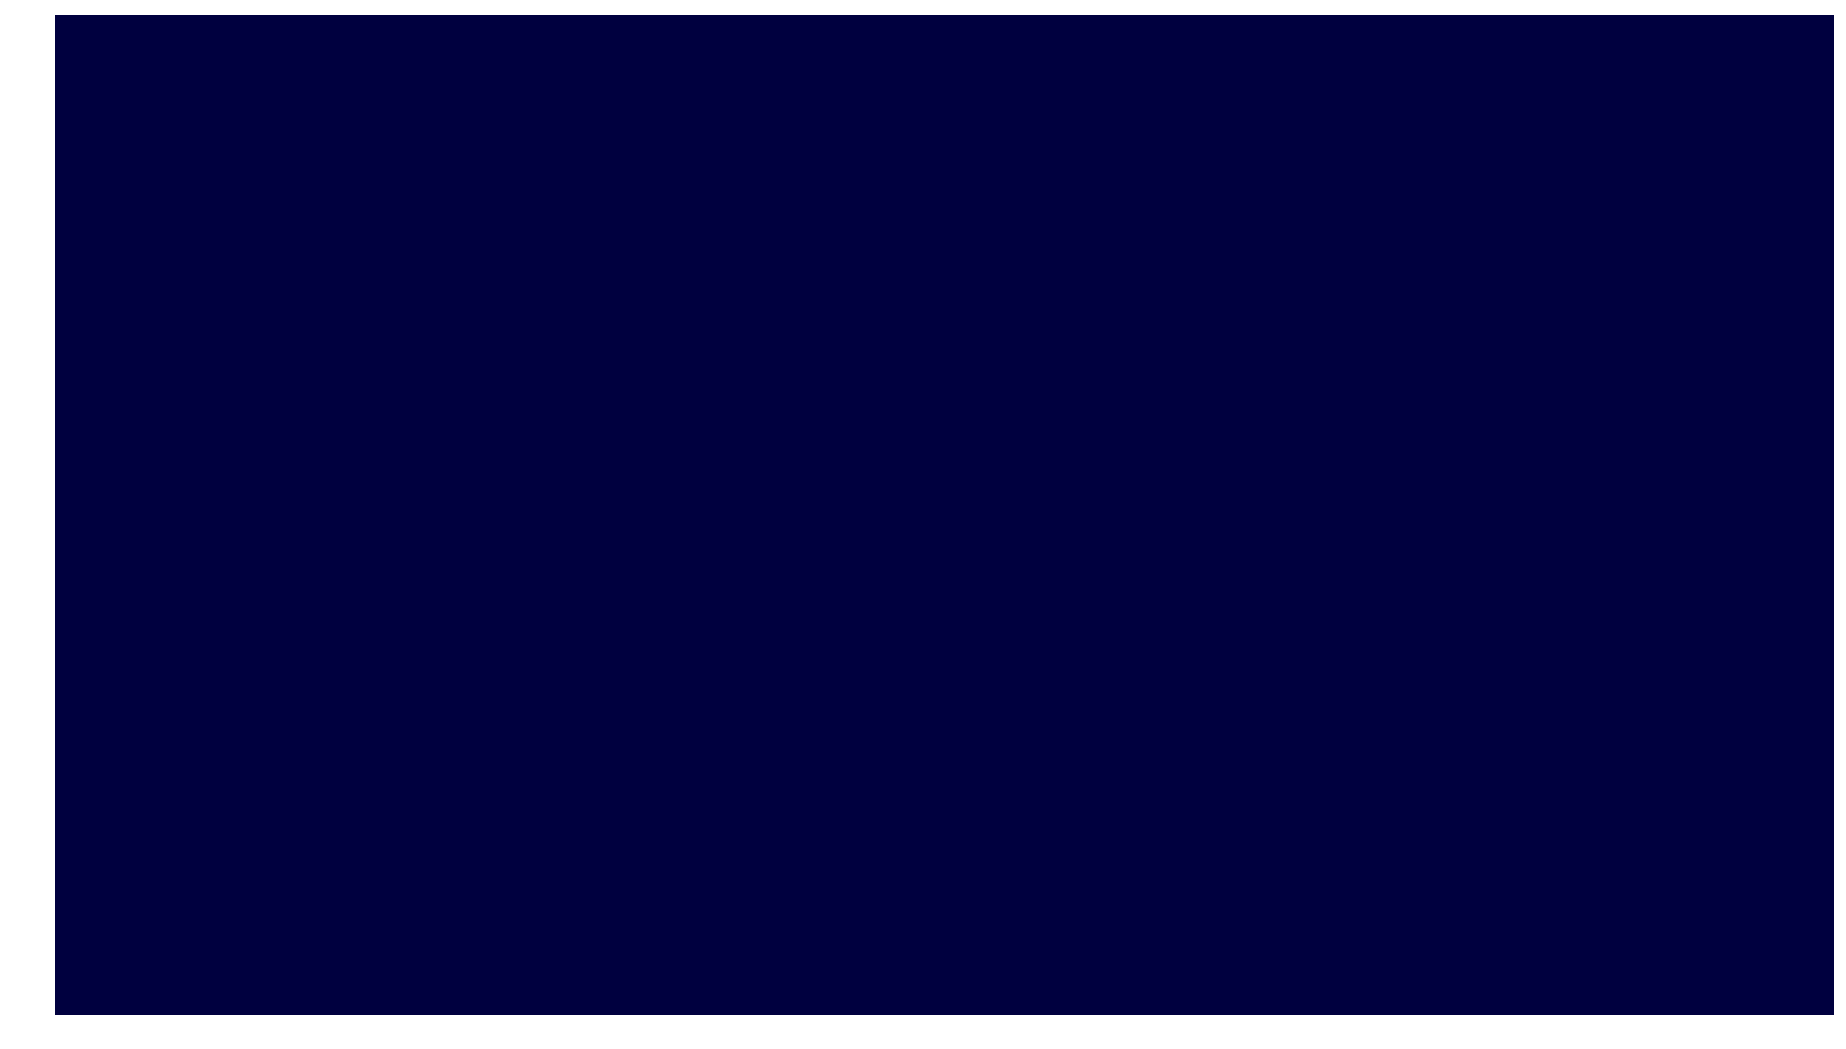

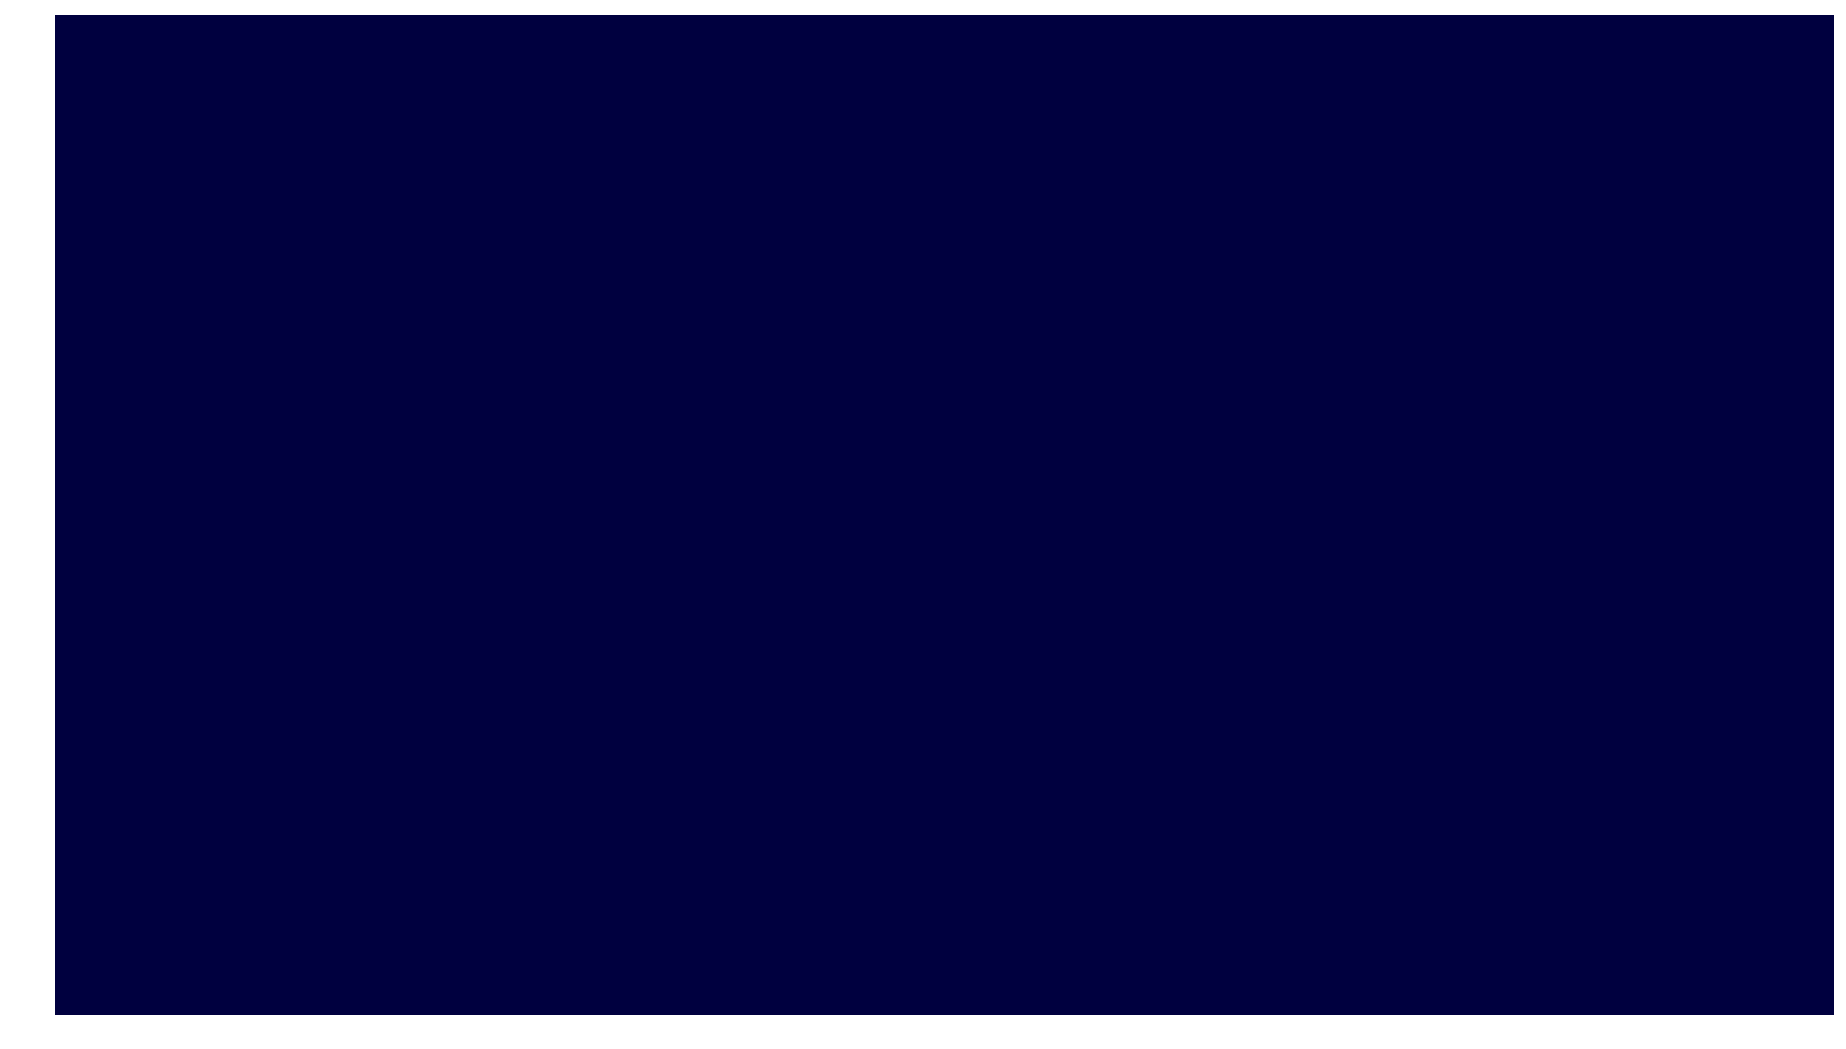

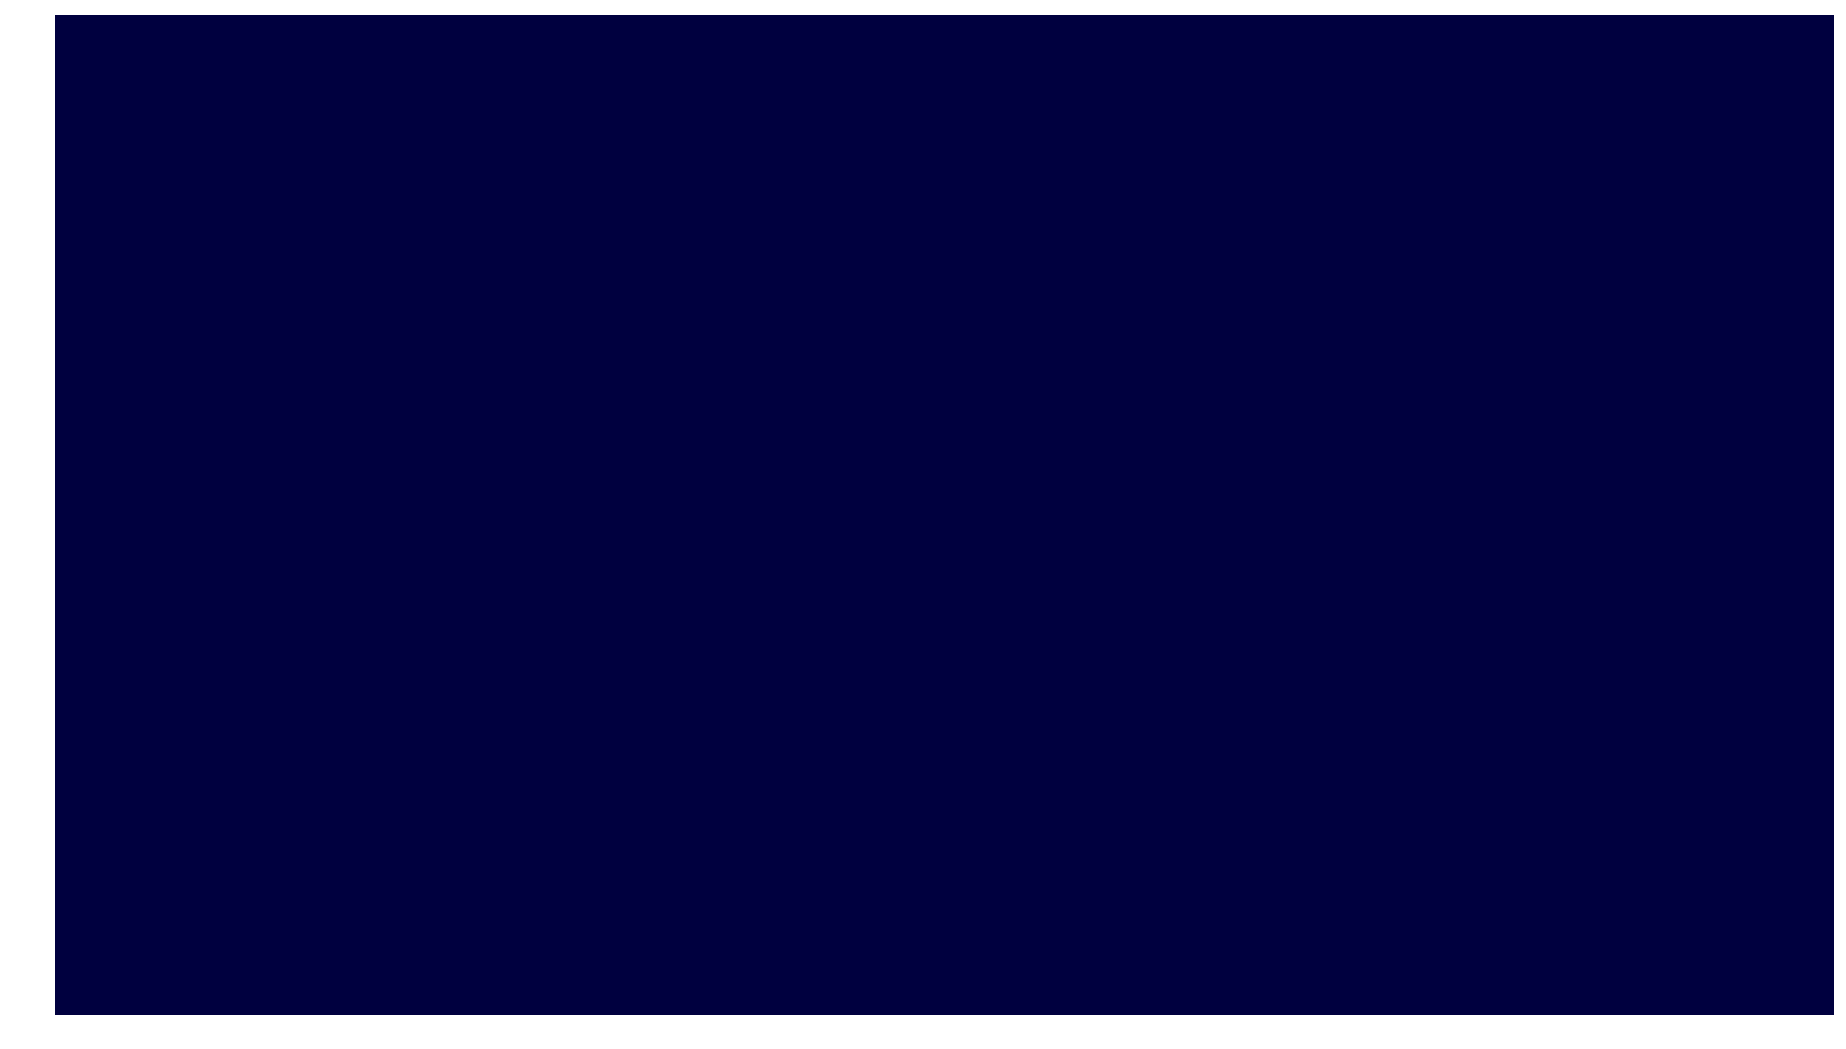

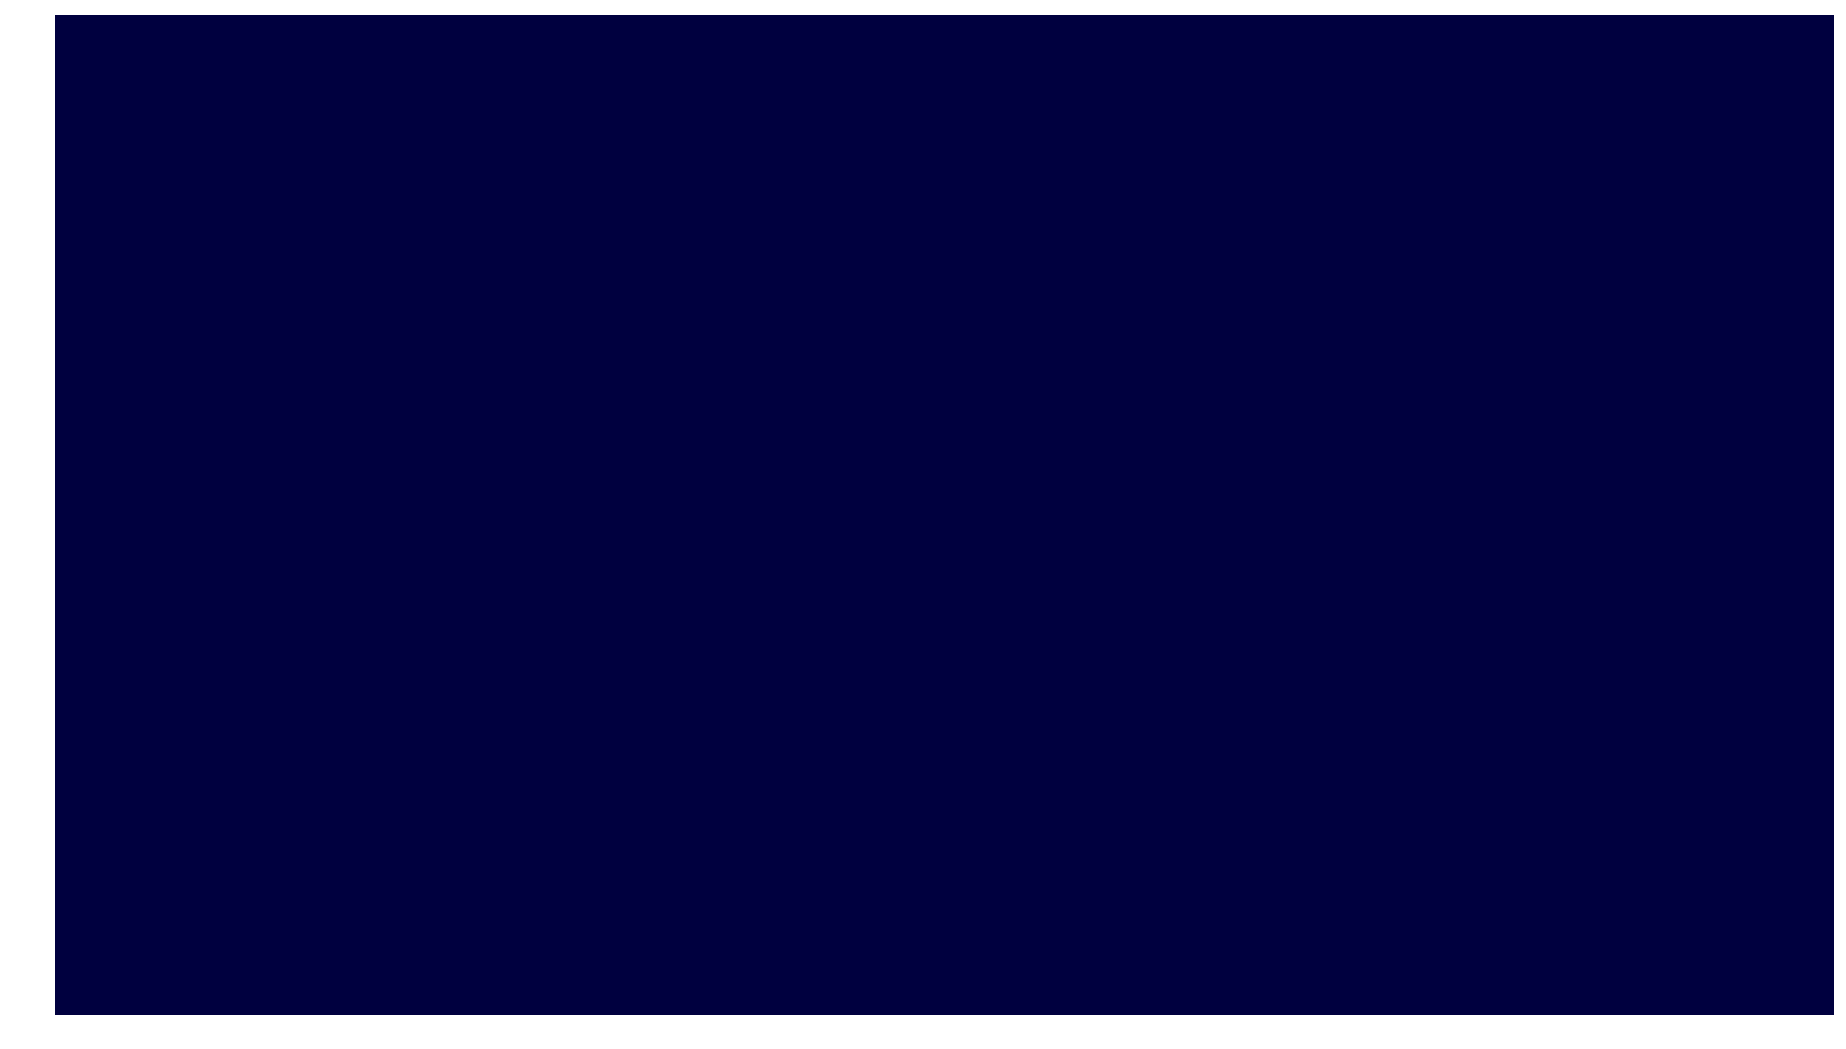

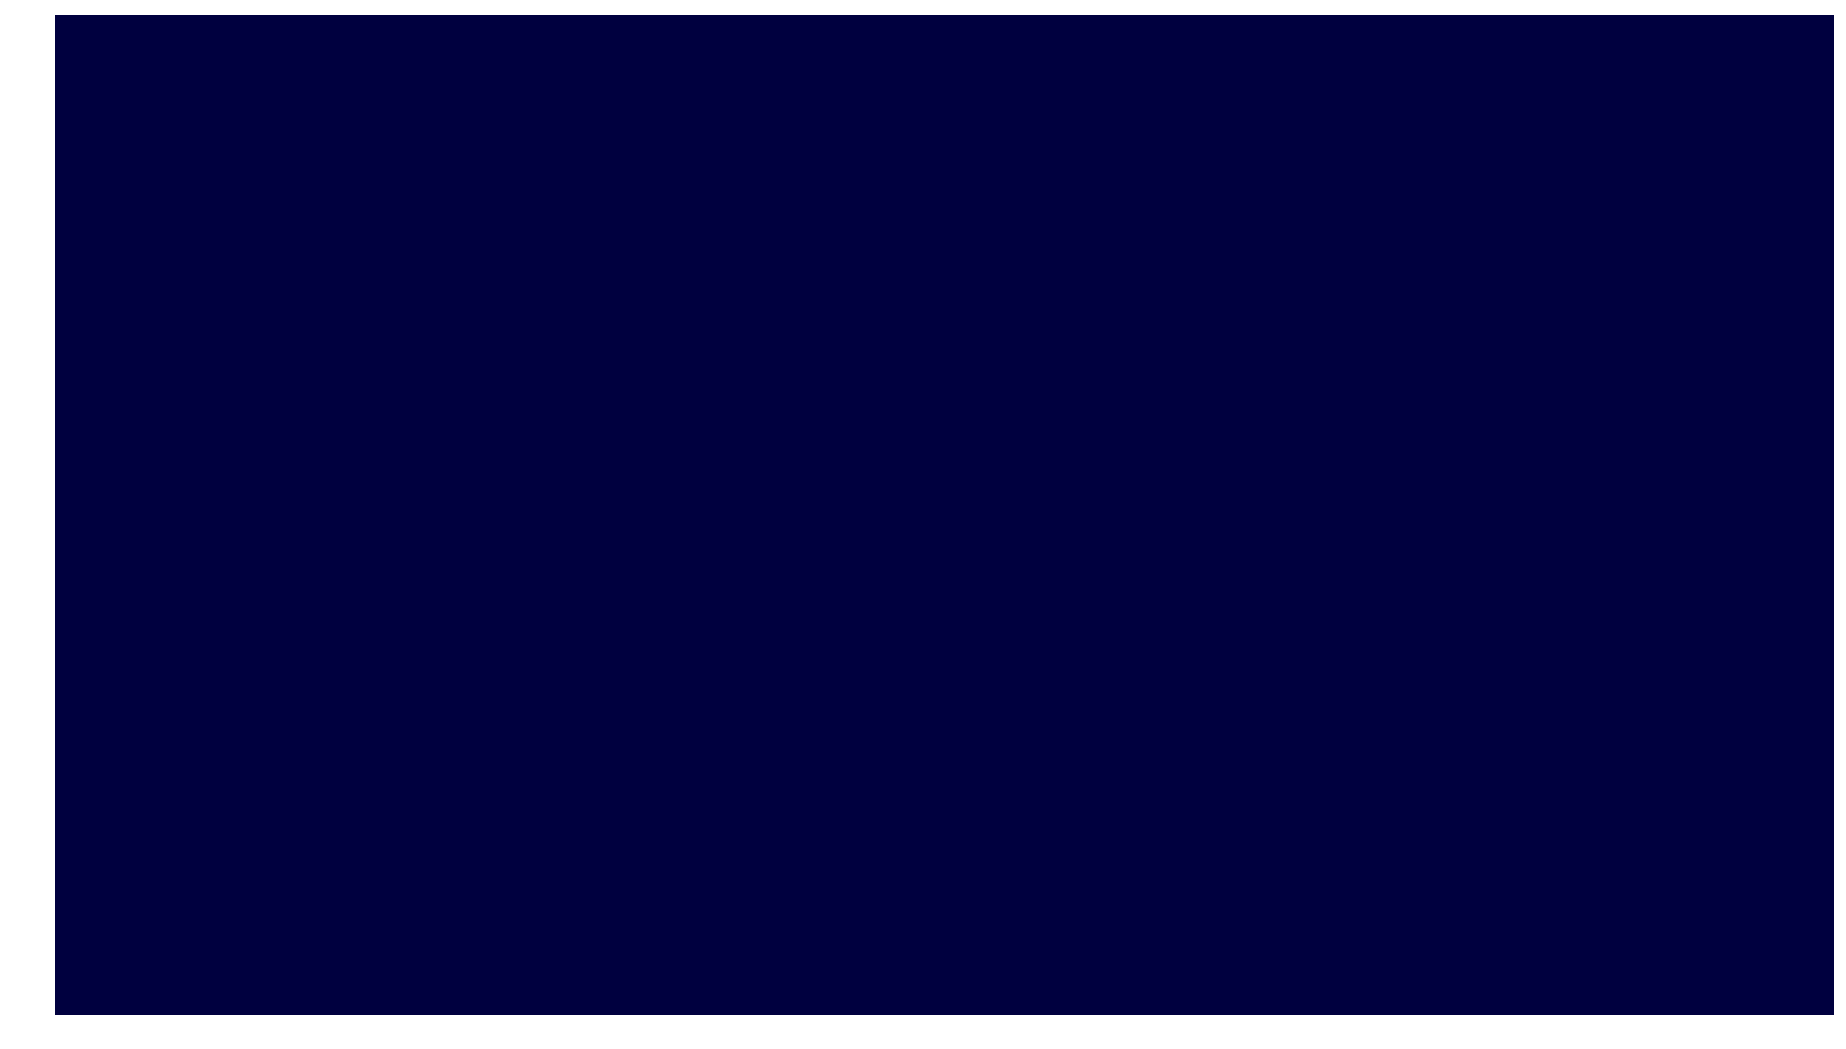

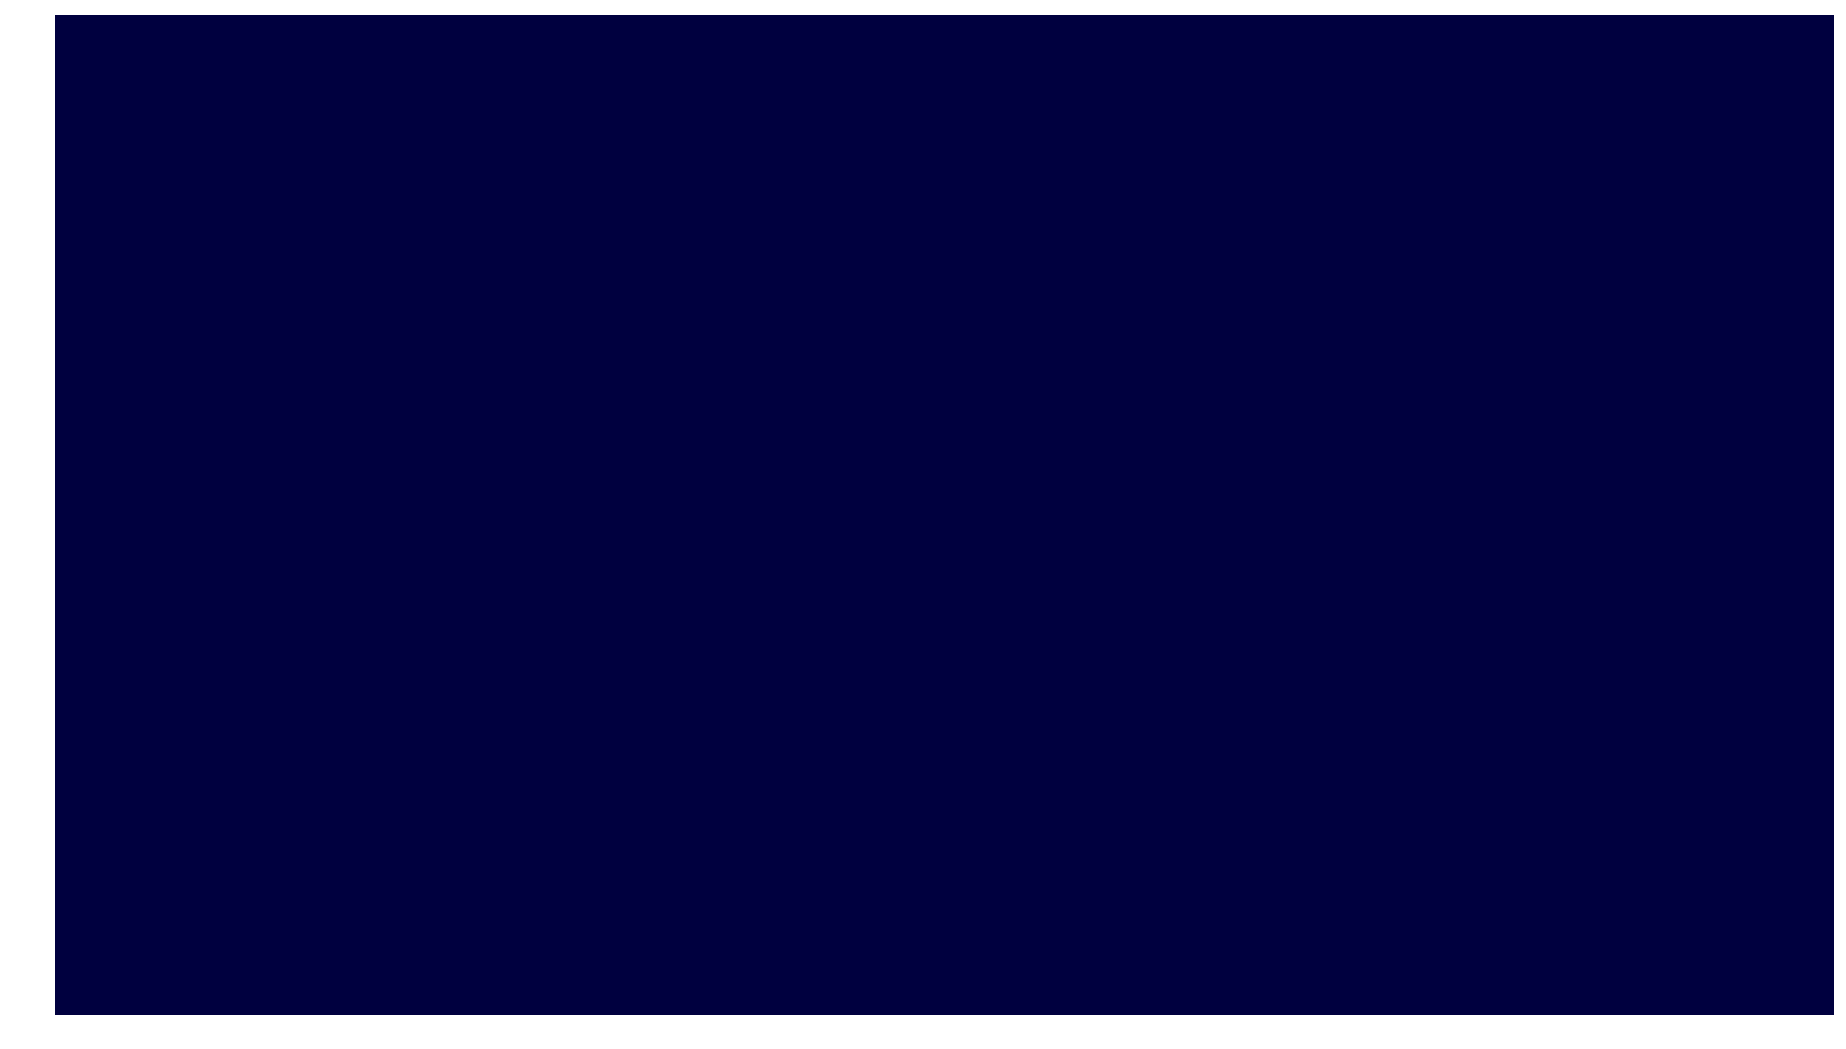

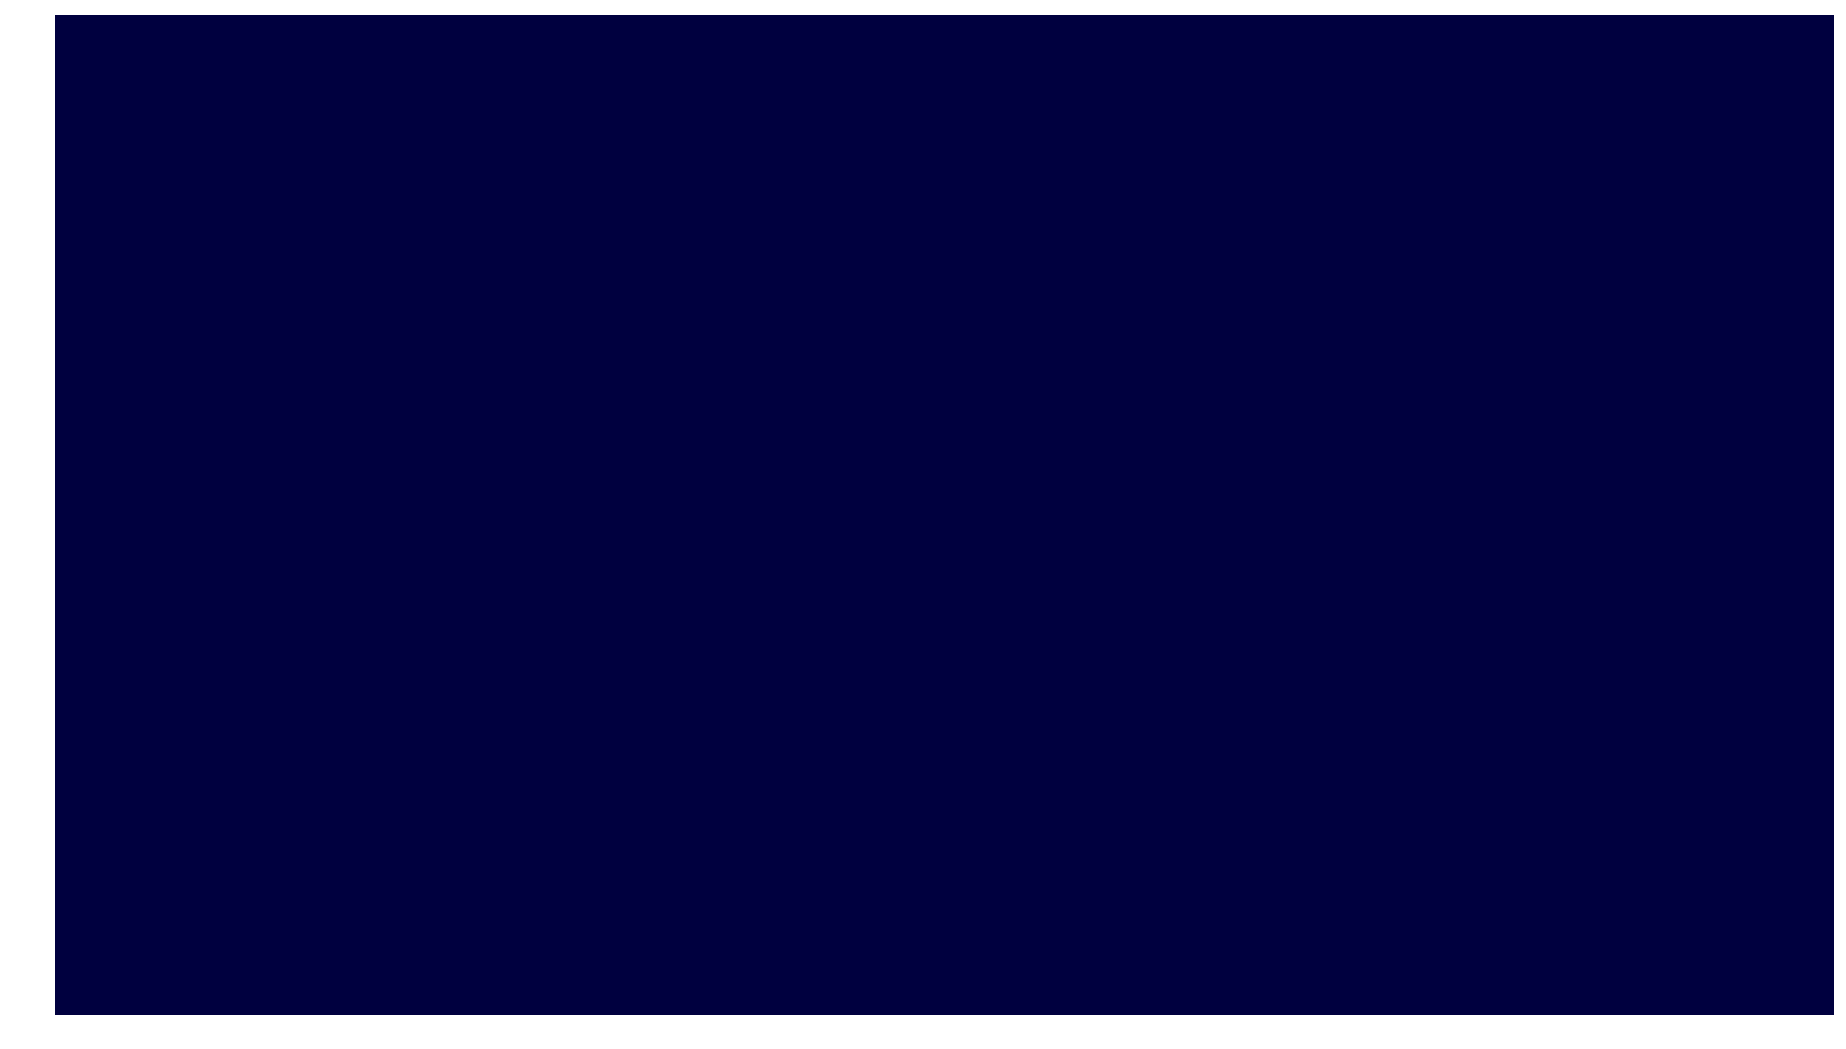

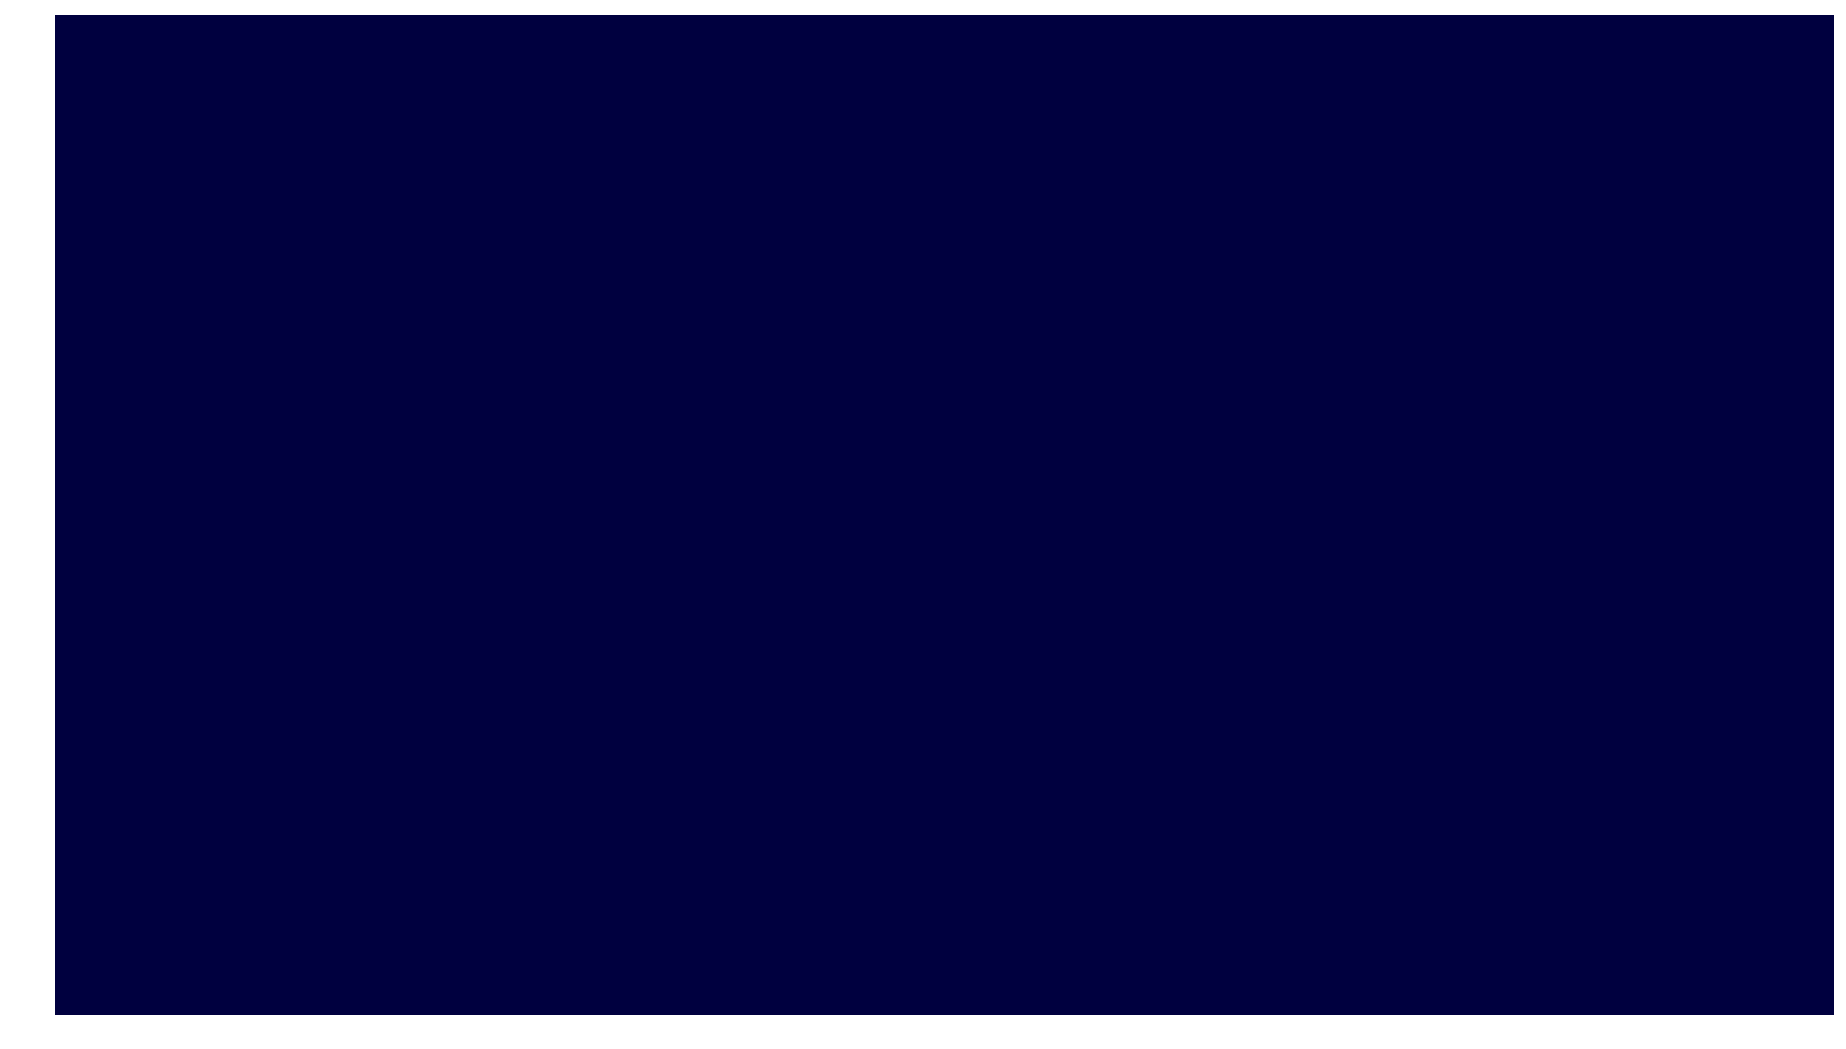

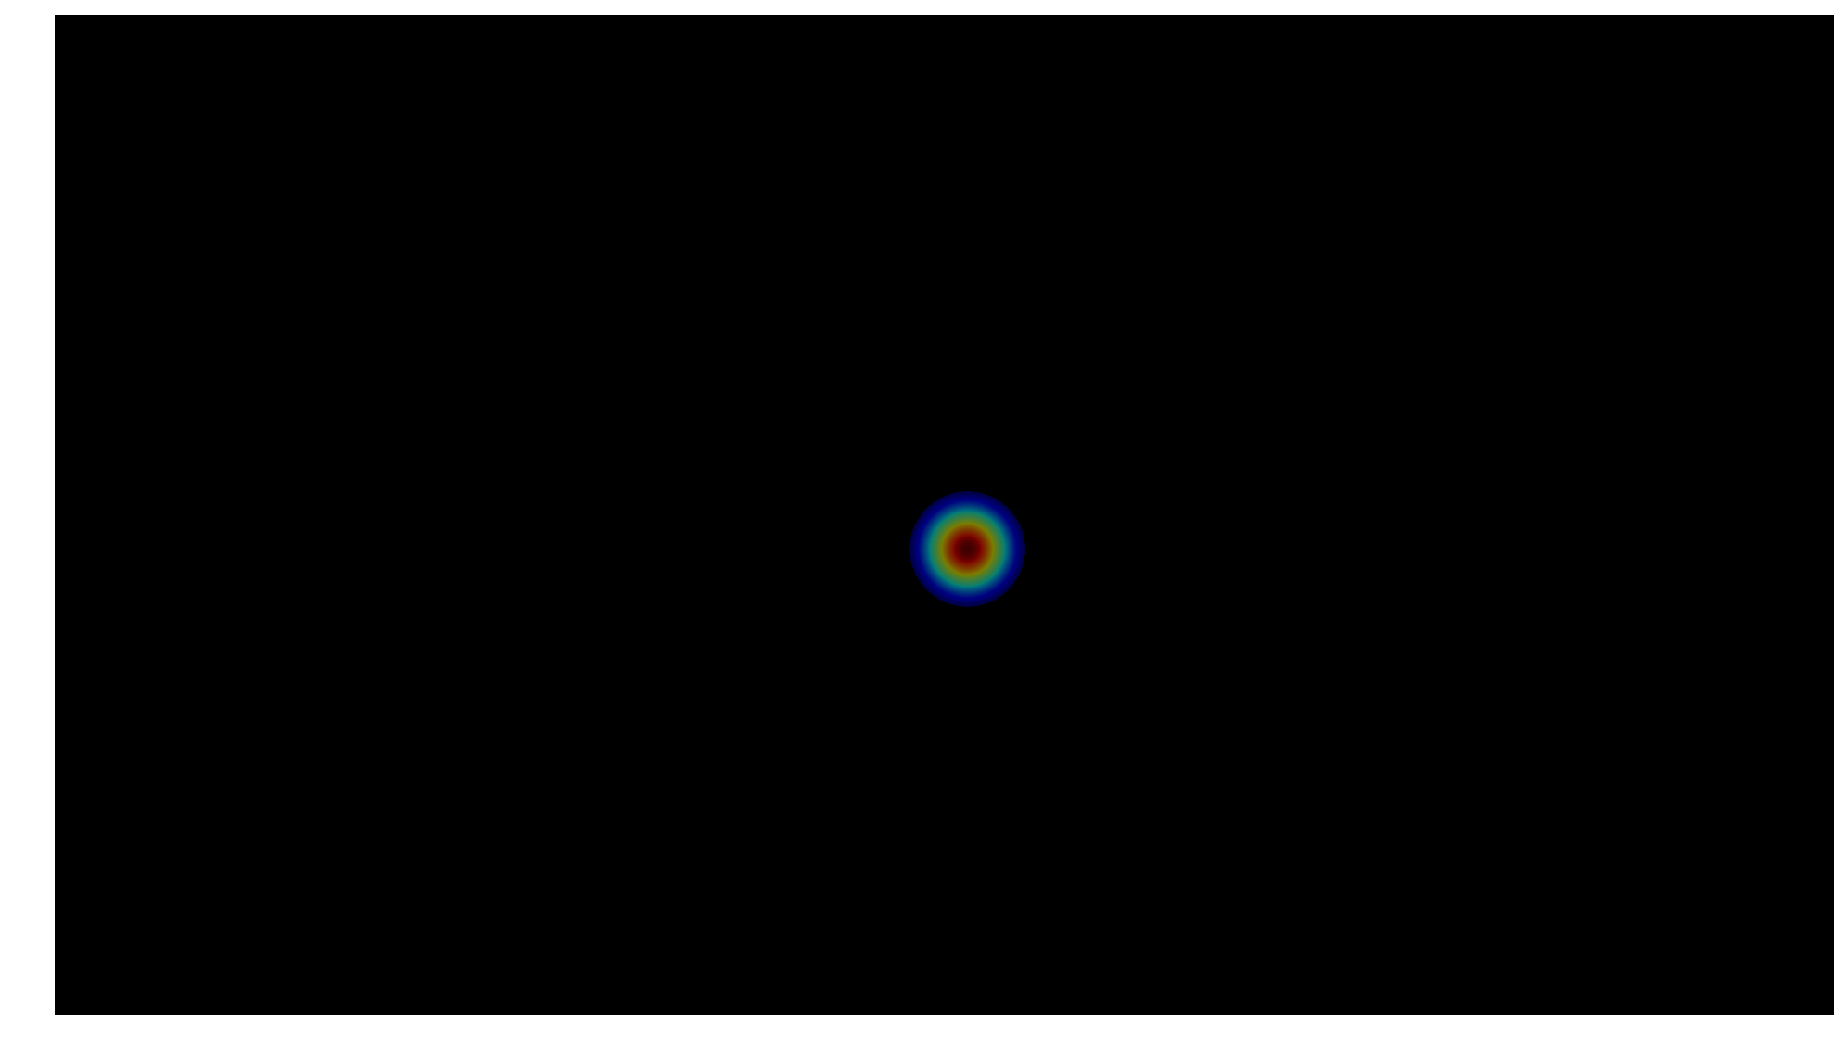

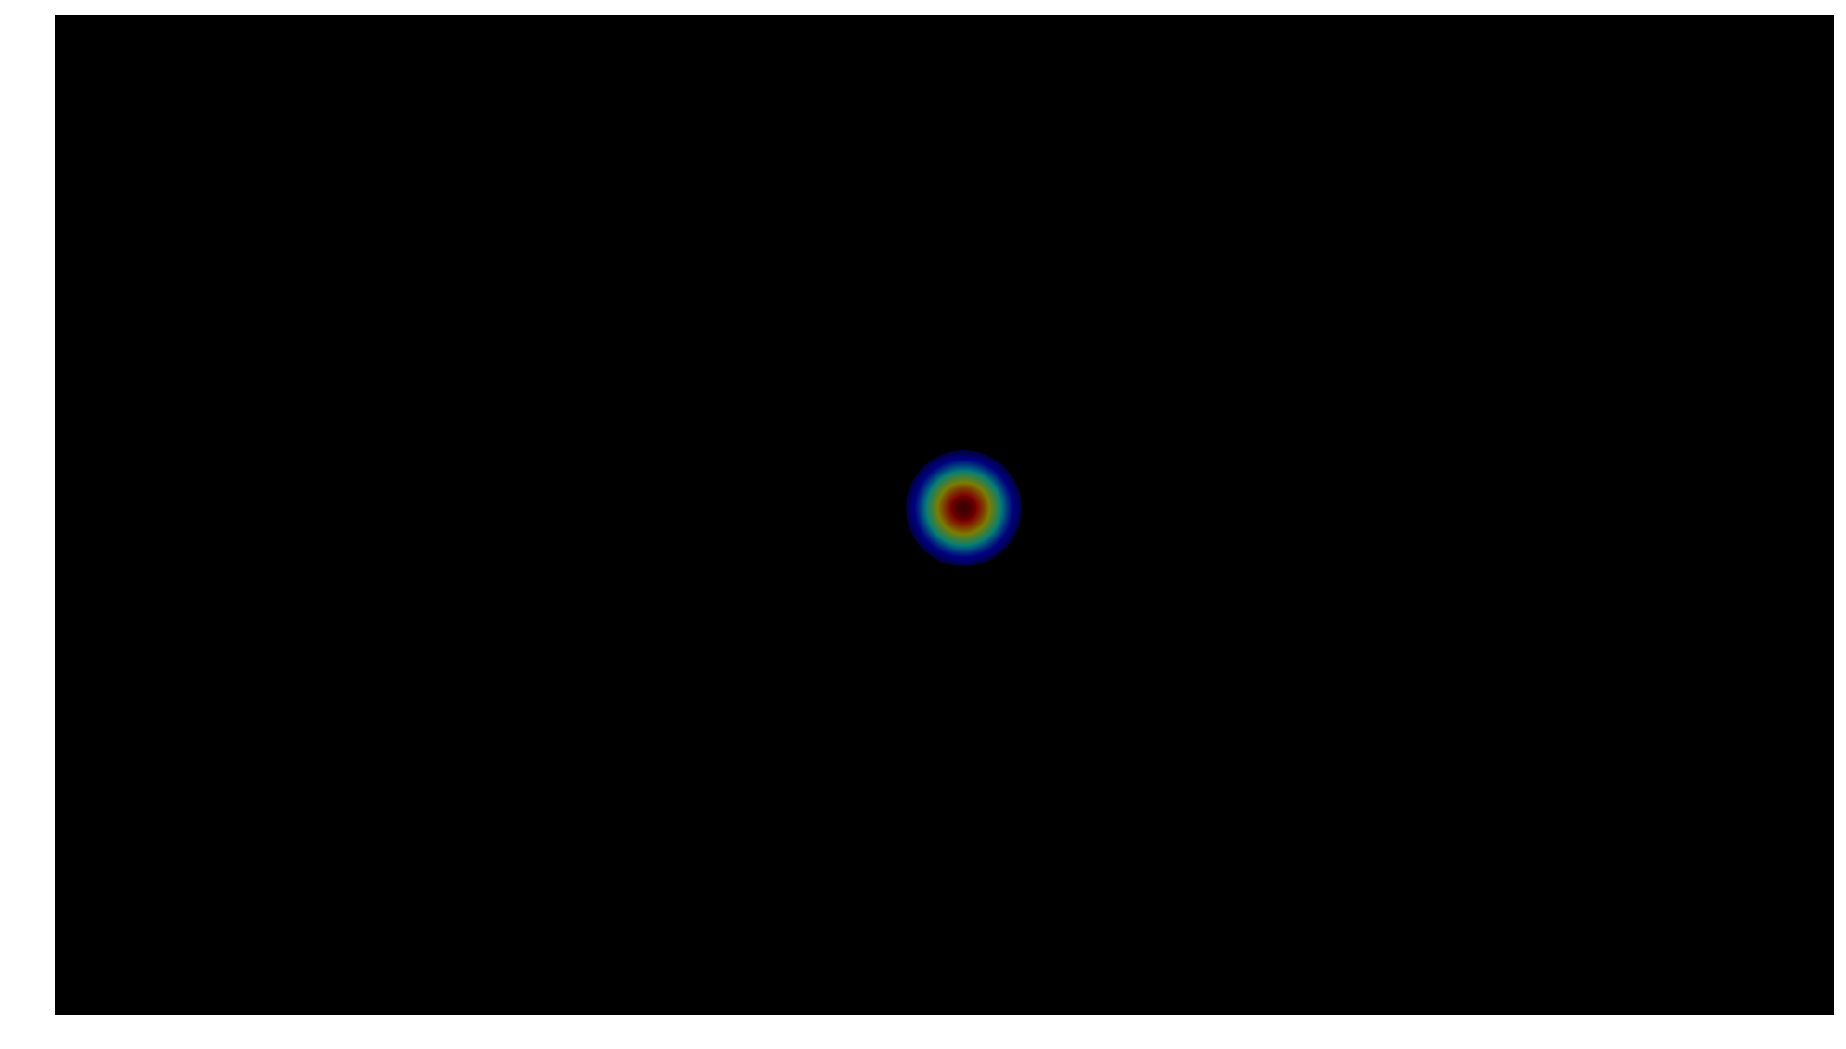

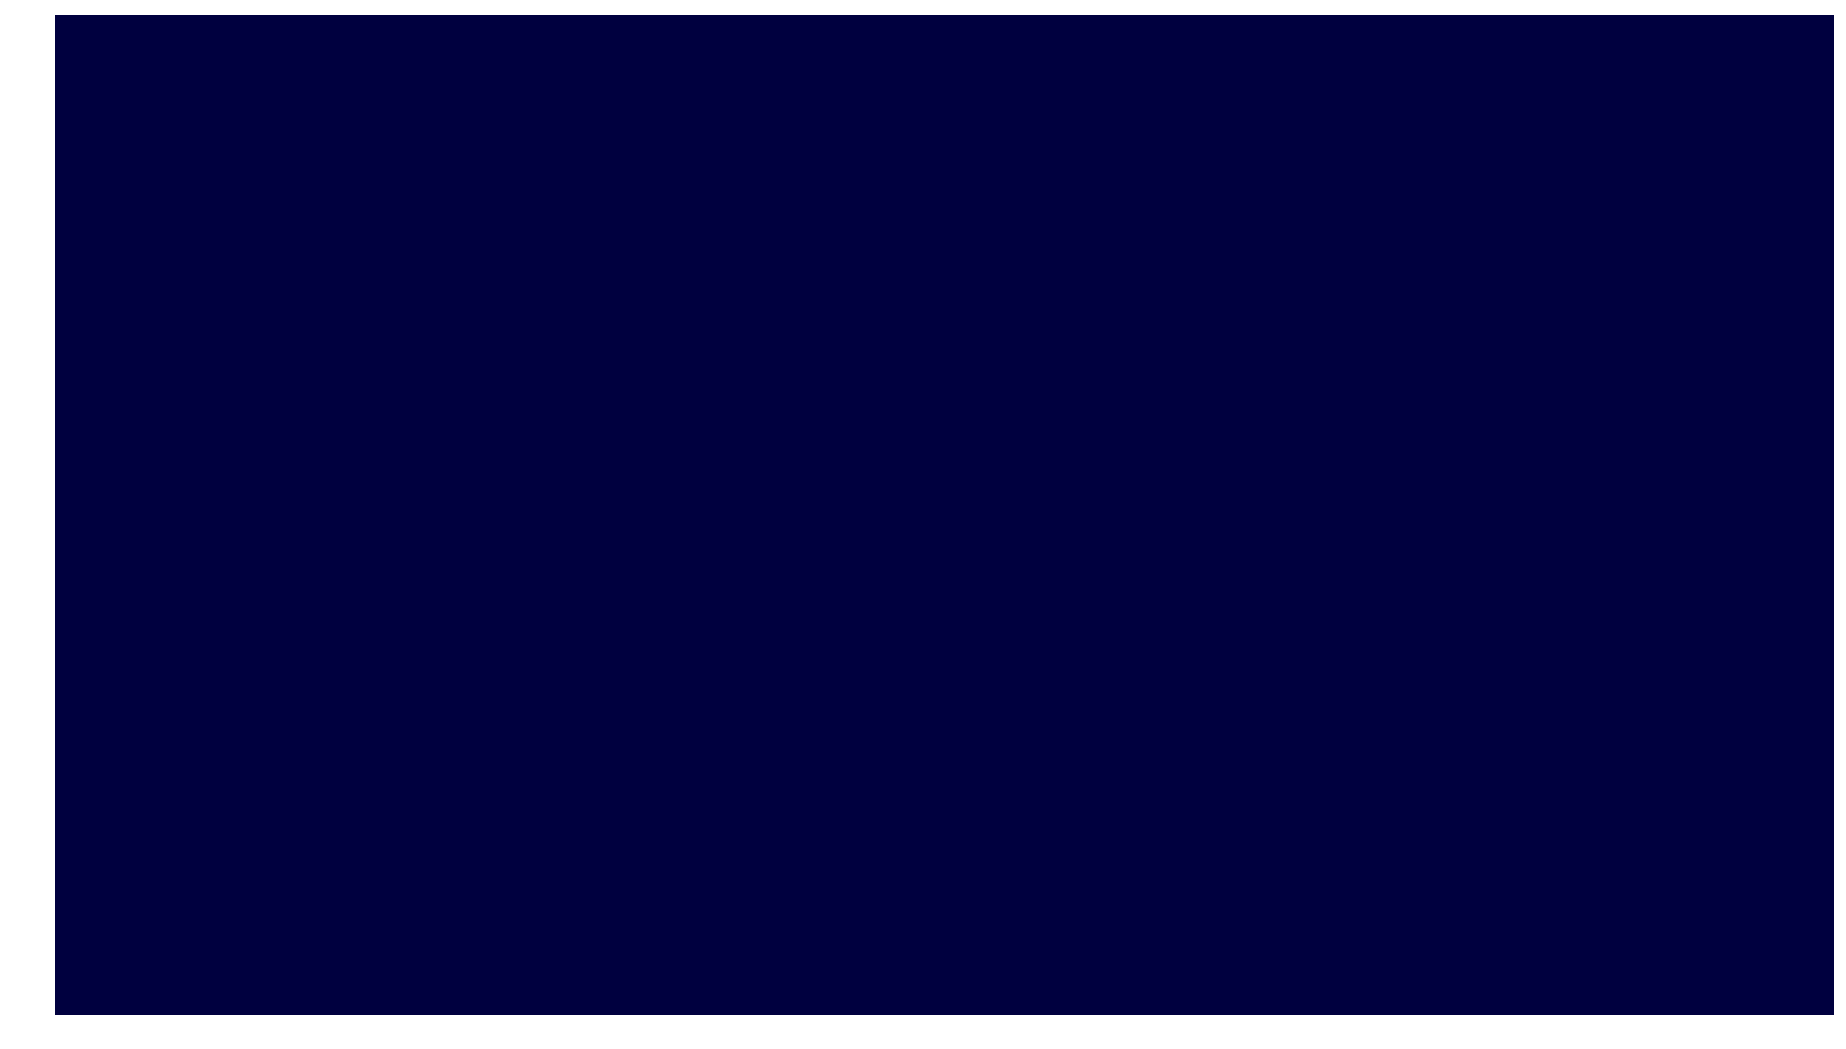

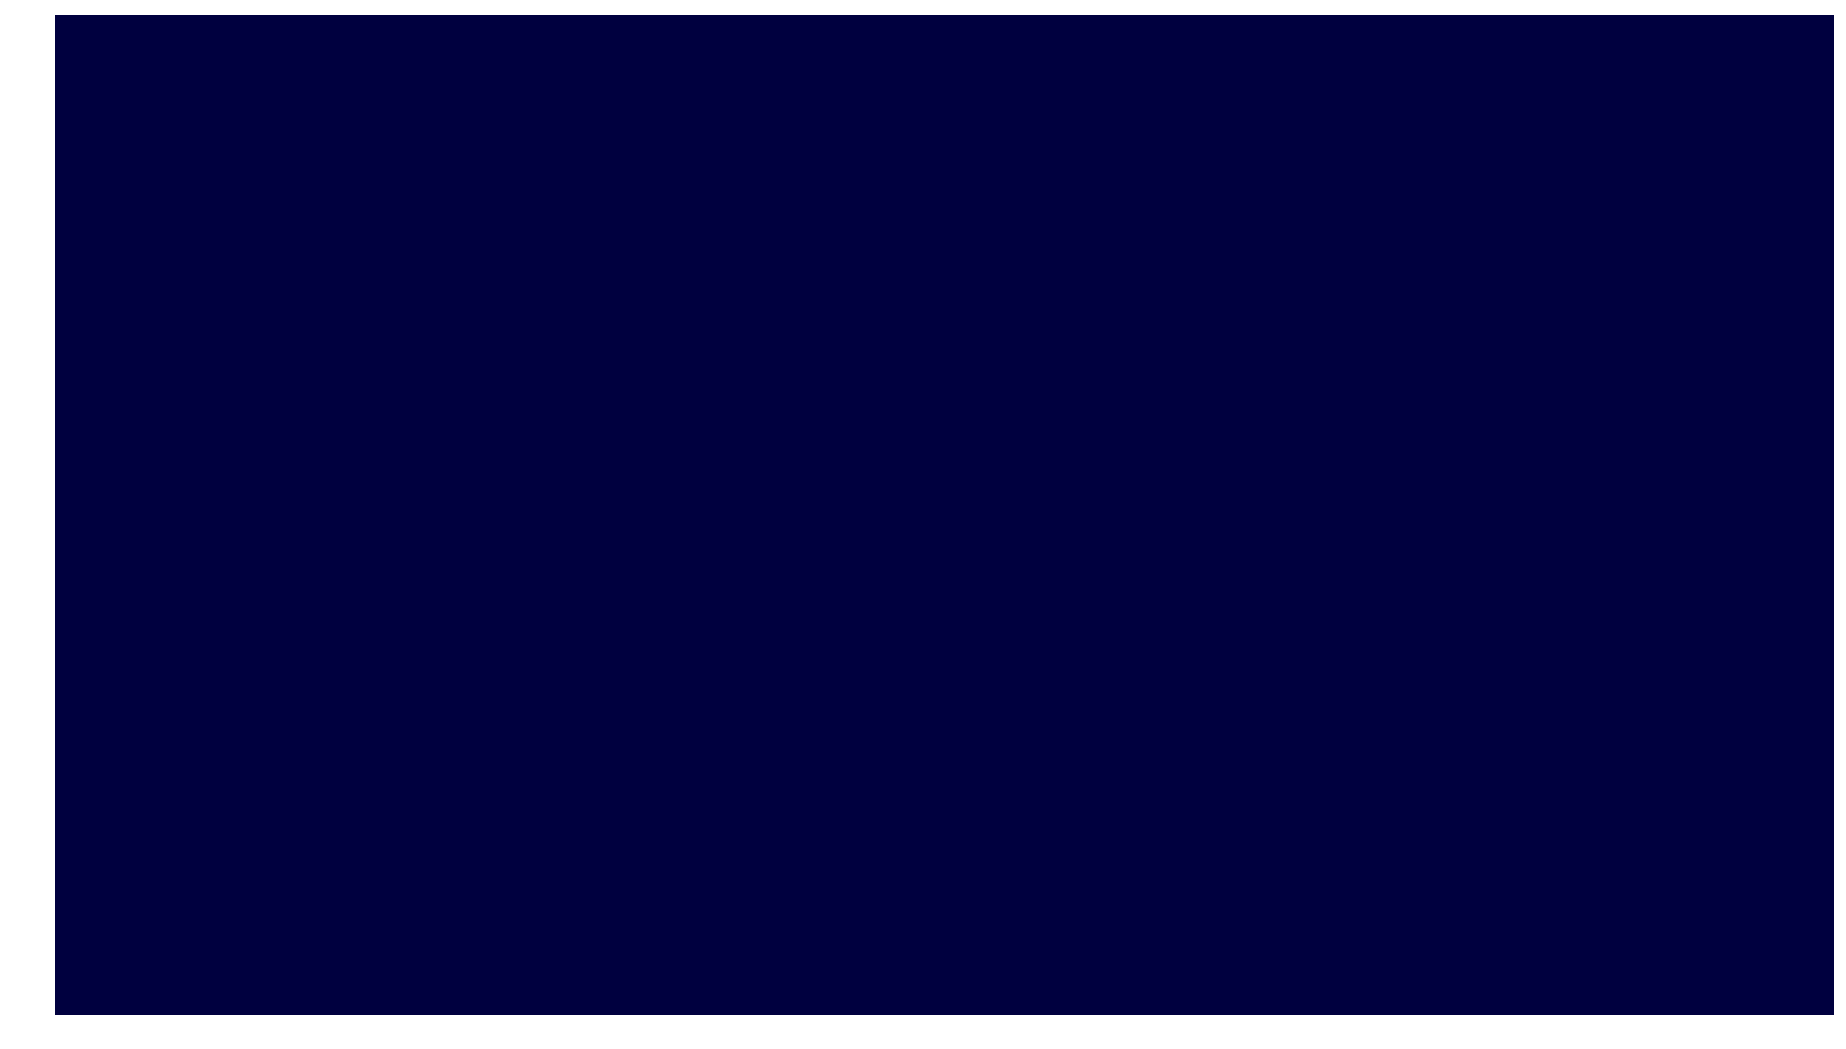

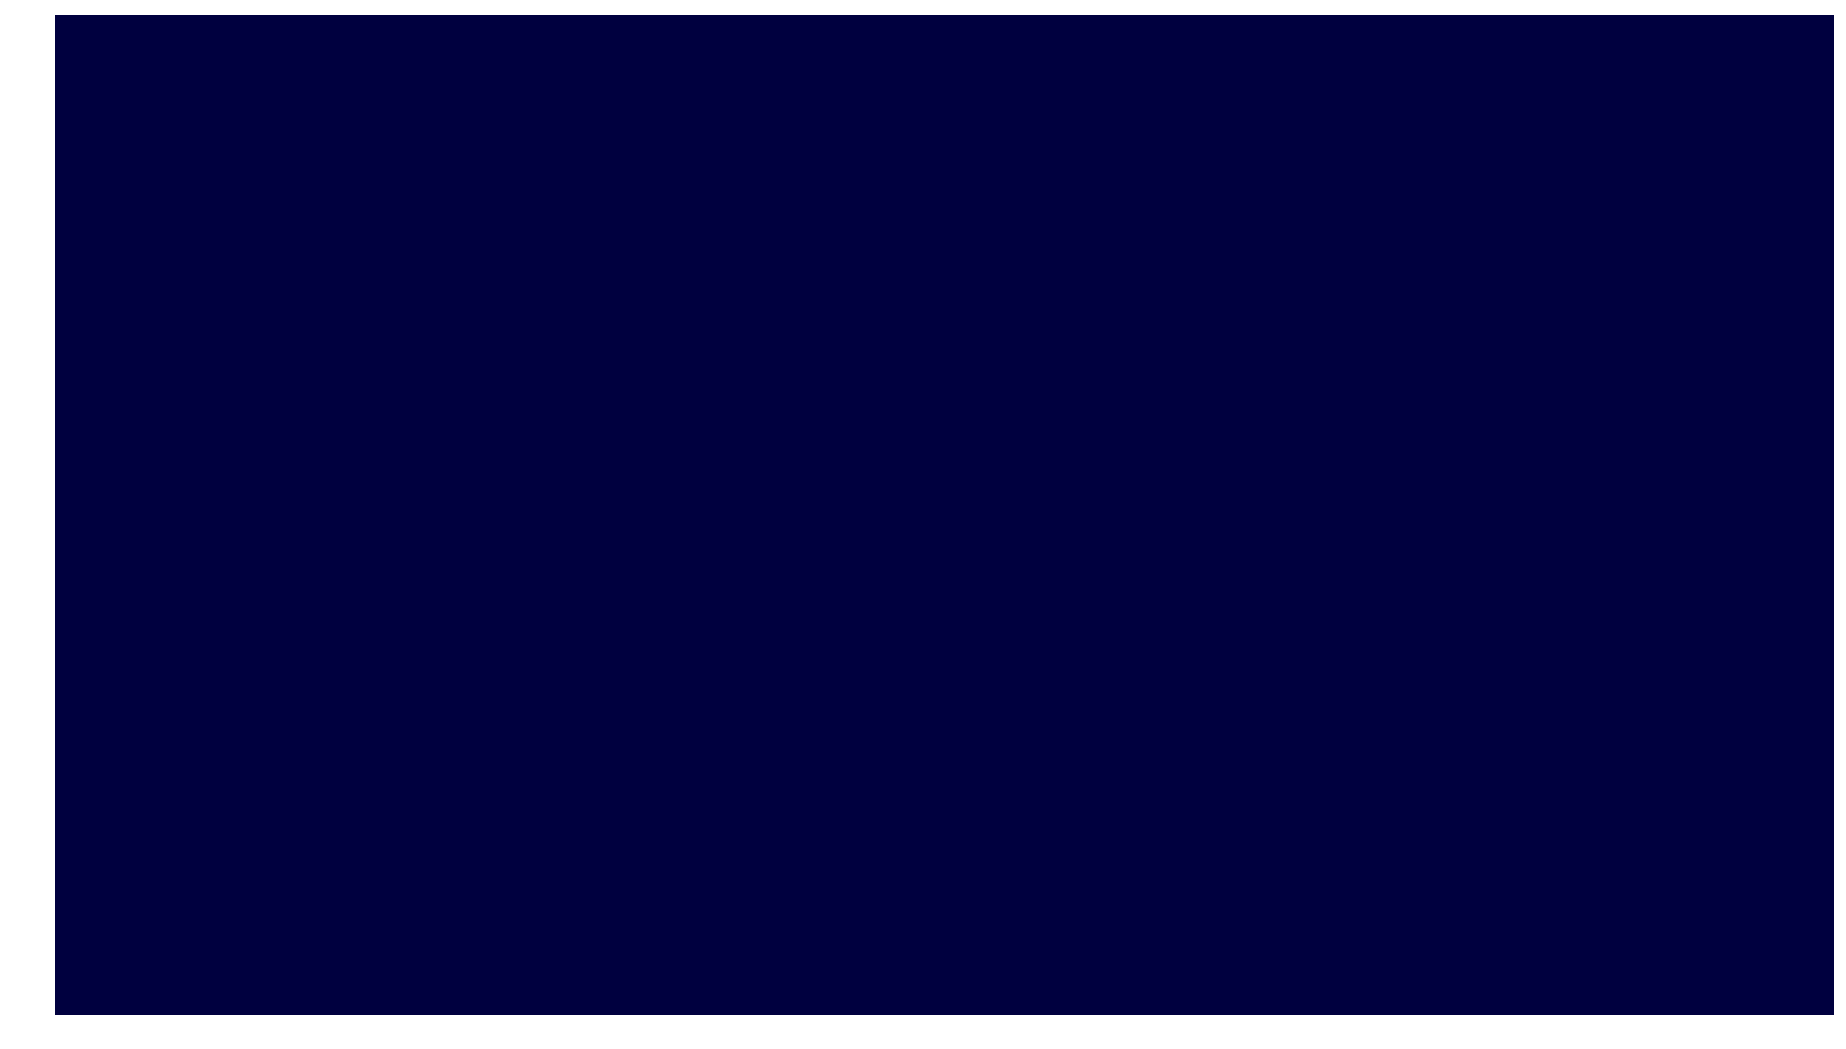

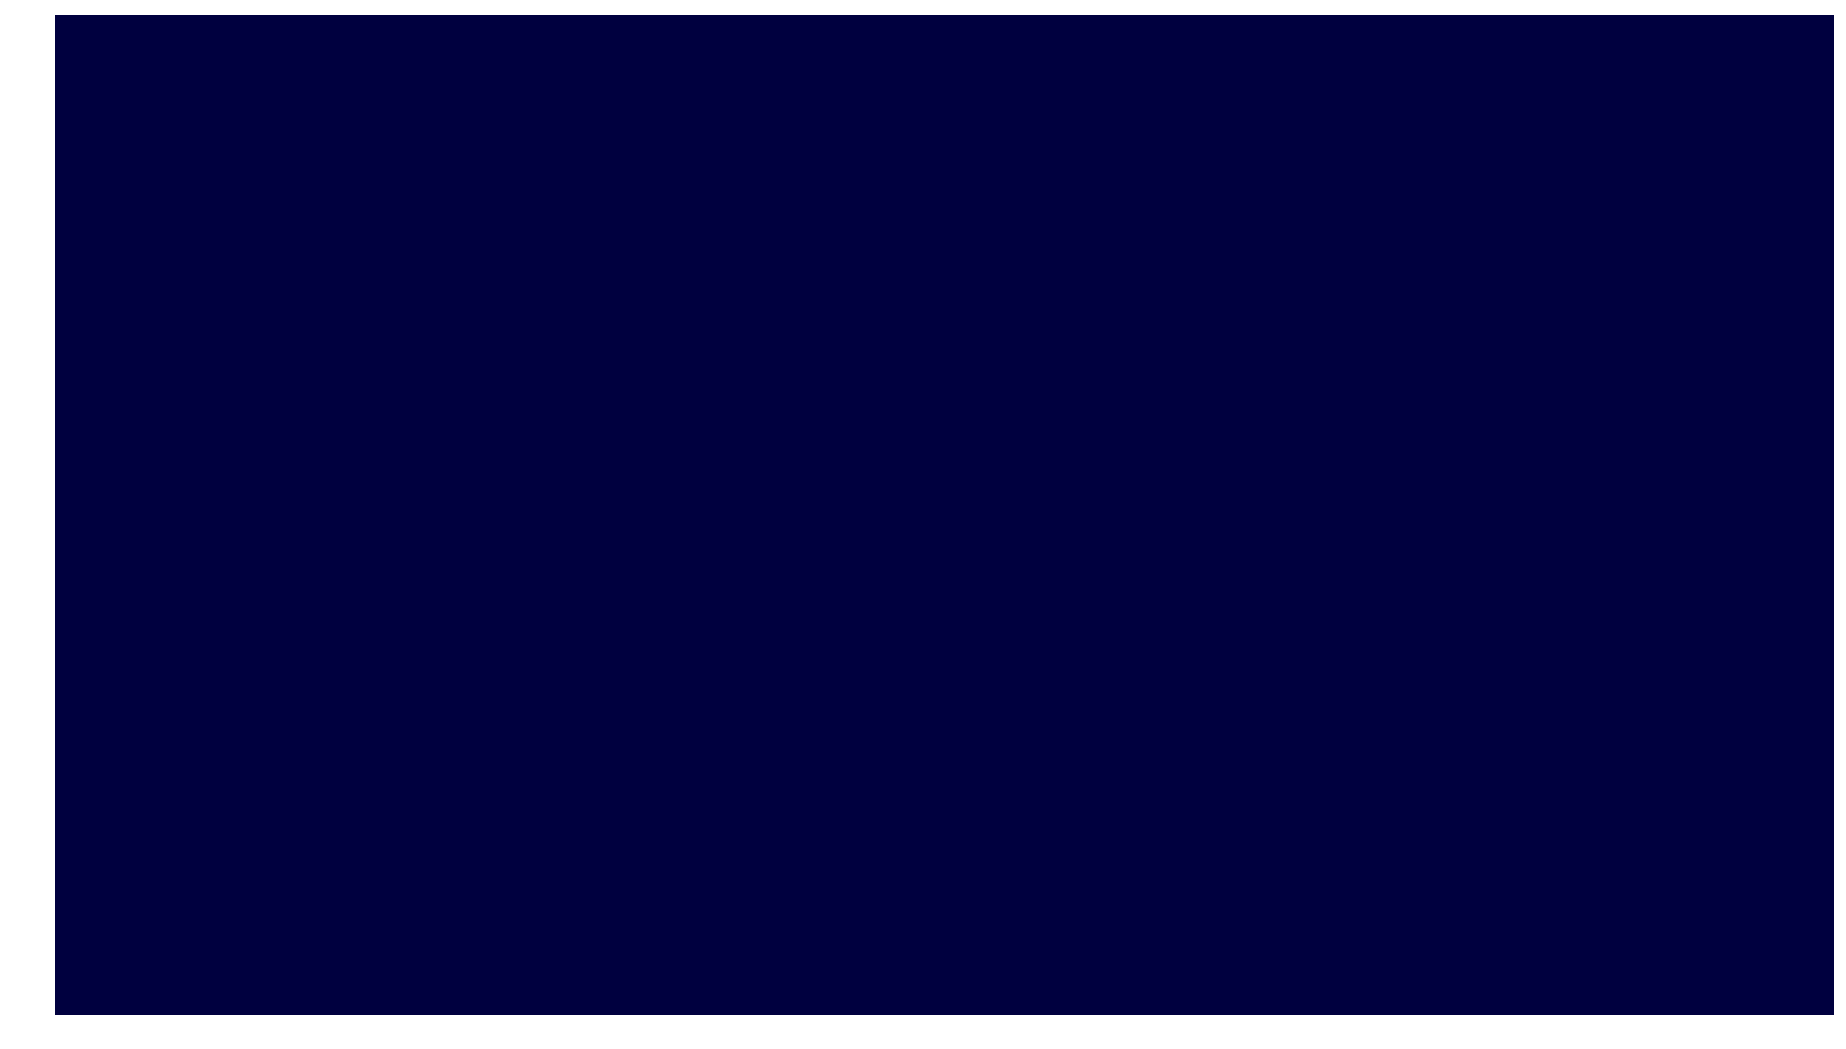

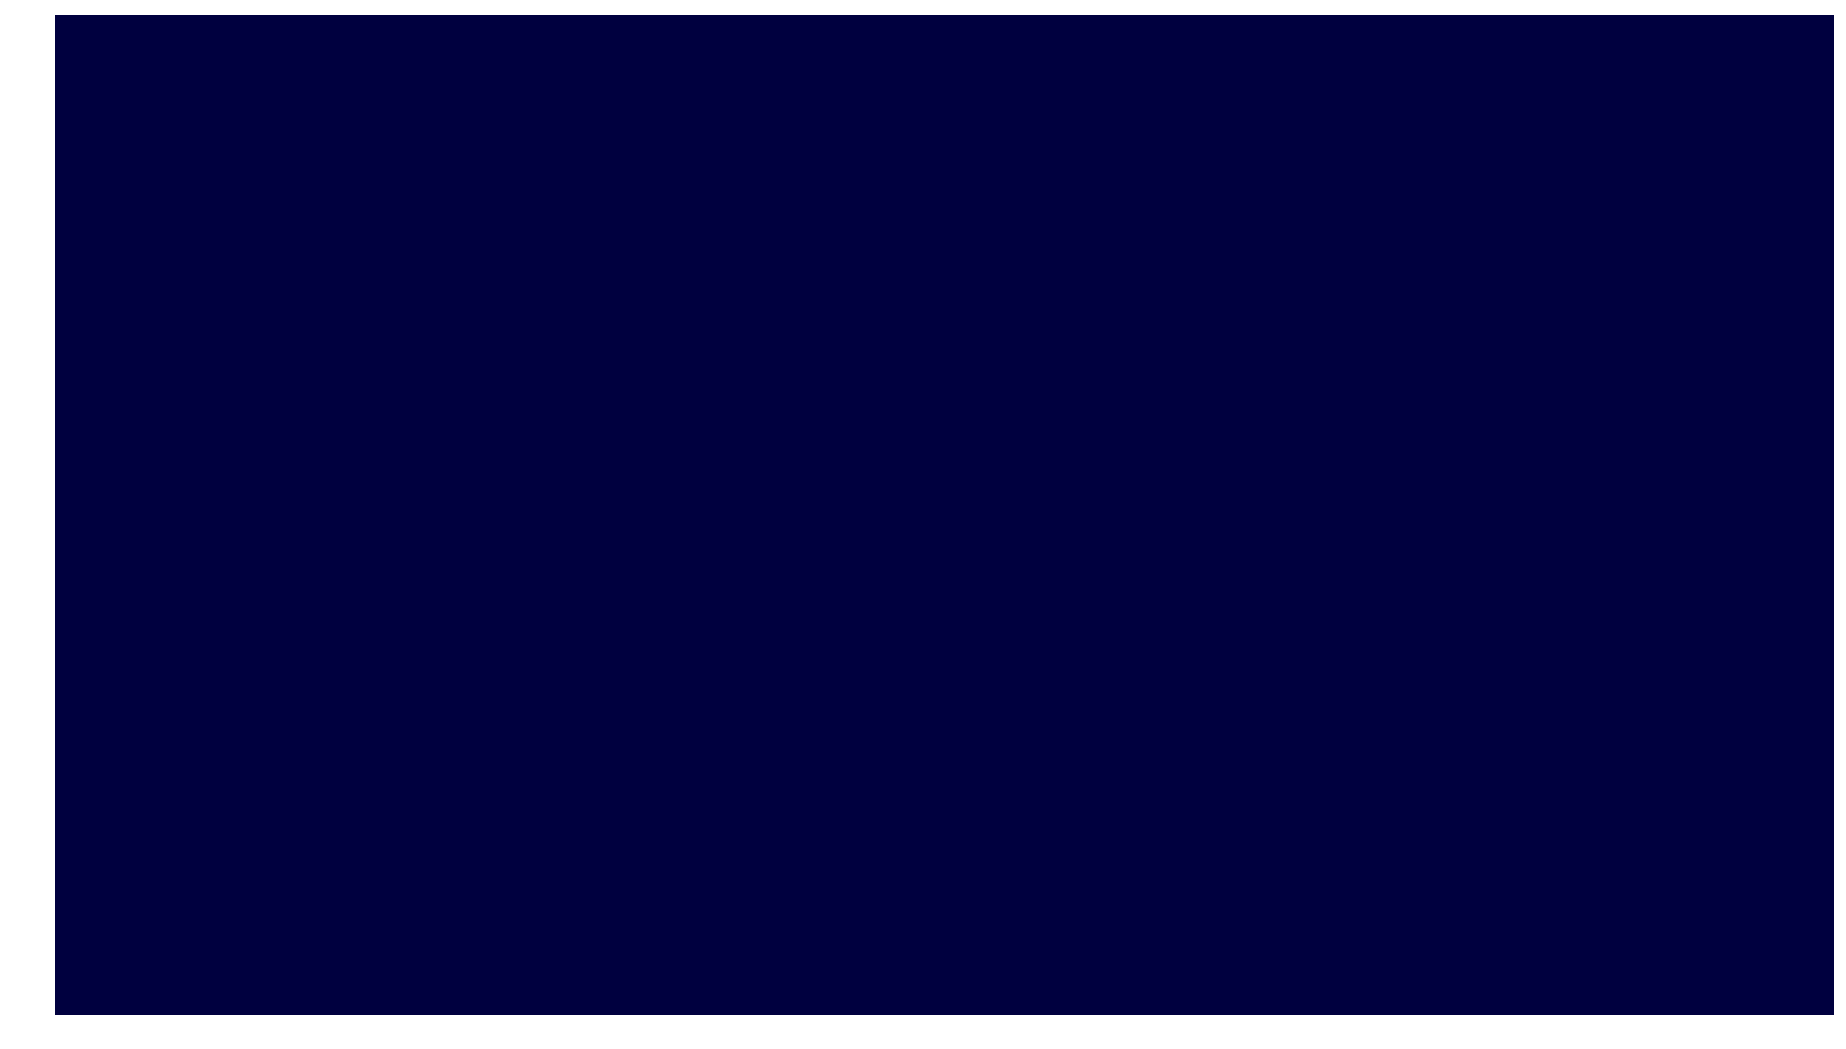

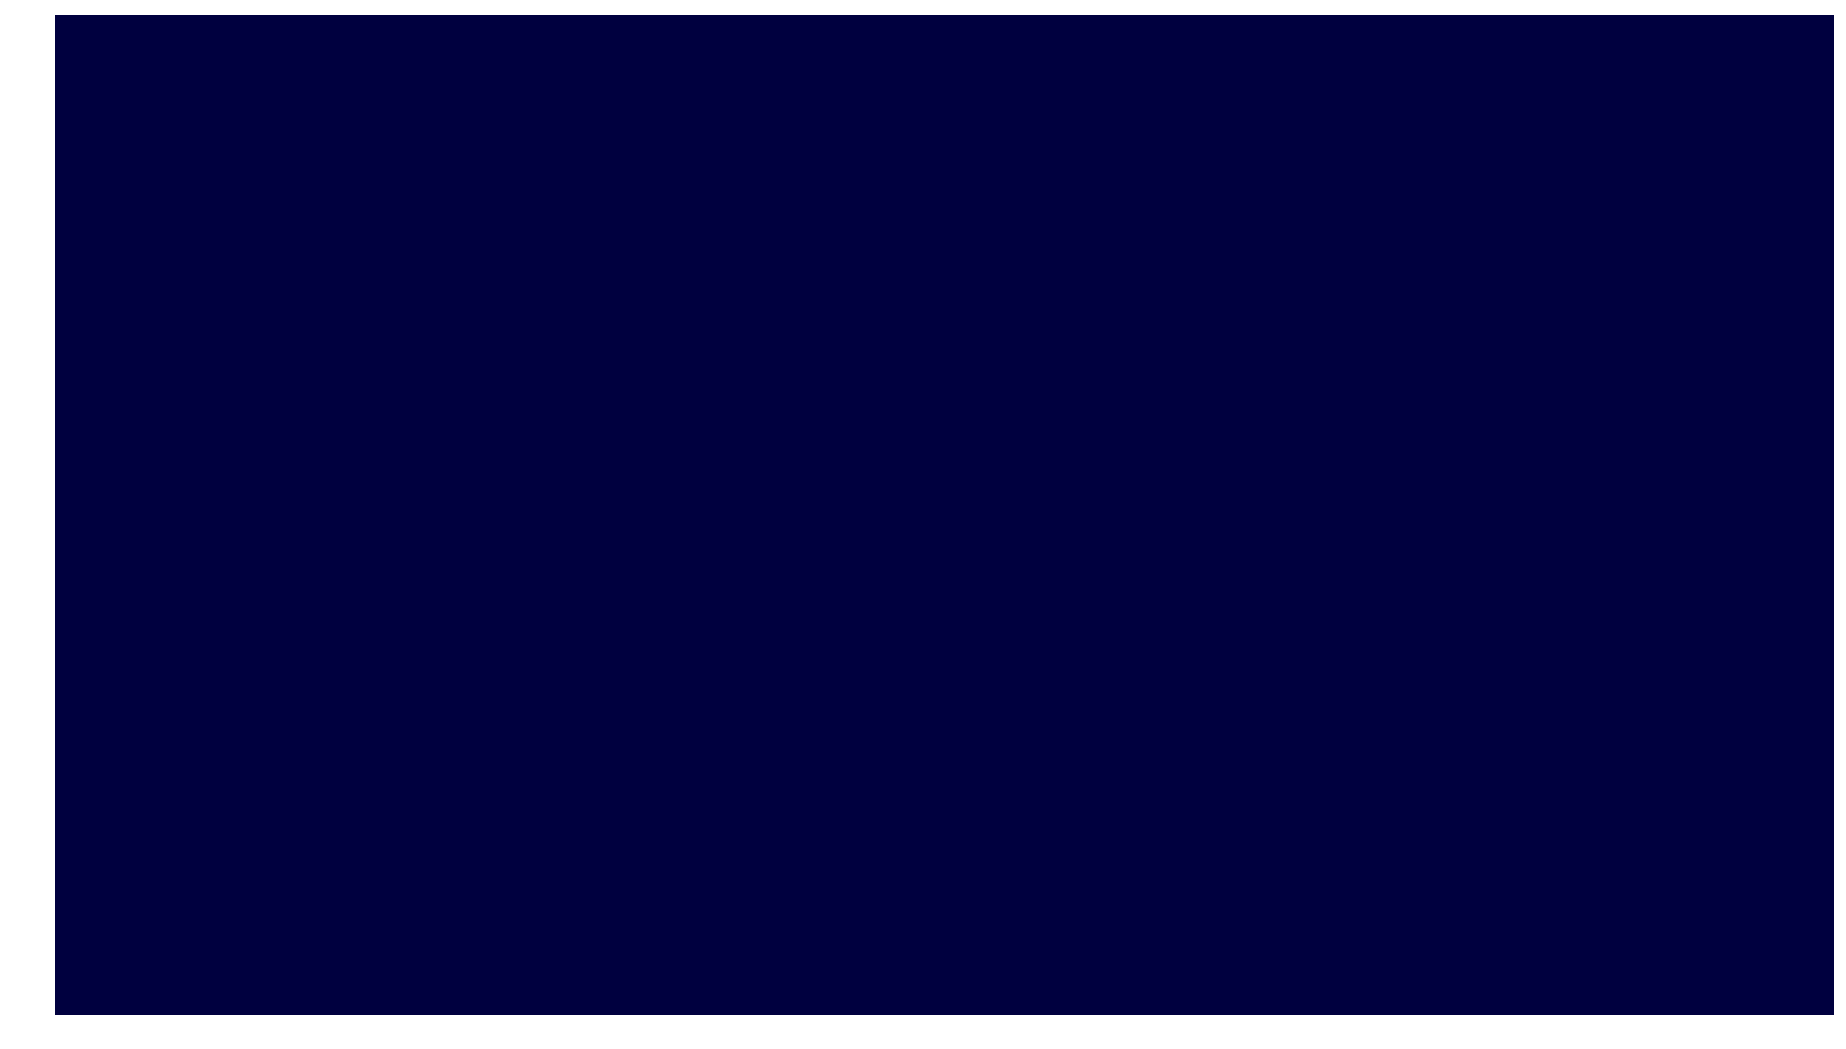

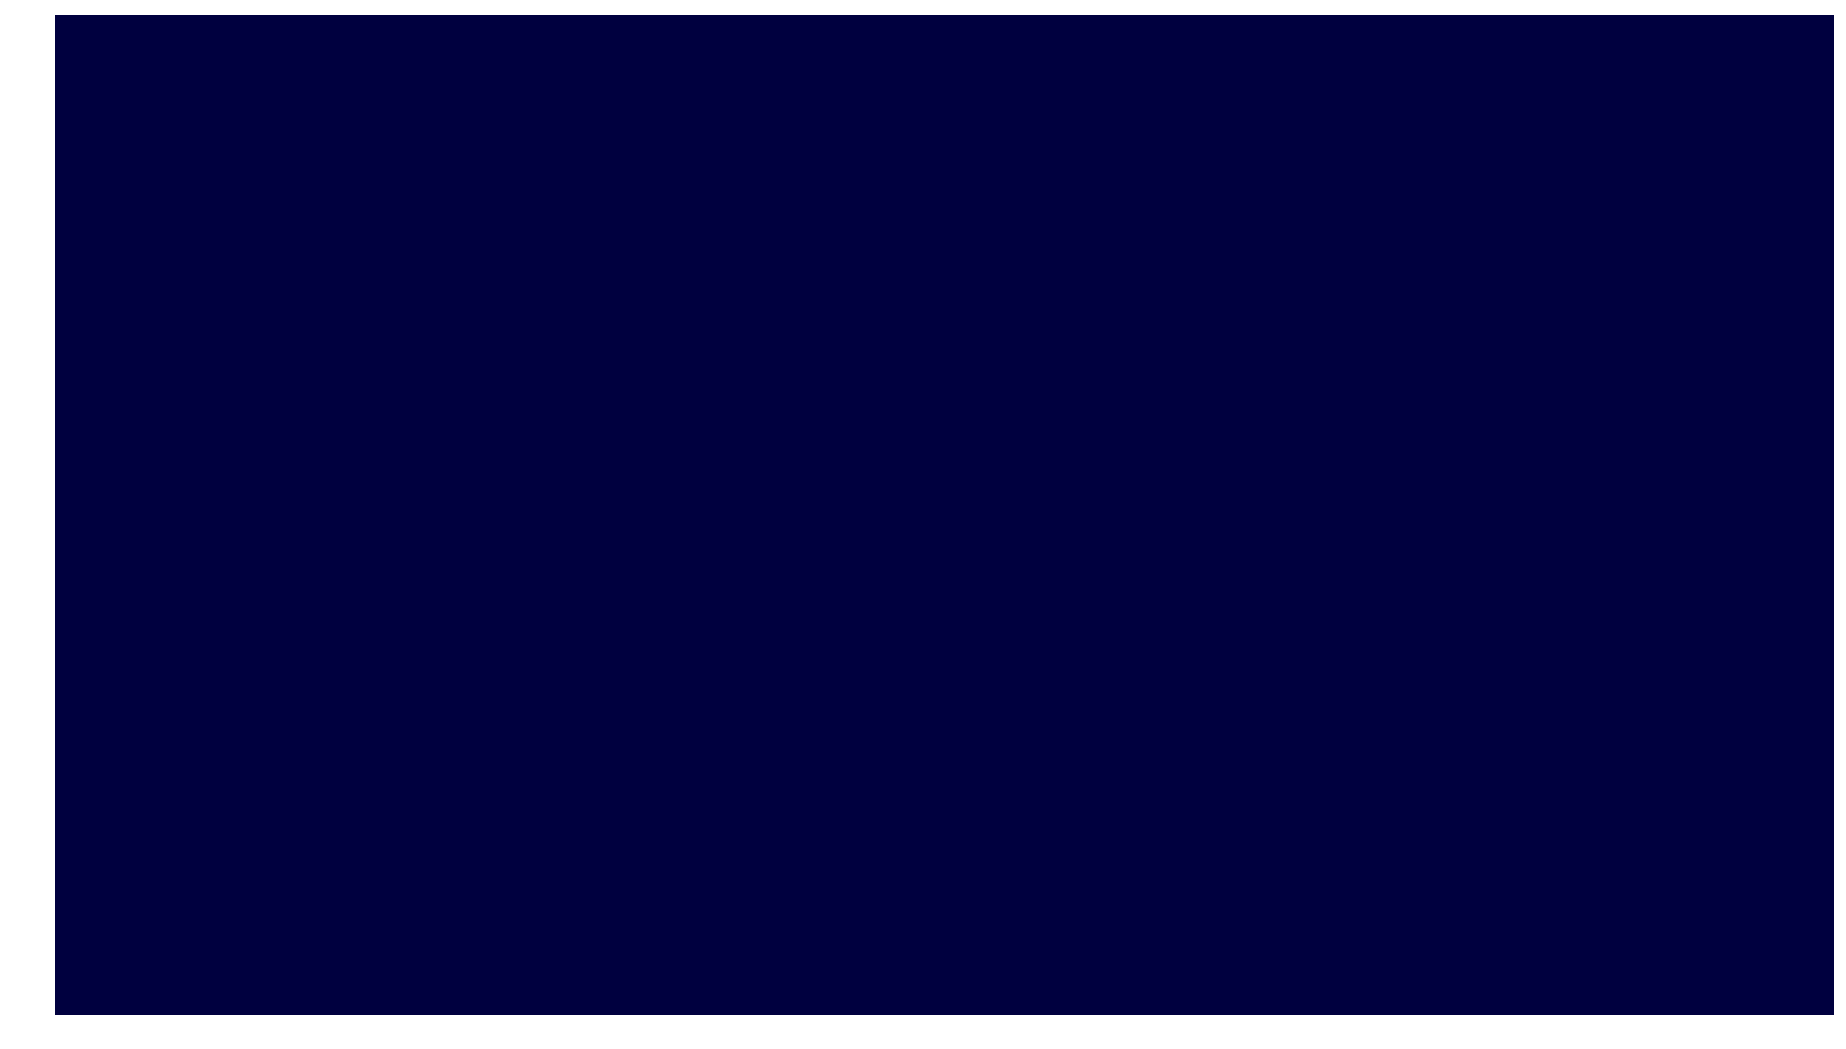

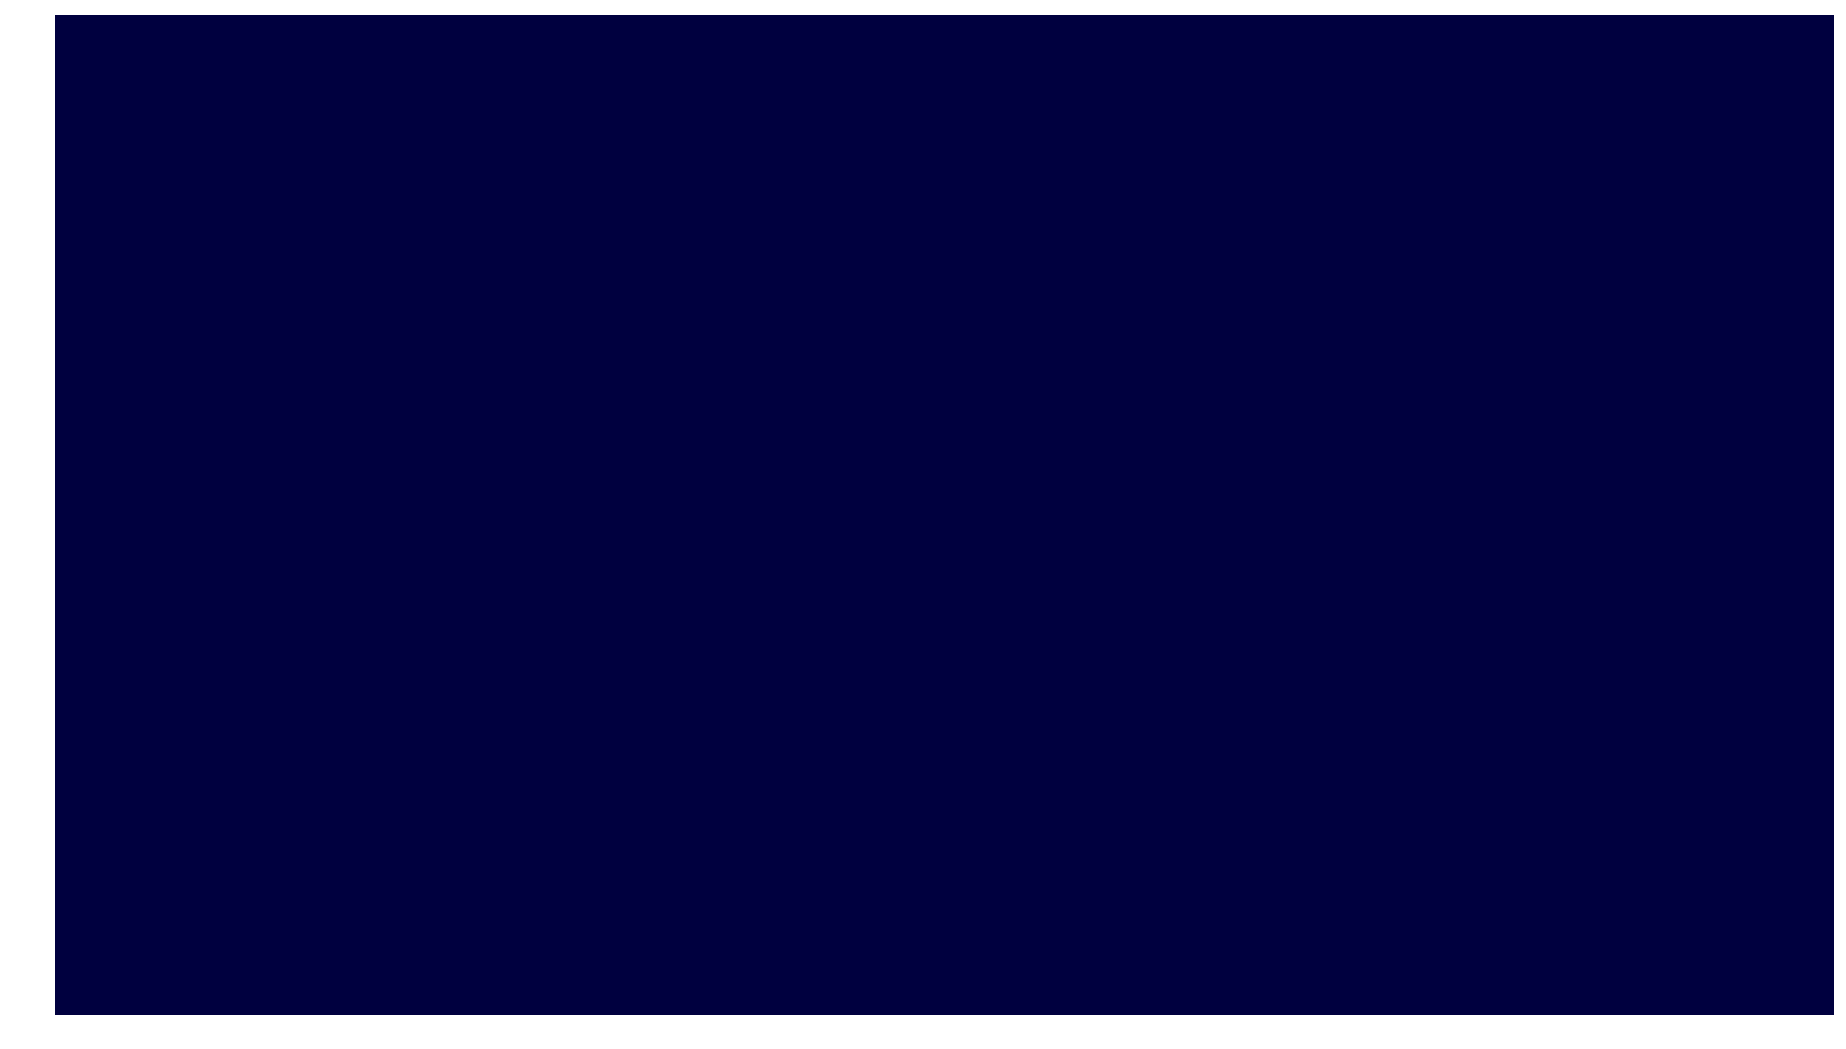

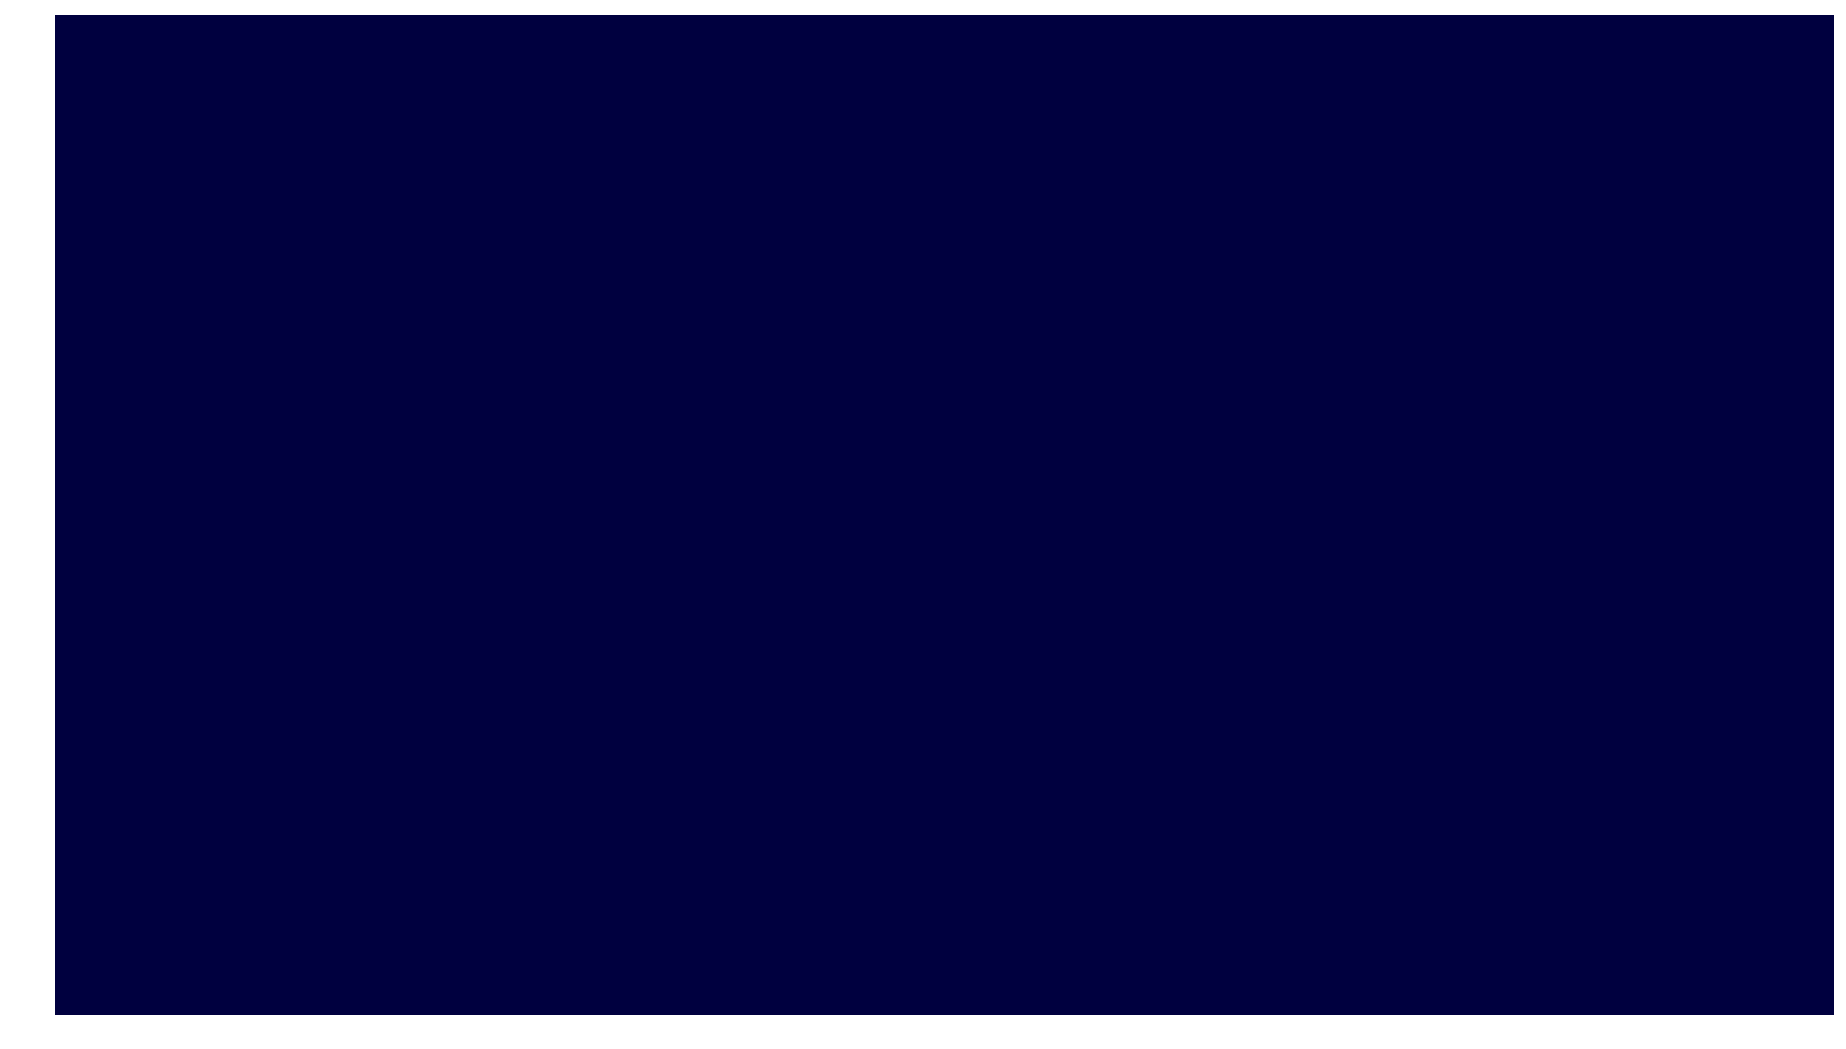

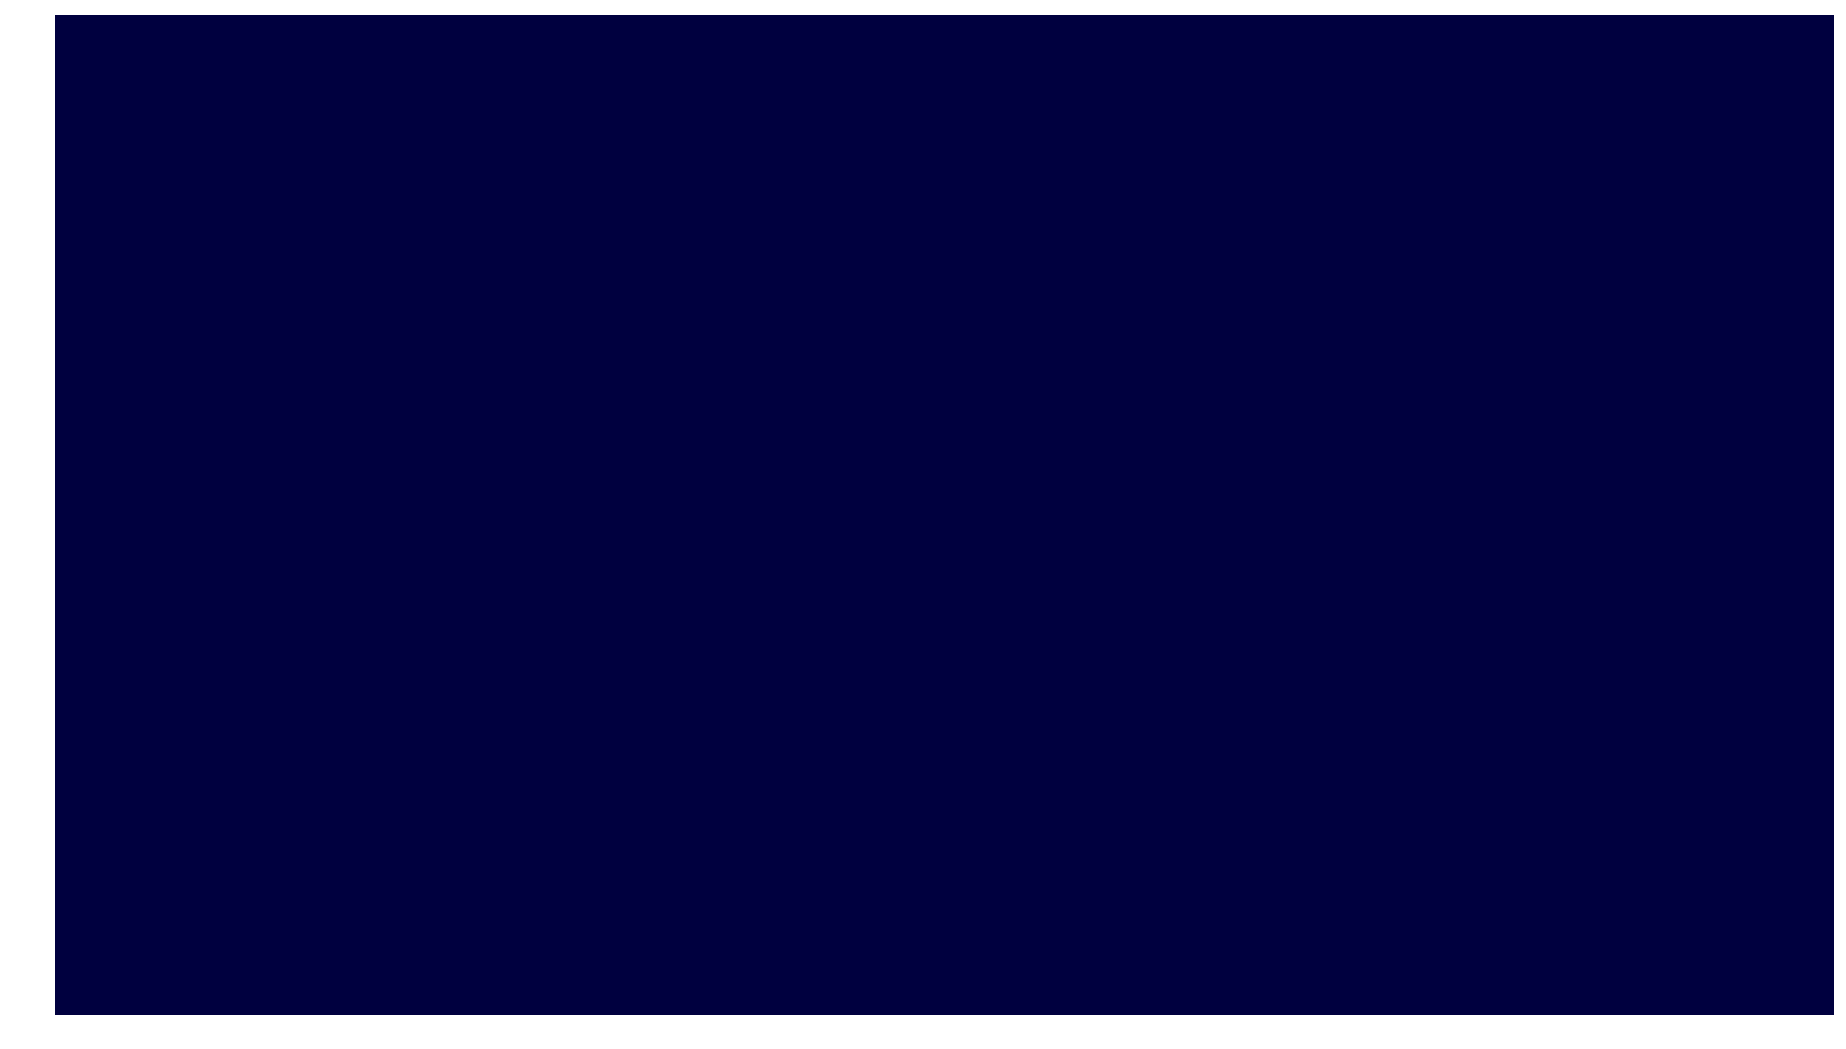

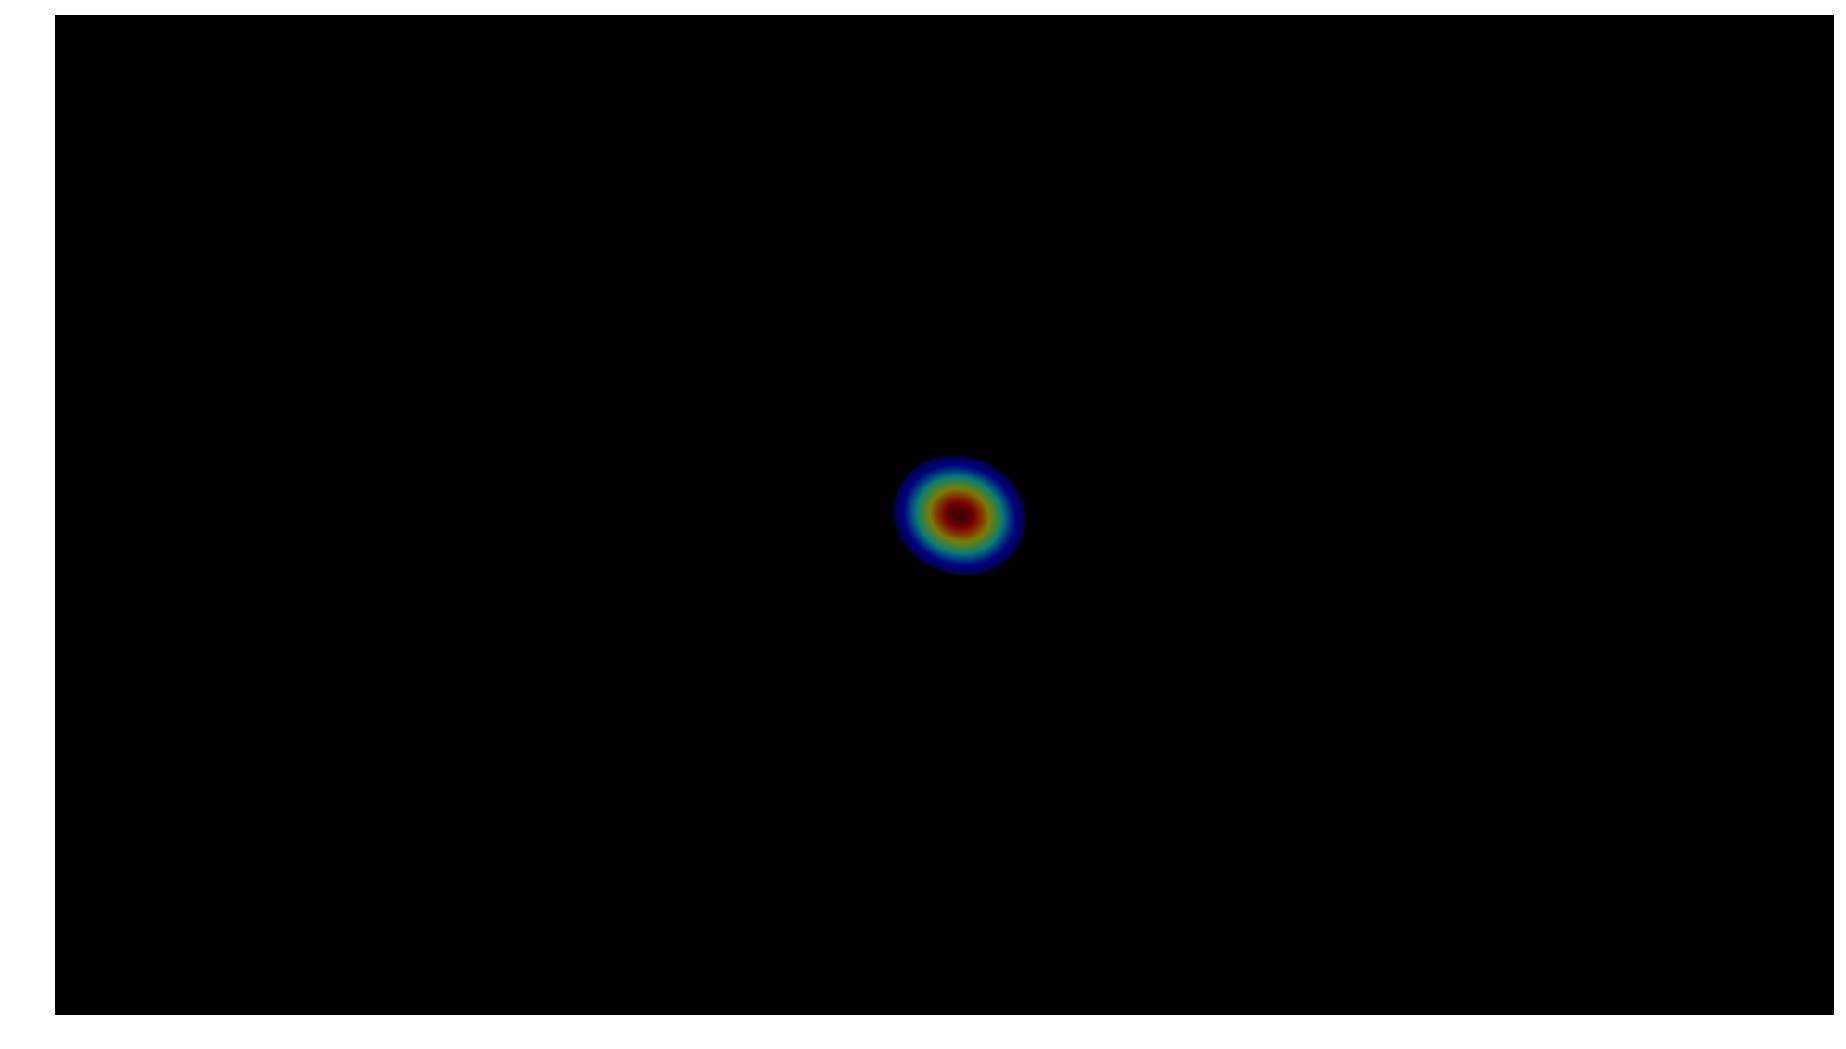

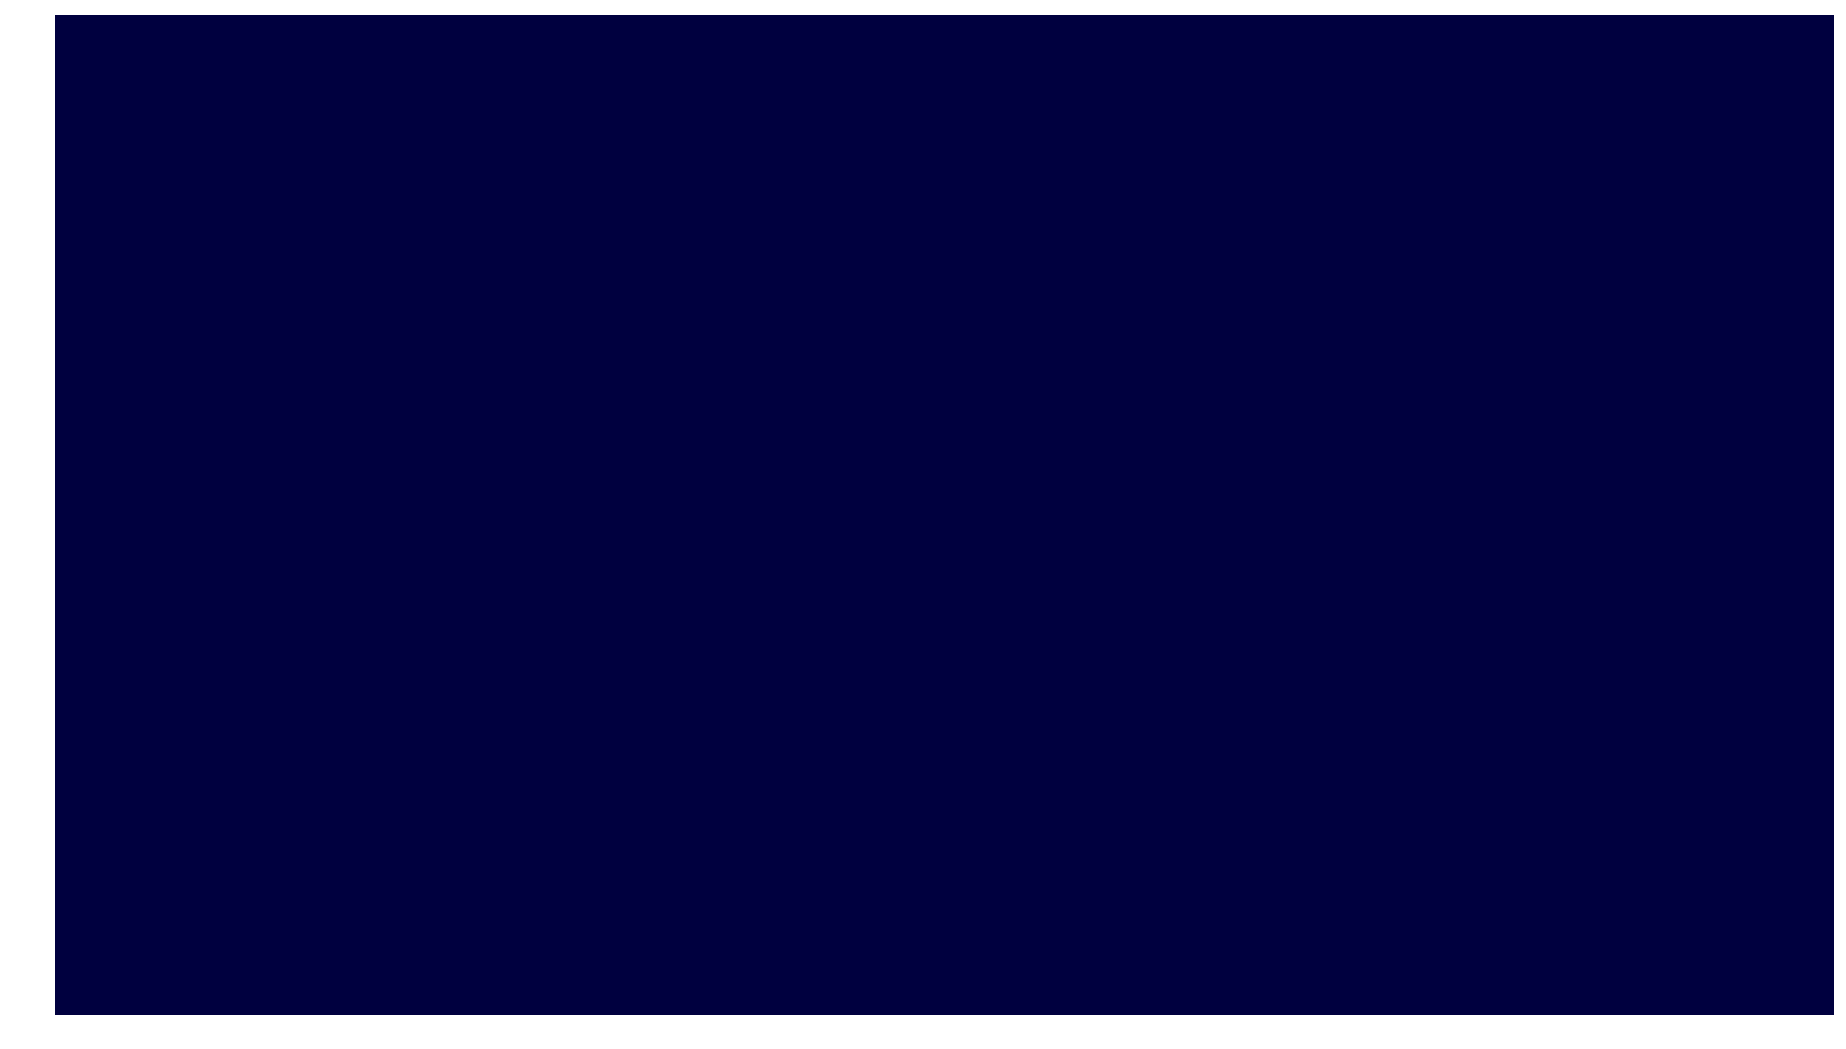

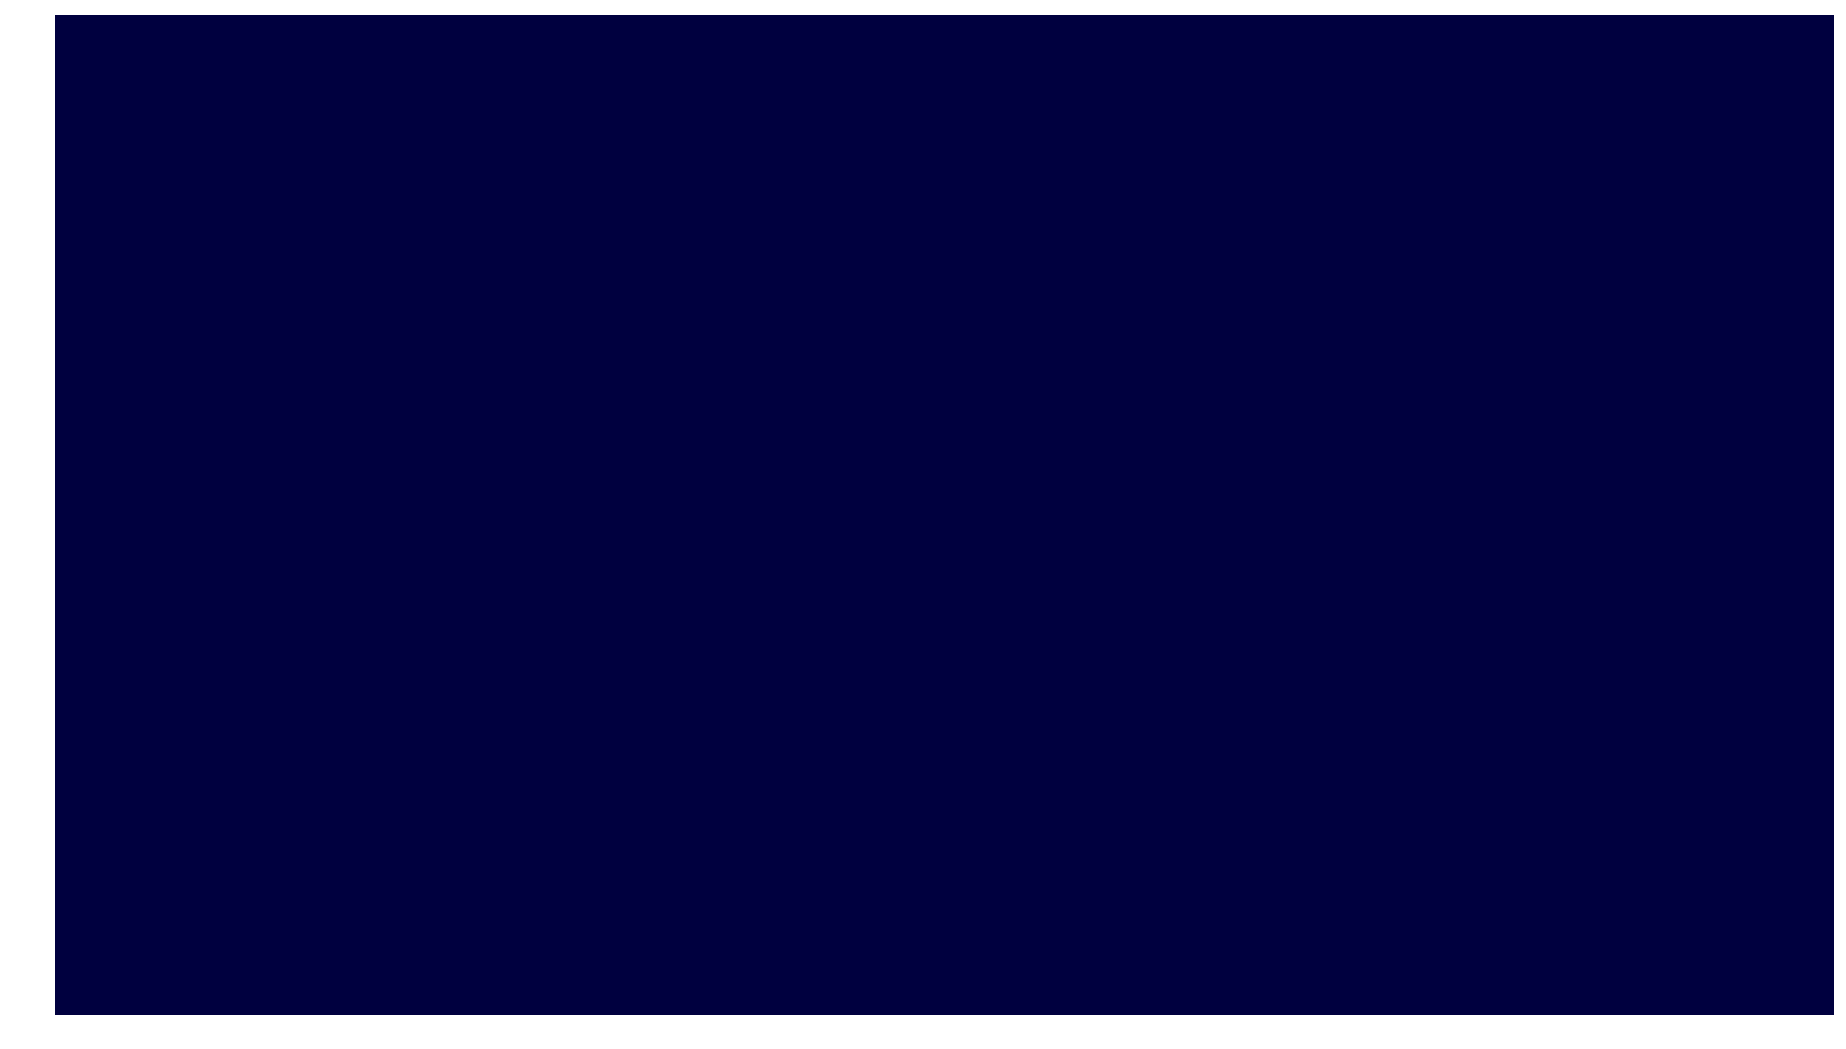

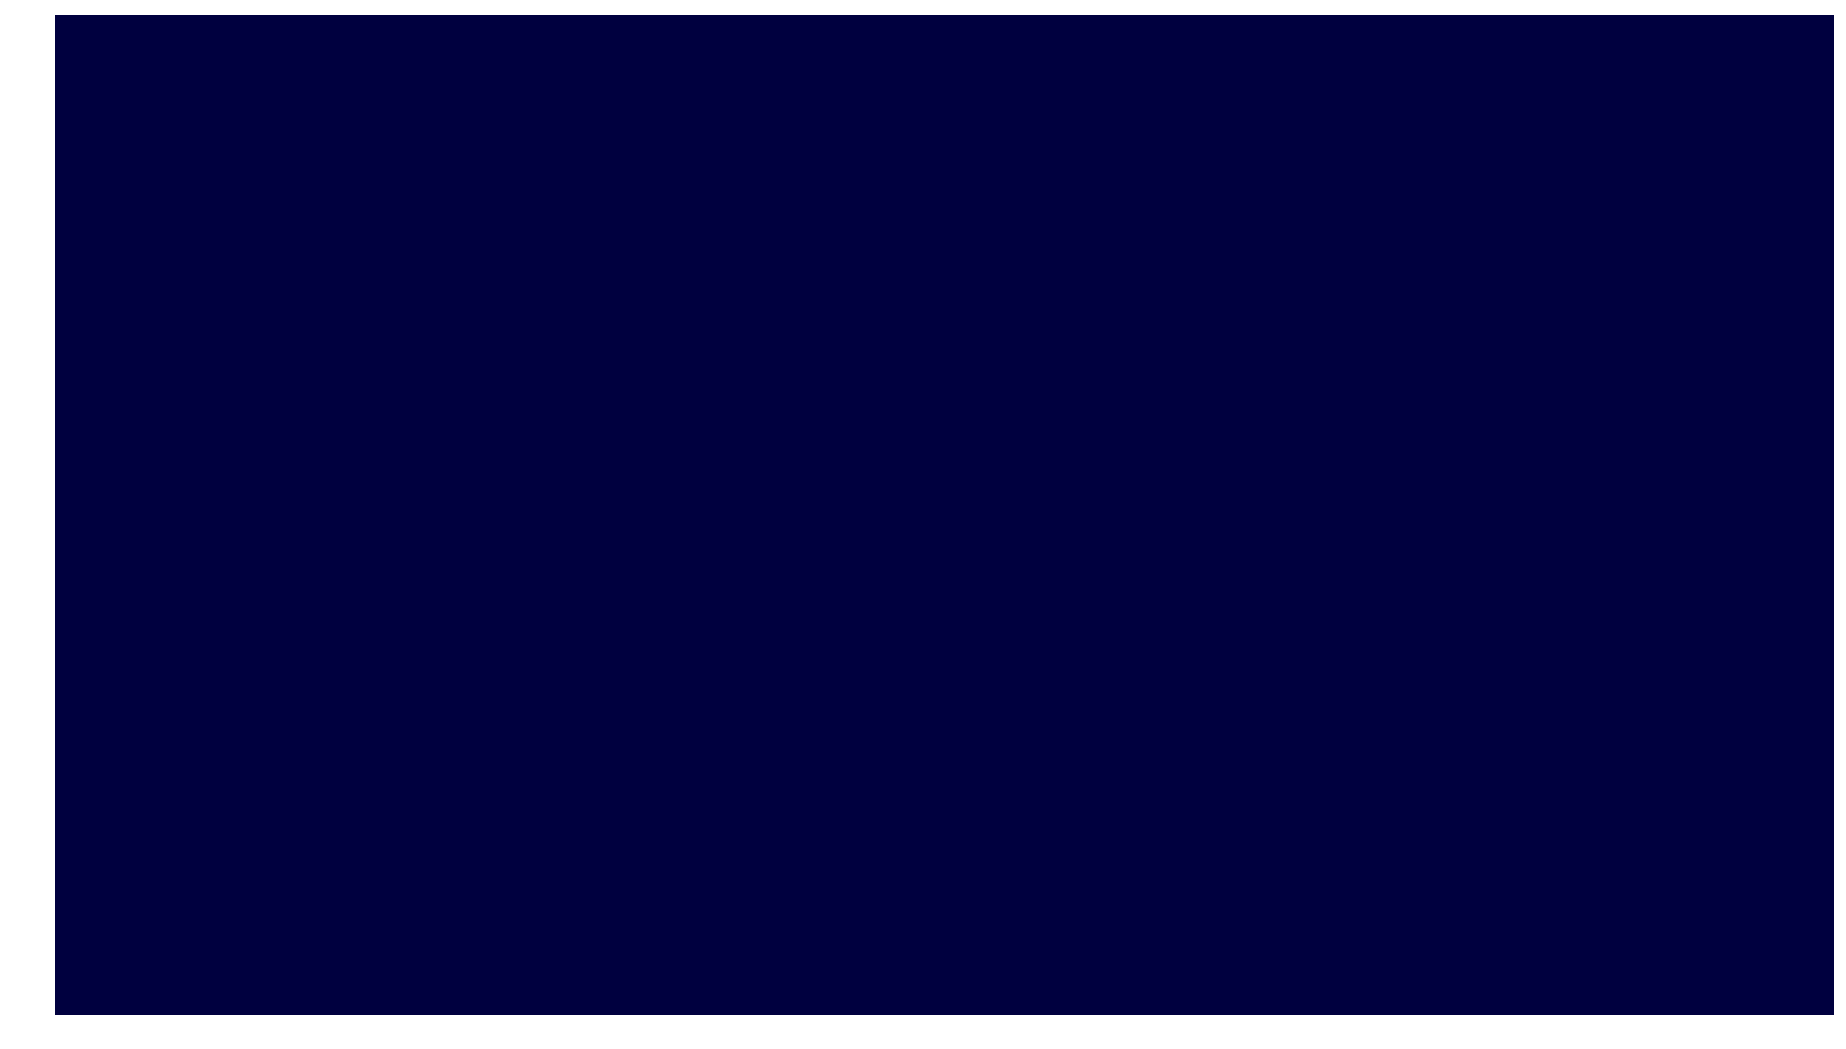

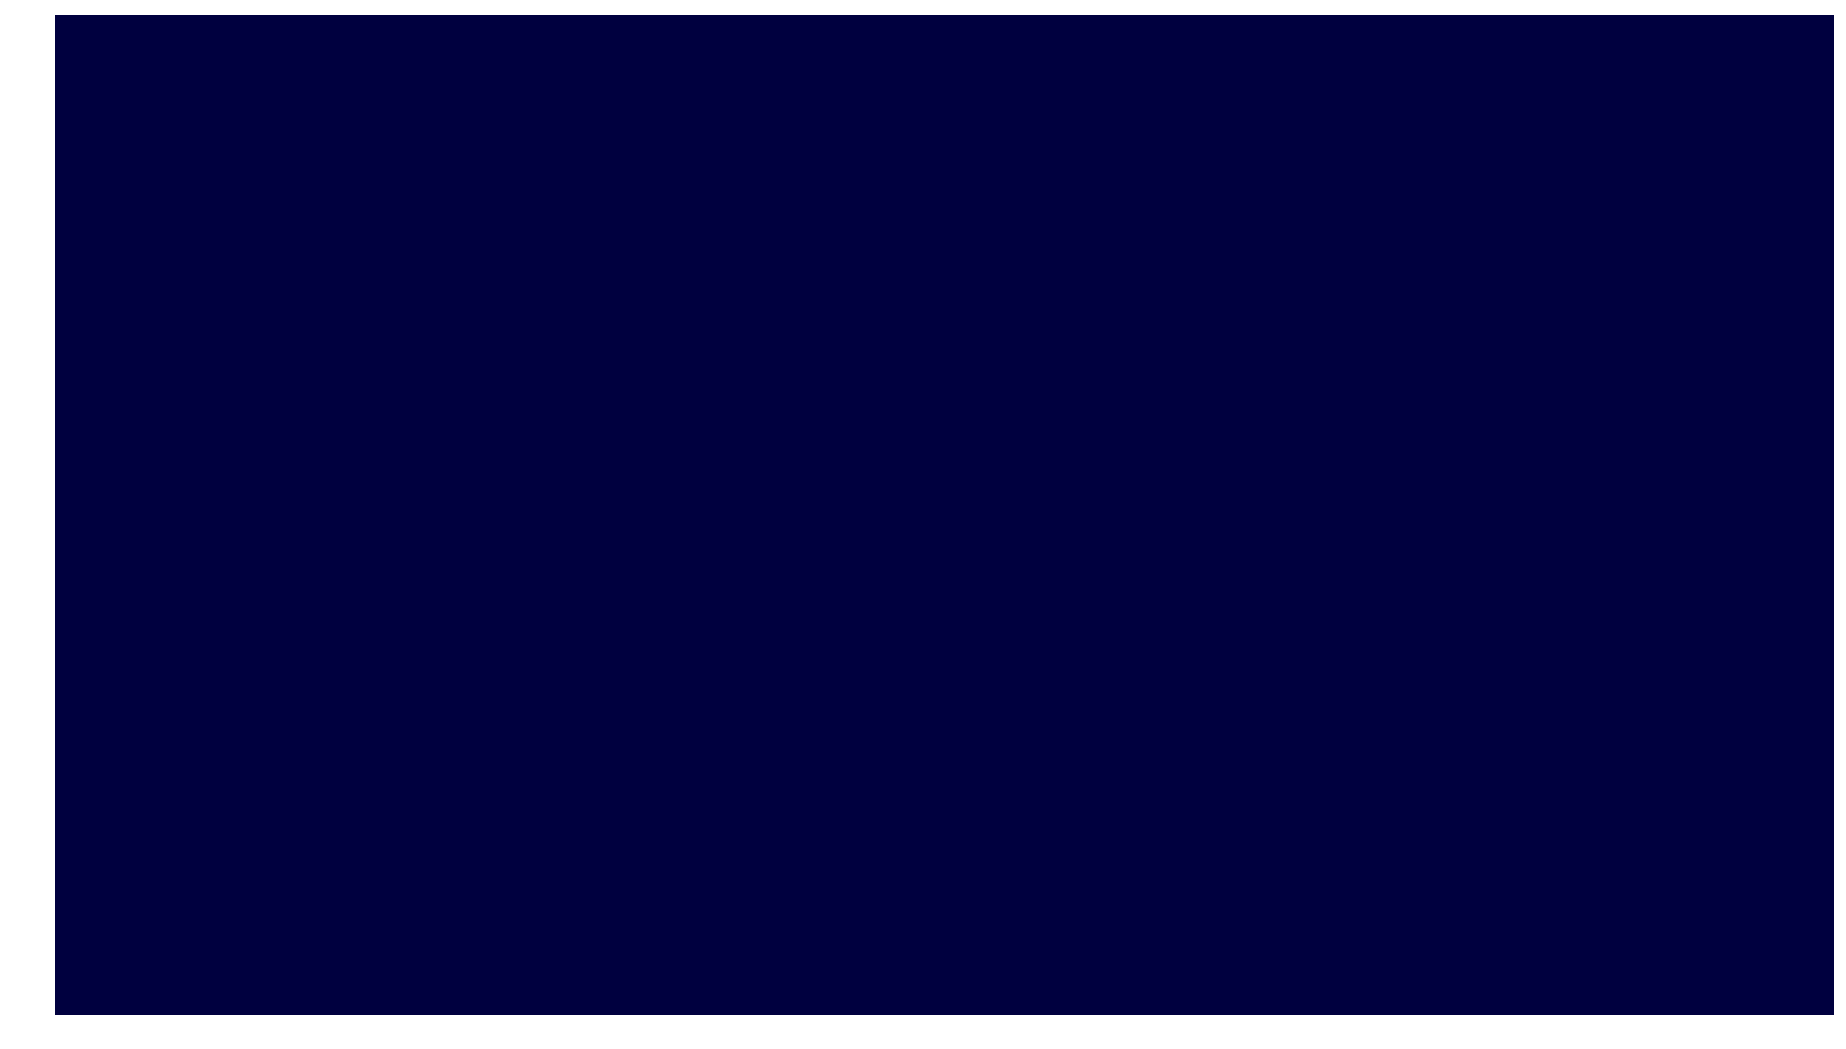

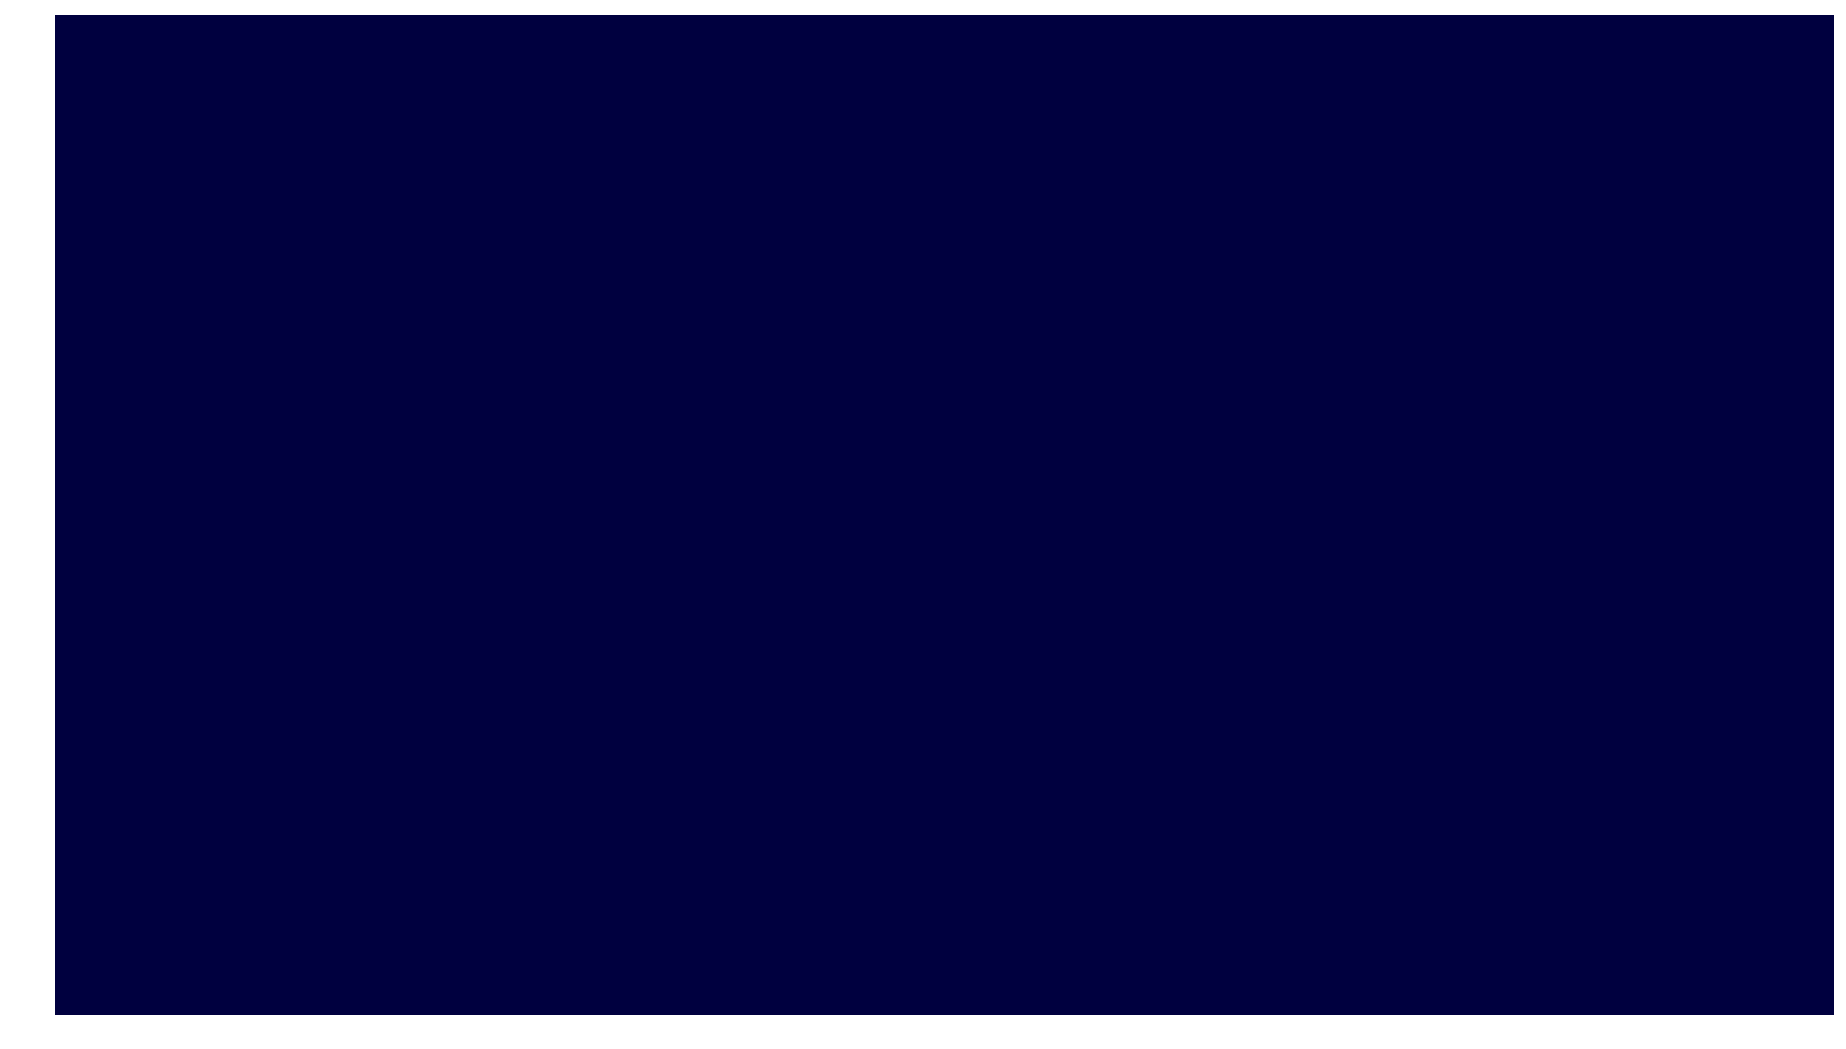

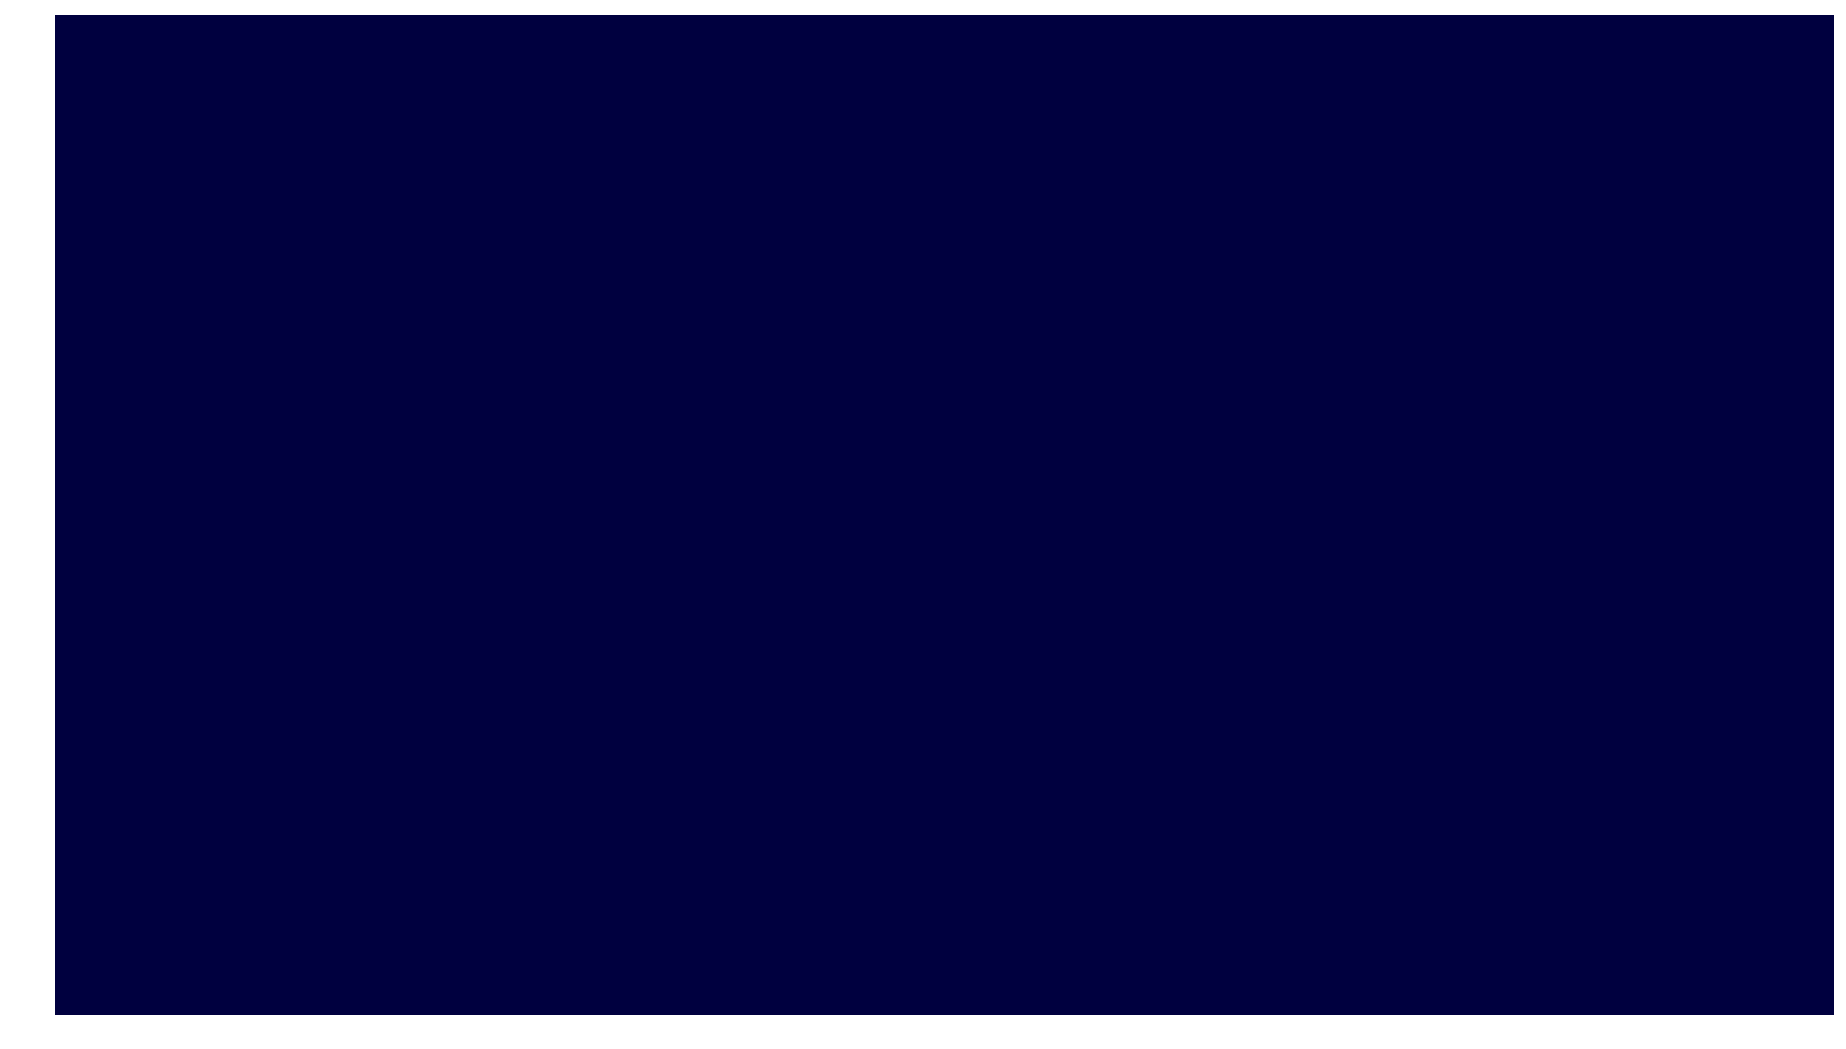

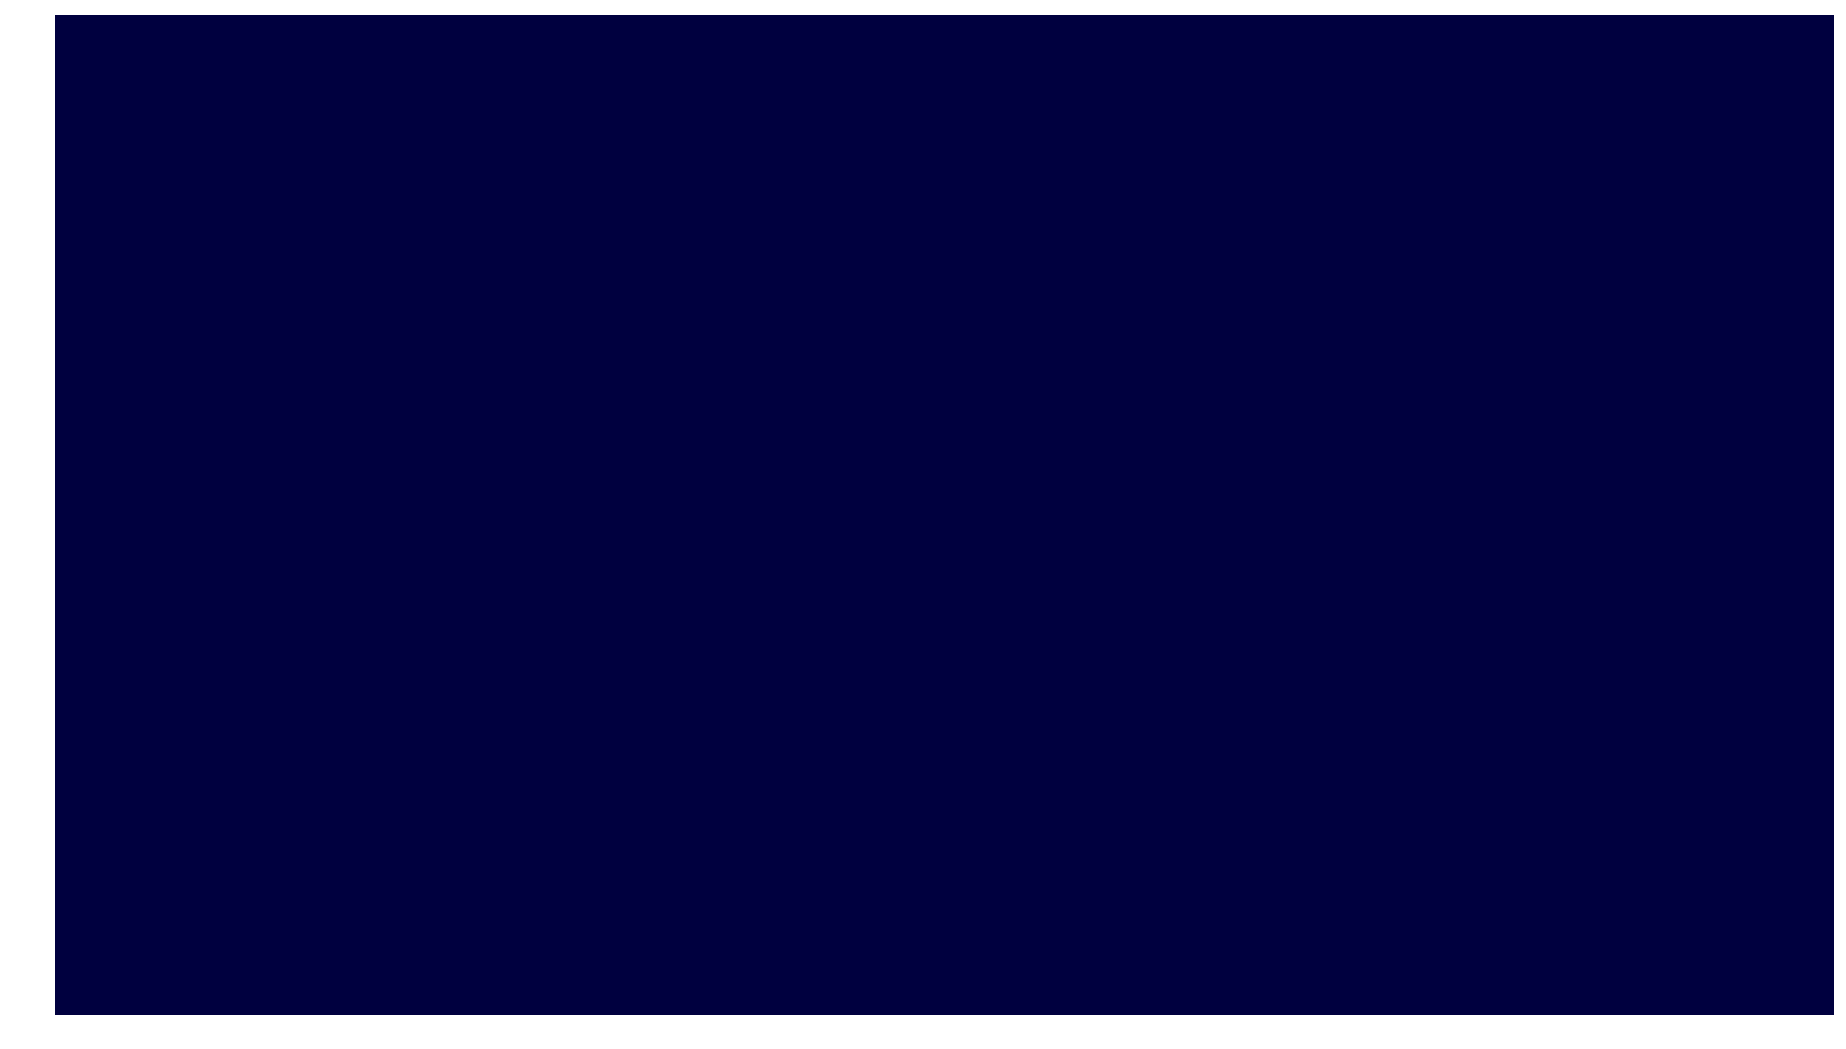

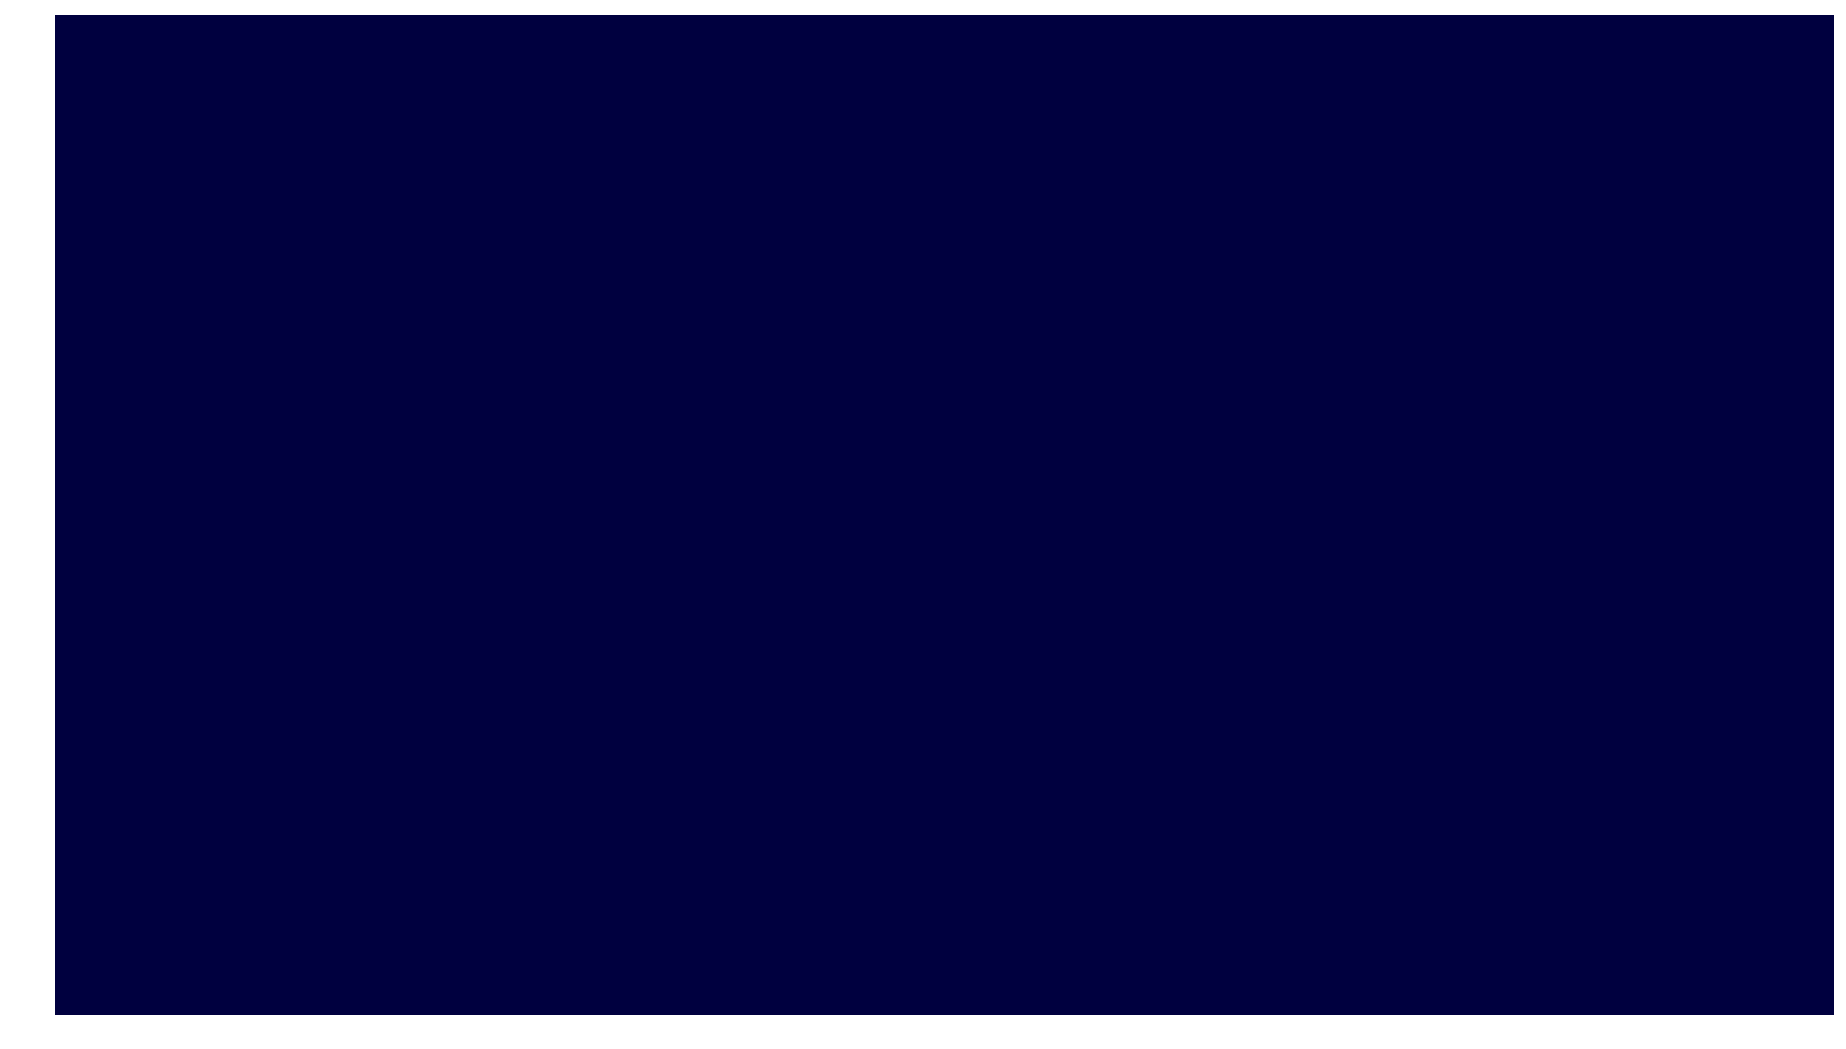

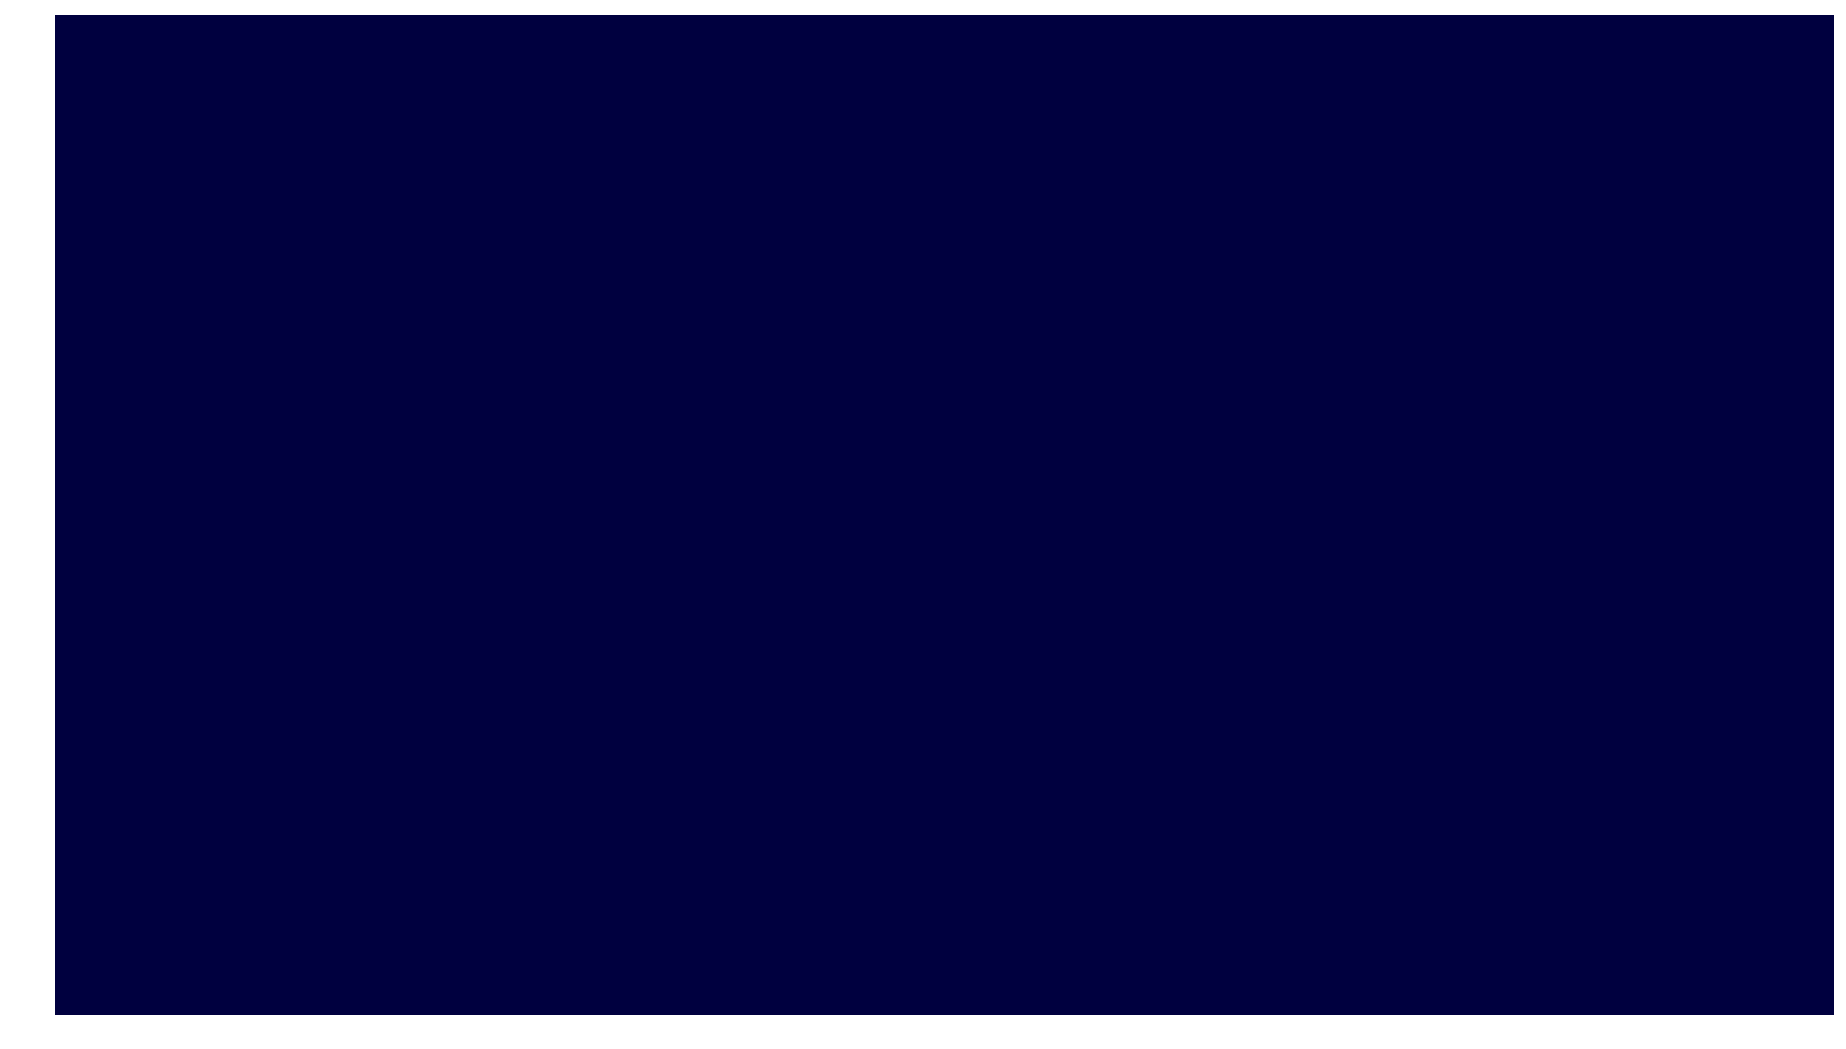

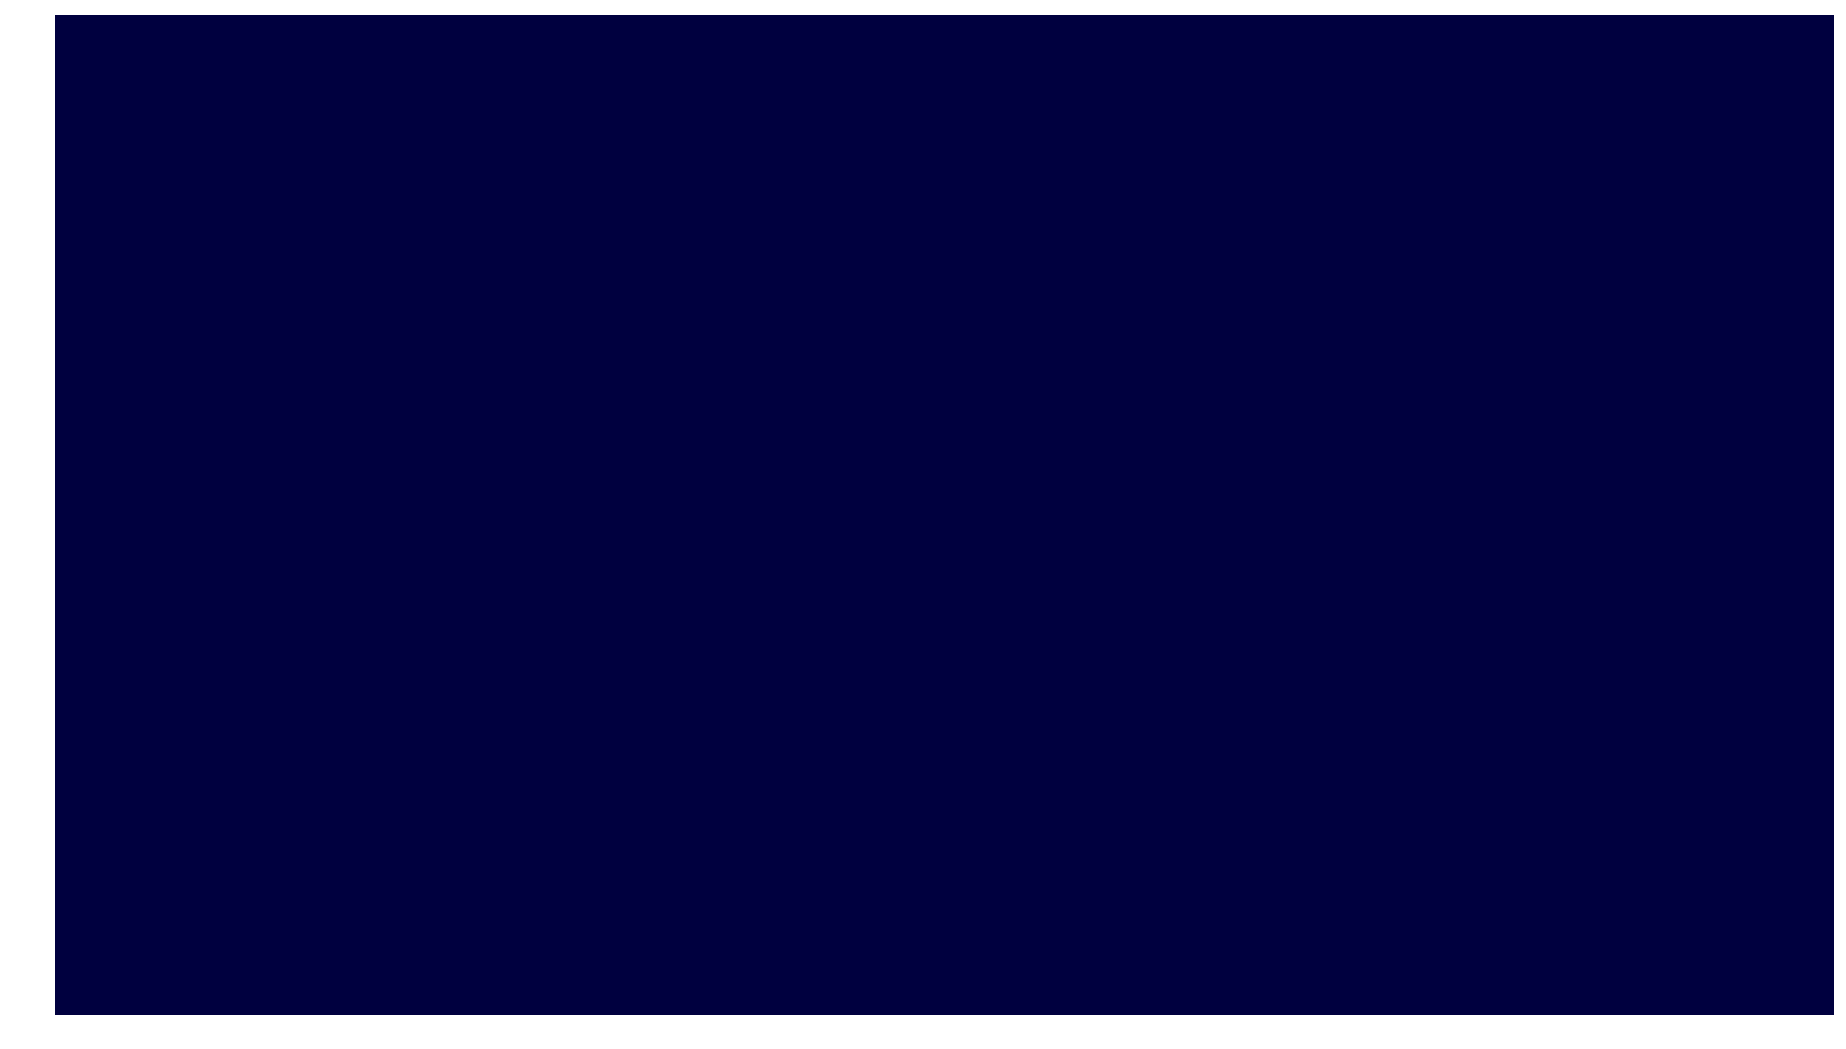

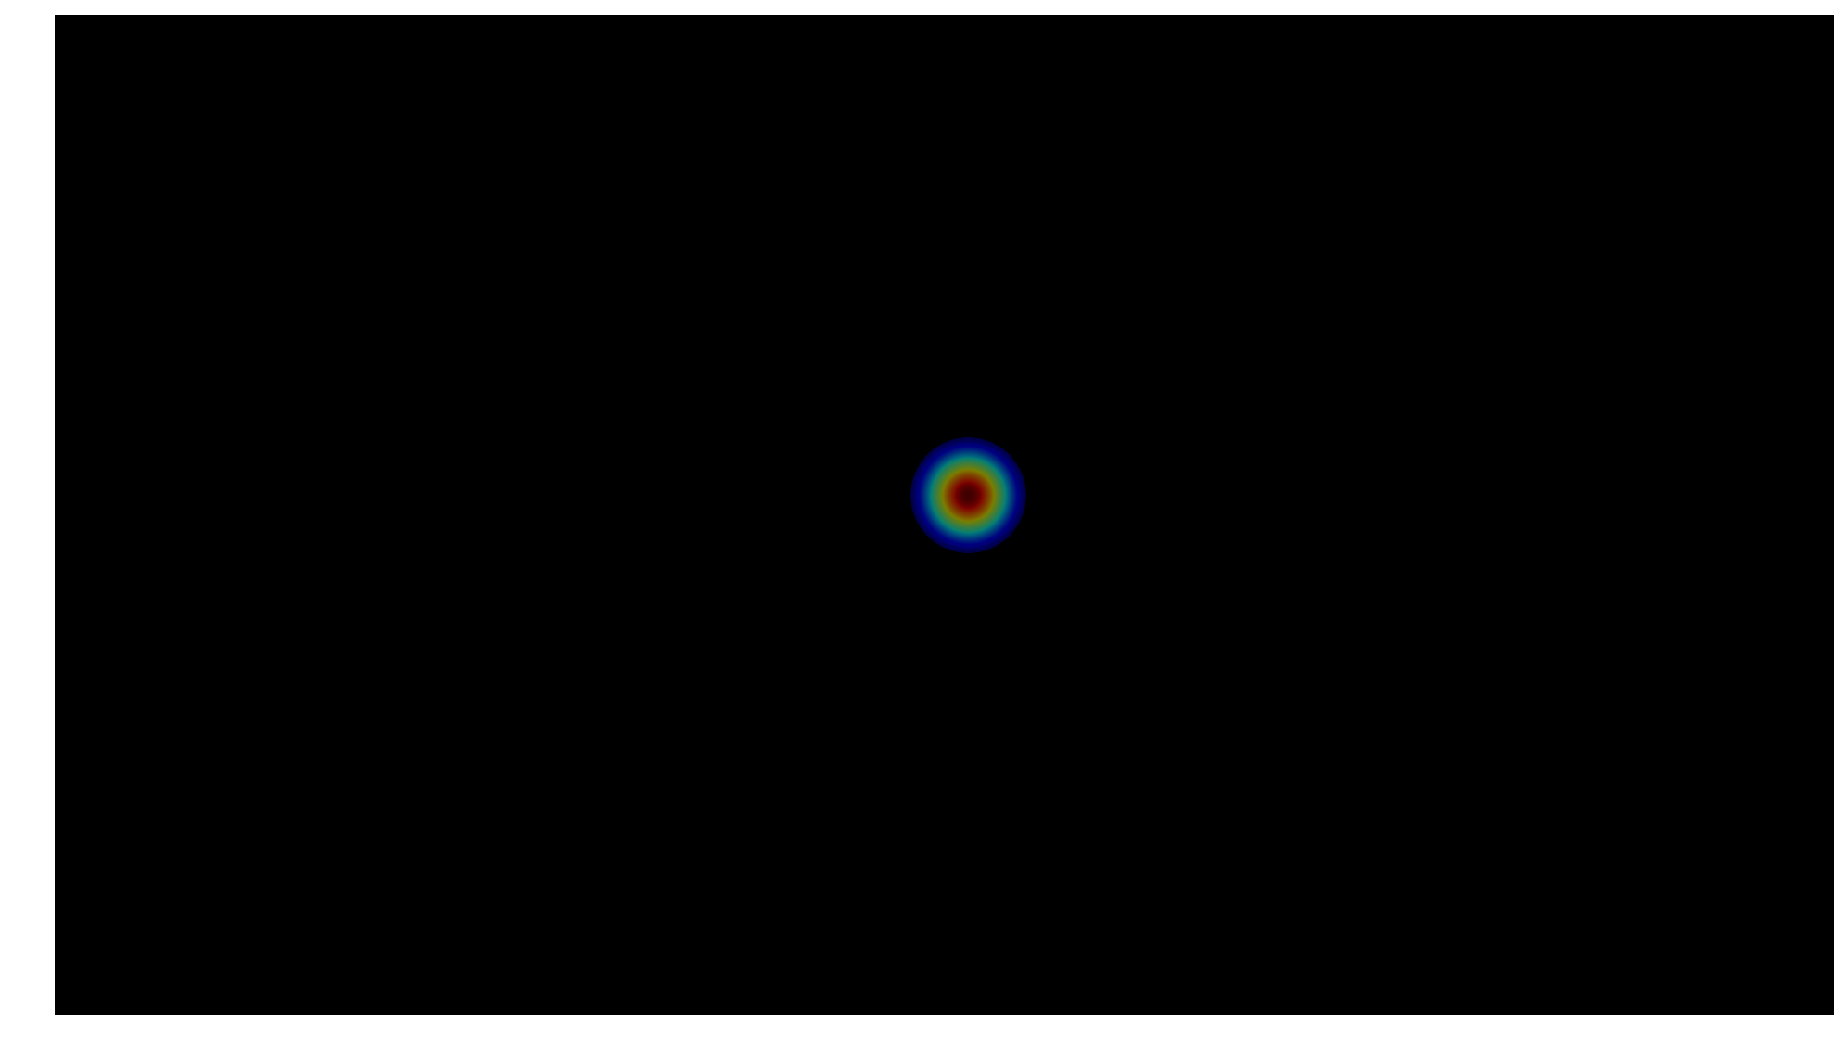

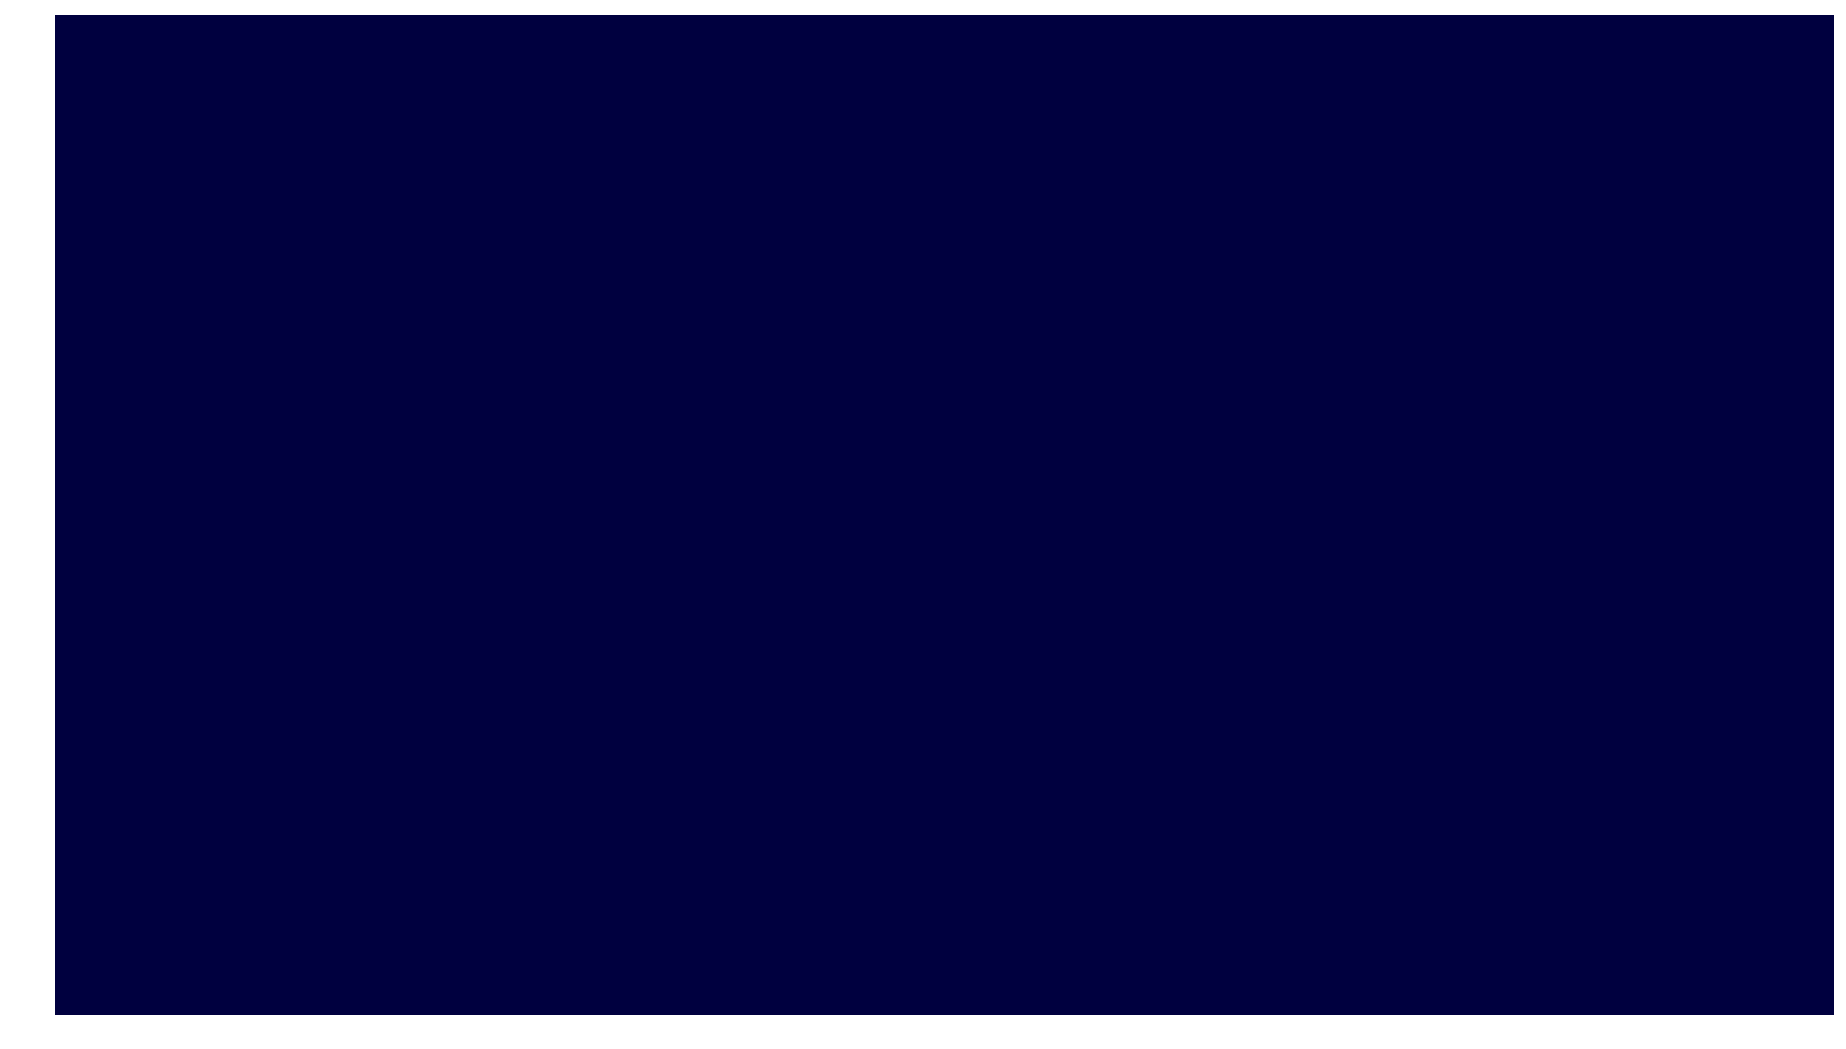

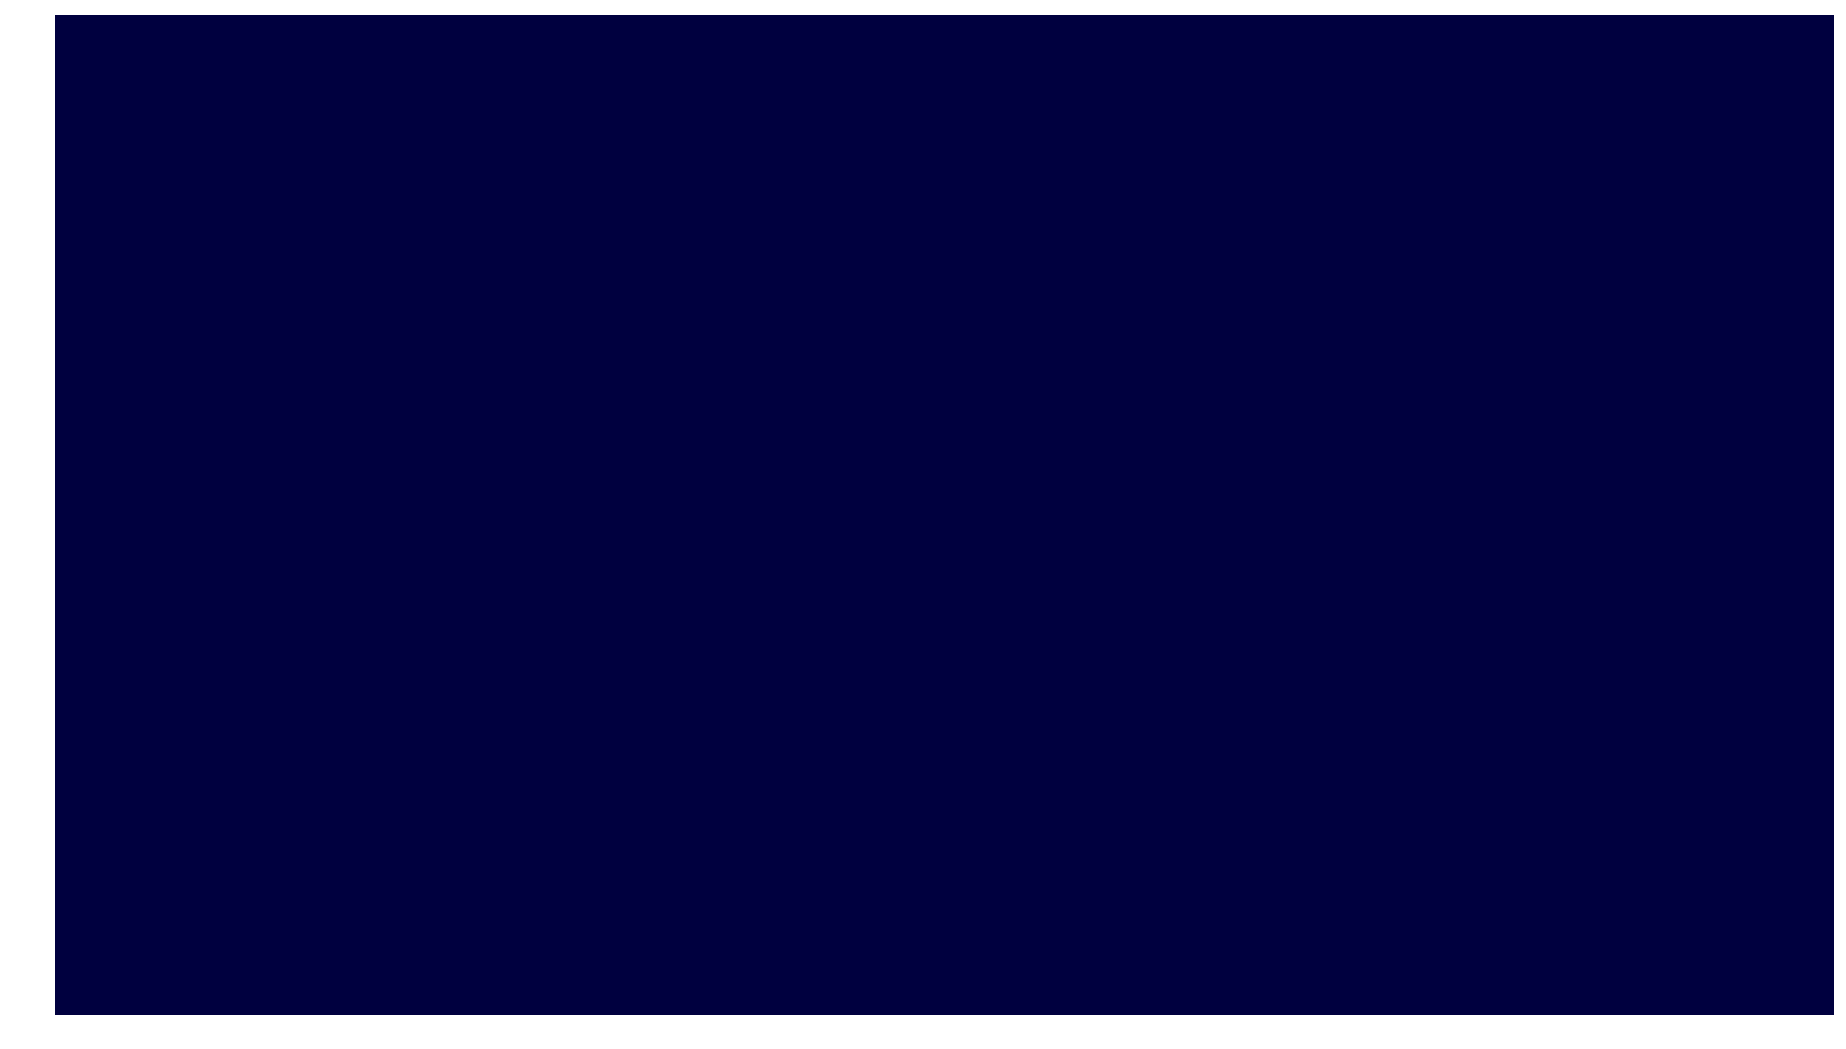

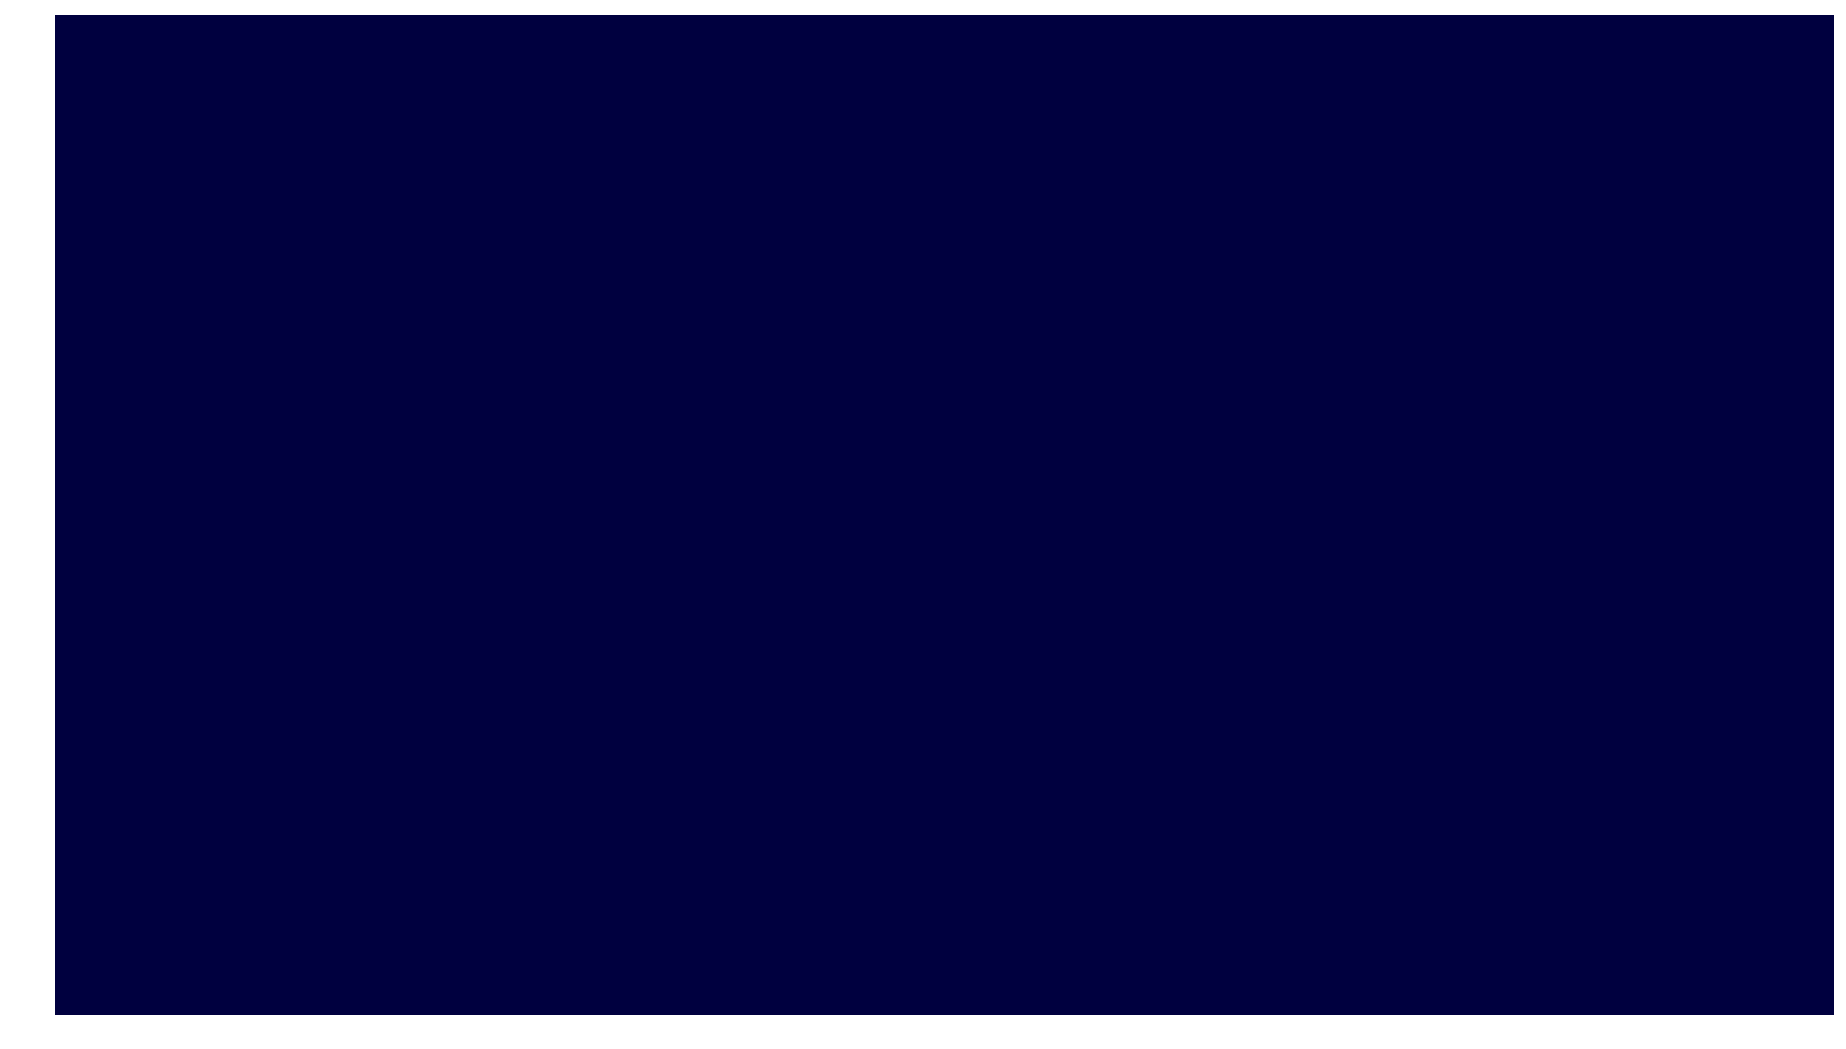

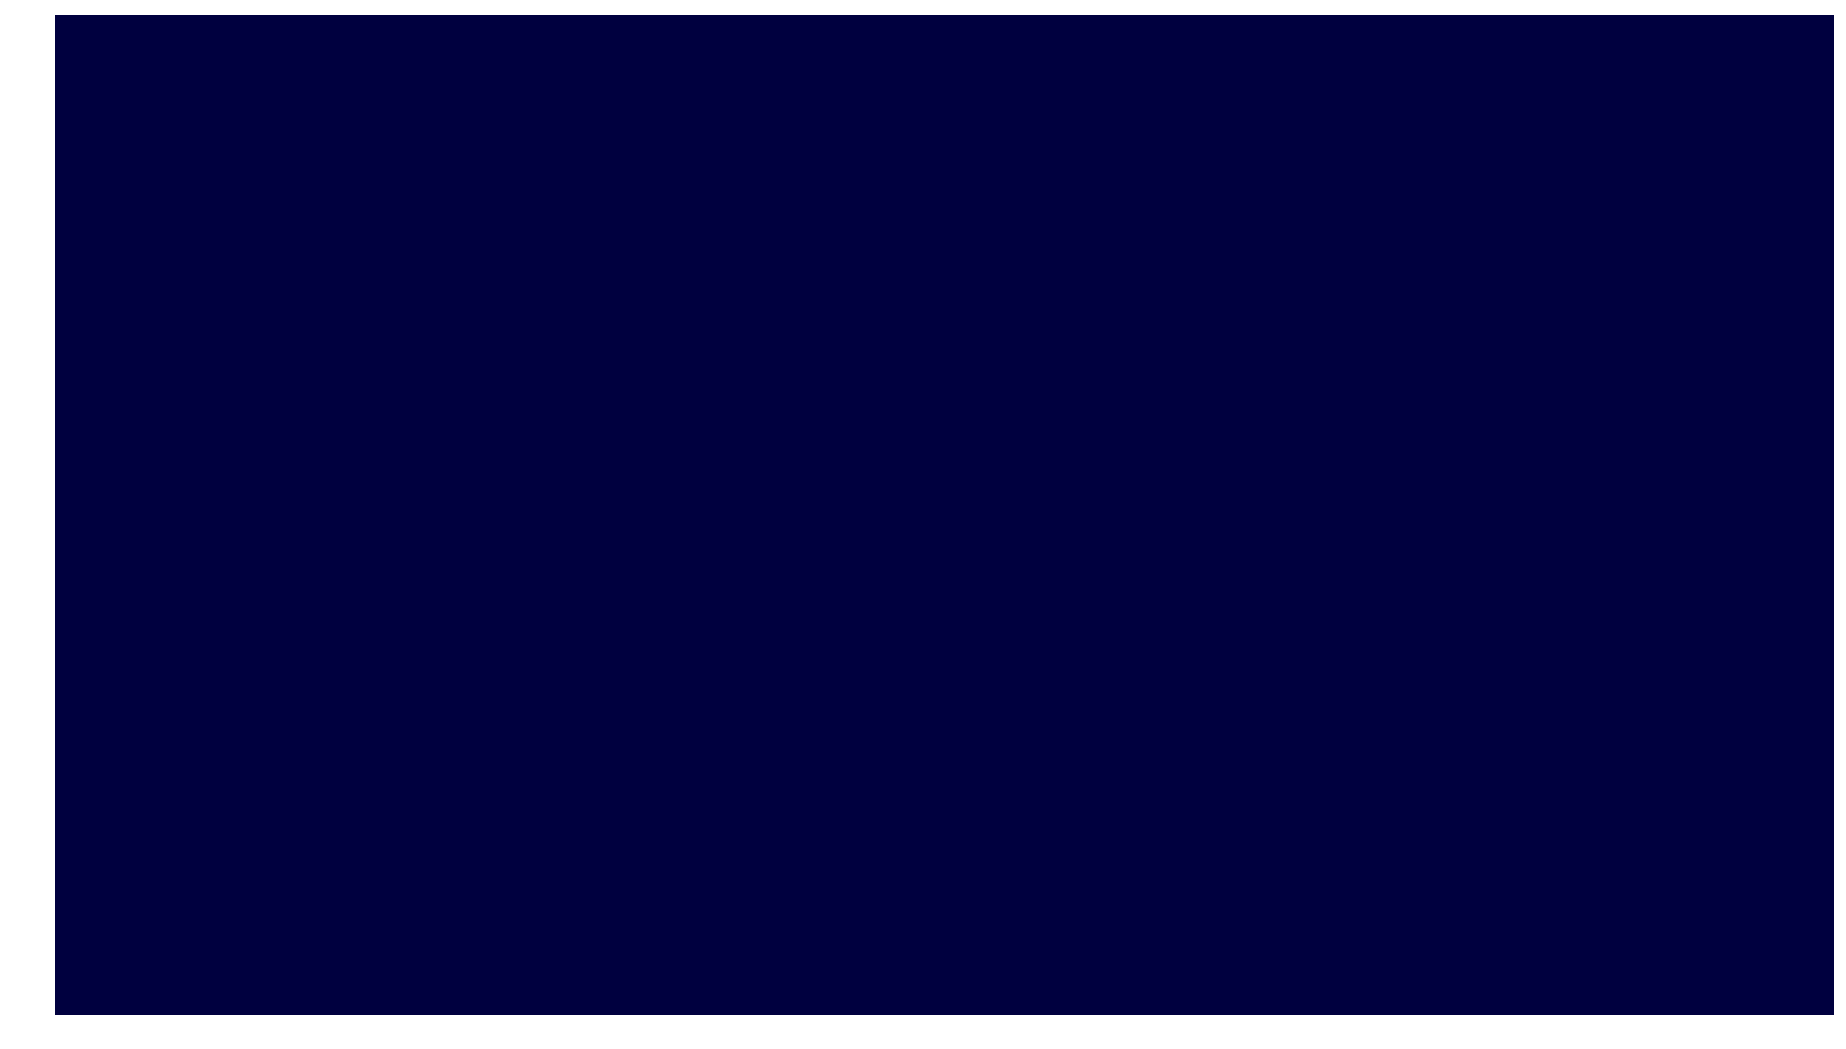

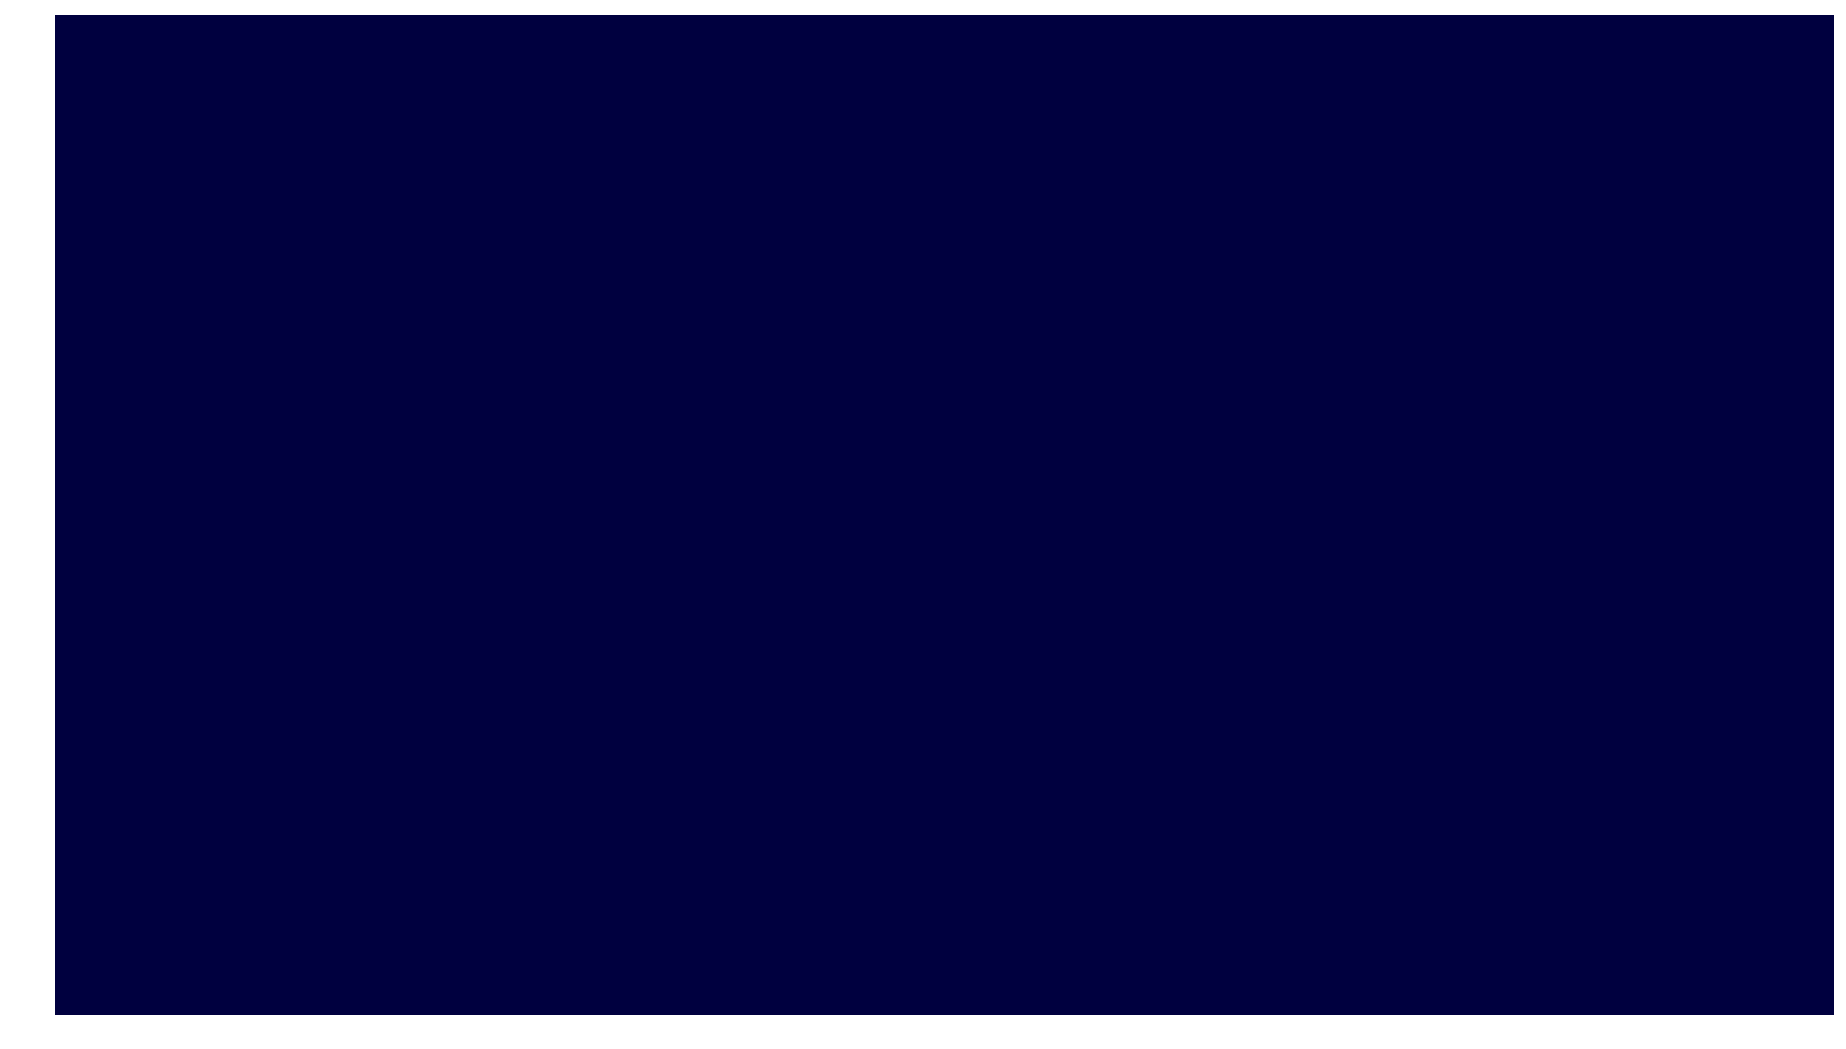

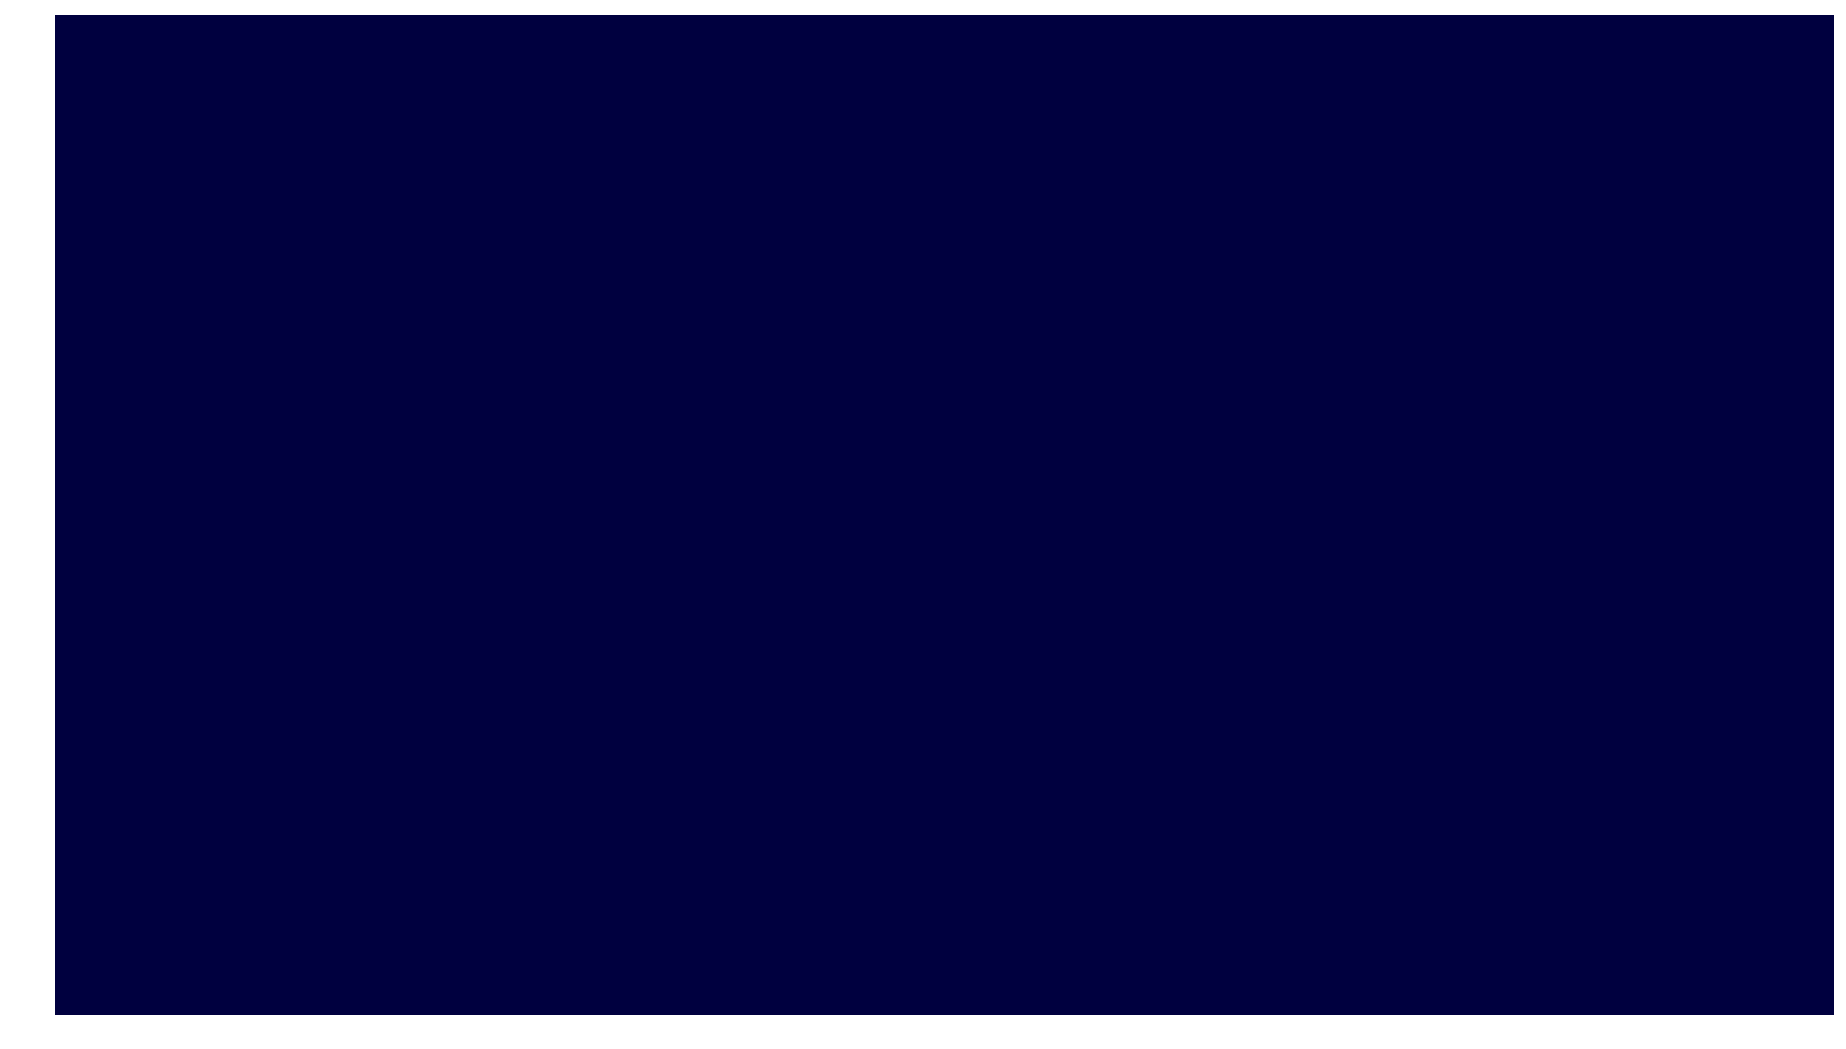

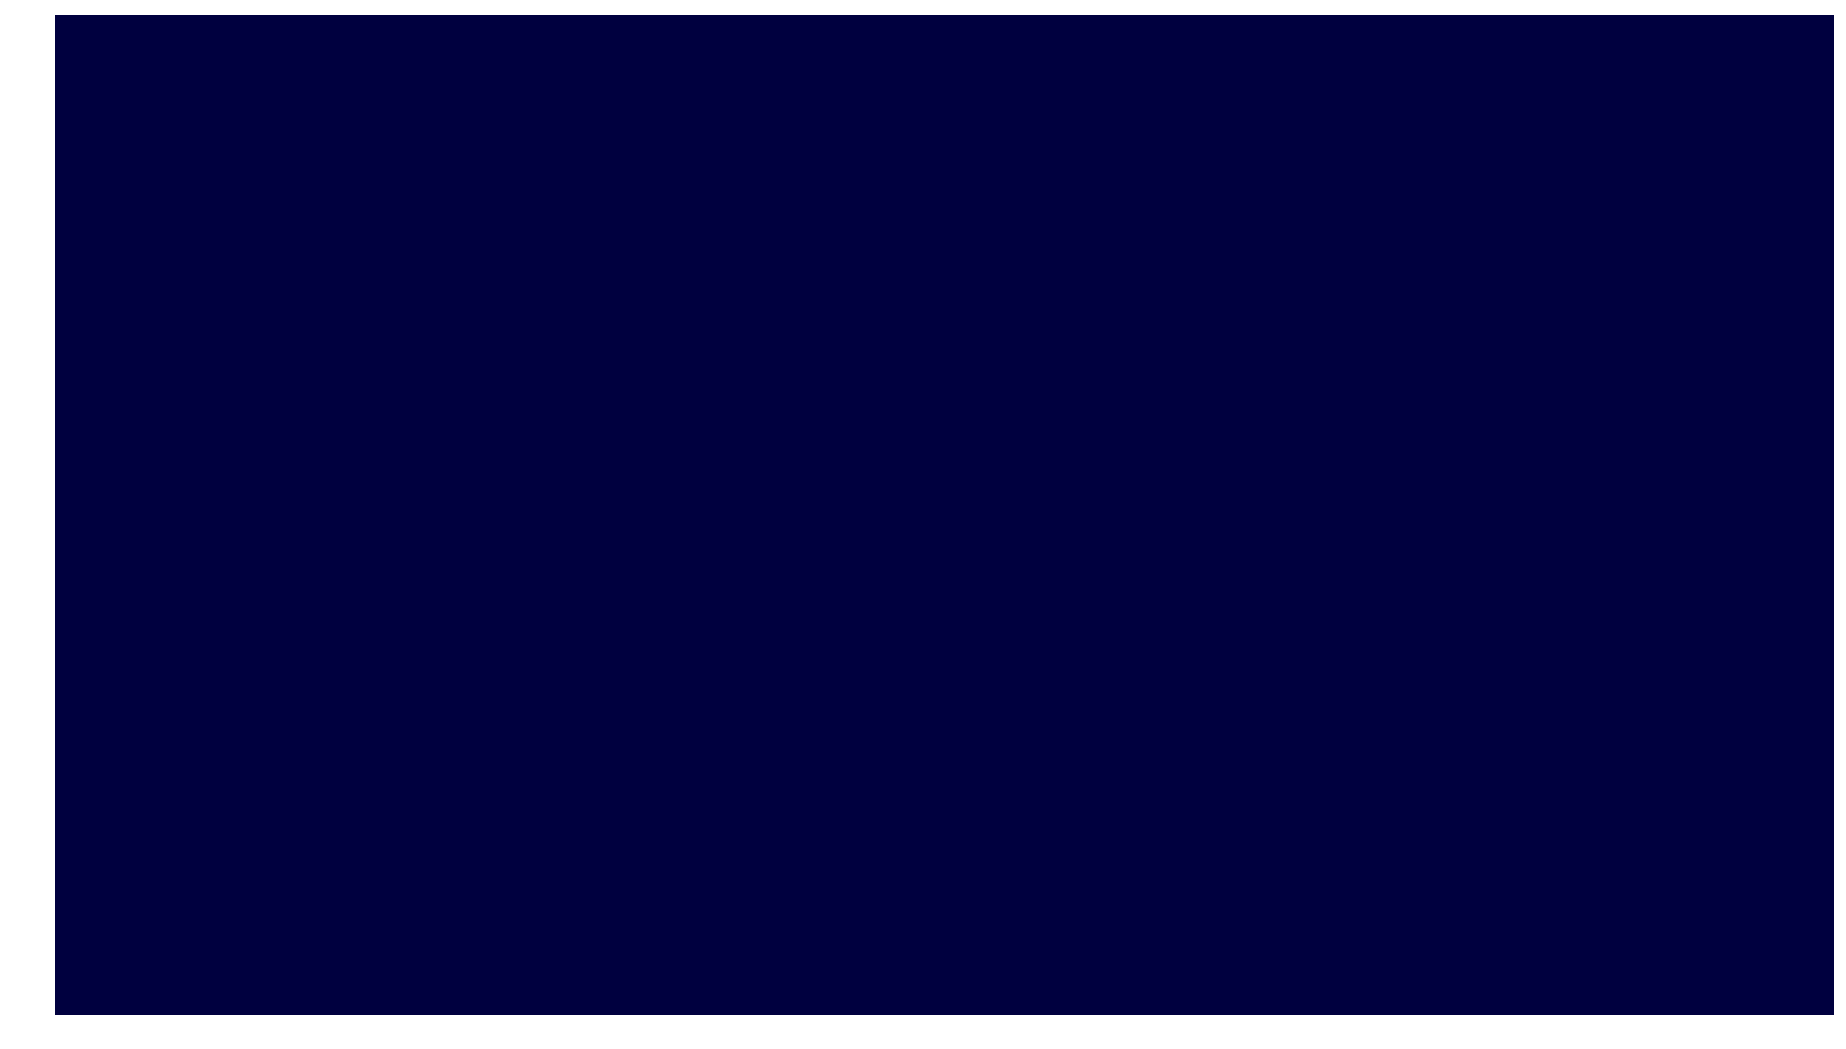

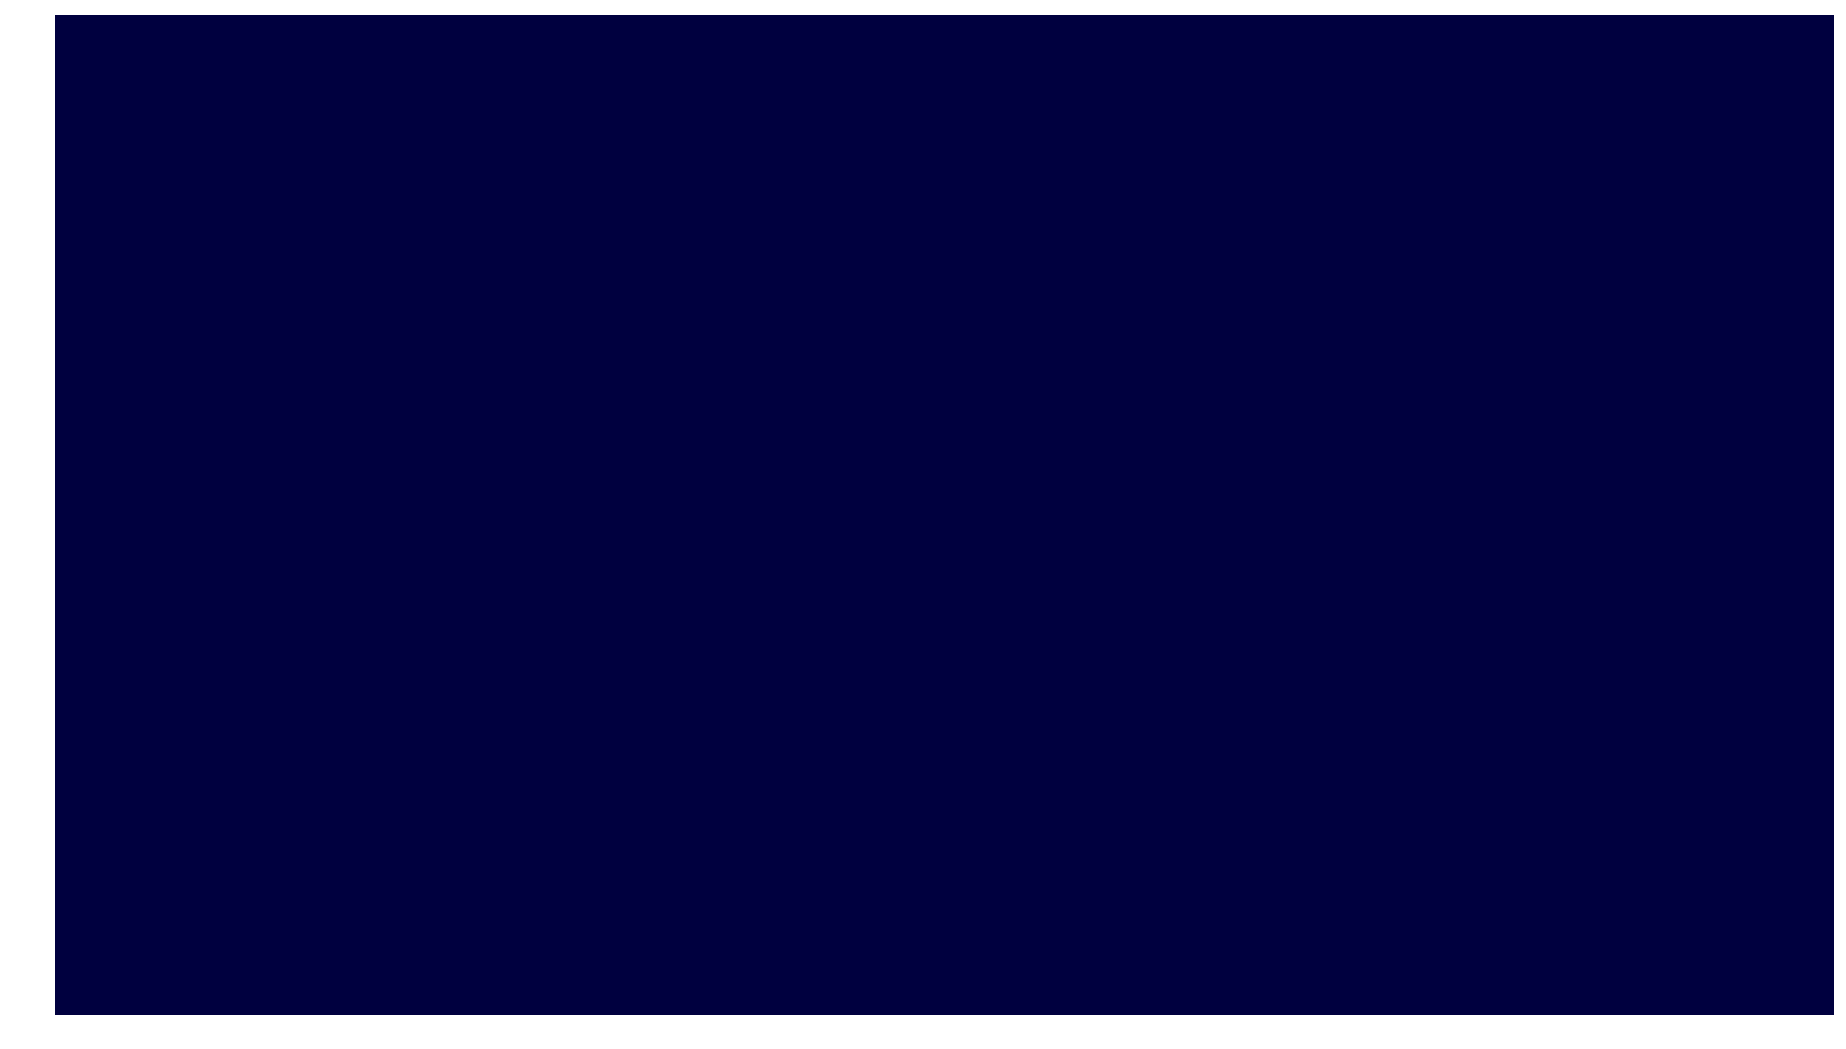

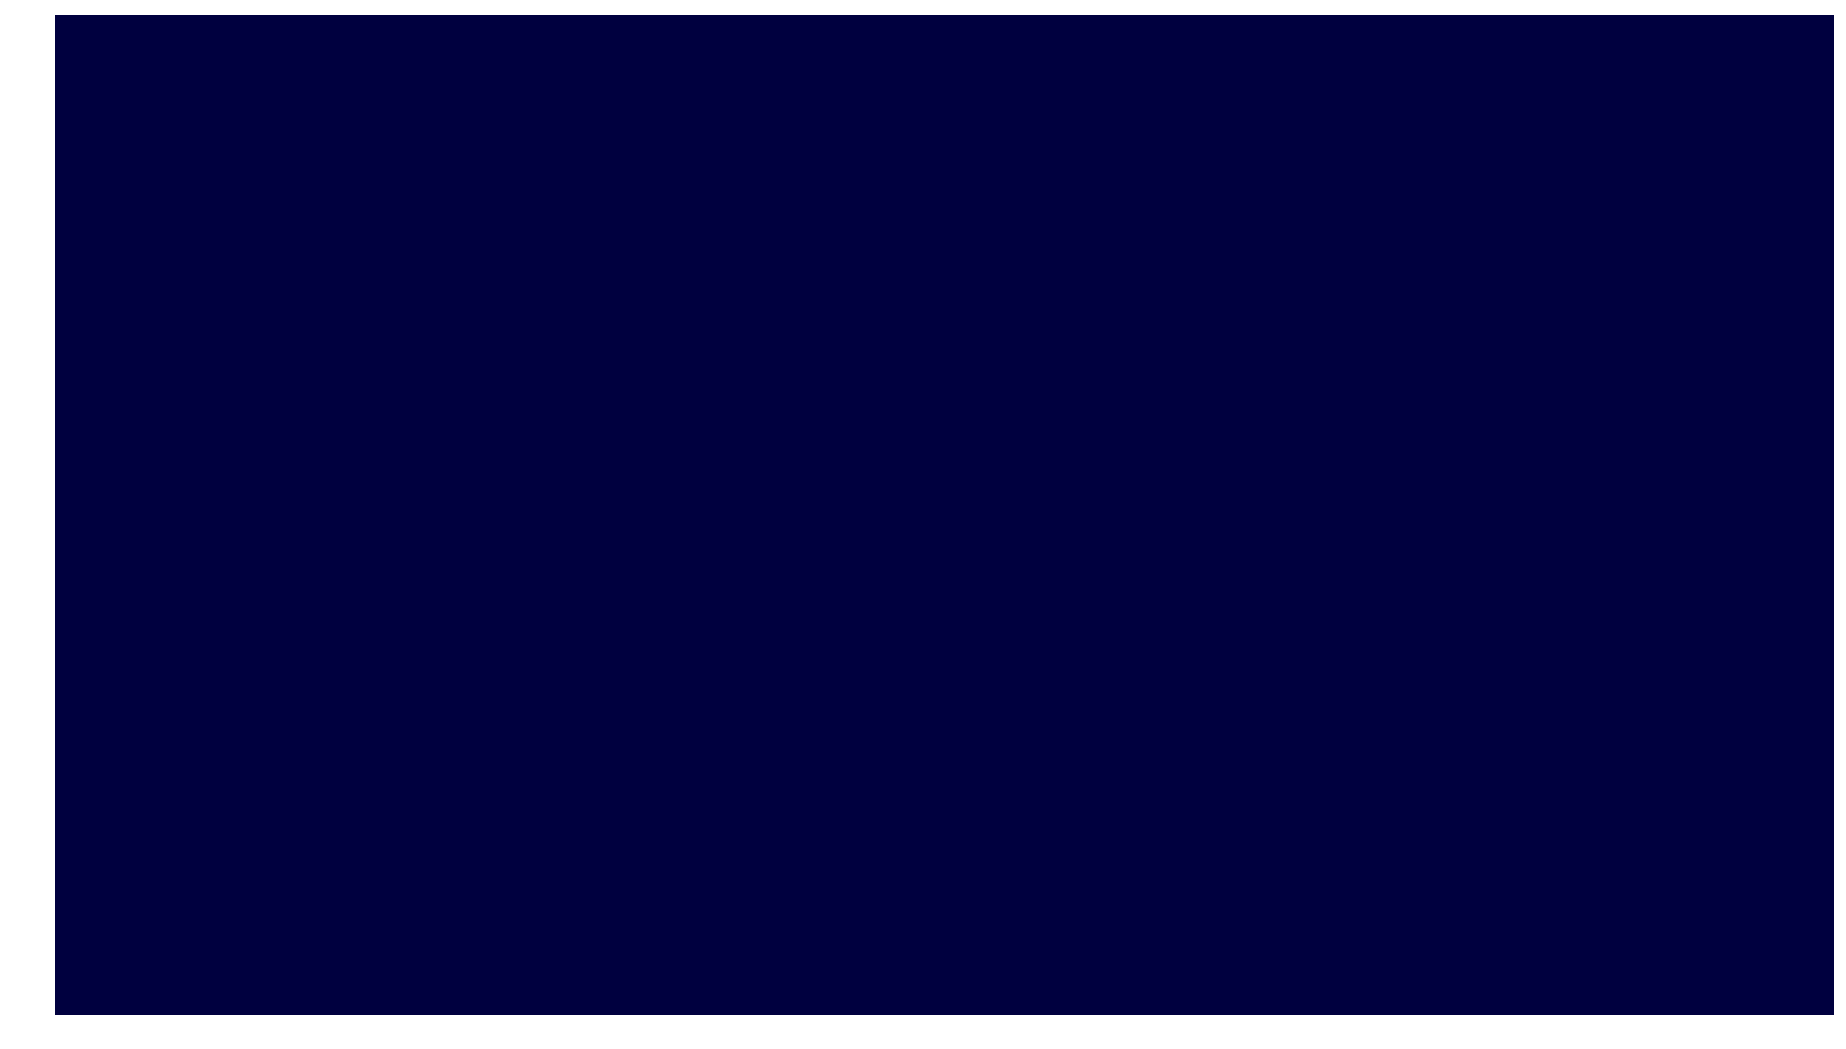

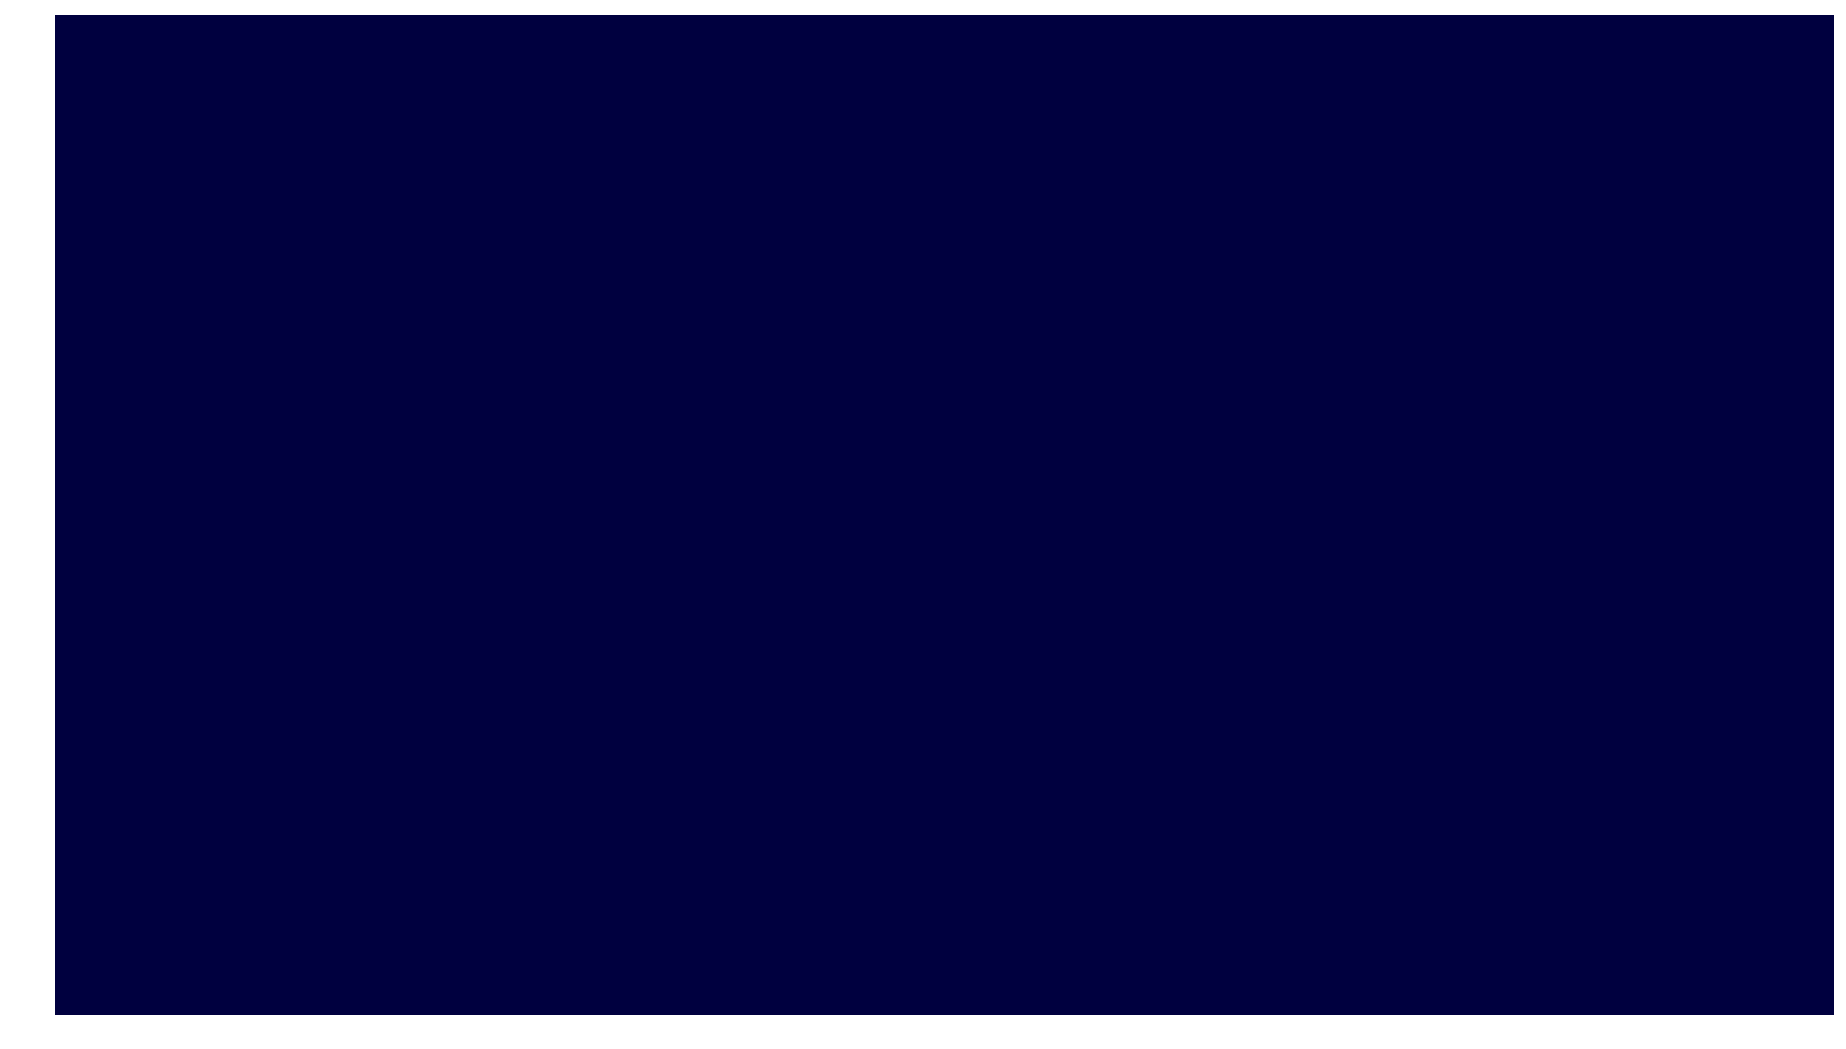

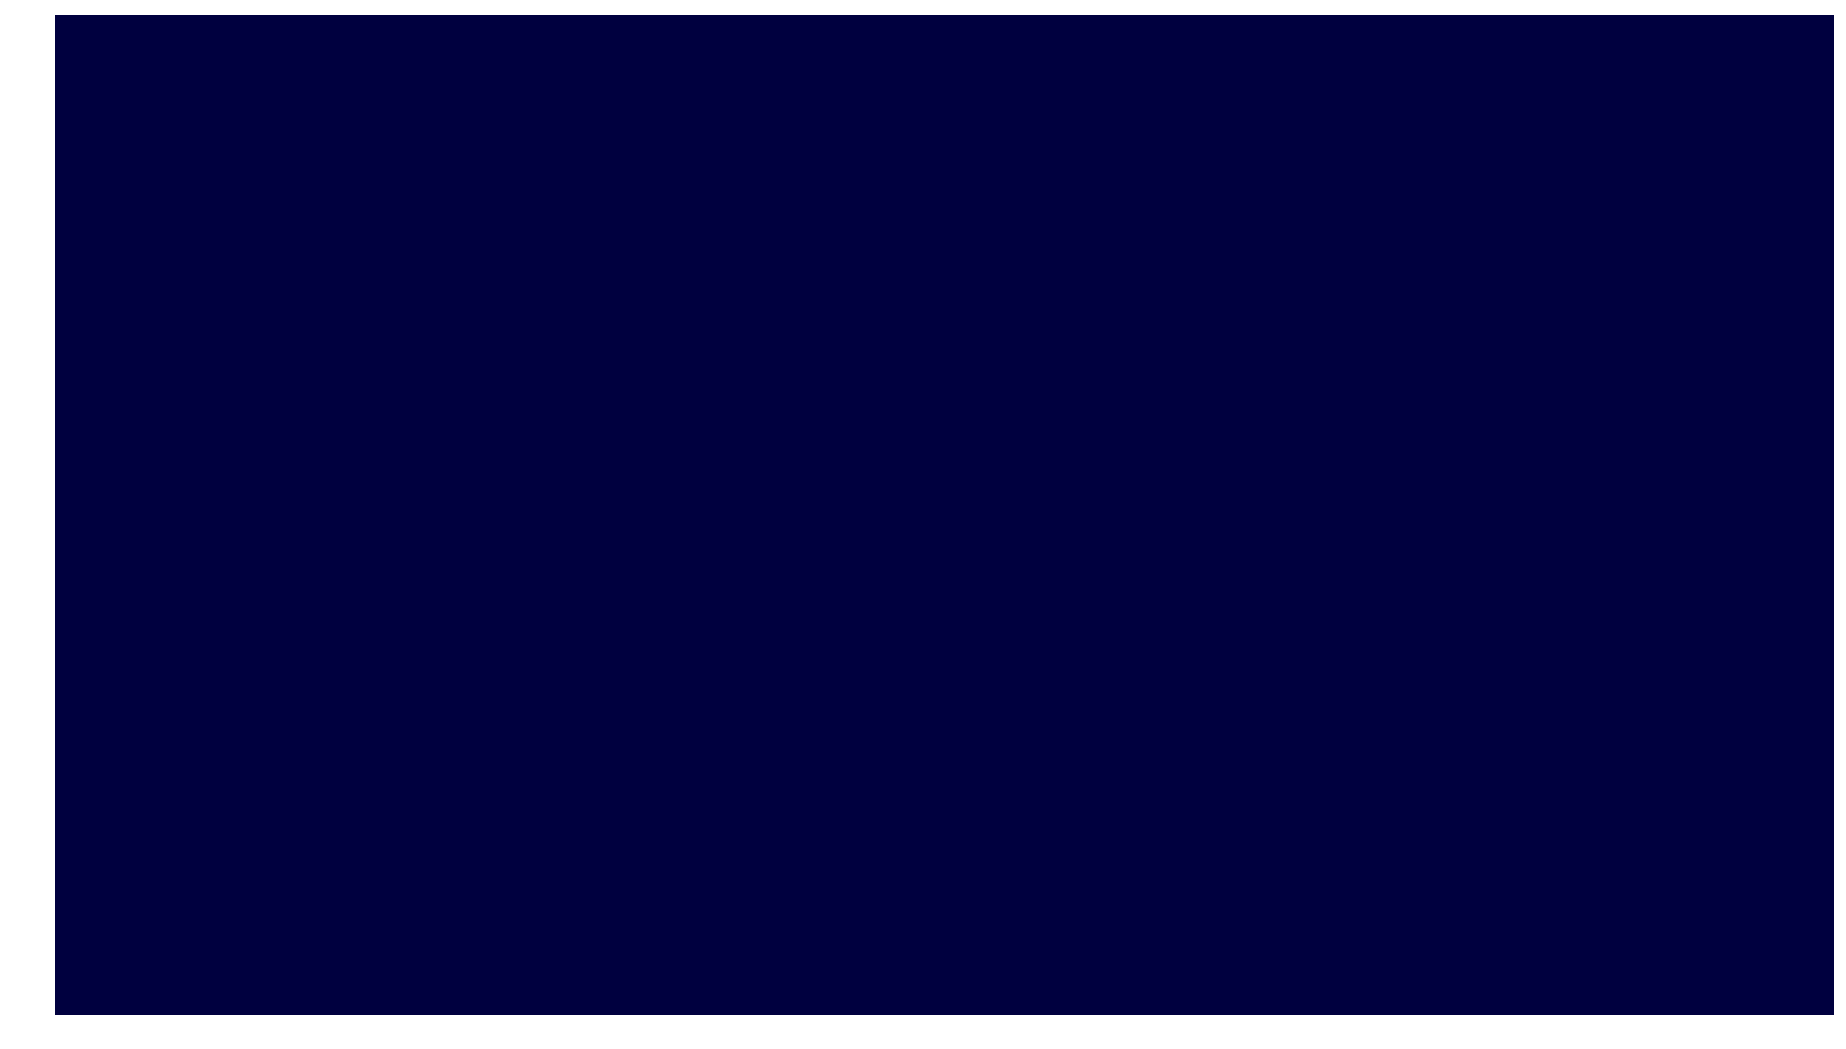

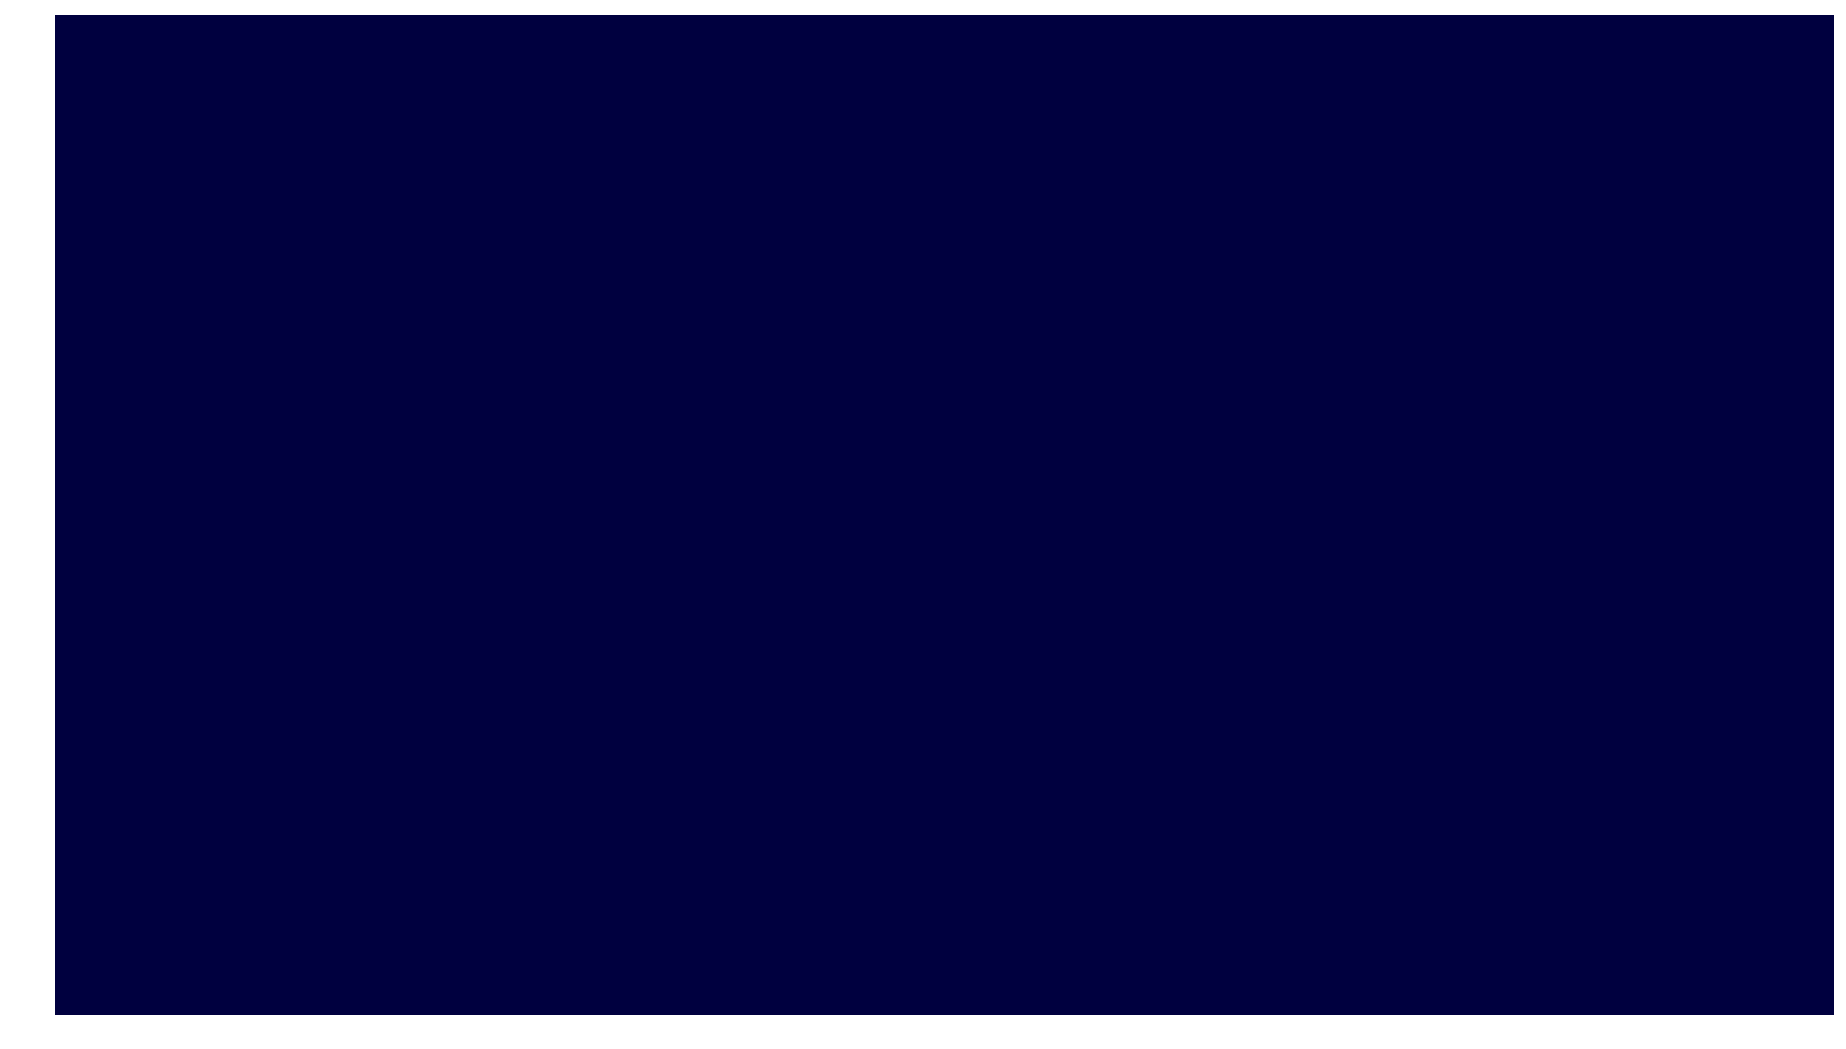

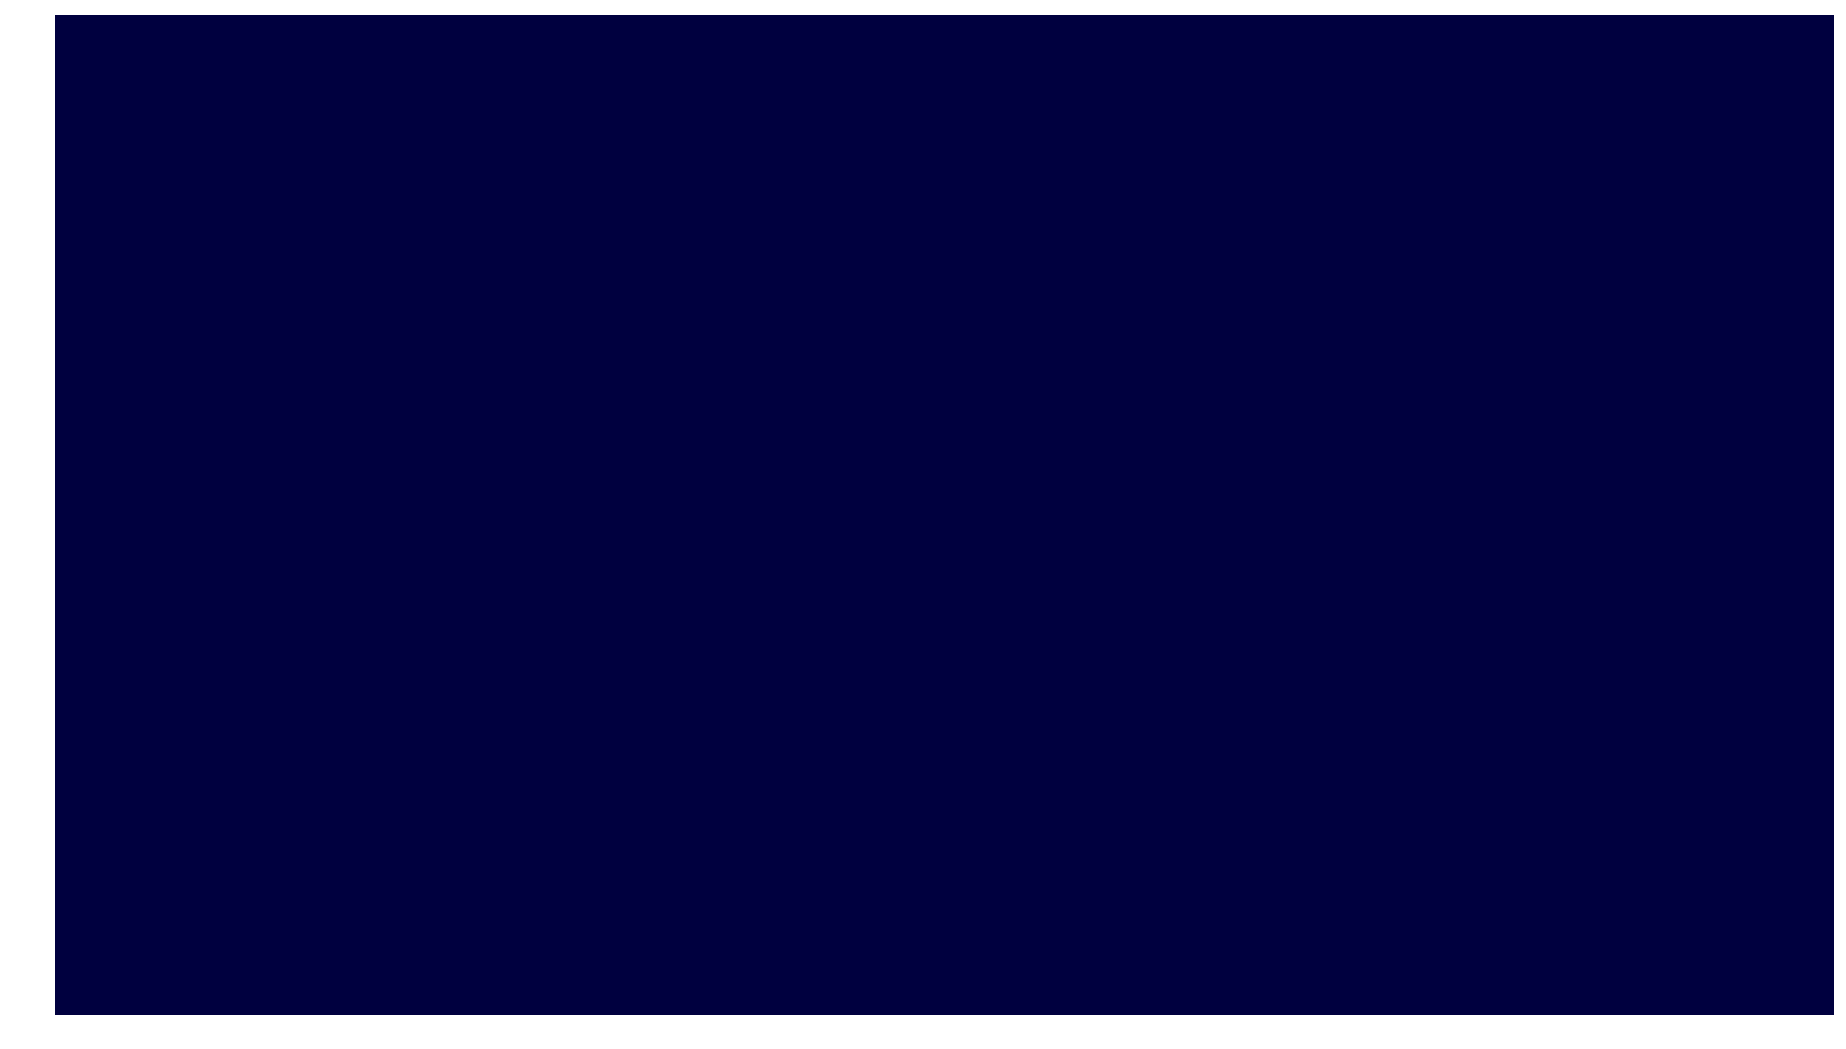

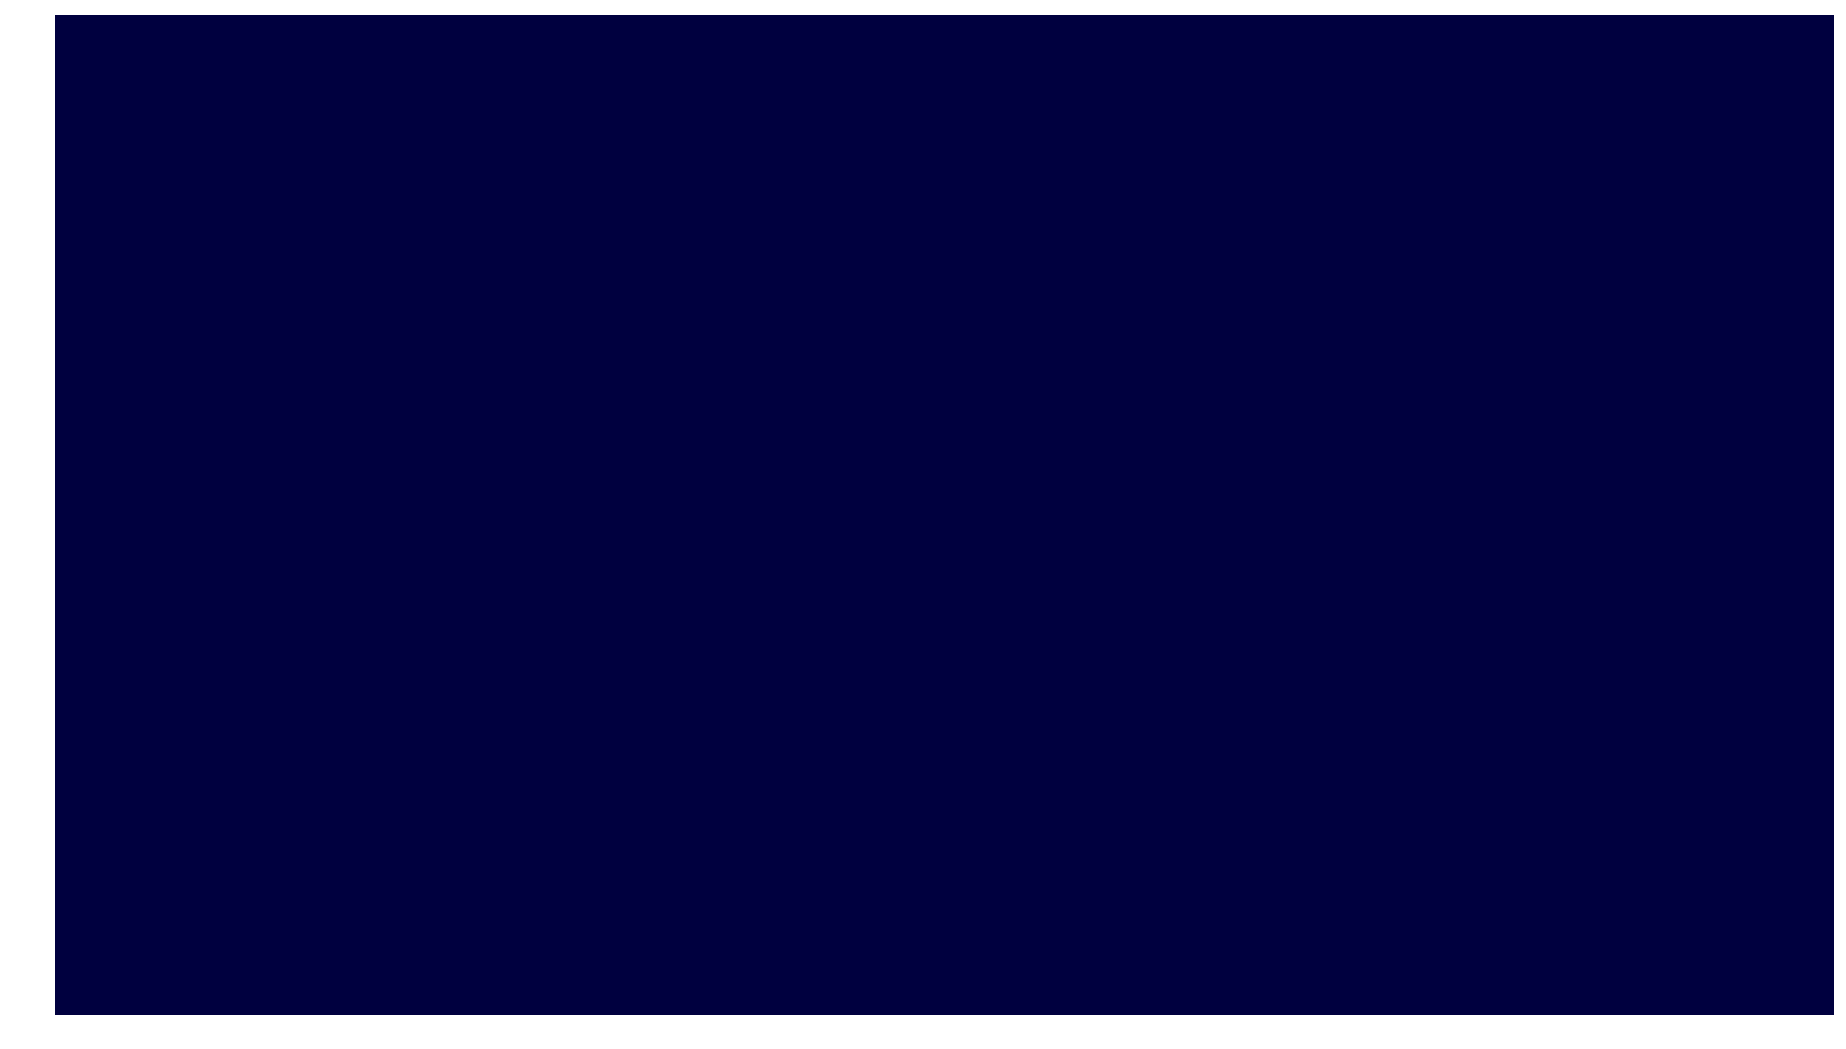

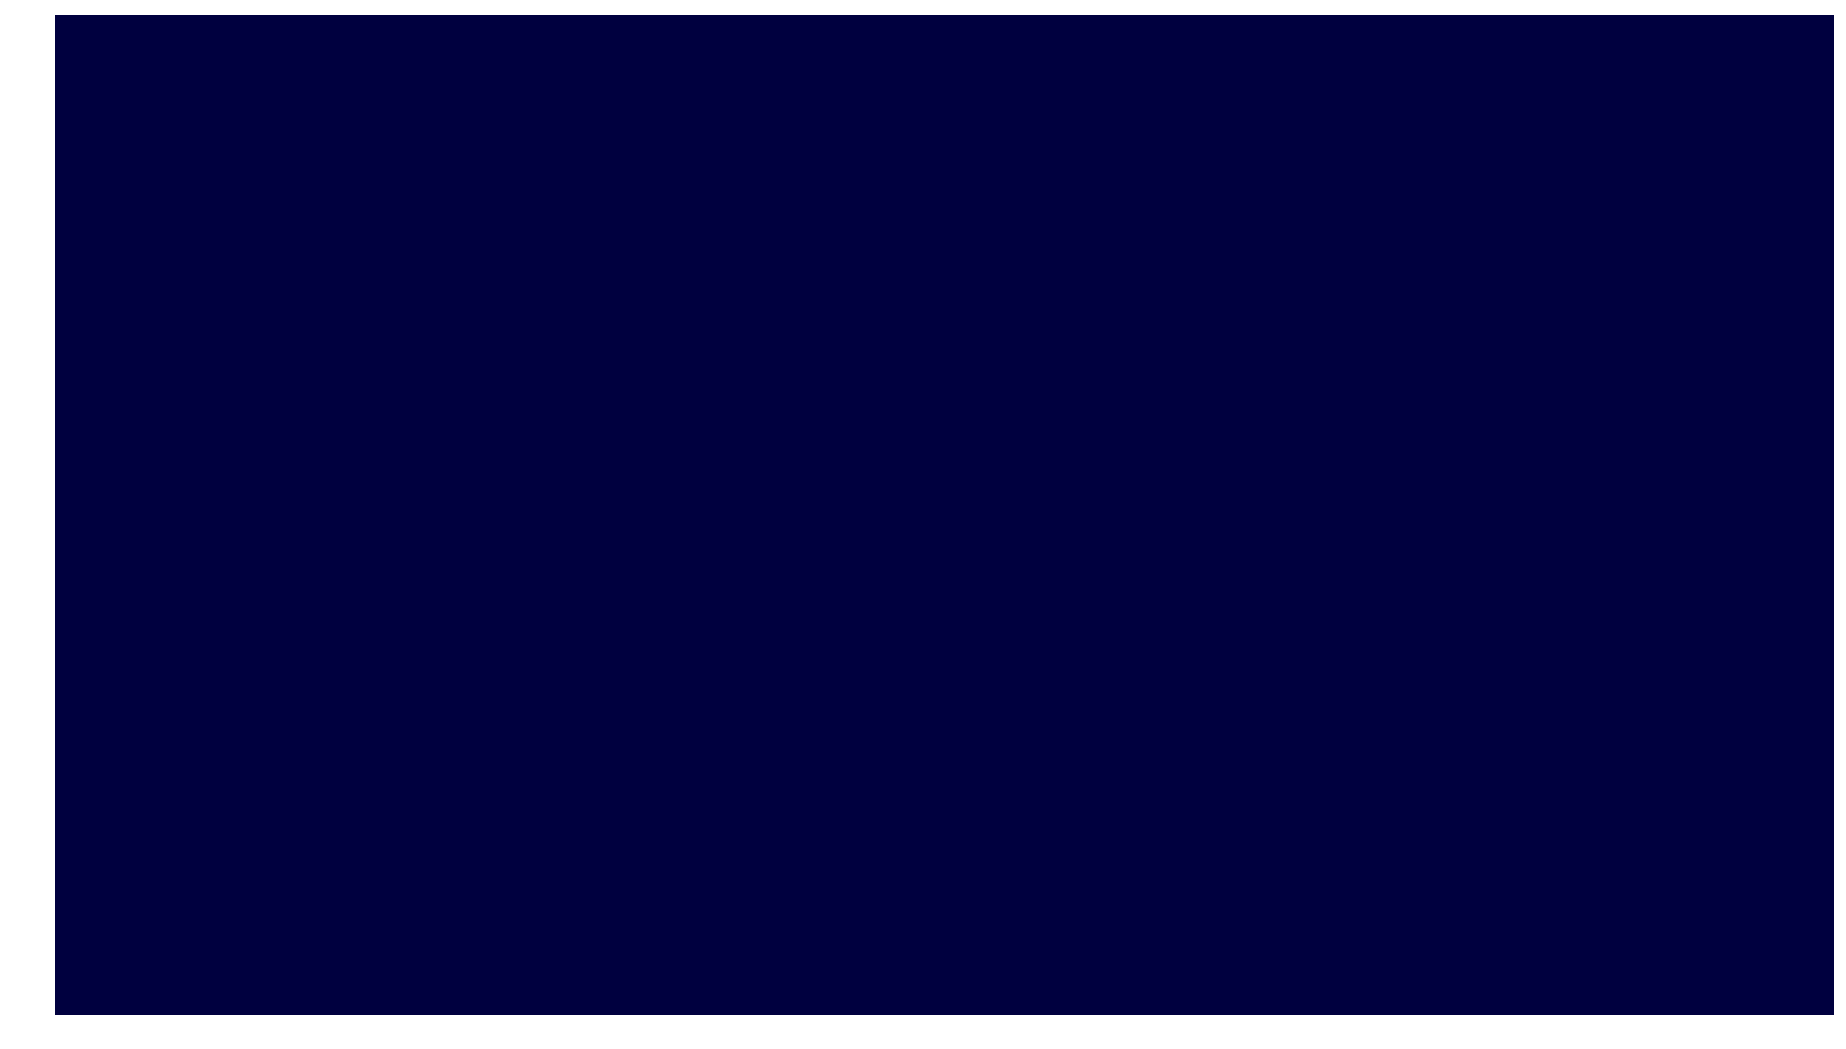

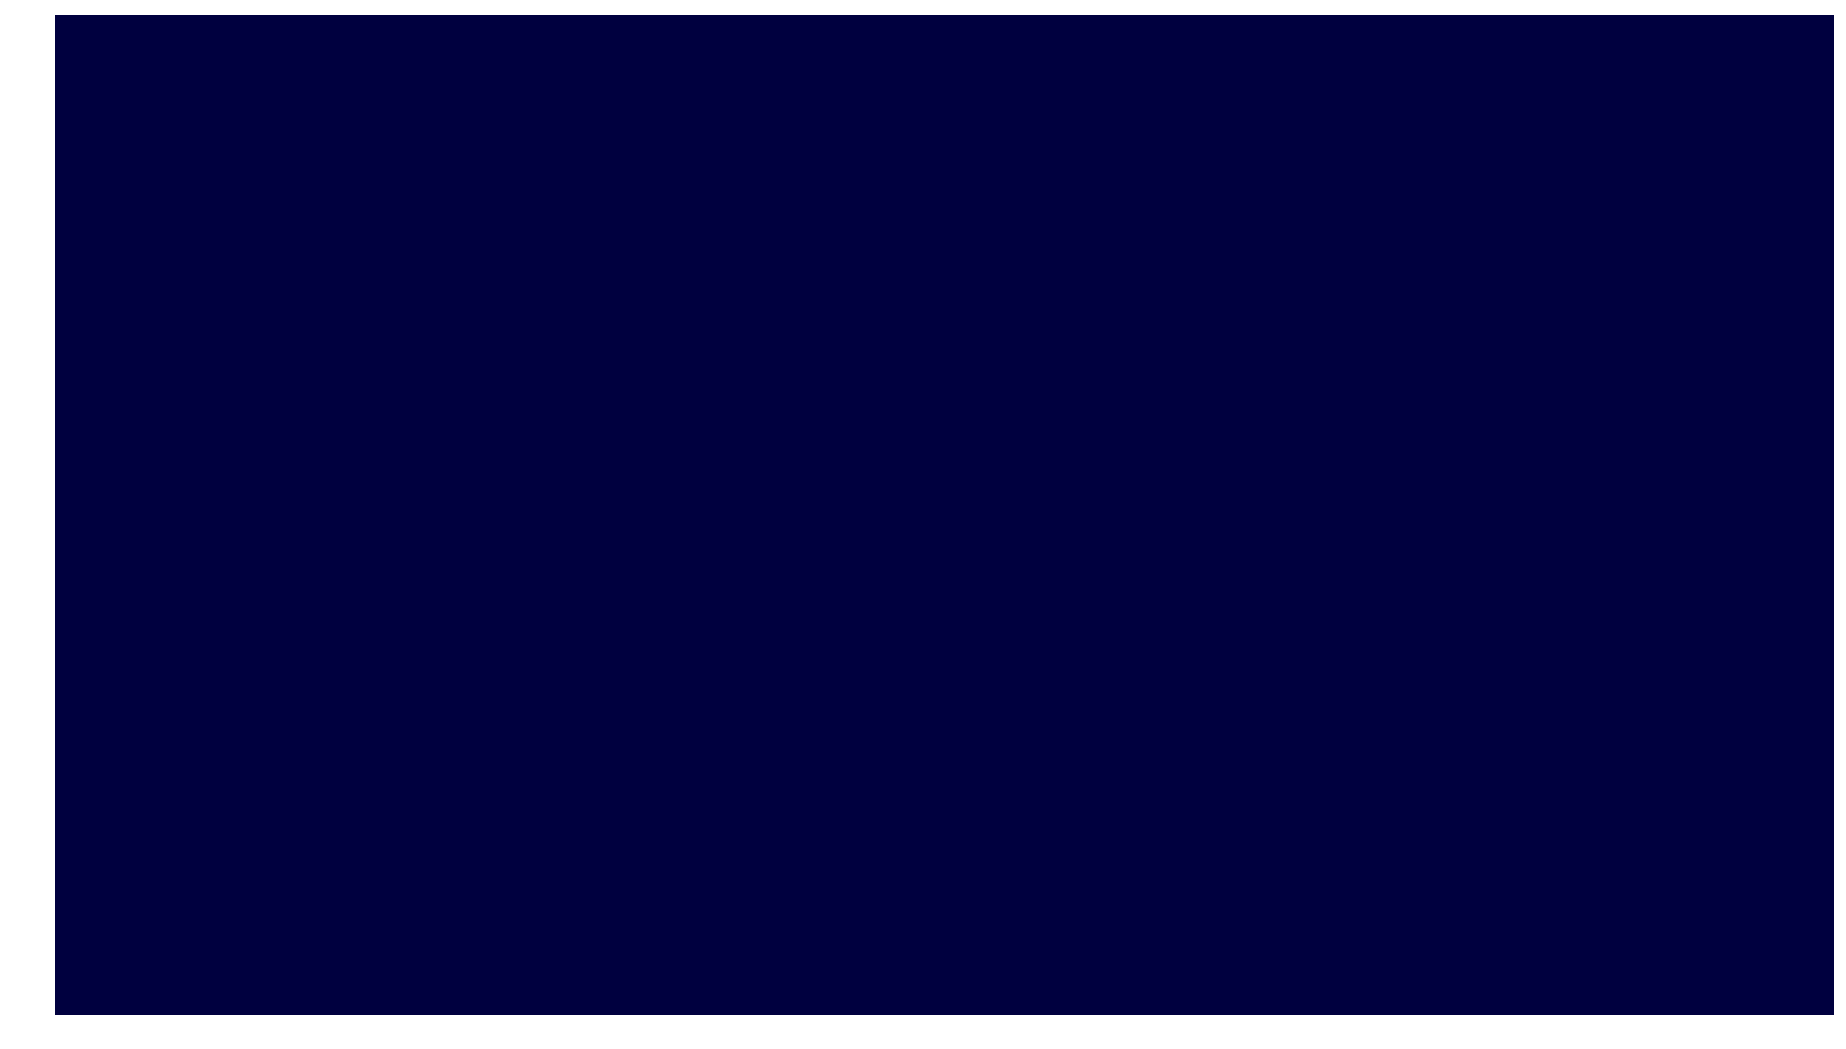

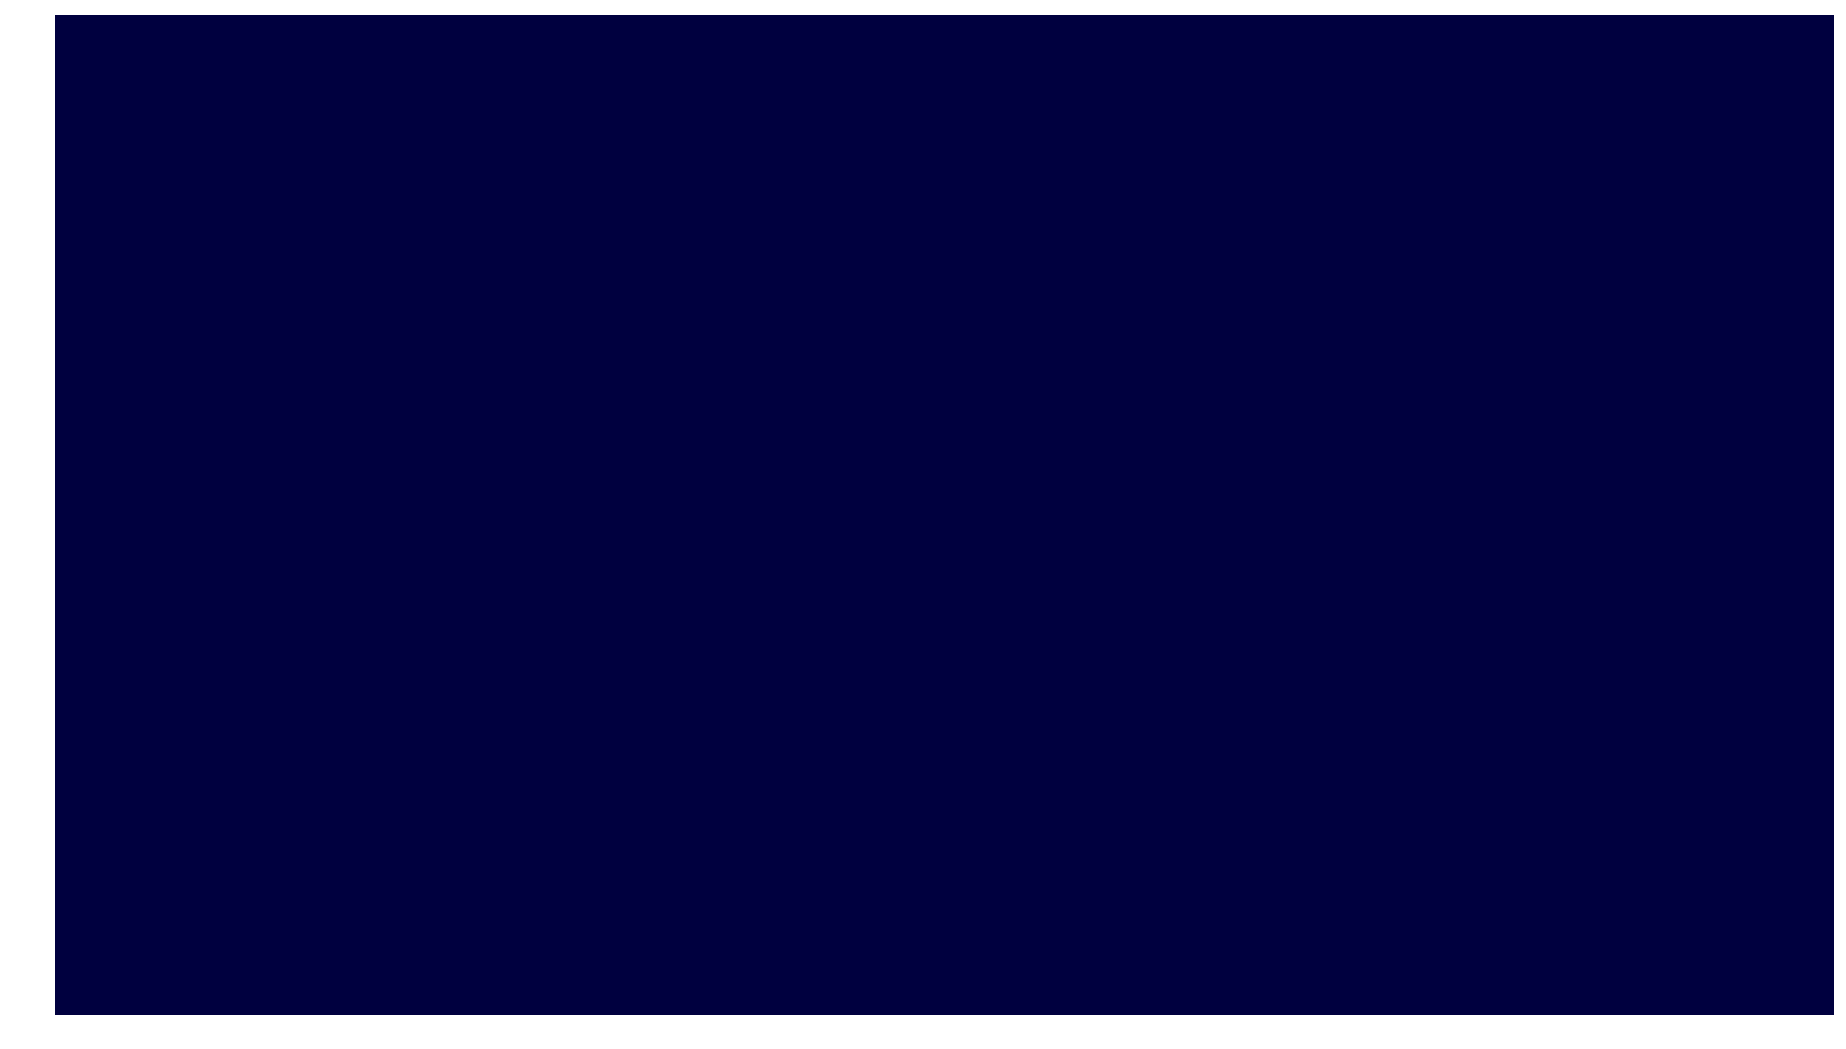

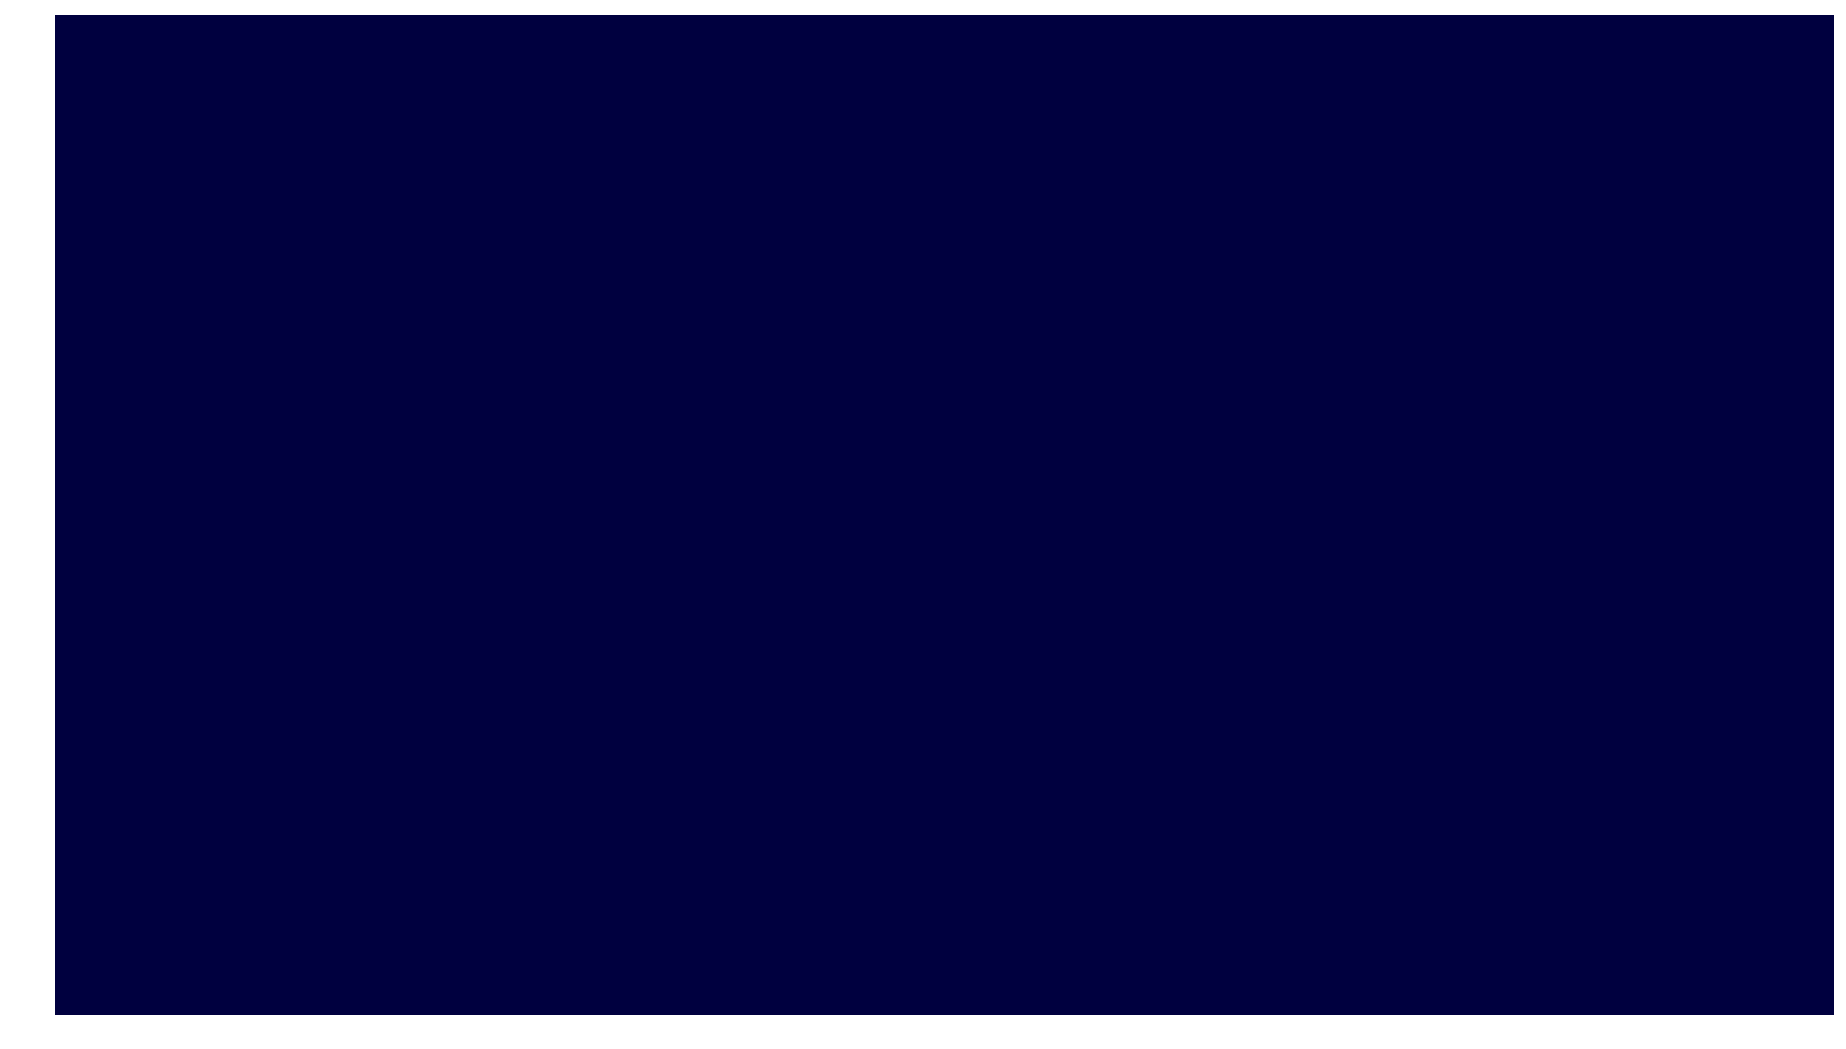

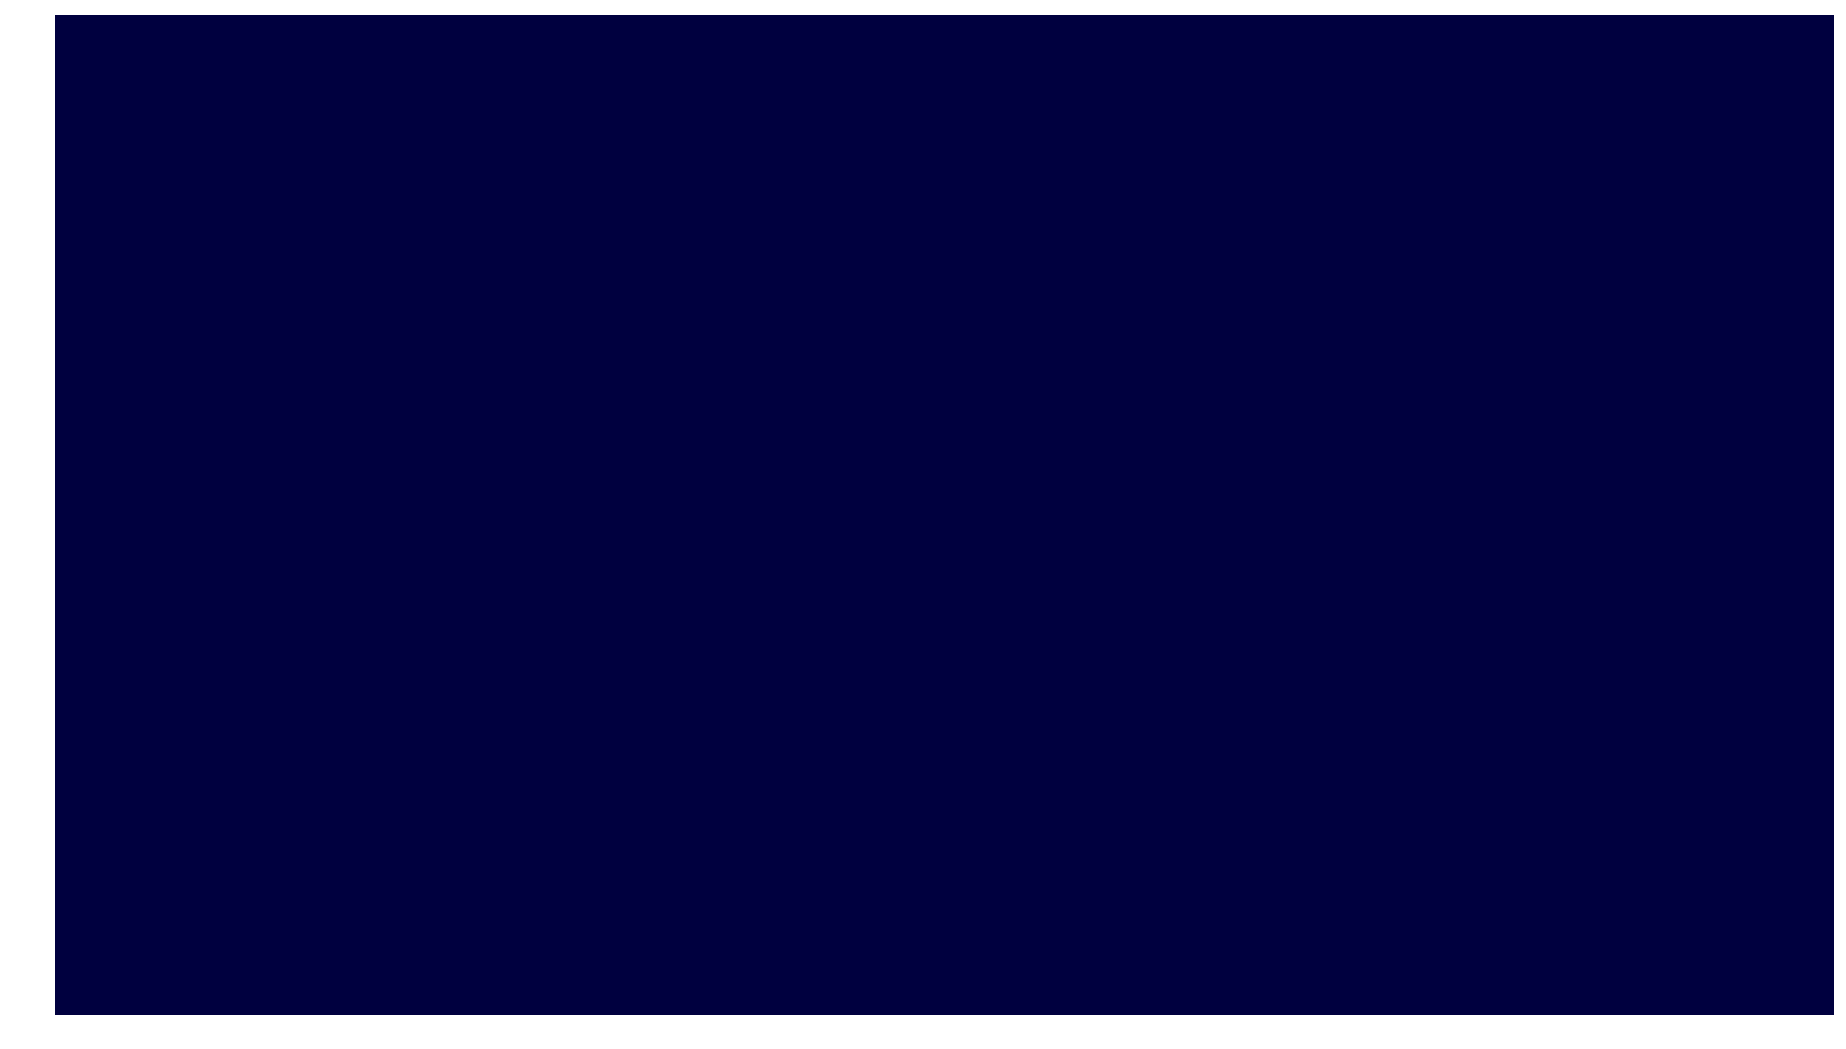

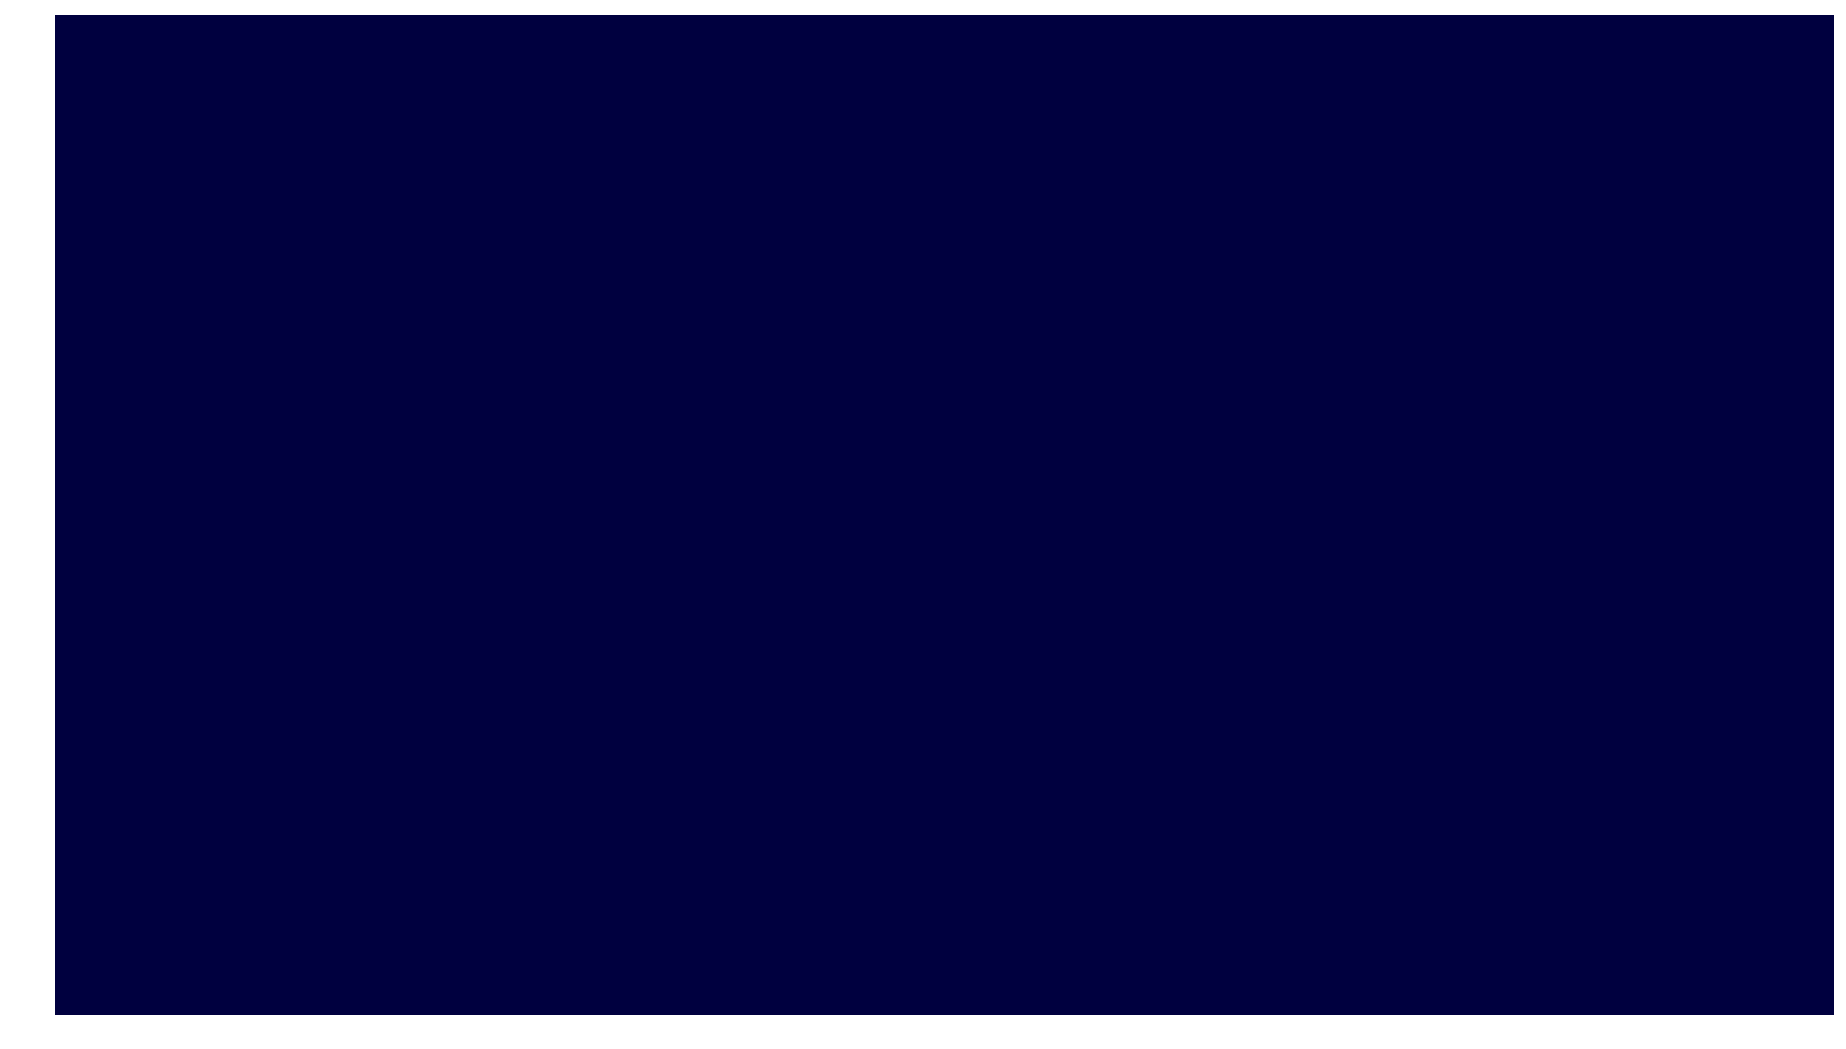

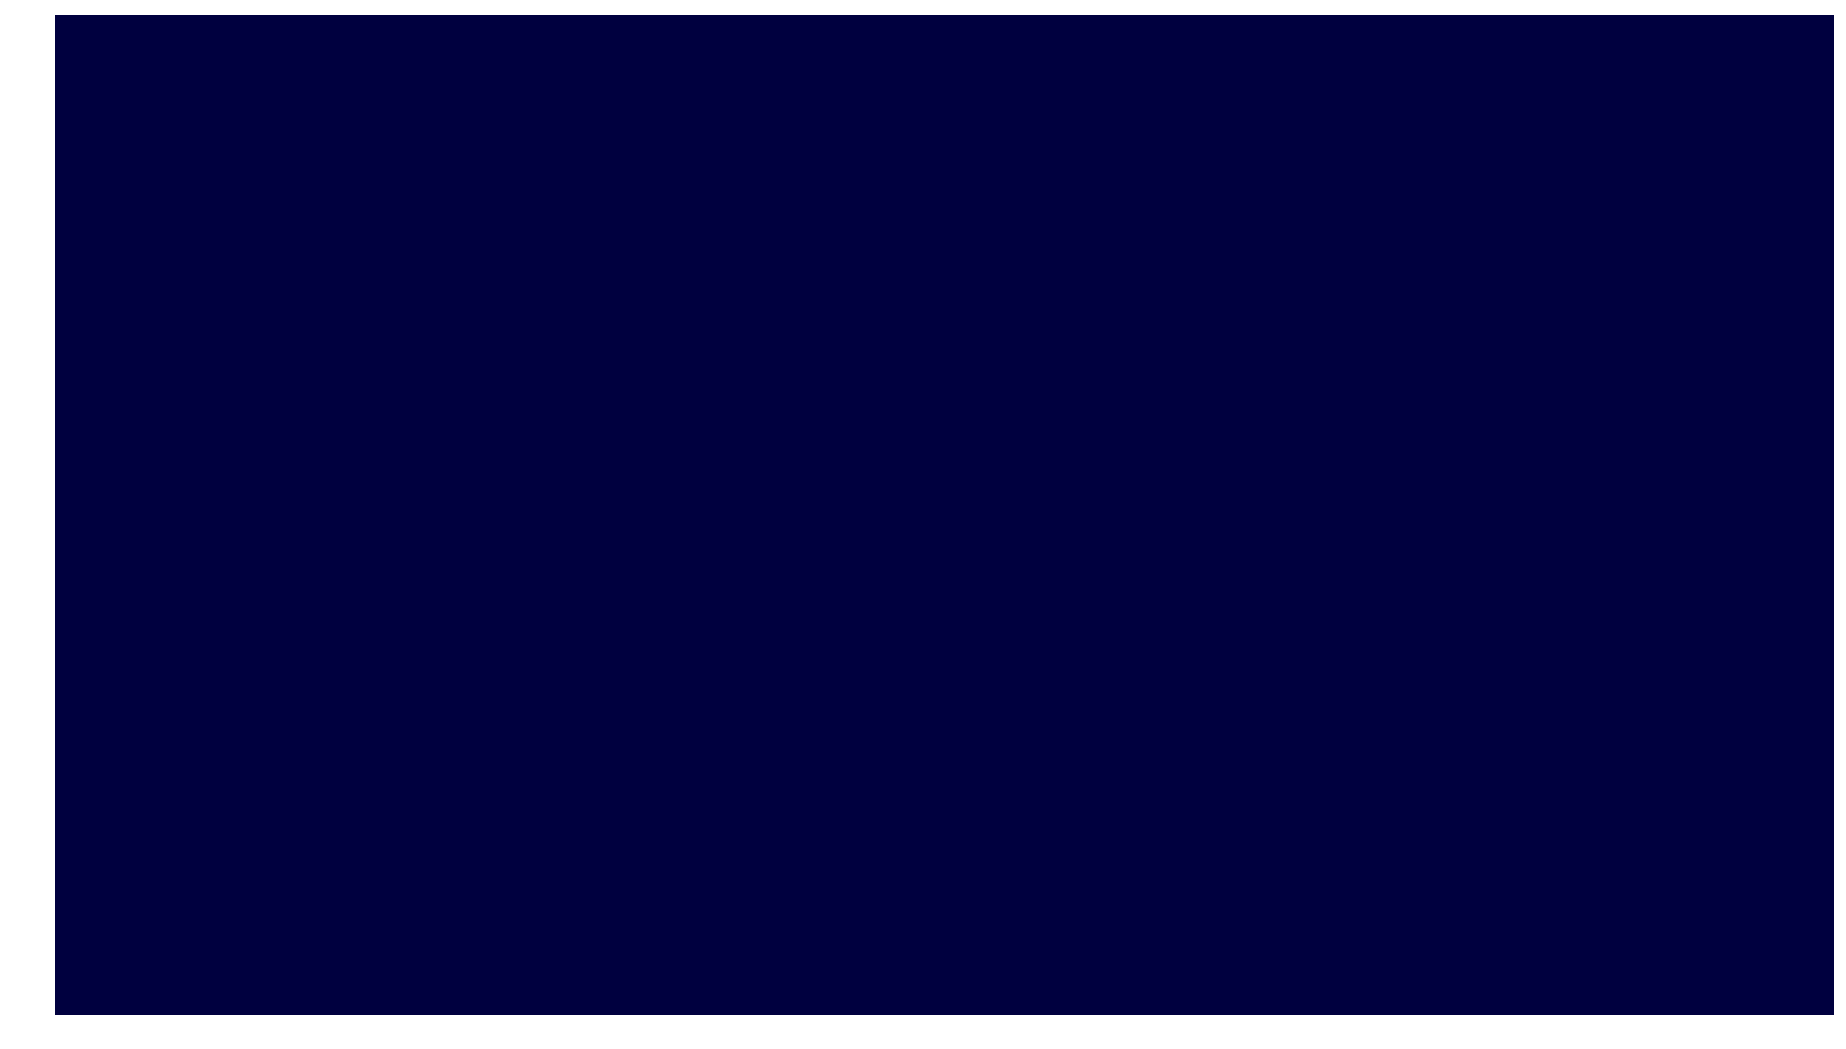

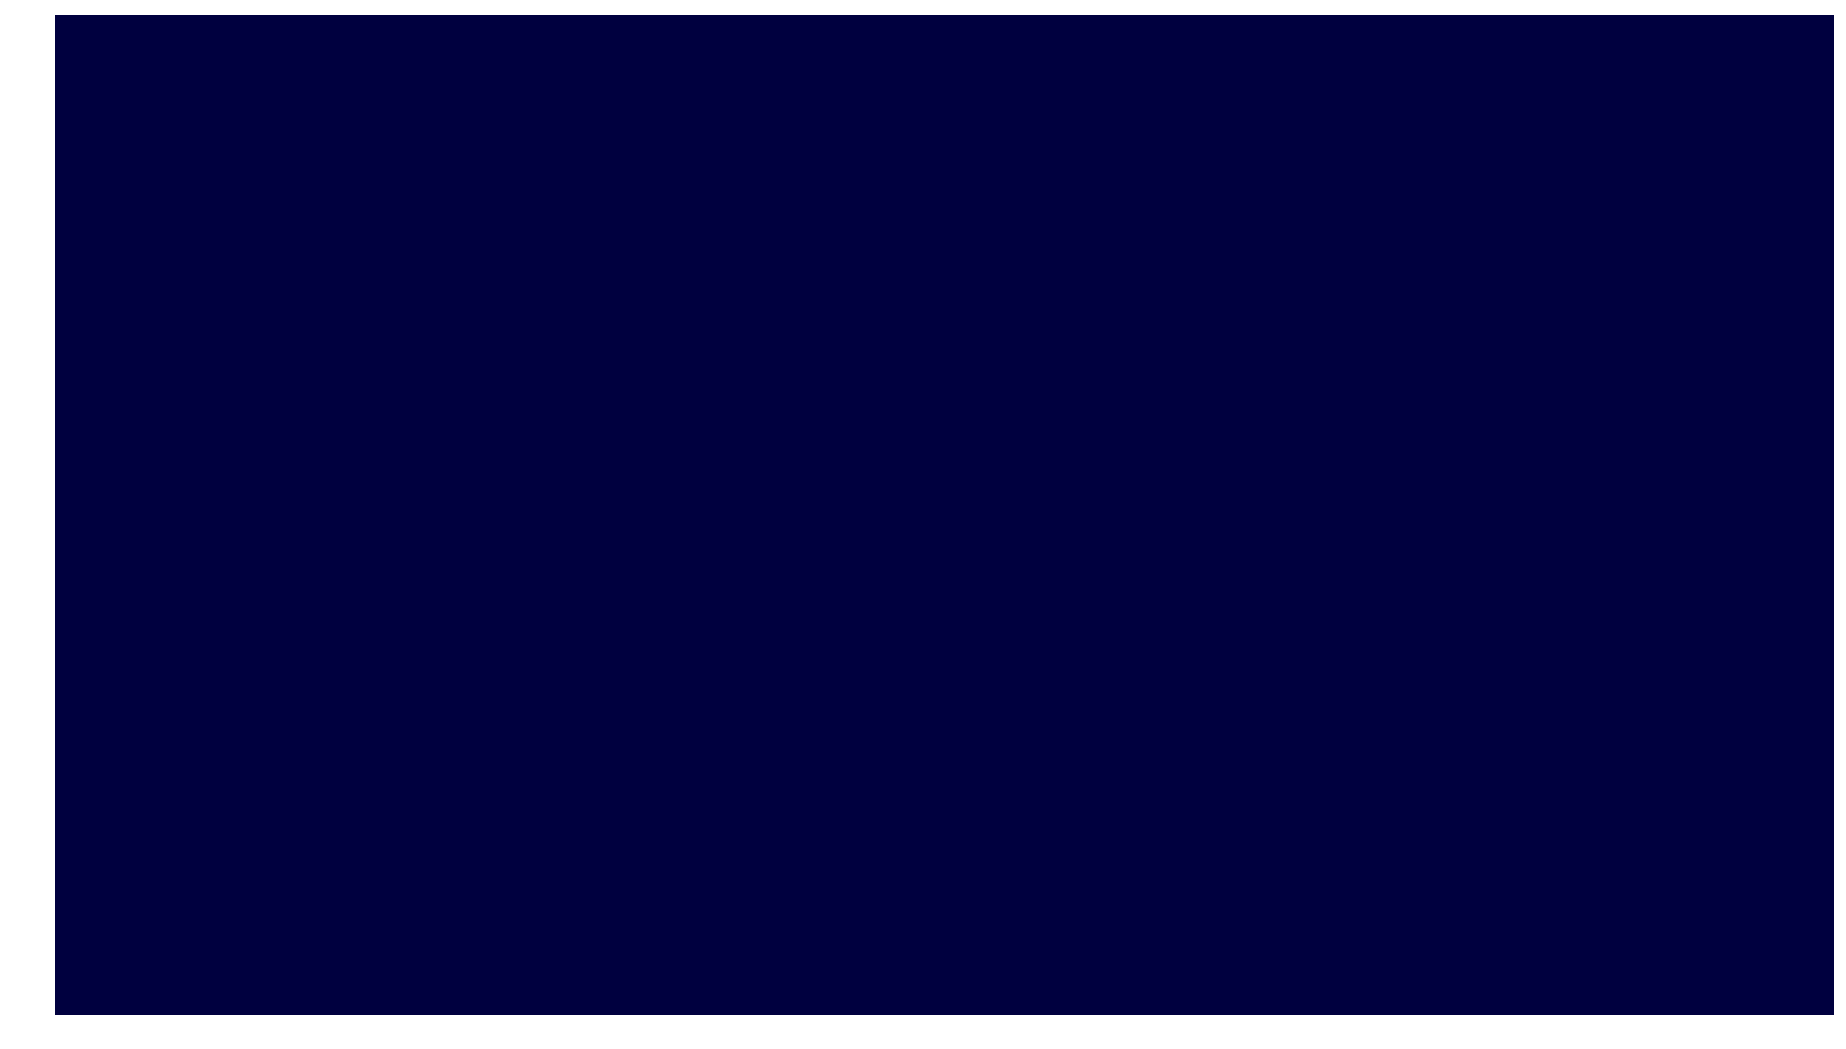

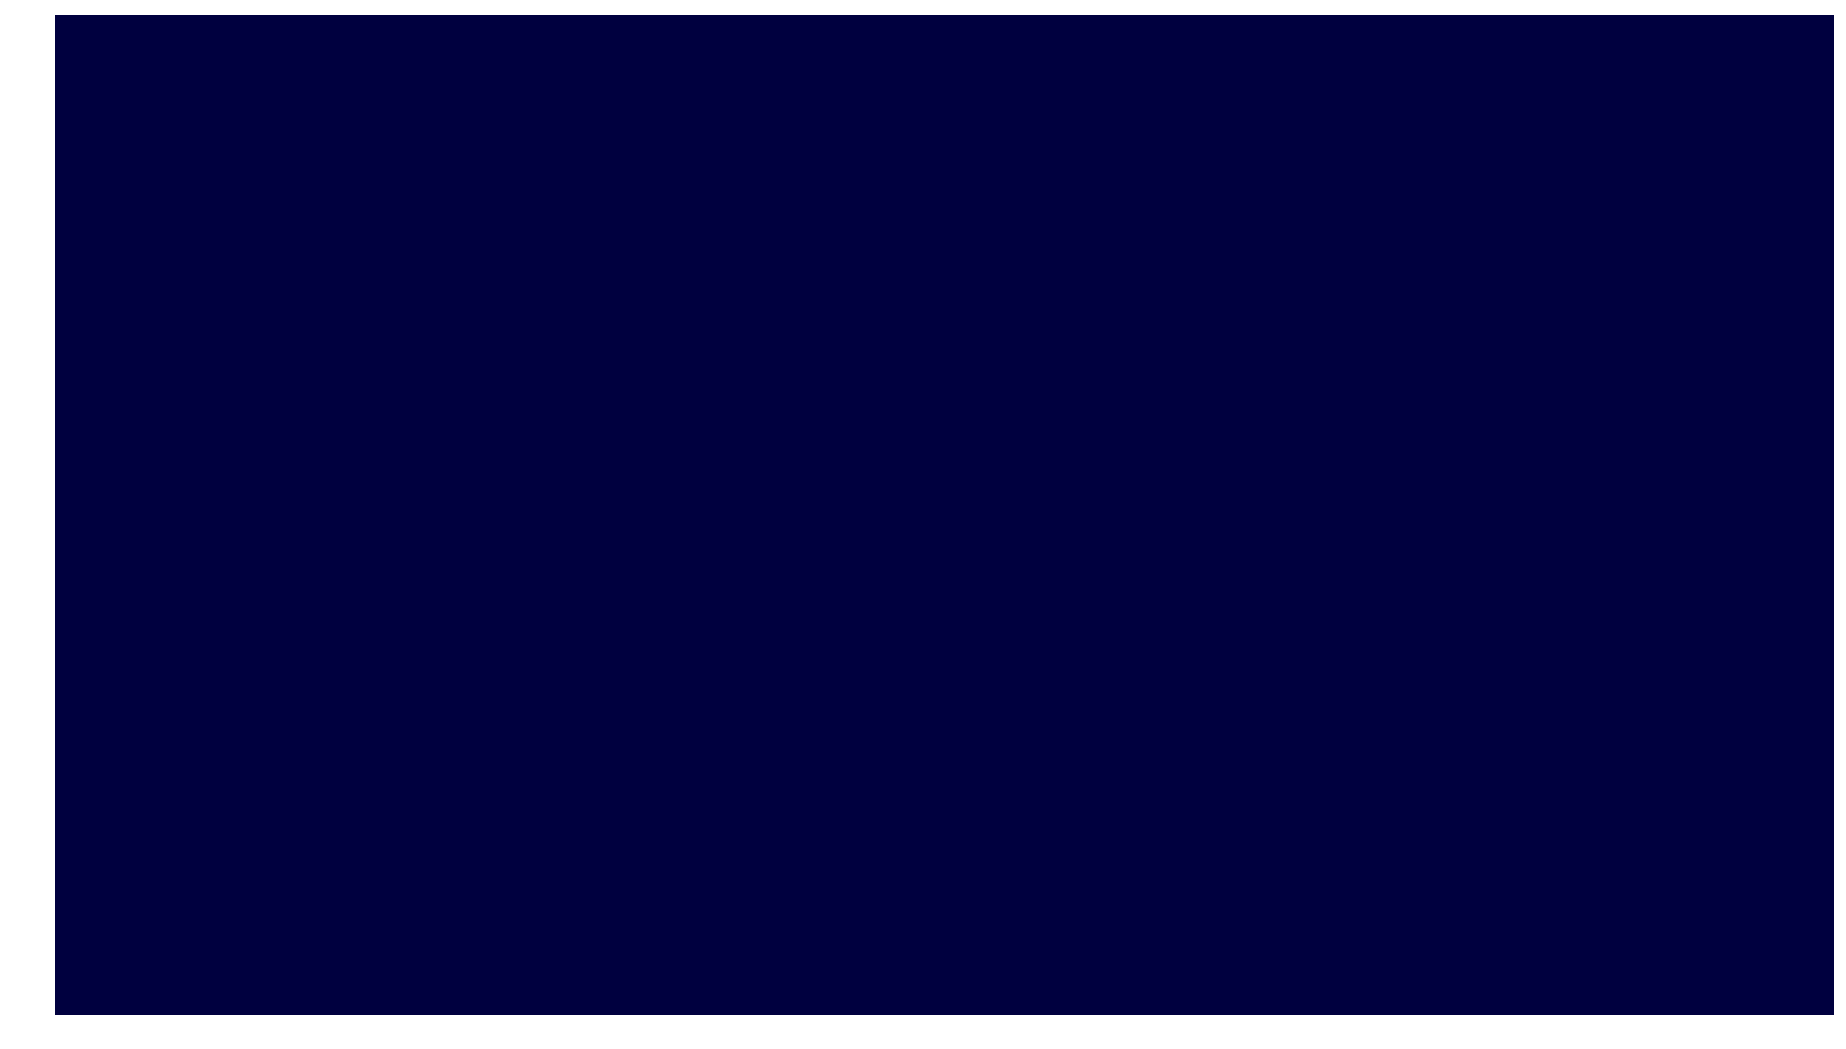

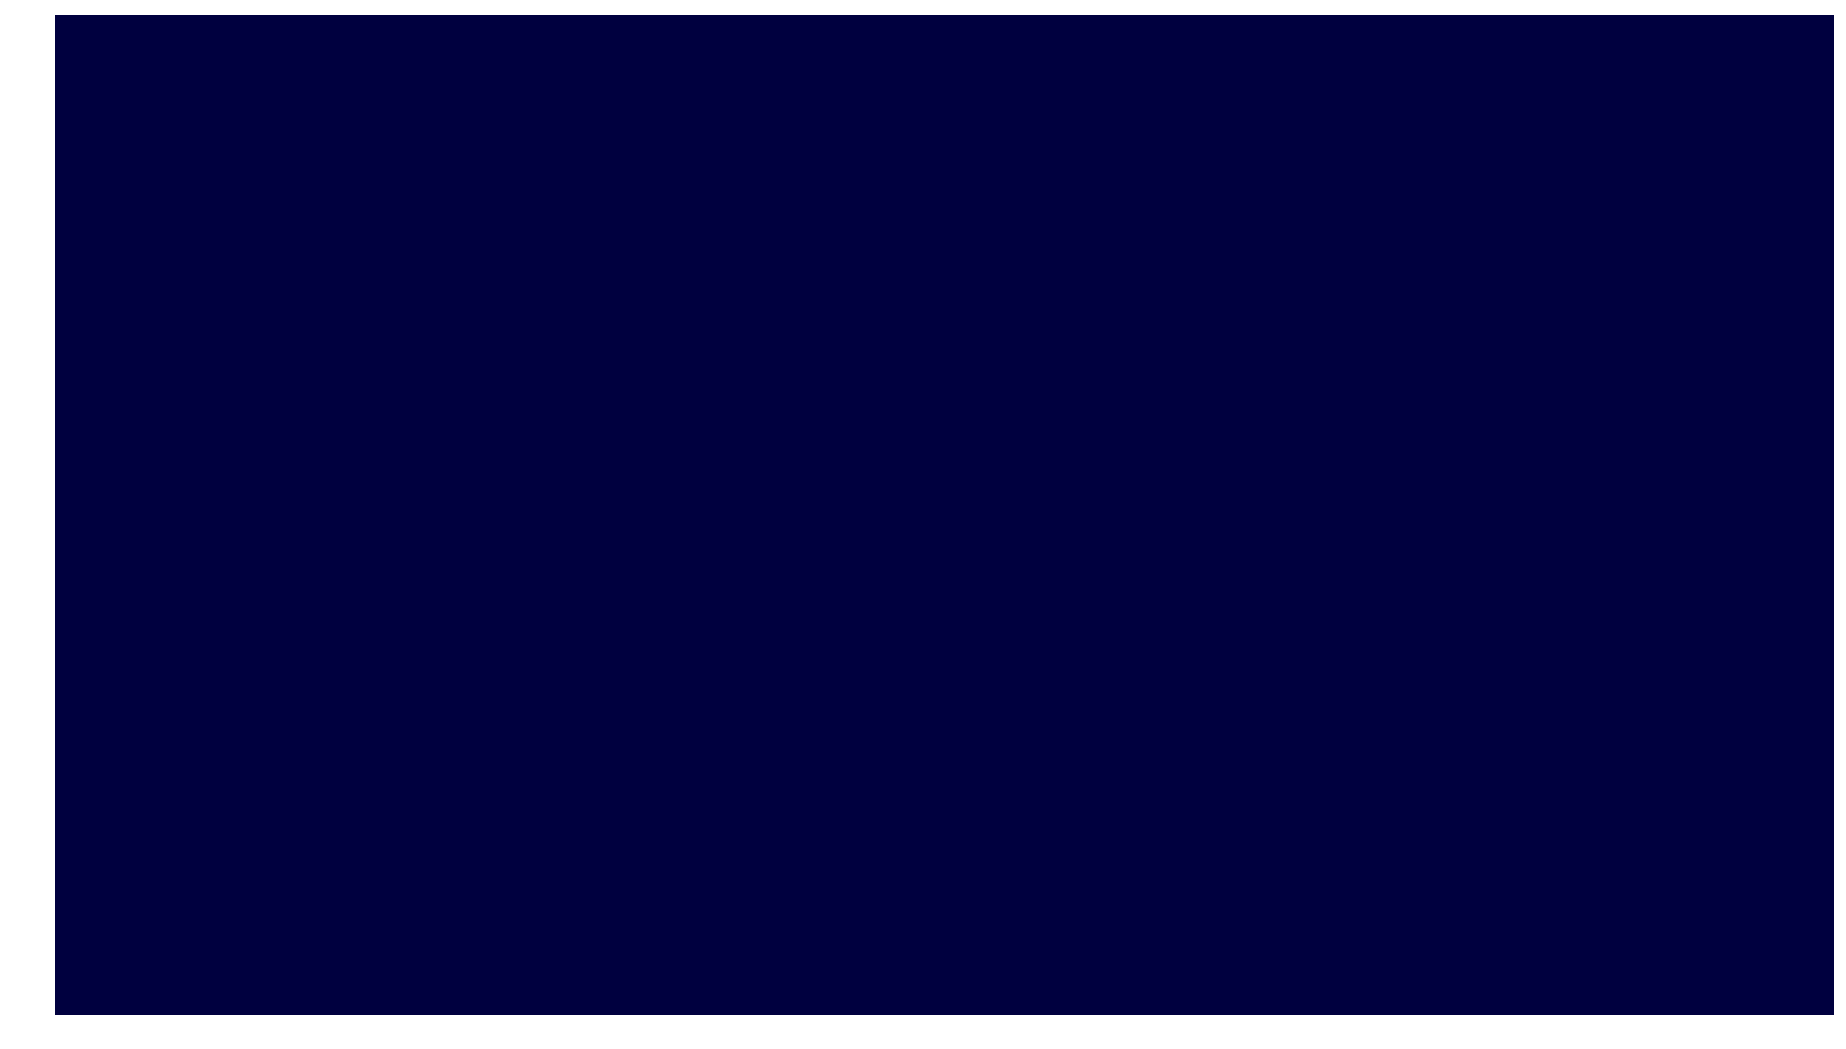

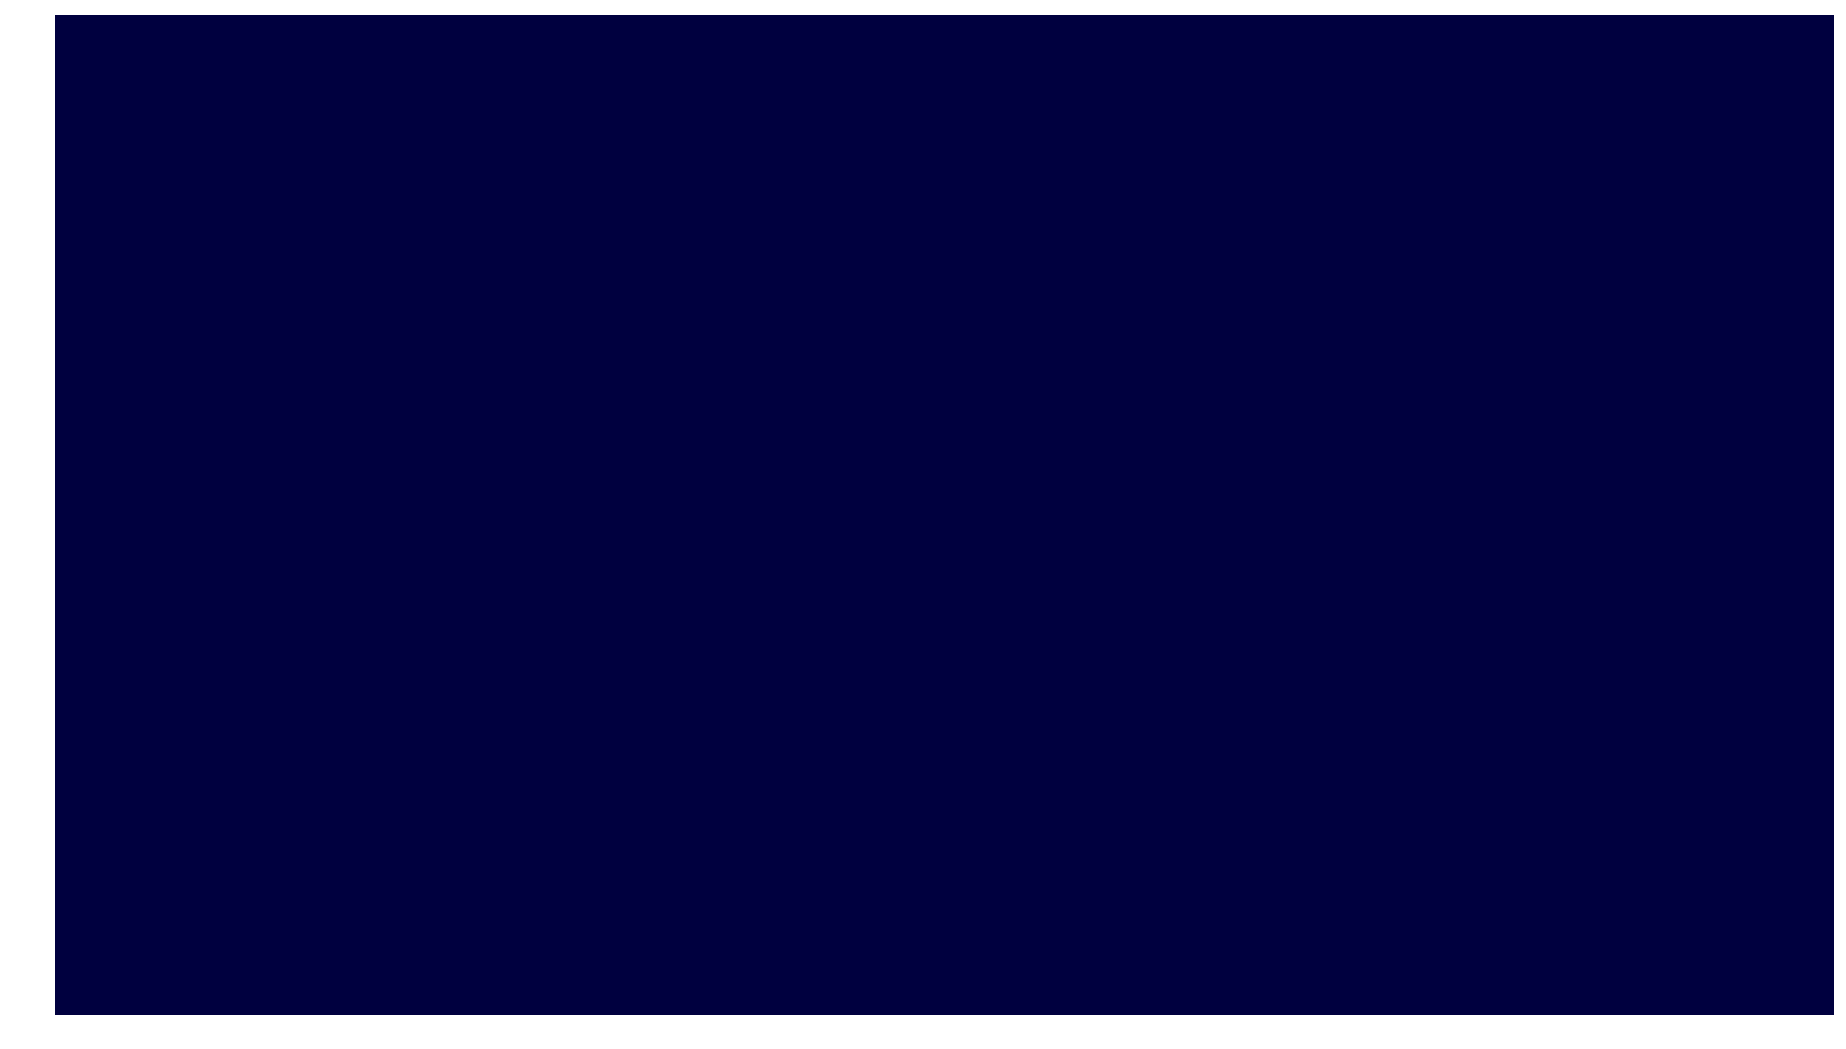

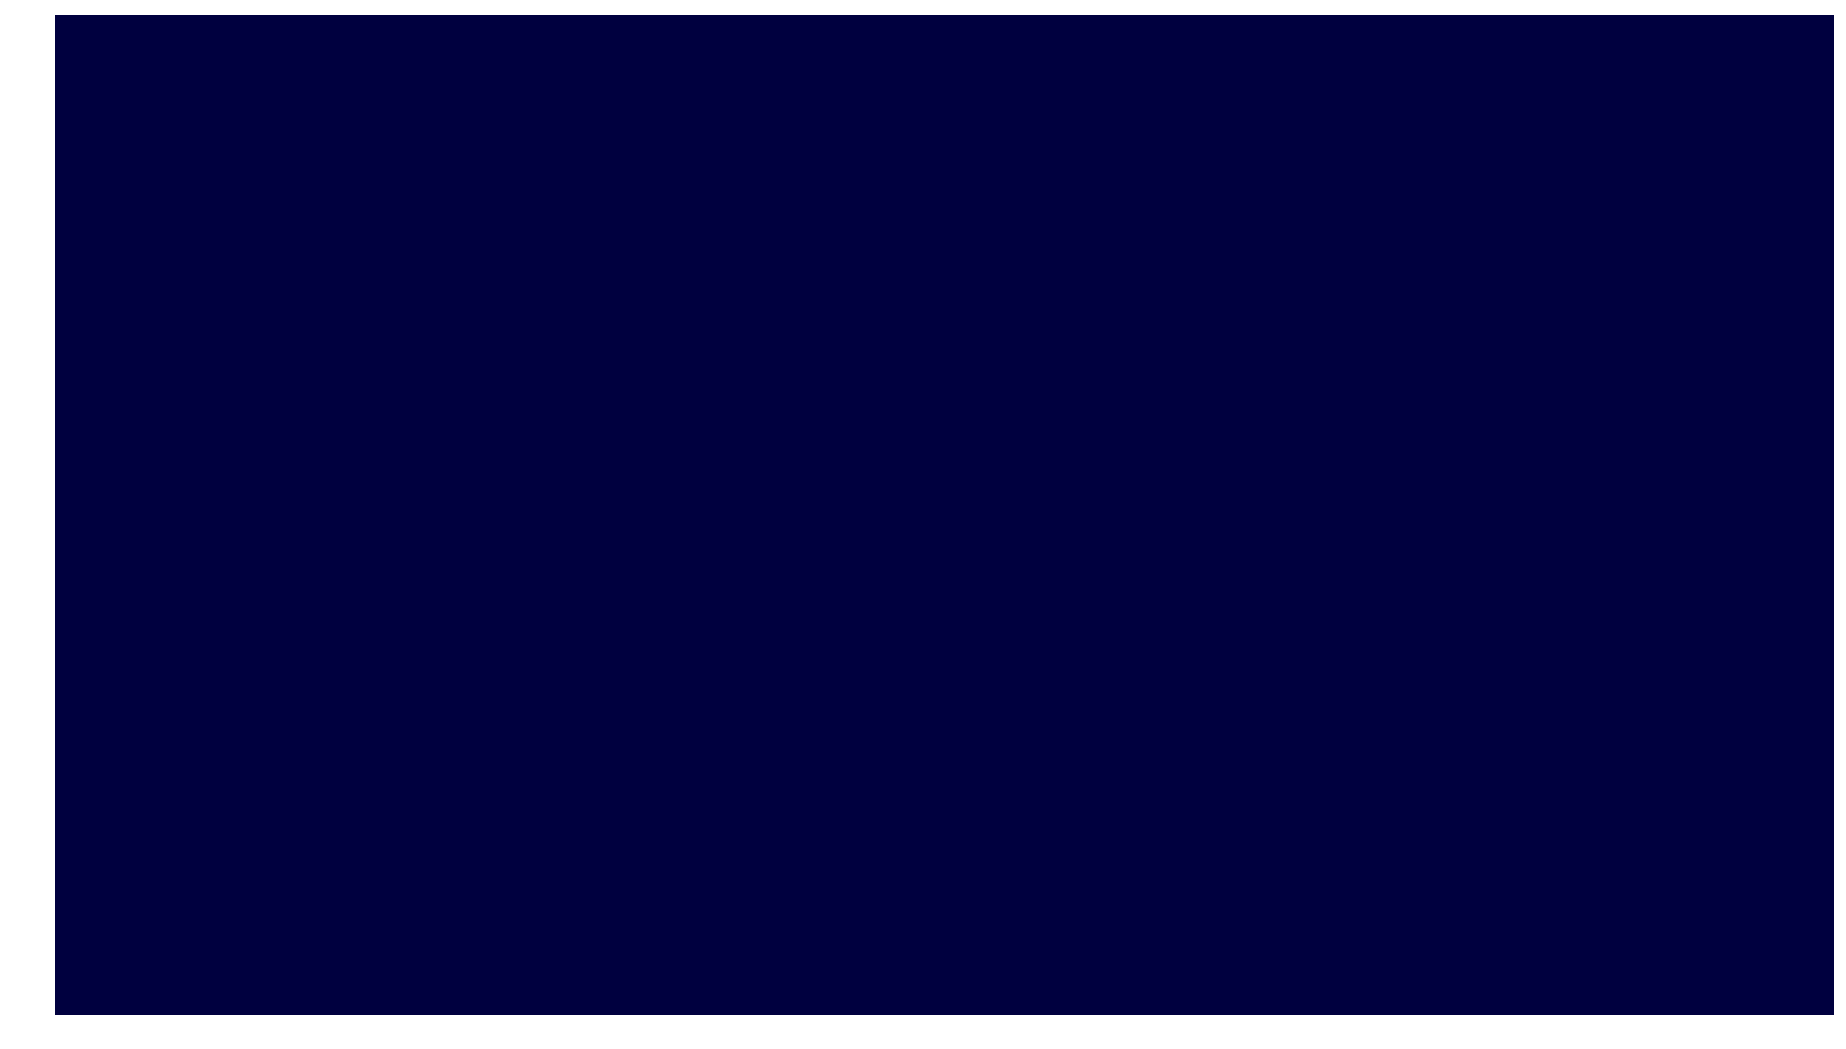

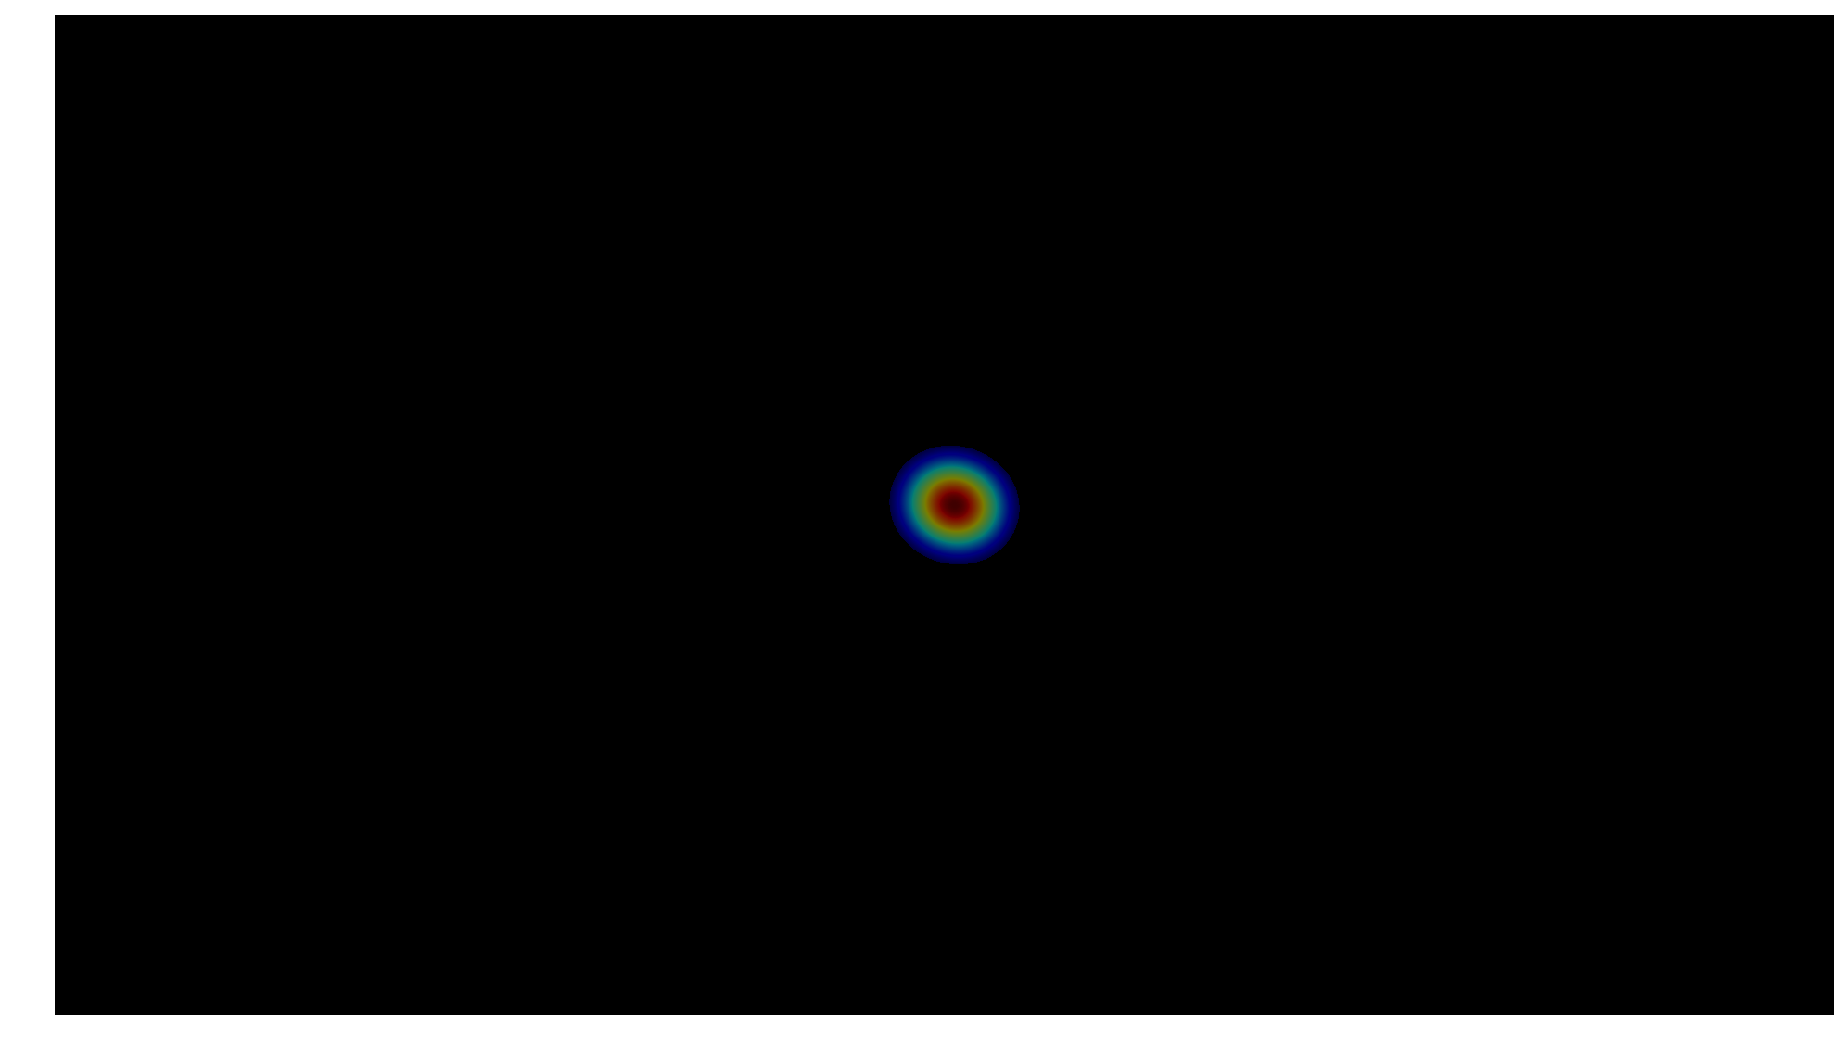

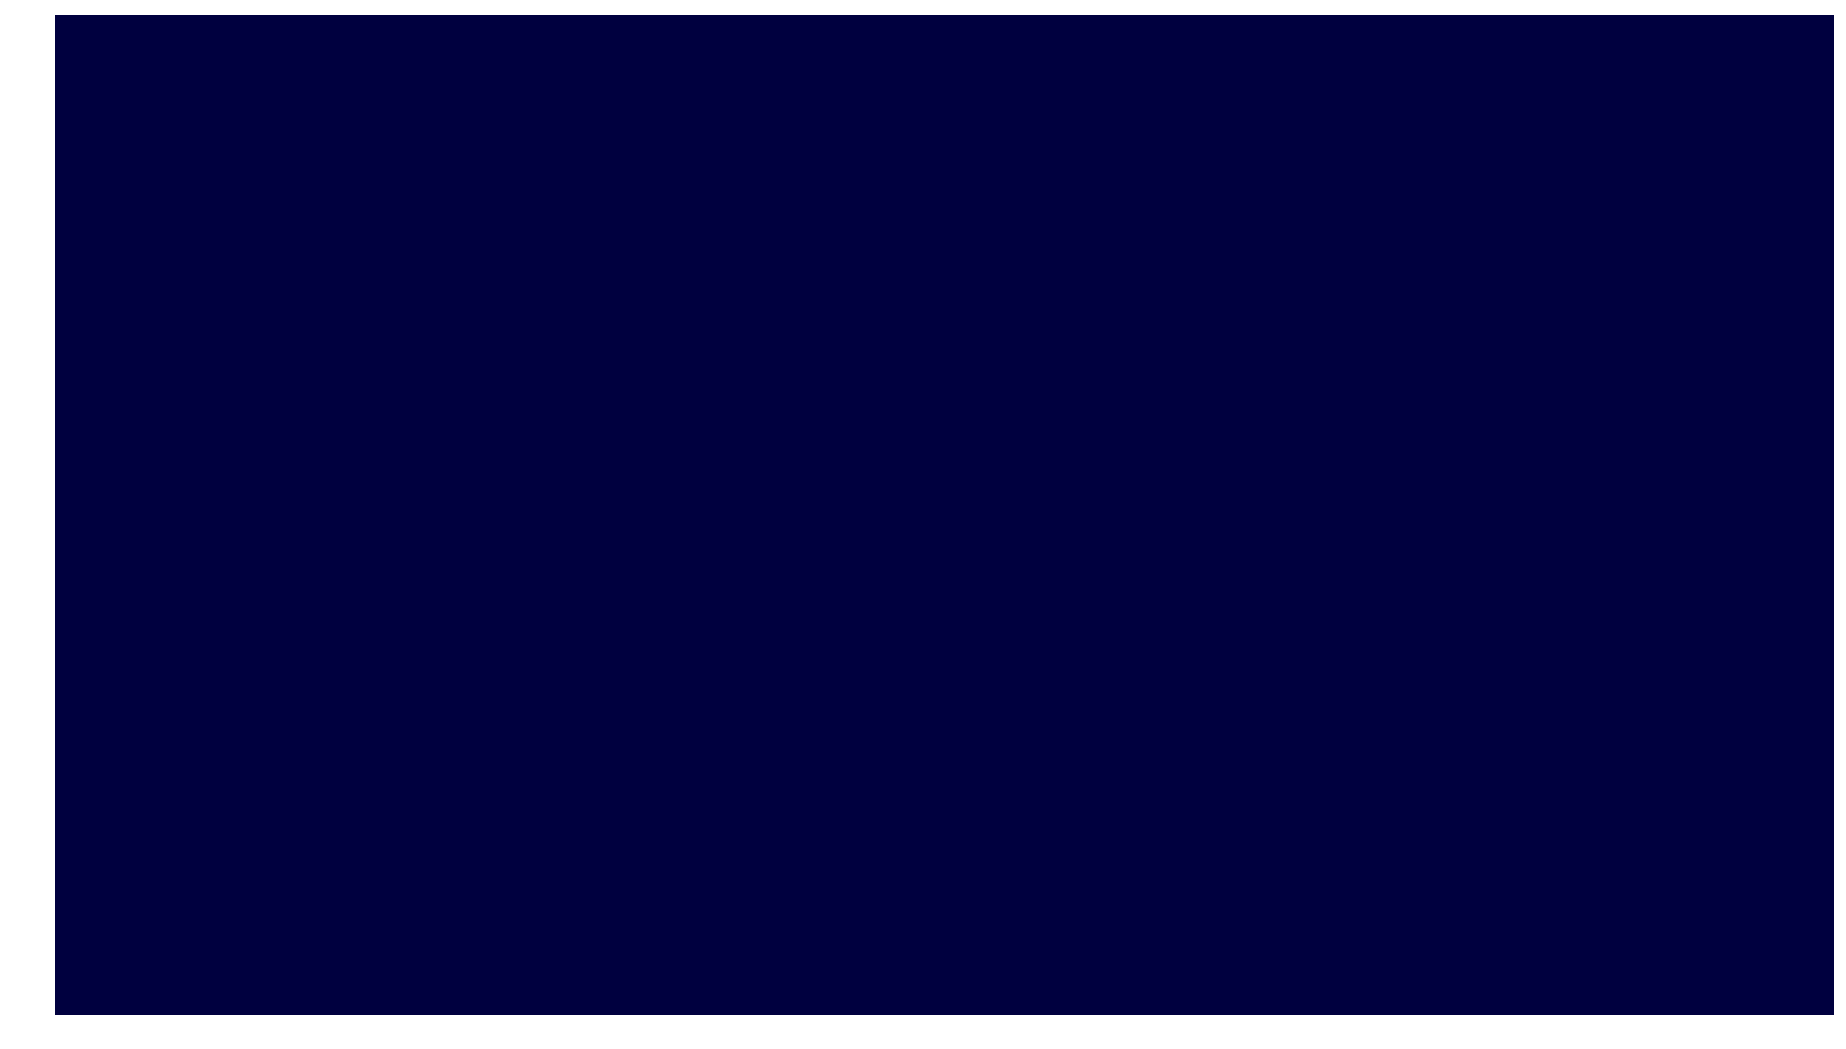

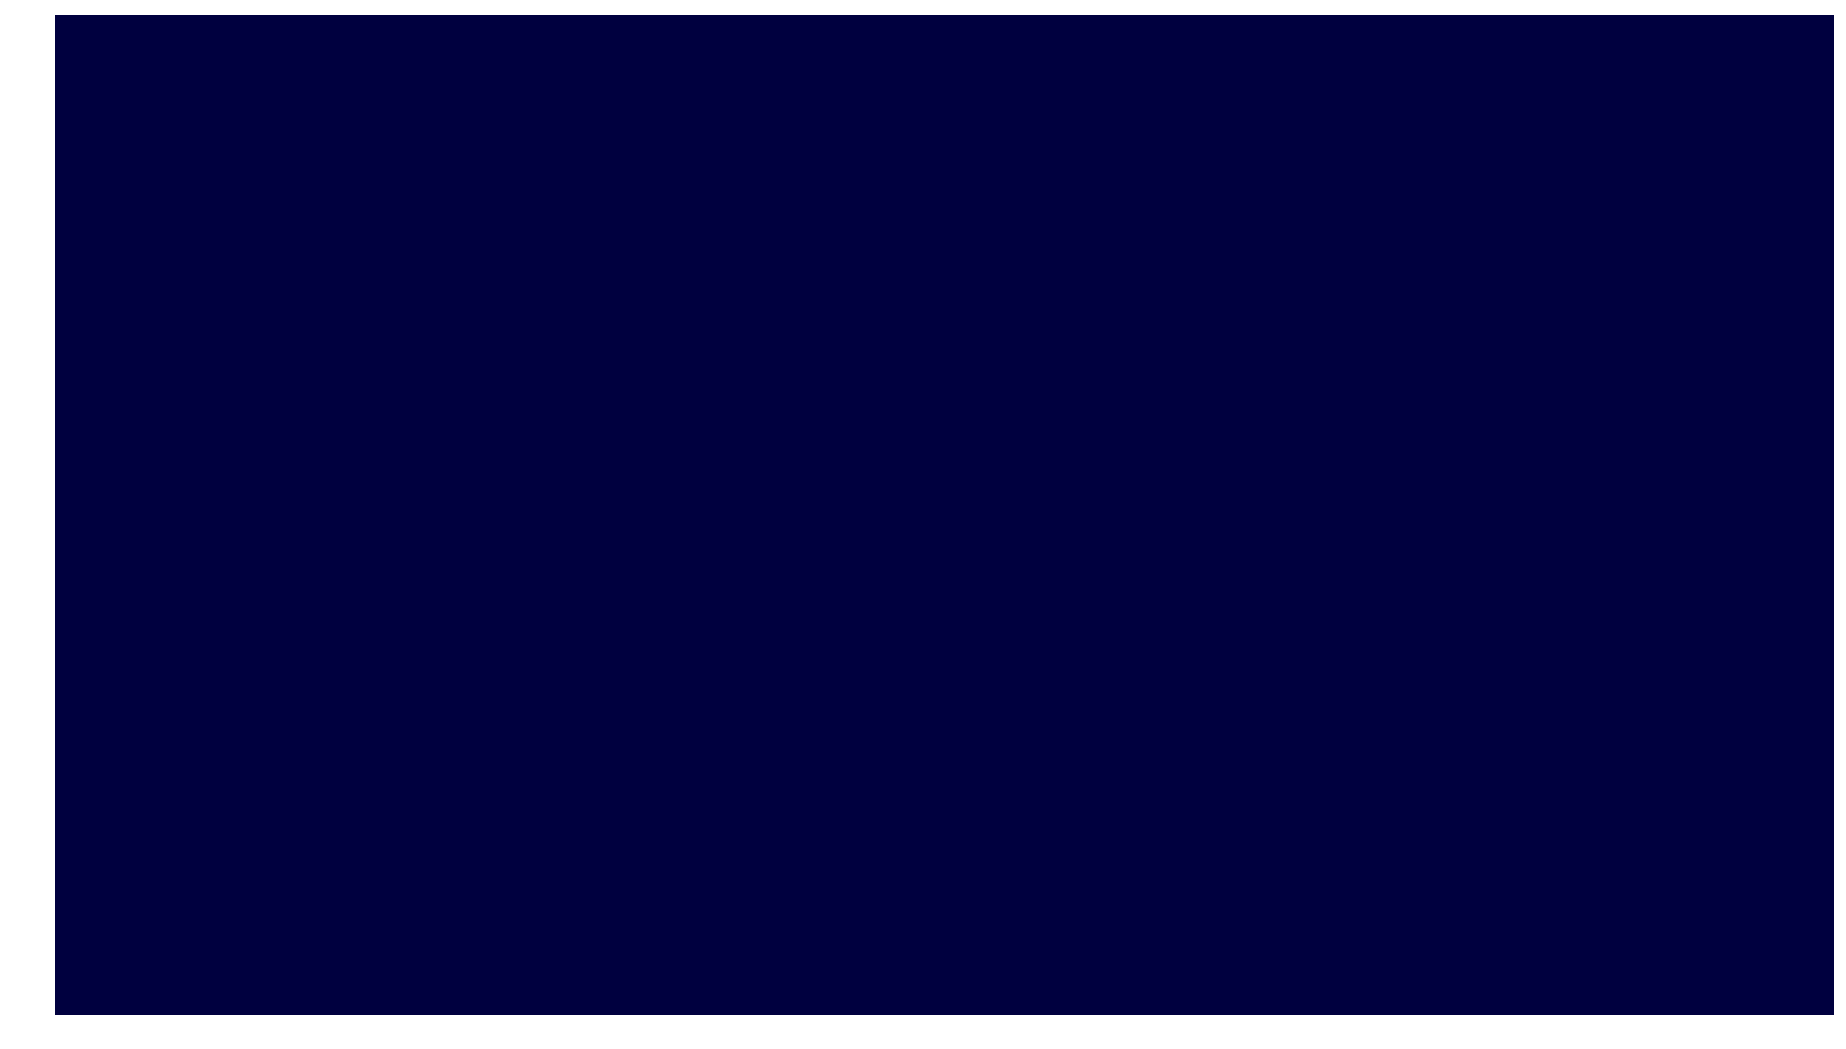

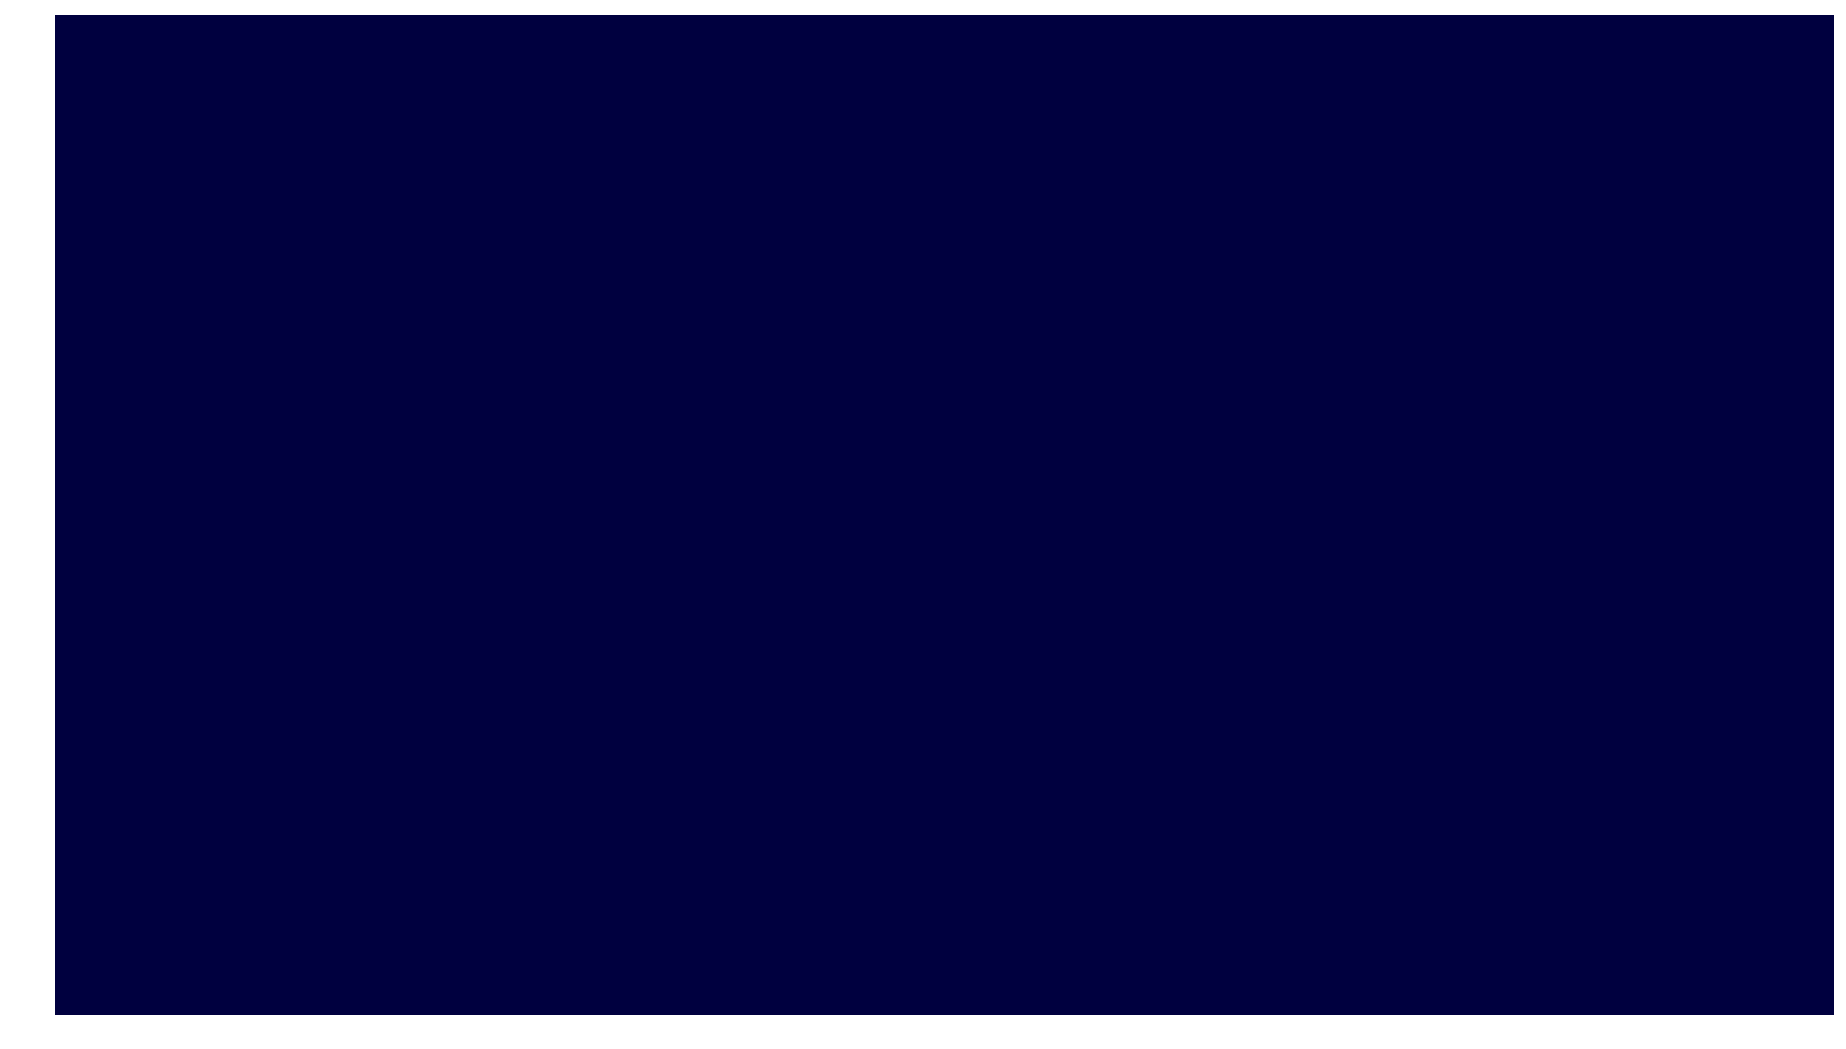

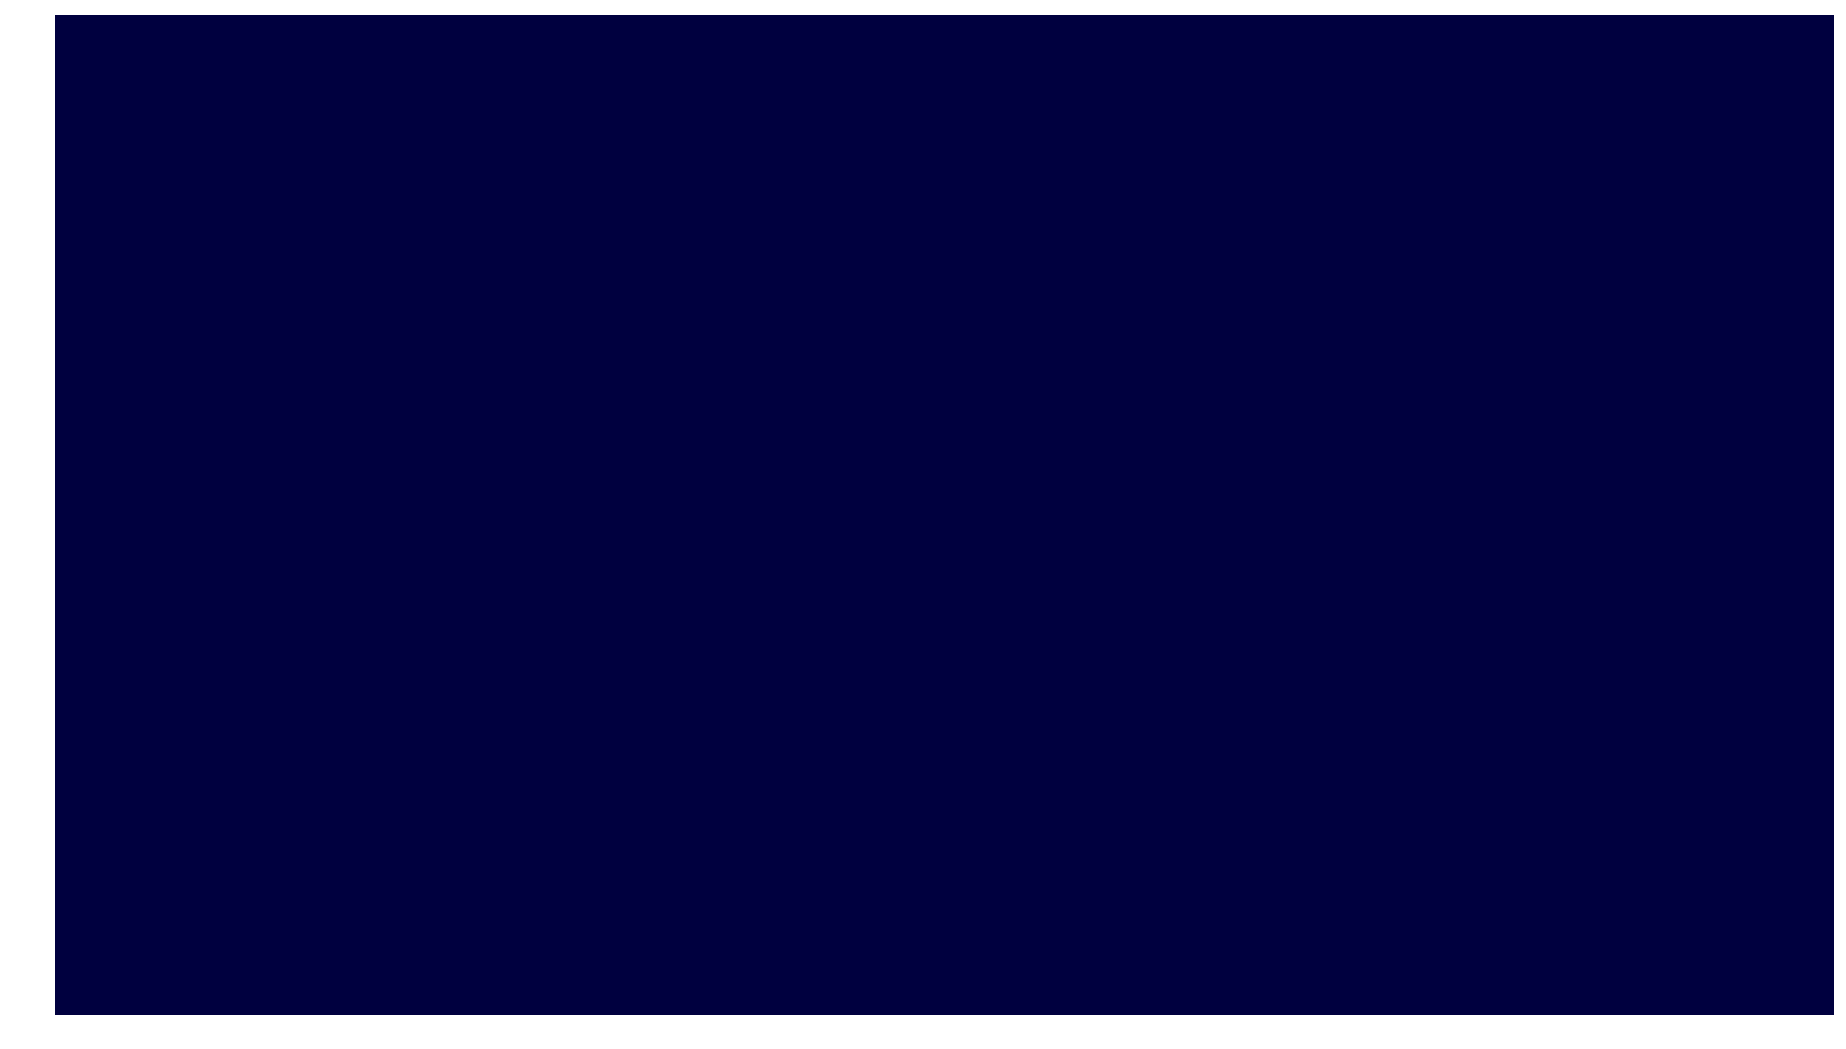

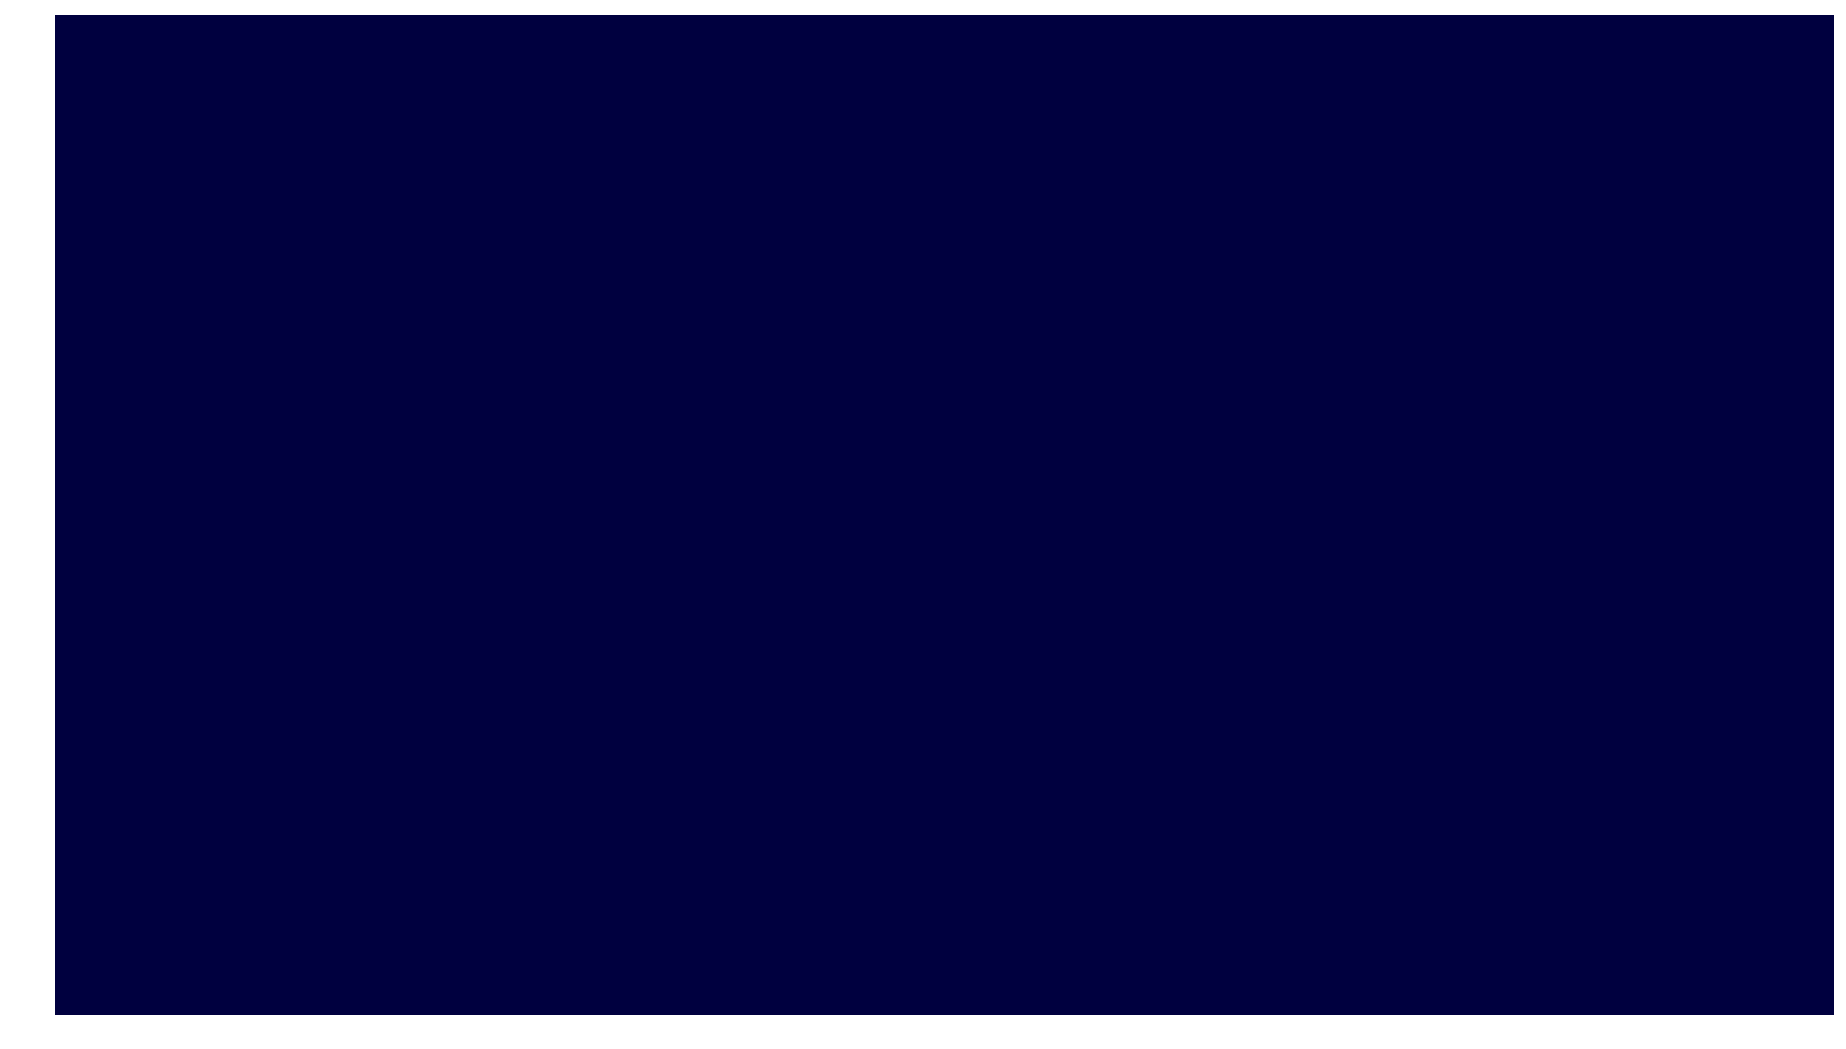

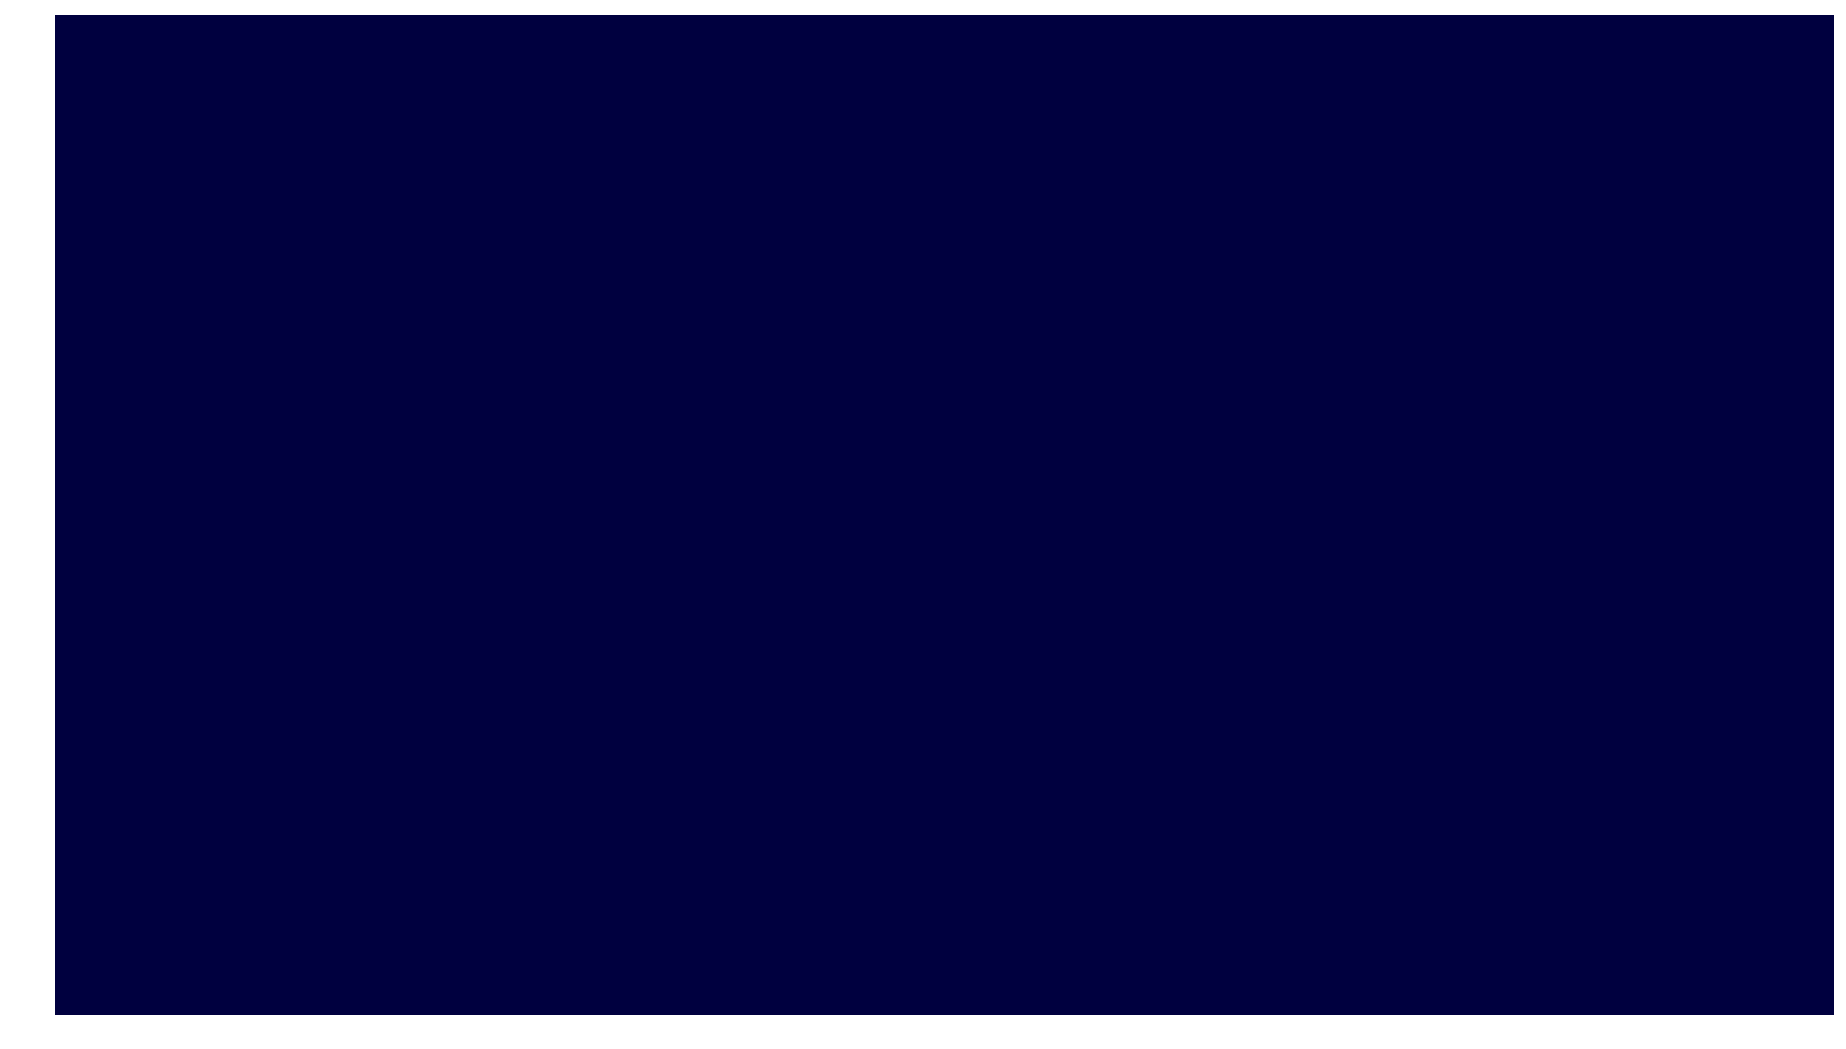

In [8]:
trials    = np.arange(0,16,1)
games     = np.arange(1,17,1)

x_cross_game,y_cross_game, center_x_game,center_y_game = [],[],[],[]
for game_nr in games:
    #initialize
    x_cross_trial,y_cross_trial, center_x_trial,center_y_trial = [],[],[],[]
    trial_success = []
    radius_list   = []
    #read stimulus data
    data = read_data(partic_id,game_nr,phase='stimulus')


    for trial_nr in (trials):
        #get crosshair position
        x_cross,y_cross = return_cross_pos(partic_id,game_nr,trial_nr)
        if x_cross!=0:
            ###get centroid

            #fixations
            fixations = np.array(data[trial_nr]['events']['Efix'])
            fig_heatmap = draw_heatmap(fixations, dispsize)
            #save heatmap
            img_name_heatmap = 'img_1.png'
            fig_heatmap.savefig(img_name_heatmap)

            #feed heatmap to the function
            #image_load = cv2.imread(img_name_heatmap,0)
            center,radius,image_out = return_centroid_heatmap(img_name_heatmap)
            #print(center)
            if center.size!=0:
                #print(center)
                #print(center)
                
                #print(center)

                if center.shape[0]>1:
                    #print(center.shape)
                    #print(center)
                    center = center.mean(axis=0) #CHANGE LATER!!!
                    radius = radius.mean(axis=0)
   
            #print(center)
                
                x_cross_trial.append(x_cross)
                y_cross_trial.append(y_cross)
                center_x_trial.append(center[0][0])
                center_y_trial.append(center[0][1])
                trial_success.append(trial_nr)
                #radius_list.append(radius)
    x_cross_game.append(np.mean(x_cross_trial))
    y_cross_game.append(np.mean(y_cross_trial))
    center_x_game.append(np.mean(center_x_trial))
    center_y_game.append(np.mean(center_y_trial))    

In [7]:
np.mean([np.array([]),[3]])

array([], dtype=float64)

In [13]:
def save_plot_inattention_noise():
    pass

prop_label = 'perc_noise_sample'
perc_noise_game_list = []
for game_nr in games:
    perc_noise_trial_list = []
    for trial_nr in trials:
        perc_noise = return_property_value(data_properties, subject_id, game_nr, trial_nr,\
                                           prop_label)
        perc_noise_trial_list.append(perc_noise)
    perc_noise_game_list.append(np.mean(perc_noise_trial_list))

C:\Users\localadmin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


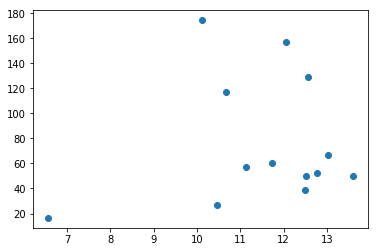

In [14]:
dist = np.sqrt((np.array(center_x_game) - np.array(x_cross_game))**2 +
               (np.array(center_y_game) - np.array(y_cross_game))**2)
plt.plot(perc_noise_game_list,dist,'o')

In [9]:
center_x_game

[964.2741088867188,
 956.7825012207031,
 965.2965698242188,
 960.860107421875,
 959.9370422363281,
 968.346435546875,
 958.295166015625,
 954.8414611816406,
 920.025146484375,
 nan,
 971.2098388671875,
 964.8773193359375,
 973.6829223632812,
 nan,
 959.5,
 nan]